In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets



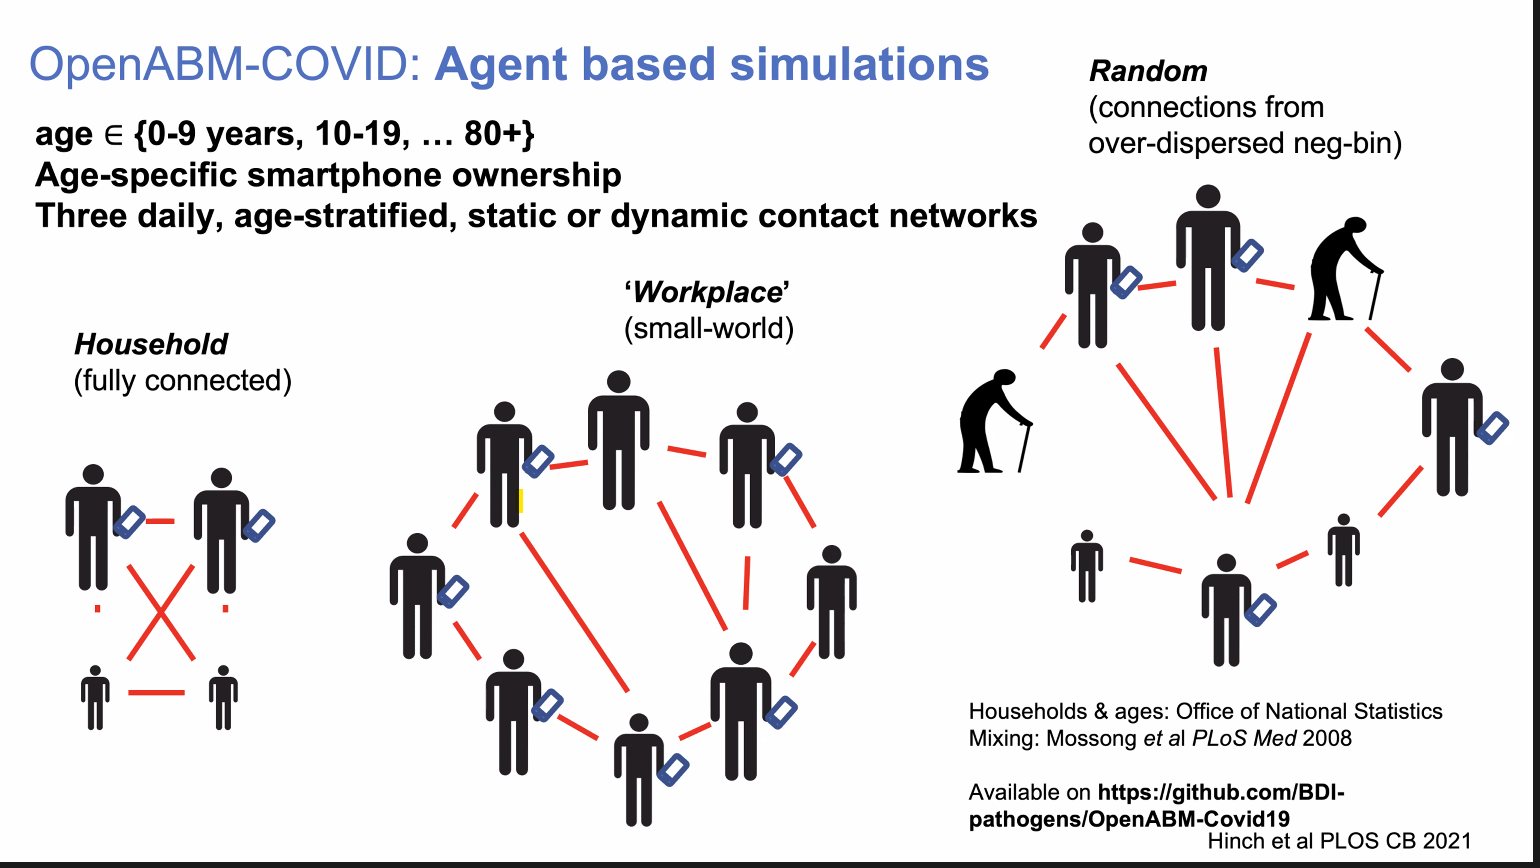

In [4]:
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAAA8oAAACVCAYAAACAXwOLAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsQAAA7EAZUrDhsAAC9TSURBVHhe7d0PeFT1ne/xL4JBCgFK4h+wQOpi/HNJ710D1w1t+VOfJt6t9FqoexuoCvtU2OfR6C500cb2iblt458lPNsN3EfQ5wJWSPdaUq+xrYlrQXol2wfivdthoQaqATTxT5ICASER9f7+nZkzk5nJJMwkk+T90kPOnDNz5syZ8+/z+/3OmVEffnjm03HjxgsAAAAAACPVuXNn5e233zT9lxCSAQAAAAAjnc7GEyd+1vRfYv4FAAAAAGCEy8ycbP4SlAEAAAAAULwW1wRlAAAAAACUUaNGmb8EZQAAAAAAfAjKAAAAAAD4EJQBAAAAAPAhKAMAAAAA4ENQBgAAAADAh6AMAAAAAIAPQRkAAAAAAB+CMgAAAAAAPgRlAAAAAAB8CMoAAAAAAPgQlAEAAAAA8CEoAwAAAADgQ1AGAAAAAMCHoAwAAAAAgA9BGQAAAAAAH4IyAAAAAAA+BGUAAAAAAHwIygAAAAAA+BCUAQAAAADwISgDAAAAAOBDUAYAAAAAwIegHE1brZTMmSNzTFcpATe4K7BNViycI/OKSqWuxQ0EAAAAAAwrSQ/KbbUlLmBG7yq91DnktMmeLRvl4BmR7vZ62Vj/hhsOAAAAABhOqFFOWLZcVzDT9WdIfs401w8AAAAAGE5SG5QnzJTc3NywbqobNRTlLNslu3++VXa8sFseWZjphgIAAAAAhpPUBuXFj8jOnTvDumV5btwQlZmTJ9dNG+seAQAAAABS5tw5Od1xXj5yDwfK4DW9DlS665aXya5m9bitUbaVFMk8PWzhUlm7rVHa7DPDdL5RJ5Vrl8pC89p5UrRsrVTWNUuXG2+oae0sXSFF8+x10QuX6ue8IZ1udLg2adxWYp87r0hK9Pt2u1ERApV2erorqfXmrk1qS9zwin1qPrqkubbC3PTLzN+KCqltDps7K2Iee3QltVE/PwAAAAAMZx+9967Uv9Qkf7/jsNxX0yylv35L/k71/+3/Oio/+78n5aOP3RNTKA2uUW6SxkCtVHx9tWxsaBeTUc8ck1c3rpbV28JvmNWlwvWK5Q9L9avH5IwZ0i3tTa9K9YuBYAjuemOnrFDT2lB/UNpd4D1zTD3n4eWy4pE9PcLnG9vU+2xssM/tbpcG/b717f1rIt7QJPW7Vss3y2vMTb/M/B2skfJl5bLHn9JbaqUkYh4jZWRkuD4AAAAAGAnOyVuvqoD8L3+SF9o/Vo/CXfjoI/k/h1rl73a9JYdOpTYtp8XNvOrLy6VGsqRgSbEU5oYC4rGNu2RfsDL2DakurZZj7pFMmC2FSwpldlaGLLhtoWSbgfo5G+SgC58ZWQWyZEmBqKcYx14slQ3+xNpZJ1s2BqeoJlkohQVZ0rpxo5qffmjdKOWPHjTTKV6SLxPcYOmuly31utpc65LGbY9Kg5vHgu/9XF577efyvQL7WLvtn16TfZVF7jMBAAAAwHB3Tv7tpWNS+fbHcsENGXPppXLTzEmy8sZJ8vUrLpXgXaI+Oi//41fH5N9s7WlKpDYoV6+MaFIc+k3icFOluOoFqSpdKxWby2SBGyrSIE1evnyjQXa1uv6MJfJPddukorRCttXtk8oiu8i6GnfJFi/3zv6e7KyrktLSKnlh/RKxWblb6rfVi/cTyJ2Nr8qrrl8/f9u2CqmoqpOt913ELccKymSnms7a0s2y2TedpsZmV+vdJPte9KqRC2VpYY6MHZujwn4oKTcGPzQAAAAADH8f/nuLPNv+qXskcvXnrpSKv5olf/2laZL/59Ok8Kuz5NHbsuTmS90TPumSp/7lHTntHiZbWtQoS0ahFOa7G2Rl5snCfNsr0hpsmtzW1KgeObctFO/pfk37XrRNt5XcxfmS4/rHziuSpa5fDu6RgGt/3dxYb3sU//Ovy1/o+vquQAVe74ejrsvzTaezM3gddbc3k5IlWa5YJHua9+7qU8dqjw0AAAAAw86f5Ff/3h1qaj1xkjywYIp8Rvd3n5fTp1ySmnSF3PmfPyNT7CORs53yv4+kpgl2aoNyj5+HilFTm5/juyY4w/wfqb09VMuakZkpPXNyp7S3hgJmTlaW69OmSm4wfDfIQZO41fPbzQAjKyPYUFo9PVd8LaH7JGear8F0lM+hhS4/bpd21xK8rSX0+XJz+OkpAAAAACNE82lp9N/W+vRpearhT/JRywl59Lm3pPTFN+UnB87acTlj5XO2T/lUfvfHD1x/cqU2KPf4eahl0t9fh+puD9Ynq1wdLXB36UrboCyvqtaIFr7Dnx8WcFMqV+bd5s3MHtm1p1nNR7O8+mKDGzZVCmeHapcBAAAAYDg7/d5HEb9Q9KkcefNd+bvdZ+Qd9Shz/Gfkq9ePt6POfRL+U1Fnu+Vd15tM6dH0OgEZWaFw3OyvCg7KFN9TpLnFf3/rbvN/uLGS6cvS4c9PpbGSv6pMCkxW7paG8m/KokXflEddTp5ZXCHF19l+AAAAABjuPozze09Xz7xK/vvtM+VG3QC4+5T86+7TctiOss5fkA7Xm0xDJihnZfmu4W1pD17vGzJWsqaFknL7Gf8t0FqlqdH1SoHMNk9TwdrXOru92/f81mYJPj0VshfKfatmuwdWRtZsWVK2Q7atzYvSrBwAAAAAhqdLR49yfZHGyl9+6bNi7t/V8o78ZFeLPPun0A2/jMvGhK5ZTqIhE5Szc/ND1zG/uEcafUm5s63NBGd9Ey6vUXNTbaMEf5BpX53scv2Su1Cuc62sc/ILbY/if35zoKFnBXQSde4pl5UbD4rMXCM7DhyQA6rbV7dNShdfF7rlOQAAAACMAFnZl8o41x/uI3n55Tflf6puU0OnHPnEDfYbnyFXud5kSm1Qrn1Eli1bFtbtjP77UL27rlBWeJWw3TVyf9EKKS1dK8uWLpRF5Q22TXveUlnrPefgo+r9SqWyokS+/t0aF3wzpODuBcG7W2fmLwj9FJV6/orVFVJZukJWbGhyA1OjpTlg5+fYRrnfv3xWq/ndtU9aelaXAwAAAMDwdM14+ULUZDpGvpR/pXxTdYXZ0Wudb7jys64vuVIblM8ck6amprAudEuuvpomt60tlpnukZw5KPX1r0rTMX8T6xxZWuFd/6vydFO9VNc0BH9iasKCMvleke+mXZlFsuq+4BTlTGONVNcflO7CNbIm9GPOSXdd8XpZk28a2Uu7f/k0qvl99H75+rIqCRCWAQAAAIwEo6+Q/3qN9wPJfqNk3JTxMlF1maPdIL/LxsvSP0/NhatDpum1NjZvrex84Z/kvgUzxf6YU4Zk5S6Q+4rzQ02Wpy2Wqhe2yveWzJYsF5gnzFwgxT/eIbWVRcHfOPZct2KbbFWpeKaZ4ASZvaRMdpYtk8KF/f2BqN61NFTLiwF/wI9wbLtUN4Tf9w0AAAAAhquJN18t92RF1hp/Ih3vnZXTHWelozvi2mQZLV8vuDolza61UZ8qrh8DoCtQKd9cWS2tuhl42c+lanEourfsKpGve7e/Lt4qB9b298e0AAAAAGCI+bhT/rXunZ437Ip0yaWy9Es5smj6GDcguY4cCQytGuWhr0saa3VI1m6T4sLw+u1pCwoldfXYAAAAAJDGRmfKX/zltVLxF+PlhmgtsVV8zZk6WcqXzkpZSPZQozyg2qSu5FZ52FQaL5Af766UIt9trjvr1sqih181/QU/fkmq/NdTAwAAAMBIcu6cnD7n3ep6tIybcpn9qagUo0Z5wGVLTr73I1evypbKXdLY3CZtzQHZt+sRWV1uQ7JkFMrSeYRkAAAAACPYuHHmRl62G5iQ7KFGeaB17pFHFn9XXox1L6+MXLl781YpyUvN3dsAAAAAALHpGmWC8mDofEPqtmyR7fUN0mR+u0rfvTtP8guWyN0riuQ6X3NsAAAAAMDAISgDAAAAAODDNcoAAAAAAEQgKAMAAAAA4ENQBgAAAADAh6AMAAAAAIAPQRkAAAAAAB+CMgAAAAAAPgRlAAAAAAB8CMoAAAAAAPgQlAEAAAAA8CEoAwAAAADgQ1AGAAAAAMBn1KeK60+qkydPyunTp+XChQtuCAAAAAAA/TdmzBiZOHGiTJ482Q1JviNHAqkJyjoknzlzRsaNG2c+CAAAAAAAF0tXxJ47d04mTJiQsrCsg3JKml7rmmRCMgAAAAAgmXTG1FlTZ85USklQ1imfkAwAAAAASDadNVN9iS838wIAAAAAwIegDAAAAACAD0EZAAAAAAAfgjIAAAAAAD4DHpQPbbpFbrnFdpv+tU4eUn8fqutQYzqk7iE1/KE61QcAfXBok92nHHKPAWBI0Oc+m6TPuy72eQCQcgMclA/J7hr1Z+46ee6VV+TevyiSx9Tfx4qm2NEA0B833iuv6H3Kje4xAAwBhzbdIU/sdw8AAGllAIOyLjUtEZ2TZf8Tcsctm+RQh79GuaeOuoeCtc+hmuZQzXNdsHY6vDTWX2sdGndINunHm9Tr9Ou9ca5UVndh8+EbHjl9AIMjbJ/g3y7d9mpqV8K2XdsFt+2wcWzX6cfbv2+STcH99EMS+vrs97bJ7eO92rSwfX5YqyS33zfD3TS98d7xZ9Mm89cOd+/vXhN2THDP98b5a/JirpdID3G+u5jjgucndaF1KLTCxXhuL/sZ73VqnTPj1t0nJeakqEZKguu5b53Vz/XNq38927TbDQQApMwABuUpUvRYlSzRvaZG+V6JW/mjDih3PLFfllS9Iq+8ol6nw7X/iLFfHSWK1bjn1slcdZB5xneAKjlha6y9cSX+19UclemPqXFVek7UuGdmmefqh/ufeMIeqPRBTx295q57Tr33c7Jurnpe2MkXgAGntssn1D7Bbpd6XxKxbXtc7bJ9jjZXFs2dwnY9lOw/IbPWed/hfvW9+78nlSwW6XG2BYEOySU1S6TK+859x4pDm3Th7FxZ95wat26WnIhSc7f/xCxZp1/7WJG8a2r33LTUQWH/E3e4oKICtDo+7HetofTxoqbEBaBE10sMEhU873hC1Epg1pnI7+4h37jn1qkzhpJQwYxmTzXsOKl5xo67cZHZt5w4YZ/YoZ6k1oCE9zM1ssi83ytPbDTzI2pqVa88JkVTXIWCW8/C5setZ+qkyLx2kd4OAAAplbY38zpk2mgvkUUmTd8oi+xRyXewmS7TdYvtKeqv+rP/6LtmqDlJNic8t8gt6gDY47xoySIb0K+apQ5r6hR60VwV4fVD/cgKO+ipsfo56g3EvQOAQaTDy0N1V8m9+kQzTlvrjrpn7KnkkrvUCSjb9ZAyd5GYr0ntrYt1QNHfXXDn7x0XNHc5j7df955vAo13qY+b1hT93ZsnhfGOAT2mFRGGDB3CVei56l617kUU9ia6XmKAHdptCkvsdq9PEULfXfg+Qa0iRXep73y/PFHtK+iYPt2sH1PUX/Utiz3VsOck+3fvV+ckHeavt54lsp9ZElqBw3XsFzspu05O0dN07+lNd12xfe2N5qQIAJBKaRqUO3QmVmqkxDUzMs2T/AebubPkKtfr5zVNKhFd6urVKPXNu0d1vFYHyzvse+uabXW6JP7zJQADbEqR3OU2aB1K9LYZ67KNYO2L78SS7XoY6lDfn/ozd1a0o4Hjgk6v3LSkpsSsH7fcYi8VsoWwU6QotPLJHXq8V0vYl/USA67DnkxEZfcJrtA9hljrlgmqOrweCg+3F7WfefeoemVoPfIK+8MKawAAAyZNg/IUfW6jeM3pvK6X5trBkt118txFlOjb2mXXXC/43rpZlB0PYHDY2iDV2faK6oTSXS4R4VC1PcGcu25dcLtlux6GIlsURRPWEikONy2vaWuw844lkU36VWB+wq18ia6XGHjhNcHh7D6hn4VlpsWBCsnPhNdKX9R+xmvp5pqCe13ohqfRPwcAIDXStum1bVZUI7tNCyjvRly9XfflArareQ42vewjr7nTbtPWL3TzMM57gEF0yHcDHRVabCaJUhvUUSfPmA1/idzlOztlux5CVAi1rV8PSbWukfOaT/fgLsup2W2vOfWeb5rbu3Fes+1D1b3cXThiWv71LewYdKPc6wLxdL3yJbpeYnC4JvQ19mTCtTqz1/2G7xO8c4ZQK5T4XPPr/eHr50XtZ9zlAbZJd7R5DX0Oe3kaACCV0jYo6xMOeyMLdZDRTeASrCW+sdjdwEuduOh7dMw1BcYJ1ih4phTJY+psxzZ/cjd3eawoseZ7AFIjbJ9gL8dYUtWzlYm9lk8LXbphTlTZrocOtb+ftdvt+3XLojjfk67NrVrifdfq+bpG2B0rbrzX3QxMN4N9Rq0v+ngQx433upsv6Wm5GzLZSalwrG8O6TXLtiufHZfgeonBEv7d2ZuEuhpevU9Q49QK4sbp+3ol3srEu044dJ270sf9jFcpoNe5TYfcTU9d8/4e86pLYdzn2G3iPwAglUZ9qrj+pHnzzTclKyvLPQIAIBG6Bk6FC1knzyWhECN0R2wdXHWtcHiQBgAAQ1d7e7tcc8017lFyHTkSSOMaZQAALoK/hVGwdpqQDAAAEkCNMgAAAABgSEl1jTJBGQAAAMCg+Xj2HNeXWqMPHnB9GA4IygAAAACGvIEKxH1FgB6auEYZAAAAwJCkw7HXpauhMI8YeNQoAwAAAEiK4RY2qW1OX0Oy6fXx48dl/PjxMmbMGDcEAAAAwHA0UmpiCc3p48KFC3L27FmZMWOGG5JcKWt6PXHiRPnwww/NBwAAAAAw/Iy05soj7fOmK50xddbUmTOVUlKjrJ08eVJOnz5NWAYAAACGkckLilzfyHby1TrXh4GkWy3rkDx58mQ3JPlS1vQaAAAAwPDSMf1a1we/KSeOuD4MFwRlAAAAAHENREBOddgcDp8BA4egDAAAACCmZAfMdAuTqQjQBOahj6AMAAAAoIdkBsihEhxH4mdGdARlAAAAAEHJCIvDJSSyLEaulAbl/3f6Gfn96Z/J6Qsn3BAAAAAA6WrZl8+7vv7Z+dvLXN/wwnJJLxPHTJcvTPyW/KeJd7khyZeyoKxD8hunX5LPZxTJ+FFXuqEAAAAA0tHUm0pcX9+1vl7l+oY3llF6OPvpe9LcXS/XTiyUP594txuaXCkLys+c+Eu5fux/IyQDAAAAaa6/AXAkh7/+LDPCcvLosPyHrn+Wu6b/yg1JLh2UL3H9SXX64xOEZAAAACDN9TfwjfTQ15/PfzE10gins6bOnKmUkqAMAAAAIL31NbgRkMP1Z3kQloeOlDS93ticJ4vG/4N7BAAAAPTfJ2fGm+5CNz/W0l9jMkbJJRM+VN0ZN6Rvoe2t53/m+hDN52//lutLjD9gs35HF22d9dt99u/lvpyAe5RcKbtGmaAMYLh66+SfZF/r7+WDrjY5/8nF3QUTQOIuu+QyuXxstsyb+gX5/OTPuqEYCXSAuOzjK+VzV0+XcePGuaHoq3Pnzsnb75yQ86PfN8Ej0ZDMzxv1TaI/KeUFZdbv2CLX2UipDso0vQaABL35p3b55zd/JSfOvU1IBgaY3ub0tqe3Qb0tYuTQQYIQcfH08tPL8ZMznyEkp1Ciy8z7Dli/Y/Ovs4OBoAwACdr3bmpKLQH0DdviyKKboxIikkMvx0Sb9xKS+68vy471O76+rLPJRlAGgAS1dVOLBaQDtkWg/xK5ljZe0Ovq7JTOYNflhiJSImE58WvEu3zLXHUs9gFBUAaABJ3/mObWQDpgWwQGQ4vUrV0oXyx5VLZt26a6KildtlFo35FiLXWyduEXpeRRvcxVV1Uqyzay1AdC2gblky9vl7v/y3b5bYcb0B+Hf6mm8X3bbb6I39lS01n/cqd7kConZEdC89kpv/2+et73X5eTbgiQLo5ujlyH3Xptut63Z7PdR2wDZppuGjG3w47XZX3k9M0wNz9ef1j3SznqnoqBc88Xfyo/LbLd47PdQKNISr/ijXtSSme6wYr/NT8telzuccP7ZWapPNnLtIrmPik//aJ/zD3yePA1ugufPwx1ve2n9Ph4+y//63tOI7QPiz2NnvtO73X2Nf79oNel/rxkKOuSljda1L/91FYrJXMq0z8ABiplTh/nM5EbTUWvCdUhuVQa5y2V/LxiKSkpUd0qKcxxo9NKm9SWzJHKNPgCE6lVjlvDr0NyaaPMW5ovecV6matuVaGk5WIfhoZ1jfLRvQ3q32vlOzt+JNtXT7cD+0qfYK/R00kXmfLlH6nP86ObZLIbAqSFw7+UHz7v+g1dqLNZWtc8KNt/rdbZDdny9IbYBTw6JD+wIeKAoqcpq+3rf71apm54XHYcduPi0dvt8hr1fP+27/YFZlo/kh/c3iA/7LVgCsmkA+j8sYfl2bo75c4/HJZJV4cC5z1f/Lbc0LVX7tTj3jklN1zvQuzsx2W+uOGq23tmmswPC7F9ocL4n82Q43+w03q2Y5LM/0qpGhqi5/HbU8a7R87My2WSOknc6+bhzrq/kYpjbhyGuN72UzoEb5Z69yiqjg+kVQrkB27fsv3Xd8uXp9hRer/2wxNL5CfetJcnVkCng7F9XWhacru3L1TdjiUiG2rihPcRrrNBNm5vkm73EBfLheSl66V0QY5kuKFWs9RWrpVly5bZbnWF7GlzowZNtiyuOiBr89zDocqF5KXrS2VBTvhSl+ZaqVzrlrnqVlfskUFf7MPQgAdlW1PslYiGHzD8pa6/fNMNVOzw0HMTqW02Bydz0n5EHZi+706uw0t9/Sfc4fPlTVs9X51s6wKpgDpBN6W9rpbae23YvLhaq/Wbf2lrr1ytb9i0/TXB/lquzb93A3sTXqMcfP+XQ7Xn618+YZ9jHvuWcUStmr802j+PO9T8m7/B5ePeM8rr/LzvaYev5Ds4DW+5vRyah8TfH+lPbStrRApvdw+1jiPyO1ki3/lqpn18w9diFvDodeeBV/PkB2siSrr1a4JBd7rcrKbf+nZvtSh2u9UhefkNblAUs+YXqKd+EDO4I/lmZKgA2vWB1OkHxz6QUzJeJpnVo0guHytytvu4fqB2OafkrIqml+sQffBBufO1p+xw5alTLSITZvWoCda1zk/O9SKvrZ0Or7HW6qTiN6GQW/f+cTl76SSZYR+aaXw787js7TjrhjiZk2T8R6fEzV1Mdh5KQ7XPXqBXYf+nvkDes8YagybefsocMzerQLpaCs3IGN5rlUD+VHVq3lPbm0ckb8G1dno3fEFNp0F+18uxTR8PTUiOVyA+5Vq5Of+IHH/PPR7hugJVsmLFLhXZrM7GeuksUDuAfRVSVFKrYl5sgco5MmeO6yKqIJtrS9y4Eqn1pRD/a0rciDb93ODrA1KpxoUeVsocNR/Rgox/WqG3tzWiPYcrprbbDY8owYk2X30VrQa0ZVepPNzQKgc33i/L7t8o7VPd9tJ1TJpaGuXFpnlStnmzbFZdWeExaWy1o/3M8okyb9Hn2dUI14Y+qzdOP9//ej3dnp/VV6PsWgfUhn2X9vsxj/0L19TQu+Gq848KzX+JVFb6v+s435WTSK1yTy2yq/RhaWg9KBvvXyb3b2yX0GJvkpbGF6VpXplZ5ps3l0nhsUaJstj7tn5FXVZmRGh5Onq60T6rGhNatr7WDv758C/zWMPTxcAGZXXQeXqDOmiYklt94PHV6LjaKDtuiczwrVTmhFZ9Sa0mvHZK4FU1Lj9P8rxS1igmf/Vu+YE5abe1SMtvsKXG9fm2ZPcn6oS8fk0o4D69IduVBuv5UuHalChPl+U7logukDLzlWCtdODEVPmOnpY+yKnPpWvJCnXNlp52Y408YD6zmp8NOoS7Uuj5Er/EOi59oJ+vpv+gfCdfvf+GzXJ8uS1xzgsuY/t+poZNvZ9eNgGvNNp9L15p9c3qNX5HNz8uTze6+dxQYAoNYodY9dr5+j3svNSvCS8MqX/zcvlu8P332nG9vD/S31G1o25dM199dz765FFtMoFgIUvswq1Zq9U6o7aXaCeaISfkd2ofMfVz7kgRla390bVD8UKyplucBE9gMSDCQq6ppT0rp0y5R500dp6V8Zn5NkzqYKpi9AdRam2Lxk0SiRJan3rtWTme+Q1bQz37KzKj81l58KAdF0vRFTPCAvBTr90pd/6mose0zXteeoN82wXgUCDvafyUGXLK1FjvlZYJ821YV2H/2c4Z8g3zunvkKyqMP+sL/xhE8fZTU24yx6ve9iUn31ZnkvrY7gp7Q4XAndKqDr+hfdZkmaGOi/EK+3RIfkCfj8QLyZoO+Oq4fHMv8zYS6JC8ulJk7ealrjlqlwT2dUphQbZkziuVrbftkZWxwrIKRiuby+SlAwfkwIGXpKx5iy8QV6vzsjI1/IBsLW6Q8nIbdHVgWlldLFv1a14qEym/1QSG7IJCKWhuNs+RtmZpLlDnrs12Ym1qeEFhQY9jnJmWbDXvoafVvNIGi0DlrVKu3tvM19ZiqV7pBRYVQm4tFyl7ybymUM2jx0zL+yy++UqG9uZMKXuhTnbu3Kk69XeZWtJdAalavUWyKtbL0owMycrMlEzVZan+HtRyvrW+0C3nrZJTXm4+T6xl6akub5JVwXH2NXmFxdJQ32CXs/q3QZ086+86vojv8tYtkvuSnW5BtfvOdUhc2awWrZ7HA/JSWYFUb3GFG2qcens3bpWaXOg81XxXOe47DPuuLla7NGeWyQt1epmrTv21i12t71uypGL9UsnIyDLLPDMzS/W7l/n0ff3SqqW8aZVbBnqx62WQbdbf6nrvywlIvfreCnvU2OtAvVLUF+pe3ywr9RcaazuLu/2lh0Fpeq2D1vqXJ8tyHbxc+LTNpAvkdlOqm2lOYINMKaw+KKiDizk4qA2lrye4Ea+brIO2mqYpjTUHw69JtqnV7KWJVQL88+Z9LnswszViphbLmx8VLmbpUeYz9pcuWbbLbapZnO79plwuU/VDwzbZXn6lrdH1N5E92RgwG07hfPtd2IIJjw0ncvsXwuYz9oHe+6zq/Zbr6YSXnuddY5dM9jX6+7WFH/HfH2mv43V5/oSvRsbv+RpbaKO29Z+sEVcA1Xe2xYEt6PpazBND3Xok3vZrW5fYk2HbrDHqPCN1dO3wOyLzdeC8fpI0+pow1+3/GxMmTRi94pQ8W/eg9IiSM0vlG1NEDv+xwtZKh6mTij8elxl/9qQ8ebXKLft7PiPEXnOsm1i3vB9tWuFMTfgZ1/z7D2qHNuXbUWqrnTON7jM9Jb/pOCvTJtma47r9vzBB/smvzBdJ4D0xgC5yP6VrjYPNok2TaK8w+aQcV8f5hD2/ueflJ35qvLf/utu0mvmaPS6PYKGQXCJ5Y91AaZKGpoWS57LTtKLK+GE5SDfXrZLFwcxVEAxgOpx5WpsapKDsblOJItmLZZUaZQJEdo7kqNTWoE/0W5skZ5UKVCbQxQpzeniDFHtpQ02r6sBaNd02UblailcttsE6724pK2hQk1IT1gFcimWVm8m8u1XQM312WsEw7uar2QX1pFMhedvKR6VzVZksnaaLJuIL1Ff7CgryZO0Bu5xjLksnfJxbBnmFUtzQZGtP29QwdVbaa072fZdTc9USK15lv2f9nZmhiln+oe8/Oyd0FXCb/l6916g5uluFaEsHRjU57zt031VTtKrdJOgKbJOVj3bKqrKlMq3Xpd6P9csokLK77WuyF69Sy9qu02EFQYF6qS4utN+Nn/4+GkIBOntxlRzo0f49cjvzxBo+uAY2KKtAerup5bVhObzkNR4bMHVN8lETqrxg2Ae61Fj98d5XH2T0YxP4XLNg3fTzJ64mNDlsabIOiz90BzcTUBtb7Yo2oFyz8+UBuXmHrVEPd63MuNL1+plrr5TgAdoGkcCb/WuwGrs2MMb7I83plgpqnVoTo/bDF2xN4ZTefmPUKsejW4iYk9gFAXkgzo3sTMuPsBNVv/BrlLcvb5UHuKHXgDI35Zp01F3ne1RmqbBqA6dtKv0N+YUd90eRb0TeMEvfhOv6G+TUO3GuDz5WIY1dKtR2/KZnyA7zlDxo5mGvyNXRmmiHMzXNXg2wfo8z6uTbBeBIwebjPagg/75ubH5YftNLTTcG2EXup0yLGK/FmTvPqd+rD/62BjlxtuWWuX9CtP2c/xplda4yY0ei51DDVZc0BxqlO2+e5ARDsvJGowQWzg672dG0vIWS294oTZEnX3lr5aXCernVNf0Mb8KrQlSPk3YbMvxM8DLypFCFOR2SAvXNkjt1quSq0N6q/mtqiDYtPdz1hokcni3BzKYCeNSXOA3ltwabsa5UAa4hVYmtqV52Zc2WzMZdsm1bo+QszZPYZ+U9l5kVb1laOT0XmqKXc7XoPK0DrErALoDHE2359xTWDFgvQEcH+niqV3qvu1XK1VNTVUDRVL9LsmZnSuOubbKtMUeW5sXLQv1Yv4wYyyq7QApVAtChWRd8BAO4X6z1M9Z2Fnf7Sw8DXqNsDih6J7/BbgzB5r+G17y6J1PLqA5ezyfQ7DqqK6eakg/btNs70PxIvvvVzGCtb69NnfosVMMbusmH7kKlwP0NnH12+Pcm4BZu8N0YJEyMa528WumwA7TqEmyGnjiutRqSTMuIUE2tKQjShSq6ub/e5pJcKDT5c2rvHXOargBNtxBR+5fIZv89mNYRsfc5SLZ7ZNYEkZZTXoR9So56gXNmvsy49Kwcf9/Vsx5rlOMfjZcZV7gmzvoa3+vtTbjiNqc2N/46HGqC3avjcuojkUnjYjeljiVWIB6f4V3x7Gqig+6Rx69Wu+JgE2ykhRTspzTbesqeA4RaYNka5pgFxq7l1qzVD8p3pEaejhuCbcu7ATuHSEtj5bplm6UsS9cqB4L1a80H90he/nXukdKim9TukdvWPyILowQAU+vlmn4W1vfWXDkyVISHKF3z3NwcUJ0OG/q5zdJcG6P2TZ1dReRCJ3K4L1BOzVVnlLEVuyavwS6Fd7PKKVzl7nxdIssW5qhvI5aey8yKvyy1UOAMD9V6OVfX1ybY7DpBuhmw1wxcd1tDrQgiA3y4gmBzba+rSlm1aI4UrnJ3vi5ZJgvDSogi9WP9MtQ6G1zsugWDRze/1o0kamM0u1birJ+xtrO+bX8Db2CDsv9GWDd8zV1DnC1TVXCzzW1d82px1yH7uebXgf40u9bMjS/UdqCmqw8rtimnvRbJ3wxYDu+Vp+M1lXKB2x74osxnBPu5vObHrlZXhwg3P/L87+3JvAuyKRM23yfkl77mXbYZulcC3im/3eHfUbnm4sH59H2HHbYZd3iJdoM8bx570+n9Gqr474+05q7h8wpQzDatC1V0QYpZx0NN748+VyOBPhZyme3Uu4+BYgq1vMsA4jH7lxi1Mh6zzdn9DwaCLxgbNjibwBkZjE1wFjl1TgVnXZN89SQ5/Ife7jRtg+je1ypcE+zwu1lbusm1r6Y6MqBHFXFjMDU/+RPivCZ4o7HwgoF7vjhf5J0HpcI1wU4syCPlLno/pY5Z3/fdfFJfivK8K7RT9PmFd95h9zmJXFecKV9eE6tljMeef3iXM41cKiyv0GFZhRwTlpulsTZXFua60V5I3lopRdPcMB99DWf4DYQKJDd0zVpUOjQ1lG83rRL1tatb/E1vVVCQ+i3qe841lQx5hTlSX98cvfbNBcVgU2NzIyV9ragb7l0fG9gu5Q2u6bCu1Suoli2u5i2wvdzV4LlrSL3XqLnTN1RKWg1dRsDcUCp4Z+tHat2IxJhlFryuOHSjs7jLUgm+xjTpDTWfNs2vq8ulPKFm1/3RJrV6ZhzT7Ni7llnN7XZdbWzYVgTl2/3fYaybXPVdRmCj3O8tc9X1bbH3Y/0yQs2wTZNz/dndKL0c9MXa0Qt+FNOU3db2a2b7KqmVphjbWX+2v4E2sEFZnbzam2iFap8KvWts3DjbNLpGjvf4nTcX2Lxaoz7T1+i6m2mp97Y32LK1q5O/+hUTwk2t2Jo2ydMB1ith9gK2ni990u2aVcWezwhhn9ndTMzUxrr5USukaZa9Vy0L+4rUCJvvzdKar+c7dI32d9Q82ubVj6vPFF4eZEq31YmEmc81DaZWPvbNTdRJgNSY6TzdqJu6JnANVS/vj6HKruMS3N59rTZMIUvvzZ7NTfkkdF2euRNsgq0ZZq1223swLIdfo6y39YTWTySNvuHW4bHz3W8Rz5dpZ/bK35hrifXdqPfKqSnftuOuVzuYDnszLnPDLfXfDdfr13hd5O8f6zBrg6iJpccq5Bf6euced5Z+Sh78gwrR3rR6a8pt2HnTTbQTec3ZMyL5Zh7nyyTvM+ifxZK9rjbcXUvt/fwVBlmc/VQc+k79tpA4/PX22uFQyy2zD5vubvTVl32OOy7qc4dgWPZfo6yPsdNXm1ZxsGF5/dKpMrYtIHtyF8psr6ItM0/W7ogekrXsxWVS1rwy2Gy2vrCs12skdQ3Y1uJqWalf426sFay4Nc1TVYjymgPr4NyQE732Tclbq29g5N5fTStnq71G0wxXMdA0SV1ZLcVuuHoDWVxmb3qlX7Mlt0y8ek8zXznuNXNWqjCzNWk1m3kldfJzd1dr063t2xlr5Lw1u2UWd1kqxTlN9jW+ZWPpgKrOOBNqdp0gc62um5c5al5WlUmBdy109mKxi12Pq5fc4DXKPb/DyM/Qf3lSUvfz0DJXXR8Xez/WL61Ycprs+nVreY5srXLXMmumoCa8MCOc2t7MTcP0cgq9PjfGdtaf7W+gjfpUcf1Js7E5TxaN/wf3CGlPhxZ1cBcVgPVB1951U9QBPVYz7ej0iYM5yfA1LU9Ikt4fSLXHXt/h+oCe9DXY+d3PuvCPVHvopuWuD8Pd+eOXS35+Ahd8t9TKtuaFsmIeBQixdPRSwZPQTxkFKmV1022yvrBnCURL/XflxVwV6i4qLOq7J98qTati/RayrpXWd672B7yBYuetvvClPhVEJGO5BypXS9Nt66XnYm+R+u++KLmb9c26LoKudb5V32k8xnR6G59CjY2NctmMD9yjkN1n/17uy0lSFX6EI0cCQzwo62bAa2I00/Wafw5Fg/C5bMh1DxRda9zXkup+B2UlGe8PpBpBGfEQlAcWQXnkSDgoo1e9BTat19DWtkcqHt4iB/1X3nkyZ8uqH5dGvR48cXGCsglrtuY2ddcCRwhUht3cS4q39un676Qsc6VtT4U8vOWgRF/sq+THpQsvroY9XhB2y0BfB5+cGvO+ISgDQJr7x3/bJec/Pu8eARgsl42+TP72Py51jzDcEZSTJ1mhDYljmV+8wQrKg/I7ygAwFF1x2YC38QIQBdsi0D+JBLJEgh0Sk8iyfOv5n7k+pBuCMgAkaN5VX3B9AAYT2+LIMiZjlJw7d849wsVgOaYf1u/49LLRy2gw0PQaAPqg6f33ZU/TAXmv8305d4EDGzBQxo0ZJ1dmXiELc+dI7hVXuKEYCT45kynjPr5Srr76ahk3bpwbir7SgeOdd96RrtEfyNT5d7mhsdEc+OIkUpvc+noV63cc3jp7fvT7MmrCaTc0hGuUAQAAMKJ9emaifHzmMrnQnfTT1hFD18qNnnDeBI6pN5W4ofHRLLh/Pn/7t1xffDooa6zf0fnX2WgIygAAAACSKtGw7IU5JIblOnC4mRcAAACApEo0qOngl2j4G8lYTsNPSoLyxNHT5eyn77lHAAAAAIYyQmBsfV021CZfPJ01deZMpZQE5byJfyVvdb9EWAYAAADSVF8DG7Wm4fqzPAjJF09nzLe66+Q/TEzt7+mn5Bpl7fVTW+Vg53Ny+sIJNwQAAABAuln25fOuL3E7f3uZ6xuZWGaDZ+KY6TI785ty06S/dkOSL2U38wIAAAAwdCTyc0bRjLSfkWI5jQwEZQAAAABGf0OgZ7iGQZbLyENQBgAAABB0saFQGy7BkGUxchGUAQAAAPSQjJDoGUphMVmfm4A8tBGUAQAAAESVzLDsSbcAORI+I/qOoAwAAAAgrlSESb+BCJap/gwaAXn4ICgDAAAA6NVABM1EeYE0HecJwwNBGQAAAECfpFNAHWwE5OGJoAwAAACgX0ZqYCYcD38EZQAAAAAXZaQEZgLyyEFQBgAAAJA0wy00E45HJoIyAAAAgJQYqqGZcAyCMgAAAIABka7BmWCMSARlAAAAAINqoAI0gRiJIigDAAAAAOCjg/Ilrh8AAAAAACgEZQAAAAAAfAjKAAAAAAD4EJQBAAAAAPAhKAMAAAAAoHz88QXzl6AMAAAAAIDS1XXe/CUoAwAAAACgnDzZbv5e8uGHZ0wPAAAAAAAj1dmzp00nIvL/ATr9BRu5TEnOAAAAAElFTkSuQmCC"
basedata="iVBORw0KGgoAAAANSUhEUgAABgQAAANkCAYAAAB4WEH6AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAHYcAAB2HAY/l8WUAAP+lSURBVHhe7J0FgFzV2YbfmVm3rGc3bht3J0QIwb24t1BKKaVooVhxK06FFlrcpQWKFUggRIm7u6y7786O/N977r07d2ZnN7sx4Oc8ydm5cvQ7Lvcch9/n90Oj0Wg0Go1Go9FoNBqNRqPRaDQazY+ert26mlctcZq/Go1Go9FoNBqNRqPRaDQajUaj0Wj+H6MnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQajUaj0Wg0Go1Go9FoNBqNRqP5CaAnBDQ/WfyO8Eqj0Zg4/KK8NsV7URqNRqPRaDQajUaj0Wg0mh8lekJA85PFAQ5sGoObgXFOv54c0GgIM4TfZ2QRlSFcgE9nCo1Go9FoNBqNRqPRaDSaHzN6QkDz08XvgINKXZvjnsadRqMh1syYUryn4h/zWqPRaDQajUaj0Wg0Go1G86PixzEhwDHa0HHa0HuNpqOYY5zEWvhsjXVqDpAfQv6kHyyl2T8crCJMITJv2GWp5arRaDQajUaj0Wg0Go1G86PD4ff98IZA/eIly1NOpzHq1ODxoabWA3ejFx6vD/U1TYiOjUB0lAvR0S7EynVslDm/4TN+FHrQ6odDa3HRwRSoUqza38dc3X8Q4pi2ecVi2mgmOYN2+M3RhvtMy83+7CA0SruVDW1ZEOJHI/fsn5sdxnSkUfJnXZ0HjW7Jn01+uOWXedIlwoyJi0CCKJU76TXLvwfTg6ZdNQ1e1Ek50dTklbLCA6/Hr9x3Op3inyjEx7sgRYZCRU0YLG8x7hx2wYfzr9jRijWKDgexNQOhjoTRp9KLdW3+ZSrgdZvppwMYaVL+WF8MWBwk+w82zXGs/GfcGFuDyYN2TIezeqQMf6DB0xxq2op4e/rX/PhpI65ZjrBe/VGVBTrtHjz2kTbIjyFdKL9KBRhIxdwis/U0Tf02nfJX14UajUaj0Wg0Pza6dutqXrXkBzkhQLhi2ysN0HUbyjBvXgG2lNaisLwB1fUeuL0+ONk8Fa/HOFxIiItEalI0stJjcfS0rpg0IEVC5gy0ZDXfM+xVOLBi0078+38bggbc42Ii8YfLpsMRYY7StgOfWOeVTg3HJCMkDazfUIBPvlwHj0S42+k1dbUN/RDt8iAuAkjPSEH/ft2R07cLEmJdcNn8p3JHGzmkrKIOf37lW8DlRISjCU5fFDziMa/865OejJ9fPFH85UekPOtIcqS7TP/0qE9+123cjf/M3IQor3HP8JNOCTG44RdT4PRLendSJn645blT/kW24e/9hVZS7k5OuoknF2wox4KF+cgtqENJVQPKG5vg9vhUeCNEc0SkE/EpUegVF4P+OSk4fUY3JHaKUnYdLHySIBYuKcLcxYXYWVmH8vJGNEg54aMfxa9+n8RNhEPcBVKSHejXPRqnTB6Ibj2SDQtCiBJ/U/4edpzNkXRPTQPu/ddsxCNCnksMiEqKj8J1vzhKiprWR5bbn6p5YC+wp7gGz702F05XjPkcmDGpK6aO7d+cfpokDfzzjS+RXxkpz4xIzumdhLNPHotYlS5czXmE/ueTV96ciZ1lUl56HGiSPGKYagu/hFVyVKQPqZInMtKS0aVLZwwc2Aux0RGICA2y5bkfGMbksuQZ8Z9P5OGX3BPNhOGMxIez1mPZmu0Sf4YcIxwSXk8MGl0+RHirceM1ZyFKwn+o8pLmh01NnRv3//0rxEmB4PRGwyNpnunI6ffhzGP6YMiQHFXGaX4ctHX8CduTf3l1Lkoq6uWOZYFXyoJo1EtZ0DPNhSsumoEmiXeXtCt/0HHOg9+ljKtv9OKfb81HdWmwZ70+DwYP74qzjx/GYGrag6Sbz/+3AvM2FiDGJelCygI321ryopO0AX590STExESoNs8PHatdwDC5pG50Snr+YuFqfDe/EN4oYyWVS9KQS8ISFRGDiy4ei66JcWgSfaxLXZJT2t+m0Wg0Go1Go9H8EPhxTQiwTSotznkrivH2VzuxZ2c1IqOcbL+2wC0ddLZhm8yOunomHZ7uKbE4d2pvHHtUtnR65AXtbH3MTnM4kGh48p9rMX9DMYc+VV+UUSb9bdx/9WgMzulEXSq6iBrXDAdfhHS8Zi8txF/f2gQ3O/EcGG830ukR9xukc+f1eREhdo8dlY3zj+6J/t3i29Vhziupx28eWKzSrBGigCGnw4EX7zkCKQmRRvqUV/uTDJlD//r6RsxaWdhsO60TbyMlJRrP3zFBOnEBt/1OR+vy6wAUcwt75Jnb68f8uXl4ef5eFBTWIypS3FPxYviJcRoOFjXSBcXJk7vizOO6I61TtBoHV4ERxYF964ugfSLaGj1+fD57D96btQsVdU2IcIUvJ+w4JVAO8V+dODymVyrOOboHRoxINcoI0poF8vz3T67C1r0VzXEQIXY9fsMY9O4uaeUAoH3KWfnz5MebMPvLPXCJTH2MU78L/7pxAjK6iaxM6j0+3PTAMuytaZCwSCdd/D5xSDpu/OVg9UWGijNRRlbgELgDtz2yDBuLa+SdT/RL516sbmuAzMDQQPs5hdBEIUkcjh2cjmPHZmPKmAxDbvu054dHo8jtl3ctQHW9URoxCC4RiIcJmEi4LrugH86YIJWnPKKsrFeaHwgSJztya/DMf7fg+jP6o0e2kQ8PVjxVVLtxzq3zEBcTIXcBS2n/VWcNwPFHZkm9IemGZf//s7QRUsUqDkadEsS+LAzniQPAY7OOl82KZZiUlVc/tAy5Up8HfMWJIGBIejwe/OPoQByb+n+IWCKrqW/CbY+uwM5qTnAE8EmdOWNsJm66eHAgPD9xrHpQpYUwMqFMn3t1Mz5dmgdnBKeHWRtyCglIT4zGE38Yi+RYlhE/EMS/9dVNePmLXUiNduHcU3sHRXVQ+Sh63/twO/717W5ENq+EMX4TYlz48+9GITMzTt1rNBqNRqPRaH6ctDUh8L12a9jQ9opiR0111kSVNXpw9/Nr8PQbG5BbWA+nNLS9Lic8pmpyOtDocKCBFnj9aJLeHI1y0CpCVBwiUFrehH98tBm3PrYce7jiSzrslhtUuh90+LDit7LBg8XbS1RcRfj8iJJeGFfaefxefLhsr4r7dsVNK4MEDrGHq3zbq9idi/ZK2vH7EOv1IkEcjhE/rV1WgPueWYQ35+2y+kXtgGmQ9vqks+VXK69cXIol90tXlKhw7Q8MKjurDT4fFm4qEXu9yt90y5CUpSzo0H461gpWnlFxI2prQS1ufGwJ/vHBNtQVNSJRSpAYyYdRHiDKK1lNrt3iJ7fIgL9cVes1lZ8dTpcfny3cixseXYrF+VUqb+4LhjBQTsid/K7Mq8L1f1qM1z7bjvoGr3RmjckASyIUv1f+eMQ//OUYjoHIT+yIlI792j0VuOu11Xjm1fWocYvnaYFAdyh32tOM3MyYmIFo+WX6dUm6afS48dXmwuZ4OhDoprvJjxXf5YnfjDQU0eRDv15JyOgWI+7TQ6YSjzKtWWmZq0L5TUoQLfxjDXwzVIayzLeufJJPfRJF8iv38fIk3uHEhg1l+Otra/GHPy9FXn2jcovxYsnthwpDTf/Rn2s2laOmxq3CyLCab9U1lVPCs+y7IpWOqF/z/cO4s1a3Vrg9+Nt/t+DWJ5Zh4+pSydOGnoMdVUb6CKQLSxnpRd7rtLF/MB73RXv0HFRYRrIstcc5a47D7Y+DAeuI4DT74w7P9wezOGVn1A9GuqAMrWffN0a5KD4S5Rb12bx8XPXIYnz+7W7D8/tC9aGs9G6kkeZwtse8RqPRaDQajeZHy/c6IaCGsKTN6TLVhsI63PHEUqxYUwwvB2tFuUT5/XLt8yGmyYfMyEgM75qI6YPTMTEnFf1S4pDQ4EO01y8NY2MA0ieKq2A276nCbfctwdx1xkA0Jw3ojm7jHj4YD1w7tXRJIaprOETMwc5AJ8blcmDp4nwUV7qV3gOPG0kzHEylu20o+sHr9JmK1wFV7/Hj7Xe34IOvOjIpQKQzJWmQ2/b4JDDiDSzcWAyIfUznHYXjIeIdrF5TisrKBvGb4ZkDl1H7UXlGFAdGZ68sxt2PLEF+XnVzN9jyC2WaIJHav3MijuybhsmD0jG2TwoyXRGIbTI6q0qfGGS4qmub8MxjKzF7vcinmfAhU3IwFd39an0h7n1sOfJK6pr9QeQ14jziD3GvW0I0RvZOwbFDMzCpVwq6xkQZExamPbymXyLld96iAtz60GJsqqhV9qgygkrdBRg/JB3xUREqLEy/ERFOzJ+TZw4j7VcUN0MZL1pdgoZGCoj2S1kmQj/3mF4tLe6QQ2Fk6jC2XON2W6H5IlRZA/3Gr6X4dZYDm7ZX45b7FmFZXoW44lCTYAcqh0MJ/UX/sTyatbRQpem2WL+pHNsr6pUcNN8/jLtaaQf8e8Ee3PTgYsz63x6VRzT/j7AmPS11WNFpSfPjg9s3SvcHy3dU4DZpn734+gbVvlKp+XBnIY1Go9FoNBrNjwrXPXffc495/b3A9irHOfMK63DvM8tRwlWbLocaCKXyu33o2ikGpxzfExeek4OLT++DoyZlY9KYTBw5PgszpnXDjGO6IzszDo21HhQX1sMfweEpMSv28OPepUuK0K1nAnqIHgdbybqRfNigqDl4+o9X1qHSw9V3DsQ6nYhKiESjh7v+G53wWJcTQ/unGlEjfzoSRTvzarGEk0imOa4VP+WYHjhyTBZGDklroUYNScfgnGT075WMbumxiJX0UlZcrxKcTxKjOmRN0s7mLeWYMDoLneIiDYfCUF3nwadz9sLRPFjPHf45OcWQOlAq9p40uTuiY5iaOxYuJRox8Np7m1FQ3Sh+c4JfIFi28C8P7j11aje1PVEzcmm7239ojzjH4zjmrC7Gs/9ciyaRFd3y8qHA/fYnj8vCuT/ri8suHojjpnTBlAmdMXFsZ0ydkIWTj+uB4SPTwF3ad+8yJhK4lY3yn0/y5ooSjB6cjtTkKDWB0tqKWz7m+NA8iee//Ws9PMzjSsbGO2+DFyN6J+PU43ri0ksH4iwpL6ZOzFLlxBT5PX5Gd0yYlIXU+ChUFTegoqpRSj8jDCwnahq9WLS4CBPGdUZSVIThP/UnQFyMC5v2VGNXQZ2Ypdt+eBo86N8tEVkZ8aq8CjHSbijnt7/YiT2F1coOhjUpKRo/P6UfoiMNf1pwEPTLubmocnOLLLrpR/eMOBwxurOKm2Y/mBeiBbPm5aKkrknppY50sftnJ/dRsh8xOC1EpSo1qG8n9OuRhGzJI9ESupqyBjUh4FNhF8vFLbfPh0XfFWLkqHSkx0crtw5EDocayrW62oPn3tig6gk7nCiyxiD5w7TqlfBNkPKC4fqhhumnQlF5Ix5+egW+WVCAeq8PkZL+GF9Ncn3qUd3RKSFKxdHBiqcGyV/vzdylviayQ/u5bVa/HolGuviRJwyGgewrGAczmIy38PYdOmGyHWLBy2ZlZu5PpUxlfW5gaOa7dKkzZkztou4VP+TCwPQXz/GZNT9ffUljxy91R+8uCZg0PNN8orGX+WGjVR4uW1WKzXnVaktD1qGsRUlctAvHT+6KmJA6+nDSIHH9z7c24vV3tqCy3gOn1M8Mk1caVMP7pWBI/xRTp0FQGOVm/aYyrNhZqbYbtBMl5d6JE7IRH996+1ej0Wg0Go1G88PnySefNK9a8v21YgU6TtXQ5MXTz60J7rxIY5arZs86px8evWsCzjq6B/qmx6lBGz5np4zXJDnKhWPGZ+GP14zEdZcPQWyEq3mlKgeJ3S7gby+tR2FebSstfs2hw49NuyuRW9tgit6PpLhIHDW9h9r/nPD5d2uK1ADMwYgfrq4+YkQmTprUJaw6cVI2zjiqOy48vhd+fe5A3HHNGNx9+wR0TolVaYYDB/ytEv/99787OuAn6SyKQUO78bfJ7cOyZcX7FywxVFbdJB3RGmWe3VB+LSOpWr0+LIjDe3Jr8c83N6IpmtMdxsMmkU2XzrG4955x+PWFAzAuJwVx8tK+up4r1yJFDcxOxJVn5eCeW8YgMSlSnRVg0SCa//76enUeQOBpGKSg2LGrCn9/dYOatLHgnsgJMRG44doRuOvakThuchd0lvTFnYisnb/pZ973SozBWTN64IE7x+G0U3qrgTz7lyEV9U14/LnVKmzh4FTPCcf3gK/JkIJC/P/digKVlgO+6ji1DT4sWVNi3LA3L0XhkEGpSIo/NHsTpyZE4fhJXXGKyOvUFqqrqG4iq5649KQ+uPr8gbjrulF46sEjMX5EZxEED1U2vMmYbpTk+OTf16qDnLma/kDkcCihv5g+Z83PNRLGPnBEOLBibSnqa4MH1TTfD3vza7F5TzUcPFOoHfGnaSfMGMzP8qOUXKsyPEQdTGhdCyuNAiWIMI8OKRzsDQ2sVTMFyryDTIiQg93gM0u1A5t2jxTM3novfDal7pvaaZfmR0FJlRvz1pbAE+NU/Z2O4m2StFLvg6fB20Kp9ScajUaj0Wg0mv+3cDz++4ONTWnAvv7GZqwsr21ewcUOUVJCFH5/w2hcOL0HIiKdHB9DkzxXSnzN3wByI4YiHA4cNaYz/nbrRHRLjuXOGAraW+X34ekX18PttQ3maQ49EieLFxeh2msMmPokHrpmxePUqd0R2xDobWzNrcKO7cbq6AOHybp9PRluMRXtdGBI10TcffM4JEVEikmadyLC6cKi5cUorpEeUzsRU+ianaK2oyHcVmbmolxzIL2DiDC276hEUY06MQNOSbtJiTEiRPrvMKVj8cODb6xHpdvTPFDBn9FDk/HkjSOQkxqHqNaWyNoeczX/4C6JuPfaMWrFpQW1bMivwZf8yqKV8wTobq3Hh2deWI9qiR0O3hsvgH69k/DgH8Zh+qB0dY4AJwlbU/Qm7eKK35+f1Ae3XTEMUTEuYwKIHnE5sFX88s+3N8MTpifMXXUHdU5ATvdENdlhsXBbqTGZtZ/QXx/PyUWtdbqlENXkx1nH9VLXBx+GrWX4WoP+ixGZZSdF4/bLh+K684cGfZHCLz5yqxrw+sfb5br99n4fNDR6sXhJoZHw2sLhV2Epk7w/d22p+VDzfeKR8sGavFNF4AHA/B6qfoqocEuWZcljta84Lq0OJOc7uzogxFIHJ/wlX4lyco8TsZStAl7xl+VwQBn66JfDDd209lF3UjKH2BM84cZQci1hZzXQnB75a6l2YGmNjXbhqsuG4P6rR+M+m3pA6t/Tj+utokPzPaMSmhER/Buc/tsfRewbsTzcn3KRbkye1gW3Xj8CN18zMkhde+UwdEqR9qZGo9FoNBqN5v8tB9itPkCk0bt+WxXmrCxGbIQxmMeOaZLLhdukQTq2d5K65xrZcMo67JGrYjiwq/a6lvtOKZF44LqxSIymLqODRLtXFFfj669zjQeaQ4clX/mtlC7HrEX5Sv580NQEHDUmGykSNf0HpSltcHjgjIrEG//bcTjXviuak4L4LzMuEudM74kmD1Od8a4uyo9Ne6rUfbuQDt7wURmIcBk2829ecS1KKhrVfUeZ/a2kV/Nz9MT4KPTqm2zufX7osy6d+WJmLvIKaxHBT+Xlgd/vR+fsWNx26SBExnDypCXszKrQyx92UK3OLaXaIz0Gl188EBHuwBcB3BLnwy93oaLJWHneAnn29bw8bKmuQ6QYYlqi2X5dEnHntaPQPSnaeNAOmq0Xz4wZkoY/XDpEHYhswYHuz1YWYk8+vyYSS80Ou0VkhAOjRmeIe2KBOYBfVNaIjRsrbJZ3DE43LRM3uQWKRb8BKchMjjOE9kOBohA1Y0Jn/PLs/vDzqw7xMkXEOPnPolyUFBuHDP8gEX9xa7rlxTXmgzaQgDmoJLPNmZv7PVeUGqK2hDPTmlGfaA4UVcTJL7+65LkqUWZ5Yy2mOCjQMmuUW+oPh79BTb6qx3Rf5bVAvPJ8EyO/HYaCRNxrD9RmqYPtLYfXJbIQZcpBbalnNYSUzER1cOk36+sR/TphzOCUIDV2cCr6d4k3dWm+V5oTVHCSMpuf7SZG7OAChf0pF7nuITMjDscMzMDRA9OC1JT+qYiI+n9a8x3kPKzRaDQajUbzY+V7be3VSaPs/Vk7UOXyGB0heRbV6Mevz+6PAZ3jVYdRNXRbUVxQ3JpKTnbhV78YDAcP6TThnpgfzM9FjX3Lj1DYULQrO3LPflp9gxeV1U2oqmlCPffLMPWqiQlRHWmT2/t7/KU9brGAe5qX1jahUtxobPAYn+6a75UZmrWZbxXTjKXsK5CsZ00ijxpxp1DCVFfngZfysd4fIEtXFKGOMlI4EBsfhf4Dk9UK+iljMuWRhMIfAYdE6M49VcgtqTsYzu43I0anw2vNNJlUlBkr9NuDw+fE0L5xyHAYg+W0Kd/tweatlWqldUcodjdh1c4Ktbcr7RqakoCstFjj5WHA4/Xh86V5zfHBdBYpCfWGCwfDFRMJt7zhYLZbnislpQl/mwd2wihG95GD0jCuTyq8PmNSgKrS7cXaNeFXYleLevfTneoLAEL9aQ4XfnPhQCQ7D6AIE4vGDEzFyVO7IYqZzsTh9eOFf2+X1xKY0Mwl2o4/MhuxnN/hO4dHTWh8PHeP8X4/KCmqw668wCC13+HE2JGdkXggYTuEUFKnTMzGhKEZcNq2n3CJvN74bLt51woUZzh1mHjvq12IMifr7HBv6Og41hzBsJxcnVuJ3D0Habs5M7zcNqu+3oOqKjdqpNxlGdz8zqasZ2FVezH1c1E2y+LKKqPu4lctPGOH75iUWey1e9yR+lpTNlT2EeUWx6trParerJE6ppGjXvKc77kaXBUM4TDNK71RHCoOD+t25hZqbTZzOLA8JO55JIy1EsYqkW89t2fhzK3pFxWXHYBysZRlh1vsq5G2R6nEXZGkmxL5rRBZ1oksrbRipRtlri1M/c1QeEz+8lsv6aJa0ibd4ZlO5Uyn1nZ+zeZai4kwcIRblNGGEcMOrjqWX3lcJ/ayzVHNtgdlpkZDDUeUM6QDTrXAsAoeaQdy669aiZumBq78N4Lc0Tr5oEP3TbkzP9bWN6GWbcs6Q7F9qb6GpZ6O+pX6W1PhCKfPVEY+NcoHK63VS1wxjRRXN4o/zVl1851Ku3LZrMxn6p38NEg6Zj5hu9Ne9rULS2841R5CzDSnBVGHFJubNU1SDtd5UVbTgLLqBmnnu1Ev+cAj7RCOwbcrbZp2RUay5iWULPMP5Wl8caIWcsivFUaqUFrWegeA6Scqfo1XLfHL+oZlfkNIHacWcPG+vZhmwyoTVX+ZinmH9Q1VHbc/Mp+r9EvhEF7vA3vatczXuX2SPz0olnKYeYDlcK08s7vfbE6j0Wg0Go3mB4zD71PdtMOPNJS2VTTgD3cugMdchcKm7NDkeNx/1zi11/OBwsbZ48+twcJNgYFGjzRK7/7lCIwbmRZoFBLRWysd7rf+vQ2+aLbi/OiWGIvjp3VRg0WlDR7MnJeHFcuKUNHgRqN0KrkNCg+LTUmJwhHjOmP6uC5IcDg71MlUHSz+itq2twZfLcjFth1VcEtjtlEUJ0ViRD6JcZHIyUnGEROzMLhLgho/Uc4wDKZ7bHzSLj5T8hOxPvfx1ma9yWLHadO7qwExHu+7bEsZvvxmL/JL6lWnnO316AgH4qNdyO4ch6mTu2DcgDREm3Y3j9nY3AyL9c7vxb3PLsHKrXXKvEs8NConDbf8aoj4wYlC6Qj98eFFIlsvvCJjrzSoLz65D846obfai7y9zF5aiL+9uR5uJ1cf8khh4OEbR6N/tyRDQytwgJodErW9j+nnAkmTVzzwndH/lvf0x+Xn9sdJE22HCtrIE9n9RvTzEGISLb2FW64bip3rKvHClzuRKOmhTiwa3SMZd904qv3pWsx8tiAfL763Wfzoh9frxa3nDcPaslp8/tUuEaZD+T8lJQbP3zFBbs0ACGqFYXvdaQ2xbt26ctz87HJESXow8GPUwFTcfeWINr/kaE8Y12ytwD1/XoFIifdIsSw5Jgqnn9gLx8wQOYeY/3BBHl55dwv8psVNIouLjuyJC8/tZ+ilCgS/TaiVea45zkXVSb6/8db5yPcGJiZjnBF47NYx6GGbgFFpRYpLHhj9zAtr8O36IrWyll8nJbii8MQd45HFrxU6APPFqx+txPszy+GKNDrvCR7gz09NQYozfFedB6re+MBi5NU0Svngl3TgwxGD03HDL4epySMr7q3OKIN62yOLsbG4TulluunfJRF/vHEs4sIMjtuhWVoXqov3ZbVNuOH2Bag244V/0xKi8Mzt45u/zgplW0Etvl2cb3ScJaF6pYwYMzBNTczQX4eSolo3brh3EWp8XkSLjJtEvHSSX7106xaPY4d3xkuf7zCShekXypCXR4/sjOsuHWTctAMOGnDS2oL28HZjSS1mztqD7durpA7xokmUT8rcuPgIdOsSj9NP6Il+WQngMY6sX/7xwRZEsWw0/UF7KKezj+mFhLiI1s9sMAPAfLpibzUWz8vHlt1Sr9R6USd1GcuP6FiXOhSzV88kzJiYjQHya5V7bSIOLt9cjpXrSuG1JVE2JQZnJGLKpCw1+Eu3N+ZW44tv9mDvrho1WC6iV1sAxsQ6kN0tEcdNzcbgPinKXWubNTsFZQ34cN4eNeC/u7QBy5cXwyny4tQAV7Qz7zVJcCZLvRgv9ZuISm0B17dXIo4YlhFWNgyeCqe6CxAa7opqN869dQ7iYoLTMuX/67MGqInBerFtZ5HEqdSj27dUoqFO4tTjQ7TINUbk27N3EqYc1QXDu4hs9yVXG1a7oLrRh9mL8rF0VZEaVOMkEs+l8UoZwC+KXCKLyDiJR0kLvRmP47ugT9cENfC3zzpU3jOd1srFlvxqzPs2D3l7alBV54a7Seoc8QHnNCIiJJ2JO0nxkdIuiMWEIzpjVN9UxCkrzPKGKpywCTVIPqeNDkc0SquBhWvy8N2KQpSWNUqbTOLRLe5E+UVm0tbpFIWxYzJxxNjOSJNy2MgLhlXKnTBYXlBlCPWKqvL6MX9ZIZYvK0aelH2Nbi88EjcxsVGSViIwcWJnHDshG8mStiiwqx9apOpzO5wcHpiZgIfvGKfStPIGI4YCbgeUr+V1O8qbYve6Qg++mrcT+SL/6someD1+1fZzcfs7CQwHe+MTIpGWEYsjRvfBpIFRKv23BsPPt43SmPvk2z0oq7e2O6SL8lciNKd7EqaPkTwq9yrLyQWrgbLSRry3MNeWN4y/yZL+zzqmu9JXK/cb86rx1czd2L23CnX1bvh8PiRERSJByvxhIzJw7Iye6CzX9nTBcqu4oQlfzs/FmuUlqKn2oKHeq9rWcQkupKZHY8aU7pg4NK3NfMJ0sHj1Xqzc2aDSt1Uu0g0Oi//82F5SebuUHfJIwThgWcTzjBi7n3y9BxWNTcp/DolUawvCfhnxmD42q2X7Xe6fe3UTPlkqslETj5IvzASQlij1/h/GIzk2fH1nQXd3l9dhjpTDO7ZWqvOKuNCH/RG/CIet1igpF5mPEztFo/+QZBw3qQvSIo0yPhROKPz361w1KVNR1YAFkpd4AL5TwsNyVG2tJgHP6dMJvXslqXhn6yJF6pkLKCMLCdsKKceXbyxreaiwpL1Tpb+QKH4KB2WvznMjck0Zbymqw8JFedi4tQpV1Y2SlkWDpGlpUCE6yoWkhAgMGZKOiZK/e6bEGnlbWdA2bHv9+/OdqGJhb8MvZeEpJ/VGl1jj4ONqkcHM7/Kln1ai0jPTGImKkfIrKRKDBopcj+6O7Lgo4yNPKx+HkTHhY4ZTsirWSXqfPTcXuQV1UpcZE1lN7KOJ3KKdTrikzI9NjEB2VjwmjcvE6H6p6uuN9oRPo9FoNBqN5lDStVtX86ol3+uEwMufbsd/v9wFnzko5ZYO2+0XD5XOfedWG2gdZdnWcjz291VoFAtpJRegTe6VgluvHxnshnihQl5edtVs+OPZJZKOU9dEPHzLGCyWBvMLr2xEuXR+XPKqib0NjroqOAgtHTHpQHdOisaF5w/A5OHp8piWt6MpKFrW7KnGx5/uwopVJXCr738Nc6pDZf5GSOPeSzulPTxldCbO+llvdE2LhYvtXdMr1M6OFy9Ux1ien37dN8oXVNkpMXj09vGoqnHjpdc3YsX6MviloW7sO2q4SWiUbvrrfRg1OA2/uKA/ekqHVL1oN36U1Nbi2ju/Rp0zUe64vYgD15ycg2OndzNckz9P/GUFvtkhnREVCD8yIyLwzKNTEKcCYvpFXbVO+AmBMejfLdHQ0AqUUdCEgKhdBbW48sGFiIkyOrTcQuGmq0dgQk6KMhNKywkB4Pe/HabSwrUPLlGdLHbOYiX+nnz4CGTHBPbPb4tGievH/74ayyX9skMSKZ5569Hp+OfHW9UAm9pyQfyXak0IMM2YwqLo+O6AEDuefW4dPt9YpAYL5D8cTZW4/qqjMXWIdDDFf4xP49sFvg3QHrfZof3wix3ISI3DwAEp6JluHOgcaparX//0r3VYualMddS5r7NLnj3/wBSkdhJZUn9LL7SKpV3lD9MMBww+mrUHr366Tb0jTW4/rj67P048qquhV6A+I5X68d3aEjz98hpw4SzlwJV9v//5EEwb17lDsq8RO6/7438lr3RSsuQK2ZPHZePXlwxq1R5OCNz0wGLkqgkBr/JfeyYENhXXyTvujQ0M6BqNu64/AnGu1lddUx/NtgZXuf/1tY34dmVhs1v8uuiZm8ehTw/Je2Esnre2GH9+fq0ayGUZ2uT14NwZvXDJmX3D6j9YMO7mLivEEy+vgzPSqfK88oPAwxN//ashmD4gHZfePk+Vh2Zwmr2UFBeF5+6aiFgx2x6a8yCVGKmo9+DV97Zg9uICNQHA7Eo3GHfWgBQnf11S5nJA/aKL+iNVysKTfjsLcU6n0qP8Ytr7zO0T1aHe9oEvOwzvrqIavP/BDsxfXawGjr2Skeke/cb3hPccmIxsBIYOSsVpZ/TGiJ5JRsSHs5jI83e+2oV3PpD8EhnQ5JH0cPzQLPz214NRKuF97Y1NakDWF21NkssfK6FYK1gb/Rg8KAU/v3Qgenfi+SjGa4sN2ytxw6OLEc0BRlbLqm7k4JZcil5axzujFaNuxCN+HHVkFq65YKDpbkvCxWJofmt7QqA/jhyfhVc+2IJv5uapNkw4t+gvDjpOHp2B80/PkTq49e3NrMe0plH+fPjZTnz+1R41COaLkjCa9tOfvDYG4zigyUlBuRL5RzU4MXpMJi4+LwfdkszyMRymXav2VOKVtzZi5+46jqiqATIrCliuKX1KuIb7bG9w0LpH53hccFYfTJByR/nDtK91vJLm/Pjwmzz878ulKKmSNkFUpLhl2M3JL54ZQA8r56Q9FS+V75mn9cRJR/ZFPAftWwuLYJg04oaRO399KV59awuKy+rhkDRq5TED1luiX9zITIjCRef1w7SRmWEnBDgjMigjAQ/dMU45oIJJN/YZXgMrzuzw0ea9NXj9nUVYs7NCyptkOCJE+LSfwRR5UhSUCTUzXjno7vBXo7s0Q8474whMGpUZCDMtNVHm5JdfePzh0SUoKK9Xed14zvrFjykTsvD7S4cqOVvvmK22bqvCtU8uNesQIz075GV6QjT+9dAklDQ04Z+vb8aiZQVwRLskzdN11idGuUJ7/FJ/8byZX146GEePMtrxdOPLb3Lx+odb1eRT0MAzBSQG+c9R78eY4fH41S/GICM2gkZbQD+98u4K/Gdehdo+kHarskyUlBB4+b4jEZsYGZCJPKc9TKIs83kG0e33L8bOkjpVdrIZzzRI2UwdloHrLx+mziKjOQt68bnXNuHTJe2bELD8rayQP4V1brz45mYsXl4kDUqW/dKKobsSr3SKMah+JUIoS05aMW4SpUw5+dieOPfk3moyw06xtOFvuncpKhqlTxIh0msuF6UsEL0MFzfeUnlJ/SESl0kx+Nd9k3hpIMbelXL8TemHRRhj6gbyPj4mEo/cPAbZGZz6awnlrvKb/K7fWYV/f7QdKzeXq3LEK/UNfWSkO7k3b9QkubRfXFLnTBydhVNP64P+tN/yTys0iPnrb52HwuYJLgNfrRePSNoclBmHudJ/evv9LciTPO/kIjOV+aj4YwpQ0n+cJIQzT+2B04/OMfzfFmJ87c5KvCTtnO15NepAe5b1Vr5m+GgH05IRRlHilEPaQT2z4nDeOTmYMDCtOQpMYxqNRqPRaDSHlbYmBIxW7fcA20cbt1Y2TwaQhNhIjBiaus/GYUcYlpOC5EhpcBstY9UZ2birClVyazXqFFaDjQ1r+snlRFOsCwuWFeHJf65DqcejBj880lvz8/PTeungcnWIdJBV01fcKJDG6hMvr8UnX+6Wh0YHt7WgqOdibMnKUjz61Cos21gm7skD1RmT99Jw5eohDrDxmpq90hnxxjgxd10J7v3TCqzfVaka3xZiWjVOVaTyhpjh8TNM4sd86Qjd/9gSrNxeCkcMVyZJI10a5w7pHDulIxKhOp5iTrQ74pxYubMcDz6xAoX50lG27GwDGqVi+L+YV4CGpnjDmPzhgMC0SV2CrDn+mJ5okA6C6izIfVWDG4tWFDTLLiiODgNzv9mrJn0I3Y+SHnr/fp2MBx2gs3RyuksnxRqIaJSIWS4dlmb57ANuobNuQ5mKC6oRg9PBMQO74RayMe+pn+86qix4XS9pYv2eKtV5lSeSrvxIjGjAuEHGVxeq42n+Gspw3mZNmyREunDhSX1xvKSHnlyFb4YzlDLJYzvEH9J3Vn06qkE9OqnVXjSjaK+jArUG5Q+BeWbEsDTERwUyE1dhLl9ZYt4ZqM4j/SE/Q4ekolNkpJIV879D9HOveWJ5qzWUvPkrapXk5cp6YzKA9rJ8OnpaV3XdPswE1h5Mj6kfh3mmhdxYaSxU8Z0qT1pRHDgZLnKzr2Dk+r0NPE8hHNTHsLMsUuUSLXKogR0Fy2ibXQcLy8pZs/YabgucDOAVFb+cGpeTplbcDxucapa3wV4prnRjDdODGGiPFyk/pU/055c24KFHlmPWqiI1sMtBP+W2qYeDJFR85ot14tsVRbjn8eWoaWxS/g3Iy/jlvUsSEeVOM3YsN1duLMcDj67Egk2lanDEI+mTcBCHeqw45jXr4MY4B5btqsCDf16Fb5cWizumXa3Ar5Y4sWH5Tynxmy8C2FXViLsfWoo564rhkfBw8EutsqTitXlPv7ilDlq5owIPP7kcFVVuI0A2xbzi5CAcJx4oA4W4JYpflfFrHZUHKVOlpE6T8HK3LQ7RMYmFU1b47aojcDuKh59ZhpkL8+CROPVxEMwKm02p5yKnb1cXST26FIUccGa4THvsSBJQz7ka9S/PrsUHX+xEpTQwmGaI3Z/WQCjDTpgfKR+3xON3G0pwv6S3Akl3So4hmFZgicTzI39bi+0F9coNpgOvkqehFEpzwBLGpT/aiV0V9XhC2kWfL8g30koYdwiNU3mkofK3v2/BS//dgWJ3GnzRZtkp7hhOSYyKRg5Ei3Uqvuv9EXjr4zw8+ueVarspS27KSyHQCmWNGP7f53vx1EsbUFjrVpNR1gRfQBm2OKQKKW504+lX1uODz3cp+YVid8uSd/NakHZgxVmzkmerN5XjIUkLq3LFJ5FpcLDBYTrEyQD1Kxo5UM31OkpO3C4vohN21XTCP1/ZiI/Fv7SL2Mtk6xnNMN0xI7Dd6LflVeZbwr8MSnNUS/hdUi87RUnhrpTSHw2UlNfjTsnTSyVPO6RdTINOxpUoLsLwO1ySdkTWkRFqK9BnXlmHhUvypZzw4bmX1+P1D7ahRoyxDGsuC6jE00ZZIM+lvbl4az0efWYlaqX9I49bKOL3J4q/5Ffson2qzW4qipH5m+GnslB1lHnPNMcJUjW4zwF6SQe8t/ymoH7CSBNsxvcJ3WVaoaHCogbc+chSLFpfosp2I4/JK3mnJnyUrRLHjGe5Ypyz7cGvBetExv/5cieeeHaloS1EuaSAc3J9iS3d0g5V7pjX1Ef5qLJRru39LQvGe5PY4xF5NCvpK3jED0arpCW0m+nNLVevf7QND/95uao/+HU105cypTwQ0Ms2pPKQ2O+VfDl/XRHueHQpFswvUI/51lKh0D6HpGX630rHRvzLf2m3ffTpTjwlaS63tlGVT81pS8KtFO+pJEzVklZf+6wQb7y/XcmpVUT/t4vy8cRfVmJreS380j9ziJ0SQitZKFR6k18VRrFQnFOTkLtL6/DY86sxW+oI2qXShEaj0Wg0Gs0PDLZdvheK6jzSOQ7em71vz0T1WenBhO3lI4dnwuM1PjVlm6xGWnAbtrcyaKWaiIYqyqvB42+sR5PL+BTX5fGjf04KrrpkCG797Qicf2EOumTHq4EHNgbZMOQqpBc+3oaP5+eqwbHmDoYJOwt8xgGVudIQ/tOL69Dg8cHF1X1eP2LEULy03kcPS8fPTu+NM07tjQljMhGlRjHEclFeaXUWe5pw71OrsGWvsfd4exqbVW4P7vv7ShTUe5R+o4PrRGZ2AgYNT0fnbkly71KdJ4bDaugWNzbhr6+uV1/++iiatjDD5xbNXy2QhrDaQUU6tnJ/9MiuaoulZsS+fjnJ6JmeoG4ZhCbpTHwjsuN+o6Gyax/78mDrrNlYjq+/y0eEdFhoD1dqnTyjBzpxdKndUKhO9QnxxKGZKs2oFZQS1hVLi9U+0G2FS8WjqJmL81DPLRbEH1Hy98ihGYYGpoEgGEMdhWZCVTCllY0obOIpARY+DB7QhwvczFtLJqaHSXirWsUpHTqufGyLyuoGFBfWSZ9X3DNHLnJ6JRmr+CzHOuBma/TOjEOy9LAtqxjlWzaXo0F1YkOQTJwo+eSEsd3YI1ar9ziQv2FrJXZIJ5Dxu6/8aJQBwKKFBfBJvmcaYZ7LSo9FT66uDxMoa5CDbw5CkA8KQ/olI14CY/mHh2kv3VC6D/+19nYfQtsPGA9eKWs35lVh044qtUWFBeVNNbhvMrISjAmmoyZ2Mco+USzTLaKkInnv452qTLfKzraw9JTUN+Guh5ZiSyW/zjDe0X4GlVtgtVDiP6rd+XX4w99Xqa1awmIfkTChe0wfyzYaA/vlnLzmixZlRuu4Jb0//doG/O9bqb/EDaZT2tkeKNpdtY2478nlyK1pgKdFVU7f0C+h/vEjv7wOf3pzfYskwGBa8WSPj1BU/vEG9IooDxmUx1ufbMfa3Bq1KrktfwVwYk9tAx54chnyKxpbLSMow3++uhGz1xepveM5wMSw2RXDF8ZoEAV1btz//Prmlal2WHTu2l6DB17foM4LoN+CVTjE0WZoKdOGHy+8sxELlxcb6SwEho/hbBJP3P/4SsxUX5tR5758z/dUkh/EXS5KeODJpeorm3Byo418znB98eVe/PWzrer8G/pZtdtMmbWmaN3LX2xHfnHI1wEC45rvqSgZer8D2akF2wtq8NQ/VqFCLDGmPghtbw3LdQNeVYnZVyX9fSbtq8C69EMD3auvd+O2x5YgV9IvZR0sP+NrKxWtzcgzSch/+fcW3PXsKny5tBA10qhsK5R2WFb/48Mt9mCHEORYCO1xhXqoxJ6g2R2b2bacaCduacPe8Y8VyJe82N4yNBR+1bV4Syn+89mOIDtUf0PkzrYHywgDarDysBEuo8zgNkI+addLfghX6LQps+B3FIuVr/n7yKtr8O7M7aiRBECd9I+VNnhPPc1K/GT8slUr16KaJJ/+6e1NePud7Sr/0l6q9iGlg/Qv3v5sO577ciuawhbEFA5VMH6RxTuzd2PdpsrwwZdnq7ZV4O/S76nwG5NTBrSL7gTcCkxQyLVkSEPJPZVEw/Nvb8TiDcGLSzQajUaj0Wh+KNhbw4eVRunchR7W2is51hyMPbgMGGYdFEslDTppIBflBw7xbI2GRrcSEJt+KbGRuPEXw/Cna0bjxIldcMSQdFx4ZA/85dbxuPRn/UWPE26XKDHgksbhu+9tRX65sc+pHat5ujevFk99Io1YaTlTuSP9aBJbTj26J/754CTcc8Uw/PKY3vjlcb1x2y+G4KUHJ+PMo3o2f07Olf1N0jF84F9rUMv9/8XOEKdawIP7quq4Z7WYFz+ef3xvvPDAkfi7hOHBXw3Ds7eMxevizvHH9VCDQU1mVFBqq3aWYU9urZgznrUFB2Y2b65AdaUxCUO4x/3x44x9a+3w8/KpPdOCnm/aUoU9lB0FtR/Qrkixl95vSzFg7FAXljfi7f/twMPPr0Kp9KDYweJASs+kWJxyTPd2Dvi05Jgp2eAsCkXmkLhat7lUrXinfFqDaYCvVywpVHmBHSh+FTJ+WJqh4TBRU9Wo8qiRWg2J9chOlrBQGOZn22q0yRTW/shIzDjbmmyRsO/YXokobt8k2jiYS2e6dzEGzI3DSOWyDSvaC60Z3j/FOAjUvG+QBLinpE7dh0Jdk6Z3QZQzAg1mnnBHOzBvcZGKv0DKDw/TAA/q5N7gTBssJ2pElieP74pout7GCELrbw4/qUlRUiYEIoBxVFJY26ofOf/jbvKqPa6V8vjUYawK/piXBwvmZcbp13Pz4YkxVy6auCXe+G78JMmnJmP6JCMiUUoF0WjP9zS5s6YeO/bWqPJ3X/HLXEPjz720HpUeT1ASVe5KeeiVp41SL3FL/yaxv85t1AFc2cjVy7l7amB8odM+GNaSskb89ZV1aibc+CrOQl6KJ5pE1m5xj4MyjeKeGvAUNxySwegUtwhxcsDxw+3I58pxZbJ9kcK437W1AlUVjcoumqJ7anJXbhrEPbpruBdQ9Bj3qd+5pRK7eHizDfqvQaKjURQH+ak7HJQp9Sgl1/tbd7QXbuPCOo1uNYnMGtw82NehJsK5dZKav6RSYaRsnUp/Qa0br722UckmXBpas7saX6wpUGcQqAArJS+kvuYcLBcPNIj9kVIxcP9qt9zTrmAYh0YbZ9t2HskeDN39x3+3Sd1HIXlEVl61GIFnMqDRhzgpb3t1T8CggSno2ycJGakx8Dca8WlHhSHSgX99tl2dmxAKawnG1/MfbsXq3eXmZIChz5IJ0wNlxyE3Hjzt8VJerub3TACcZNxUWIX3pU0l0asGOe0wjdDm7cX1ePHLnaDomt2RF/QD46kxwoEqecxzLMRJ1Mg7tzyje/5I1mzU2VoKO3B4RtW7/92Bag7MqieGHyOZXsRDsVLf9+oRr+Ter28nZPLLuUa/1BU8Z8cwQehDr9Q1H368Q51ldUiRsqCxzodiFlKSfjnJVyP+r/IYX8dWiTApW7ZTgvA71VZsnCTnim2+pnwbGdeUu+QT/tJO9U/lE8OSSImT1csKUSLtsh8rTILvf7hNfR3WQjSifCIf6V5I2mUbT+TSJGWjvGAZaiimf0pGHsrv/5bkGYZtsLxn2dhWucg6jEmnUdJWoytC+hp0vSO01M8Ux3z49lc7sWppscSX5FfJhNTJtGCVxep8F6/0baRs4G9rLvOMnHfm5WHmokKVLzpSdrONvGJxPqK4mENkyn4YZcmyhOUK6x/KjyqQxqikvBPBvfvJdmVPKPVi7I0PtqjyLVi2Tinr/EiQMnJIVgLG9kvG4O5JSEqOQqOUnVzc4ZdGjl/yBesIKrYP3/v3Kvil3aP54dPY2IjHHnsM99x9j1J333U37r77btx333245x65l2v+8v6BBx7En//8Z3z6yacoLS1VSWtfi5x+NEhY3n33XSWDe++5V6mXX3pZ8llrOVmj0Wg0P1ZcUtjfY14fVnIrGvDV7Fz1aaXFxKEZGCwNLNVmO0iwauZcwBfS4DT2eWfnxIdu6fEYOTA1qLHH1cD89NTP/SdFD9/xKLzOjgjcdt1IDO8vfpNntM8+WDSgVyL6psZhPlfKSeOP77i2uqzajckjzZXdJmyyMoCP/XMtiqTDEyUNRnb0I7hn+S8G44zp3RDJATbTfnZ2iSvSieEDUtC9WyLmLS80VqSINh48HCF9tVHSibSHRSEP3v5iZ7M8+UPF1evPXDMWE8d2Vl9kqNd0TxQPfBzZLwUJcVFYt6rU2AuUg0TikQSfC8OHpVJ364hl7Me/OnMndu6pVJ0bPkxIiMSVp+WorVWUexZyE58Wg88W7DVXfTvUikLuGTppSLryVpD+MOzMq8WSNcXGKkG5j5SLXYV1WLi2FHNWlIgqDlYri6XzUYDPvs3Du5/uwuez92Dd5nL1eb7qL0mDP7lTFO759Uikp6pPHFqlus6DT+fslTAbvowQOfFAsS4SpqiYCKxcW4aiOmPii18cpGXGYlCP1g875opTTiR99Pl2NbDE0Ztxg9MxfYIxaLl0Yym27ayWhGS4x/2tT53areXAIW/FOH9aKD4PUUwkfEdo1dZd1ZitDtFj148dXCemTcxWB1Ya3V3RxMRpxq+C9hDz9oARe75emI/tko7Eeen4igPy/6KTeqNTJ8aL4ZDy/4EiVhVIfly8vkRN6BGXz4FhUkb0yAy/h25sXARWrS9HUbXR6adUmiQ9TBqfhXgzfsIir5hHvliYh+XrSsSgQzrPfkRLp/aGnw9WB6iGxbSS6eKLObmo5rYKEnZ2xbtnxOGI0Z1VOmh22bygeGbNy0VpLYedDWGlSxKcNrGXOpj0gBDjXCFcUstBYMOuGCkgZxzXA5EBnyhYziXFRGJ4z2RMH52J6aNEjczCiOHpqnxgeUZ1gD5qQaWUke+8tw210iG3ylMDJ9IdkfjNzwcqOVLq0dFO7NxVgz1SpqgtNywkbDzAMDbapfbaj9pHmmMdsLawBq+9v0XVJ7S/eRsW1gJSMfEA5ktO74ubLhqE82f0wvETuqCpyoPCvDo1mEo7VBYzf+2COXlyN3XIaxDy/ql3N2HvHikflH4jtvmXZWrXqGhccXo/XHfJAJx/XE9MHZGBsqIGtW866yWVlqjETIOYpRxmTOpsTmrbHJfLNdsrsH5ThXjO9lwwaxM1MJKVFIMrju2NayV8F5zQC0eN7IyKvfXYWdmg3AvAoUJRkt/S0uMwqHegfKyuacLmjRXISIhRW0PUcpIy2Ek1kNYjORYZ8VFIjY1AquTLPj2TMKx/+HNf2kuD5K/3Zu5Sk8t26DxlwnZAosTjiWO64Pe/GIpLT+6Ns6f1QHZcNDbl1qCh3hj45cSMmpxx+KQMc4i8G9CtTxJ6S1jtUJTv/3sbNhXUIFq0N8kDtkLUilmRJw/y/f3lw3HFGX1x5jE9cNr07uidmYA9O2tQLWncXhbzr0fSe+/+ndRZSM3Ii9KKRrz44RblN6ZJuuNme0KurzqtH26QdshxUt8cPToLx4zNwomTu0o5mIIt6ytQoyaRTDfkh34rqmrE0LQEdOtufOlnwe+tduXX4l+vb1KrZQm3AlRbmEikcatC7tt+y8+H4rLT+ojsuiNJ6t0t26rUoJsaRpbE7/B7pZxyqTq9V59kVbfa4WA0w/LaO1uwKa9KTbxY+Zy/fO/x+TCqZwpuOX8Arjg/B2dL+TSsexJ276lDaU2DKneMLU2C4ZNMaQvNmGrsu2laa7toP9z26I23Nqmynv4yXDMGgM+U/PH7Xw7FSVIGTJdy/Bhpm504qQsmSB7dvrEKxQ1uFUh7+VgpeSOpSxwGhjkriROtX0n9UsevQRk2eUZzLHd6dEvAkcMylT7LMv6UVbjxxaJ8oxxncpUftv24TYr8hUOyXmeRxeU/G4DfS56mn8f2S8OaLeWob5D0Z9pFeMn4Y1pRYZX4HCny/r3Ub1ec2Q8nT5E2S51f0q7ENZsYzaKnSxJfknfGSn8gMz04rvly5boybNgr8cwbajaf070zjuohbVopXcznttcKkSK+npOHyoYmJRP1RZbZ1u+RGY8JIzNVG0zBH3XpwNLVpdiaV22kXTFh+FLaX1IfHC/5I0bazQqRL8vQiromPPfvjWiQNM7y27KKk1mJ4sJp07rhDyKLC07shXOO7qG2TuT2lFt3V0mTj/ZbqcNwj3X3KUd2R0wMWxmcUPFh7YZyJERFITbWheoGmgqGyTlF6ois5BikxrBsjETnTjHSlswydQjiqXVSjq/aURF8toPAdshxE7sg0VbPqHCIvVvyavDMq+sDRQ7j2dQgQURcvR+DOyeqemrGmGwM6ZqkDpUvr26SMsOIH1Xfy2+EeJSH069aU4aREzKQZh4QbIflzP9m7UE1J6LMZ0R9ayDlqkqfktBH9E6W8mQQrjwzB+ce2xM9EmOwSuoq44uhAEzjjBduTXXkuCwkGLOIzRQV16sJHW75FsirksLE3JWn5+CGywbj6COyMUXCNnW85FVpg4/sl4qN0h6s8nrA7ewIyx6aLamsRpdefdC7s9Ge1vxwKSstw0knnYTZ387Gt3O+xZw5c5SaPVvuvzXu+cv7b775Bl988QXee/89NTHg8Xhw1PSjTJt+5EjaveCCC1TYGF6qxKRE/OxnP1P5QKPRaDQ/Lp588knzqiVmK/YwI3VJeWmDNOSCK5UkHrh3COBqu2h1mGvAvXp+xhumAxiKQzoyV1w6CH27JqiGIT/jZ9OSq+d5zUEBDt6MGJ+BUyey02iI1C+tzZXrSpHfYpWTA7tya7BpV5VcGe5zZd65J/fBDOkIhvqIjW8+pJtcETRlaBrOkI5zZKPR0SD/+Xa3hCe4Q9YakdJQve68gcjqlahWMtNe/rLBbSkOVh47rSu6ZMWrQXLa63I5sU7C0x6qa72Yuyxf7dGqkEb3tHHZcEa39CCtz+kWj0HZiaY8pHMW4cCy5UUoEXs6jlN1uNdtKcOSlYXh1YpCrNpQii27K6VT3YAan1etalJKvDx2TAb+dNtEdBV/tYiQdiHhlMTCzuP40RmSFigH6QRFuTCH+4m2hRhduq1EZMiuq1gjIjheOozNkuiof6g/VKmEEqqCqefgsXpMAwyLE/EJzEO8Fd9YxpgpDjJ2K3koJLMUByW4cporFGMSrQ6j2S0/CF5gPsjMijPSu40a6cC2Brt2J0hnUO2lZbJzexUKSsN/VWCHi4jmLsyHjwMJ0jPmSsEjJW9bHf4fCwx5PAfzbWLjpZsDlCGwvOJB0MxfY0dnKjV+XIaUM8YZEnxPdVAR8a7YVhE2Tlx+H448Igv24QfG9okn9ZR819IjXKk85+tcNHCJsQplG4i77/1nmzqEMBQe4js4IwGP/XE8jj+yC2LjI+GSeM/oHIurLhuE3145FIlOY0/udiN5oKCoHgtWFpkPbEiG6psRj/tvH4MZU7uoyd6YSGPQ/M5rRuDsU3ur82qswQvikMpm865K7M7liv2OZTCHpO2BvTvhyTvH45hjuiExRdyTOrh3j3jcfuNwjO2VLPlMSvtma3lB5cOeotqgtMTDqf9y70Q8ecdY/PLiHHjCpCt3gxe3/G4EnrhjnKjxSl1wSm/z7aGBq1E7ifrDb0eIvwaoNBwpYYxPiMDxx3bDozePRp9MqT8EDsj6KBRTjh4pOL6YvUcNTtqpavRh5bJiJElEsH3Bup+KXxNNG5ul4qq/yDBW6hHKM0XK46MnZeP2G0aqL/4s+y2YfHaJPEOjr7CgDrWegByZ57hKPTs1Gice0xXRUiZFUomdXJzABQQjclJw17UjlLtckRwjxhMls2T5IzCtZxoa61vGCyuQNz7diQYJBNOWHa6c/fWZ/XHjL4egZ/d4xEiYWI6cOb0bHrl1DNJjIyX9i0O2xFAv91/Oz0VtSBnNux2V9Vi4plgCEuIQkfx23rG9ce91IzFwUIr64ixa1JgR6XhI8sT0scZke7CtBxnx1s6KBjVwa4dupkZH4PwTe6vJRh54rs7MEBUhMunTMxE33TwcKeJf5pcESTSJTX6kS6Ia1ysFMdVMV4cSlkFOVS/2y0zAo/dNxPGTslRcsa4aNigZN/9meJurup1uP06Y3AX33TQaA3KS1RcoGcnRuPzCHBw1Okut4g4tC7zi3s4yKbPDROcPGkNc2CXtgOqyRvC7E4bNUkzSv7tiCC45ozeS06KlHHapeM9Oj8HPf9YH50zvqayhPiPtG4JlW6wgP/D1VLLI/95bRklZNwZ/vGGMyj+hcBD8OImrJ283ykSqe3438oATulsaL2/9d5v6AqAZw8OqLOksBc/t4s4DUmafKXUpD3g/4+SeePTWsbj76hFIizDKEFXfS/AYxX65aHB58e5H21HNGd52I57gzIJw7Zk5uOfa4cjp00n1+eIlXx19VFfcL25y4VMgjQWok/qksjKkJBZ9W6S9wC/b7NBXfVJjcfL07oiWcpETxWwTsIyMYRk5MBm3XD8SKT4uhTDORkoRqzMdEZjQNxmRdWHqZs0PC4n7devXwavaeO2D4whNTU2oq6vD3ffcjVtuvsVI1D9yODFSVBRIs5wEGD9+vPrVaDQazf8v7E26wwoH2kLrldjYQ7N6gp3l0L2Y3Y3GOpx90btLouo4UittoKLQrGtLUcPJJ3CltrpRVFe7sWFXlaVBwUbpzG/2ws2lWqYPUqMjceKx3Y02dSs0v5KLM07ohQRbB6BRGiRzvys079omIT4SE0ZmBOyzY/MnY2LU8DR4bQNj/IKiDS8q+P6beXnG5+CmhWweHz2piy0QIcjzGfLenhirqxuxamOZ3UvtRnW8JM7V1witKREfB0xUJ8HmLz6rrm3C0tXFasCmNS+3B1rNr1D4wYdFQVEd8qWj2Bb/m7kbLnMgMU06jb06x4k/9tMn4QTIZ6EqhMYGDo0GXrARGMHDBvnM6lmFMXewaVSfmnPgn+HnWj4g0ZwQ4IpixYFEkgltio/kZ+fGPeEzToy0BrVOHN9ZDdBZ8EC9r741DpFrDb7KrWjELvP8D8LwTRvVWa1u/bHBc0GCokBu+DVMWKgxjDqUof78y11wRbccMImVjDlubHpQucvLbsmx6Nm95apbUic6WNYGVvuHp6zcLfFbbX6VFoD2J4jZq68agk6SbvhWKVMb308ckoZzTuurBuk7wkef71QHUtpRd5JfrzxvIDKSYgITi0QcY946c0ZP9O2RZEzG2Iy7JbfNWZDfnN3bhWiOczpx0zXD1cHhhht8bij+/Pz8HDS6QzvcRg6vkDozqKwzzRFuO2H3nwUfORptsqL+jomuw/h8fpxxfA8My0kxwkVl+U2uO3eKxuW/HKC+CDC93wz1bd9Rjaq64MHh2Ggn7rxnAn57+VCcdZzxRUW/rHikSmV10Vn9VPwEuUPkPislFj2yw6VXByp5UHMI1RwAs2UHWke7ayobsXKHsae23QmLrIw4nHFMN7W6/ne/HIKH7pmIfzwxGffcNBJTp7es34tKG7BmS1mLNMnB5ZG9k3HMtC5GeMwwKSXXXVJjcP55/YyJOptRvl+5qlh9GWWHzq5aVYpGycjBLolxeTmwbzLOP7m3IT+bJ3kVKxnvVxf2R2fJG221vw4GVTXBcif0L79cWripRK55J3/FH3bVOT4KZ5zYE+cc3RNXXzYYD9xzBP7+9FTc/YfROH5GVyMghxC1PZaI/IpLB6KTy9g00E6vzDj07hW+vOSK+GyJzwvP6CcWGfW3wrTkuOO7wxemnGN5WEZ5/chgsJhO+0u77647JuJX5w/E6dO6Y0JOGnokxWJon04YM8QsMwwjBubN+NGZLfpFhO2vsnLbFqvKIXnO68bgVfMWykrujWVqVunpAMtFho1fUq6Utnko9INT0snNvx2JEYMC5aLKreIu89/I/sm47uphiDaLPru/affy5SUoknKoI3ia/Jg+pRtmTM0287gNucnh12IDU9RXKnTDTqM8awgzyVzB/qm9Q6Lwo7SyAat2VTBC5N60TNygbBlGnkV12ozuagLy+iuG44G7j5AyciruuOEoTJ7QI8Rzmh8is2bOMq8MWGe09c8Oy/DHHn8MO7btMJ/8eCnIz0dhUWBcgds6Dhs2zLzTaDQazf8nWjR5DhfsUAc3B+XOPpp+kGnZDtt3y4x7W08e11kNjhM2+iiw8MqBjPQY9OyeoDpQDAn3t1y2vFiuArDpuXJ9GRzmJ8Zerw9jhqYj0T5qvA8SI1zIyelk3onbYpSfbe8LrnrtIx0S+stqzoZVEk6GOTstVjXoCZ+75U/rw6MG3Bd84dqSoH5vv74pyE5s5esPWixujB6Ujuhoump0iPn58pdf71avO44DXrcf3kYqX3jV4INffjnoxq9AuFJJbdcsv5u2VeLFdzbigUeWooIDwvvnCcGPfj0SkZYUw1EQZU21dHJXcwucVuzMza1FUQVXxTtE9j707ZuE5PgDnCijWzbFbRtCVQvC9UqZGNTjloOrhwquFKRXOKymvC9eMFKvSRiv7w+0MXSLG+VqG/bzVVSUE1OO6NJs0hfpwPINpXBL2mqL2Yvyjf1tlRt+tdqXE4/houKHDicNgyUngQgV5eHGlOPe/Drszq+xFhE2w9epcVHoJ+VhKJ1iXBgxNE2VCXYYJO45Pm9JEerVQEvr7C6uQ4OazAqGg6HDeiejR1pMSP0RUGTahEykh2yN0hb8SGVbYW2zeQPJ2+LNzp1jMbRvcrNMgnEgTgI2eWKWYYkNTpwuX1Pa4bH1yROykSadx3DOMX13lXClpJhfG4XgbjFRYJihZU3G/EJ45AX1KWXcHlJiYiNw+gk923SoX1Yihg9KlfxhPjCh/6oq3SgxvwKz4GBW94wYHDEyHRee0Au/u3gg7r5hDJ55eBIyYiOlnBbnTKXgL++lruDkVigsN73cyiWE5NRo9eVZKKy7H/vLKtz3p+WYPT8f+aX1qOOXBM1W+3HOjB7it56YPCwNPVJijLaR+DucGDbuqkKTaucZXrVoEnfOOraXstYeJkvx+cSRGapNZLeXceuWfLdhs7R1RJ8F89TevBr1FYJKKzZ8ov9np/bmkRoK7nXenE5MlSANqDOO7yltho6m9I7Byf1wXx5V+3z42/PrcMfDSzF7AQdhpOxo9KrFJVaT+MTp3XDxCb0xeWSmkjtXH1M4YaLxoMOvA/v3SUavrHiVRu2yYwUZIwktMa7lNi+E7anJE7KQqNq7tkgjYp6T+4kxoe0bWg7U/AgnBFR+lJ/oKAcGdUvA8eOz8YvT+uKWXw3FI7eNw++vHhFSRpuIOUonMjrsW/UytGykO/xj/7LLDu0z2nZM87w7cGgLv2xsFBeZFkI58fgeGNArKbyHBD4eKu+P4zaXph7Dh6Lkgm2JZSulz9QB7/KrpWPHd2nNScW44enwh5l44lZ6TWHqHG5VZfRRA7ANWinl4aN/WYk/Pr4Ms78rQEFZA+o4Uc1oM6PujJN64cLjeuFI6dN0kz6UNUlxaEsXzcFi5qyZ5hXjzY+sztlYs3oNli1dZqglhpo/bz5efOFF9OjRQ+mz4KTAa6+/Zt79SJH8t37DRvPGwOXilsHDzTuNRqPR/H+ildbnoYcDafZKlDSoQ0wPPtxLtymks8fVzqy4W8cJj3hn2mjzwEl6Ndi7YRk52FiJQrgybuPm4JU0eeUNqJSOjuUyJx1GSSePvmP7U9qn+1T8TFVtZ2OYErv8yC2qUfvGtgX9NWzAPs4AIOIGPZMknTVrWyX+jZSGb5vtdHlZVNiATds4OWEkLb90RMZJhzAuzCfNCsN6ZKXFIKd/cqARLmFcm1uF7VurjPsOwA7S6Sf3wZWXDm5TXXB2Dk48tgeGD0yGi1sNyH8OAqqOiqhlBdW4+4ElKK7Y346pIa3Tp3VVkw/EFeHCN9/sVdehsPP29ZoilSYIV1lPmdFdXVt2dQgxYg2y2FV7iFX7uNIfhgEmA+ajww3381dzE37mV5fau7uWp6ISPrfUAcKQFtY2Bn3hw/KJA39tIgaPGZ7ZvM84y5TSMjfWcB/3VuDXyHPm5qpzQdgL5mFzZx4l8UxP/AjhCj07jC8j/XxPiHdU3SL+mLWqCPVhVgA2SRI69oiuUEPuoXKX+xOmdUFsY2gNZbB+cwW2ltebd+HZnVejBj5D4QTk5CmB/cg5CBJOJcVEqC065LJdcPCssFT8FGLAJ2X2qHbspT9kBL8GM29MGI+lFQ0oqdvXNHAAbu3Vu09i2MEiC+axrtEtJwQcUmc4GVfhzMoz5n3KrFVozlRB21kcAgYOS22uJ8LjQKz8PWpMBjxhth/gV4vrN0jbICRAvKW9VPxaKFHKlXh+SWI+4y/rZg6cbdpaiVff3YLb/7QYm/MqlHk71MvzdELJyIxFYkh9rKwVxa8wFhdW4sF31uPqhxbh5oeX4KGnV+KTmXtRVtIgghWd1Gwn9N5k+67qFoNqhHvm9+mbpIzRd+EUT1fo17NTS/NsU20KXvzA8bjdOwNfW9nJSIjG0J7JRuBoVStqRK9kxB3K7drEjW5x0UiOa5nuGa+cONlcWI3H3tqAqx5ajDseWIZHnlqFjz7fg9yCOnVmidkUO+wwvjLT49U2Ugr6o1kxttieb112/fp1anUJAduyyc7Qrw5YizoQeWi6A4cOCYSVT0NVhMgwXuTH/KzyMLXLLyezaus8WLK0CI8/v1Ly2lKxhgG36o5AQWb/WlflVYpeHjXKb+BNMNwGU9lEDa1p6iBLxa9cVBQK88/xozvv0y1OZk2fnIUkaQuHauOXsQsWFph37cGP+FgnevMA7jZIy4gLn3/UJxMhL+S2V2KMlLuhbT+mSh4O7sPK3Eo8/MY6/Pqh73DTI4tVGTlrdh6KyhrVGRDcSta+DasVm5ofNnW1ddi6dasZ0wYzjj4aQ4cNxegxow011lCTjpyEyy6/TJ0jEB0VvOBtx44dUneFj3X2qb3S2LKr9mxfTD12ZYduWXZ15FDjUHN2e7/66ivzilnCj27duiElLXxbkubsdnXEH/Yw2d0PtdP+zk5oGDQajUbTcQ5xt7l14pOCt+cgNVUd+1S0vXAVvocjQM04EcMBKzXS2DqdkqOQnCCNQvqTWkWZP2EV6dEryaiUxAyN1fh9cNv2wi8qrYPH5VWdBMJ99t+dvxt3vbQWd7+yBve8vFrUGtwn6oEXDfXgi2vx8IvrcL884zvqWbK2BBHSiYwwBxuqmnxo2teEgAg8QcK0T1SA5I8pHyt8XKHZcmgjmM9m7UFjlDSnGH6/yLnBgfFDMlAvMiht8KChRlStW1STUvXSGSpt9KKpxosTjugOR4MhbIeYZSfqswW50sBuO1yGLwO4xOzU4ek4dUJW62piFs47ujuuPKMf7vntKLzw8FRcdFqO2s+7QcLJASWet7C30Y1/vLQh7Mq+diHGRgxONwaWpfPM1Xab91aiurRlWueqTZ47wcPRuKS5Z0oCxnQ1VvZ2xHWvpIsvFuTjv7P24qPZa/HRt6uC1CezQ9VqzFwUvOVUArflUY4aLvsknfFQuMNNXEKUpCOXJEWJZVMItVXtH6BsL0xDtSx/QsqEuPjWBzoUon1gvyQkp1pf07BR68X85dKpDU2YJis3lKNcyiOOpXDlXmxsFEYPDT7ksf10JGXYaO/M0D6gLRXlPFDYuOcDXsdK3vneUH4w3P9q7l5EqNXTlBPLEaMscUnyPmqycbgitwZwUbsoDgHwPjspBoMGcoIyuMTj5Cs/Jfrq6z1Kf2uUcxA9NGpEP4+Z7d8z0Xi3j6jr2z1eldntoaHRh9L6puZ6xUAclIBtK6/Fe1/txgdf7cFHX+7Bf2buwTtSTr8tv598YaiFi4rUFwH2QNEuloO79rRvUtZw2qlWoIel2W8ORMc0H90ZRIOKiBBMb7m8LBeNR2Ex9VGpFdSHCNZtQ9Th6uIQ3WsN0ZeWGoMkkYnyjpTpCrnhZXGVbQuQEDip7aZD8suvPLbsrMan8/Px7Hub8fs/L8d5N8/BTU8vw/sL9mJLUR38HIEKEQ6zeGPomJZoSekUjYEcJLdBvRQvBxAZM/HmYF1uRQMW7a7APz7ZgvPvXYDf3L8I//jvVizfzG0z+N/wY4jT6javgud2+IwBUFMb4eDxp9/k4kNJi60pTkDU1VjlvLEQQbUpJI1u5jaMNvgVGQ+fVuKiWza6ZsdLeEzHW1NCUkIk4uJChXVwiZY2wKDhaeIbcVSlBSM9OKTA8fEzT5cLsVER6vyAHQ2N+C63Ai98uR2/enAxLrn/O/z1w61YvbbssLfaOVnRs1NswNkw8jO2jTNvbHCToJQMDtYa70KiR002OI1Ty4MIm3bbhdlWbGmlwnjMv3YNEjKJD9bFrYmWZWErVgYQP9Pf4ZQlqxppQy1bX4YPpTx+9K11uOaxxbjoD9/iIWn7L1pfgqKaRkRLRozye+BSYQn41T63R3+qg+3lGQ8gt70KIkrsUmEy3W9VYzupdHtRI+14K68FJOZHTHQkumfFt8sdntcUaU7AKe2mfT75U1bvhm8fX1gaGA5F8hyGfUzmxUt9E1yXGh6km+Hq2NSMGHQL3QaLZ2exLHJILS7B5rkNDimcuchr+c4KPPXhJvz8j/Px2weW4K3/7MDaLRWqPcHkHVwva36obNq4CY2NwX2zI444wrhgHIZRaenpSBdlp76+PjhdSXJzN7nxr3/+C+eddz4GDRqEzp07Iy0tTV2fd+55ePHFl6xkGYw82717D351xRW4+jdXK3XrH25Vz3Nzc3HvvffiyCOPRNeuXZHVOQtHTTsKb731Vni7iDxnGJ966mkcM+MY9OndR5kbN3YcbrvtdpSXG4sLZs/+Rv1aUG8LxK5Zs2bhxhtvUnLq1auXkkXfvn1x8skn49FHH0VRYVGrfnG73bjv3vuaw3Xlr67E9u3bsWfPHtx6663KTxkZGejTpw/OOuts9YWGsktUeXk5nnjiCUyffjS6d++OzMxMTJkyBW+++War7mk0Go0mPK21fw8tUk+mp/HA2sBgCz8trql2H9yCXFp7HJeqqmxSg+U8vJewnk5Njdtn4BMTo6TxJ/qpzGdWwzVUWY2DVBcPw1PdZPWcC9zK6wMNjIZ6r3onXUD5K4od3M3lWLumBGvWlGL1mjKsWluKFetKpeNQiuWilklHYfm6YlGl6h315BfVK3e8Dq7EdaLR3QRPyJYPLXDUoFOk0cti942NVIqbiteWCu3MsMPtdRrbX1DZ4XuLqkaP+LcQUar1K/rlXWOMA79/aBEuv28BrrlnofwuxGX3fSfK+P3lvQvl+QJcfP8CPPHSWvjjIsUNw1IO6szdVIy6Ng52JaqZLrLgJAJxcgSFgrc83IZScSfaEyQeTj+qG+6+diziXc7mQ/I4MLN0Wxnm7mp9m59wUKvVz+2eEovszLhmxxzSs5uzusR4aSEG8ssasEk6FsTncGLkqM6IMgc2OzLAxZVk/5m5Cy9/ug0vf1yIl/9bIqq0Wb3wcVmQevHjUnw4a5fKFwr5TUyIQqTa9sOJSJEF90wvLeeH4gEhcAzKHv/qlf2+Xfib7eAvlRKTSc+uSfBJuvYwDcoLv3TGSsLspdteGEa6wXgNpTC3BpEq7VpW+pCeGX7lGY2bWhWnTsmGx+1TnXYeDDl7cYHxVYjys+GmQu4XrC5QcaRuxSO9uiagq3RASTh/WVAudtkYtHjQDsQRc4Ncw28BPwbuTSXW0wXrXTj/VZY2BM7JoB+lg/79VCzBrFxVhuo6j9QBzMxGymVajpKEmxoVgQ8W5+LNr3fjra/3KPWmqDe+2YPXZu/Bq7N3oynOpQ5bdfE0ERGEWm0plhhb6ZSgsnnAMgTRU1PbpPIs6zXKj4OttCNKZBPBuTZ6pi0l8OBNyr89cDsJt6Qp1iv0JwfyvXLtlES6dV053vjfVrz6v214TdQbn2/D26LeEfXiF9vwgqj//m+Hmg2RGFd+ZTj5S1VbT/m1DQc1IyRQrI3iOPkp5plWGU61st8MF+8ZHR7RqA7o5z1fiR7mHepVsgmDU8JlFoctoFmq1swebOJjJADiFsNgucshKVZBDJO1xjeOB0ZH8OsmiRl5zrgRXXCJEKpsEwKWecqBcC/ujbuq8ch7G3HpHfPwx7+twPMfbsLMhXnYvrta0oUfkVFOdUYFjThV3SeWmNA++svFkSsb9BN1XXduDvxSyZnOtQn1c3KeZ6WUSVvqq2/z8dDza9Rg5qrttjMH1B8Tsbi2vkltw+cQV1mWqDzAkqHJhze/2q7SY2vqpc+2Yn1Rteh2SjiiUC9lqtoyStzwcosPW8ZgmnGrvGh4wHDHIClJ5G9es75iHNAk7VHxRCOiEmOc6uDRQwXdjJPEe8lZOUgWH7FNRT+od9JeCVXgohIpe5wit2hJatWVDfh6QS7ufXkNfvvoUizaUq78H0E5mPYcKExT3O6SqIF68a+UVtIWikBsvDmB14pb/JqF9SGVJVsejM2zB1IkD1jmVOszxA6vZGy2tyx5WPESoq0ZFb1S3ljllN0cTXE9BcsJyzx/jXeG+2pxh9zTPGXNdiPtYMiV3YTvaMbQ2mzXvmD+VUrCo37lWU2DF7NWFOMPT6/AFfcvxEMShy9/sR1LlhajsKhWtRccUkY0OSOkPJHaRsLmljTvFekzv7Ldw20SY6Q91hFUeKS+4S/Db6kDob7eA7f026IYPhEy45iH3/tEmOnSzrWwl8fMVcbB6oZMSIKEh4cL89ZNWbOukrig4kpfHvbbFrSXJZ/f41UHMxPLbqPMET1WHAqRcmFsCcp0KvFNd+S9QfOFgtawNfbLiwcafUaaU4qxISWSBIbpNULyKJ8rWcibWPmbIHFZUVaHT+bswiN/X4VrH1uKDburVD+UepVGzQ+WTZs3oaEheKJ++IjhRqIIh8Tn5k2bkZuXaz4wSElJkTLUTFeiZ9vWbRg4YCCu+s1VeP/999RXCGVlZdIGqFLX7//7fVxxxS8xdcrUFu4TrtZ/4aUX8dzzzyn19Tdf4/nnnseAAQPUhMCiRYvUAcClZaWYN38efvGLX+Bvf/mbKtODoH83bsbQoUNx0003Yva3s7Fn7x5lbsXKFXj00T/JuyH4bsF32Llzp2gPJNijZ8wwrwR5XF5WjhOOPxHHHXccnnnmaSxZskRNUFRWVmL37t344osvcNttt2HAwAH44n9fKDOh3uHEySN/eqQ5XP968V/46MOPMHjwYDz22GPKTxUVFWqC4MMPP8DxJxyP7dt2YM7sOejXrx9uueUWzJ07BwUFBWqCYOHChbj88svxwj9fMF3QaDQaTXsIbgkdRtJjIpCRGGM2rIxnG0tq0SCNrNbq3g5jtgbXrSmFtLUVEdIgjJAGYXY2t9xpmxjxozW4v0/EKTaAuRWAMdZmDEAxbD7bwurqOrfos2ykRuqyflvSutuWOYNajw8efjvfJmIbe0odhjJoXQ5W43/tpnIU1zcpn1nxymseINnYJMr6bfKZKvDcKx0ArgqyzLGxzV5VVVUj5i4pUlHJDoXVwA+lXXHUFhSN/PTJisUVJ+WoVfbionrFrzhm/W+Xut4vJJrGT8iCo8mvOgUcHPluS4l0rDjIbciOzJy1i4sE1QBHpMTTyFHp+xddgjoTQRIe440dtjaVeDB0v/ROydFIiI2yTUQ4pIFYLXqD/by/0FoO4dSGthBD4BkKPONBfQ3Dzrv0rNavLVXvLH/sr1/s5hn8VRtKVFyr9CfeYuexW9eQVWLhEL1TRmQiNY4DG0Ycc6uL+SuK1MAgQ0hFd+okrc9eXKgGDDhYDEnzJ57YSy4CUG/7CZQB7Uc80iIjWa624rrtsV1uOyrqURvhVZ1xld8lrkbltGNbskMEvclyol7k/9GiXJV/uCqfE4b0LweamiSCqho8eP+D7Xj731vx1r+3KPX2f7bgXfl99/0teE/UyjUl8Et6kFLJsNwGD4xfsr5E7PQb5ZL53IKTo+EkyUHtcPrDER3NydF2IPbxoFgOxgfHq3XNOtUov9tSYfG70FDX9uAMUQNr4pzPK+k/zH72JDjJBd0olB/4p+Urk1ZfHHaYdZmeWpMdnzGenfxaLsw4Mwf4GsMcWE57C+uacNezK3DPo8swf24+6iUtcSsfvqMMmc+aUUIVN1igtBPqzJL2z8PXjEamK0LKq9ZCEQ6jrcL6cW9+Le57ehme+2gTPHIfSoW0dQzXQhC/Wi7uS1kErsVtEbx9+xQut2iQ9o8xQRucRjhoyclsxlUQNgfUO0mzoYcfH1TEatqeLfXqHbeOQUZUlDjfsbKb3uVEQl5+Df70zAr85fUNaP0bk4PLvs/3sg8dGdC/quW4P1XUfsI94YOw3TI/qvHd5va3haRHer7F8/1ErKFNzN3fbi7DzQ8vxp+fX40tOytUe5d5he9VPjYn8sK7zKdUhgCtr96+T7gFHRe0hEKxx5ir9K1yMRx8ZxlP7BRtGLSh0otH+gT7mhBghFFJnLHPFUrLJ4KKZLKPspLaREtOVgJuv2E00qQAV5Nd3ghjS1G7kuecfA9VnCjh8pldudW484llePmT7agPTZuaHxYS7xzU5oSURVJCklqdHg4Otu/auQtnn32W+STAtGnTmvPr9m3bMWnSJOzYGdhGiO84YRCap+fOm4vrr78+yA/kqy+/NK8M1q9fj19f9WvU1dU122WnqakJd/7xzuCvHcSpXTt3q5X8W7dtNR8a0A7LL3n5eTjm2GPg4Z7JNkaMGGFMGIu2Hdt3YsjQofjiy/8pOdixh4nvKior1NcCn336ufnURLRt2rQJDY2BWoy1yI2/vxE1tTVh5cNJlIsvuggzjpmBsnJjO+bQsPOrgzvvvFPZr5RGo9Fo9klwSXoYSYqPREZajCqv2VCXqgM7eAidNDgPdrNp2epic9sIwy2nVFK9eu97oI/1XEf6CGwgsrFv3/eW7X1+0mrBfpVRRxl6uAqrX2Y8BmYnKDVIGqFUOV0TMMB8NjA7cR8qAf26JqpVfIcGsbe5Md0Syoih+WZOrtG/EShnpeSa7/almvXbFN9wRe2X3+Zyja6KD6M5dehgM2z6lK7mHujKE9IoAYoK6tSBhvuF+HvaEZ3V4LohRh82bCpDbYNXuUD5cQBz+aZSadw4lB9Sxf3BfYK3degIxsSD6X+5blOZ+tWNSZp01hJjIs14MNi6vQoe0W2ZOxDotc8/3Y27HlqGF/6zBXPXFCO/sjE4fsWNnqlxSIiPEn84lKJ3NhdUKRk1+38//WI3X1jdiIpGhs5Iexxv6tklEYnqyb5JTohCTg7312Rnnx7yY+7qQvV1gwVLgbnfFahBC5VNxOrOGTEYdgDx/H1gyYxxxa+buBKd4aXceHDfkMFpSt/3hvitur4JazcGzm8xYsQYHGQepOJ+xc5om5J7PjOUC44IYxsMqlC4MvvL2XkSj7RMRWUQ0Vy9bV7b4Vk2wV291qmubQxrRzgiIrgOuyXKvBTKDtZJ5qpjpTGskpCKivBKPpN7h1fC73OiIczBtOEwixs1qdkmoo/lXEex7P8hwIkg5oE2oailT02RByMP/D4khewnz/yTX96IO/64BOu2VoAn4brCLQqWMsVf50W8JOKhPZJw2pRuyEpvew9tO0qM4qkBvZLx0L3jcdwRXZAqDjnrjUH11pRhMhAJ7KxzC59Pv9iFT75qOWHOVeMGyrANed5mOqQKpMUIkSG/mFBpUhTzEM/isGBZyr3owzVRvNxGUcrbtuKK7zj00TKeDgHiBg/nfejecThD2hmZMdHwMH/Jc0O6LG2orPvAcwuOfzginfh2Xj7e+3SH+fQQwUaXuE35Ki9Yqt1wsMo0exgwavBWED/QG+6QM2+COTge5STIN4sK8MwzK1Es7RpXjJTBqswL2O+UDO93S16u9Uo6iML4oRk4Y3qvoHLOuuTAWriB78ON8dVIS+hn6wvlfeU1631DK+1p1q3N51W0AeXpFEGHO8/ADp1TkrMLth3Qn2yD33fvRBw9sQsSHBHwSXyptqi4rZSZM1tT9KNXysiPPtmJL6R/pPlh891335lXBjGxMcjPz8fixYuxZPESLFiwADNnzsRrr72GG2+8EQMHDsSu3bskFRhpi21/bl1z7jnnqntyy823oLi4uFlPVFQUHnjgAbWC/u2331bb61hQz+effx48kC8Jaf2G9c3mCVfWkymTpyi/fPDBh2pVvdH3MOBAPFfW24zhnLPPRllFWbNd1H/++efjpZdexoMPPqi+bCCcaLAP9Gd3zkZ6utGub2xoxCmnnIz8grwge7hl0R133IGnnnwSl1xyqXpGqIcTIVdddZXU28GLILjdUDjOOvMs9aXAyy+/jJgY4+tpi4WLFsLj9WDC+Al49dVXlbyGDRvW7B4pKCpQi1PUI1v4NRqNRhOefbe6DhHs1PTLSVaVjo++kNYXVzmuXluiBs0PFpvza5Bf2aAGbmhtkzThenVPRDo/+d8H9dLpdtgqxX3BBmSt+TkyoUl+lsovDSwS4iLNzrVhL/117RWDcdcNo0SNxl03jsbdou68Tn7l3lCj9qFE/+9GISmhHecDHAI4EVJY04i1G40BbYbNI8LolBSFbtnx6JYVt0/V1aa4l6/xOa8RZ7kSf1t2GPsGG1I7BNjSHPtd6Z15rGHgIbfkOJBDr9OiIjEgJ0UN+ij5eLxYsqRQZUCmm8LCOuwtq1chbvR6MW1CFseD9gv2ezI7RSMjLQ7ZybHokhyzT5XB1Vo2mGIHSGeIXzFYlNU0Yf0u4/NnIw0fGIuWFWJ3UR0+XJCLP7+yHrffuRC7CuqC4iJZ8k6PHomqE8avdci63VWoqnYruQUGqzqOZZb2rF9fhmqJYyYwpj1uvzJudGaHCsipR3VTA1Ve5SE/1mwpR0MDB6QMN/h03rIClUesII4enaEOG+S7HwuW3LhKeMOGUtPvkqZFWBEisZ592n8Y7sFGpQkR7rw5+WhifDZDiVuqI4Q3w47+ttwqbNtTrdwMJZkTiuGEIPmpqNQ8pJzvW1PCXskL+16ZK4j+WKlXWOYGe4aT00D3bkkYOywDo4dQpYtKa0XJu8HpGDNQfgcZ1yOHpCA9pZUzAWywHmdRoQYr2+PnDscD2R8zBx8OPJdWNRplh/ksHCw7PPzyzVwVGITknU5JwR1d1i7/eG4dKjxNauBNjX6bicHv8SPG4USfbok4+YQeuOP2sfjro5NxxzUjcNkZfZDKbVnC0Wr7xRjIyoiNwuVn98eTD03CtVcNUwNgadKOcHHSocELp/xysphhNX2i/hq/RuijoyLw6ZxcVITUj4mt7MnPFX0jB4VLf3YVSItjJC2OkmumyZGD0zCof0pQGouUy9jYCLNuDYZnC1CKqkhuBb5rkHKbh/gfDphFM6OjcNlpffH4PRNw7bXDMXxgisg9UuQu9Qe/LrIGM5S/jQmCIMQSV7QL38wrREF58J7XBxMOsjBv87BwlYyb/dReWq5ePZTwvLDWUGlAVGNjyy9zggiTjjoCy4fd0p579d3NgcFqs2ym1X43JwMjMXRACi65sD+eevRIPHbvRFz7i8E4fbJx4HwoakLgAP11MOBXAByrD00CLK6qKo10uK+8RkUtPEw5dAWwWlQgGTpa0nZbWMZ4TllbEyWq+KNqXUvbiNmMxGhcdt4APPmnSbj6t8OQ0y8ZifKMSc0t5Ua4g9NDccY48b9Ze1BZ377Jdc33gEQjt95hmrRUaWmp2peeK/6nTpuKGTNmqNXul112GZ555hk1cG+15q0B6XfefkfSpJHv3e4mlJSWqC16OPDP/fWfffZZ3Hb7bcquc849R91bZkllZVVQm4F+KCwMPuON+n93ze8we/ZsXHjhhTj1tFPw1JNPmW8DuBvNtqZ48dNPPsWSZUuC/PvQAw+pQfVLL71E7dn/zdffIJJ7WobQOaszUlKNeveFF15oMUExY8YxarX//fffj2uvuw6vvPoyXn35VeWGxZ69u/HRRx8F5cVZM4MnBKj/hutuUFsonXzKybhE/DV9+vQgewgnA3iY80UXXYRjjzsWv/3tb803AZoXndCozU2NRqPRtOTwtdTDcPTRPYDm1ToOREhL878fbZOOsTwLGtjYP9gYnC0d1SrVsTbgKpbjjuxibK/QJj6Ul4YcDLQvpA27a1dloCKScLik9ZtgO5iUh6Taw9bIRnGjD3HSgKCKkQ5EjPx2kk4U72PbqZJEfW+RKcH9enYumiKsJoIDTdKhvefqkfjLLePwlz+M75D61Zn9jAERM0R1En9fzt2rPjXmVi6HHHEnJibMcHxH0kII0WLn2NHppny4oheYv9BYMcQJsQXLC43VjEKMyHHyhM7GeNB+ECkdqjuvH4V/3Doez942UdQEUbwOr/4m6tZrhonfLN8ZnDqtW9BB1f4oB774YrdxE6y1w2wvqMOWKn7uanSS+Xl1YmYssrPijAacSayUCePGZATJoq7Biw+/2CWNU7mh4f31i2m2Uez576c7m/dPJoyD4cNS210MUduwAanITOdEEnGirrYJ3y4rNDqvoorLGtR+srzlvrkx0jc8Ssoi9f7HhBkeDgCuWlkkNww9H/rQNTMeqamxQXF4uHFLPM6dk7/PlYMHCsuor2bthU/tLWxDwt4jmTsKt4Sr59dtKDVKtjbinUOr23Jr2tISRESkSx3W2vyJlsIBX5N01iZl487Lh+GuX+1b/fHKYbjtN0Nwz6+Gihos94MxZVTwgXmtwYERTnDvU+oSqNCypj3Q3u8xWQWxd29Nu1pPZWX1aHCHTiRL2P0OpCQFt0LmLy/Ghr0VaGrepy0go0F9O+GhG8fgSVGXndIXY3t2QrLU+XFqMMzRatUU0Y598TnA10n+HDUiAw/8biQevn0C7rtlPC69YBAG56QiStzhKlc1heBgWEIrJqf6umvXrmrzXhBvJSRadWhwXEfHReCeX4dPf3ZlpcXbfsO0GFA3XDIAkfYBQ8mHCUlRYb8Q2FtSi1rKJsw7O2WVbtS0dibIIYLlPtttxw3MwH2/HoGnpb7+0+/H4bJLB2PgoE5wUXzSTuBXTVyJHI76uiZs2mCcO3Qo4Rkh+4dRJhxUgsq4AIxmZ1tfM4k3+La6NjQ/HmTEnf98sgvl3pbucEu9c0/qhcclru/67XCceWRX9EqKQZLUVdxXv7XvoynB9k20Hlo6xUaGP8tAvFZTK3moUvJQW95UAQEKKhpa/UIgKsqJ6Nh9lFuS2VntslRqbYu6gwG9S9sjJA+mREZgxtBMPHLNKDwj/ZQHJa9eeu5A9O3fSdoaxoRN+KDTo36UFNUjN7fWfKb5QSERt2LFCnh9XtXntxQH5jnob1fcjid0kp/lY3ZWNhbMW4Bp06cZhZEQFRWp9ulfvWa1GjDngbmX//Jy9d4aW+De/3ZSU23nDwj8uqCoOFjPKSefgj//5c9BZUKTp2X91bNXz2a/3H777caFwAH2KUdOwW133CZpN5Cfh48crr5usA/A83r8+PHGjQQ71B4ejPzJxx8jLs7q+whi/MKLLsTIESPNBwb//s9/zCspiz1eJRN7W3DYkGHqoGCat8jLyzOvDPhV0Af/+QCxcYGvIjes32BeGeT0yzEyo2W1zT6NRqPRtOTQtaT2AavT3ilRGDkow9xT0ug4bKqsw8JFBXIfqCRagx3A1hSNryuowcz5+XBxxNVhNLUzE6IwaniaaFJWtElDoxvFRXWmkNpXo2zaUAan2jNBGqxeP/r3C95Pm9uQxHjYtTZs5aGPq9aUtRpc1SgRewJKnslvU70XPk6mmGFtzXwLrBFOCqm9o537oLbRiyWrS+COCHgiJzsR2RnmwGA7VODSj2GDUpEtDXDeM2Dc7mnFkiJUSuf3sCDBKC4Kbriz0xERFX7FY3tgp56rdFObJFwUvTzbWFmLwipjm5z5c/LUZ9J81zcpFp07xxnpeH8Qgxwn4v7nXD3F1Sr7Uq7QDr8Iv2t2HPp3TTIfKGuxZmMFdpY1GgFojUBkhldidt7sXFR5jS2TFHIxZVw2Wmx8IfpnTMpCJyfP86BhiQvpMH69uAA7Co2vCfZXTsqcqE/n52J3hfEJLssJ7jM/IDMR/bomiCbDzX1BXUny5/gjuiFCffLEiRknvpuXZwUZS5cVo9IcPObgaZ8+yeiZYWtEC6aXDjl0gyv1KFLLTXVtvxcVDktub322FVUskFQIOYjtwJCBqYjnkt3vCxH95l3V2NHgDut/ftVgnWPC1X3WeSbGtXmmSYjiu9aYt7UMNaH7HYsQUzNi1AR3KJykWLywQA34U2qUZaiixwsK67Ep15g8ag88yDc7seVKfocUWYs3GWduGA6GUQwef0NQjyw97YA1rKHkel8eN/Nyh7CE04IOePIgQJcWbyqHJ+gLlDCIVzdsKDdX9gb7zytpavCAwNZanIxcvKYYTdxaRD0x0hxNxcnlDVcOlTrVmCxVNvE1R5RFNw9cL/WHG+SUVkZIEjRMCPJc/Zp/yosb0djAE2KAtFgXBnWPx8+mdsF9147AG49PxZNXjsJZM3qqFcL2wQILjxQmFRUNpn3GT//MJPltmQcqyppQWtKgBvT8ZnsmWIkmI/gt4fMQsTOM3bolqi1YTOk0U17SiKJSKdtNf4VFzO/Nr0HdoR4oJvQHFcUiv+WVjaiRthxdjomLRM8eSTh9Qlc8ctVovPOno/Dk1WNx2TG9kcSThUORPOST+qqg4dB9IWDBOFfJrcPQpMRJa/G5H7hU46ZlGqRbVW2twBZjhdV1B9MrYaH966U9zG2dmkXm50G2Dgzq3wkXn9gHneMjKJVguYjm+oM8KRXm25IDgrZ17xqn2i+hcMX/cvOQ8dawivANmytQ4jXOG7PDPs3IEZ3Nu9bhxntGTSN/D1WEiueY5plV2fIvLW6QMtJwLEnib0j3BJwzrSueutrIqw/+egTOntEdsZEu9bVkc31uZnb6OL9+H21nzfcGV5zbMUqu4H+h9OjRE6eddhpeeeVlNdh/xJFH0GDYON6xYwfmzp2rDrx9+KGHcc011+D4445Xq9vtg+I9evQIDNLLY55rYIeTBdzeJ9Q73M7ITq+evaQPYtQba9eslbbIhiB3HnxI7AjDkZOPNK8CTJ06Tf3OFzdqarhQJWDPvffco7ZWCoVjFzk5OeYdg+JAQUG+ecfFk7tQVl5u3hnhuuYakYVtkqOupk5t2WR377zzzkN21+yg8H8dEnejRo0yLlpGmUaj0WjCwJbK9wbHBE4+QRpQxv4w8kAawy4n/vH2FmwrNQb72MdrTbHpH06xyeZ2+/H3F9ehUepDNs7YIOcn4dNGZiGFn9e3o6KIinDik0V7zbt9U17pwbYdVeDBkQpp3E4dlGneGCRFuZCWGdfcn4kUNz5fkqcOxgsHP1s0BnUtJZWkhOep9zfhgj/OxaV3L8AtTy/DWx9uV6vy98lBriAlGrCxpA4791Q3fyrMn3H9UhHVgRVNaiBSKQdS46IwaHBG8+fftKVKouyL+cbg6iGBFtN9+Vm1tRzlJZwQCPQ0YqUDEBe3j1VLbcAV7tyaJ7tLvLESXdJjZa0bm7ZUYIN0omoaJO3LM076DB+RgUjxyf6Mmdk5UPNM/8eOyzJkw/wmEVztb8Lz72wyNLQCx8NbUyxxVuRX46PFuYiWvK70i91ZvggcMTqzZfzKuySXC2ee2F06iyJEkRG3qKr2evHMi2tRJbJknO0PNLdV0u57H27jEjDjod+lBusuOKmXaW/HbB89Oh1x5igcd9vdVlmPvPIGdcDg/+bnqq9/CM8WOEU6k/s/xXRgqPJTlCpLeW8+C7oXFYQZOaJFdfznLcqDQ8mNL0SJgfOO7dUyDg8jdHv+wgKRN2sCA6YX4pfyeProznji6rF4/MpRuO/qUXjoqlF4WNQDvxmNB38zNqy6+/IRaLIsCYFbx6xaWRKcTDjw0z0RMWG2PaC2zVUNmPmdsV0YrQ1SEgAODj7z8np4OrAqNyEuAj0SokNk71f1xca1xaiocRvCCafEmUfe3ohL71qI+6TOfO2r3Zi/tQK7C+pRWSOSDDP40xpqkqnZ4oOLXcR2VJo9+M61Cv0R1ejHm1/sabUBRT0lHi++kXLOKeVoQB6GiaSkKKRyBb35uKnJi8pyc1LSBjvVXbvEoZPUiVZJF1quNzV6UWFtQxWExERIsuXk/ZrdVfhgXi6eeWczrpO2w/m3zcWvH16EF7/Yrlyg/coJ/qF5Ub1zknDpib1xwxVD1VZCobCd4g6ZGMvummAM3iqsXylqXX58NGuP+sLLK+nTK3qClZTLZXW44tYFuPmRpfjLu5vx8dJ8bM6tQWFFI2pFrgHbgGhJAL27JZiSDY4Rn9TZ730q5Xub+PDOlzvgOIQTmR63D6v2VEq9l4c/f7QF1z8jcr9jHn750Hd4/YNtqh5gacHtmegLtg8Zkl69E3DaiT1x15Uj4A63pZHoc0taPOSIh5R0DoNT+yIyKjiOmxG/FZWaB1TSn5ZfbX7+bm4BnId4wjqvuhFVLp9xLpMNtvv6qHOGeNOyfcfb9dwyMeQ5ofTtXzAGE/45B7M5yXewGXdEVtjttTgx+dqnW9EobdjWJMznFWL23U93qAOyAxhxGiH55Kih0uZsB4Zx/mlNLvtHY70HKySvvr9gLx5/ZwN+99gSXPSHubj8iUV478vAWSnNLssfLvgZKHF70Ul9cevFQ3goGN8EwTLSmlDQ/PBQ2wXZUm5Kcgrmzpkn7bvV+GbWN/jDLX9AVGTwl+ODBg3CO++8g4svvtjY696eFMUq1t9vvv4mBvQfiCFDhuD0009XhwHfcecd+Pvf/46vvvoKVVXGdrgW3A/fGsgnPLPAgpMSXbp0kT7icPNJAE4I2PMdDwG2JhaWLl0W9FVDl2yxY7jYESbrxMa2PI+I2/aQRYu+U2GyiHRF4sSTTgprD+EBv3bsZnfv3oO6+sDCO8pv0qTgyYg9e/egsrLSvONksEvJ0O5ebU0t8vMD5xmQcePGt+onjUaj0bSklZb1YUIK7FE5yThySJr6VI+DfaxFuYbngadWYk1JjRpgMI52lDe8timrwW1dU9GGamkEP/i3Vcgtksa1YFUTaZmxOO/03i06ya3BrX8WryhCBQdrbZVNOGjlf+buhRqzNB4hIT4SwwamBNVL7PQdO6V7c4OajfYy6cTMX1aoViaHg+bVVxS8kN9dFXX4bkkhGsSOymo3Nu2owe6dNYi0rdA/nHz68Q61atuCq4eOmhZ+L9RWYdhs6mcn9TYHecwwyc/8RQUobjxEq/jojKh6rw+vfLBJreS18EoHZ+SYfa9a2heM8eNO6Ikmc8VxhCsC/5uXi8XbSlEjiZheaJLgnXJUL0MOB0ATLRM7aE3zQG8bSum3QXNMj6dM746kTtGqIUctzBPrN5fh7+9vMztkLWF+VK/kD6+Zb5VZ+d1W04C//WOtGq61nHRIJ3Dy6Cx0z2y5yoR+YDo4VvzRJzpG2Rtp9nF3FNbiob+vRJEpz46yNr8Gj/x9Feo9lm+M8ueY/ukYMjRVuUvZtBvR3zszDkN6dFKdXRqtks7lhnXl2Ly7CqXVDfLMOC+gV3w0BrNs4M33AOOCoW3+Db02VTMMjCj6d9nuSjzxwhp1gLolN/49e0JXJKdGfG9hIqUSl3MW56tDMOknwnDwmtuNnS3lyuBBnTBkWArGDkrBqCEpap/8UYOTRXUKqyaMSsMRwzrDF2Z/6qhIJ97/cpdt+sEgVsr+wcOkXmsxSSspQPLQS+9wkLMQlSJDYxWhkdbza924/8nl2J5fDQ4Bt5cIqVgmTciSNBvqE0nDkohfem+T1E30f0s7d1c0YM3KElRXN2G5/L730Vapf5fh+kcW448PrECjJcjvmda8wYGWqsrwX4QcGiRFyf9/z9qFtZsrgvOJQH/USJn23CvrUEWZt/CYA737JiMpZN//cPmG21LtknZMtYo3U4NNH9POJ7P2qPOXwtHECsVGSXkDnnhkJV5+cyO+WpCLHTur0NDoVeXV4u8KpYyyr1AWh1ThbToov52SOOlk5SgLn/jdj5S04K3Cxg9Ok/wRIc+CJeSS9P/lonxsL65T2q22m6WYZWbOyUOx242tkg9mSrvq7y+vx00PL8bv7/sO3yzgF6Q2xCtjh6ahk2QgKy9ZsH21bHkJvlhpTMAFIe842fXyJzuxe2/tId2SpUbi5z7JU8+/ugEzZ+7Bzu1VqG/wqLbS3DWF2FXVoNoHqj62/5qqU5qUBiKXUOjjrOatmQ4xdGy/RBTG4wdAurQTwsmCj75dJe1oJiC7P+Wat+vLajHzm1xV/h5KPI0+uBhpQUh7QBLgTvMsLIU9DOIlnmPx4bd7WpEWV8K3sLRNWANy28KDGVpW+YMHpyK1eWtEC8rcj8LSejzyjzVoDDd5JVS5vXj02VUolDonMoyW/gPS0Kd7gkrz3xdF+XW454llePmNTZg3Lx+5e2tQ2+RVEzKzFuehrJ6Ld1Rwm4tG9cC8TkqPRhMbU6GI+S48qyvMK833i0fqyY0bN5p3Bjykd9y4sRg+YhiOOvooPPKnR/DBBx9I9AUi8H9ffI4nn3hS5d9w/PzSn+OiSy7C5i2b1OC4x8My36dWw3Ow3r5dD2FbZsKECerXYmbIPvvnnH2OeRWgvrYeO3fulKuAudGjR6sBdLJ165ag8iMrKwudkjuZd8GsXr3GvDLg5EHnzpkq3RYXl6i63qJ7j+7yLnzfmFsrbdsWmIyn3NLSzO0nxZuLQg5wjo2JxdDhQ807gy2bt0j7xJzkFbgt0dixY807gx3bd6CyIjBpEB0djZEjRph3Go1Go2kPLfpIhxWpFFhHXf7zgeiaFCvVhVM1sPzyhysTH/vTKsxfwcN0jEquuaoz6yPrnr9KyZ+te2pw7+PLsW5nhVq9qhpt8o4rr684rz/iol2GOfVn35RUuPHOB9uCBwYDrUADebdZOtZfzN7TvK0JV3sO7JuCzilRwU5JZTpuVAZSYiOtYKBJrl59azN2q0Nlw2M52SjmX3pZGi4c8FJhc6gO0AnHdDc0HGaKRD6bd1Qo/7A3zhX+Od0S0Z1boYSIqSNkpsegb5dE884gN68WW/Jr2h137cbMBbnVjXjq+TXYttu2F7KQEBmBY6d2PZDgGH4WCwb0TkZKHLf2cKiBkU07KrHgu0JJX9TgwLCcVCRxb+l9OkYNrWuyZ2zD5rZVuIKAz9h3/vVFA+CQzkxzspdnTOt/eWkTKjmYTgtaQ8xYbmzNq8Ejj61AiXn4HN/RyrT4aJxxVp+wnUAjjUtjUfLy1b8aghjJiEpWNChpjp+e3/PYYmzOdSuNoQMpdkUjhPYtWF2Mh55ZjhIeyCiB5DNqSImOwC8vHqjihs/U8/Ziaj7huB7SwTBc4wrZBUsLsHFXNRopQ3nGPedHDEpDYmygM9As2/2mvT4N6FNXdmMhVtBLFLVScl1Q48brH2/HI0+tRC0PEOUIBzWJcDOTonHuqX1orIU9AYyP/BvlD/f1thQno9SGbkoIVPsPvw7geRS0ym4TB2j6dE9EdooxqaT+mImC/RvetqWOHZsldrYMGJ/kVzRg694q0/8mcnna8T0QxXIxBJ6b4Xb48MLLG/DA0yvwxufb8f5Xu/DXV9fj5jsWYMOuSqO+CTfq1Qpejx+TjshGp2h+W9SSOUsK8c+3N6Oas+EqYxuKExB/fnkdaho8qt7lUmVnlHRWY11okPQ6egy/eAlnYxsoOXXQTDvgQJ4qJkPgiuF3P92JrSX12Fbsxhff5WLW4r2q48pBHPVrXnMVq71Duz8wFasJeonbx/6yCv/5ajeKeBaQPKLaLPXUn19ci6UrilVZZbgW8LhTyoajjgz+Oohb0sXF2ScIAvp5wPl7/9kq7QR5Zj7m11acqHl/5i58JO5zYioUyqohZIVwz+x49OgaBwfbQZHG5JTlEttcT/9rDcobjbA0Z3zGv/yv8vjwxvtbzBXWdhk6pNyMQha3NLLB9QnHTe+uVscH40edpMM/PbUKy7dWKFkqp0SxLPhiYR6+mr1XhdEvMubWK64YFxDjVBMXEye2XEHcPTMWg/qlhD1UluF8/oUNeOPT7ciVMsxKnnsqG/DcW5vw0f/2hE1XB5OUDGnP9OmktpFzibIPSlc3evH0s2uQV2vUixzC4VsrRjkc8s/XeUBtS0/y3JCeXePNu0MB4/nA8svBple3BHibB7cs/xlqidTr7325E5weYzwzXnk9a1khHnp0OerFXFBbXmF/INdBwW2hWQj3LEBaSjQizGzXbJWUrfTLJmmvLJY031xEUklEsx311D83YPee4Lan5RYHCGuCJusCcGu6wJc4Afhs6bpSLN1eqbZEXLSuBG99tt2ycr+gUZ4jMHVMppocsGDLhrecVFu5sRS3P7BEbeuYW9WISnmzV9rWX8n9PY8twwaGXxJ5kJgFh9uPE6XtxHOj2o9y1bjcJ6EuhqdHnyR065qozl/h110Mk1X1l1ZJffn8WlTwfAg+M5UqRcXb/GL1tXe2qC+/LTMWiUlSRqa1XPSi+f7hKn1jQD3AoIGDpHw1v+Iz1Yknn4gLzrtAvSeM9wcefAB5ucH73DM5fDv7W7z2xmtKD/9JywPdu/fADTfcgHffeRdLly7F4sWL1XM748ePM6+AvXv2oqKiXJm3OOaYY8yrAEXFxWprHQtOOAwfZnxFwPaOfcCchPsKwIJfJNjd48QCyx/aU1sr/W8bXNWvZBSKGC8oKMDadWvNBwZjxowxr6AORLagDMaEDPTTjkUiHzsJCQno26+veWfAeHN7AgsiGLYBAwaYdxqNRqNpDx1peR10WOWwX5QY6cLvLh+GaG61oepGeSj/691e/PXVTXjwidXYtrcaVVwdrgyZhkWxU10vHdU9hXV47e1tePDRFdhWVg9Pc4PTD09jA847rzcmDExTxow/7cMhjcJvFhXgdemQ13mtwU/5w19TbZQG91N/W41Gn1dNCNDdCOnEX3BuP2qWitTwi+EfBzKSYjB9fBe1BQobjU3i1wox++Djy7FlZ5XRkLTCyB/5pZy4SoXbpGylHnnP1xykGjIgBcMHp1gOHBrEMY4XmV5qZuW2clRxMEmu+Y5rhWdM6tZxv6jAmErgQYbj+qcq2RG6za8QPv6vdGjaQUFpPXYX1LapdubXSrqqwcJFxXjyubW49a7vsHSLNL4kPVo4JB5PPr4HOtsGb/cXRmlmp2j0zDRWQDFMXonYMg5KM+AS0UcMyTAGC2yyaAmFQtVy8MOCKy2VlfyR630ppd8GzVlSGD8gFUdOyILfUx9Y8S8ymrOmBDffugifzNyDoorGoE4uzTIY3K4rv6Qeb0n+uffRZSiRjqG91OGe0ZddOBCJscZDesOuaA+tZDoY2DcZl56VE5QmHNLppf13Pf0VXnx7AXbn16GOK3DEkF0xD7H82Lq7Co89tgJ/+9c61Df6lB2cvKMo6YNrfjUEKdJxU/abqr0ovWJfP+lQds6IU7HDiYX1OysxVzrDHvEE3eNK8xNO7EHdHXbDgn6lGDiIS7lbMrEIuTXcCPyRBrRD8kCdyge7JB/sUtd16pf5YkeeqNwarFpfhk8+341H/7wat/9xET6avUfCwe6/Q9KCoaLl/tqrR6ltawjDGB4/VqzJx3W3vo5rbntTqV/f/Dr++/kSiSMGghJr1XBY7Lp5FsDSZUWSp4z75ndiNeN46KBURIYZOOGTthQZk5OKTiErcWk/w8pBpsXf8dA3S7dBv5Q4TJ7QRTKB4ZNm/0hkqVpCrNuSV4X3Z+7G61/swOxVhahx+VR9wDi1tlRozlf7gAMpZ5zYx+aQYYi3PslfXy0vwPU3LcDTz6/D2x/txDNS5v3+jwuxeU81/JEcZPbDZ0YeTSZHR+CEY7va7LMhz6iHr5Sy+5Hp3Ly0E5oueG/ZYaHsCdFnES3lPwdaLKcsxQMfN+RW4a6Hl+DuR+bhX/9ehrmra1QnNlT5JT/y90DxOoyyozrKj3c+245b7liAa25fgN/cMh/3P7YMKzaXSdvBKtMsn/LGjz5dEjFphLHizoITAt26J6it5YhhxtDA7Si++SZX8uAqbNxSKfmzRg223f7gErz36Q7USuEdVmRiRbmUy3Zo6yUX9oefs3IWluEIB9ZJ+Xjznd/hhVc2qTJr2dpSzF6Yj3++sgHX374QazeXi2fNsAh0WYpw9JE6rQu/EDCxrDxxcjdkpIYMglFwYkdRgxtPSrvp5geW4A2pH155Zwt+f/8ivPreZnilKLHSi/Xr9PlxzDE90EmdYxAM708/oxckOprvLXjtlfT97693Sx2/SOJpPq66bQFuv28Jvl5WqA7LV/pshqwQ2u1pJhD8dmHZ8fMLBsDJ6JAHQfaKfTuKanHbPYvxj9c3YO7CAiknyzBnQQFefnsrrr91vrRLSkRkknZFO80qJfJIS41Gn96Bc37sKL02vyozlgWtYdNvmhAzIQaC9ASw7DdMCeraGChuzQyxzLQL0dira5z6usaw0nLNUP5IB/49cweuvX0ennx+DR77xxpce/N8PPvmRtRIf4J1Q/AUGbE8Z/o1DEE5zC7UMPCg6G6d49XXH8pXKnyG3W758+Rzq/HKR9tUn2arlL3v/XcH/nDHYizaVqq+bAtgXqt60YnKViYEYqWc5jlb1G1XLH3K3E144q+r8Mf7luIv/1yH92buomeCUZ40LvcF7aXkzz+5DzJSJF9L5mfyUElEAqraUlKO7Kqsx7/e2iRpehGuvWkubpff59/ZjO2ldfCbE1v2ePBJH+7oqV0xfqi0f8Uuy0vBSv4aRg3EUVVOtlGeW28CSTgoJlvlF+f2h0/KSMttwl+n+H21tOduuv07/OvtzZijykjJq98V4PnXN+EGyaurd1UoGdndcfo8aiIrQ00ItMcHmsOGJJKCgkJUVQe+3mEqGT9hfMu2gkTdjTfdZGwPZFJXXxf2K4F//etf5pVh37Sp07Bt21Y8/vjjOPOsM9W2P/PmzTN1GHri4+PR3zaYvW7devVVgUVkRCR69+kdnITE3d27dwWtpOeEwIiRgVXyoV+/1daGP9x644aN2LBhvXlnwP34aR9lkZxsbnlmUlFRgYb6gLt27rrrLvMqwM/OOMO8AubND4SdzJhxtHkVIHTSYOyYlpMGCxYGn51AGXbv+f0skNRoNJofK+bQyeEn6ItKuR7YuxPuvX4MEhOM1dN8zQPTPPBhwd5yXPfoUtz84FL88cmVePqF9Xj5na149pX1eOCpFfgjPyV/ZDHeWbIH1bE+uCL8iBY7IqQSczrcuPCc0bjgyO5qgE6tIA6jWuKUTj/F40SD/Pznm9245eGlmPnNXuQVN6BGOtorpSHIwZX7xA8FXnNVHU1IxXn+OTnoJR1kVuVcAWdXfHbRz/phdE4qGl2G++yoFDU24eanl+Mu6fjPXVSIouJ6aaS41efsb72/Ddff+x2+WVsCj3RgOdBKFRXnwHVn92+rTRxAhGp+H2EgDfjmxrwN65n1nB0aTrDwE19KpBl5/uk3e9SgpzVQzFWOY3lYIs2a5veXM47prj7pb/aHOL5NOlA7842toCyUU/ZgiXr8xXX4raSLttRvHl6Eqx9ZhHtfW41vNhSj1nLIjHtutTGqbyp+dmwPaeAH5BFKe0SvEPPUy8kgY+FmQJq02ied2bHDzUmrNqFFnJyiJe12vU0ov1aVvL/qvIGYOqar5CsnoiQVRfkj5NqHSq8X//pwG256eAnu/NNSPPn3NXj1va14/s3NePy5dbjtwSW45aEleGnOblRG+tVKbSvvc3Dv4gsGYtrQNLXHPvMFFVeJUrlNt5lnjC4xcOLULviNmGH7NuA/B2qQgHcWuXHrQ4vFzaW47+lVeO6ljXiN5cTz66XcWIGbxB+3PLYU3+02VqUyPVNFiYqLdOKa64djVJ9kcaXj2MuzhGgXxvZKlrxtxC+3gtm1x5jooxqSk47s1FgVKJrjVjYWraUxYpmX/4iTCw7ecgWyR8o5lRJsZhk+2s8BRvqCcrfMk+2Fftwk8fW7h5Y1q2skrq55YAl+J/L73YOSR+5fhNueXYF/fLYV87eXopKW+SltcyJF7Il3ReCGq0dhUGa8EUl0U96FDYdk4FpnBEqauqPC3a1Z+Rozmt8r1U7ohAonL+R3e1mtGrBkecpwqrNjBMqfW/dMP7abum/2G82aWH5uTUVImXvEmEz4PdItMe23Bu6dknZmzclFDbdJEL0WFNdlZ/VTB6wTdY5G88rWcNBD9LRDrSTOGShpUQyp8Kj3AYLqT4GrQSmL04/qhr79kuERj6nV6VKOedmZE7nSSInTi5nri/DqrO34imWeWES71PkFVKa9EQ0+XCF1VFZKdHN4FeZ7h8iBtbQKkygOtHsixE25VtWmQDOUnR3rnlqkOGi+ZxgtFWrGgn5JjpcSSDQ1+7dZ+dHk9aFePNDk64Ti0kpjgNfyN5FrutkRHBIYdoTtip3jmJhIuVbfNEpZ5VB5Y0+DG3meJlQz4g3TohhSwxOUbXycC7++YjCi6Q+bYphPPLonEh0u5W+mXWnJ0JSK1wapgBZtL8N1Ty/FlQ8uwhOvrsOWkhpVRtJeK63b4SDAbp7FZB95E70DeifhZ1O7q/Rpxa1d/sU+D/6zPBcPiht3/GMV/vTGeny4vAClHmPin5YoM/LrcbrgjHXhml8NbhY19VjlT3pcBC65pH9QvvFJmBhn7OA3iie2ldbgzdm78e6CPdjJxRymRVZaVOlE4rdfRjzOO6WP+vJApRHzPR3m5YAeCfj5Mb1Um0GlSdM9KqVNfmudHuS6G1DY1CD1vbTZxH1DSbnNL/OoTyyLMGVDu718aT5vdrMDqPCIfUPSE3DeGX0ZepFzIMKscNZIXfr5kgI8+IbI/bkVeOStdfjPwt0ocjepeKHjrK/kv+Rpad+KIK69YojxpYlphxVeaufWek2mMwwDywGWCfbJf4ZJhcuEaZrluxG7rF/kSpTlR2UxVShiL/UxHdJ9yp9pQJ0RIQasYt3uFlFWyR/l55B3reEU2R0zPlv5idY2K3FEQqhkwcmmOVK+zd1cikJ14LbkWzHnkvSalBSjrpUSmTCsdJuXygvKU8H+4RcJ6stEwYiL1qGxk0/thSbJyKwjqJT8xWLKpUHKqfdm7cLVbIf+aTFemrkD+Z5GvhWTVAG44CfKF6HOD9tQGLzXuOFZKVOinMhMjlFfJTDd2hXj2iN+r/d5US8B8jb5UWZtL2aaN0oZyk/d7hMGP078c/uvhqFTVERzOypU8cvnaglPpd+nvkzzqokNC5GH+TUP5TmwWxIukzYm/cG2H4ssqx2o2oLUJx5UEzrKsyItaV95XdKj4X55AtOQHcYfH1nKSs8t9IXInHIZJ/3Ro6UuZVnFvEq7rG2gaAfLwg8W7sXDqoxcgUdfX4f/LslFifQDmd/pBvVbaSglogE3XTREyVpiRCyRl1JOWXGg+X756ssvzasAkyZNMq+CGTtuDMaNG6fSE+E07TN/fgYF+cFb2a1ZE7z1zu+u+R0iIiOkqDQSYF1tHR566CF1bTF58mTzymD58mVq6x2LzMxMdOtmtGPtzPwq+JyB5E7JxsSBQPc6dw7+qm7Lli3YuSP4iwhmEh507OHXLybccmjUqNHmnbGNEttEFnn5efj4k4+V2Wbk+ssvvsTrb7yuZGNxwvEnYNCQQSrNb1i3QU1K2N8fe+yx5lWARYsWBuk56eSTzasAs2xbKjHsU6dONe80Go1G014CJfthgg2lsEre5XRLwOM3jcOAvilolA4kB7rc4sNIaVVxf/yC2gas3luBr9cW4d/f7cFXqwqwTO53VNarPRvZyVYDFVJ/ctVmelwk/nD5cFw4LUMckI6rvG9NhYOfyKV1ioFL7HRFOLGnvB5Pf7QVv7xvAc6+cz5uf34Vvt5YgroodjYkEKL4ef/pR3bHKdO6KeGyARhOcSuJmy8ejP7SieXgS4zUwbHSCuYa1I3by/Hka+twxd0L1IF/Vz3yHd6bsxuF0jG0DuplQzNWWqY3XTIUXbNb//yPg52WipQGeUTzYEXH8SuzAWHt2V2LHburm1cfsH3bpVsiMtI4qXOAiF1x0kEfOyZDdS7of3ZuuAXCwjXFQQ0Q26WCDXau5HHtQ8VKnMZHuRAX6UKUxJ2VFihb7vM/aWA6bvntcLT1ka+9oyCXbaYny6OTxmSqbTns6d8naa1rdgK6ZbYel4QyiJS0HSXCpkwi2LE4CDAcbSluSnDtz4fhpCldUefxSWfPp7bf4CpmyrLO7cGG/BrM21iK9+bvwcfSOZqzqRibS2tRJemGB+1yEIgDBuwwcVXvFecOkLySrdznUEyoYl4wRRZA/HLsxGzc+MvhyI6PhsstTUDaJ/KIlV8OnO2uqMOy3eX4dHU+3l24B//bUIg1eytRUiOdbpE7vyqgPip+TZAjndEHrx+LKb1SjUg8CJwxozsc6uwRIwxWJ4BMHtE57PYPHSGsN/dlpc2Ql13uCOkgR3jhVz148zdKyk8pSB3RDkTERyBBOtuMu2gRcqSUbWqQQXrkPrcXAzOT8MCNYzGuX7rRg2eBZ9UorfhFpSdJO5aSlG8qcmAy+e83ufCq7UwCqHJP/Du+bxp6xEqK2t/4FXMnT+8mZWhLP/JJjQRs9qKQvc2FJCljbv3dcPTPTICbBaQNyoLypB9pLfMGBzsipC64/Gf9cVSfDHGWgg3GKm/sWDbz3R1XDFcrtrl6MzS49GuElNc8MJy/4eBZA+ee2BdTJmWpw+45GEPFLWoaxX+0k2VsC0IdawXlB3EjnN/Chc0iNSESPaS+ZHIxBv8CSc5SRvnoR3FNoFN7IDilrHOKHO0qSeqMG88aovyg2htSBtLvdhWOJonsG84ehL6Z8aoMVGWhTWXEuHDu6b3VxEY4OPEeGy35UfTFSpuDA8Gsa/zixyOHpsPv8zbXP07xkxocFTGs3M5NO2zIzS/Oy8GUUZnwq5H7YB/zLtLlRIyEkypaFL+sCQ2XOIEoMX/bL0YgKym6+euGIETT9P5puPKcvpIepYwxH9th24mTw3QzXJJkHZOZEI3brx6J+DDvLSRqcPopvXD0WJ6l0dIlp7dJyi6v+nrTJTLmNSeSfB4vhnVNxJln9jG2Nwpxow0n24Xd/HnH9cBp47uqFdFhihK1QrxZ7tIuoUzs2hgqqqhGH66+dDB6cyI2nFAVLeOsLZhuotgGFRGotoXNXpZV+yKsW2omoG3DreV5V8uir5mLjumpzrPgrIPDJzKikvSu6hdRTrmPFLdZpbH97pD4dks7+9gRWTjnuJ7megrRL/FgtS9bbbcJlGR7ZcmkN3p4Gib2SFVtJBJqNlriNV7yMtufMXLNckvVB5IPhoyQvKzKFVMzEQtKCupVOysc46Zko7HF1lw2xDzTG6OjlAcv00Omp1iWWyqUMI+a6Z0Vhzt+MxLJidGoE+HVSfXaKIUSlVs6ObSP5i0VDpZ1Y6R8uOf60WDLl2VaOMU+k8IuE4twz8Jg1bVBiumAL0MTuNz+5tz+mDJU+o7s/4leu6JdMQ4n4qR9FB8tv6JipE0XIfa4qMQClwicEzqJIojfXDkZSenS4OQZPx6GSLC1CTXfLzNnBQ8qR0dFY8jQIeaTltx//wPmlYFX6pInn3xKjRlYRIkddv76t7+iqpJbS3KgfzlOPPFEFBYWym0gHdhXwNOuVatWmXcGnTM7IyFR2kAhfP3N1+aVwdRpwYPiQ4YMVoP7FrV1tbj00kvVHv10nhMEp516OmZ9PSvIPzzjYPjwYead9GvOOB2RPBfIxtW/uRpvv/m22napqLAIz/71WePgXxuceL3//vub8+riJSFbAcUnIDtb+oK2bLhyxUp41PluAaZMCZ4wof4VK1cE+fnYY1pOLGg0Go2mbdhaP6yw3dWaYuHeuVMUHrxqGG46awB6x8fAXy8Nqya/Wu0UbaoYaYxxMJyrN9i5UyvVxAI3vKj2NEmn2YHTRnbGE7ePx4TBrGQClUVHaGxy4NZLB6F/z2S1sob+Y6M1QRrwiRxMlt5rtHQo6QeH26sG+X9zcj9cIh1La/VjWyohJQr3XzUKR0jHnI3DWnGgTupa1ZiWBqZTOv5R0mlgh5yDAYSr1v3Snu/dKR5/lA7y+IFtbxWkGuhiH5XHGQEfZ1jaizipOhFU6p5+MPzBzvfnC/PUylS+45CIv8GPM44+iJ/qicMnDJPOfaTD9L+4HuXER3P3mh4yMNxX2pv92h7FsRAOzHAlU6PPhzoeTut0oV9aAu67dBhu/NVQ6bhJuIwgh4WdniZTDxU7lYzbVmFHQuL1iN6pqmOhVreyESkdvZOndlPv24Ir/rjy3FJMK4cLDtJf+rM+uOuXQ9A9PRr1Xg/qpGftjjBWwnE1oE9UjKSFGBFGtIRFjTWLYgeKJ24zzGO6dcJf7hiP48d2VhERmi/sqrlTKX+4uo73tOqIwakqf596RDckSUOXB/JxEEiMNMOBJnUWgK3jxTjieSIRtT50iY7Cb0/sh3tvHIWeXQ7szAs7jM7srvHIyUlWViprxV3+OsWvM8alm7nowFB2017LMuVQawTSKBWHTyJEcSCCaZBbY6nOrtyzIxspnV3GWYMkaK50rJdyrko6xoh0om96Iv5wwWDcd/No9Mg2B6SoGDH8bQNVTqhfU6vl9wOktL4JqzaWqi0jVBjlGVWDlH8sOkdPyDTcOwC6psRgaN9Oqi6yy5KKeWDe4jzUNwV3YOhmakIU7rthFE4fmol40czJRq5iZvnD/Mwv0HgOTFSNHzmxcbjzqhE4cWIWvLZPxS3EiBFPvAiHOJgicfSn60fhhMHSeZQ6zO01Bt/Dhd96xumZRqnjYqMiceO5Q3DeyT3VQAzzfKii08ybyk65CVLybJ+IJqYx8zJIWc/DIhouO7sfkl0RIj9v88BTqGJdUVEmrQEJ94HSJG6oVb78NRW/lhs6KAmP/HYkMhKj4JM4tya4WP5bSpVh4mmvlJNxCU48cvFwjB3FxQlSHoZRzHunTuuGi6b0UoP8HMhkHrTKULvySP70SXx1kt9fn94fN18+VPwSA69kZo8kEPpRfTkkv3NXFKr6ulnIprr5ksH47cl9kSgdfMa9LyRO7NifcYDe3+BD36RYPHHjWIwZ0MneNAiBEnDg5Ck9cM/lI5AaF6kOHJXk38Id614psYuHlrPsGdo3BQ/fMg6J0jbkxBSnWfllBJsy1ldkCrovNzdcPAhnH2F8AWEcfG7gcUYqmSglGYhtRqfE3ZSB6bj32tGIl1KR8abcF6XqGrv9+4ndPK8vvaAvrjkjB8mRIgtxP7TeCgffU+4Noj8nIRb3XTcGU0fYyrQwFtBW5f9QZb5vgQiM5aXVXmTZRL00I5f7hDmA01Ch7u0L5nmlV64tRcQLrRKbGIkHfjMSnZPiRIYStxKfbmkPWfHLiVWVB0Q1iI1cgHD5sb1w5UU50p8wvr2hfuZnK7yUVWvh5KRf67K0fGwizyPFvVt/MwzjszqJ/yS9y2O7LvrPUD40idwbpazvlh6Hx68ZjUuO6gmnJESuiLe7s6WqHrn5tfSM3Nlsk8sTh2diWJ9ksccoAxmPVnnIeFSr1kUr/VFQ3HKLD+U/U0+w7fKwFVjT5fRKxCN3SltudDbipUJrDqsYY15SdZVNqbaGtLU94lFOhvz6hL7446+GqS80GSyaCafoC/kJyINKpTemndZiLQDLV/YfrLhuViIn9bUOLQyBC8xu+uUgXHFSH7Uwos7jRQPlKWZYJzBtqTgUs04JO2sBlk1NEpB6+eUWs72lzfCglF2j+nNbL3GDDWQ2SCSNan44cCW+fVB54sSJ5lUYJF3wsOFePY0V+BZvvvkGamoCe+wfa9vrn3Z/++236jBfDn4fccQRmDN3jpT9kiFs9OljnsNlsmzZMvOKzvoxZeoU8y4At45buXJlkP+nT59uXhmcfPLJaisdq6ahXm5XNGz4MOWfYcOG4ROu9A+BWyPZ9+yPiY1RXzXY7amsqsQll16iwtazVy9ce921aGzkF0+Gf6j30UcfxViRmUXowcXdu3dHSkrwdkQ8X8EOv3pQBxgbTiuWL1uOJo+x8Mpi0pFHmlcajUajaS+ue+6+5x7z+gcDB/L69E7E5CnZ6N+7E7zVXtSVNUjjixWMNL7kn0euOajFZhVXr8b4neidEY8rpHP88zNzMHlCltqHviM0SKP/o093wm/u/evx+nDhsT1xwrHdkJUcg8Id1fA2eOCOMLZf4GqbKHE7weHC1MldcfMvhmLUkFSjvd5O+OXBkaMzMUaUt7oJNXkNqsMf4WPHilWqEU4O3nEipEtqHK46JweXntcPXblnL9sTgXZAMPL8s893Nw/QRnhrcdTkXsjk3p9twM4DB6sKC+uwdnExEqX7FCeySY2MwFEzuqu2Mw8V/fw/29HU6DPsF9U5KRrnndHHOAvCojW/tZPMtBgsWJgPh7gTLzJJEo9FSWs7o3M8umXHKesLcmuxZVWZ6pDES6+NYeWWKvtSCeLPjLgo9E6Lx7iBaTh9WndceEpvnHpST/ToGq/27LX831ow6uo8+HZOHhLFb3F0W8xMGN8ZWbb9lEPhALXH48fm9WXKr0y7qTFROP+MvkiIlt5Ga47J8/ViJm9HjXKH5niY4/FTu6k8c+gxOmBdRe4zJmdhbP9U+Gq9qJEOJldbuST87Jwx3TKHqNW6op9pIykiApMkjf/2ksE47bgeSIqNDGrYtQZDFU4xhXGV86jhaZg2MRv9MuJQVdCIRkmXzSsDxX4OiMV5/WplNxePx4rpUf3T8Itz+uP8c/pi6IAUtd2JvG5WHSs1wsOgMdzb1koci1ziJH3EuoEZE7tgwqgM1Wm0JiqMv/uG+li2cG/i7+bmwS1hjZceaZyEtVdWPEaJvREMgNJoKA5isIhYPLcA3grRLw9iRQ+VkQ/EXxLiOFH8jeW9ei95LSoC2UmxGNAjCRNGZuC0GT1w0Sm9cOIJPdCbK7VVeSzO2NxTili/IZSVNGDDkhI1YEL5cIXe4H7JGCzx0JweWjEbitJmurlxQzkWSRg7ib8TpQCzyoFICVNnySPnn9cXsVFBG6Z1GOYx5tutq6WsEb/Gi2ADyoGawnqMm5yNZPvhsKb/uNJ3nKT/yaNYNsQhut4Pp+QdTi70iIvG6Jw0nHV6X1xybj9062yUHZs3V2D59oqgCS3COD3n2F6IjpbELVBsElTlFH9FBIiUxD5uTAbGjshEZLUPZUV1asUt31Oj+YM4kRXzaJeoaJwtdd2vLx6Aof06KUuZDyx9dsU/O3dUYc+GClXuJUoaTJSyN4Hlr+T/6ZO7qPyt6kFlIBipSvDd0iLUl7qDymOmu/TUWEyd2LlFmBVirpPIduK4zqjMq5MwSUWgtLFFYNSR0SKcBPkd3S8FE0dmIsKsy/cHt9uHr7/IRbLTJWnKCCfzW4Lki2OO7oqsjBhMmZiFxLgI5O2sVocFcwCO8AOgGPpX5PGzGT1x3eVD0b1rogpDW1A2w4ekYFROKnILatBQaRyCy/pYRK0GMrkYItnnwglH9cBVVwzGSLUowI/GBi+KNlWZ8SH+NPNAbUk9jjqiC6JMWdALanJdzOT07YSjJmWja2IMagsaUC92GKtnWSaKTnGXpmLFAL+ii5TnQ7sm4YoLpPz8WV9kpBqrIDnoSH2MjmbFP+Y1yc6KE7ey0LdTHMol/tz1PnNSktvZSBpgWpTrKHkWJ2l1bL9U/O7iwTjzhJ5q8FBNVoo9oUrZL38YLsqJ+tgOY/xX7G1AdYUxOMHVui4RIuMmVuTTNzUJv/35UJx+Ui/w3B4Otm5cViztOaMcZJpObHIhIzEa06ZmqwkEpksrPO1FycU0ZJnlOTPTj+yCnJR4lEu91STtCLY3WH5TqUlZiR9pDaiyMlr81DcjAb86qz8uODcHXTKkjKBlDDR/TaWiTJSnyYdFCwrgkrazCoep4j3G4epjh5vbtFmI2YpyNxYuypd6wKXSDdOZqi8kPYwZlo4eYo7OtEAeblhdjrKdtaY7UL8sD1g3nXSClFXhTaJJytM58/PglLRgLwu48Kdv7ySMHJxm6gxGtCApIVJ9xRQv7Ti2iVRFJ+6os23kimmJbbJpQzNw3WVDpNzIUL7I3VWDHevKJS8b/uRkAVvEvaRNOXZERsu2lNyuE/2Fu2ukLSz5ygqb2J8k7bWjp0jeirTVLeYFy/wjj8xGD+k77NhUbnxprPKV0UZiPmMZ0UXyHs9GuvKCAUhPjkZKYhRWLirm54tGuShm6M8kyWT1lR6MG5ep2uhWWqQs+IXNxPEZiJIyKFf6KcYbTnCJLPhe7lnXD8mUftWoTKSmm30AebdxcyUKNlUiSd6zTrbaBvy6jWVDgr0+syNmxWuIodsj0nHEyM7oLO3Y0oI6tf8+/cdw+iR+2MZSZaK0xXokxeA0KbuuvHAgRg9rzxaZDCswb1YuIuv8ZhqjkvJYyqVuybE4cmKmmgBszbKaei/mzs5DrMSJ0eY22weSH6aNzUJWG1/mDsjpJHVSNtKl31SbXw9fjdTbYtaKS7lSZQ4Xgal8I34a0rMTrjl3AM47vY+KUxVJ8l7h5JdSNGfSHgFoDhlcHf/ss8+qQWyLy35xGY466ijzriWRUZHYs3s3Fn4X2NKGZxD069cPo0aPUnE9aNAgvPTiS2hoCEzAeTwetQUQt47MSM9ATFSM1Ln1zXbMOHoGJkycoNJERVkF/nDbH5rfkbvvuhs5OTnmnQG/Inj++efVVwoW9913P7pwxb2JK8KFwYOH4O2331L2/R97ZwFYxdHE8SEJFiC4BXd3d7fiDsU/rIVSCoXSQrG2UAot0qKleHF3LcXd3d3dIoSQ+/a/d/dyd+9e8gLByvzoNCezenv37mZ3Z+WzA/cmOudEnvAXo/jj+sRVjfm4d8W/qlWrUpMmTbRYVIoVL0bHjx6nEydPOPKG2QyIB4MfjLMkEMewocPo6x5fO9o/4sc6CsZFnAsXLiI7FXQQB8qEmRQ62bJlp65dv5R505k/fz6tWbvGkQ/U6XfffUcxoodt42AYhvkYGT58uLblTBTFbm71ewIyhhdOfPQ9fRlCl2/40b27ARTwLFiO5sbMNe+YUSlJ4uiUImVsii8O4ENA/TAQhP5uuMUjkcb/Ov1LIbGRIlFg0Eua1rcoJRUfCjIvQk6cf0Q3Hz6nAL8XFC26ByVJGJMypYtL3uKlWI6CBhFIF++J+IDDTzle3PHqcPHSE3r0OIgePsUoR0V+yMcXL6MpU3hTUvFxio9EmSFIOGnhw0EHdYMgeHkNC/lagXyJP3oYgH050lCLE7WkFxngMPYxEsiBpvvKiPDIj8y3uiuR9SUOou7Ui25Gz7M7IE5dX14LcQBRYhvXRz9uB87jlLGe5L4LfXkSYbR4dTXsynCoO+2cHcgbMIYL73pGClq+HZt4bIgGi+xi1Oatu/50/bofPfZ/IT/ylaAQihnTk2KJj0kYglIljyVHFyNwGMV7dUSkyNfd58F0VXzwP370XHbWBIa8JG/xEYi1LZIkF/lIGUe6P0Ie5JPPJjMur52bIDjqBfezNXqZpDiJ64j3WrQrmyy4Rs+zEOtthsGwsi1oEeptE+W0jijHcVdA1Xhe38ZfTxEZ/CFDR4rxpBFLeg6049a8y+aEOFyFc4G8j0Q41KU1OPbxnMDzUj4vhLi6j91DtGut7K7AmH6MRkTiMMw7dLEvduCqQg4SDD3s0EEekT9ZD0Jh3tIL9Pemy04GKpxe8EtZ+funoz9P7MAprLpy+epTunnHn/wD8OGmyM7oeN5elNQ3NmVIii4hASJ3A1kWbduKbPv4Xxh5wu+63WlZdFd50I8joJCrDwLpwuUncrFNfCT6+ESlOLGjUrq0PhRP3POvd60FIg1EYc0niibzKQTncN0wRu2MeDe4cucZvQhSpLESxvLM6eJLY6PLh40dWuSI8/bDQHndHol3ATxX48SKSkkTxKDM6ePKdi3vbegL0GEgr6EB7ZRTXai/cYo4ruVJ+3PDL4huXRPPcTw/XwRTkEgzBlybiMYWX7xn+SaPTQmjqYv6yjjlhuH+EhImMhCMDUTXHgXSzRv+9ERcv6eBwbIzJ4a3JyVIFF26hsIABAmUw0GqiMTlM1AeEWiZuS1+k85feEyPn7ygoOcv5VoBaVOJNg93O0CLH3XiCGtBVIN8xqBthlvGiCAiQ/L38Lt17Rk9uh8oXb9goEW06KI+YnhSPHG9U4j8JhL1gbQdTUnLtzFDxmtiPG5EntbDGhH6xjlJxuvpiNIuHI5ZG54BvDO6qlcEtXuWYB9tytW7jbHZQsVf/P/k2cd0914APRd1B+8YSRLHoPTi3TwxBlkY47EkhnRwWs+jtYyybRvSMwJVCI7r4fTgjnhE3cDUeOXmM7omrrGfyB+eIfF9olGypDEpvfi+AKayWhMygLYo3y3EX6g5nv3YF9tPXr6kYycfyudiEAbSxPYSz8ZolMLXm1LINdpUXSAf04hL3ZXo2cAx+SzXD1hAuvp5GR56oqxoQ1fEdbh+XZRV/NYEiDzEEO+CccUzEQN8MojyOvTdRKZjzKQVKAAXOvJ9S/zV1Yzgutu2aw2cwvmXomyI4454Fl8X1/HJsxfiWr6kF5hZJ74F4c4tkWhzvuJdN57eQaTfrPijpyF+HE0dAsw7ZdnSZVS7rtnFzfJlK6hGDWd/9Q7ExTt39hxlymw2zqdJnYYuXb6kNRqizZs2U9OmTenmrZuqggbc2owdM5YGDR5EU6dN1Y4S1apZi5YuWyq3lyxaQnXr15XbOvfu3qOECc2dpJMmTaZ27dtqe+L909OLLl++TL6+vtoRDZGfGdNm0FfdutGDh/e1gyrJkyWnob8MpYl//UVbtm7WjpJcLLlb926hbVdHxDXpr0n0+6jf6cixI9pBM9WqVqP+/furHRyG8E+fPpWzCbAYs86gHwdR7+97O/QCAgKoRIkS0h2QTu1atWnJ0iUOHXRioG7nzZ+nHhDkzpmbDh8xu1liGIZhVFKkTKFtOfNedwi8bew6BKb2K0LJ4I/5A60lx8eCRC2EwwjwAWDMalgv7W8KPf13kXZYvPV8IR1rs0HiH1BbMvEG846q0j9g37d287GhX2K9+b616yESm7HoPMWI6ilnCyXz9abo3vAZ7UXRY6h+4MNqfTj3x/RTtOHQLZMesh89phfNG1RS3flQ0S/IGwDXXF7nN5iGg/flGfi+5IP5YLHrpNOflxhY4oUb6m22sbdx/wqsRbL+RuC3HDq2nRP/8fsObcJlB+0HhKMTzeZSWa/3GwFpWNMJoxONeXtgZH1QEIY1qWB0OlzlqAuOh42/f4DsUNPBwASENRIYEEgbN26Uhup48eJRxYoVKUOGDDJ+zBaAyBH5Il34+Y8eXe20Q7700fo6MWM6z2QJ1mYdGEEejOF0kAbi/OefjXTs2FE50yFfnnxyAeXoMaLLc0hXzw/yYlx7wAp0T548ScePHacrV69QzBgxKU3aNFSyREnyietjGxbxGmdNYD9atGhyvQIj0ME5HcQFPSO4bsaZEahTvf4YhmEYM9wh4CZ2HQIzvi9CiZN9uB0CRvBhE0TBFEOdY8C4gf6tF+ZHA87ZfGi8EfR86Om9rbTfZhk/cFBVuNeMo/WZd4tb93FkItL7X79ddPNxgPT9HeVlFLm2DWaxRY3uSXlS+lDnDjlsRyyCwOAQ+uaXvXTtPrwRhwJ3URkz+tDwLwqEPgsYe/j+Yxi3wTPSldsV2SHwX37eaM8KWQeWcspdm+MfA/+VDgGsNYL2+05t8NZ6FHliPhKs1/pd31ORmR9X7fg/8NxgGIb5LxFWhwCPUXAH/LB9qD9uet6F4Hfbw+Xk7fcUQ/6lvOe8EJVsdNMU2cBXM6Y/6/XxnO/g95cPoL3+59GfG+/gWiRIGIO8xOM2RlS4E4CfdKKHL4Lp9rPntO3EPTp9y0/+AMPgAhc7UsQ+DE9Lllyis/ecF3/EwtwlMybSdj5cnrt4Rro6HiHewbVmmP8E+rNSF4039ZqBJOzueVfH3whaOQ3FNWEz0Paj4b9SdAyBkmXBRbbK2wIZMArz8fCu2pwrIjM/1rh0YRiGYT4Y2JwYDvDL+0G/wBleQPEHiyB/UBjyL+V9xJAvLCz2JkfSIX7ZpaPVR3R+8Xp/4afru0d/bhju0bcFFvV9GeR8gyIrL8QX00/DD9D45edo65F7tOv0fVpz+i5NWHWePhu4k5ZuvUJx4RDdQoyYXlQ4b+IP/oPL1XMrUp5n7+BaM8yHjhwBb3zfNdxHb2qUOJKwu+ddHX8jaGWVf+zSFMc+xtkB4L9SbrRfXF/9WpuEYRiGYRjmI4ZdBhl4/DKE2lhcBk3vV4SSfMBrCDAM8/bB44K/NT9eMIvnoX8w9fhxNz0MemFyRYG/sm2Ivy+DQwirROKUdM/gGYU8sSCu1ngQDovVywUNXypUMHtC6t0xt9rAIJoeE4q1z/tjNeYxDMMwDMMwDMMwHzfsMuh1YGMCwzARhO20Hzf42Ujk7UVN62WgqIGKdAdkRNrzRSPxiOpBHjE9yVNI1Bjir9jHrzLO6YZt/PEU4ZP7RKf2LbOqBxmGYRiGYRiGYRiGYV4R7hAIFzbtMQzDMBEkhKhswWTUrkU28vH0JCXI0ivgBpi/9+J5CKVOFou6dc1DCWNGlQsRyw4FgzAMwzAMwzAMwzAMw7gLdwhY8PKMQl4eoRLlQ1uEl2EYhnnnwJgPP9hViyajYb0KUfnCvuL3xYM85e+KCv5aBUDDy8OT4iWMSW3/l41+6FmA0iaKRcHieLA4j8XLscA4/spFxhmGYRiGYRiGYRiGYdyE1xDQgP9mDLW8dO4JeXioFhZRN+SbLg5F9dJOUpQ3trgawzAM8+Fj9WGvg8MvXyh05PQjunbXn249CqAAvyAKeq5QUNAL8vD0kIsGx4odlZLE86ZsqeNQ5gw+auCwJhe4SO9jhdcQYBiGYRiGYRiGYZiw1xDgDgGGYRiGecvgh1f99RX/w1/NkB1FW1GY7fwMwzAMwzAMwzAMw7wqvKgwwzAMw7xHwOCPyWgeUaLIWWnyrxAc584AhmEYhmEYhmEYhmHeFNwhwDAMwzAMwzAMwzAMwzAMwzAfAdwhwDAMwzAMwzAMwzAMwzAMwzAfAdwhwDAMwzAMwzAMwzDMR01QUBAFBgZSSEiIdoT5EFAURcrHTHBwMD1//lwK2jG3YYZhwoM7BBiGYRiGYRiGYRiG+Xgw2o+jEN2//4Dy5MlDWbJkoVOnTmknmPcGu0W2xLFVq1bRl12+pK5du9KFCxc+vsW4RHmnT59O1T+pTnnz5qWsWbNSkSJF6fdRv398dcEwTITgDgGGYRiGYRiGYRiGYT5aWrVsSadOn6JcuXJT9hzZtaPMOycK0eVLl6li+Yq0Y8dOJyP35s2bafTY0fTH6D/o+rXr2tGPBFEXA/oPoFatW9H6Detl+710+RIdOnyQonhwbwDDMGHDHQIMwzAMwzAMwzAMw3x8RCFasngJrVy9krxjeNOECeO1E8w7R1yb6dOmU8ZMGemff/8hDzZym7h65SoNGzZMVJNaLyl8U1CN6jUoV85cVKpkKXmMYRjGFdwhwDAMwzAMwzAMwzDMR4ffMz/q0qWL3G7bri0lT57c7E6IeaecPXuWgl8Gqzs216VQoULUskVLatWyFSVLnkw7+nFw/PgJevnypdwuUqQIXbx4kZavWE5Hjh6h/AXzcztmGCZMuEOAYRiGYRiGYRiGYZiPiyhEE/+cSDdv3hSbHtS7d2/y8GATyftElChhzApQiOrXr09Tp06lKVOmUKZMmT4qI7if3zPH4sElSpSgqFGjquXXhWEYJgz4145hGIZhGIZhGIZhmI+HKERBz1/QgIED6GXIS2rcqJFbI8yDg4MpMPA5+fv7U0BAAL148UI7Ez7QDQwMlGEDAwLDDasoihwBro8CBzgWFBQk04Y8f/5cHnOFHl43HAO1DFo+xF/suwviQZrG9I1xu4OpHsRfu3rQy2QsG9JRQtQ6MYLj8lwY9WCsN3fLjTB29W8sP+IMK10dY/qQiNa7EZQVeTKGjxcvniOven50vZcv1euD40hXz7crjO3D3TJa07aW11V6uPY4j7RepS0xDPPqcIcAwzAMwzAMwzAMwzAfD1GI/po4kR4/eSx327VvRy5HVQvdl8EvafLkyVSzZi3KmycP+fr6UsaMmahixYo0YsQIacy0RYR9Hhgofb1X/6Q6ZcmSRbolypQ5E1WqVIl++eUX8vPzk3pWsGBu69atqU3rNnLB3KdPn9J3331HxYoVpzRp0lDq1KmpaNGi1L17d7p3755THDDCduvWjZo3b0G/DvtVnl++fAU1btyYsmfPLsuQLWs2atiwIS1atEgNjzqwE3Hu4IGD1KlTJypQoAClTZNWpl+wYEH67LPP6YA4Z1cGB+Kcv58/jRo1iqpUqUK5cuWS9ZA5c2aqVq0a/fXXXyaj89q1a6lVi1a0ZMlS7QjJzptmzZpR165dpcEacc6bO0+Wp2nTpnTm9BnnPIj9hw8eUr9+/alcuXLymvkm96WsWbNSjRo1aPz48fZGaBFu1qxZ1LJlS+rQoQM9efJEXoMeX/cQZS5EKVOmpLRp01KZMmVo4ICB9PixaEfWtIE4dvToMererbu8bqizFClSUI4cOah2rdo0cuRIWS+2Ye0QeqP/GE3NmzWXf2GEB/PnzZdukyCLFy+Wer///ju1aNGSvuzSRRr5fxnyi1w0G3koX648TZgwIbRTQeij/jHbokGDhjJ/KGOGDBlEGcvSt99+S9euXbPN5/Xr12Ub+7Tpp3Rg/wGZp0E/DaLSpUvLtNKlTSfXNEBZHddYxDNj+gx57TGzA3WSL18+6tGjBz169EjVYRjmzaKEiFuShYWFhYWFhYWFhYWFhYWF5SOR4sWKK1EoihLXJ65y7+49Wx1w8cJFJUf2HFIXJhSreETxULJkzqJcvnRZDWAIu2/PPiVF8hRhhk2cKLGyY/sONYAh7Yl/TlQ8PTwVL08vZe7suUqypMmcwiNeSPx48ZUTx0+Ywvs981PSpE4j9apVqab0+LqHU3iInreOHTqKgKHhHSLo/V1vk65R9DwM+mmwqmwNL+TQwUOKb3Jfl+FRD8WKFlcePXwkAijKsKHDTOeN4ZIkTqI8efxE6n3T8xvH8S2btshjMs2X6ubKFSuVOLHj2KYLQboZ0mdQzp05pwbQ8yzo1rWb1InnE0+ZM2uOEss7llN4PW8o262bt0PDa3HMn7dAXj9X6eN48qTJlcsXRdsxhnUlgpo1aprCW+Pu/W1vqVevTj25jzagX3tdH5IpY2Yl5KUa6Y3rN5Sc2XPK+rDGp4eLET2GMm/uPKlvzNPRI0cdemPHjFNy5cxlCgtBeMTduFFjGaZeXTVvVh0IrsfTx09lMsZ0WFhYIi6+vr4uJQoUxM3HMAzDMAzDMAzDMAzzn+fO7TuUOk1qeh70nEoUK0HbdmxTzZJGohA9eviI0qVLR48ePyKPKB5yVHvHjh3laObjx47TiJEj6M6dOyKoQlkzZ6XDRw5TtGjRZNi9u/dSseLFpEsihE2VKhV1aN9Bjr4+c+YMjR4zmq5evSrDenl60a5du6mAYTFYjJr/7LPP5Aj2GDFiUEBgACVMkJCaNGlCGdJnoJ27dtKSJUvkKG/EUSB/Adq5c6fqS14ANyyYCXDlyhWZJ5Q1qldUKly4sJzpAFct06dPp0uXLkp9xLHp301UpmyZ0LoQ5ejTuw8N/nmw2IxCnp6eVK9efTmrAO79ly5dRnPnzpGuXxD+px8HUe/e34X6/hd/zp09T9myZZWLA6MeUJ+fdfyMMmfJTPv375cjxzH7AeHLly1P//zzD23ZuoVWrlxJW7ZsoV27d8momjRqQilSpqR48eLSN998Q9GiR6Ne3/SiocOGyvNbNm2hUmVKqXkX6S5ZtITq1q8rz3l6eMqR6BjtjxHrBw4eoHHjxtH9+/dluvHixpOL9Pqm0BaVFuG7f9WdRowaIa8NyoN6TpIkKbVq2VL8TUL/btpEq1evkqPe8a9WjVq0dPlSR92dEPEVLlJYXgdPEUfz5s2pVs2aFDVaVDp69KicWYKZHQiLa7dv/77QeneFyNff0/+Wulhwec2aNTL9kiVKUsFCBWU+q1SpSpWrVKL6devToiWL5DXHqH2cQzvC32d+z2jI4CHU67tedOP6Ddkmrt+4LqKPQnHjxqX27dtT8eIl6K5o25hpcPLUSdmOwbSp06lFi+aOa3zs2DHKlTuX3I4dK7aMO65PXDmbI2WKlLRu3Tratn2b6lJI/CtVsjRt3baFvGPGEu2oAeXJk4e2b99OK1asUN0TiX+dO3WW90e49cEwTJikSJlC27LB2nvAwsLCwsLCwsLCwsLCwsLC8p8UweqVq2FqlPJ9n+/VgzZ6TRo1ceh9Uq26HHVv5Mnjp0r6dOnlyGbozJ0zVx5/EfRCyZ0zt+M4RkY/D3wuzzl4qSiNGjZ2xJ8hXQb1uJb+X3/+JWcI6HFU/6S6EhgQqOpo7Nq5S4kWNZpD5/SpM+oJEV6fIYBzkJgxYirr161XzxuoWqWqIw8N6jdQD2p52LJ5izyO8Bgh/8+Gf9TzBvbs2qPEixvPEYecqQAQh6BEsRKOc21a/89xXOfSxctyhoNehl07d2tnFGXggIGOsPv37teOCrQ4XM0QePzosZIwQUJHnN/07KWeM/Ds6TOlVMlSjvDlypRTT2hxd/+quzyux9G+XXslKDBIPamxaOFik87D+w/V8EJ+HjzEcXz82PFqAAP3791X0qRSrw909u3d5wgbpmgsXrRYieoVVYYfItKyUr9eA1PeOn3eWbl/974S9DxIWbJ4ifLw4SM5Q6BF85ZSB1Igf0Hl+rUbWgyh9Ovbz6ETy9tbeYByApGfY0ePmdIpKOJA2Yx0+aKLSSd1qtTKlUtXtLMqf8/426GTLUs2cQ8FO5edhYUlQmI3M0AXXkOAYRiGYRiGYRiGYZiPhnXr12tbRIULF9G2zMD3/OrVq9VR0z5xafLkSeTt7U2q+ViVOD6x6Y8//hCbOEA0e/Zs+Rejw48cOyK3U6VMJdcfkDMHDGEx2nvWrJmUNUs2mcaly5dowfwFCKKiDsCWJEqYiObOnUvRo0c3xVGkaBFq1LCR2MQBogP798u/VnB++PARVLFSRVN4MG7sOHVDsHOnOhofYET3H3+Mlnnz8PCg3379jcqXL28OL6RQkUI0btx4BJH8+OOP2hbR6VOnac/evTIOzGoYPfoP9YQhfJq0qWnoL0PFJg4QzZgxQ/4F+oK4wLEwraoWJhiVfv/BfbldvFhx+vnnwaY0IbFixaIFCxZQ4kSJZf4w6n7f3n0IoqLVP/KVOVNm+nPin3J0vzGOuvXqUJnSZaQeOHJUveYIe+HCeXVbUKp0KXXDEDZBggTUu09vyp07N1WtUpWePXsmVcJFC29cjBmzL4xxA30EP/KfI1sOGjN2NCVImEDOIKldu7acafHs6TOa8fd0qYf2uXDhAvL11WZJGGTgDwPlmguIy8/fn4ZpszKsYAbIlClTZNmM4bH2BGZa6EydMpVSpUll0qlVq5Zc3wFgRs6zZ0/lNsMwbwbuEGAYhmEYhmEYhmEY5qPh4MED2hZJ9z/SKGkkCkkXPo+fPhanFKpVqzYlTZZUO2lAhPvkk09o4p8TafeuPdK9Cpg6bar8i7Bfdf2KvGN5y30rcMHz9dfdpcFdURS5mK7dIrfVq9egmDFjantmSpUurW0R3buvGsGtRI8WXeSzGjxEaEc0xG5y3+QUP158aRTH4rk6WCh5/fp1chsdIW3+10ZuOyHiqFy5kuy0QBx79uyhwAB10d9NmzbRi2DVDUyTJk3t60GEhzudyZMm0/59B6hPn97aiVdEpDtz5ky5iXSx6LKHp73pC65/kLY0dPv50dat22R4K23a/E/bcgYLK+s8eRxaf1goF6BO4D7n6JFjsk6N1xeueQ4dPkSr16xWXTW9Idq2battmcHCyQDlx8LAadKmkftOiGs0aNAguQmj//Lly+W2FSzWnDNXTm0vlHjx4lGcOHHkdtIkSSlvvrwyTiNxfOI4dNDZEawveMwwzBuBOwQYhmEYhmEYhmEYhvlouHDhgjTUgqhRQ0cuGzlwIHS0fZUqlbUte9q1b0eFixSS6wSAvXv3yr+gZq1a2pY9hQsVVmcPCOAX3s4QmiF9etlpYEfcuD7aFslOBTswYtvHJ1TPSuzYseVfRdGM1aJqsDYCRmrDWOzl5UXz5s2jvyb+ZSsLFy5Uwwlu3rxJDx48kNuHDh2Sf0HFihW0LWdixIwhOxzy588n12nQs/GqwEe/TqVKlbQte4znjfk1kjVrFicDtk6cOIb615XEn3r16kmf/QBG/9x5clG+fPnp888/pzmz58j1KaJ4aL0PCOYi/sigQIECtvEfOHhQ2yKqUaO6tmVPypQpKXnS5HIb1/fxo8dyWwdlT5w4sW2HCjqk9DaOzgG9vVlBBxlAO3bVlhmGiRy4Q4BhGIZhGIZhGIZhmI8G3egeO1YchxHSyvXrN7QtotSpU2tbLrAYdLFYsE7ixIlsjbE6yZInc+ThwYOHTjME4PolLGO+q/wbgauhaNGia3vOeHg4xwHDPkDHyaNHj6hVq1bU8bOOtoLFj7FALwgMDHS497l+/br8C1KkSKltuSAS7b/Xrl2Tf2NEi0E+6DAJI+60adNqW0S3b9/Stsy4mp0BXNU/FtodNWqUqSPn1KmTNHHiRGrWvBklTpKYKlWoREsXL33jxm9XM1SuXr2ibRH5+vqGWU8w4mMUP8CC1P7+AXLbCBa9tsPRUSJAfbnTZhmGebNwhwDDMAzDMAzDMAzDMB8NugEWhnJXI+8fP3qkbcEgbG9QdYXu+x5+03Vf7q4wph8S8lLbshB2FG4RTjacePo01Ic7ZgjAIAy/+64E5yGo0xCtfh8bXOhEg//9t0RIiCI7MqJqo9LDwmicxroJduizSSKEqIL2HdrT+fPn6Zse31AK3xSybtAe0P6Q1oaNG6hOvTpUsmRJ8vf31wJGNlHk9bNDrScVu04hI8i3Y10CkX/HbBIDXi5m2zAM8/7BHQIMwzAMwzAMwzAMw3w06IZNjGa389kP4sWPp23Bfc5tbcsFiE4XQaJE6khpLPYa9FxbDNcFjx49duQBHQ/hdSC8LRIlSiT/YnQ31kl4/OQx3bt3L1x5+PAhpdNG3cvFZTUePgztYLHFUoevQ4IE8WW+nz57Ig3zYXH37j1tC6Pg1RHwkYZIO02aNPTLsF/o2vVrtG3bdhoxYiTVr1+fokVVOyvQ2bBj5w7q2bOny7b4eriugIQJEzjO+vv7aVv2YP2DAKwNIfDyikpRtfybCKeuGYZ5f+AOAYZhGIZhGIZhGIZhPhqwmCwMxn7+z1wuXpojRw5ti2jP7j3alg1RiD7r8Bk1qNeA+n7fVx7Kli2b/Av27BVhwzBynzx5Qi6iClKmTPHeuFNJnSrUTZK+JgL8wLsSrDnw7NkzORpd942fMWNG+RccPBC6kLOVgMAAatywMTVt3JR+GfIL2faJRKCjIFOmzNoW1oI4GGbY3bt3aVsIF5rfyODunbt044bmekqBL//89OWXXeR6DOg46fR5JzkyH50C//zzD/n7valZAvZgEWCdXbtEPYRRT/fv3Xe4VMLiv3HjxpXbDMN8mHCHAMMwDMMwDMMwDMMwHw25c+fWtoiuXb3mbAhViCpXDl1IePbs2dqWBRHu6ZOn9OfEP2nh4oU0btw4eRgLyur8OuxXbcsZJUShBfMXODolChUq5NK9y1tFlB/+4nPmyCmN1Xfv3qW1q9dqJ53BYsh58+aVHSEFChSkhw8eyjiqVKkizyOOWbNnyW0nRB3eunGL5i2YR3PmzaFp06bZGqYjMnq+WrWq2hbRhPHjtS1nYIBfvGixzB/qvXjx4jLfrwvymiZ1asqaLSsVFPVhBbNAYnrHpGGibcSLpxrWsUjvS1cuo94QNWvW1LaIxoweo23ZIK7HkiVL6HnQcwpRQih79mwULfrbcwHFMEzkwx0CDMMwDMMwDMMwDMN8NJQqWUrbItq+c7u2ZQauXrJlzSaNxWfOnaHZM2fbGqoHDBhA+qKpHTt0lH8rVKhACeIlkGE3bdlES5csdQ4r9letWkXT/54ud7GWQNOmn8rt9wGM+m/QoIHcRodF9+7dyc/Pz7Yc333Xm+4/uE937t6hZEmTUvwE8eWpQoUKOhaaxQj4zZs229bht999q20RdevWXdtS1y7QuX//gbphE96EuBS1a9dW128Q/6ZOm0oH9h2wzfeUKVNo245tchf5LFu2rNx+XTw8PShZsuRyFsDN2zdp5oyZtumfOX1auq0CyX2TU9Sob9HILuoJnTh6p8/Va1dpYP+Btvk8ffI09evfTztgvkYMw3yYcIcAwzAMwzAMwzAMwzAfBwpRhYoVtR2iDes2aFtmokaLSgP6q8Z+GEybt2hOvw79lS5duiQNvVgstnu3r2n4iOHyvHdMb/q80+cyfhjEe37T0xEWPuOHDR1GFy9epEePHtGVK1fo91G/U/0G9eV56P3000+ULr3qe/9NEZH1CaCLToBUqVLJ/J08dZLy5M4jjfpwD/TgwQM6fPgw1atbjxYvXiTLAYb9Okz+BXHjxaU+ffrI8KBatWo06a9JdO3aNRn+9OnT1KxpM5o3f548nyJ5CmratIljlD46F3Skq52584TMp6CgsNdlyJEzB7Vu3VqmC3dMZcuVpSmTp8p0Uf+4dn1696Evu37pqP9Ro0aZ1o14LUT+O3XuLDcRf4eOHWjUyFGy7aDcN2/epLVr1snrj8WEkX6jho1kG3oV9Lp/FYb8PETbIhrwwwDq3KkznTt3Trbx27dv05xZc6hU6VL05Im6QDSuV9myZRzXiGGYDxPuEGAYhmEYhmEYhmEY5qPB1zc5Zc2cVRpS4ePfduFfhahRk0Y06MdBFD16dFIUhXr26km5cuWSvtexxsCIkWpnAEbTL1q4iFKmSukIi1HvXTp3kaO+4ULmm17fmMJ2/aqrNGzD8N62TVvq9W2v987ICrdBGNmfLGkyuX/+4nlpXIdrIJSjQIECtHjJYlk33t7e0uieK3eu0HKIv1999RV1/ryzXBsBawW0a99Olh/hc+bMRbPmzJJ16BPbh1asWEGx48TWApNjxD7OX7p8iRo3aSykEd2/f18ed4lId/Qfo6lOrTpy5sXTZ0/pf23byHSzZMkir8PgnwfLfGMWwoB+A6hh44aRWv+tWreUHUEw9vsH+NNX3b7Syp1N1F92qlqtCl24eEGer1mjpnr9X92u/8pUr1mdxo4dK+sJ9Tx23FjH9UFemzZrSnfv3ZX5rFypMv3111/vzToXDMO8OtwhwDAMwzAMwzAMwzDMR0P0GNGpfIXy0sh57949OnbsmHbGgkLU+/veNGfOHMdCwc/8nknXOPCnDkqVKkXbt2+nKtWqmA3KYvv30b9LtzSZM6uL3Pr5+9HtO7dlHABrBsyeNZv+mvyXkzH65cuX0qc8fLbriw7bERwc6nfeukByQECAiFYhf3/x14WxG0ZxfZQ6/poQYTJmykj79u2j9u07UPRo0eXhBw8fSCOx7vO+ePEStGrVamrdppVTOdDhMXrsaGlITpcmnTz25OkTGT74pVqu2rVq0779+yhv/ryh4cXf9BnS08gRIx3p6ty4cVP+Nc4UsPrfxzVevHQxjRw5knyT+8pjSBfXDh0ToFKlStJtU/+B/Z3yHfwitC6DX9ovPA1evAgSQdXAxmuBQ/MXzKd+fftTvLjqzAN0DNy9d4ceP3kk9+Gm6KcffqLFixdHaPYGwLV+EfxCpm3XPp4/V9snCHP9BZHPzz7/jFavXq2uoSAIEmVCPT16/FDuZ0ifgX77dTitXbeWYsSMIY/pGOM2pmnE2MbQJl3haK/iL9o/wzBvjihKiKufBYZhGIZhGIZhGIZhmP8YUYguX7pMadOpLnq+7/M9/fjTj05GYSMwal68cJEOHDggjfoJEyakYsWKUZq0acIMBxAWblj27z9A9+7dpTSp01C27Nmksd1VWISBABiLXRmMw9IzGmsxAtwV7ughDRied2zfQZcuXyZ/fz9KntxXGpGTJEnslkE75GUInTp1io4cOSI7YpImS0qlS5WmpMmTuqwHEBAQSEePHqWXL4MpXbr0lDRpUpGeuexhlQ/G5RPHT9CJkyfkWgTp06enXLlyUoqUKVymG1a9GnFHD/V7+PARUYYj0mVR/PgJKFfOnJQ3X15NI+KEl67xfFh1Y+X2rVu0dds2unf3HiVKnEidySHqKqzro7cfV+UH7rQxh46IIkoUDyFiO4x0GYYJG/mMcwF3CDAMwzAMwzAMwzAM83ERhajT551o3PhxcgT33Tt3yStq6CK2ttjZOt21qLxO2PeJ1y3Hq4Y3hnuVenvX9f+hXP/3IZ/IA9LU/zIM80qE1SHgfjchw+jgoSzkwYOHdOXyFbpw4UKY074kWhiTvA3eVbrMh0dktJXIiON1iIz0IyOOjx27OtTlVYiseF4FkRYWFLtw/gJdvXJVnUb+tvPAMAzDMAzzJlCIOnfuTLG8Y9Ojx49o8pTJ2okwgHHSKu7yOmHfJ163HK8aPqL6VozhXyeeV+Vdp+8u71M+32XaDPMfh2cIMO4TheQUSay+/9dfkyggQPUviEV4Fi5cSDVq1JD7JkSY48eO06qVq2jTpk109+5d8onrIxenqVWrJpUvX14dhRGZrVCkKdo1bdu2TS5KdPDAQenjMFGixJQ/f36qU7s2FS5aWNXl1s8A0WaWLllKPXv2pBgxYsgppeXKlaPRY0aH30Y0w+i2Ldvkglpo7w8ePKCEiRJRoUIFRXurQ/kL5leV3mR7E/nYuWMntWnTRi5qBuCrdPbs2XIhszARYV8EvZD3zNKly+j48eP0UJQhSdKkVKRIEaop7u23UoYPHVGPly5eon///Zc2bNhAl+VUan/x7ElE2bNnp0qVKlOZMqXVhdLcbFcH9h2ghYsW0qFDh+jOnTuUANOLc+eievXqUfESqo/PN92ufvrxJ+rbry95RPGQ044xRbtN6zZyITxM8+Y2wTAMwzDMB4t412ndqjVNmz6NcufKTXv27JELCDMM8w7RvoX4O4NhXg92GcS8PuKBvHzpcqpXv55jQZ0o2lMaHQKLFi1y6hAIDAykDu070Kw5s1wuCJMtazZatHARZc2WVTvymogsnTh2gho0bEAnT53UDjpTpHARmjt3HqVJk1o7wnzMoK1myZKFrly9oh0hqlK5Cq1Zuybcl5ArV67Qp59+Stt3bNeOmMF98sknn9CMGTMofoL4b/SlBouSYTEunRzZc0gfp3oHgSv27N5DTZo2oYuXLmpHnClbphzNnj2LkiVPxi9mNoSEKNS793dy0TJ9gTk7sKDZtKnTqHyFCtoRZ+B3E51KTRo3pg0bN2hHnSlVshTNmTOXfH2Ta0feAOKZioXO+vbvK9syULQGkDxZctqxYwelTav63mUYhmEYhvkQefbsGeXKlYsuXb5Ef074k9p3aM/vuwzzLlE/O/g+ZJjXhF0GMa/N0ydPqXWb1tKwD6OQbhhyBfQwgnXGzBly4SA9jPUfjPalSpeSC/xEBljgqFjxYjJeYzrWf7v37KYCBfLT0SNHtZDMR4toyl991Y2uXbvmaB8g3IWXhNqtW7eoTJkysjNAD2v9B1auWkmVKlUifz91Vk2kI5IZMXyE7Awwpu3p6akpuGblipXyHkRngDGs9d+mzf/KDgfMEmIsiPpv2/Z/9MvQXygoKMhRZ3b/bty8QZWqVKJly5aJNhbFVoJfvKDy5crJzgBjWOM/jNbfum0rlRbXDguyiUNvDT0PN2/dFOVu91bTZhiGYRiGiWwwe3P06NFyu2ePnvTg/gO5zTAMwzD/VbhDgHGLXTt3Sbc7RjBKFEapOLHjyFkCDqIQjRr1O61es1oajXSgr//Twfn79+9Ti5Yt5CjtV0YkA6NYrVq16OnTp450jWnin4pqzMII3Fq1a0t95iMETURIn97f04Q/x0tXKBGlVctWciSRO+18/4H99N1336npRiYivokTJlKvb3vJdNxGqMKlTeMmjenFixeOsMb8458Kzkah69evy3ssOFidJcQIRLXNmT2Hpk6bKutIx1iH+j+g1mQU6tixg2rItyKi6PxFZzpy7IjU07HGg/aK8+cvnKfmzZvLY24hgoeEhJgkPDBt3svTy5Q+QPrbtm3lTiKGYRiGYT5sxOtN9RrVadnSZfTbb79RYMBrfJcyDMMwzAcAdwh8wMAg9Pz5c7mgL/xU+/n52YpcBPJ1iEJ09uxZbUcFI497dO8hjaEYjV+uXHntDJH/M3/q06ePtqcCI1KD+g1p6+atNOK3ERQzZkzpFkPnwMEDch0CpPWqfN39a7r/4L62p6aZOFFi+nv637R7527pvgjHjOleunyRvvrqqwiny462Pnww8gf+/Qf/PEgaNiOEUN+/dz+t27DOFBb3xbe9vpXrCXRo10F2lOntDXp//PEHnTl9Ru5HBri32/6vHXX4rMMrGek7fd6J/Pz9tD31nkmVMhUtmL9AzrZp3KixPIZR6zrHjh+jfn37vda9+p9CPAt+//13UztAnRUsUFCuX3L50mVavWo1JUmcRDurcufuHfr777+d6vHI4SM0c+ZMU3xoVx3bd6Qd23bQNz2/Edcj9KcbemvXraXdu3ZrR8Jm95490j1WunTppKRJk4aOHTumnbVBlA+L7V29elWU5QrVrlVblk8HHQphhmcYhmEYhvkQEK83NWvVpLbt25JvSl/tIMMw7wR8boR+cjAM8wbgDoEPDdiIhCxZvIQ6deokfZOXKF6CChYsKBfMtZMK5Su8tvHu1u1b2pZK/PjxpdE/ZcqUlCRJEooePdRHOUbKBj4PkIYqAONRyeIlaf6CeVSydEn6qvtX9Nuvv1GIYh6ZOnToUG0r4jx+9JjWrl3rSBNg5gL8Wzdr0UwuIjzhzwn0y5ChIt3Q9Qygv2TJEp4W+rGg3T8TJ/5FuXPnpqXLlso28CoMHzFc2wqlV69e9POQn6lEqRI0YeIEatqkqVM7h//4V5mNYEJkGe0WC/5OnjLplcpw4/oN2rZ9mylsooSJaN++fVS/QX3pemvO3Dn0Xa/v6GWI+Z6ZOWvWm3N/9IGBGUYXzl/Q9lTSpU0nFxbOmy8vpU6dmqpWqypHnBkN6WDlypXaVihYj8U4Wwph2rVrR+P/HE/FShSTbom+//57U8cmmCralTvNAJ3IMO7rcu36NenmKCy8Y3lTsmTJRFlS0S+/mJ/TaMu2Mx0YhmEYhmE+NHQjJBsiGYZhmP847/eiwppx4/y583Tnzh3ye+YnjWsYLRkrVixKlCgRpU+fgTw8hWJ4pdDiunXzFl24cEGOnI8eLTol901OmTJnUk+KOJ48eeIw1uEvXCXE9I5pH78W55XLV+ja1WtypG3UqFHJx8eHMmbMSD5xfVSFyKphkd6unbupRfPmdO7CObEbRUQdfuTx4sajh48evno+RLrdunajkb+PlGmC5MmTy3J7epl9lGOUMtYOWLFihXYEySq0euVqqvpJVUceUMVx48alZ89C3fXEjh2bTp08Rb4pIj4iAzMYMmfJ7MgfgBuNKVOmOPlRz5s3Hx05cljb0/K3SuSvWmj+wgJ5f/o0tJ0AbMeJE8cpLSNwy2KcreFoXzFF+7IiivHsyTM6feYMPX78mEJCXsr6wYKkqdNqCyG7kVfEE/wi2HEPBT4PlOl6enqRj8hvkqRJKE3aNKquTXwY/Wt0qYSwyIdXVC+5rsSRI0fkDJUECRJQjhw5KHqM6OZ4RPoB/gHSNc29u/coIDBAxoFFbhEG7ShxksSqrjvleU1w71esWNHhL18HbcC6X61qNVq1epVtvrAuRtJkSaW7Kx2o3b51S3aQ6ZwR1y9L1iymuIsXL07/bPhHratXAM+oEiVK0rHjR53yDIzHsDja3r17bRcV3rlzJxUvUdyk3717dxo2bJjJ2AzjdM6cuUTdndeOqGnt3bOXChYqaFs/HxNwPZbCN4VpIWF0BM34e4ZpJD+qOVnSZPI+BKhDLKp+4uSJ0DoUOgXyFaBDhw/J+wQgDlzDfPnyyX2ADgh0NmABPIC4EiZISPfu3wv3emzZspUqV67k6ARA2P379svOY3e4dOkSZc2a1REebWXMmDH02WefyX2GYRiGYRiGYRiGYd49H+SiwjBETps6nTKkzyBH8sJwhYUYq1StQhUrVZSjV/PkzkPp06ejeXPnhe0uIwrR1StXqUb1GpQ9W3YqUbIEVa5SmcqUK0N58uShQgUL0ZHDR2UchQsVpkyZMkmBUR+Ljbpi65atVCB/AcqZM6ccEYw4y5UvJ0frI2zTJp/SnVuq8ed1gXEIfqrLlCktOwM8PTylARp10KB+A2rdqo10KQG3OFZp+7+2WiyvDkaVGoERyDOqs/EbxuOTJ05qeyoxY8SkfPnzmQxVUUTLg2HWyNNnT6UBNcKI62sXDtfGzkBfv359bSuUtWvXaVvhg7xjIU29nUDSp09PAwYMkHmxA9evW7fupjCpUqWiFStWmsOI7UcPH9H/2vyP0mdIT4UKFaQKFctTpcqVZJvPmSsn5cqZi9asWqPWZxgC35cD+g2Q6eTJm4dKly0t26h6D1WQsybQdvPmyStdOWEhaCtwBZI5c2aHpEiRgrZt3UYbN2yUZShZqqTMG9p8lsxZaOM/G7WQaAvPpBsn1E3evHmpVJlSjvRxnxQoUEAaFuFu6sypyHOjExYYyQyDrNEIDoNr3tx5bY3mrjhy9IjTKO6sWbLIDhYjvr6+lDZNWm1P5dDBQybjcUTx8/Ony1cum8oAsmXJJjv/3EIEtd4zqAcYna0jz9FpVa1aNW0vlLVr1mpbHzfRokajePHN9R780v73yPo7hZkEDkS1BwUG0YFDB7QDKuj4xn1iJH3G9BQ/fgLZ7gDaAtylvY37CM9UrCdg5FXcVTEMwzAMwzAMwzAM8254PzsEohA1a9acWrdpRRcvXpQjkGHwsP7DaOMrV67IRTG7d+tuvziiiGvnjl2yI2DlqpX06PEjR3j8g1Fv3/590mC6atUqevTokTQaQmBgwWhcJ0Scg34aRKXLlJa+7zFK0xgnQPg5c2dT5ixZaOPGf2WYV0aEPXfunDQSY5Q5FvLt16+frBuMJJ2/YD5NmTpZupSAWxyr/Dr8V9VI/Brohicd08hXA6jPq9euaXsqcDWBmRNWsmXLpm2FgjK9Sl3dt3H5EzdeXG3LTKqUKZ3yf+DAfm3LPZqINnf33l1HW0G7mTNnrst6RtucM2e2Qx+CY0WKFDaFOXr4KOXKnUtczylSBxjbFtoafLhXq16NOnXurN7BqC+LPPPzo/IVytPAHwfS7du35WheYzz6P8yUOXzksOwsgB90ccgEZhfcvXvXIf4B/nT8+HGqXae2w7COfwD14e3tLeO4efMmFcifX7rVcZU+OiAePnxImzb9K0eyz58/3yn9yAbGbqPBG+0aHTkYzQ3Dt7tglLS1kyx79uzaViixYsWWBl0jfgF+otyPXrmsyD6eATooA0Znr9+wXtxn7ndq6O1LB/WCTkYrOI6ODSu7du/Stj5uYvvEdjLYb926Vf3t0K+x+LtyxUrTGidAzkoycPTYUW0rFNxTcpaaheyW5yfuqeMnjmt7bw4PD0/ysHS0vgx27kxkGIZhGIZhGIZhGOb95P3rEIhC9OMPP0pjOgwcOjB6Gf8Zgd4fY/6g1avXhBpgNOBaoWrVKtKdj6v4AM40bNiQnjy16QAwIhSH/DyE+vXvJ+PT4zTGh38A5548eUyVKlWUC5Bqqq8EDH4BzwNk3CNHjJTpw+WKTModeU2Cnpt9TLtyjYNR6c+DQkdOA7gGsusQSJYsqbYViuwQeAXi+mjumQxgJLUd8JKlu+PQweKfbiOC1qlThxLEF/Vv4NKli3Ty5Cltz4C47jAQWhc8xsyX1Gk09z9C59q1a3LE/fXr12Xb0VFblPoP6O1uwoTx9HnHz53aFToaunzxBe3atUvq6RjjwT8dPb6ePXvShXNmX+hWoPd1j69lR4IRxJc0aVIqWqyo3Ef9nD1/VuqD0FTN/wB0XgS/oCZNmtCpk6edyhPZoHMCaZcsWZJ279pD3/f9XtSZOGJpE2Fx69Ztp1HRcBtjBXZ7uFiycvLECW3r1QgW9YUyoA2tX7eBxo4bKzs0IlIGrANixdUC5IplHQRwYL95JPvHTNcvu8rroXPz1k0qUrgIrVi+gnbt3EVjRo+hRo0aO+4HkDxpcmrRogVuDgfnzp7TtlQQZ9Ikzs9JYDf1D665HCApG8FMGGOnGJCdYRY9h1iIFi0qRTfOphH5hysyhmEYhmEYhmEYhmE+DN67DgEs7jpixAgyGk5gvMDCuTCqTJ08lb7q+pX0029lzJjR2pYKDKOdPu9k8oEOvLy8qEzpMvTH76Np+G/DpdsdjBjH6HvMOnCJyBIMx9/1/s7J8FYgf0H6feTvNPqP0ZQjew6TwQXrHjT9tCkF+IURdxjASLR9xw5ZJ5jp8EWXL0xGpLfBrVuhiwrDSJU4seb33YgoslFPB+s9OHUgiPzHj+dskLxx44a2FTHglsbK/v37ZBuwcvLkSdP1Q70+81N9cbsL2kubNm20PRW4CVm6dImtEQ0+tq3AiKijhChUu3ZtU4cU6hlG2x7de9DkvyZTyxYtTW5tUAbMCllj7AgTf0+fOk1Tp0/VDqig/ps0akITxv9Jk/6aRM0/be7kIgcLx65es9o2/0Z03+GIEyPK9TUQ4H8e7Nyxk/bs3SOiUSPCvVC8WHFauWIVnT93Qbo1mTVzFqVKmVqWUQf3Sc+ePbS9NwM6puDu6fix47Rl6xYqXKSQbIsR5e5dZ1dgdgZ2ECNGDG0rFHT6vCqoz4YNG9HunbtFG98v3T+9ShlM7moEmLFx+NBhp2cb7qHTp82uaHBt4eKLEYjqqlOvDvXv119ca/VeQP2cOXeGataqKRcCxjPbPyC0Ew2dpKtWr6Z48cyuhm7duqlthZIwUUJty4xde8M6HTqLFi6iXt986yR//PGHU2fW0KHDnPR6fN2D5s6Z5/Q8wHPDOJsG9zB+tyPSGcUwDMMwDMN8mODbAGJ998O+fo55f+Hr5B7GenrVrxxH+DfwnYR1JjEjna8j81pgUeH3RgRbNm3B3WKS9m3bqycNbN2yVZ6LQlEckiVzFvWkFteZ02ecdLD/26/DVQUDPb7uYavbpHFTVUGLs2rlqiY9bLf7Xzv1pIEmjZs4xbV2zVr1pLHMbsjqlatleEj3bt3FwdBzb0UE8eLGc5QbfxvUb6CesOitWrnKoadLmdJlFH8/f7OukJl/z1I8ong49BCuYYOGiMZJNzx5+OChkjBBIlO6icT+vTv3hIKmJ3j25JmSJHFSkx4E+Qj0D3CK15WEvFSUHdt3KNGjRXfEgfynTZNOKITqQZ4+fqqkTJHSlF6C+AlC60Swc8dOp3pLnSq1cu7sOVVBY5VoC1EotM4gJYqXUE9qcfXv11/GZZSRI0aqJw3gmLX+O7TvoJ7U8r5/735TWrp4engqUyZPUS5fuqzs2b1H+azDZ8qN6zdk0L8m/iXj0nXjxI6jnDujlUOLF1y5fEWJ66O2q7g+cZXSpUor/fr2U14EvQjVi2wxYjh++NARmU89z8hTtarVpJpRT5dvenzj0NX1fx78szgZqiNFUKN6DSfdX4f+qp406rorRgzH7965qyRKmNiUVu5cuZXngc9Nerqg/mPHim3ST5UylRLgZ7gPBHdu35HXyagHQX29DBY3giHOj1oEixctVrw8vZzqShdc+0QJEymXLl5SA1jCD+w/UOro9yW2G9Szf9b27dNXnjfG/+UXXzp0/tf6f/K8nRjDQOx0IM2afqomZkg76HmQkiljZlP4alU/UYJfBJv0WFhYWFhYWFhY/luC7w3YPtq0bqOMHzdBfBOLgzgnWLJ4qdK8WXOlRbMWyskTp9SDhrAs74EI+vftr7Ro3kJp366DEhgQaK/3sQrQthcuWCTbebu27ZQD+w+Y9dyQp0+eKp0+7yTjGDjgh9B7JZIkX558SmLx7Q9bocRGh4UF4uvr61LerxkCClGp0qWk33KMVJ3450S5KO6AgQPMZgoBXKvE8zGPrnwhwunnwZw5c7QtFYxkxKLB3b/uZo5PyODBg+WiqGFx5/Yd2rtvrxz9qZMsaTLprsMaH0aEW32S240SDxeRlNFXd7Wq2uKeyEJE5FURYadMnuJYe0GndKnS2pYZuAyygpHkxhkTOp6eHqY4AWZpmMBpNwSLepYvV05UPS6Ayr0H9+QC1MeOHpM+/sWLCVWqXJnu3buraZiB3/2IgEV+U6ZM5UgTZbl27Srt32dYj0Dk7fSZM3Ttunldhbp165rax6RJk7QtFcxA+OnHnyhDhgymdlWlSmVq3aqV1NE5ePAgXbuqxS904BMfi5Pu3L5TzoD5rONn1KVLF1M8oHbtOk7XxTjC2BUIM3jQYGrdujWlTp2aChUqROPGj6PkyZPL81a3M3Av9GXXL2V+sAaCvGYCLHa8Yf16unTxsmxfmzdvpoEDB8oZPG8MSx28KnBxZMVVvqN6RRXJmRMMemFwwaW1YbcERFIZUqVOJRd2Nubtqmi/1T6pRqdPn5b3DJ7DWPT5qY0rNfHzItd3YQTi2qxetZratWvntDi3sX7xjLh3/x5VqliJjh89HnpNNUztQsPVYtd2xzHLRsfTSzx3XfyzYjyn/wOeNm06arSo8rlkLNfqNavo+PETanmco2cYhmEYhmH+A+D7YOq0qTR16lT699+N2lEVrMn398y/acbMGXTjxqvPhmbeLEuXLpXr5/09Y4az7eVjx/B9jZn4aOfTp0+X65ZGlMDA5zRz5kwZx/LlyyJ9lkCvb3vRg4cP6NNmzej+Pef1NBnGHd6rDgH9HoEBOXee3NSufTu5KK5vCl9pZIFPePwI/bP+H2rUsJGTm5eQkJcUbFjc8J9/NjoMGzrSMGoDjBzNm7cwGTmswMe7dVHIypUrSwOpPh1IlwQJE1CRIkUd8SEfMHi+Cld1Y6/g/PnztGrFKlq5fKXbsn7t+ggbafDjgPIOHDCQOnbsaKrHaF7RqGGjhrYGSTvDv6tpTHgoWuvby9NggBJR/fLzL3LNBpcyeAgdPHBIqqPDJU7s0EVRkWcsupw/X37KlCkT5c2bh3bu2uHyYRwjurNrF1foxezTu7e6oYF2unDBQlMaEyf+qW2poH03btzYtLDxypUrtS0VuLapVLmSU7sCVapUMYXFQr9Y5NZwiWR7Llq8KHXr3k0a61WXWMHSII/FZOfPW0D/+9//nK4N4goPuIBq0KCBtmdBFNu6WDTqYtXqVVS8ZHFpSCxVsjQNHTJUtOULlCNnDkqdOpVtW3qfMda/jqt2BSOt9TmEhVl14G4FnT+27VuTYb8Mk3qRDTr7okcL7ZhCPjdt3iTXJsA9U7BgQTp+4lik3DP/WcSlXbp4KX1S/RPT7wM6iNBJljd3HkqYMKGjzaCOsb5GwUIF6diRY6b7Vl8s2ljfrl7U7ToP7J6/r4OLyy5+R7/QtlRQptKlS0mXZJcvXXbZXhiGYRiGYd4L+FUlEojc907m7eDhqX5vhPD7+gdN4yaN5eC+h48eUKfPP+fOHebVsJtS8K4Eblgc+xpHDh1Rhv4yVGnapKmSJ3ceJapXVDy5pEQxuCyApEubTnkZjIjUsPnz5TedR5izp8+qJ/V0dBH8+8+/pnix7XAZJJgze65TutmyZlNatmjpJK1btVYypM9o0veO6a1cunTZOe2wRNCoYWNHPPgbUYFbEIld/C5kzao1jvB6/vX0pVsKYA0nWLd2nVMYVy6DZkyfYdJDuOafNkM0jvj0PIQlo/8Y7dBH+jGix5Dxwe2GnejnjGljX2LInzty69Ztk6sZSO6cuR3T7zA1LGGChDKfOIe/yZMlF4FD4/D3CzDlGX/hdqSZqAtM57NK5UqVTflHnCOGjzDFKUVjy+atSv9+A5TateooWbNkc9SbnidjPNWrVVcDaXHYuQxCeYw6Vnny+ImSOJHZdY1RjOmnT5deadOqjbJ71x4RODSOty0RdRnU+7veTmUa9NNgcTJUR4qgapWqTrojh2sunITOqZOnHPURlpw8cdIct0Ui6jJIl/nz5ksXUMZwVhEv/E7H4sT2ERGExvOhi+n3JwIS4B8o3XtZ62f82PFCQSUoMEjp+mVXeR3189jOmSNnaFyCIYOHOOnUrV1XPWlIE/T+trdJF9Ltq+4OndYtW8vzdmIMA7HTgTRu1ERNzJg2RFCxQkVHeP15pIeze96zsLCwsLCwsLw38orvfR+7nD1z1uEeEy6SjS6DVq1YpXTs0FH5rONn0nWzxBCW5T0QAWxkeF+PHi2GdGtjq8civvf7yHYeLWo0ZcniJbY6Ycmzp37SLfkXnb9Qhv4yLNJdBoHdO3c7vr/gUl1ip8vyUYudqyBdnIe5vg9EURdEzJYlG+XOm5t69eol3f8cOXJELoYobkypZj+aXz32MvglPX/+XG4biedi4U9gu1CugQf3zbMDwKlTp2jGjBlOMm3aNLpw4bwjrwCjsZ88fqztuU+AG6O2wwKjzSOKPtLUmH/Eg4VwR/0xSq9mJxImcF4A8/nzIKeR6MDvmbOLnoSJEmlbKp4ert1e4J/U8dRGW4s8YVT9tm3bKUuWLHJktlVwjUeOGClHuRuxG/HtDkmTJqHChQub2uKRY0fo6tWrsh1v/HejXNRazyvo3KmztqXy6NFDbSsUzDSYNWsW/f33306yfv16pxG4t2/f1rZUEH7s6LGUIH4CKl2mFP3ww0BatmwpnT59ypQXK+HVA8oZX8QZFnF84oh74G85QtruHtWvHf5dvHhRTjstXrwYNW3cVC6OIw6/98SLa3ZXBqQ7JBv0RZiNJE2WTNsy32uu/okXkUgf/a3ToGED2rBhA6VLl05eL+s/uHYa/ccfofeZhpeXZaHwDxzxa6ltRQBxSbZv305XrpqnkTZt2pTatm2rPieFYMbOyFEjqWyZsqqCANf1+PHjtHfvXu2Ieu9YkfeEDZgtZyVBgtB7c/LkyRQcFOwk/27cZF6cXPzbu3uvk96LoBc0Z/ZstQxWxLElS5ZQ7Vq1ZXgdlEn+fUNtlWEYhmEYhnkPEa+DcDs6fvx4GjdunJxpbPsOyTAfCbFiedOwYcPoD/Ed3bNnj8j/PhL3V6HChaRLdNC1a1f5l2EiwvvXISDuk/btOlD9BvXp1Bmz8RLuZGLHji2Nug0bNKK4PnG1MyoeUTxC3TKIG87upguw+Dc3Ep67FLsOBivIr6t/MOK6MhqGBYy6AIaXf//5Vxqb4ZbBXTl69KgM/7rAqI+pSDAU2SIeSokSmw364Nmzp05+tUV10IMHzi5QfH1TaFuviMhDgYL5pe/zHdt2UK+evahxw8aiTbWnmX/PpDNnzlD5CuVN+UG95sieQ9uLON26dde2Qhk1apT8u3jhYtP0LfiTb9S4kcynDtxcWQ38EeXhw1DjIHz416hRgzp36UwPHz2UbU8HRvo4ceJQ6lSpqXGjJk73iDs/VAkTht0hgLJVqVqZTp48RZUrVaGYMWOGGy/a1px5c6hmzVqyM+99J3GSxE5lunfXfm2KAH9nP/vp06fTtt4DxPUqW64sHTt2jDZt3ETdRXuuX6++fA7PmzuPTpw4Qblz5zG1UdwzefPk1fb+G7xqp+Dcuc5r1cDNmldUi/99UX1YE8eYDnQPHjgon4cgbZq06oYBq5s6nZu3bmpboaRMEfr8jOIRRa4jYBW7cmLqsFVProkRxm0b8jKEHj9xXluCYRiGYRjmQyQwMFAOxHj48KEceIF10OwGtQEMUpTfxW646XB8Qwtx+ibWgA7SQ7pI/4l4xwovbj0PepzYR3gIyvI6IF7kAd/rqBN37CDGcrr6ttXLiTLq5cSaZGF9C+tx6uWErjEO2FdcXSc7UE8YsGcM7+q66Oh50NOBf3iERd3guBXEZ0wD5XSnDnVQRnzT6+0B6QQ9dx5k5gprPWM7rDp2F2ubA0FBaltBOhFte8gn6t/Y7pGGu1jrGXWmlxPnkFesTxpZID79GYG82g38MwJ9mQdLmVBu/ZyOXhd6Wdxp1/jewxp24MDBA/JbnmEiwnvVIQD3yZv/3Ux/TZoojZhGQybWDMCiHHt276Hbd27TvPlzKU4cH+2sBtS1IDBw2Pm3PnrsmLblzKFDqi96VxhnEMAYCKlevQaNGzde9oZLmeBa4OM+bVpng094pEmTRttSHyopU6aUi7m6KylgJIrg8/9liPaDawiIhyoWUO7Zo6ejnq1goVxrRw1eJOwelpevXNa2QsmUKaMpr8gH8uDqH1BCLIUTu9GiR6NiJYrRkKFDpKH5z4l/0qfNPiUfHx85q8P48AVFihbRtiKISKtataqU0jeldkDtmFq1apX80V62fJl2VCVbtuyUKXMmbU8FnVy6cRk/YDDYoR4nT5pME8ZPCFfGjR1HTZs0keFxXX4d9iutWbtGbIbeQzDude7cmRYsWCAXIUbdjx071smobV0I2w7r7ApbRL1kyJie1q5bQ4cOHpJp1axRU45MNl47I8jr1m1b6MCBAy7b1/sCfMNbZ95cunxJ2woFbQAvC1bSp08v6wjoLy16vdj9w0tEZLzEuUREjY6bMuXK0G/Df6MFCxeIe2aCXCsE1xudBdb0CxdRRyN87Fy8cEHbCgUdbnb4xPVxmmlx4+YNbYsoI55/BnBP2HWcgksXndubbFdvAbQFdNr/u8m8Tg/aqvz7JtsqwzAMwzBMJILvVAzmqlK5CuXIgfXNUlOWzFmoZMmS9MUXX9CtW7fM3yZiu0ePHnIATY3qNeSMZ9N5C2vWrKWGDRvKNdjg9cCECIdvUwxeK1q0KGXOlInSpE5DuXPllmEwI9M2bnGsU6fO1KB+AxoyZIg0HrZs2YoyZswoR+d/8skntHjx4oi/k4l4N6zfQA0bNKRcOXPJmcJZs2aVa9itWLHC9beiCDdv3nyqXbs21aldh44eOWrOt9g+feo0fdH5C1lOzEyGjQP1XbFiRerdu7c0tJrCCFCuNm3ayLob/ttweb5v335UokQJ+d6La4U1zzAD/8plbcauXZFxTIT9Z8NG+rTpp5Q3b14ZHoLwrVu3kd/I1vQB1nH7X5v/ybqePWu2ePe/KOqjsihDesqePTs1adyEdu/erSqL8Dt27BTxtZb+3RE/ypkzR06q/kl1ea3CNHiL8Hfv3pVeGUqVKiXbIb4rMHixeo3qNG3adNs8OhDn0F67desm6xmDjTKkz0DFihWjH3/4UVWxfP+7jQiGUeho9z/++JPcX758OdWtU4dy5cql3jdZslDFChXlLJEwEWEPHz4sr22RIkUoU0bR7kU95cmTR860Xr16tdRxeS0FJ4+fpLZt28lriXKiTaHOfhj4gww7+o/RVLduXWrzvzayHb0O+H47ePCQLHt2cS1Q1pw5c8r2Lu9p5NXC06fPqJW4J3EvweOJw7gvdHGP1apVi+rVrSfzhmvWpcuXVLRIUXm99HYJ+w3W9bSLX6dli5YUI5pq94StLixdhnHC6l/onYqgYvmKuMWVKJpvYsi4seNs/fzBl7lRL2P6jOKEdl7QqGEjU1zYbtG8pXrSEhcoW7qsk75jDQGhs3PHTqe8tftfO+VlsMicTXy2WPXCE8GihYtkupCvu3+tHrTTjUQJeh6kHNx/UPq9jh4tuqnM8Bt44/oN23CPHz1WxMuDSR/5vnD+gllXUKhAIZMe4j2w/4BJB+sDjBwxSsooIb+P/N0ko0aOUsQLh9SH7/pLly4phw4ckutBbN+2XQl+ERwanybws21MF/mbMnnKK/t1Q7hvenzjiA/+tLHWxaSJk0ztBdtG3/EOEcSPF98RFn+xpgB8wpv0DPpOaOdw3dKlSedIU5dtW7eZ9CCnT51xWosA94xE07GuIQCdqpWrmnScxMLDB4+0LXEbi3sF99HAAT8oJYqXcPigNMb/4w8/qcp2cb8hORzBNQTOnD6rxInjY9LHNZQY9O7dvafE9Ynn0IOIl3zl2ZNnDp2HDx4qw38d7tS2jTL699FSzxi3VV5lDQHcr+KlVjko7pl/Nvyj7Nm1x+k+wDVrKZ6bxnhR3tUrVwuFUL2PUgR1atWR9WGsm927dtvqT5081Wb9D8MzQYBnh34eEj9ufOX2rdumeHCfJ4ifwKQHefo4fD+gmzdtMT3TkYf9+/bb6tqKYPmyFaYye0SJIvMzYdwE5cK5C5HvI5OFhYWFhYWFJTIFtgUBviMzZczseCeyCo57eUZVZs6YqQZAWAHezXWdrl26qgetaWi6VSpXccS/Z/ce07mxY8YpHmRei0kX/Vid2nWV4CDLN60gTeq08jzWiatUsZIjjC7w529rp3Algl+H/WpK2yhYcwzfBPraY9Y1BPr17efQxXeFRDu3cMFCRzhjnEaJJ2aJWEwAAP/0SURBVN55YX8w5unB/QcOmw/WuitetLhtWJyP5R3LpR915LNVi1YOXbvw+IvySwxhr129Jr6xEsnzqNO0adR6Rxg93Phx6tphvwz5xRSfUfRjGdJnkHEa05AiQD3pawtaw0NwvHTJ0qqdAFjCww6ifyPYhS1Xppxo75nkfoTXEBBkzZJVhq1W9RPl217fmeLXBelAqn9S3aWd7Ldhvzl07cLjb4tmLezX+hDAPqZ/M1nDQ4oUKqJUq1JNbidKkEi5f/e+czzhiL6GANJp9mlzpzQgevoN6jd0sjvdvQM7QFypU7BAwdC6EPw5YaIjjvXrNkg9fV8XhIPARiG/1YAhfocIatWs5cjLw/th2wxYPj6xWztAl/euQ8C6GCmMJy+CXjjpXTx/0XSjQPBwlWg68+fOd9LBA/bwocPm+ISssBg4INg3dghcv3bdcVPrAiMgDNG6ji4wmOPHopR4YH/dvYfMy+VLV0w67gqM6d4xY8n0smTOogT4B9jqRbpoTBj/p6lusO1YMNMSRhoPWzgbD7GorUSL99zZc071nTRxUmfjpZtgEd/ChQrLBZRhZEbcPnF8pEHWGNejh4+criFeHi5dvGTbeeCuHDp4yLQwMNLX93WBEU62FWt4QWNt4WjdWIgXpnF4sbDoBr94qXz+2eeyHbRq2UoZO3qsXEwGBkKcRxuNF9dsgIZRWGKJa9bM2U7GyYYNGkLToWPXIVDjkxomHaPg+uGFqGOHz5RCBQsrKVOklC8dpjZrYIBoF4jTGL+108vvmZ80XBslsg2OEe0QAGm1l3BjmH/Wi5dfg87ihYtNOpDGjRqbn2kRQQ9jIxHtEMC9kD1rdtM9kzRJUqdrdf3aDSVmjJimePFibrq3hKANGq8R4g9vQeOwBM8SxGGME23BThfg3jLqIqytrhDk1Rr38+evkFdBr569nK4x7lG7F2AsCG7UQ7gVy1eE6gjQ4WbVWbxoiXpS01u9arWTUb94seImHVcSGR0C+LC1lvnI4aPqSWAXjoWFhYWFhYXlPZIr4ttcN8ThXSZVilTKoB8HKevXrpeDOIoULuIYvAQdY6fAndt35Ds0ziVPltz++1xw8/pNGRaSJ3ce9aB2/o9RfzjShtHxk6qfKIvEtwPe1fr26euwi0CnTu06prBA7xDAe53+F2Hwno539+1bt4fquyH4vtfzg4VU69apqyxbukwaX/EOq3/j4jzE3Q4BfGd7x/SWx1HOdm3bKSuXrxTl3KyMGT1Gfivq5UydKrXpm9zYIaCnj7gwgAz2BAwArFqlqiNdLy8vdSCilrYuxs4A2FU6d+qsrFuzTlm7eo34pm7t+NaBztAhQ2VwPazeIYDzyL+eB9Q1Bu4gvhfPXygH9h1wpBEnVhz5jbB+3Xplw7oNypCfh0h9vQxVxPs+7BeOPAoWzF8gz0GQToniJZUZ02fI9jBs6K+ybvQ85subX3xnqd//uqCe0RmA80gnc6YsctAj0u/+VXf5rYtziAPyOh0CqC/8jRE9plKqZCk5eBN5hOHbeM8MGzpMDajFgfYy+KfBjnygzaJDa/my5bLNoM70MkDQAWUMD9Cu9fMoZ9kyZZXZM2eLa7lWadO6jeN+0Mv5uh0CelnwF/cwrsmG9RtkG4oZw9txHp1FxvDudAgg/3p+cX17fN1TDrBCm8SgQhyHpE+bXg1oiN8of07409G2MKDWTofl4xW7jgBd3rsOAeuof8gacXNLDHr4UUKDN+qlS5vOZISBMcpqHEUYGL0m/TVJuXXzlhzp+33v78VD1zxSWdc1dggAPJiN6UqdRk3Uk0DT+6JzF8dNqUvmTJnVk1r+3BZBsaLFHPFglXKJne4bEuPLEv5+2vRTcSL0vFGWLV3u0NUltnds5cypM0JB1alSSR0poQv08UOtn4+wCGDAtcbZ5Ysu6klBkPihrlC+gilv2EbdAjsDntsigPEV8eG6G/OhS4N6Dew7HQQb/9noFBYvDSdPnFIVND2MmsALGs5DXxfZySW4euWaU4cHXiiuXrkqz+vx4McfnQpGPcRTs3pNVUHLW0Q7BDB6BR0her4QBi8Fg34aJBRC9aQIvvtWHVlgjH/yX5PVk0IH9zDaGkbV64Ify/v3Iv6jHpa8SodA3+/7mvIOwWiER9qMiJs3bspnklVnxoy/7eN8TYnwDAFBwfwFTfrIKzppdJ49fSY/hoxlwHbNGrVUBUN86GDCh4l+nfCcnfjnX1LNqOeWCK6JtozfA+O1b96suXrSRh8jhoy6yZImU/z9xMcZsOgvnL9QSZI4qUl/+rQZTnrhimDvnn1O1xhtftbMWaqCBma6WfXwMWGdPQU9fQQVBGEyZ8wsry9Ax0f+fAVM8UDnz/F/yvPGuOxk07+bHR1AukSkQwD3uPXZgQ+xl6/RocrCwsLCwsLC8lZFYDQkYxCfv5+/esLATz/8JM/jfccnjo9y66Y2a1OgD/TA+a1bttmm8X0f9XsB4vjGEWAQl9FwOmf2XO1MKDBEY/COrjN71mxT3HqHAM7jew+GSnzPYgANDPluD6AS4PtFt8PgPXTqlKnqCQMjR4x0pAdxq0NAgHLrx38e/LN2NBQMlCqQv4BDZ83qNeoJEa+xQwDiEyeuNLzr53UwGEcPb/2GMw7QwmBO6V3AAmaw6wZzyNkz59QTIryxQwCCmQzoiACYxQvPBADGaD08OhusQBedR7oOvhX1PGL2eJLESWT8ODf8t+FqIAPodDLOkHDoaHGgo0XPIzpz5AA0A0fE967eyQR5nQ4BNXx02YFl5dtvvnXomDrBBOfPXXCkj3a2dMlS9YSBc6LuM6TP6NCzDp7KlSOXow56f9dbPWhgx7YdskNGz0NkdQhgUJ+VHdt3yk4RPT+wnUhEeHc6BPS427Rqo36zG9i7Z6/8VoQOnhWy3RvyZxTMjNF1mzZp+loDXVn+e2LXEaDLe9chUEx7yKEx64IfAfTI79uzTz7Q8+TK46QD8U3uKw1YxjjRK2mni2O6GI9ZdawdAnC9YqeXL28+ZaK4sefOmSeNZXY6q1auUiMx5M8tERw5fMQRJx4Ivb/tLV8k3MYuXndFULliaAcM/sJIKHGhD4ORtQ48PbyUEsVKOHp9jecgePhL7OIMTwR6r7oxTuzDgIz8W3vF9fOoW/C6HQJoo4jPrkMAx0wvcRbBD0D2bNmd8hdT/MB82+tb+WP74w8/Oo3Uhj56xSUiHow0wH1g1YE7rVUrV8tpqhjxgtkY1rSwjx8rPS5IRDsEAEZA2MXduFETeQ9s+neTsnLFSmno16fI6oIXA2n41OIL9A+UnThGHYhRJzIkwh0CQvAShxchY74QDqOF0MlknDGin/NNnkIEDo0jMuVVOgQm/hn6MqIL9jGipHKlKo7RH8bzTh1MmkwYP8HU9hHu12G/STWjnlsigCsja9r48JLY6OOjyKiLsNI1E7DoT5823SnusWPGOum5IxgRhHo2xgVB/EWLFFU6f95Zukezpod9jASTGOJ7cO+BkthyHSHeMbxlu8KMJuu5eD7xlLu33bsn8Lvx+6jflRHDR0jBxwRGudnp2gk6JFKlTGVKv494YbbTZWFhYWFhYWF5H+XwwcOOd398mzoM/VYR6N/BkDF/jFEPChYtCHXr+1nHz9SDhrAwyunviPg+kO/PWpwYXayHxSAjiSGsLjBU64PBSpcq45gVDvQOAUjL1xxYN2XSFEdcnzaxH/gHA3PtWrUd73/udgh83+d7x/Etm7eoBw3xAnwj5s+XX6lXt57JZmLsEED4v1wMNsJsX3iLgB6MsGdOn5HHYUQvV7acPI7vtiWLlziFlSLQ3f1CPusQej2NHQI4N2fWHMc5Y3jdWI90pLtPYNHB6Hi8z2PGx9kzZ9WDgll/q3YEiMtvUMHtW3ccA3vQgSAR52AD0I+jrVltYrpMnzrd0RH1Oh0CkM86fq4etOjBU4Y+KBfeAnBt9PAtmrdwhB/6i3kmhlEwAl//rkR96O0Mgyj14yVLlLTv9BLo7Rl6kdEhkCplamevJRABXFjrZTLeh+52CKCTxnYWvAAdO9CBLmZROOlocvXyVYcLatglXV1/lo9T7DoCdHnvOgQwpUm/OXTRbzDc/Po2jusPM10wZefc2fNOcdatU88pTqvgvNWQj21Th4AWX4/uPZzShq5RrOdc/bC6LQJMqYseVZ1SBMEohezZcig1qteUbnqwnoGddOvaTY3ALl53RID8G8uFEbUSO30heHmxGq8het6Nx3Bdv+n5zesZ5DXBlDVj3BA9TWu6MGxKn/5a2NdN/5546OOFxWgUhSBdTCd08v1oFMHRw0cdU0+NYa1iPA/DIUZSS7R40FNu1TOGNW5b2zFeiCVaviLcISAE9ViooL0B1CrG86i3vt/3E5GExvW2OgTQKRQntnlNgPA6BMAvP/9ie72N5TOex7RRiV18rykR7hAQgnN4aTCGgVjLoAvu6WlTponAoXHo8qF3COD5atVzSwSYJWC9dyFIQxfrOXRUuvpYgIsgaxhXcWHf3dkBUlxhp2sjd26jnYWOksI1l9OBbXRZWFhYWFhYWN5HGf3HGMe7zJdffOl6NL0ALlv0dzAY5SXiHMIkT+Yrj+Md+XmA+Z371MlTjnBwtygRx9FRgIFgSBsDiJzsF0YRpE+XQcYBfYf7WYGxQwCjoiXW8O6IAEZzPS4798q6wNWPPpM1rA6BDXCjqmE0zqZKlUqOroeR2MnAakQ7ZuwQwOzfsAzY+AaGHvI3CbMxxDF4hNAHaaXwTeEUxig3rt1wvM9jZLueP2OHAAbm2A6kEfyvzf8c5c+fN79y+tRpeb2cbAxGtH349tfDHjxwUD1oDKOLoH7d+jIv0JVrUggw+1kP7/CQ4CK8bjh+3Q4Bx0wLix6+L/XOGcwY12f247ju9gj1DHda1rAOEeB6Ix3YbNARhraG9ToQHjYMORvbLqwQtK/EidQZF5HRIYD1/iQ2erDF6O0Gg2J1V1CwDYXXIQBx6XlDYJxhNH/efGcdXQSYfYK0cL9EtjcFlg9b7DoCdPEQjev9QTT1CpUqUOuWrcUm2r2KaNjynyiO/AvSp89AX3/9NXl4hBYhINCfjhw5bF5ZW0Qzb948at6suYzTGC/Qj/30w0/Us2cP7WgYiODDfhtGXbt+JcPp6HnU/+lARzy0adq0aTLsKyPCdurciSZNnkTihUMeevr0KZ04eZxWrFxO02dMp78m/2UrU6dNlfqvQ+w4sbUtFccq6S4oWqwozZ07V67IbsRYP1jhHvXTrFkzGjx4sHotX6eOBDP/nkVpUqeR8eroaerpApz/9dffqGu3rtoRMrWlVyFh4oRUokQJClGc66ZFyxbkGdVcFyZEdnPmzilX1E+QIIEj/8a86/8AzidLlpzWrl1LKVKlCK038bd/v/5UolgJqaNjDKv/LV+uPLVq1cqk5+/vTzu279D2Xg0PTw9ZjrJlytrmwfjPSNeuXemHHweGluUtgmsvmmPEEPn85ttvqE/vPi7LCfDcwr/fR/1OFStVfCflc0W0aNFo9qzZlDBhwjDLAHC/jh8/gVq2bmlbBg/bCnyPCvumEEUsWKgArV2zlpIkThJuPeJ82rRpaeXKVZQkaRLnKhL7derWprGjx0pdHVdxfd/ne2rfsb1zPK6Anp24ycvgYBIfstqeSsyY6m8SwzAMwzDMe494lTp58oTcxLtUyZIl5XuuLeIdqZQ47+mhfsft379P/gUI06JFC/luFhgYSAsWLtDOCER0E8R7s07Pnt9oW0QP7j+gmzdvym0vLy+aM2c2jRgxwlZG/zGaYnl7S13k9ezZszJuK7lz53Z+nxN6mzZtoo0bN9rKv//+S3du36GQ4BC6evWqLEe8uPEoSRLxfuqCAgULuKwrjyih39KK/j0s8lSlahVRhlhyF+mUKFmCcubMSU2aNKGJEyeKY9dCyxTGe2nGjBmdbBJGChQoIIIq0k5x+tQpGef16zco8HmgevxlCI0fN962niGzZs2S323g8qXL5OfnJ7eNpEuXjqJHj67tmcG3LEA9Hjh0gLJkzUIFCxaS39uI+/Hjxy7LefTYURkOrFyxkkb8Zp/HEcNH0MNHD6Ue9I8eOSq39+7dK/+CkiVLaVv26PX0uuB62EUTLXo0+Y0JcC10u9GtW7fowYMHcjtq1KjSRmVbRiGjfx9NPnF8pO6L4Bd0/vx5eW3OXzgvjyF+tCFX+MT1oaT4zgKoVq3ekf769ett7wfIrp27VEUDMWLEoPwF8rtsl7DFxIkTR25fu3bN0W6M9wm2XdV5wQIFtS1n4sWLq22J5MO5ZHqd339wn168eCG3GSZc7HoQ3rkIhvz8i+xZRBaNgoV6e3zdQ/a8YeGUbFmzST/dELgxQE+1xCZeTD1qUL+BkjdPXumXDD2/mLakr9qNhW2Qhni4SsF22/+1leec4hPA9Ql60zHNx5hHCEYJoCfQ4UfaGv5VRYDFMLECfvVPaoiy5JNrE+h1YCfwySexi88dEWCRFJRLrxvZww7s9HURnD93XvmkWnXZE22tI/Sg6ivyyxXkdeziioA8fvRE+k6zuy7oMf2k2ifKsaPHhHJomEgRAdoY0tHrSW9HYfl8swqmjLVv115eV2PedUmXJp2coif9XNqEh6AXHaMDMJXQGh71jlExACMQMJXP2F6wmJYez7Ejx0zncI+1bePinrCKYMa0GUrRIsWkr0VrPiDw416pQiVlo+Z70RoHRto0a9pMSZ8uvaMNYdpsZPd6YwRHrpy5TOWEH0iJjb5JBLjuWEQZIxiM5UNesdirHLVjFzYS5f69B3KqrfF6wTeqY2pxGIKRLnVq1TEt4qQLRnZgerDdAl1GmTN7jrxOmD2kh43QyHWjCODaBvewsTxOC0sZ9DFt1KgL11kOX7AWfSyOhlEnRv2/w1vbAc+osEToYJQNpowb68AoOP5lly/dG40j2Lt7r1K+XHnTuhwQjMrHzA7pUxPYhX9DgimpRrdFyMsfv/9hq8vCwsLCwsLC8t6JoH690FHW4S6+K8CCw7q+8RxGaOuz4rFenD6qHLMA8J2D42lSpTG58MCIc33Uuh5nWGLUW7FMe/cT6DME8F7m/8zmu1BgfYc0Ct7h4NIW76X4HkQaKX0NLl7sRIDvHehaZwj079ffEbdpVrQAI9h94vg4zhvLBIF9BrOQ5ehqoKVnnCHgtLCyReChQI+72afqumN4V7ZLz5Xoeiij/r1pnCEAdz+27l0gAixIHE3z6KDHBcE+6huufhcvWqzWGxB/MItAL6OuG5YY49Xd7sBbhH4eNiqnvOki6PR5J6n3OjME0K5sF9LW9PQZMBilr8/sx4wZo3cCPb+uxKiHMuGegjtWHMOI/CuXrzinrYtAXyME105eS4FxJoWdpDMs3qvPEIBrMTkbwpqGLoKsWbI54sCsFBzHrAR9hgC8JwQHa94iBMYZApMnTVEPGuPU9H77dbhDb97csGcI4B7SdY3rU7Cw2M0M0OX97BCACPCwxY2+Z/deuX7A5UuX1QewAewbRf7YAhEHDGH37t6TD1n5wNLAwwSGIvw1YveDAZ93Emv+IBoPHzyUeYNxdZt4ocBCsDCwGR/0kSoGUAaUzVoPVrGNx10RwLhsrBsY29xysaPxQDyE4Sdv44aNcmFcGPukoRJATzOovbYgHg10nJw8flIaa+GvEAZNvFQ4sAv/OiKYNnWaqZ4gMOzLtmYXxk40cF1RTzBWY6GYQwcPSd+T8nrq2IXXRYAXOizes3PHLtkpYa13tFFrWzH+uOMaG8/h/tKnwbklGvgRvnjhkrz2WNQUPvuvXL4qr5EDu/BCkB/kE9PpULf4UXdMl40kiZRyir94ATh+7Lhs5yeOnVBfCHSsYSJZ1GvpbyqH8VqGKRq4P46LfG8QL/F48YLbHneuEQQfQEhv967d8jpBMK1YYqPvjuA6uFUeAZ7pRl3jh5dVkFdr3E7Tll9FNBA3DOe7d+6WflBx/12+dEXxe+rmvauLBlwL4SUai5ahkw4vefL5C+zCvUFBR7zxIxYfN3AXZafLwsLCwsLCwvLeiQCDBPEeg/dVLN5pq6eLAD7EdX3TN7BAN8Th/Ug3fsJXfTTNcN6zxzeqXUALA7uB7nYHBlIM4HJHYFBfvnS5mqhA7xDAwKsAP5t3ZIG+0KidIO3Zs+bI70V9DToMigrzO0sQ4Q4B7Ty+M0b8NkLJnDGzLIudcThTxkyqMROIcMYOgVo1azmO28munbtkHNBt0ayFOKgoc+fMdRxDXWCgk13dWiVhgkTSjoR4jR0CpUtpi09b0naIAN/rWO8RbQaL2+rXGqKXs2KFiuo3lgiDdDAoC+dRJxgQZZcnO5FuOwVwc63HLddpsOZLF0HPr3tKvdfpEEBdhvVdZtchgG9kvR7QhuzKYyfx4saVLqhgT4FhHeFjeceW95FT2roIsB4e8mrXIaDnwypwzyURcegdAmirJ0+cdE5DF4FxoWPpElYcd7dDAPYjiTFOTS8iHQLorNJ1sY6DrR7LRyl2HQG6vF8ug4yIpuzt7U2pUqWiQoULUoFCBSh16tTymNrMQ3WMEitWLPVcFKL9+/bL8IULF6Zq1aqR+NGiLl90oevXr0sXB9KdjR6XYPfu3eqGATkVyhVa2Hjx4sm85c2Xl0qULE5Zs2WhxIkTq9OEtLgjFT3PQlAGTGOy1oNVXhd9GpQOpiGJH2htLwy0fMZPkEDWZbkK5Shv/rwkGp+cKibPg9AZVa+PlmbcuHEpa/asVKFiBSpVupSc4hc/fnzH+chGvBzS8OHDRVFCC4OpYXXr1iVPrzDcBVnR8ofrinrKnCUzlSxVkvLkzUMpU6ZUr6c7ZRDnfXx8KH36dFS0WBHKVyCfU72jjVrbCtLVgSsd4zncX66mSdqi5RNukNKmTSOvfZmypSl3nlzi3kwpr5Gu4wrkB1MNt27dKvdxTyMvkUmklFOQNGlSyp4ju2zn2XJkk/vhlS+yUK9lTFM5jNcyTLQ84v7ILvJdoVJFcZ3KSNc27lwjgCnPMWLGoAULQqdLZ82W9bXKjuvgVnlEGnimG3Xlb4ELkFdr3F5RvbSzr4FWT4g7pWjfhYuK355Pqsn7L3Vq0W5juXnv6mi6mLqNacdly5elHLlyULJkySLFxdqrID6C5NRrHbQ7dhnEMAzDMMyHBL7fde7du6dtuebu3Tvyb1SvqNI9qhG4MQZ4P1qyZIn8rl2wYCG9CFZdLLZo0Vy1C2jId+bo6jstbAhwH3Tjxo1wBe5OqteoHqH3P9g+unXrZitfdf2KsmXNKt9bdZc+AQEB0v2RK2w847qHyDO+M77q/hWdPnua9u7ZS9OmTaeWLVup3xoCfEOfPXeW2rVrJ/etBAUFaVv23LmjXiOQ3De5/AubDMA3ecMGDenW7Vu2dWuVW7duyu/XCCPKie/1QT8PoitXL9PWbVtpwoQ/qV69ehQ9mvptiXJu+GcD/fbbb7KtxI4d2+G6OEniJHTq1CnbPNkJriPAd7XOs2fPtC17dJdDbxt8W+vf19myZZMuhOzKZJV79+5T+fLl6OXLl462EhLyMtz79saN67KuHYhrA7vKF52+cLoXdGnbtq2mHArSDa9O4aYHaeE+wv39LoA7cR29PTFMeHwYLQU/ehH44dOBMS4gMIBOnz5NmzdvlmsJjB4zmnr37q36h8PzQZOdO3bS2LFj5Y1spHz58tqWG+j5fIW8vu9Iw6YBvJD07duXDh8+LH3s4eXBLd52/bzBawLDmPTPJprMo0ePqO/3oj6whoWFL774Qtt6RSKjDG+oDiLMK5Tl9u3b1KFDB7p67arcr1+/QcQ6WN42r1DG94pXzD9e0mfPnE0jR46U+7ly5KI0adLI7Q+CN3G9XrEubYnMuCKCeL49efJE+u48cOAAffnll9oJFXzgvtIHE8MwDMMwzLtAvEsZB/3t2xe6LoAT4j3o3NlzDj/0mTNn1k5oiLiqVq1K8XxUQyV84oOFCxdI/Xz58lGu3LnkMR0MtEuQUH13un//vvzWwSA/WxHfPDCKotMA351WW0VYhLwMoSFDh9Bvw3+zFayLiAFnSEM3tN67fy/MQX+nTp10+Nl3F+hjQOa5c+cc77IwzH76aVOaOm0KPXzwkAYPGizrC+XD++bjR4/VwAZQB8GWdayMHDp4SP7Fu2n69OnlNtYW1Nm1W/UPb1vPmly4cIHu3r0r4zB24oSLUMX1uXL5Cl2+fNlRzjx58lDbtv+T60s8efqEOrTr4CinXGNSED1GdNkmcPzGrRvSsItrYpc/yMOHD6Wv+ufPnzu+iY3tGXYt5McVu3Y5+8l/G2CgIjo/wO1bt6X9xK58UkS5UEZ0GgQHB8v6wqDGLFmyyPCo62PHjsltO548fmrqINLBugN/jPnD9n6A9O7znXrtDOAbF3lxxd07dx3rBiRP7isHmr0LYJ/ziOJBcWLHeWedEsyHx3+360jcyKnTpKbMmcw/2niYzJw1U46wLF68BBUqWIhSpkhJpUuXlj17RipWqChHVFsfCh8dovzZsmbTdlQwYnv8n+OpYMGC8kUCCxZ9TODFpuc3PeVo9VQpU8mXjp9/+Vm2LyNNmzTlNvQaoOc/f/4CNHnKZPkDh3uyd2/nH2rm3YKRE+j4+rT5p3LhJ7yIzJ492/GS+kEQgXf+jw0swIYPYDzvN2zcYHrOeXh4ylE+DMMwDMMwHwpFihSRM0/xTrNk8RLT6Foro0aN0raIKleqrG2FkihxIipTpqzchtH7h4E/yEGJ4Nte38q/RuL4xKFMGTPJ7cdPHtOqlatcvoc+e/pMvn9lz55dDtC7cvVKxN5Z8c0Ulmg0adpE7KoHJk+ebJsGvn8XL17sWCTWLUQ8mHGMd8U8efKqg+mMIEmh06tXL/JNLr6ZBf7+Ac56Agy8u3jxom3eMIJ72fJl4lQU+R1SpkwZGXfCRAkpQ/oM8jgWNN6yeYsWwhl4i8gr8pg1a1YqVKiQ+wMeBefPnpfXKEfOHNSoUSPnBYlFXqJGi0q/DP2FvGOoBmMYupUQtc5r164t/4JBgwZpW87gmwttEIZt1OvqVavl8caNG8u/YMKECY54rZw+eVoO8rHaLN4GiZMkdgwWu333Nm3YsMFlW0YnETpT0G6SJ09Od+/dpSgeUahmzZqyowb1MGnSJNt2gjjXrF5Nd7RZPU6gasISC7hOcuaPHSKtjRv/lfcxyJUrp5wx/7Z59PCRYwYN7FP6AsMMEx7/6bkk6F3s37+/U+8uHoDo+d25cwft279P9rrjoWJ8MCLswIED5V+GqHiJ4pQooTrlTgf1hXrz9/eXfz8m0KbixY0ne54x4gE93NYfVvTMft/ne56y9Rpgamm5cuXk9ueffU4rV650up+Zdw+ekw0bNpLb+fLmox07dkjXNnYvVe8rEfq4+cjAC2aINkfc+JzDh2PevHkofQZ1FBbDMAzDMMyHQNlyZSlFipTyXWb/wf00YvgIadwzIfbhghij/tX3nyjUpEkTCnnp/ILb+YvO8u/jx4+lKxjo41sRbmvt3oe/6vaVTBt0/7o7nT1z1jZ9fEtigBQM3hkyZJDGUbv4XpdWrVpRVK9oMt+///477duzz5wfsX358hUaNmxYhGcI5Mieg54+e0r+AX7066+/2pbz4oWLcuQ7SJgogctR1h3ad3A2dovwE/+cKO06qFO4b5VuSwU+cXyoVq1a8rh/gD916dJFdYlkzYPgm57fkH+gvzTu5s6Vm2J6u+8SM0OmDNI4jY6APXv3qIMlbdLAqHakgfwkTpRYGrlBx44d5V/UPwzdO7bvcA4v9jET++Dhg/TM75mcLVGxYkXZHjDDo0b1GjL8nXt36LvvvtMCGRDhv+n1TZguod403bt3l2UHnTt1pmtXr9nWE9xwYYYy2j06WqTrJxGsStUqlCVzFhnHlq1b6IcfflDD63GIvwcPHKTPO32uHYgcpk2fRhs2/OOU19u37lDXrursaeTJOpP6bYH7R7+uGKjqtttg5qPnP2+p/LTZpzRixAhpsMJNqj+AAB6Y+Kejn48rfrzhBxtGcEYlVuxYNGvWTGnkNtbhx4xvCl9b47Tejv6e8Tdlz5ldO8q8Crhvf/zxB/mSPHrsaO7tfo+pVLkirVm9hg4cPCBHrXxwjwnF+V5mXINnHPyczpk958O71gzDMAzDfPSMHTNG/oU9oP/A/tTp80505MhROeDr/Lnz9OeEP6ls2bJyYATee9r+r61cH8oJ8R5UqXIlOWscA0ww2wD6RYsUpWTJk2lKBoQ+RjpXqlhJ7kIfupMnTZbuZpD+0aNHZXqj/hglDfD4h8GKci24yEbkJ2HChNSvX1+ZzvOg53INvhnTZ9CN66q7opUrVlKxYkXp0eNHWiD3weh/gHru168f9evbj06cOCHjxYh/xF29Rg05qwLp165VR113ywLCb96ymSqKetuzZ4+spzNnzlDf7/vR1z2+lufB1KmqKx4AgzvcHOuzD1CvuXPnpvXr1stBfddF+TZv2kylS5WmLdvU2QMYwf+D+P6MKN26qcZu5ANrBowbM07mDy5lMHNkzqw5VKdOHUc++3zfR/4VQWQHRquWrWR4XG8MiBs5YpRcTwDlPHnipHRP/M033zjC/zzkZznrQOeXX36R7QPnMROhU6dOdPbsWRn+yJEjVLNGTTmLAmm8E0SyDRs2pGJFVRsb3FMVKFCAZv49ky5dukQ3b9ykQ4cOUfNmzWnK1ClSB0ijv46IY8bfM+QmyvnToJ+oTOmyNHXKVFq0aJFcMwPrhz546MZalxGkdq1aNGXSFLp65ap0ZYSBioUKFZT1C+rVrSc7Gt9F9Z46fUp2CKDtFC1a9M08J5j/JvrKw/9pEWB1+EE/DVJyZM8hV26PHy++XPUbglXdsfp4gfwFlLGjxyoPHzxUA9nF9TGL4OKFS0qrFq3kiu+oN9QfVv5fvWq1fZi3LS9tjr0hWbl8pZI8WXIlXly1LaFNJUuaTGnQoKFy7sw5oRSqy/IaomN3juX9EmB3/EOQt/js+KBEMHTIUCV6tOiO530K3xTKgP4D+LeShYWFhYWF5cMVwe8jf1diRI+heETxgBlPieoVTXzbxVO8Y3rL/SgURYkWNZrSpFETJTAgUIZ7GSz+Z4xHkx9/+FHGgzAIu2P7DnEi9LxVHj96rJQsXtKhD4nlHUu+b3l5ejnS9/TwVH4b9psIFBoWpEmdVurgWzTAL8AUN+RlsHi5tRwLUwTt2rZz5AUSJ3YcxSeOj2O/eNHijjI2adxECXkpAmph+/fr79Bbv269elA717FDRxlGLyvqFPGivHoYlLNK5SrKi6AXjjw9uP9AvnsiXOxYsaVAF/uoJ1w7fR/bs2bOUhPUwuvpnzxxUn6n6+lDUDaIvg9JkiiJsm7NOjWQFh52JNiKELZ0qdKKv5+/OX6DVKv6iaMtQZCneD7xlJgxYjqORfWKqnRo30EJfhEcGlaActepXcdx7fXwKCfqC/vIA+LHdZIY0gYrlq+Qaenl1N/f9ThRf0WLFNPOxVCePnlqjiMsEWTNklWGxf0R4O/c5nS97NmyyzwkFvV5985d0/l7d+9Juxvi0QXtAO0BbQD7CIs8jx83QcZnDA9mzZwt86CX0yiIo0L5ivJ7BeeTJkkq25EpDjek93d9ZHhcg4L5CyoepF5X1KHxnoBO6VJlRLsw18f9u/dl3eN8oYKFlOBg7XoL/pww0RF+2tRp6kFDWF3vt1+HO/TmzZ3vrKPptWrZSqYDOXvmrL0ey0crvr6+LuXj6BCAGPB75qdcvXxVOXP6jJTrV6/LYw7swrOoooEXDPw4nj51Wjl18rTy7Okze/3/sgjwI3rx/EVRB6eUSxcvqz/sOnZhWFhYWD4kETy490B+SOH38uaNm+pBYKfPwsLCwsLCwvKhiGDrlq1KhXIVHIY3o+TOlVv5e8bfqqIWJsTFIJJjR487DK9p06QN03AsRYBv6iGDhygJEyRyShuSP18BZc2qNaqyJWyypMmlDgyjdmk5jPUREcGI4SOkIdOal/r1GihPHz917DcQ+8YOge/7fO84t2HdBvWgId5xY8cpqVOmdugYBQPr0OnxPPB5aBghxg6BAvkLyo6GbFmzOYUvXqy4snPHLpmOMbxDBLBddPq8szSSW8NDataopRw9clRVNoS9euWqo+OgaJGirq+rAJ1GPwz4QUkQP6FT/JD0adO7NgBrMnnSFCVVylS24bNmyabMmG5ujyYR7Nq5SylUoJBT2DSp0yjbt21XOrbv6DgW0Q6B9OkyyHBeHl5hdghkzJBR6sWNE9epQwAEBQbJeoofN74jL0ZBPW/6d5OqbAxriOPUqVPKl198Ke81hEFHS+FChWU7Q+cKOszQbtAxgM4323jCkG97fSvjRWfM/n37lW969jLlUT+Hdi/vA2AIj44PvcMqT+48oR10ggnjJzjimDplqnrQEFbX+3Xorw69uXPmOutogk5B6KCjRWKjw/Lxil1HgC5RoCAaD8MwDMMwDMMwDMMwzMdFFJKuXfbt20d3xN8kSZLIxWXTpU+rmuPcxeiB0t1wWpjDBw9L1zLP/PykT3i4I0mRMoXtArGw4Hh4GhKLTIuOiDYkOIR27Nwh8+Pj4yMXNk6dJrWajqsyGo8DuzwJndOnztCJE8fpyeMn5BPXR66NkDtPblt9rCuQKVMmevDgAeXKlYv2799PXlG96MD+A3Ty5CmhoVDx4iXcv04ifdTn9u3bpbugwMAA6eqpYKFCIi9xXMfhqsx2aLqHxPU8e+aM9PcPH/hoTxkzZXQ7n+fOnhP1dJLu379HCRIkkC5ZM2TMEKHwWAMj6EUQZc6chYrA3RXCRqQsVtwN646epgOf/3DRhXqC66oihYtQkmRJ7MMZ43WFCIe1HNBu4NoHfw8fPhxxv/o2aT159IS2bN1Kd+/eoXTp0om2V5yiRY8WbhklRh1r3O6EB1Y9cX7F8hVUs1ZNuTt71my5QLjL+JiPEvyOuII7BBiGYRiGYRiGYRiG+XixMQC+VcPau07firtGy4jiqpwQyznbDgEvr9fP29uo69dNI7LDR3b5IosIlHPVqtVyYeh8efPSF12+kGt82IEOgEIFC1Hwy2AqUaIEbd22NXLK/zbaTUQQ+alSuQqtW7+O0qVNR+fPn7dd45L5uAmrQ+A/v6gwwzAMwzAMwzAMwzCMS2DYs8rb5F2nb+VN5cUa76vEHdnhXyWO8HjdNCI7/PuKNZ9h5DVe3Lh06dJFWrh4IfXr29feQC+O9e/fn168fCGiUqh8ufLaiUggAnl9G1y/dp02btwotwcMGCAX0WaYiMAdAgzDMAzDMAzDMAzDMAzDvJcULVZMuk8CW7dvo7p16tKOHTvo/PkLdObMWVq/fgNVqlCJli1bRlHEv2RJklGPnj2k/n+OKET9+vaTsyByZMtB9erVe+cdFMyHB7sMYhiGYRiGYRiGYRiGYd4NsEpZBji7dBnEfJyI9rH5381UvUZ18vf3F01GNWV6x/SmkBCFAp8HyH10BiRPnpyWLFlChQoX+k8ayuEWCe6QXgS9oO07tst1PhjGDnYZxDAMwzAMwzAMwzAMw3wQeHh4kJenF3l6ekph/+gfOQpRmXJlpJuc2rVraweJ/AP8HZ0BsWPFps8/+1wuEP5f7QxAx8i3vb4lP38/+vbbb6lgIe4MYF4NniHAMAzDMAzDMAzDMAzDvBtglbKz9xuPseWK0RHtIjAgkPbs2UP379+XswTSpU9H6dOnJ6+oXv/pthISEkJz5syh6NGjU7Vq1cjb21s7wzDOhDVDgDsEGCYCKOJ2efHihfyLUQo8ZZFhGIZhGIZhGIZhXgNXHQIM4wq79vKxWDe5o4xxk/9Uh8DWrdvkyuI6yH3s2LGoXn1eRINxE/Hw3Ld3Hx07dpw8PUO9ZpUvX55SpHB9s8ycOYtWr14le6CDg4NFu4tNKVOmpAoVKsgpa+idPnnylCHOKFSpUkVKliyZts/8p9B/hN/Gc0ektW7tOrp9+7Z2gGTHVMuWLblTimHcRdxHm/7dRJcvX5ZT0IGnpxdVq1qV4ieIL/dfhWnTpov4Qt/KMUKpfsP6/E7CMAzDMAzjLnhvCn2dYhiGYSKB/0yHAKbGJE2SlO49uKcdUcGiIadOnaLMmTNrRxgmDMSLxhedvqAx48ZoB1SWL11ONWrW0PZCuXLlCtWoUYOOHjsq25oVLGYj7iNq17YdTZoySTuqtss1a9ZQ5cqVtSPMfwLRBK5cvkLDhw+XPvveSoePSLNokaK0e89u7YDK3Tv3KFHihGx4ZBh3EPdRzRo1acXKFdoBopgxYtK2bdsof/782pEIIuK0+rP1Te5L129c5/uSYRiGYRiGYRiGeWf8NxYVFt/bc+fOlZ0BHlE8xG7oPzBx4l/SjQvDuEMUbTSnqR2ZbTqSly9fytH/YXUG5MieQ4bVjUJ6fBiBaheG+XB58vgJ9f2+n+x8nDhxouwIelvYPfcYhokYuI+Afh9F1nNajw//9NkHDMMwDMMwDMMwDPM+8kF9tY4fP15+bNuxYP58CgwM1PYYJhIQTe3kyZN06PAhp3YnZwWIf6BYsWLyL/PfZuHChVS4SGH6adCPFBQURFGjRtXOMAzDMAzDMAzDMAzDMMyHwQfTIXD96nXatWuXtufMpSuXaO3atdKIyzDhEfwiWP7VDfvyn81o7z179mpbofj6+tLpU2co6HkQXTh/kfr07iOPYzYB0ON7GfKSZ638VxDPle+//57OnDnj1DnEMAyjP/fxDx2GDMMwDMMwDMMwDPO+8mF0CEQhmjptKgW9CPsj++eff9a2GCZshg4bSrdu3qLbN287pErVKtrZUB48uK9tqcDY06J5C8qcJRNFjRaV0qVPS2mFgFG/jzLHees2lS1XVp5jPnx0VyMMwzAOQsjpt+T48eP4sWAYhmEYhmEYhmGY95IPw8IlPqzHjDEvAAvDrIeHp7an+u89fPgwnTt7TjsSATDg1050wjrnCrswurwp7NKySliEpx/eeXewi0OXV8EuHl1cIdpTHJ84lDRZUkqSLIlDokWPpikItPAvg9VR/0aSJbcsIgvDj12cSS1xusKab6NENnZpGCU8wgpjdw5ih7t6rrALb5SwCEvf7hwE6H8NSF/hRh0d/ZhRdOzOQV6XyIrTLh5dwiO8MHbnIRHBLrwubxK79HRxxbvQDescsDsPiQh24SHu4Cqcq+NW7PSM8rq8QpzW35JEiROpvwtGwos3vPMMwzAMwzAMwzAME0lEUULef58mq1atprp169CLFy/kPjoDihQuSunTp6U5c+bKYwDHBw4YSP3693P+GLdDfHCfO3ueJk+eRIsWLabz58/Ty5fBlC5demrWrBm1b9+OUqVORTOmz6CdO3c6FgqMGTOmnI3g5eUl902IOK9cvkIz/55Ji5cuoRPHjpNfgB/FiRWHcubORTU+qU6NmzShDBnTu5dHdxBpPrj/gGbNmk0rVqygI4cP0+07tylECSFPDy9KkcKXcubMSdWrV6dGjRpTosQJbdNev349LVmyxLE4Lso7ePBgih0nNm1Yt4HGjB0r6+H2nVuUIH5CcQ0KUYuWLanpp02lvqvywG0OFvE9cvgIzZw1k1YsX0Hnzp2noBfPKUmiJJQ7T26qW6cuNWzUkBInSRx+vYjshbwMoVUrV9Hs2bNpy9YtdOfOHTmDJE7sOHLB1xo1aoqyNqLsObI5xyfCz587n/7Z+I/pGn7++eeUI0cOmd8OHTqQt7c37dixg/bt3yeCqHWCNlaqRCkqULCAdBEUN2486tv3e2n4ny3qf/PmzY44UY9ffPEFZcmSRe47IaJEnSxevJhWrlxJJ0+cpGf+z8gjiielTZNG+qtv2LAR1atXV+qGWy9hIcLv2rlbtPOFtGnTZjpxXG2XwDumN6VLn56KFilCDRo0oKrVqtqm9SLoBX3V7StH+4BbjJbi+pcsVZIuXbpME8aPp/nzF9DFixcoevTolCVzFtE+Wsg6MHaMzJk9V95zcAH29NlTSpY0GZUpU1bebxUqVnBdTpHs88Dnso3OmTOHDh48SDeu36AXL9XnQtw4ccV9lYEqVapEzZs3p5y5ctpe+21bt9H06dMpWjQ1TyEhITRyxEi6fOUyde/WndatXyeP58mTh1q3bk1nz56Vz55Zs2bRo0eP5DmA8I0bN6FYop2gXfTq1YvSpk0r0xwyZAhduXJFtnvUF9oV2tfTp09l3idNmkRHjx6lgIAAcX+mEM+3utSuXTt5L8B1lV7HDsRu8aLFadfuULdpSPPe3fuUMFECWiyeX9OnTRP3wlZ68PABxY8bn4oVL0YtWrQQeWysLqIdVvsRpx8/ekzLly+nRQsX0Y6dO+QzBOD65MqNe7QO1a9fX3Z02cYl4jh44BCNHTtGXn+AdRZQL+hE27tnr3yWrly1UrSXS/I87o3G4pnUTlx7ufp9OHm8c/sOTZkyRd4zp06eosdPH5NPbB/KmDEj1atfT9wvDSlzlsxhxxMRRJpBos2tEM+aefPm0o7tO+j6jevy2ZooQSLxfMlONWuqz5rUaVKb0xVhly5ZSuvWrXNcT6xzM2DAAEqZKqWT7vDfhovn4jnH7wyeQwP6D1CfiUaE7g8DfqA7d+9oB0i0wVgy3pixYtLMGTNp67at8jmEOPB79etvv0q9NavW0JSpU2jbtm104+YNihUzlrhPcsl20qpVS/msD+8arFm9hv7++2/aLJ4j12/cIE/PKJRUtJHSpUpTo8aNqI5oJ9Czi+fatWv0008/OZ6RKCuetalTpxHt5Bv5PH/85DFlzZJVtluc8xW/XzIuEeduPMMWL6JN/26So/CNz7C0adLKNh/WMwxx1K5Zm5atWCY2kUkRVty/W7dspXwF8tGSRUtk/eC5f+/+PYofLz4VKFCAOrTvQA0aNnC+L4E41OnzTo7rBuKJ34WfBv8Umgehs3LFSlq2bJlj7ZE4ceJQ/379KYZ3DNlOJkyYQHv27KH7D+5TooSJqHTp0tSmTRuqUbNG2NeEYRiGYRiGYRiGYWyQdhZXoEPgfZfGjRor4uPdIcj2/HnzlcULFytRvaKajosPeOVF0AvbeIwS8jJE+XP8nzI8wkHEN7sjHkiM6DEU8aGutGjewnFMPx4YEOgU58vgl8q4sePleaO+MU4I0uzXt7/Ut8YRUUE5Fi5YqPjE8TGlodeJNe1ECRMJ/UVO8UAG/TTIpAs5dfKU0rB+Q9Mxa5yFCxZWbt64aRsnBOXs+mVXUxiINZ44seMoc2bNCbteBAf2HVDSpk5rCguxxucRxUP5ssuXzvEJPu/4uUkXgmuN86hT43G9HnUxnkuUMLHy5PFTGWfrlq1N5yBrVq0xp63J88DnSrv/tXOKzy6NLJmyKGdOn7GNxx0Jeh6ktGndxhQnxC4tSJHCRcT1vCUCh8YBefTokZPuiOEjlIkTJioxY8R0HLPGmS1rNuXqlavK7Vu3ZdzGc1bdL7/4UiZrTFeK4PChI0q6tOlN+hBX5ejZo6ca0BLPH6P+cNLd9O8mJbG4ltbjcWK7vq+sae7csVOmgfaWI3sO07mKFSop+/buV1KnSm06bo3jm57fqJk05lnLd7EixZzSPnnilFKieAlTHNY4C4n78/HDx85xaoL8zpszT0kQP4EpnDEdXeL6xFWGDR0m269TXALEY9T38vQS1+2QvBbG49a48UxctnSZGok1XiHBQcHK5EmTldixYjvFY9yPFjWa0rVLVyX4RbBtPBGVFctXKL7JfU1p2NUL2v93vb5Tnj4RzwI9vOCf9f+Y9CDffvOtetKQDurTWv+QyX9NNumBO7fvOOnlz5dfPSlo/mlz0zn996r6J9VNx61lQDlPnzytRmJM05Bu8WLFTWHs6iJD+gzKieMn1ECWeA7sP2DShfw9/W/5jND3jfHt3rkbsYhn2IsIPcMKF7J/hoFaNWqZwsbyjiWvU5nSZUxxWOMtVLCQ8viRuI+AJU6jHiRJ4iTqCYPOt72+NengXeXM6bPy2WA8bk23apWqyrOnz8xpsrCwsLCwsLCwsLCwsLCEI76+vi7l/e4QEDx6+EjxiOLp+HiHxIsbT7lx/YbyPABGlISmc5A5s+fYx2eQCeMnOD6+ITAe2wkMTJkzZZa62IcujO9WgxiMyIMH/WyKMyyBXhcYPw1xRFgEO7fvdDtNo2zdvFWNwBDfkMFDHOWEeMf0VkqVLG06ZhQ9LpzPnCmLarQAhjhBg/oN3M4j9Mb8Mca+U0CwZ/ceRyeOXXirQO/r7j3UwIZ4vuj8hVMcy5ctl+f1DgHjOVcCI5o0Agpg4DeG8/TwVNatWReariaIv1JF1QhkjMuVQC9Z0mTK7Zu3kYxTfGEJDKOdOzmXNSyBbv58BZzaOIxhVr0C+QuEGzfOVyxfUcmTK49bujDCSgxp3797X0maOGm44Y0C3RnTZ8ioHHEJxo4ea4oH2xnSZbCNG8Z23O/W41ZB2F07d8k00Hbz5clnOp89W3b53LJLwyg43+e7PmpG9Txr+bbrEMiYIaNbcX7atJkaiTFOIWiLPw78Mdw4jALdDu07yLCm+AQL5i0wxYXnZ+VKld2KH4Zr2caNcWrx/hzBZ2urFq3UgNa43BXBpImTZFwRSbdG9ZqyA84YT0LDbxR08KyUGNJD24Fh2hgfBJ2MpmehYPQfo015wjY6t3X0jkn9HDorKlaoaApjJzifNUtWc/41eXj/oZI+ndoZZxfWKNBBx82JY86dAgcPHDTFgWdk6lRpbONFegiDZxg6dt1JWxfoopPEqeNKYO0QQKcVnq/hxY/ztWvVViOxxGkNmzJFSvWEQadP7z4mPdRRrpy53Eq3TKky3CnAwsLCwsLCwsLCwsLCEiGx6wjQ5b1fQ2Ds2LEUooT6cYebjPz5C1By3+QULUY0atq0iTxmBO5AgoODtT0LUYjOnj1HnTp1drgMAKKqpBuIzJmzUJEiRShhgoRyH65C4DIEutCxRUSzdetW6t3nO3Oc4l+iRImoaNGilDlTZlM+offH6N9p3rx5Mvyr0rZdW/kXrgwgSKFo0WKay6P20nWOj4+PTNvo7qBLly7S7Y4dKCcE7ky2bdsq8ypdZIiyZMiQQW5DdHD+zNnT1LlzZ+2Ihkhu6C9DacHCBVJHB3lJlSoVFS9WnFKnTi33daDX/evudOLECad6gUuTenXr0YvgF07xpfBNIfPm6enpFN9vw3+lfzf+qx1xH8RjjEtHP45/z56pLivcRmS7R48etH7DeqcyxIgRQ7a/xIkSy30d6N26fYtatmqpHXETET3cV40ZO9qUFlyIwH0UXNS0aNFStndregcO7qfp06bLOHSs7jKk3oED8i/Cw1UT2nqcOGp708H5DRs30JGjR+Q+zuXOnVu6sTLq6Xz11VfaloZIdsgvv9Dtu7dlXADh8C9XrlxUokQJypE9h+OYkd9++03bcg3ivHDxgvyrx6H/g9sSuEbS943ox/TjcCHlipMnT9Ljx4/lNvTTp09PKVKkdITVQR4G/zzYrfYKXbg5A7im+fPll26O7OKcP3+e8/oqoirnzp1Hffv3lTpGEEf06DEoduw4cluPUz5nxL8/J/5Jw4YOk3EYsaaN56fuggnnsmXLJtpbUYoWLbqTbuDzQPpr0iSnOPfs3kt9+5nziLBxfeJSsWLFKGvWbKa4oDdr9iyaNnWadiSCiGS2bN5Cbdu3lXFZ0/X09KK4cePKbWu6K1YuF+23m6kMcDWjA50b16/T5UuXtSMq+/fvl89bK3CLZT0Ol2vGPEUhD6pTty4y5wT04KZowz8b5D7c2uTLl0+KMe8AuqdOn5Ju4UyIpOAWTr9HdBAerrDw/IgVK5YjPug883sm3SgFv3DxO6wBd11Xr16RYdTaVP8BhEdyly9fpt//+F0u6i3bn5BYsWLLZ1jbtm2l2zK0A6A/oxDfgYMH5LsA4ggL3Le3b6vusXAfFSxYkPLmzWvKC0CccPlz7eo17UgEsVwfPz8/OnbsmNxGOnAdli5dOrltTXfz1s3STWF4ZWEYhmEYhmEYhmEYt7DrQXhfBCMDc+bI6TRabtXKVUJB1Tl54qQ8ZtW5duWaQ8ckgvr16juFiR4turJu7Xo5ohAjX+FiA64nrHoQpxkCAowANupiu0njJnJUH+JDWaZMnuIUX4b0GR1pmvLphly8cNFpVClGIYa8FOcNwF1L8mTJZdoQjMpEec+fu2CKT58hYIwPghGUcOvg7+evBPgHKJcvXZbuE6BrnSlgdB2EkfNwg2GMCzoD+g9Q3TqJfD4PCFS+6fGNKV1sly5VBlkPzZ9gYP+BTnHBzdDqVatlPSNv169dF2HVWQ1G3QrlK4a6eRKENUMAcvzoceX82fNK1y+/cspbr296KefOnpNuMc6dOeeI050ZArgWMaLFcOjocbZs0VJ5cP+hzCPqeeTwkU75w750xWGIL0wR6G6gjHGgXEbQ9uCOBed0wcjuvHnyagqqPHvyzJQfo8ydM1e2ccR16eIlp+sOQbxoh7hncf0xEtk6Wh+CsFcuX3Gki3iNeYPAdc32bdsdo5mDAoOUDes3ON0P0JVocYGxY5zT1HVxHSaMm6A0atBIpBFPzkLauWOXsnXrNjnq16iPtBYtXKxs2bxV2bplm6wfpGE3QwCC+HPlzC3dP6GtPnvqp6xcscrh7suoW6FcBaeR5tYZAhCEq1e3nvJIPK9QT6jXLZu3yNk9Rj3cp5gV5YhPCGZfwbWJUQ/xYSYDXLLh/JPHT0TZtipZNZcuaNO6LmbqHD502JTH+XPnO5UFAndMe3btkWVCG7l29ZqSUTz7jDoIh+eKxBBnyRIlneJEmTFjBXEhzoXzF5ryBkmYIJEagR6Xm4Lnlt3vTszoMZW/Jv4l7tMHsl6OHT2mFCqgPgeNaWN/w7oNjviWLVkm7yfjeeOzBtSpXddx3ijQhastXRdlxmh243O3XNnyob9HAuMMAWM8uJ/x/NHvU8xK8I5hbifQw4wRiZbmyuUrnXTQvv7951/H9bx7565SpnRZU7rYHjd2nCMeyMH95hkCRl3MYpj450TpNgztEu0F/PTjT07xnj/n3jMsT27zMwxYZwjocX5StZpy/959ef9CdmzfKUfxW/VmiN9CiSFOa3x2MwR6f9vbSQ+CZ9k/G/6RzwTIWfGbkiVzFifd2N6xpdsmR5wsLCwsLCwsLCwsLCwsLGGI3cwAXd7fDgEBDC7Wj2LfZL5KgF+AQw++pXNky2HSQZhOn3dSIzHGKQQf/HZGsPnzF0DbrC9o2qSpUx6sHQIwill1YCiSWOLr17efkxFddzUSUTl6+Kg01hvTRWeH3zN/oRCqB4FRCj6MF8xfqOzds1e5c/uuPC47DzQduw4BuPHAGgUSTQ/AIIZOEGtZBg4YqCoIYNyxxte8WXP1pB6XFl/dOmaDGIxvF84bOiwE8Lls1IGsX7tePWnQwzWGmw6krQuMzA8fPHTohNchoPPzYLOrEmz/PuoP7ayGph9uh4Dg16G/OqVbo3oN9aSup+l2aN9Rnoe+LvDXLzHquhJBp886mdLD9sy/Z6ongUEXHTPDfxuhrFm9RnY8wDhlbB8wlOrx6IL299uvv8nwxri6fNHFlC4E+9KADAy6SZOYXQHh/jIamp8+eSbXd8C1qFe3vjS2IZ8SPR4trnx58zmV9+6deyYduw4B7MMVixEYfo2gvRvDwJB366bmpxxoabjqEEgunl1+T/1MugAGfKsu8nPL6ANdYNchkDFDJvWkHp+ma3VPAsGzx6hj10GZMEHCUGOrQReG33x58zvpt2zeUhpjdT27DgHsHzpwSFUwxInOEKMeJHEis+/1QwfNz1ZsZ8poX+afLc8vbM+bO089adQNSwR4VhrjgXjHiKns27tPVTDoAty/Vv2ypcs6fqfQjrB2i34Ouq1btVEDi/Mvg0OcDPNG3dkzZ6u6gv1798tjxufur8N+NeXJrkMgVcpU6vMPGHQH/TjI6RneulVr9aTM20ulTu06prigs3TxUoeOHhfWUrH+thYrWty0po9dhwD20QFnBHWGtMEXFpdn2Hb1DENn7fDfhrt8hgG7DoFsWbI50jPqYu0Lox7Cfd/7e/WkQc8an7sdAtiHGzyJQRfXKnGixE66s/6eFarHwsLCwsLCwsLCwsLCwhKG2HUE6PJeuwz69ddfta1QatWqRdGiR9P2iDyjelLdunXJOsV+6ZKl5O/nrx0J5datW3Tn7h1tTyV7tuxUq2ZN8bmtHdAR+wMGDNB2XBCFaOM//2g7KnBb0Kp1a23HIILWrVpLtw1G1q5d5zgPFwqnT5+mM2fOuBS4MPL39yfvWN4UPXp0NaDGwkULKW5cH2rSuAlNnTpVuqKA246atWvSz0N+pvr160mXCIkTJ9JCuAZ1miljJqonwpjqRmzHiROHvur6lZMbpRUrVmhbRPPnzde2VBDf5599ru5Y6qV9+w4UNWpUdUcQ8DyATp44qe4InaNHjtHDRw/VfQ24G6pYuaJT3hIkTEBfdOlC/fr2p2VLl9HN6zfp/oP7FC9ePE3JDfQ4zcWTOMqMPzbnwwLuk4zAxdFnHT9zjkfst2nTmjp16kSTJ02mg/sP0ssXL6ldh3YRStM3ha+2pYJ7o1nzZpQhXQb6+use0v3IpUuX5Llfhv1C3bp/RVWqVJGuXeDCKLzE4CqkTp06Tmpw5WMlb5680rWPVRfug4zgHggMfK7tEcWOHUve999+961o3wvo6rWrMp8SQzs6cfyEqQ3p+Pk907Zc45vclz799FM1b5rEjx8/dB/ofw2EwO2WUccFaPt9evcm79jeZl2xXap0KSpapKh2IBS4lQoLxPlZx47anpliRVUXKkbgosR4v8IdmxE8t/r37y/dGVnziHqdOPFP2X6MrFy1Ul6vsKhYoRLlziOusSXOokWLOFy86ISEmN0ubdiwwSlNuHuTaNddP92hQweKFtX8PFy9erW25T5jx5nrBfWM51OBggWcygCZ+OdEkW7obxLYuWsXPX6iuoiKnyC+fOYiHp0lixerGyLvu3btJP/A0N8qox6YO3eutkU0b/48bUsFuvXqiedzOMD9DtwcmaIW23CN4+XlpR1QgWs2I1u3btO2VJInS05ly5VVdwz1H8cnNlWsWEnmSWeXqAf8/oQHfpskCCoE957+O5nc1/4ZljZNWurZoyctX76cLl68KM8N+WWIeDZ0i9AzDG2wvWg7Mj2jqtjGc8x6PR4+eqRtvT6NGzWmQoULOaUbL3486tmzpyyrkX83bXLUN8MwDMMwDMMwDMO8Ku9th8DDB4/kh77xgxgf7vCZ7+Epsm0wRMAnu5XrN6/T9m3bzR/PYvvatevaTigFChR0MoroJEuWTPqnD4vtO8w+l2FYgGHryKEjTvL06VNNK5StW7doW0TPnj0T+SkgfbG7kpIlS9JOkWb6DOnJ19fXZLBAfcEnMtYmgH/lcuXKSQNfndp1acXylbIjwVQn4VCjZg1ty5lPPvnEKe2bN29i1onch894q0Hj+fPn9vXy5ImTMffwkcOOvO7fv0/d0EC6+fLm0/YsiOT79+9HAwcOoJo1a1Ky5MnMBpd3yPHjx011grYiDY02wDf36NGjqU2bNpQ3X1613UewHA0aNNS2QkH6Fy9dpBHDh8vOHhgrs2TKQt26dqOzp8+qBl4320i0aNEoTeo02l4oCRIk0LZCgY9sdOBZwRoXbmEoO4yW6DAaN3Y81a9bn1KnSi2N4Pv27TPVL7Aane3AuiSxY8fW9t4MNWvV0racKVO2jCie+eIePHhI23JNyVKltC0z8W3q32iYDXoe5NQWcf/hnnYF/MWnSWO+1uhou3jhYpjtJXv2bLbXAB131uOyw0KrBrTDo9q6E0ZixohBRw8fdXqGnDp1kpImTaJpqe0cHagR5ZCod2sbat6ihbblTNJkSeVviJHnQYF06uQpR710aN9B3RAg7kdPHtGBfQfk/tKly+RfHbRl3FcAuvCFrz9TFyxYKP8CtJfcuXJTuvTptCOuQae33TXwievjdDxIbyfiMJ7n9x/cU/c10AmNNRCc6l+UN0mSxJqWikK4hkcd9WBHmlRpZOeupfk7kGsJWEC9XLlyRa4RUr9+/dBn2Ffd6UwEn2Fo99myZdX2zNh1Ij9/HqhtvT6VKlWyL7c4hudZjJjo0AgF9yzDMAzDMAzDMAzDvC7vbYfA4sWL6dGjRyZjBYxFE8ZPoLb/a2sSLEKLRYCtDBo0SNsK5ebNG9pWKMmSJRXp2FcFRsKHZ7C8ccMcJwzyX3b9kvLky2Mr1sVHjUYrlNHP30+W3ZXAGKob96ZNmy6NI3YgLnQwXL9+nZYuW0I1a9WgDBky0nfffhfmAqhG7EZ666RIlUKkbK634OBgevrkqZydgcVYjSCf5SuWt62Txk0by3IbOXcudBHUO7fNszpAaotx0oid8etdg3qx1js6BJIkCTViGnntMihEmTJlpM8/6yQ27a1tuF4PHjygM+fO0MjfR1LmrJmpUKFCtGLZCrcMauhIszPy6wZNHaTvqpx2o/rtQF7HjhlH5cqWk4bp7DmyU6fOn9OiJYvo2rVr9PTZU9MIeB19pHFYpEyZwu18vAqxvGPJmTsuLoO4z8yzJMCtWze1LdekTJlS2zIg0ohpMSRawTPL2hYxWyVDxgzanjMwTspZExZgmA2LRInMRmJ3Qf4ePjTPCvIQz+nPOn1GufPmdnqGlChZQs4eMfLgwUPZ+eEu9+/dp4BA58V98+fL5/LaRfGIQqlSOV8HfeYNwpWvUJ7ixI6j7gvwLFy0aJHc3rJ5s9wHuE96f9fb1DmFBW8xa+zokaOyTRif91g4PjzwHEnkYkaYt7d3mM+Zu3fualuhXLp8ybb+s2XPRiNHjTTlD1y4cEHbsgcd2y7zIOouffp01OnzzrJu7MBzAe1EPsNGjaAs2jNsuZvPMLR7V7PHoscwzziJTPCMxOL6rsDMCHWGQyh37zj/DjIMwzAMwzAMwzBMRHk/OwTER/zkyZPUUX4WJonjU6ZMcRIYNY3AKLFt+zY6f/a8dkQFI9SdcGHoATBUhGUwAY8srmwA0nf1zwj2Hz82u2hwG5HvYsWK0vr166WhHwYTV0YTPe3bt29JtwqlSpbSjKdhFF5gZ2A1Ei1aVFOauGbPg4JkPdt1Ouj5cPXPyJMnT7Qtomc2bl/CuSzvHYGBgfYGaxedUZEBjOFjx42hXt/0koYvV23EeA0OHjwoXUyNHzteGjvDxv2L4O0dS9uKODdv3pIzZzp/0Yk2b94s2wbyqoMyxYzpLdOwls/Tw7nDwoqdoTsyCec2cnL9BZ49M3eQ2WEXDoR339o0gXCfcyBmzJhO9au7xnFFjFc0quJZ4u9vNs6jXKEt1f6fkQB/fwp+EazthY+rjmEPr7DvUdSLFePzK268uHIUu5EtW7fQzRs3pbHfCFxXwZWPXs/Pg57LkeE7duyQzxCdqF5RqWzZsrbX0opd/nTCuu5WN23AWNd2/6ygkyUs4MoorDzgGTZm7Gj5DPMQ9zLqxdoGgTEPeIbVEs+wcWPGhfsMQ9rRo7loo27U7ZvCy8vTqV6sneYMwzAMwzAMwzAM8yq8fx0C4vsXbku279iuHXANPpbDEhiPJk+ebDKO+fjE1bZCuXvvntCx94Pt5+cvfW+HhdMMAlGG5MmTS1cq7kiqlM6jBHWjh92/4JfBpjJVqFCBDhzYT4sWLqJSJUvL/Bj1rYjaoZ27d9KECX+GayyxG5lvBMYqxKfj5elFsWPFkqMfrSOzkZd06dJR2rRpwxXUiXGUrN0Izrt3za4sTCBLVnnHxInj7J4D1xGzPmyx5t8cNGyM+qIJDB48WI7UHdB/AKVPl14akkNbiH0b6dOnD128oI1ydkFEsvTK1jWRSPVPPjG5oEKeMaIfa1xgLYsN6zbI2T+VKlWU5414eoXdIYC4MBPoTeIf4GfbwaljNB7rJEroPOspssD6I1aMzxRXYMaR8X4HcKsWFq7csYUHnh/e3mZDNq4VZkVghojds9QocEOT3De5DOMu6OC0m1ES6B8YZmPH7B8rSNtIjRo1TXnZt3cfHTt2jB4+Vo3uOIf2HCduHGrSpIk8prN+3Xpau3atqQ3BXVzOnDm1vbBxp1PMDrvZcXi2p0ubzrbOrZIieQrTmj92hNVZ4UBUG55hFy9eoB8G/kAZ0mdw7xn2ffjPsHcFOsxxP7kCnT/WZ8ab7rhkGIZhGIZhGIZhPg7evw4BgWOBwXCAASs8+Xvm36GzAhTVhYqVffv2SrcDdly/dpUuX7ms7dmTJk1abUsFRvHZs2fTxcsX3ZKjx486fETDeFaieAkqXaq0JmWojEUwKjRhIrOxEAbNuvXq0patm6Xhd+M/G2nI4CFUuVJlGaeoDU0zlLFjx2hbrlm33vXCpsePOvsz9orqRTFjxaRYsWNRVMtCm+DsmbN04eKFcOXK1Ss0ZeoUec2A1TUKbHO4braIkzP/nknt2raj0X+Mpp07dlFgQNgGvbdBjJjRnVxAwOBz6tQpbc+M31M/atywMQ0c8AMtWbSErl6+qpbB+VKa0ctp0IORM1XqVNR/QH86f+G89OuNDqSuX3aVC/3atQ+M/N64caO254K3UKezZs6ig4cPiqTUxJDXzJmySF/vZ86eoREjR1CFShWkP/TnhsWIdawGbDte1WgdEXbv3u2yvvbs2aNthWL11x+ZJEmahKJZRkXjGbh/735tzxmM9Ib7GitZMmfRtiIXzGhJYOMKbtmy5XINDLtnqVHg2mbHzh3yWeQusePElh13Vv6xLBxvBC6J0A6tZMuaTdtSadnSvA4BFk7/Utx/RuAPH1SuXFn+1YELPXQI6IQoIWqnwRu+/6y/bSBz5sx0/uJ52zq3yrUb16h9h/ZhPrPwTLR2lNqhP8P69utL586fky6UFi1YRF92+VKukWD3DENHW7jPsHcEOgR273L9TIArLrnmj4GUKWxchDEMwzAMwzAMwzBMBHnvOgSePfWTLnCMRjx86GMx3YoVKwmp6FJKly7tZNiDYXnNmrWOj27f5L7kYzH4HDt+jDb9u8n5w1zs//iT8zoEVsqIdI28DH6pGiFgn7AIDOJwxYIRn1iEMUBziaHgvCBWrFjS1dHmLZs12USbLLLhnw1UuEhhevjgIR0+fJhWrlxJ48ePp25fdZMLfGJBVywm3Ou7XrR23Vo5CnHIz0NE8loiAtTvnXD8EUNn166ddPuWsxEQLFq8SOroIH74btYpWLCAKU0wb/48dUOrD1127dhFk/+aTJs3baaL5y/KOjRStkxZbUsnivQbf/WK2We4zuTJU6R7qS5fdqHiJYpRTO+Yos43OF/jtww6eYx1AqPQylUrbfO1ZcsWWccDBvanuvXrUuq0qWV4t+5akUTIyxBpVMIC1AsWLKCfBw+hQT8NlucyZsxIdevWlT6/0f6vXb1G5cuXN+UNnRX37jn7EDfijrH9dcG9aU1n4sSJlC1HNlMbAjds1ghxB7hfCQ9rW0aHIwyz7jJq1Chty0xIcAht2vSvUxnxTHuTlC5VylQmrEuCGVW2l1QcWyueo7fvmJ8FuXLmonjx4znqPzKBAThv3jzaXihwJyfRr7uWNmYzjRwxktasXiMXnEaHmiSCeSsvnp3GesF1GTturLZnQdTL3r175T1kBAvRJ8cMAT0a8Rd+/LFQrA7iPX36lPyrU758BamL9TYwWwDg/F1xHwYEmN0ntWrVStt6Q4h8xI8fl5ImSaodUMEzRc4cQ9mMIpg2dRrNmzNPPnNu3bilHgyHsDrj1GfYVfk7tHDhQjk7YNCP4jdZpJcxk3iG1atLo34fRcdPHKdrV/AMqyBOaZkR4Bl29+7763d/+ozpqksr6z0n9pcvW+60Dg/WyWAYhmEYhmEYhmGY1+X96RDAN7z4CMYo2mvXr6nHBDC6YTFGjJBcvnyZkOUuZc2aNZQ1a1YtZChDhw7VtoiSp0hO2bKZR27C4NK8RXPat3e/TA/5ePr0KX3b61uaO3eOPK/jNJJRqJcpW8bkBx4Gid9//136h5ZBDfLz4J+pU+dOVLNmTSpWrBilSJGCfhz4I3l4GuJFXYQnAiwoWbx4capXrx516tRJpjl5kmbQg2i6cNnQrl07BHGAPGJByfDA+gZffvmluh6AHq8QdGzYGTibNv1U2yKRpnnBS9QjrgUWRZbxqAeldP7iC2rXvh1Vq1aNChYqSEmTJqVlS5apOqIMSZIloVw5zQuv+gf4U69evRzXTJfdO3c7DKz6P++Y3lQgf35H3b0rmn7aVNtSQd5HjBipzrYwlAEjQ7HWA+pdLwNo1Kix/BsmWhmxwCo60ipVriSuS1Pq06c3fd+3D128eFFNB0BXSIqUKahBgwbqMQ20dbvR0m8TGPQePXZ2qfT0qcXFjijP3j17Zdn0utIxGghdYg5ii92IeuN9IduhC5AnjPBeunipQ18XzIQ5ddo8SwSuzXLmyum4lq7wwPPIjeLZ0bZdW20rlHHjx9HMGTOd8nhg/0H53LLSvFlzWxc7kUWNGjVM1w/1OHPmTNmZaswf6N+/P3Xr3o3q1Kkjn4tYIPmzjp87zrtLW8uzEqxavYpGjRTPO2OaQs6fO0/NmjWDigPkt/on1aVvfBOiGA3qm+8xI7FjxRG/TervFxZwzpnT9YLuWbNkky6RDFXzRoDP/qpVq2p7Kpg5JH9T9XoA4u/lS5epS5cu9GmzT6lSpUqUK3cuSp7MV11DQNezI4wy6M8wDAbAjIgBAwbQ9/2+p3Nnz4XGifBCsMh9A22GhQ6eYXZujyITfXbfq3Dr9i3p8kyi16cQvIuMnzBeHjZSokSJN37NGYZhGIZhGIZhmP8+790MgX59+2pbocAolChRIukzOCyBEaVFixbiezn0ixkGpP3790kDts6QIb+YdABGYBYqXJCKFClKlSpUouzZs9MvQ39x6UrISPYc2aWbH2OcWIwxX7580qXBi6AX9OD+A/q629c0ZdoUeR4j/2Bsh//4hg0bvtJHfuvWraVRHCN7AQySPw3+ib7v/T0F+AU4jAvHjh6TC1VaDaUYIR4eiBOj+rEg5vSp02nTxk1yhCaMNPcfmBeLhDuDGjWqq2URUr36J9LXtJGDhw7KkehbNm+hkBBFusGpVbMWHTiouiqB3+SHDx/KMknjh46I79tve5lGk6I8s+fMprx589HgQYNp0l+TqGP7jlSufDmnkduNGzeRC3u+U2SdVJejh434+T+jAgULUMcOHWnK5Cn086Cf5UwLLDpqJK5PXGoIo72bbSVN2jSUMUNGuRClNFwLUGcwlq5etdrRPiAL5i+ggQMHSh0d3FOY5fEugbE5ceIk2l4on3/2OZ06EWoUnjVztnxOPLF2FAjCW9TUXaz+7HHvwS0VZl7U+KQGHTp0SDtjD54P9erXo1YtW9GK5Sto5YqV1OzTZrIjzHpvtmzewrSGhivccbVii2hDqC+4XrLSvGVzqlqlGo0bO062Rxj9sXi5cSFnlAXt+MuuX8r9NwWM+nXr1JXp6eD5gGfIjOkzpIsoPFv79ukrDajIn/5sxWyGZuK5FyFEMmjzZcuU0w6ooMP3q25fycXYR438naaJZ+FnHT6j/PnzS5dyxnpB5+OgwYOlyyMrMJTbXVeES5UqJaUUolO7dm153I6qVau41aH7uqB9dez4mVyvQwdl/W34b9SyRUu53g+e45jFg87cp8+eyk48dGjev39f/m5Iv/dhPLNclRHgGZYhQwanZ1ipUqVo9UqbZ9gPNs+wAubFnCMdu+yHUV4jKMuYcWOoYoWKNGfWHPp347/03bffUenSpUzvHqijtKnTUvkK5bUjDMMwDMMwDMMwDPMaKCGK8l7IS0U5dfKUEjtWbEV8JJtk8aLF9mGsInjy6Ini6eFpCo9i/jjwR1VB6IW8DFHa/q+tPG7UsxPE5R3T27HvEcVD8YnjozwPfG5K99jRY0pUr6imsBCkYRTrudYtW6sR6HFFQF4Gv1SKFi5qGy8kftz4ipeHl2PfqBM9WnTl5vWbpviGDB5iG5dx2y4u/dzUyVNFRKHxgVkzZ7vUN4r13O8jf1cjMOQPVKlc1UlfD+Mqrjix4ijXrlwzxfNF5y+cdJcvW+6U3s+DfjbpYXuUi7y1+187ky7azro165z0Fi5Y5JQ2BMd0sTs3cMBANQJjfGGJ4OCBQ4qXp5dtfPibMH5C2zSxX6tmLTUSLb6nT56adCApkqcw6ejpLlu6zBQntjt36qyetOg2adzEpItnwO5dexw6mzdtdsofBMcypMsg70f9vFUP+6tWrjKlN3bMWJMetkcMHxGqYyeCVi1bmeI2hoesWLZC6uK+zJcnn62Ocdt4zKiXOFES5f69+07pFytSzEn3wf0HZj1N9u/b7xT3l12+lM8+h55gx/Ydtu0DoufPGo8uB/cfVCMxxDd/7nwn/eG/DQ/VMYrA+qxOED+Bk96li5eUGNFjmPQgxvxZ08T+p00/RRJO8bkjZ0+fNbUra9x2aern1qxaYxunFEGG9BmcwmK/x9c9VAVN797dey7T2PTvJue4tXD4TTGGw2/WP+v/sdVHO4kZI6Yp7uqf1BAnQ3VAm9ZtnPKCfaMYz0FwzY4ePmpKD23GqtuubTtzuzSK4PDBw6/8DKterboaiSG+WjVqmXRjecdSDuw7YE5Xk7Vr1pp0sY38SjSdkGA5RcChA0npm9KkA3p/29tJzxq3LkYd/dzGfzaqEelxsrCwsLCwsLCwhIoddnosLCwsH5H4+vq6lPdqhgB8BBsX0cOoOEz3x0hJtxCfzVgUUo64tzAS7m3wWS3AqMdx48bRJ9U+kWnYjVDUj/854U9KlSqVdlTFyTOI2MeMgnnz5ssRicb4xMe86Z8OdMqVLUejx4zWjkQcD08P6UoJi1fapQlXKy9DzC5noIfyz5o1i5L5JpPHXAHdT6p+Ikdpy3CGfzo4jn89e/SkFlg001g3Yrtx48b069BfZZrQ0zHGhX9Aj6vt/9q6XIhy9uxZlC9vPoeujjUugPPRokaT7QruJN4LRJbr1KlNvwz5xVGvOq7KgH9NGjeR7pEM6uEjdPPkyS1HUkeP5twuwYOHD7QUzdcgZ/acNGVK6KLO75LSZUpTwwYNZb6MIM9YgBruvQDOFy1c1EkP61K8NiLKqlWrOcUN9LqTi4+HXjoTGDVevpy6RoNe3/o/HZyLET2muKcXUYKECbSjYfPKMwSAKApm+sDdGp6z1rK5yiNGpmMNlLz588o43jQYJY48Yp0HYx6N+cM/HegUzF+QJoyf8Mr5g396LCScMEFCGZ+rdHVwHvczZg5UqVZFO2pP8+bmxYV10MYdiOSwcHzuXGY3aUgnQbwE0k3dW0PkZdy48VSlUhWZvl4XxnrAPx1d5++//6acuXNqR18RkRRcD82YIZ5hNr+twNUzDIulw0e/Ich7BWaQVCinrnmAf3oZ9HIA/Rx+L7BGkthkGIZhGIZhAF6ZhMCzwO3bt+mfDf/INQnHjh5L8+fMo6OHj8q1FHU9hmEYxsz70yEgHtKjR4+Wrl70j2AAdwVRPNx/gsNABpcc+Ng2xnP/wT3pe1oHLhCwmOuf4/+kdGnTO3T1f1UqV6FDBw9R6zatndwGRY3qvAgi0q1Tt7b0Y16qhLpYJ/5ZwTHkDW53sHgyFhG2UXMPEQ5G/X1799HA/gOdjO5G9Pxgcd79+/dL1yUuVE3Ab/OWLVspVYpUMrwR7MPQOXXKNBo6bKg0iFnxENfu655fS+Na2jRpZRhrPADH4BIHxuu/Jv1FMWLE0M4YEMHiJ4hPO3fupIEDBlLMGDFdxoV/JUuUpF07d1GlKpWcyqpofp91XfzDf1YUrffHoYNtF77irbpwnaGHMYJ6+qbXN/KlJXu27Jq2sx6Owa84FqGePXu2NIhFFLSJJp82kQuf6gZpu7QAjkePFoO+7v417di5w9YorYfX/7laVNeu3uBaxA7UE9B11X2DrticPWs2tWjeUtMwx4N9n9g+NGb0GNr470ZKnSq1pqXqLVy0ULqQ0bHLm/4nLBo1akRtWv+fvbMAsKL44/jvOrijO6W7G0G6u0HKFhX4I6U0ohIioCAIgoEYdJdId0pLl3QfdX33/vOd3X23u2/fBdwdd8fv8/hxG7PTOzM78Zs3o54xcebMGfXIEZQhy5ctp2FDh8nnzXbgvFyZcnLzVLlxqIUT+rIRP+Ci27vECr15q/hH/mjUuBH9+++/9P57PR0GqTQ0O6Am5tSpU1S3vrL5rRntWc28/Dl5X4D2jmg/eW42Ls7r1a8nN+5tUL+B3awZXHMT/h8yeAjt2beX/FLHrHIpOrCXCeJl0IBBMZY1UHt27Ngx6t7DNChqRtzr3k0ZENCexS9j+oxUqHAh47PiuEmTpqoJ5Qe69+gu/zrDoRxS840z9GkArNLLy9tT1pffTf1OlvlW9ml2YMB239591LZdWxkGPXY39L9o8geQZVjnTrKeq6tuGoyfFbiOwc9+ffvJjY2tyjCtzNLs0cIfHZpZ4Kwc08zg56xc1IN3bfCQwbRk8RJRzvvJ5/TgPG3qtLR0yTJZX1ipoGIYhmEYhnkpcSEKuP+ARg4dTi2aNqfKFSpRt9e70sjhI2jsl2Po474fU4N69an2azWpW6cutGzpMvkMwzAME4ULlhCoxy8UjOyuXbvW8NGLTrTq1atThgwZ1CuxAzqkN23aZNc5rJEvXz5lQ2GLyuDihYt08eIl8vT0pEKFClLmLJnxRU4hISFy9r/ciFWAzglsBHzu3Dlp1hJh/+lTZ8SH/BI6c/aM7IzEx3+mTJmkTmVsLJk6bWppf7wh3AwODKaVq1bSvn376Nq1axQUGCR17qdOk5rKlC5DtWrXkrMtnbmLWYifDvlUWKVEEDokfvnpF+rxZg+5D8Kvv/5KO3bsFOEJoLRp01FFEZYuXbtI+2MVFmEtOopWrVpFV65coUePHsv0zp49m5z92Lx5C/LwdI+1XY/F88uWLaNdO3fJPRtChR/9/f3kxtLNmzVXZqda2SWe/ffEvzIN9YMYlStXlmlkR5i7cO4CnTp9WqY7QOdRyRIlKPcrpg09xe1jR4/JfKLZiXisUrVK9PlXPAf/r1mzli5dukRPnjyWnY/ZRR6rVrWq3OfB1V3YF5s4iQnhFvL5mjVr6NChQ3LGBN4VHx8fuUdHpUqVqGWLlkpHqoV7CDveUT14B7BpsTku7ty+Iwdu9O/zK6+8QsVLFHcwe+TwEbp69ao9jvEM0iJt2rTy3I64jUG6RYsW0fnz56XfMYiEFQQYuMIeIgCDcrdv35bHAB2O9erVUwaZhB1X/rtCh/45JFfYKAZIbuAL/8WIeB77aCxavJhu3rwh3y/kGezLgLjzTeUr4wl6yw8fidpTACtVsIFo2nRp5earc+bMoZMnT8oyLnPmLNS2bVuqU7e2ZbxLhLsynz94oF5QysfGjZuINIjS766BMmfLli2GPTewnwf2OwFKqW90DAOvAQ8CaMmSpXIA6fbtW/I68kYJkeexWW+u3Lmc+1Fw69Zt2rt3jyHdUX7mzWvcS0QiwoR9FPRgoLZBgwbqmQXiGewHg/f+3LnzUk89sg028MUm7YhHxHF0fowzwv7QkFBaKj4kdu3cSTdu3JB1CwYnCxYsJDeIL1Zc1CuxcVOYCY8Il2mDukUDevaR5/XxBlCOHzlyxN5pDndhDpuuWyL8evTIUZnHtIF0lENVq1Wl9OkdO8dRBu/atVPmWYC/2bNnp3LlnWzALqyMCIuQ9czWrVvpzp079PTpU1mGQNc/NlOuUq2K07jAPhR4Tl/uynKhuCgXYoNw/9KFS3JwAmUY7EM5gFUreA+rVK5CzZo3I//U/k79f3D/Qboh3l3ND4hz5B2rzYeRv/bs2WMo//PkzkMlS+vqUXELe4JoZgDKmrr1dINm4tbQwUNpzLgx4lAxh7yOFX5Nmjahxw8f05xf58i6G+VyunTpqVatmnLViLevKLecxCfDMAzDMMzLBtrF06dNp++mTJXtQH0bzBkwhz2ohg4bSsVKmr5HGYZhUjA5cjrXlpJkBgRkoRxzWf7coBOtZ88PZCcaVO2gswodGdhwFh085srh4cNHVLhwIXsHIyocbCSJzk59Z1t0wE08Z+7sSUjQcQGJi7vRDQho8YIKGJ1SsQ27MzR74itetPDCrtg0CpIiWpygo0rfYZZQREaIOLNFJpp78YmW3s+bD58HLf+a4w7+cjogoBvkgDmk+fPkf8xWxiqchADlFniRcRwTSAOANEis9x5uIt2eKV4SqZ5LLBK7zDKjpcWLcj/WiDR3OiDQpIk8B1p8JuV3jmEYhmEY5oUgmlCPAh5Rn169aeeunfYV/3EBk1i+GPMltWzdUmmXMwzDpHCiGxBIXr2A8QA633bv2kXfz/ie+vTtQ/Ua1KO8+fNKXdoR4cYVBah0Fi9aRLfUmbIaJUuWilPnAz7u46PTOy7AfwnhLjrd4qOzQrMnvvynhTe5DgYALU4Sq2MLM+QT0734REvvFwny7vPEHZ593vzvmoD5HfH7ouM4JhB/kMR87+FeUo+XxCKxyywzWlokxzLMCi0+GYZhGIZhGCPQfvB6p860efPmZxoMAEFBQdTro160YP4C0fBSLzIMw7ykpIyv6DgANQpSVzOOdT+o9sHmxb///gctW7acfvnlF+rcsTO9/e7b8r4GPtgbNWqYYjogGIZJxnBDlmEYhmEYhmGYlIz45hnyyadyzy6ssnwevLw8aeTIUVLNLMMwzMvMS9mrPWTIUPUoCnT6Q7d6jx7dqUOH9vTWW2/R/AXz5XUNqNCBLmxsLsowDMMwDMMwDMMwDMMkHGtWrqGVK1c992AAsNmUfSKHDB7Ck6sYhnmpSToDAolVGIsKoGKlCjTtu+kGNRM4hmg6fLVzTUDmTFlo08ZNXHEwDMMwcYfrDkYF7QpeacgwDMMwDBM9gYGBNOXbb2Q/DfZge17QHHe1EZ09fYZ+nv0Tt88ZhnlpeTm/RkUF8OFHH9C2bdupbt265O3tLTdXdSbZs2enD3p+QGfPnKFceXKl2A1oEA9pUqehNGkUwUao8TEKzzAvG35+fvb3CJI6TWr7wCLDMC8fqF99vH2iyoTUqcndjfcLYBiGYRiGcYr4fDp98hQdOXJUfks97/5rerBv0/Jlyyky4vkHGRiGYZIjLrZILJp6ecFyscePH9O1q9fo8JEjFBDwQI5C42M9Y8ZMVL58OfE3ozxP6bP5sMkOwq6BUXh/f3/y8vJSrzAMExsCAgLkSiM96dOn50EBhnlJQd0K0ZcBqF89PT3VM4ZhGIZhGMaAaDZ93LsvLVu2TPbFxPe3FFYc7N2/lzJlzqxeYRiGSVnkyJlDPXLkpR8QsBNd3cIxxDAMwzAMwzAMwzAMkzi4EL1WrQZdv35dvRC/YLLGz7/+Qg0bNeQ+H4ZhUiTRDQiwAlsNVADOhGEYhmEYhmEYhmEYhkkUnj55SsHBwepZ/AMVRJcuXlLPGIZhXi54QIBhGIZhGIZhGIZhGIZJMoSFhjmoYY1PoILo4aOH6hnDMMzLBQ8IMAzDMAzDMAzDMAzDMEkGD0+PeN1I2Az2TEyfLp16xjAM83LBAwIMwzAMwzAMwzAMwzBMkiGVXyry8fVRz+IfrD54JW8+9YxhGOblggcEGIZhGIZhGIZhGIZhmCRF1SpVKDw8XD2LX1KlSkVlSpfmfSMZhnkp4QEBhlGxcUOAYRiGSeZwXZYEcFH/MgzDMAzzXLz97rsUFh6mnsUvZSuUp4yZM6pnDMMwLxdJa0AAH1DxLcDqOoRJWBI7zmPjnpUZCMO8DFjlfYgzdGaePn1Kjx49MlyT6M/1klSw8huEiT+s4hfCJCxWcQ5hEhdOA4ZhEgqr8gXCMC8LNqJcuXNR1apV1QvxR1hYGHXu3Ek9YxiGeflwsUUmnblku3fvprlz58rNXZ4fFxo2bCjlyJGDHj9+TCNHjqTAwED1HlGe3Hlo4KCB5O7url5h4pPQ0FD69NPBFBSkxDmS1M8vFX098esEWZIXEhJCo0Z9RgEBD9QrRFmzZhN++IS8vLyUC6IBvWvnbvrll1/I1RVjYTa5/LBNm7bUpGljskUKI9zIZvSo+SE0JJQ8PT2Vk6SM8G9IUAh5enmKvGzKzOL0t19/o63btqmbc9nke9CvXz8qUKCAYkaPMH/xwkUaN3YcLV+xQrwryswcPJMlSxZq27YtDRkylM6dO0sTJnxN3t7qeyZo0aIFNW7cWD17gYgwHDt6jCZP/kaUA0r6oSyqXbsWdezUMUHKogRFhOfpk6dSn2qi+l24GxEeQZGRkeTh4aFejOLcufM0deoUqYcV4G+1aq9St+5dk18cJxdEmgwbOozu3bunXiDy8fGlzz//nHx9fbkuSyxEPI8cMZJu376tXkD7J4xmfP+93AiReYGItHny+An5+fsl33JIhCE4KFjUr97qhZcAEeagwCAZZod2zEvI9evXafTozw1lepUqVah79+4cP8xLxZbNm+nNN94kN9f42WAY/U3FihWjFWtWimKH3yWGYVIuOXLmUI8cSVIDAj/O/pHeee8d9ez5OfTPISpTpoz8UCuQvwA9fvpYvUNUqkQp2n9gf/Lo5EuGYBAmW7Zs9DTwqXqFKG2atPQAHfYJkOMwcxmdmnfu3lGvEOXLm4+OHD6ifAwCUdfP+H4GffDhB8q5ytDBQ+mLMV/wgADjwNkzZ+nd996lwYMHU8OGDdWrSRSRd1cuX0l9/teHTpw4ITsFDYj73bp0o9/++E29oLDx741Up24d9SyKRQsXUfce3SkoOMihoWwTP08PTwoJDaE1q9ZQ0+ZN1TsKn438jEaMHKGevUCEt5csXkJt27VVLyh89OFH9N2075JXJ5EIy+xZs2ns2HF0/sK5xPO7cHfP7j3Uu3cfmj59GlWsWFG9EcWWLVuodp3a6plCh/YdaP6C+ckrjpMTIl1y5shJ165fUy8QpfJNRZcv/0fp06fnuiyxEPGMtsbFSxfVCwroiE70gTsmCpEuM6bPoEmTJ9GZs2eSZzqIMPz5x580ZMgQunDhwkvT+Ttp0iRav349LVq0iPz81Pb7S8zRo0epdJnS6plC506d6bffflMnNzHMS4IoAsd+MYZmzpgZLxM6/f39afGSxZSvQH71CsMwTMokugGBJNWScHVzlaO+6Hx63h/QN54xU0t/32qWIxO/YLBFi2+QkHEON9BBqbmHn3TP9P2kzSrQzAA39/iZacCkEES2wADToIGDqFCRQrR121aKiIhUbyZBhH9PnTpFrVq2ohatWtCly5fUG45oDWgt/3u4e1h+UD558oTee/89Cg4Oluas0Jbuas9rduKnrEBIGpj9B5KS/2JEeHnHjh1UqWIlOTh1XdcBnKAId9EJ1b1bD6parSodPnxIveEI4hh5SR/HvPou4UEdp8U5frLOtX5dmQTEnA5A+8skMiLaN2/eQmXLlKUPPvqAbt68pd5IRogwHD1ylBrUb0Cvd3k92jo9xSDC/PffG6h8+fLUf0B/upUc0y2B0L5lo0oYF65fmZcTG9GnQwZT7dq15ffJ84AVr1O/m0r5CvJgAMMwLzdJakAAhXNEZIQo761/Vujv63/yXtJZ/MAkMPq01374xzBxZcP6DVSkSBGaOGmi/PBK0gjvjRo5isqVK0crVqyI0b9amWh/S8Q5fgaEFTt37lJW8+iAOagKeuWVVyh9uvRUr149+3Xtr/7HxA/vvP0u1alThw4cOBBj+sYbwpnZP8ymMmXK0m+/zY2Vu+a05/qXeVnQylHtx7wgRNR37dKVGjZsQEeOHEms0jJ+EZ7u368/VapciTZs2BCrsje5A9Wd7dq2p+bNm9GhQ4deijAzDPNsYIBs6vTvqEu3rhQaEU6RWN4fB8LDwuXKgF/n/krVa9aQ9QbDMMzLTJIaEMidOw81adyUGjdq7CA1X6vl8KGFWZ716zWwNA9JkyaNapJJ6aCB4O/nT2n809hFLtd/2cF3lSZMzIh42rR5E924eSPZdGguXLAw1jNlvH28ycfbJ+o9SZ3GcuXOsaNH1SMFlL21ataW8XLh4gWp03bgwIHynqenF7m7uhvePV8fk7oi5pkICgqiRYsWyg6TxGbBggX0+Mkj9Sx6MFtRn/4+XiKPcf3LvCSk9k9tyP+e7p7KykPuaEhUnjx9QosXL34h5WV8ERkRKcte7MP1sgAVo+v/+uulCjPDMM8OVImNnzCepk2fRpkyZor191qkqJTbtG9Lf/29ngcDGIZhVJLUgED9BvVo9ZpVtGbtGgf5888/yNXF6N2MGTPSqlUrLc1D8ubLq5pMwXBHrwSj/afOnKKARwF2OfjPQdY/ysQZdzd38VolnxfL3SOWS8dFw3fGzBkUGBRof0fu3r9L1WtUVw1E8SAgQD2KolWrlsqBsAcbdcvNusVx3Xp1KCwizPDu9RvQTzHLPBfIhy9KNUBcVLxVe7WazEta+gcGB9L3M77njy0m5SPy+IF/DhjKv5CwEPLSbbLOJA4oL+NSbiVFMLnlZVMHgzCz6k6GYeKEqHuxqmjXnt00bMQwqlK1qqx3n4pvHEymgQQGBlJYWBjlyZ2bWrduRUuXLaVJ30yizFkyc/uUYRhGJUltKhwd//33H+XNm9cwCpw5c2Y6d+5cjJ2+2FS4aNGi9OBBlAqMcmXL0a5du8jTW9lU+O7tu3J2UUREBHl7e8vBBvlB5yR2oN4Is5A03Y5AfoiI04cBD+nevfvk6upCqVOnpvQZ0jvaoz4WEhxCd+/epZCQEBk2Hx9lZqV9dnt0qWPqs3z65KkMI2bZwF/osMPmgpgVLInPlBZuY9ndnTt3ZKUL97CJaZasWeTtx48eU548eShA7VjEDGOM4t++c9vaH2pY7t29R0+fogIPlfEB3dQIh79/akqdxl8x5CQcqPT1OHxYCTdmzZxF7/V8TxwqDsJfI4aPoM9Gf0aRETaR/o4zy6L9wBTWRIRHyPygB/5OUD3lanw9uP9A6ntHmuvjC+9EmrTqDF3EF8zHkJfCQsNkekq98S6ulCqVr9JoAuJZvBv6cDrErx7Vf0GBQXT//v2o/O3tQ2nTpSVfYbckOj89C8Jd5Eu8B2gIajMFkRbIn+nSpiMPLzU9TW6Hi7QX5aFUwTN23Fj1KozZaMXyFdSoYSN5jDBreukRJv1sRJwjv7iIdz80JJRu3rwp76dKlcr+bhjcVeNJyfdPZR5W0tFNlENesvywb4pt8q+W36Fz9/jx4/IYwI8BDwJkeO3+UcspWW6JcOoHPBAe7T7ykaeXp9w/YcLXE+zmYOesH2bRO+++I/MJ0N4LuAG/aHYAbT8YpwijsAdlH/Ib7ID+c5R9/qmjf88NqE4+fviYAh4GSP8jPCj3NHuWLV1Grdu0NoSlT+8+9O2Ub2PnxrOi+g2bi2JPCrwDeIeQdxBWvKN4FyQW/kCcomzNly+ffIc08H5jo2dzOhhQ3Ub5gNmXUfnKSfmgA++Pu6c7NW7YmNatX2ePN7xD27Zuo/IVysu0xrmz9wDgXrRloJZ2oq54+PChvQxzd/cQ+SB1tHHzzKhuPnzwkB49fmSvK7HKBW7GJu8hnPCnBp6X5aCw++6duzKtcY68LOP4Wf0v7MNsYbRfkA/gJt7prFmz2sOR95W8dPnyZeVEkDZtWtkmSivKuYSoy7QyR8N+T/XPfdHuQX0Ecx4enuI9TOe0/DKgPo/2ENoMKLvhDy0/+Ig2TLp06WTZ5Mwep/WT5re79+nxk8fSnJdIb9Rt2FvKYJ8wi3JbqwfxPN6VDBkzKPet3BbP4J3R5wmYk3Y7Q/UT4htuoWxAnME9tD+hkk1rm0Ybb3FBdRN1g1YmALiJeiZO75tqV3BQsKxrtfyJ/IW6Ltr4UoF5c5kBv8h6BPaLZ2/duiXtRroiXjJlyuSYZgLNLuS93Llzy7pUvSPSz1++67EuL0V5FBYe+/LSEtU+lAfwv1bOwC68o87a90gThLVI4SJ0+b+o9xp1Ft4NGTcCezzFEqu4tpffqjV3bt+R8Qb34U/EdXTvmwHVjocBj0T8PaLgkGBpP75nUBdHZw/iBt9MhQoVooePHqpXiUqVLEWbN2+WcQ/7EWbEjz7c9jCYMIcX50h3qziziht9mWfAHk5Rf4hw6tMV5X1syrroyinkF9SF8Ku+/jh27BiVKl1KGInyf9euXemXX34xhl/cRvklD3VhRfh8fH2M/lJvP3r4yB4W+AvtNqQXJlmlFnWiJDZ5gGESAbyvEEdcZD2KtsMd0Wa6eeOGrMNRjqGvKL2ok1AeWZUXDMMwLwPRbSqMDjBbcpDLly7bXF1cbaJBZJcsmbPYROPd0rxebt28ZRMfWIZny5ctbxMfcbYD+w/YatWsZUvjnwY1jBS4U7RIUdvnoz+3iQ82RzsFU6dMtRXIX8BWvFhxKeXKlrOJhpjtu6nf2TJmyGi3C+62bNFSuqW34+mTQFu/vv1shQsVtokGmN28u5u77ZVX8tratG5ju37thnRL/5xB8Cci0iYa8rY333jTlid3Hhk2zS4Pdw/px/fffd8mPtQdn39WEUyaOEnGkZeHl909Xx9fGZc7tu2Q6ZIubTp7fON+poyZlIct7Pvl5zm26q9Wl/Gl2acJ4idnjpy2xo0a2/49/q/ygMmOJ4+f2GrXrG1PD0jTJk1FPD+NMif4YcYP0k69v0YMH6HcFNSoXsNgR4niJWzr/1pvcMsggjat2xqeyZc3n+3QP4eUm1bPPK8Ili1dLuMrc6bMhriCIP9mzZLNVrtWbdv+vfuVB9TnHOwSgrz5zeRvZFiRZzR7/FL52WrWqGnbuWOnzGc93+tpCCfyqOX7IeRRwCNbrw97ifxX0Obmosvfru4yfjq072C7c+uOMBz1zPNKcFCw7YvPv7AVK1rc5u/nb3dTE1wrWriorXev3rZHD03lhuDtt96WeRr5VMsfWh7Bu1Vc2Iv36fvp3ysPCBA3hQoWssdJXvHuHj92XL4DuK657ePtY6tYoaLt7JmzBndhV9UqVeW7opnVBGVB7ly5bS2atbCdO3tOuqc9hzR7tdqr0k1vL28H/yIcuJc/X37b3t17lWcFw4YMM/hXfHTb9u3ZJ+0MCgyyvZLnFZkPtDJMb2f2bNnlPTzXpHETWd7hOYQV4dbshMyYPsPuV7OEhYbZBn86WPrRw93THl64kytnLlvLlq1s/56wfs8NIrh987atc6fOsnzQ7IHg/I3ub8hyaNnSZXb7tbD06d1HscDK3vgQwcl/T9paNG8p01D/Xml+wbtbrWo126KFi5QHdM+jTEfaII6QDzS/Q/B+a+kA+e/yf4ZnwZ+//2mrXKmyyMvOy4cG9Rva/jkoyindsxFhEbbmzZpL+/H+a37VJN8r+eR7gPsL5i+wP4d6tHSp0nY/IY99MugTeMVgv10ER48ctTVq2EimFezW+xF1+2s1XrMtX7ZcMWxlRxwFZdjGDZtsjRs2FuHPanDPhVxl3kNZfuzIMYdn7SLo1LGzKGOK2cOKchCgvNOXO9myZrP17dPXaRkZrQjm/DJHlhlenlF1LI7LlytvW7pkqTSD91WfPihH7t29J+/Vq1vP7kcI/LxyxUpr9yCC1zu/bngGZfWe3XuUmwKUVdq9ggUKyjYSuHDuvK1hg4aGtg8EafvhBx/aHtx/YO0mRPDg3gPbBz0/sBUpXESWlXo7IL7evvJdGNB/gC0kKMTSDsQ/2lPwG8yi/gcXz1+0NWrQyJYhXQa7fa4ivWH2p9k/STOwI0KUqZMnTZbP4x3RzCJOG4k8c/rkabtZs9soD7V4gaDcDRRtPInZvBDcGzpkqHxnvL2M4cU53h+UkYb2y/OIYPfO3ba6tevKd0vvHgTX6terb9u8abN8Tyzt0ERw7ep12xs93pR5wNMjqgyHpE+bXuaTX37+RTFsZYeQQ6LsQbtZizPUrVpeW7Rgka1C+QqGvIByEOk65ZspDnZdu3rNVrJESZl/0F7UvxM4xz24gTL1+rXrxucFv875Vb5rqPv1YYHg+exZs9uaNWlmO3Y0mrJBEwHsq1Sxki1tmrQGu1xFWwjvbPt27W3nzhjrdKQ1/ID3FHGqDwNEiyfEOcpO/bMxyYXzF2xly5S124HyWytb8Rf1kL7sQpjhj9GjRjt8u1jJ5YuXZTsFZZ4+vGib4D0b0M/ivRUgDpDXixRyTDe8B2ivob5BPjkvyhiUfVoYIL0+6i3bEwZ7haxetdqe5hDE2YTxE+Ck0axg3NhxMl9pZvHubt2yVblpMrvh7w2yXDXXHygv0EZs1aKV7fChw4ph/bOqoC74sOeHdrcgqG9x/X99/mdLmzoqv2TJnNX20YcfiQeVuhLX9PHTrWs3Y90iQL4rVKCQoX4qVKiQLDclOrM7t++01a1T15Yjew5pn+YuBGmRI1sOcb+eKBO2KA9oz7KwJHWxwsocCwsLy0sk2bNndyovxYAAOo3MAwKVK1a2Tfx6kkMjSy+4h05Vhw96wYhhIwzP4sPl+2nfW9pXqGDhqEa1AB0OGdIrH6dms5rgHj6AZs+arTwknnX4UBOsXbPW3pC3sgeCe+isX7FshfKQ3o44ysOAh7Z6opEYk3uDPx1iiHNcsxwQELRq2Spa+/QCcwvmLVAe1NmDDmg0YPVm8SFiyB+CmAYE+n/c38Evb7/5dlQeEH/s9gnBh6i5QxYdp+ic1puLNxG8+857cYqvb/EBDSzsw0AKBkGis0+zAwNb+uv4uHb4GBPs33fAltovdYx2It5++/U35SHxbIwdEc5EgPIBH33RuakJzCCNThw/oTys2lG/XoMYn8f9kSNGKQ8I1q9bb3gGx/P/nC87U/XPQfCRLzu6hXsIKzqpYnIPAjOQVStXK46K5xHv6HyzMq8XPIePWA10kuvdREf15o2bpZ3okIiNfyD4iA8JFh/4grWr1zo898XoL5R4NQk+6mNKJ9yDfDPpG/FQ1LMGEWzftl3mIWd24TrSGZ2WejM4TtABAcHsH2bbOxX1frISmMHHvT7/37h+Qw6WWJk3y7mz56PcFuUTyqvYuAuBuWlTp8HL8nnkK3SOWJnVC8I2c8ZMu7tbNm2ReUm7D3u7d+1ut9csnw76NNZx8/5778eqUyo6efr4qa1tm7Yxuon7EHTOSMx2CSpVqGSwp2L5Crahg4da2t2gfgPlIbM90QjCio6l6PyKe0NEHRvdgADqYLMdnTp0soWHWsfl3Tt3bal8UxnMo4x59PCR3Yy5TkeH1Z9//Gkf8NI/qzcHf6KulOjcBKdPnY6xPaQJzGDwEX4124MOSc0O/EX9v27tOpunOuhotkszN3zocBnnMbVrUNZYDlQKUB7qzcIe5DmJyeyRw0dsWTIpnfL6Z8yC++hgPbD/oPKg3p44CMrp92LZZoCZfqINJLGwC2DygLen83JXE9zHwMDVK1eVB0127di+Q7ab9eY3bdxke+uNt6K1G/fat+tgKC8vXrjo0KFsJcinly5esj+HdMcgWExhgcAM5MfZP4qHlecNIrh967at+qvRt6cg2v25c+YqD4rn0VZN7Z/awaxZ8Kx9kM7sBydy8sRJOZio2YHy+4/f/rB93LdftH7Fvdo1awlLouwyy6+//CrNxWRP5oyZbbt27hIPqc8KrDq6rQT5BIPkGGTRX0dnNr5JzH7q/VFvgzm4UbxYCThpNCuoWL6iwSzec/N3AyZUtWrZOka/4j7kk4Gf2CL17qiC/IaBJf0zZUqXsfX9X18Hu3HerGlz8WAsBgQE27dud5g8gGeqVX3V2E4XjBwx0sE+ZwJzg0R4JJodLCzxLSqYmIRJLpg8derkKUs57UTOnDxtO3vqjO3c6bNysBETqazkvLgnRbSdMVjqTFBXoN0S+FQd3New8j8LCwtLEhergQBNXtoBAXwYaB0YaPBoojej3fv2m2+FRVH2AfOAAPxm1QkIGTZ0mP1ZVHJpUqcx3Ne7r7cTYu94weP6DlMBGtf4MNObj84uzNTetmWb8rBmTxwEH5aY0am3E2LlJhqm+vTCdYcBAcGggYPsz+jN6kV/D4IPmwvnLhj8Fi8DAsLMmdNnHNzELEfZIIAd+gEBwa/ig85svuf7PR0HkeJDBJjNZHYP53rR39PuYwavxGRf7Vp1HJ7R26XdQ5yb863VgABmx2PwSW/Oyj4I8gfyiTYo8KwDAojrypWqCDtdpZ0Qs5t6dzUpmL9g1MoZQWwHBEaNjH5AQJvtr38OgtmLGpgNazaDc72Y76F8kZ1qwr/RDQiY37skMSAgwEotdNDrzUHwrCb66xhAmfDV18rDeruEoBNR35mkid4uzT7zbEtcT7ABAQFm1Jk7p8z+gpjvDxwwULFA2BPdgIA+fSH2AQHB2DHjYnRbfw+Cd1sOjgk7EnxAQIAZkmZ/6P1nvofw6OMmroLBWczENtsLsXJPu96ieQthQZQ9UgTmAQFfn1SGsGsCM5jlL9HbEZ0I0Glv9hPO9YJriBdzWtsHBIRd+Kg224OZrQEPAizdXbRwsYP57t26GwZjzAMCmNWtvV+a38x2aPeaNlZm7OvdRb1aIF8Bh2f0dlndw0QNiWaXQD8gAEHbSGuTObMLgjjEbHTtnjOzOMcsa4kuDCC2AwLomMWgi/kdduYmBGUmOkP19sRaBG1bOw6E6d2zujfx64nKwya70IGM+IqL/zGoIdtrQGef1YBA0SLFDOfO7MS1WT/MklbCrugGBPR+xXuqHxDAYFB0YbFyG37GwLZmhyboyLIqO6OzC3nhL9GGwPPRDQjo/Qh7nndAAIJ3V4uz6PyIa5aTSgRz1MEAs//0orcLbUhtUgSIy4AABiaxqkZvHsdYaSLR+csqHeDHgPvGsg9tEr9U/gZzWFmkrX6EYNIMVlTozWhiFUa4g3jt2KGjw3eA1YAAyk9PD2PaQGDvurV/iQdjGBAQnPr3lMw7ejM4hr/l6iwAPwjm/ur4zYJzs5jTdNp3URMHWFjiRQTIw1hhNOXbKbbG9RvZypYqaytVrKStZNESthJFisdJ8Aye1Z53JuZnnEoxxb6yJcvYalZ/zTb2izG2w6K8QVlvxypcLCwsLElQrAYCNHlplamFh4dLgZ5F6AYfNnQYdWjf0VK/3KhRo9Qj54io1uktjQK6Jdu1ay+Pod+uQ4cOUl+jXr+jr08qeuetd2jEsBFUplQZ0RpD+0sB9vbp04euXbkmzqKegd7HFi1aUnBosHpFIV3adPTRBx/Rp58MpsKFCqtXFSJsEfR6l9elnt84I5z+6cefaN1f69QLUaT2T0PvvvMejRwxUu7NAP9DTyb8Hh1nTp+hadOmCaujwoVnq1apKv2P+GhQr4GDLk/ouvzt99/Us/ilYMGCMgx6rl67SuIDTB/9dr799lv1SAH5p1u3bgmipxA6XseOHesQX6VKlqTBnw6Wuu9btWhlqfv0+++/V4+imDRxMm3esslgH8iYISP1/qi3tLNEsRLymtTzqtPvagX097YXeR06c/X4+6Wm9999n4YPGy7t0+dv5JP3e74vdadaRnBMiEc2btxIe/ftEe+Uek1QsUIlkV9/po0bNtLaNevE+z1c6o/Uc/b8WZF+U2LhrIghneXRZWvEJXRgm+MUYe7Vq5c8PnzoMM2ePdvBTPVXa9CQT4dIv9auVduQh2AWujGXLFmiXomOGAP03MT0blvRsmVLun7junqmAF25XTp3oVEjRlHN12oa8gb0BQ8aNJCOHD5iCBL0Vr/zzjvqXhdRN3BcrGhxGjJ4KH34wYeyLASaruzEYsSI4QYdwW5u7vT+e+/T6lWradPGTTTvz/n0Wg1jWJG+U6ZMocuXovRGI9dYoQ+zHXHp9q3bNGz4MIPbcKNSxUryXR45fCQ1adzE4fmQ0BBavny5IY4TBGH/mtVraPqM6TK8eny8fahd23bUoV0HypA+gyFuEB7sZ3HwwME4+xF1/JtvvkVHjh5xcBPvV8niJam4KJPMcQKzK1aukPVQTAQFRe1Vosfby4def/11Z8loyaoVq2jegnkOfkX89Oj+htzv5tVq1aXfES/6tDaTK3cuqlb1VfVM4eatm7Rz507LePz2m8nqURRvvvmmtS5tAfx47vw5+X4hveAWyq8ur3d1eAZmt2zdIveCsiPi5esJX9P5C+flfQ3sr/G6KBM+H/059enVh/Lny6/eUYDZbdu20ZXLV9Qr1qBuwb5Q8FuN6qJsFeVCe5G/zGmNODxw8IDqBxfq3LEzfTroUypSqIhiQAX3sVfL+r/Wq1fiBtqH7dq1k+W43g9Iy4rlK1K3rt2ofNny0r96UGZ+0PMDeCBuCPM/zv6RFi9dLP2uJ03qtNS50+vUumVr0X5T9YSrwOyAAQNE++ysekUgHl+zag1N/maSQ56Df/PkziPLGbRlzRn+xs0b1KhRI3r62LF9rMfVxZVOnvpXHiP/oC0xYvhwh7ISwI+TJzvmVyuwH5KGvd4S4bl+/Tp9/uXnhroM7lSpXEXklSGivTKC6terr96JAvu3oByDHXbEca+Pegn/n1QvKMC+fHnzi7TtLuxq4JD3kBfeeeftaN9jYH4uPsC7C3ehv75pk2Y0bMgwqle3nvSzHsT1NxZxjfb7u+++I+/ryZE9Jw3sP5D69+svjqP01SIMaEO+3lmUic8QHJQzb4my3MycX+eoRwJh743rNxzSASCd//rrL/VMIMzu3btPlBGP1QsKTZs2i9pnQpjp3r07HT8RtUeTBvZ5Kl2qtKg/ihvSB8eI1/kL5ov3aGCMYUW4sGeamWxZs1GVKpXNr5MBlB0Ib+06teW+IFpaIA0LFShE27dvl3tWaHZEhEXQ0CFD7eaAj4+vTPu1a9bK9smvv/xKZUuXpUhbpAwLBO/ml19+KfdDYph4QWTBlctWUHPxvtWqWYvGjx1Hp0+dpkcPH8q6EmUjviXjIngGz2rPa8dmMT/jVJ4qdqDP5sp/V2j6tOmirGxKjeo3pG8nfiO+RULUwDAMwyRzrEYQkqLE9woBiJ+vn+3APnXmtMpf6/5yWHaJGRyYYWO3U2BeIaBJ1sxZpU5o2Iul1dAhrQG9v9ozWligm/T61euqCQWrWTD9Pu6n3BTuYyb1l1+Msd/XzGA5rVw+qwPqFvR2YeYK9jmwhyW2IsiTS9mjQC+YeRnwwOgmVlTo3YTg3LBCQDB1ynfyul6gBsEM9ivAPb19Pbr1MMwoj68VAgC6Rs1moFtaolshgJlm+tnwMCc+/qQxu5vxJYKVK1ZJN/TSo3sP5aYOzErFPc1fkOrVqis3VfswwwEz1vVm8Az0CEu9xTrM8aGJYYWA4I/f/3AwB1URcnajDuRlmNPeARwPHzZcuamFN7Yi+OB942x7HNvRmcPMbdyDYMYZdMzi/dCAXmfoshYfsna7NPsQNux5gLIk6GmQ3U7zCgFNMBPx6wlf2w7uP2ib9+c8qav13l1lNcIXn39p94cmY78cq1io47NRnznY/fH/Prbne8x2u3v7rtQTqzeDZ678d1W6d/fOvagZvoLoVghApFkBlojrzeH4h5nKjEzomZd+UInNCgHstWA2Ax36mPmm55vJxrIDx1ApJlGdhI5ezYw+D3028jPFgIrcV6RWbQd3cZ5QKwQwizFblmwG96DCR6KZU+ncsbP0CwQzt6Hzfx/2/BBmEL+YyS0+QhzqLqhAQbmG/AjR0uI7i/IU+36YwUws/WxamMOsdImwCuV5oMjj5rhDvfj3X3/LfAXRz6KM1QoBQcniJQ12Iv2gQxlppRESHOqgxgzH0FEv0eyLSQSIT7N7OO/apauidkYFs+nhD71ZzV0sMZeodppXCGjmoB5l3Zp10s3hon3w6SeDlQfM/nImAnOc4xgzef+79J9iQAXlkdWMaP0KAaDlCe0+jqGqTKJzGyuP9CvAYC5njlzSmN6cVTsK7aPff/tDGtWALnq9uxCc79ur7FcCwcxAzLjHdU0wixkqdcwUKVzUYB/y4qYNm6L8JjCvEPBwU9QYzfxeWWGpMcRCvRPOoe/94AFVPY8A/jO7i/wzfdr0KHdVt2NcISCY98c8u11a2kHd47at6qpNlfnzFsg9DvT2YaUD9iQxuBsLwb4Yev/jGLr/Zb2tgjZjlcpVDOYg2FNHm+GMdx12afe0cjdvnrxR+taBMPu5KPvNduF86rdT7WYg5hUCENiLNoNsb+sYNMBxJSnqD22FH8rAe6KuQ5vMvFIXK3iwSkgrt7TyUlttqZe+on4189X4r+zhhcAc6lGJGpbTp844vI8wB7WkerAHlvkdgjltLwu0P9DGwL4zZjOoy5Uw3LOnS2zFaoUAwpQxQybb8WOq6kSV8WPHS/f0ZuHn/y5fibJT0KdXH7s5LX5QV0uVZCpoT2DvL5jTzOB4+bIVIh2UdwzhgXoOvAuae5ASxUrIchlhvi/iRUs36MfXm4POf4nqr+lOVLdCsM+ItEc127ZNO4NZ+BGrBrRw/r3+b4fVXzDfsX1HQ7sW5Sf07eOePh9A/ZCsP1T7rFYIaFKhfEWp4mznjl1yVXlvEb8S8ZzlCoEu3WRbFPss6O/hGPsP3LwhwqE+rwn8Yn7nsG+KRDOHPyKO8M0AuyDIj9izSqr/0tnHwhJnEaA/p/vrXW25suW05c+TL1lKnhy5bdUqV7Vt1FZgW4WVhYWFJQmJ1coATV7aAQE0chwaQhABOgr1DSw0CLdsFh89OjNWAwI4t3/MqmalWg31GTSotGcQFhyjA0Gi2a2aLVta+VDW7IZ6kNAQpfMVy+zNei/RCDV0XKiC+MGHk95sxQqVpDG9uZgEqmCsVG/I5dfAZL5L5y4G/+PYrDIIndIYDFmyeKlUCQF9mfbODE0E+OjT2wXBRo72zmgh8TkggI44fV7DMTrs5GCLbkDgh5k/GBr/sOtrJypO4kOQl7Ah3upVa+SgETY6tNpQFPFiVjeCzdgkqhnkFXOcokPk6hVFJY3Zzob1GzqYNw8ImNVy4Hgr3htgsg9LuvVm0dkQES5u6szElk4djSo2cAz92Ygb7SNSY+H8hbJDGWmMgQ99HtLchRoBzS7NvjWr1xjNqWatBgRwjk3HJapZpJ32IYr3Fx9WCxcssn3c92Opm1avp1uKAGWe2W4MhBk6AwRIB70ZPCMHdfT2qWZjGhDQzA3+ZLDBHI5/+vFn5abJbIwDAgKzDmt06El1Knq7hCCeoFpEbxfKPq3jB0DHtWaX9p7WfK2mg10QxKG5gwjPJtSAAJbnp0sTtZk6BCo/MNAs01gH/IaOEagHQtmC8tDeWaEKPvihX13vd2ywKtGZA3gedq1asUp2RmNwz2EzVwHKEL2ueNhppYKlSaMmDmmm79DVS2wGBDA4Zu5cQSe0HAzQ2QVQDsEOlK+ou7FhIzrxLTeUdSYCbPaqDwMEg3NWHWro9DTX/TIc3XThEFgNCGRMn1HpSALCHNJRP2ASG0E8mO1F+Pfs2uNoXmB+lyHmAQF0Srvr4hzvC+LTXM/+Nvd3w0QI2IuBS4nOnLkdBUEZZo5PhB+qN/TmYCfKColqDvkenZXotO/yelepQlB/XwP1qj6s8CtUHOnNWQ0ItGzRKmpAVDWHdDLHG86nfTddMaAzazUYjg5vuxnVXGwGBFAHa3YhXXGMSSMSk31QN4L7eE+hcgeTPaT+db25GASDd2a/wy6rOg8d2jCLeEUaY58GbL4vVSMIM8uXLndo/8FvevU7miDtx3w5xqFthE2dJao5qwEBmPsLalJ09kFQL2AgVG82tX9qh/bPk0dPDB3LsC+NfxpxM8qMFAHqYZSF2Gi7f78Bsj1lVRZBHZG+Mx12opNbopr78osv7fc1Mx11g6x6+6Z8O1Xe9/L0Fm3zLHJiBjrhJcIM4g+DImb7zHVDXMRqQAB2YvN5id68AOUy7mtmEdeGzdYF8L9mBuUK2veofwx2Cbl145aDmixMsMHAr2YG9RTan9p9SJlSZRy/7wQYbNWbw6QcDCjItrkA7SkXnd/1goEvpDvsQvlsrlurVq6qWCLuI77RttQ/DzPo0Df4SRW0ufCO68MJ83p1d84GBBA/+jIZbtu/HYVYDQh0eb2LraHFPlRIqzPifZaoz2sCdU3mOhgDLKjXzROB8C27Vnyf3r59R7ZdEmxfNJaXRwTY66J0ydKWnezJUQrnL2SbJNoncR2kZWFhYUlssRoI0OSlVRkE3n77bdGUUk90lCiuqEnRENEol4/FRK3XalHJkiUNdmL5OxAfvnT+vHFpfPq06alBwwaWfnj3vXfVIwW4f/ToUXkM1UP7D+6XxxpwN2/evA52+fn7Ue3adcTlqBv7D+yjsJC4qdE4efIUhZqWtbZt3ZbyvJLH0v9vvyPiNga8vb0pW/Zs1LpNK/pqwle0ctUKSp8hvXpXYffO3TRo0CC5ZFUP1IXEtMz6mRBhSZMmDXXs2FG9oABVCwcPRqmsQJ6A+ha9H6DWoV37dpbxER8gL2XLlo2aNG1MX3z5Ba1dt0aqhbAj/AZ1NH379hUnRk9ItQ6RUddWrlypHikgf1SvXp1y5MyuXjEydtxY9ciau7fvSnUQ+vydJXMWeq3Wa5bx8eYbb6pHCliSeUq3zHv/vv0099e59NuvvzmVdWsU9VWlSpaSfzXgh7Hjxkj1T+XLl6d3336XFi9aLJeHtuvQjkqXKS3T2NfXVy6Xjw1xyWvig4zatm1rCDfSTltWDtVFOXLmEHmlLU2aPImWLltC/qn95T2AvLVt6zYaNmyYIT4B3kHcT24sX7FcPVJA3EONhBnEU7PmzdUzhbv37spl8VpUrFu3VjlQQd793//+Z7+vJ3ee3PTaa69JM4kByoBMmTOpZwpQ+dGwUUMqWqQo1a1Tl74Y/QUdP3pc+q1Fy+aUNWtWSp06tSwP9aoHrEB+sFSBJIKH52FX0+ZNZf5f//d6SpsurWpAYd+efTR69OdSBZie2NRvz8uOnTukGhcNpEmP7j0olR/UjOgQYcmWLat8Bw4cOCDqnpN06fIlmvvbXPL0UurT2ADVeHv37pVxpgE3p02bTq5ujk0fD08P+vHHH9UzBTy7Z8+eaJeGw85GjRtR5iyZpd8B0tGudiKWbN68WT1SgL2FChWiylUrq1eM9B/QXz1ygvCLr58vde/WTb2gcP/BfdoNFXgaInrmz59vSBtPD09q185YhlmBcCIN9erNAK6XNJXLIDDImM+Q74sUK0Lv9XyPfvt9Lo3/anxUPSX89fjRY/rj9z9o3rx5yjUVlIEhIUZ1iWbgp+aiLDGoLxJW+/n5kYe7MW0Q3hYtRLljCm+RokXUoyigIiquIC9eunRJ5icNV/H78MMPHeNYnI8fP562btlKx44eowsXLtDefXuparWqqoHYYVCPIkB+6tnzA3L3MNV5wr18+fLS5k2bZRvn1KlTdOHiBZoydQp5+3jLdFi0eJGh3IFdw4ePUNp/JpD2aLNlyZJFvQIrXOjeg3u0a+cu9YojsDNzpizUoJFoE5vAu1SkaFH1TCE8PNyhHDMjy8tw6/IS9TDaU82aN6OvJ06Q7alUqaLKIuSxPbv30udffOGgEgxqJDRwb8eOnepZFP37W7+fb731Jq1ZvZaOHD5M586dleptBn06yNA+SwxS+aaiTq93knFhplQp47uL9k+QaHNr7Ny+k0JCg2X8AqiXqVChAmUV5baZzFkzSzWgek6cOG6Iw1gj/NqkSWOD+keUKfv27pP5NCgwiI4dw3dS1HumZ//+/fLbAWzftp2ePDH6AeorNZD+y5YtU88UUG58PXGiemYEbZovRF4xl/tz50av3hT5/u233jZ8++Ad0r4dnbFgwQL6a/06exoAqKiFCs2ChQtapmv69OnJ3z+qrQn+PfkvVapciYoXLy5VCk6eNJnOnjlLpUqXEvVaQ8qUMaN8BnYzzDMjsuk6Ue5179KVnjx8pF5M/qD8nyTemf59+zkrdhiGYZI8L+2AQN48eZ1+sKdOY9SpCiIjoz6WnVG+Qnn1yJG79+7Rw4dGHezojISeXCuRen514MPnzJkzssK5ZNAzrfDgwQOpX95sz9gvx9LNGzdUU1EcPnI49pWXMHfjulH3N6j2ajX1yJG8efORr4+vehY7zp09R7//9rv8kKpVq5ZsgFarXo1m/zjboRMUH/toNCcU0P1szh+//SYa9nBSCDqw9fspoFGPBrXVB3JCcfHCRVq4YCENHjyY6tSpQ36p/KhsubI0bfo0hw9YDKjo4wudE2aqVnWSniLqMdjk6e78AwUDJuaPK6QROj/NeRKyb7/4gNOBzvoLIjwa0LHfvUd36tajm1Pp+zEGPoh69Ogh/+rBRxLemcPio3v2T7PlQA0+2F6rXkN88HxDt2/fjn3+F8Qlr+GjCwNd0aLLzqdOnqJf5/wqB3Jq1qwpPwRr1qopO0DNuLla6/NOyjx9Ekh37tyRaaKBzqXvp39vmTd2bN+mmooCOr4lIt7kHiymxKv+anX1yBErPdAJhZePFzWo30CWBxrwK34YGECn7/CRw6lk6ZJyQLir+Dhas0bVRx3LLObiFjuDF85doHl/zpP6wLEnBTpf0bk8Y+b3luVDQoLy++LFiw7leBUnnZwoO2rUqEFlypShzJnVjnbjozFyQ9R7yCt68uTKQ4WLFLK2S1wrXLgwZc1s7NS6evUqPTbZY6ZaNaOu/mfh4kWLMtnUkWZH+LVEyRIi3WIoD4S511/v4tCZ8zv24FHz3FNRbq9Zs1q5IUDexWBq4SLGPYic4azOSwfd1SacDWaByIhI2WE8ZcpUOciA/WbQFuvStQsd/Oeg8Kox38dUJiMP5c6lGzBXwXP6jl+QIUMGcc1PPVMR/jJ3noG41AUaKP/MHaCFChWUg1BW5MmTRw5k5s2XVw70yThS4yk2YHAHnfoO5WR163yKtijaXOgIzpQpU5R7qpuHDh1SDlRgb82a1oP9wM3dTfjfcZ+Ufw7+o55ZU6yYsdNfj7+/MX1QlpiKE0uQD2IDdOL/+eef1K9fPzmJBgNHVatVoZ9++tFhQoA+D+DeRRHXejAwnEU3QGhHnCPvNW7cSL5fMn/BjJBnyVfPQ4ECBdQjR9CGMaMvu9GhbwZ7XI0bM86hPsc3CMpiPagLnmVgDWCPB6kXX4e2Bw720cGeJAB5D20+7B+iESG+4+TgjTC7bft20UaMGuhFmr36qng/EExx/+zZsxRsGnTMnj0H5c+fTz1zBG7pO/KR5+/duyvjJjrqN4h7GwV1uPn9xjXoYZdhsCBL1ixy4MaqfXL58mVat24d9evfjwoVLkTZs2WXe5ds3SraY3DG6BTDxIkdW3dQn959yBUD9Ilc1iU0aF9hguBXY8bze5IS0Mo7Iffu3ZOTMvCdfuL4CbpyRd27SjPDMCmEl3ZAADPnnTXAzbPHYgPswmwjZ3YGBwXJmf167ty9Q6M+G0UjR400ysiR9Mcff4iyJsoufHRgs1Jw86ZjBz9mZw8fPtzBrqHDhoqG7zaDXeCWaDjHhTt3semrkYwZMzpteKZNkyZ2MySFt5YvWy5XZZQtW5beeOMNuVkcNg1E54HZ3xqx/ch7Vho3biJnketZuHARRYYrH4b4cDSDjUMTHBEdWzZvlRv4YVUIBi4wm3DLli1ylq8WX/oGP3BxFdd1UYkOCjMZM2ZQjxxBfKdNp2zSakVgYJDDTLybN2/SiJEjHPIk8vfixYsNnZDowNAPmGFWJ8IS3U/LX9lzZqfRn30uw2wON9A/s2PnThowoL/8GJ7w1dcOHZTPC9y3+ph2QKTFwvkLqVDBQlSxYkV666235Kay2AQOcQG/WpHQ+T4huH//vkO5iFl6n43+zDFvCPnD4t26dg2bqivPmTuzQaYsaieWBTEOzsQz47/6iooWLmqZF4GWFwMeBshyvnXr1lSsaDE6/E/sBmmd5Q2JuLVl8xa5agYrYbDB+aRJk2jrtq1y029nz6IDLyHBe2YeEAeZMxpXU8Qn6IA1l0n5C+R3mk8Ayh10mujBDFTz6jgzVh3PcSUg4IF6FEX27NYrtjSwkiImMFgs62odmPkaHqq8R4sWLZIdZXo++OAD9ShmzKtQNBxmogsc2kfiFOmEjS4xo7xevXr08cd95WAoZq5q+dXqXYppcBRuOaw+UTGXo95e3uRlMSM3vuoHDHibB0PSpotFPfGMoIzE+25GDq49A+ho1YOOVjlwEA0Y8DBj1e7QY+7o1aOfFR5viOz19/q/5cawWE2IDWS/+eYb2rp1i0wzZ+WlPv8gj5gHHr1EfvL0TNozqrVN962IaTb43Xv31SMFtOUwaDdk6BCH+hzfIHiX9aA8DQ+PeZKVJSLqW7ZoaSgTVq5SVryaV1k1aNCQmjRtqp4poLwDq1atkn81cufOTQUKRg2SoP1qxk+UJ1blmkYqf3HfYtXpXYvvJz34doyuXootaDt+OvhTh29NPT///AtlzZLVskwFyPP4IfwzZ86kRo0aUrWq1ZRN3K1fB4ZxjsgzmLA4aOBAh4HVlAS+R2fNmkXr161XrzDJDpFXsZH03+s3UK+PelHZMmWpRAmlb6pSpUpUpWoVeYzJn4M/GUzHjhxT2ohcLjIpgOTXuxRPYIm4s857t1iqEdEDu/z9HVcWaESIxi+W1T4rKHSePHksj4ODol8qHxvu37+nHsUOV3Qom7DqmNOASgZn8WtH3O7R/Q1q1boVnfj3hOwY0KstAPgwqVH9tdgNLsQjbu6u1KtXL3ujGQ3kp0+fKDORBFBno/9Y9Pfzp06drZdfxxvCuf/16Uu169Si/Qf2ywEAc3y5ubnL+PLxjn51hlXDLKbl9xERztM7XHa8PXvg4R/E7zMhnB0+YhitWL6C8r6Sz55mzlDepSc06JOB1Lt3n1hW5rEyJMFs02gRVrVr2446dOpAZ8+dlfnenB7I9zVfq0nuIj2TO1Dt8bwda/YZdrDGwiqUr86IrVqoeEH4zdfXR86o7SveVYO6EiegoxBqIypWqkgn/41Sm+WM6MrV/h/3F+VDbTp2/JhleYpytMarNRziJDHKV6s0Co+mTHlerAbPYkoPxK3VOxdT/s0QzWBqbHGxWKURFk0dC2IzQAhr+/TpYy8XUW8FBQfZB7XnzjXWZVAlgoFmq/fseTF34l++eFmuAhkzdoyciaWp89BAemTLmo0qVahk9z/A9di002JSu6GBATErNVLxBcp3cx5S6syEw6qOj66cjA6rAcOY8h7a2Gas/KTHakXG82GzfK8A/PLhBx9KtZ3osHbW/kQ9bA6rl66zH+lq7ty2ibY+JCnjI+opZ6AdGR2Bgc+g7seEfNdj36wy8O5776lHSnn2RLQdoTbIvKqyTZvWVK1qFfsAB8xu376Nbt28RQf/UVcdClC2dO3aVT1TsMrfsSlvrczElO9jGoCJC1evXaXBnw62jltRBGXPkY1OnDghVydG15bQwODC7j27ZTl9727cvhsZBgzqP1CuEkJ+i06SO6gLPh08mAIeKJM3meQD+rNmfj9Trrxt0LC+1LQATRq3bt2ix48fyzoGbQRMcEN7YdxX4+QkggYNGtCpf089c13GMEmFmFs3KZToOg2ftSHvG80MJug+1q88QMWRI0cO+rjvx9Tv437OpV8/qUIHUq6copIog2m2H8idJ4/U22pph05gD/4WKeyoGzc60lnMDpczaJwUgg8fPrJWD6Dj5x9/lqoLRFNA/jQaN25MX43/ivbt2ydnnq9atdKhAwvnCdqAENkDs2sx80n7kMffZcuX0fVr12WHm55WrVsnzAw2DRHUjX9vpClTvzXEF/Ix1IGMGzdOzi7HIMGWLZsdVCKYO2KyZnWcNX3mzFn1yJGQ4BC65zCIFBX/UGugn/GPtMmVK5dUgxMlH8v8/vHHIs+LfI1OKi1vQzDqroEPc4Qtup8hf4kkat6iOV24eJ7W/7VeznDFCgq9eTOIQ6gmOnvmnHrFOXHJalDN4gxkpW+/+ZaWLl0q3ccPfsNHJPRdY3XMwYP/yA476M2WKzv0JMOGs5+fv8HPOMa7MmDAQHvekPlCLQv1eQLS9399pfoYAJ3W+s4p7d28ecN5WYQGXWLj5e1Fk7+dLMvI6dOnU6tWreRAUVRuNOZH5AN0jg8dOtRpOACeg1kHxCWoW5v0zSR5XzMD82iwjh83nnbu2Clnva5es1pRQ6JDjcYEA2meJq1xxRXAyjanIAhmiQMIo7lz/9rVa9Hag3Ln9h3jbGiokoipY9lB3cwzkD69Yx17VVue7ISYZlxLRNqis8vDzcP+viB/rFi5Qg60/fOPUY1Lo0aNE6BjViHC1DHWtVtXw95KyK/YB+Pdd9+lOb/MkUu1oWrr/Z495X0NJRjRZ1o5ASPW+Vr4IAHLVZR35vZfjOWSluc1iQMY+LLKk9iLQ2IVL9G4Z27/oZPQasWPHqSdmZhWFcR3GiCYllaKa7/88gt9P+N7caj8APIf9KhPnDiRdu3aJdtTmARiHjDV18vwc2rdHkAA6hNR1joFj+vlBaCF2YqYvoHSpzcOgOJdq1y5svwGMdffmmCfH+0Ysy/NcRZrRKIWLFiAcuWMWpWFsMyZM0fuoaWFC+8bOrHLlitn6HBHvkV72QzUlOkxr6oC0aapIDw0zHJijZVdGm4ubs88II/8is5/ffgQ/hkzZ9CV/5zUHSL+0qdLLwdPoHb066+/pkYNG8kyH/ZpPz2w837AfblHghq9DBMrTp44KVewo05CvRedpATu3LpNU6dM5fckGYH6ulOnTtTzw572vZ60nxXaPXyzbdi4QU7mmjljJqc5k7zRdh5O6nL50mWbq4urTbyEdsmSOYvt8aPHlub1cvvmbZtoABmeLVe2nC0kOMTRvKB3r96omexm3d3cbatWrjKYGTFshIOZP37/w2iXTm5cv2FLlzad3Twkf978lmalWKFev3rlmsFtSJXKVZSbsbEHRAgxm41Gli5Z5uBmyxatxM0oM3rZvm27wTyOM2XMJG6qZgSlSpQy2CdKU9uiBYtsoSGhBrtu37ot41dvtm2btraw0DC7mUcBj2w5suUwmClcsLAxfwhEoe3grxHDRyg3NXM68xXKVzDYmT1bdttvc38z2AFZsXyF4/PxKYJaNWsZ3HVzdbdN+WaKLTgo2GA28Gmgzd/P3+A/hEOi2vXzTz87hKFihYrKTZ1dmvmp3051MF+6VBl7Gly6eMnml8rPcL9o4aLKw2b7IFbo7i9euNg2aOAg28D+A20D+g+wlMmTJsvHzISHhdsiIyJlPNy8ftP2+2+/27p07mLLkT2HQxhwvmzpcoO/hg8d7mBmzeo1Bv9pZtevW2+wE8cd23dUbprNC4kIj7QVzF/QYD/KtXVr1hnyM0R8rDmUeW/2eFPYIV5ezZygVEnze0S2p0+eGuzSzL7R/Q2Df8VHs23zxs0O5gZ/MtghXD/9+LNy02R27Zq1BrOQLz7/wmDG08PTcD9tmrS2oKdBRrt05h3QyitBSVFumP22SOQXiYVdrVq2cjDfp3cf5abZ/POKCS1Nw0LCbI8ePrIdPXLUNn7cV7Yqlao4vC/wl7eXt/Kgah/iKEP6DAYzPt4+BjNSBKgDzPb9MPMH+S7ozV6/dt3gNsw1qN9Q2qG3r0mjJvKeZg5l8N49+wx2abJl0xaZl/R2du/aXdyMMjNu7DhDfoaZbl26Gcxognf4rTffkmXI++++b/tx9o+2QwcPOdQN0cnNGzcd6ly4eefWHWEgypxdBGdOnTGEGZL3lbxR75OgUoVKBjM4/vfEv8pNs51xkDWr1jjYmz+faCMAs3nBieP/OvgV4b13956l+RrVaxjMZs6U2Tbvj3kObi6Yv8DxeVXM7Sikp8TC7MSvJxrMwu7584TdKseOHnPwf66cuWT+NJdxqOf0ZpEXzeV2i2YtDGZQ5uzftz/KjCqoF8zhKCDKZHM9Ctm8abODH4cOGWo0JyhUsJDBDJ4JfBKo3BRm0P5DmWc2g3aLZkYv+/fut2XPmt3WpHFT22ejRtv+Xv+37dbNWw7mopMPe37o4N7/+vxP3IwyYxdB0yZNZZus53s9bXPnzLUdOXxUKb8E7dq0c7Br9g+z5T0Hu1T78ubJa4g7HG/csNFuZsf2HbIs0993Vh6gDKtXt57dLATPnj1zzmDuyaMnhrYP7Ezjn0bcjDKjSelSpQ32weycn+eIukbc1Jn77/J/Ni9PL4O5piJdJOI+yiS0zcx2oUzUzOglKDDIli9vPlu1qtVsnwz8xLZ40WLbhfMX7OU0/r6S5xUH+8zleFzk5ImThjBAGjdsLG5GmbGLoGOHjtJNzSzqC33ZDz/r7+O46+tdlYf1dmlixnT/wf0HDu8H2pdOv+8EbVq3MZhP5ZtKtInd7OfZsmRTvvEE+rYzzHh7ReU7SPly5WW5oHcDdZA+jBC4gfygN6eXXTt3OeSVDOkzipvKfdjZrEkzg50oy86cPuNgl17QbjD7BefDhw0XBmy2fh/3d7jXoV0Hec9glwmtPkU8BTwIEGm8V3wPjbSVKV3GIb/Azjy5X1Ee1NvJwuJMBL0++MiWJ0duW/48+V4aKVuyjO3BvfvWccKSpAT1alfR7jCXr3EV1CtjvxwrLI2ym4UlqUn27Nmdyku7QiAhEA079ciRrNmyOuhvPX/xPB05csRxVFGcv/XGW9SmVRsa88UYWr1qNd25fVcxJ4ot6LbPnSu3Ylbl6NGjyixZE1gi3qplK2rfroOcJbp50xZ6+CD6mV1WFCiQ32EJOGbuW864FOczZsxQT5wgwnH0+FH1RCFb1qzUtn1b42wZYRc2cUlI1RLR8dabbxlmy2C2ImY0a+AeZr1hdrozxGsYLzMhsCRaVDzqGWbAelHvPr2Ny43FbSzNfKyql3JG3bp11aMooIZo/V9/O6TnnVt36PMvPje4bQYbS5pnEZ48fZJOnTxtmT+6d+tB7dq0ozFfjqE1q9eQ+CA0mGvTrg2N/2o8ffX1VzTh6wmWgk2Fnzx+QkuXLKURw0bI96VC+QrUuXNnOYMPszKhD/z1Lq/Tb3/8JmcsduvaTXUhCrP+XyvMqgSiI7rZXuHh4XT2vHElRv78+alh44bGVTAiLjBTwUHNmMV0R6tZlc+ax54FK/fN1zDDH++KBmZerv/bUdcm4hkz3po2aUqjRn5Gq1auouvXjHumNGrUSD1SQL784YeZ6pmRq1eu0vr166WZmHjud1Q4gY0pZ82cRR998BHVq1tfzlBcsGCB1DuMGXglS5WUqqp2791Ne/fuNexTAj9iE0NRaatXHIEZqxmIjx4+EuXkVfVMId8r+eSG2+a0wIxs5EM95nNnPI+aE+gh1q9UQliw4uruHUf9ypiBjH1GUIbMnDWT3n7nbSpXvlzsZsSr4N2HXmh9vgOYoeoMrFrSg2crV6pMvqmiV8Gmn/39rLyGTVp1IH6w0eOhf4wbump8881k9Sh2vPnmm4a4wEqIXr17qWdKWKFXvH2H9uqVhGX37t3qkQLcR37Nlj2bg9oN8yb0IC5l8gtB99qh/We1Ku/riV+rRzrEc1i9cf3mdVqzdjWNHDVCbjqKTdj1dsYE6nh9eiM/Yc8SbCJt5t7d+7RhwwbZJpvxwwy5aT82WJX7VgkrGjVu5FCOQD98UKC1+so/f/9Tqi6BmwD+SOWTiurUrSPPEwu4H6LbOFbj/r37Du3lAvkLyhUrIqDqFQVs0uqg8kVnBPU2Nro1gzaTA+I5bNKKDZ937d5F4yeMp7bt2srVgYZVB3oHkiBQo6QH/oX+/qePjXkL1SjUMzZu1Ji6d+1Okyd+Qzu275R5EPeiq2ahojK6ehibpevzN9oUWjrhOlYsYGU20KsDghmoMdTTpEkTuRJMD8qgmq/VUs8UngY+pYlfTzSkvwbsHT/+K4f6uVPHjuqRNXDHqg0VE82bNqfRn4+W7+fozz6jtGnS2uMD6bFo8SLa8PcGeS4RTmBT72nfTaP33n2PatWsLfev2r1rt1wBh7ZIpcqV6LPRo+jQ4UOi3SS+BXTAzmdW65mceJa2H2PJA1HOYsW2eYV/Sgft1I0bNlmWE0zSAfXLzz/9TL/9blSb+Syg/B88dLD8ZuV0Z5IjPCAQj+gbp1a0b9/BwQw2MQsLCYsqQMTfvXv20s9zfqaly5fS0OFDqVnzZpQ5SyY6q6p0gY7qevXqy2MNbHz44YcfKfboBJsHLl+xXDQOF8rNpurUrU2ZMmeSHS7STCyBXjWogNH7HwVgq1atxUdhkMHN6d9Np9//+F0cOnFAXA4Pc+yAQscsdHvawePCOaiaMYMOrGfqtIsLwvq33n7LoC8WYYKuY33YeprUGeh59PAhVatWTap7gpQtW46aNWuuhC2OmAdFEAcnTvwbZZf619ypBWSHnxZd4i82cKxerbp6QQFhatumjVTlhA566M1bt24d1axV00GNhhXt27cXVhvTBJtEy42Y4TdVtm/dTnN/+5UWL10sN5xr2qypVBNhWOIMa2IhGCxq07YNff7l5/J9gfqLhYsW0pZNW+zxoZnFx2Ga1I5qSwzLuYU5K926Z8+Kd0/1v9VmjbFCPBtmsTnp3bv3KCBAN0gHc6HhUqWOGXTImvO9lc7ac2fP2cMf3QZzz43wipWOZvMH7jvvvKMeKUDd0yeffCLfJc2f+Hvq1Gn65ptvae3atfLDFANtOXJmF9ejdDRK/eYmMLjwzaRvFDOqQN/j22+/LcvGaBFmt23dRkWLFrO/p+XKlaOvvppgdzO2/PLzL/Rez/do+ozptGnTRvr3339pzJgxUeWtmhcBVMbp0w7vTrq06Q0dQxjsM8clyl1tAA2dD4hLdI6a89aVq1cUtSTa4/grBINw5jwRbqHezfweIN9dv37Dbg+W2cYFDAqh7tGXEXiXunbtpnQ8qvZCkF8ePnooDqN+6JjPniP6TXbNfPxxP/VIAfb8Ksqe8eO+MriH8rF/v/60bv06aUbPoE8GqUfOMZd7zwI2wK1bx9iJizIfZaisF3X+XTBvAf34448OfnWKsBJtDXTKauBZc12G9yWxQP1iZv/+/eqRivAaNm6T6tN0/kRejG5Pm8TGqkNPlou6bPG2aEvo0xbhgWoadJjIoKmCugsqE3Ff+6Gzsl590eaLQzZr2rSp3NtI7+adu3fo/fffp+BgtTwSgjLknXfelh3nejfrC/e0AcuGDRuRn1+UCiLcv3b9GjVp0ljZ8F3n/2VLl9G7772rtDl0DBkyRD1KOKCqzQzKxqdPRB0g/AbVhygvsdm4ecPxK1f+UzZ/RTiA+vfLMV86hCU0NOpZpH3Lli0NeQDxAzUZX37xpWKPKhig7tnzfbsZ/AAmMWig/Lfa6+TChYvSDoTHalA4McmQKYPsUNbnrZu3btIQTeWdKngFfpj5A637ax3N/X0u9RvwMdV4rTpVqFhBlP2PRZzJR2U9aJ5IcUvbyFqYQX2Fes+OcLaViHOrfSo0Omgd8cIsNit3BsLQokVLxc86kJ4dOnQw1NFIr2+nfkufj1ZV52gigBrM5SuWKScqGAD/8MMP4/TexhZs5h4ZocQJNjOeOGmiPNZAGTlo4CDxV70gmDBhghwEnjV7Fm3btlVOJMP+LfZwwKxqPqdon+hBPGXKGL3Kr2SFCC/KAnwzYJCkn6j/33nzbTkZb/jQYbRsyVL67/J/9vRl4s6e3XuM7+1LAsrvvzcYB9SYpAe+ETW1gfHF8OEj5MbEDJPccOzJYRKMvn3/Jz/QNFAIHTt2jIoUKUJ//vGnXC0A3XPQ56h8Kig/0KF9BypYqKA8RgMV+jj1wNzy5cvkruhLFi+hfw4eohGiYMLMmCibYJeL1PMpP5zi2EhFB56ZgwcP0CuvvEIDBwykSRMn0avVXqU+/+sj3dJ/LBgQl9093Sl9OqMeUsy+QcMcnWjXr1+nLZu3UJnSZWjnzh2q36NAZ0JizBDEzJnOnaI+1sy4ii+etm3bOo3LUNHgRKP7yJHDihw9TCdF+J6FXLmMs13xUQi3D+4/KONr/7799Fr116SOcHN8waz+oxbhGiTS05xGSIP33n+PXsn7ihwAwoeu7IwVOE1PFXSo6WdZwQ/79u2lYsWK0bw/59ORQ0fk7CoMcOGe9gNdunShXLmjdMLGlqLFilK9usrHnmYX/qIj+bORn8lBNOhJRZ56/733pW5VPX6p/Khs2bLqmYJ5DwDYN3jwYKpfrz7lzpn72fWoiujDqgW/VEbduQ8C7lNLke8xuxzpuGH9BipdqhQdOvSPdFsPBs3MAwLmDenwDGZiNmrQiNKmTUvr1q57Nv/GBmGvubMEGN5N4V3MwMuaJashD50+fZpKlSotdS8ePXqMZs+aTTVrvkbBIUHyvhb26q/WkGWkfFRIkSKF5QxFvV0wO3DQQNlpPPbLsTRk8BAqWLAg/f3333Z7ouPBgwd0+swp+3uKzaRkR1dcEN7B6iHMFte7eeToETkT7++//parVCDYAPu1115TOsJ1dDENdri4uVgO+JQuXVrmx2zZstGpk6dkZx30AutBhxdmZh45fESGZe+efVSxfEXZOWMGHYVmkHf04MMOHYeYmZgzR06aM+cX9U4sEcH4/HPHWbN//71erpLp0L4jdevaXa5+c+gAFr/+AwaoZ7FEpEfbtm2oWNHi8nkN2Dts2FDKJd5lrADD5opYSfDtt8r+LBp4BnqlZfkQ9XjCIdwYYAoj/IM2AspQ6N2ePHGybB/0eKOHLAf04YoJ7L2BQQHnuFC7du0SJ6yC0uLd14OwYjXPsCHDZH7FYC/aFBhIsqrrY9Jhn5iYy2Qgy0UtO4nbb7/1tkOHGmY1t2zZiqpUrko93/9AlnUNGzUU7YaoDl+kMfbDebV6NfVK7PDy8ZJtPT2IY2wmnSdPbpHvu1Gnjp3FcR5asWKFvKcBN2VZpnbS5syVQ27Aq89vML9161aZN1u1bC0npJQuVYY6dOwgw6WBZ7Ax9PvoCE/gvIWVWObBGaRDiRLFqW7tuiIcOeXgfpo0aR3qeQyI4N06fuy4zH+7dmIj1bIyjGZu3zbu/1ClWhVRd9UyxA/Ky1GjRsmVB2h7tGzeUsYVVv3o49rXx9dhEgfCoQfmq1WrSg3rN6QM6TOINvHOqLz1IhDB/MQ0UIrwTpv2HdWsUZP+Xv837d29l/r07kPDhg+T/td+AN8v+n1K0IFm3tfmzt3bVK5sOdmOwepqOXlAh5uHm1xZ4Yy6WI2iJkemTJkpX978yokOpFeO7DmoQkVlfzYzGMTLnTuPNKeBMIwe/Rllz5pdvtNYdYp6eOrUqfbwATzTsWMnKlaimHolARHew0SJfHnzqRcUDh05RDNnqrqthRmtftH7c/Xq1bI9tVvkd6xKxQrCub/OpXr1HQdR3nrrLfUoGaMGfeumLdRAtKG6du5C307+hlYsXSYH8bZt2ya+V+bJwZQmov3U/3/9xPsu2kdRUcbEBpHfjh45alk3pnRQnmEPGiYJI95nfDuhfya+QLl65sxpOcGMYZIdZv1CSVWSwx4C8+fNN9plIb/O+dWg5xICe/SivweBrt+7d+4a7RKMGzPOwXx0duG8aJGitkDo7o7jHgLQfQ79l40bNbbbh3AgTSB6N7XraVKnMbht2ENAyLChwx3SVLPD29Pbfqy/r0nBAgVtDwMe2u1KkD0EVNn490YHfZqaFCtaTBiKMmuWO7fv2MQHn9083INuXYmFeaci+GHmLIf4wDkEuse1Y/19TTJmyCj9YrZz0IBBTp/RBPeLFCrisC+Bfg8BCHTxfT/9e4MZiOYvTcz3c2bPqehS1vsttiKAbmW8I2Z7ze6a3cb5mC/HKJbo7IROfKv01uxo2aKlfARY7SEQnS5dvEd9ev/PYK/2HATuasdmM5CSJUoadV0Ler7f09K8Zs/4seMVg4KE2ENg1crVBrOQ0Z99HitzODeL/j50F587e16xQGcXdC5reV5v3soulM1mXdWGPQQEy0x7pChmnOjbjk4EX0/42mCXZp+V6M2k9k9tu/LfFaOuaEH9evUdzOqfl/uXCIYMHurUXEzlKfKdROfu7FmzLc1r9gzoP9Du19jsISDrHEGdWnWitdfqXvu27ZWHNbviIKdPnral9kvtYK/ePat7lStVtkWE6XTZQwRWewhIHdBAb/ZZRPB65y4O/tHc0US7pq9jIU73EFBl546dhvpIL9BrLrF4TpN420NA3EfdkSd3HoMZzRz2xxGfV4awmgVllP1dEbzIPQTQHtGbwTOy7QF0ZlEG6s3pzWtivof0Onf2nLRKb1eMIrIu6hvUGWZ79e5Z3ev1US9hgWqPTmrWqGkwq3/Gyi6Ij5eP7eCBf2Cbwa6E2EMA1Kj+moM/NL+hbfrXur+kuX59+zk1F1M9jLaQROc29iyBvnizWc0eK7tQZmI/J709oHOn1x3M6+2Z8f0MxaD+uWgkvvcQ0Mxhb6bo/Gl1r2GDRsrDeruEYE8FvVnNvCbY30Wiewb7tqF+Nz+H7zvDPkqCNq3aWPpn9GejFQM6e/XPYX8Y1M3657Rn9WK+X71adYcyxWoPAZRTZ8+cNZgzi9UeAt26dnPYa2XlipUO5vDddV/TZy7A3iJmM1oYzKI3o+2lY2ifJDcRYC+nbqJtkjNrDlu+3HktdcDrJXf2XLbCBQrZli5ysk8Vi6Ugr3/0/geWcfoySJ6cuZX9qizihiUJiOC7Kd85lHPPK2hjTBg/QXHAyl0WlhcoVnsHaMIrBBKZbt270ZQpU0RrS/kBUYgYfhq4D/30K1eupAwZjbPp8egngz+hAf0GSHOxsQs6pcUHLvn4GmfixAZMusKoN2ZuVqlSVdqHGUEii0nRuxkRGSFXE0DXt+YvM3hm4MABcqar3oxmh7Z8HZQoUZJq165jMHf23Fm6efMmHkhw6tSrI9PBHBacRz/j0hq9SpDYIl5keuONHlT91eoGf9jjKyQqvjCzX65a0HH33l26eFFZcm5HWDN23FgSHwjSTnP4AK5B9/fadWsdZnpgJp5hmbw47vlBTxo/frxqm2Je86P208B9UQjJFQ3+aYyz5mONcCJzlsxSxYxZpZXeTe0HNL9hVQtmUEZGGMOFmdtQI6S3C2jPy3h8RhBdI0YMp0KFChns1/yHlRyaO5hVXrWq8q5pHDt+zKjWQPDee++pR0Y0e6CvOCFx1eUBDYdLIghNmzaRuqWhT1QLkxZu/Q/gPmaor12zlvIXyEekX3UsHs2bLy+tEfc83DzsdgGzPVgJs3TpUofZoLHBIlgxI7zSf0B/+mzUZ9Jf0YUTPyDDmkYJK2awmvlfH+NqMKB/HjOp4cxno0ZR+bLl7W4CzZy+PM2bNy916tTJYC48PFzWDXbELazqsFLJoNl58+aNZ5r9tXzFCmrSuKnBfaDZi58GzNSv34B+/uUX6adnoVCRQlJffcH8BQ1u6t3DTwNmsGJn27bt5OqWyE0k4b25v/5KDRs41p16v+Ie1IxATUVcqPZqNcqeLbuD3TiH/v7EBOXArB9mSbUaev8gfJGiDYEU0cLaqWMnOctcz6bNm2QbJClgnpUOrK41bSbKwD//lMfmMGs/DdzHirJFCxeJMjC/zBtxQljl6uYi9wZ4teqrTt3DTwNmMNt/8uTJju4JY1AhqKm+dGafBu6jTt6xcweVK5dIq2wE/7NQmaj5DeUV9oGCX6DKrWTxktKfGpo5fT2MlWZmdZ9ob+3aaZwBij1LsNoJquBiEzf4ffbZaHrjzTfUq1H0+ugj9SgKvR3P0waJN0QQf/7lZ+r6elcZFg3Nn9pPA2bQfl2wYL5jXhDGrFSq6u04f+G8/KunZs2alCpVlBo0jUoVK8l3R0+LFi3UIyNQreXgHw1xHatQN27cSPny5TP4T/Ob9tOAGbS/oTLEvHozQRFea9y4MdWv10C9oIDVf19+qaquEma+m/ad3EMA/sRPtuOd/cQ9mMEqCbz7yl46UWFNVghv3797n9q1bUfbRd1upY7RCqySgorbPr3/Rz9Mt96rinEEq/ru37+vnr18uLq4GtXgMkmOk6dOqkfxi5XKP4ZJ6iSbAQFU3ND/DZ2mmqCTJzYVOjpgzc/q9aGa8fX1lct49ebdTZsGYnmrt5d3lBlhf3T6LO2IBhl0Sh47ekxuRIZntYaZ/ofrb/R4g06cOEGVKlWSzzkgro0bP04uT8LyezSM9XZoP2xm93HffrIzER8t4tIzgzjfsnkz9fu4n6Xfofrhj9//kHopFfUofvb4gehJnUbYtWULNW/W3NLv6JT9n2iE7dq1U3bc2u0Skso3lbIUVkNkA//U/vb7ECxJRqNWj5enl8EepLN5qbIVUg+oCTcXN7lkODqQPxFncEvbWAn561lAwxQd32/0eFPaqY8r/NCBCpUbhw8flipT0qdPbw8n4ktuSmgC6ki+nfKtSNOt1LBBQ7n0GapHsMQaalq+m/Idbdq0yWHDYODmZrEZmshbAwcOpAP7D8iPMit/4gf7EHdQh1GqVKnnypN4FjrfYRcGyDJnziIrZL172g9xX7pkafpr3XoaO3asNGcOAj56sIw67yt5dU8qP9l5pdv0FUv79WUF8lZM6YvBPSz5x4cb3hG9/fhhefyggZ9IVQXYR0BvP9Lxhx9+UG0SCK9g49pZP8yWz+ntwQ/PBgdFbaAnyzYhmn0Qqw2/4C+4hTwFwTE6163A3gweonzU22n+GNfo2KmjVNmAJerIA3q/aj+416JZC6lSqHqN6tZ5Q1yrXbsWHT9xXKopwzustwPu16heg/498a/cHNNX+N/uP1EOmf2Hdwvlt16Ngf44Tgi/DR8+XKrqgQojuKn3m/YDUP/QrUs32TCtWq2qY1jFedPmTWnQgEGW7xLshl5sgLy4ddtWqeIMaaw3hx/M9ny/p9ykduTIUVKfvBYnCCv2m9F3sGJz199//13uN6K3Bz8Zf8Jvmnm4rdkFQb6z3IhXPOPnl4pWrFhOv/z0C72S5xUZ93q78cO1POLeN5O/Fe/iKlE/PFuZKRFuFitejA7+c1DY941UcYf6XO8efl6iPi9apKjcpBwbQXt6Wm8UjLaDvj2BsLq7xd+meRiEgAqXcWPHyQFTvR/xy5Ilq1QtiH16tM0gNUEeialNpN9IWAP1ZEx1GapSrS7TizPQ4aI3h/fLU6SrHmyWu237NsqfL7/0tz6c+KDOJ65DJ/0f8/6QZYHefahYvHTxkvQXQBsCKhm1Mgvi7MPMHI7Uou1gBcpGc9lm1V7A+6M3g3YG6goHRF7s2LGjVA8H9TTwoz7M2g/+a92qtdwjqHGTxvK5Z0I8h3oBgyffincpZ86cos53rBvxvqHjG+/kvHnKoK0Dwi5vH2/6888/aKtoL1SqUEmGW28PfkhHuDmg/wA6fvy4rJutwDuDuNLSCnVMdHUn0lcfxxC0QQwIP2KT3t69esv3VO8v/PCMVl5CbSbq4XZt2zvUH/jBT1B5c/DAQdGeGmyoh+FPvKOGAVFxCPVix44dl89lyJDBbpf+h3CUL1deDsAOHvKpY9qK88pVKtPkSZMt7UAbQ+7bFQdQpmhtcE3gD2fgHtJDCy/yo9W7hHyDQYHFixbLtj/eeb1f8QMYJEF5BvWFsMsBYay3KJegFs0qT8Ev9+4aVQYB7CmDiRPm9w/lirkcbNasmVRpqTdXuFBhKlq0qGrCCcJvFSpUkHl5/Ljxsv6wqrNQJxYuXFjGBeoPq3ICfnLIxyItLMsKHYj71H7GMgt50BxGmIM6I7StNHOYbICJXOfPKQMqeGb69Om0aeMmKlG8hPSPPhzaD98GeI/REY6yFpNYxOXki2i3D/n0Uzpz6oz4dou+jrQCdS32fFmzas0zTYR42UAcBcainEIbMvDpUwfBoGtSAHrmoQJPE5zH1m+PHhlVgjJJBPX1hwre+AZtJ6n+mIsIJpnhgiUE6nGSBqPN2CBR3wDSGizmRpEZVDh3bt+RM9c10KBDh7PDs+L08cPH9FhueBV1D52k+g3LsBkidNhqZvBBnS59ulh1LktUq69fuy4/amEXdqaHHZgJl+eVPHIDRklMKaTadfnSZbp69ZrUtfnwYYBoFKaXHQoFCuSXne8Ge3AcFbwYQeVuiCtxiAb6mTNn6JpwE40lNM7xQQRdxSDgQYCsQPEcnkdjVRuQsNun8zv0VyI+8NGJdC1WtBily5DO7m/oV9f7AfZhdrhm3+3bt2Va4xjgQz5jJl0aiz/Y7AX+soddGPVP7S9Fc8cBYfarcV/JFRn6AQZ8YCxZssT641kF/kG+xQxcbGx25uwZql2rtvxAd+qeBYb4F3+wOR10kSO+PDw9pH527DGhxQfM3LpxS7SBozr48HzWbFnt7sJvmp3aqoWQoBC5mSfSE5uWSYR56DpHxyA24dKoXr267MyxDIfqVeQNpCsqXuTLdGnTyTyA2VbpM6S3fvZ5EO4GBQaLuDkv8wM27A0MfCoHR6C/GeHH/ggS1W1D3GqI07DQMPlxf/nyJQoKCpIftSgz8AGp6XXHTMK7d3Qz9oWd6AiVcWcRNnO+v3DuAv135T+6JtLRT3yYIf2wuW3adGnsz0OfsV6PPPKbLBv09gv7sNEsOsCvXr0qP07RmYB3ErPppVlh5mHAQ9mg1YcX5gyd/eLWk8dP6NHDR/YZ0vA3OkjkRrOmcIWEiDi4e8fgR3ygOx10VZ2+feu2nOl4X/gbqx5Si2dk+ogPbllOAM0t1f8OqNewiTJ0M2PzVcQhZsHLWbWCyAhR/ouyFfkdICzwm75MDA4OlvkTA7CYMYjNXL+eMJH6D+jnEN5Yo/rtxvUbMg1RB90Vbnh4uFPGDBllGmIGrXwPgOqOs/wIe86cOSve/SuyvIIdyMtyo129H4VZzExC+XDzxk2ZX2CmYMFCojzMIM3KOlEXJwB1IvKCwW1xiLyAzhDEL8pcDBbmzJlDxnHUexAm6oO7wmotEMomuWnSRuVj+VcfLHEcER4h65CbIt1u3bwh7HOT8YE9ClCeybpEez4+EG5iQA/7oty4cUOuMkPez5I5i8x72j49Tt0Uz+N9lzOI1XhCemFTdH3+jxeE9XgHkSdRzqOMRn4pUaKE/T1EO0S/OS/8hLrTqV+End9N/Y569+ktDhX/A9RNq1atMpYDZoRx5CeEVw8Gka1AOaP/4EJdhAEwhzaSsBfvKPLYFVGvBTx4IPMhytuSpUrK++Dpk6eGNpdWJmkDTyj/ZGevah7hQ15CvtaD51An68Oh5OtMdrs1kM54T/TxibID5Zsd8cjtW6J9qdvkGHZny5Zd2KdeMKNeR3ziPUWb5L4Id1rxvqCexX5BWbOZysDnRbiJOg0Drdiw9ZbI+2g7yHpCtBOLFC2imIuNe6r/Uc6gbEOdg7iC31FHovPQqq7QA/OYQapPB22w2or79+5TcEjU4LaW15F2Dgj/oY107tw56TfkO5RF0LGeNXtUG0gizF6+eJkuXrooygSUBx4y7yEMWhsF3x/IB3q/at8Qlgg7Uddi8Bv706B8Q/0uy/ycuShP3jyKuWjiB3agzjh58qSMY7w3iF8M6uTOkzt26aSC9qfZ/7AP7SIr0N7T2u4Af5FPzO+SHcWY3LMJZSrq9KeibMIzKBsxyx4TB2L0s7AHeUrJo7dkZzna8Ggv2tu2eoR5lJEoB/XvLtLFwa/i9o3rN8VBlCWWbSmVSN3EDwWbbA+Fh0VI/yGc+Cbx9vISfsM7m5Py5Vd1+EcTTuR5tDc0os3HKpihfvvObUMYnb4rMpw31JMotEEEO6pV2DgXYUF7GX7z9vYR8ZdB1vN5RfvCz1+043ThQRbSeSN5IPz7689z5MpNfRw+CxlEfsTqD8uBLcYOOs07tusg6/XowB42X4z5Uj2LYu+ePbKt8iJBvf/bb78p+wGpoMzAQDL2DImuzYe29U8//0S16tRWrzBJAdTlmBQ1Y+ZMWrhwIT16LNqUWmH4nOD7B3vSYEUy2uoMk9TIIb7dnZFsBgReCrQy6XlTRF+2ObML1+NQBuJDwmlD6hn87dS+Z7ArocEMa3QuYqm5VnHA7z/99FPs1CyIR9AxrqkD+WTQpzRu/NgXGl/4gMLgDT4S0LGHRhk+guvUrkOly5Y22ifcwIzGwkUK28MPWrVqRUuWLom928/o1+dCH2VO3I02b4N49Dc+Ml2tVEbFZ9zEp12JRUx+xnWLaHMAZp413OJZbGz87nvvytONGzbKzZnjNR5jkTbxmh/jYjYmntcuPBdNsOLVr7HlRbj5LMSTP9EJi5Vf6PzUl+WYMdqzZ0/1LI7ElK5xIbmkR3yjj7/ECnt8xnVSTjf4Lbb+SqhwPK+9STl+rYgP/yaHMCe3dIkOLSwgmvDE2D5JagivhoWEUqUKFenx4yfqxWcnRNShH/XuRZ8O/iRlpHsCgQGBDm3bywkNzogUaVOsWFFatXqVQ1yuXrWaevfpQ3KHwhcEVqCdPn/W6Dfh51UrVlHvj3pFO4jHAwJJCJFmjwIe0eIlS2j6tGl04J8D6uX4LccwIIDV3OMnjOeygUmSRDcgEM9T2pjnAgVIfBQimj3R2RXHcjDaBuAz+Nupfc9gV3yD2a4yfoRghmOv3r3lDBp95YGl0R3ad1DPokE8gpnQ7du1Vy8Qde7c6YXHF+zDaol//vmHFi9eTJMmTaJ+/ftRjzfUAQ41/JCnj5/SBz0/kJc1UPFBFUuceBFpq7kZjbsxftzEo78tBwNAPLoRr3YlFjH5OYYksvMc4d69c7fcVwJkyZw1/gcDQEzhFMRrfoyL2Zh4XrtiSsP49GtseRFuPgvP6E+5ogvxLgQrCfr3H0D//fefOI1KDMx469qlq3r2DMSUrnEhuaRHfKOFOzHDHp/uJbbf40Jc/JVQ4XheexPKXwlFfPg3OYQ5OfgxtmhhiSE8MbZPkiCbN2+hgICo1WXPA1YQrVuzhsJColZLM9ak01aZW4DBAODi4ipXs1u2I1LKu8UkPshPQrDabdLESVS6TGl6//33pOpQtH8TYjCgZIlSNHzEcM63TLKEBwQYRkdERKTcEKxihYpSNzl0bP7402w5K0ZDjgIPHEQ+qYx6yK34a91fVKxYMdq9d7c8R8c6KqYXDQY0qlStop4poII8cvQIFchXgNq0bkPdu3WnenXrydURm7ZsMlSg0AftbDNbhklWiGz9wQcfUrXq1SjgUQCl8vWjOXPmcKOOSdZANRL2k6hQvgJVr1adihcvTt9Nm2pQE4W67H//60t+qZ3vqcQwDMMwyQ71k2XB/AXRzuaOC/gOgkomq02uGSOxHYDRq7ZlmPjgyeOnch8eaELoP6A/Xbp8yaD6KT7BoBb2rMMej1LFGsMkQ3hAgGF0uLm70r17d+ngwYNSD9zVa1dlA1AP9Jp+1OujWHUYYhY91DRg07ChQ4bS9O+nJ4mORswKHTx4sHoWBcJ64eIFWrpsKc39ba7cUBi6RfVxgE6kTz/9VNGjzJ2mTAqgQwdlBU+WTFnkBnwNGzWQ5wyTXHFxc6GAhwFyFdiu3bukLnVzXebrk4o+/rgvl+MMwzBMykLUaxgYx5568Qn2FMOeNQzDJCHQvBWyauUqqlixgtR6gL3P0O41t31jC/o7tJ+G/hr29Rk3biytX7+ecpj3c2OYZAQPCDCMCWwuiILeDK5hxsOvv/4ateFzDGC0eP78+XLz1NGjRyepyqKCqDDnz5svN5fTKjcNcwWq3cfvzTfepFGjRql3GCaZI7J9lSpVaMH8hVK3erNmTblRx6QIMmdWN6Y1oZXlv/zys7IpNcMwDMOkJEQ7DrOCw8LieWbws/UtMgyTUIh38sL5i1KVc9t2beXG7886CKCBTdhbNGtBr1Z9lcqULkOFCxemAvkLyPO333qH1q5eS6dOnaIBAwbIfhSGSc7wgADDmChUqJCsSFxdXe2CGfWtW7WmUydPUYuWLWLfYSjMNW7SmHLlziXtSVIIv7Xv2J5OnjxJI4ePpDy588gBD324NUmXNh116dyF9u7ZJzdKSo56RBnGGT6+PtS+Qzvy8YlZDRjDJBcKFCgg/+rLctRlzcVHzonjJ0Sebx/7uoxhGIZhkgk28Zni7uFOHkLiE6gf8vTyVM8YhnmRQNXz3F/nUoUK5WnhooXK3lnPCSbMQHXy8pXLaceuHXTo8CH6999/6dTpU/J89o+zqFGTRpQmTRruD2FSBDwgwDB6bEQTJkyQy8ygMmjLli108J9/6MmTp7Rk6RIqWKhg3DtQYD6pdroIf+XJk4dGjR4ldexhE+Xjx4/Trl0i7JtF2A8epIsXLtL9B/fptz9+o0qVKibdsDDMs5KU31GGeRZEfh49+jO6dPES7dmzlzZv3kyHDx8WddkTWiE+crC3Ded5hmEYJiWCbjp01qVOnUa5EE9gD7VUqVKpZ8yz4CraHppwdyrzTIiMc+vWLerWrRt179FdbiD8vKsC9OTMmVM5QDsZ+VSdMKmdc/uZSUnwgADDWJArVy6qWLEiVa9enUqXKkWenh4pu/BXKzc0cosUKSI7/qvXEGEvXVqubuDKj2EYJvmRO09uOXOqRo0aVKJECVGXeXJZzjAMw6RoIiOViq5N69bxuqFohgwZKH/+/OoZwzCJjgvR0SPHqOZrNWnevD/jdSBA48bNm+oRw6R8eECAYRiGYRiGYRiGYZhkj6urixz8rlevntQHHh9AHUmr1q3IA5PEGIZJdCIjI+mP3/+k116rQafPnlavxi8YYNi3dy8FBwWrVxgmZcMDAgzDMAzDMAzDMAzDpBi8UnnToE8/iRdd39mzZ6du3bvzKjuGeRGIV/jrr7+m7t27SRXHCbEyQOPU6dO0a+cu6SbDpHR4QIBhGIZhGIZhGIZhmJSDjahLl9epVOlSz6U6CDOTBw4cSFmzZuUBAeb5cSEKDiX673oAnb10h67efKh0PnMHtDUiXj795FMaMmSIfBcTmkhbBI3/arx6xjApGx4QYBiGYRiGYRiGYRgmReHh5UmzZs+W+8M9C+EREfTxxx9Tmw5tyQWqiLjTlokFDuNGuAAR+efA/oP0zkdTqf2Hs6ntB7Oo84cz6KMBP9CRi6y73kxoaCj1+rCX7KBPjMEAgNUH27dtp8WLlqhXGCblwgMCDMMwDMMwDMMwDMOkLGxE6TKko3kL51OZCuUoNCxMvRE96Hz08vWhUaNHUe+P+/DKACbORLpEiQ0DSa5Ei5btpv+N3k5X7oSRN7lQOi8vco10p2NnHlPffvPpn33n5KABur61MQQreSkQ8TCg/wCa9v00cnVJ3G7LkNAQGj9+PIWGxq68YJjkCg8IMAzDMAzDMAzDMAyT8rAR5ciRg/7840+aOPFrcZxdzjwOCQmRqoQiIyIoQgg2Dg4MDCQvLy9q0qQJLZg/n7rzvgHMM4AsAyVVEHQpYxuLPQev0Mw/95OrWwRFutiMAwauwqwtnHp/vZIWLNpDWIwS4UTk4EJKR4Rx9Gejaeq0qeLwxQR4/4F9tHLlCukXhkmp8IAAwzAMwzAMwzAMwzApFg8Pd2rfqQP9teFvWrJ8Kf2vb1+qU68uFS9dkipUrEgdOnWkb6Z8S2v/WkffzZhGxUsWJ1dX7i5h4g76kD1siniJ451HHtLQr/6kp6FhFCmylFOJsNE3P/5F383dQRHiOTfxvFuk8heDDK7iPxccpGCwOmfad9No9OjRL2wwQOOXn3/hAUEmRSOKHYZhGIZhGIZhGIZhmBSMjcjb25sqVKxAAz4ZQD/98hOtXLWSFi5ZSBMmTqAOnTpQ7jy5lU5A7ghkngN03KM7+/r9UBo9fgYFhbnJC1rWshL87+LtT38s2kDjv11NIeGKHRA5GKAep1hE4DZu2Ej9+vVLtD0DnIHBiK3bttKFCxdSeKQzLzM8IMAwDMMwDMMwDMMwTPJB7R0NDQ6lRw8f0b279+jO7Tt0+9ZtunXzFt3CXyF37tyhe/fu021xD/fvCnP37ihy55Y4v3NXPmuXe45yXzz/4P4DB3kY8JBCgkPsfuGOQ0ZPUGAoffrFz/Q4KEJkDZtRIkPIx9udIiND7deADSMJrv60YfMR+viTWRQWpnSMp/jVAeLduXrlKr39ztsUGhaqXnyxPH7yWK5UYJiUiost0paSixWGYRiGYRiGYRiGYVIANpuNHj18SLN+mEXHjx2jmzdv0kNxjg1AMavY1dWF3Nzc5b4ANhvOXYW4yXPZZy/OXaDUnWzqLGQX9Tx6rMzAbh9vb7mqIF++fNS5axcqWLBgrOxLiWBfhp7vvkfbt+9Qr1hTvHhxmjlrJmXNnk2bGi9ZvWo19e7d54XOWnVzc6PT588Y/IWMs2rFKur9US953xnITz/9/BPVrFNb7knxdt+ZdP5GkAhPpLAiasZ7REQkvd68DDVrX4tGjZlP58/eFFddKMLFU1ERJAQqhEJt4VQ8px99O7Y7eab2J3fhp5Q6oxd5p1GjRrRl6xa8kepVBbxPeO8TC717vr6+tHbtOqpRo7o8Z5jkRo6cOdQjR3iFAMMwDMMwDMMwDMMwSRcXoqtXr9KAAQOpfJnyUs84Op7PnTtPd+7clYMCjx8/Fn8f0f379+X5o0ePKSDgof08QMiDBw/k+f37D+S9gIAAeS0mUZ4xyt27d+mK8NOOHTvpl1/mUO3adej117vIc1OfJvMSgfGgYd/Mpyv/hZB3OLrc3GVnPySMPKlh3UL04dtN6ZU0qWjKZ92oXOksFBjuoTwM1Lzj6uZOJ26EUIsPF9KpM+fkZsMpEXS+T5w40XIw4EUTFBRE48ePf+EqjBgmIeABAYZhGIZhGIZhGIZhkh4uROFh4fTH3N+pXu26tHzJUnkNM7WTykx8+AP+8fH0ov179tIb3brTpwMGUVBgkL1zl0kePE+ewpOR7m70zS8baOvO6xTqSRTsIa6pVkZEhFPRgmlp2Aet7Z37qb096Kshb1LrOlkpUtWUEyHuYX46Vgp4RNoo7EkADR2/hgKeKPdTFCKshw8fpnHjxolDNVKSEBisWLduLS1etJjfZSbFwQMCDMMwDMMwDMMwDMMkObBHwLDBQ+jTTz6l8PBw9WrS588/51Hrli3lvgRM8sHpgIB22cWNoPHfinBXb5ozfzstWLZPqq3S42ILpUK509B3n3UnNw/lnqYEx8vDlYZ93JW6dypLnsJq7CMQ6SpEdQbHN+8E0g8/zU9xndJhIWH0v//9T+rrd0ZiqgsCZvewOmDAwAF09454l53Ff+J6kWHiBR4QYBiGYRiGYRiGYRgmaeFCNGrESJo3fz55enqqF5MHHh4eUp1R+zZt6c7t2ymuI/flxYVsIi3NEhnpSanS56crN4PJxcWLXGw2uQmw3CNYSMY03jR21NuUykenGkggn8df8V/PrnXogzfrkyuFKtfEPYk48XDzpK07D6WsfmcRvoULF9L2HdvFoRbYhMem+8WW/678R599Nko9Y5iUAQ8IMAzDMAzDMAzDMAyTpJjz0xxasGABubsbZ1snFzDb/NKly3IzWiaZEIt+aXQjQ62PJli34pMmD2XJXYbCbKnITRjQxDXCRr6ekTR0wNuUPb2H8rAOnGIlAMQ1kqhdi1LU/+N35SbYGrAHGwoHhRI9eKpeTAE8fvSERn32mXqWOGAQoFyZcjSw/0CqXau2ejVmMGDxyy+/0OaNm2OVRxgmOcADAgzDMAzDMAzDMAzDJA1ciK78d4XGjhmjXki+uLq60s6du+j3ub9zR2IKQevA18TTKxOlyleTwlz95GoA6P7XxNvdk74a0YUqlUhtmf4YEEDXv9b9HxYeRhs3bZL5RgP2uAoD3l5elDaVejGZA7U8v/z8M50/j82SE6dbEoMB3bt2pz179tBXX39FGzdupCnfTon16qOnT5/S+z3fp1s3bvG7zKQIeECAYRiGYRiGYRiGYZgkw5gxYyg4OFg9S96gw3Hq1CkUcD9AvcIkVWLTz+uJzvlwIq9wG7l4u1CafG3I09VLPhvhShTirsgjG9GHb5ShMsWzS5VAVrgJ8RT3IOid+27uLtq9/6RhLwPY9cTVRq2avpZiOvCePnlKU7+bmmj7A2AwoGXzlvTTTz+Rh6eyUgNx3KtPLxrz5Rh5PzacPXeWPvzoQ/WMYZI3PCDAMAzDMAzDMAzDMEyS4MrlK7Rty9ZkqyrIDDoe7925RytWrFCvMEmX2E79tpGLqxdlyfMOeXi7UYSL0qWsSWh4JH3YvTQ1b1KDKBLmrZH94RDh7I9zt9PqFQfIy9O4DCDC5kL50odTq+avRmdV8kGEde3atbJzPTFAylQoX4HmzJlDbh4YgtEh4r7fgH7Up1cfaS4moDpo6dKlNHnS5NhnFYZJovCAAMMwDMMwDMMwDMMwLx4Xot27d9OjR4/UCykDzIRetmQJhYSEqFeY5Ar2DQh19afMBeuQh4+37BfW+obxNzI8hN5sU4nebl+P3N3EFe2mFbjnSrRk3X76YcF2UrYOMD6QyiuIvv78XcqU1lu9kryJjIik72d8r54lLOjkz5kjJ82bN4/SpEujDL6YEde+mvAVde3S1bAyIzqGDx9Oy5ctV88YJnnCAwIMwzAMwzAMwzAMwyQJtm/fTm6uppm8KYCjR49RcGCQesYkV0JsfpQ1b3ny9MlOrhGR9v0CXGxEtrAgqlqqAL3RtQZFiHNtfwDsNWAFLu85+h99/8N6cvEwd/hHkqt7KI36tDNlz5Hevs9AcufihYu0f/9+EfbYdb4/LxMmTKD8BfIrKzUwIGAhXl5eNHv2bGrdurU4xcXoCQwMpDfeeIN27dod/YAPwyRheECAYRiGYRiGYRiGYZgkwZEjR8nVLeV1VaAT8caNG9yBmExBsoXbXClTrlLknSYfRZI3udlsQkgKuv7LlChEn33SijzdXQ0bDzvrYj529jZ9NuFnCg33EWdGU+FhoTT0k45UrUw+sqWUPCPCsXnLZnry9Il6IeFAx37Txk2pQ/sOStQiDp2JAIMCUCvUpFET+WxMPHz4kNq3b0enT53hnlUmWcLZlmEYhmEYhmEYhmGYJMHdu3dirbojOeHm5kYn/v1XPUuZxHaP2MSaHR5XovOVzRZJ3pmKUOosRSjUxZdC3cguIUJcPSJp2NCOlMbfkzxEPOhFGTDQIRx6+CCSRo76gQKe+FOYu026rRmLiAinbp3bUoOKeUncknaklDcisfbS8Pfzp6+++opc3WPf7ZnKLxXNnz+f2rVpF6sy6PqN69S4cSM6duSYeoVhkg88IMAwDMMwDMMwDMMwzItF7X8LfBoYbWecq6srhdsi6XHgU/nXw9uLwiITX6FKUHAwPQ0Oku5DngQHUmRk1Lav2DdAD8L05NFj9Sxl8uDBA/XIOZEizbJkzxrV+52UcJbvRFravHNQ+hyVRZ7zElk1gkQulLegLshbHIaHpKJvv19HD8OUvBgirNIHEce4Bu4+DaN3h/9It5/6khd0CwlwK9SdKMzmQh2bVaHenQuKh6L8g0EF16QYZ3Hg8cPHdPjQIfVMwfyePA9auYG/nTt3pmIlihkTISaEWT9/P/r9j9+pR483xGn0D2Ng6+Kli9S0WVPav2+/kogMk0zgAQGGYRiGYRiGYRiGYZIE0YwFUHh4OPXt25c2bdxIFy9coI0bN9CiRQupa5cuFBYWpppKHBYtWkAnT/5L8+b9SX/88Tv9e/wEFSxUUL1rTcQLGLhITKIbyDGQZDu2nXvML0sRciNXdb8AF2nS5hIp++zlHgGuRJt3n6V3B/1Oj8LCHTrbYAQSTJHUf/QyunI9QJwLW3RRFh5qowYVMlO/d2uJs5S1jwbeT+jdv3b9ugiyLtAJgI+PD3344UfPnM88PT1p5syZ9MH7HwgrorcEYbl69So1atSI/v7rb0N6MkxShgcEGIZhGIZhGIZhGIZJ8mAGft68eSlfgXzkm8pXbhZavERxcnNP/M5TLy9vSpsuLZUuU5rKlitLqdOkjn2HOJPMsJGrVxpys7nIAQHXSBv5+vqRf4ZXKNyVKBwqg2w28rBF0qULt+mtvnPoXoDjBtJYHfHllB105uxlcnUxdsdFCrsr5PegoYO6xVr1UnICKwFOnjoZrysCrEAHfqOGjcR7WUq98mx4eLrTd9O+o4kTJpK3t3nDZ0fuB9yn1m1a03dTv0vwMDJMfMADAgzDMAzDMAzDMAzDJHnQ0ebi5hI181f9+8J00sN9VWKzESmTfHF1iZQrASJclRUBGJxK65OJ/H0zipR3IZuLyAEuEeTuZqNrNwPozfdm0aHjVwwzxr/5fh39tXGPOHLMrwVz+dP4L/9HXp7i5AVl54QE8YWNeBODt956Sz16DsTrDPVk/Qb0o7m/ziVfX1/5jmPQz0owwIONw3v36U2DBg0iW6SwIAWmI5Ny4AEBhmEYhmEYhmEYhmGSPK6uLhSh6mjXExYezn1vSYFYzIxOjsMmCFbIozsU4WqTAwI2kQ+DgwPp9s1/6enTuzJQGCRQwqZsEBwQHkbDP1tCh05cJRdxYe3Gg7R09VHycHcR97HXBHQPRVKkLZxSebnRqIHtyS+VtCBFgsG8+/fvq2cJR57ceah6jepaYjw/wp627dvS+vXrpd1Y5YGwWAlA6n498Wtq36E9PQx4yIMCTJKFBwQYhmEYhmEYhmEYhknyuLi4ytm4Zrw8PeOt/495NpAuPr4+6plzYqN+JamB2eGBd89SeFiwzGcQ5MKQsCe4LU603IcuNkV9Fe7fiwin/43+kQZOXELjpv9Nnl7YjDhUmFCEXELI28+FvvmsE+XPlVaxJiVmZBEZ2HQ3OCRYvZAwoLO+ebPmUn1XvCLSpNqr1Wjf3n3UonlLcRp9ImFQYPGSxVS1alU6euSYkhkYJonBAwIMwzAMwzAMwzAMwyR59DNx9bi4pqAeNwQlGQbHzc2NMmbJop45J0eOHOpRUsQ64nPmykXuQbco4NwW8ox4Qq5qFkTHbxSOCSezZYg/7d1ygVzDPcg1wlsnPmQLj6CB/VtR8UJZo0YZjFakGP6cN089SjjcXN2o8+ud1bN4RqRP5iyZacmSxfTJoE8sByb1IG9gz4S6devQkkVLUmy6MskXHhBgGIZhGIZhGIZhGCbJAz3kbh6OGwgnt7429P1GutgozCWCIqA6RnYG2+jM1Ru08K/z9Mfaf+mf0+eVgAmROustJCmBAYFatWrKNHIGOlFr1KihniU9LDt5RdoULlKYcud+hYJCLtEtDAqE3SabC/Kh80TQBq7CoWbIHXsMkBxICBOPhbq5iLR/RG+/WY9eK1tASX9BKNJVOUxRhIaE0l9/rROxlbCZFhuOlyxZUj1LGJDPv/zyS1q1ahXlypVLJJ2aeBYgvPfu3aMuXbvQgH4DKCgwKLoswzCJCg8IMAzDMAzDMAzDMAyT5EGHbWS44x4CzrvkkiboE3S1uZC7zU343ZXuh0bSwPHL6M3ev9BXU36nydMWUc+P59Db/efSv1ceyo5k10ilQxlhRaexNks9KdG2XVsqV66c5aAArpUuXZradWinXkl6OJ30LeJ68LjPyc/Th0KfXKMrpzaR1+PTZHMPFgkhHnJxFeKmijgW1/z9sqj37FaouJAt4in16VGf3mj9qty4VsNDGHLmhWSLCNDmzZvp4qWL6oWEAWVDxYoVyd/fP8ELBAwKNG7SmA4cOECtW7URaeg4SKknJCSEJk6eSFWqVqGjR46mwERmkiM8IMAwDMMwDMMwDMMwTJJHmcGd3HrTlNnhVn2UCMmjJ0SDRvxAW3adIJurJ3l4pSIPTyHeaejMuRvU53/T6cDR/6KCLSxK4P7OZ0d47Jdf51DdunUpODiYwsLCpOC4QYMG9Otvv0br+WdJWdgfFBIs9dPrxUq11PPQoE4tGjlqJHn7uFNQ4F26cHofRd69Ry62SHJzcRXiIsVViI9nOkqdPj+lTZVL+ENZzREhBKsDwsPCqX61fNSp9asyLvQDOwh/StxHIGuWrJTaP571+ptA2VCkSFH1LBEQaZQpcyZavHgR/fzzT5QlSxZxyXnCYbXA0WNH5QqZz0d/LgcJninDM0w8wQMCDMMwDMMwDMMwDMMkedDJ6+rmQjbTBPSk3a+GAQFlUMBMuJCvvvmNTp95Sp5uPjIcemMuLm4UEe5JA0f9RFt2npA3rbock1Ifsp+/H82YNZO2bNlCX3zxBY0dO5a2bttK02d+T76pUqmmLBABiGs6BgUF0fTp0+jsuXN08vRpu1y4eJEyZ86smoonhP86duxA23dsp8mTJ9BHH/WgAe81p9rVC1FkaDjZIiIoMkL5GxJ0n27ePUaPn1xXHkW6CQkTGbdq+cL0aZ+O9gQzd8ohDuIaD0kaEc506dMl+D4frm6uUmVQooI8K97tbt26KasFWrYWl5QfrpvF1cWVnjx5QqNGjaLy5cvTiuUrUmCCM8kFHhBgGIZhGIZhGIZhGCbJgwEBF1dXqZUFnXEausMkCzqEI9QeGMwYx/n4GWto6/7z8ppUCaSKnCWuI9glNQ34ci3N+HONnGmuJ6ntJQCgUqVAkYLU7c3u9Hr3LpS/UAGDapz4AvnBx8eHfFP5kH9qP7t4ensmiHsgQ8YM1L5jexo4qB+171SHvvi4BbVpU54iIiNlmmr7O3g+ekyRkeGyr9dNpKlbeCSVyJOXvh3eiFJ5uUu7MK4VngTTL74Jh5qvBH5JvTy8KHv2bOpZ4pMjZw5asnQJ/b3+bypWtBhF2kR+EPnTmZz49wS1bNWSqr9anTZt3CTiCMODDJN48IAAwzAMwzAMwzAMwzBJHnTy2iLQjSrQd6SqM3UhSRV95y/+fPP7Nlq5+hC5u/rLcw9hAOIeIcIhTUXhIgLo4eNCP807SVN+2GRYIREmJEkOiMBTekloEsstvTtCIsV//d6oRR+9W0sO5tidR15UE9ImLqZJnYomDGsgMrGXclFgTueUipeXl3x3E/L9xCBUhgwZ1bMXgJrw9erXo7179lL+vPnFJXtucABvOX47d+2kuvXq0sSvJ1JEhOP+KAyTUPCAAMMwDMMwDMMwDMMwyRfn/W5JBvdIIu9wxaPrNhyipcsOkLu7tzhTug2D3YkC3VwodZow8vd3p0hbCEW6hlKYeyi5Uii5CfF0C6Vla/fQ/0YuoMBwYaELkZd4+GXpWE6auMhBmdebVqDxA1tS7tS+FBwWTmHhERQaZqPAoDAqnDctzRzfldJlSq2sIHBVVhEg4bAdbVJc5RGfoLMekpBgwCFdunTq2Yvl7w1/04WLF0TyupCPj68cCHE2OKAN/301YQJduXJFHjNMYsADAgzDMAzDMAzDMAzDJHmgasPFTe3G0PeviUuaKo6kjKubG+04eIHGfL+RwiKievLha0g6t0Ca+sXbNGfiu1Q8VxqpOsgsruKhw4dPUu8hv9OdRyHGeGASFagIQhK6I23E31dfLUCzvnuTRvVsRK1rl6QudUvTzM/b0/fj3qacOVKTS6RIPyeSknF3d5eSkO8n9ijw9o5affEi2fD3BvLw8JSDIJMnT6INGzZSmdJloh0UqVe3LmXNmlU9Y5iEhwcEGIZhGIZhGIZhGIZJFtgibQ6d4Gq/epLG5uJBp87fo9FfL6Bwm7ErBvOH3V1CafzIHpQ7T0bKnMGXJo//iEoVTkvh4S4U6eJmF8wp93DzoZPnrtMHA6bT5TuPkkcEpEQwECAEqSmTQByn8fOmFk1LU7+Bjalv3/pUuUJ+8vZU7klDziQF4+HuTj7ePupZwpEkVIaJdP7mm2/o4sULtG3bNnr99depdp1atG/fPvr555+patVq5OmJDAGjNkqdOjX17tWbZv4wk7x9sGKIYRIHHhBgGIZhGIZhGIZhGCbJgw4/qWfb1ImKvtYkjc2NvH0z0j/Hr9HTYC9ys9mEiCCoHg8LC6ZhA7tQqZK5lLCIsPn5En312QdUtVIJEeZwiiQ3cc9N2uUqhFzc6dodG40c9yMFhxmig0kkLOMcCWiWlxwvby9KnyGDiIqEiwyo3sEqhKSAh6cHZc+enapWrUp+fn4yD3h4eFDXrl1p7do1VLx4cWnOzdWNVq1aTd9++y2lTZuW8wqTqPCAAMMwDMMwDMMwDMMwyQJXbRawvjc2UpyK60lihrADNnKxpaZXCtSgEJec5BkRSR4RJAUDArbICHqja1tqWCU3hQrTYSIIsl9Q/OfjRfTV8KbUqV010jQl6XERFpz6N4w2bzpojA+GSUJg5nu2bAmnDgcDDehwT/KIdzQg4CFdvnxZnqZPn56KFSuaRMstJqXDAwIMwzAMwzAMwzAMwyR5oIPcPgtYP5s2SfSnWXvC1RZGGQrVoCCf7BTqFkkhwvuaRLi4UOfWlaln5yIyPJ6qaDYhiJHirG+3WvROm4rkEhHm4EqEtyvt3nVcPWOeh6S+B0WyRM2wRYoUVQ4SAKwOCA0NpfDwcPVK0uXMmTN07/49OYhRqFAhSp8hvXqHYRIXHhBgGIZhGIZhGIZhGCZZYLOYTYtLib2pMDYI1pB7wsJtB+dDyCNfZ/L0zyKOI8TtqC6YkHCiGsVT04fdaiJQ6lVhF8KCUyEwjQECWPvG669Ru2YVKcwWSaG6vUldXWx0K9hxdjTs0FnLxIoXG2G2sDDoj1K8oYljpkqWVKpUUT1KGELDQikgIEA9S7ocPHhAPSKqXLmyesQwiQ8PCDAMwzAMwzAMwzAMk+SRewhos4CTWGc3OvIjXMVfu7hQqrxNKU3ajHKsAMDLblBvFOFCrxXxoc9HvUMuFr0yMK4J7MVzx05epVUbjjqoDoqMtFGBVzLLY20QQArOVWFiB2aavzCE08Frl9LdZjXo4Qc9KGjmFArbuplsAQFkCw4mQr43DXglh0EfmxwtIypfrjx5e3mL/GhLEBU5kZGR9PjRY/Us6bJ9+3b1iKhG9RrqEcMkPhZVD8MwDMMwDJPscPZthetmiY6ENp/QJCX/JBV/MAzDpCS0TtEk1tONfk85KCAkjFzJJ1MxSps+v/SuvQoQx65CsmXzoM8/+5A8YrkH6s07j+mTL5ZSMJYVCFx0gff0dKfWTcooqxRUEjxqTB3ThnrOfC85YU+oF0Poji0UeecWhe7bSY+nT6IHH/WgOzXL0oNWdelhn7fpybiRFLx4HoX9s59sjx7bo10/EOQUbFihl0RC9v0L5zJkzEiv5H1F+Be5V/nFJxgQeBDwQD1Lmjx5/IROnz4tj328fahY8WLy+EXnO+blhAcEGIZhGIZhkjPiIwL6SOf8PMfxg0Kc79y+k1YuX2mXA/sPiG915SMMf/ABpT0XHh5Oq1auohXLV9DKFStp+bLltGrFKgrD8nUrxHO7duyiFcuEedX+7du2K3YmAmb/4+++PfuEv6P8D//BjKZKwlrU5+MT4ZfNmzbb42b50uV04sS/UX5Nrgj/79+3n7Zt2yZl8+bNdO3ateQfLoZhkgUoz11ddfpykhqiPomIdCP/DLkpfY7yFBmBHv+oAtJmi6A0fp40etjr5OMjjUcLOmwePQ6iT8cspcdPg5XOVSAfdBH1diS1bVyWCubJGHVZR5yLZquOYlhilqAgirx9i8JPnaCwfbspZPkiCpw5VbmXjHmhKwQE4SdPkIuryDMioV08PMjF24tcPD0o4t4dCt2/i4KW/EmPx42ggPe70926lele0zr0aNgACvx5BoUdOkAR166Q7dHDqHTSBMNFaOxogpySSIMCmnOpfH2pTOmycnWAq4srucXzexwREUFnTp9Rz5ImN2/elG0m5LOcOXNSjhw5lPhhmBeAiy2Ssx/DMAzDMExyBJ3ZkydNphEjR9DTwKd09MgxKlmyhHpXoUyZMnTk6BH1jKhunbq0Zs0a8vT0VK+oiA/GhQsWUoeOHdQLUdy/d5/SpUunnkVx9+5dyps3Lz15+kS9QtTv4340YcIEcnV9AfNORBiKFi5Kp86cUi8QtWvbjubPn5/4/hF+MS+Jn/H9DHq/5/vywzjZIoKUM3tOunbjmnqB6OsJE6n/gH7JO1wMw7x41CIzb+5XnHYWYuPQmTNnUuNmTdQrAvHc55+Nptk/zCYPD0dd+gnFoiWLqUzZMvIYw+CRYWHUvHFzungrlDIVqEE2l7TocCHM6XdzDZdFpK+PD03+shOVeCWzfMY+WVtXXWgqgkBgUCi9P/hPOn/hNum2LBBmXIV9rtSkVjEa1qehetUaQ7+vduJsKjn0u0REkC1C+UuhIRT+30WKOHuSIq5cprDjR8kW8IAiAoPIJfAxRT56JM0Al/QZKON20d7QuxcHVq9cTf/r00c9ix2BgYH0229zqU6DekZ3RfBerVyNbt26pV6IHb6pfOnoiWMvpD6zPX5I91rUE39FnMYWmV4ib0WGiyCLX+o05OLjR64Z0pNb4RLkUa48eYh2kVve/HJ0ycXNXfzFAdpEIpKiXVKgYh44iM0zesTj6Kx3dXOl8ePH08iRI6W+//gefEE7r3u37vTTzz+pV5IYIrhLFi+htu3ayrC3bNmSli5bKuOHYRKKHDlzqEeOvIAvNYZhGIZhGOa5ER8Wixcvpv4D+8vBAHT0R0aKj3c9wkzaNGnlh4f28/LyUm86MmzYMPlXb94p4tbcuXPlYIBm1svTi4YMHvJiBgMEAfcDKOBhgN0/mIFWtWrVF+KfI4eO2P2BH6hTu06K+PBLlSqVIVyJ2QHHMMzLDcpzm1aQRlNFvQjQ+R/pnZsyvlKFwl3TUIQLuvyB4l9bWCB90ruZHAww6PexQA4UiL9ffb+BTp2/SS7uSj3mggfFzfCICCqSPwsNer+OYtYkcNJ+rCHjC/8JUf/Y7t2j8CMHKWTtcgr8YSo9HTOCHvZ6mwK6taZ79SvR3RolKaBLc3r8+RAK/HUWhQmz4ZcvkO3ODYrEZABsaIClDhDY9zAOndlJEK1eexFEXLxAFIzBFaS13h/6NgwSFXlAzUDo2PdwJxcvbxINPLKFBFNkwF0KP3+GQlYupMcjBtD9do3oXt1KFPB2Z3o8uB8F/jiDQjetp4gL5xRn9JIQCHsxGODi6kLlypUTp4pD9vc4nsAkmcNHDlMw9ltIohw+fFj+RdhLlSwlj+M5Ghgm1uhLFoZhGIZhGCaZEBkRKWdagfr16tOGjRuodOnS8lyPeSUAPpisWDB/AV28eNH+oabH6pngoGAaN2683TQ+bj7u+zFlyJRBvZL43Lp9i27fvq2eEbm7u8sVEi+CfQf2q0cK6dOlpwwZX1zcJCz8NcswTOIAlUEo2yVJqOjBgrDrQeFkS1eEIj0ziLrRpqtNRc3qHkp9PmxGdSrnVfztWNUaEfcnzthIm7efIm8RXuw7gO6bSCFhNlcqkistTRtSh7xcQ5QJ2yaRC9TCwijy3l2KOHeawg4foOC/VtOTyWPp0cCPKKBFbbpXrRjda1KVHrzXmR6NGkRPZ02hwGXzKfTgbgq/eJZsmPnv7SPEl8hDtCUwuzw6IiIo4tYN9YSJK67ZspHv6z3Io0p1cs0j8kmadBQZFkq2oCciLUKR+VWTKnLER1wT+cEgGm5u5OLpRS4+vmQLCaHwk/9S8Ka/6OmMb+nhoP/R/Q7N6dZrpejeu13o8YQvKGTDOgo7fYoib98ReSfCnpfU/xTiujpARbYthVdrM7aHAAD/9ElEQVQLFSpEfv7+yrkgvgcFLl26RHfv3DV4OSmxZ89e9YioStUq8m8SKsaYlwweEGAYhmEYhkmGBAQE2Dcm+/zzzyksNMyy497D0zh7Ozw83MGcLdIm7cA9K6z2BJgxYwbdvSs+GtWvrjSp01Dv3r1f3JeN8Mbx48cpEsvnVdBpVLqU4yBJQoP42rc36qMP5Mubz1LtUnIEKwT8/PzsKy9wzjAMk6iY6hpUa1DTZlbVllhEhEfSZ58tp6CAMPKMILvIe6JOKFkgJ7VvXBGepDDhRYgzULJ+N2crLVj1j+wwdRPVGgSB9A8LohL0gKaMaEnefmkpAlv8PH5MEScOU8iKxRQ4YwoFvN+VHnRqSvdb16UH7RvS/deb04PubehR/54U+MtMCvl7LYVdu0KRst0AeyGO9XxcsWFA4OZ19YyJK66Zs5Jvn/6UdtosyjBvOWVYtIYyrthEaaf+RKl6vEvuRYqRLZUP2by9ZGe/RD8AoGF1zQGkt5DAUAo/sJee/D6L7n38Lt3r2oLudmpCd9vUoYAPe1DgzCkUum2zsi8BMCw5iQPI70KwqXCWzJllvraagPK8YFPhEydOqGdJC2wofFRV4Zk2TToqVTLx26cMo4cHBBiGYRiGYZIh2Oj38ZPH8rh3r970Wo3X6N69e/Jcj1mdS0R4hPLxryG+xxYvWUzHTxxXLzjy9MlT5WNOBQMKkyZNsg8s4MOudevWlD1ndnluQP0ItJSYcPaMk+vY4FYDfsqWLbtxxYLVc5qAuFyHOAE6rk+ePKmeKX4pWKigXC7vgNlOvcQFq+chscXqWYgZkeR79+2lCxcuUGbxUQ9y5sgp/zIMwyQ06PCPwOC1Vfn0Apm3Yj+dvXwdI9EUIfymCXBzc6VjJy7S19+vo0BRBaMrV5nxb4F4Zv2uq7Rg2R5Rf7uhyJV7Cih/XSijayi937IUXfpqIl3v3pkeNKtFd6uVoHvtm9HDof3oyfeTKezAHgo/d0bO1o+EPnpRV7t4eZGLt7fcqJbchQ+0gRPU41KU09gRKf4JwQQDUd/ZgoNke8AtR27lOvNsyDTAf0JEOrmmS09uefKSZ936lGrAEEr353LKvOUwZfh9FfmPm0J+H/Un76ZtyC13XvGMi7KKQLbxYpuYMCfSS+RPV3dPcvPyka8V9jLAwE7Y3p30ZPokOTAQ8F4P0fAU790zrhDQU6q0oioHkwoSYlBgz5496lHS4uTJUxQQ8FCG+ZVXXqGMavv0BY1hMgwPCDAMwzAMwyRHtFn7+LA4cPAA7dm3x1JvKmZvo0NaAx/thvNIG40ZM0bao6G/D54+faoeCYSxmTNm0pWrV9QLokHp4kpffP6FeqYizGEVw9o16+jtt96m6q9Wp8KFilClCpWoc8fONPfXucoAhrMPIXF91YpVNHXKVJr23TT6ZtI3dOHcBXl986bN1LplaypapCg1btSYjh4+Kh/ZuHGT/KtRt24d9Uggnjuw/wBN/266tA+CY9h7/dp1ef/wocM05dsp9vtrV6+V1zes30BvvvEmlSlVhooXK07t23WgFctXyHtWYEDg33//Vc8Uqlevrh6piGcxqPP3+r+p10e9qFrVV2V4YH+Txk1o4oSJdP78eaduSHBPyLFjx+jLL76kOrXqyE2VoZe2bZu2NOfnOXLj55jsOH36DE39diq1EnFarmw5KlK4CDVu2Fhugnzz5k2H57HqBHF546aiGkJuqhnb/geGYZgYiKk/M1LUW87KNfMKuIRE35G3ePUBwmT9CFdV3FwoQp1NDWORbn60cv1e6j/kBwoWdQQGBaTGF2lCAX2tew4epzHfLKQI8pDFqhwMgAg7UV8PH/MOvZLanVx3byXvk0eUmdtenuTi60Mu+OvhbvRYHEH02UT7wibqJ6mPPvCpVDcDtTNuWbKSa6Gi5F6tJnm36kD+w8ZQ2lnzKOOO45Rp3xlKv3AdedWsq9rEPB+6NERG0ESkrVvuV8irdgPyeeN98h81htIvXkuZDp6i9H+sIL8RX5J3k5bkUbwUuWXNTi7Yc+NpoLI3geVgAWbqK7P1lb8QdBSK/0XbDgNILl4+5JavkLio29X6OahcqbL8a7X6ND7Yt2+fepSEENF+7NhRCgkNFknoQqVLlyIvrPQwJwfDJCIuolLhLMgwDMMwDJPMuH79OuXImUN+wgF04l/57wrlzKmbrS1u9Xy/J838Yabd3KuvVqf169eTj4+3vP/33xuoQYP69vtQs9OsWTNatmyZPIe9+/buo4qVKsoPl5CQENnhfPbcWXkfvPP2OzT9++/Fs1Efi99++61UQ3TvvuOqBY2MGTLR1xMmUNduXcnNzU125NjVPYg/6dNloAcB95VzweZNW2jOnDn0y5yf1SsKh/45RAULFqT06dPLTnYAfy9etJjatG0jz1euWEktW7aU1/UMGzqcRo4cQe4e7tSubTu5WkKjaeOmdOfuXdq336j+R6Npk6a0ZPES8vRS92mA1a5EJ0+cpGIlitnjFG7+e+JfKlqsqGJGXD544CB16tiJzmFTPyek8k1FQ4YMpcGDP42KFx2XL12mrl270s5dO6UbVmDvAmz+3KRpE8VtDWHdk0dP6J1336ElS5ZQWLgSb2bSpU1Hf/7xJzVs1FCeI42+/vprmbZYodK+XXv67bffHPaqYBiGeSZE2fRKzjxR+wSYQB00a9YP1AhlmoZ4ZviQ4fSrqB8Sc5PzJcuWUCns3SPK1gotx5Cnh7Jpf4T4ZctSmCKCn4o67BpFYuNXFazSK5w3C834vCP5+ol6WEMYOXf9Hr3T7w8KDw6nSFdjZykGQfq/U5faNytLwTu20uP+PWGZevc5gN+gax4qaCCi3nHLnovcCxYh99yvSDU1rqKudsFm8j6+RH5+as1mwroKihOrV66m//Xpo57FjsDAQFEHzaU6Deo51HGvVq5Gt27dUi/EDkyiOHLiaLyEJ9ExJYwNgzkBDyhSSNi+3RR+/CiFHT9MkU8fK6s7sNJGUxXlVM0QIsKdUvXqS75vvKdceh6EH7ds3kJ16ugmbMQzefPmpaNHjyYpdYZom374wYc0+6fZ5OXpJdrIU+j99+MhPhkmBvCt6Axnbz3DMAzDMAyTDEBHsLPOYOD4QQSzUeYH9O+vHil2ffRRL7npm54nUBkE8CG3ZSudOXdGORfgmUGDBkmVCBJh5oMPPqC+H/el+/fvi9Oon3I76nfv3l164603aNq06Q4fsteuXqOgoEC7WXRsQ00RBgO0awCz4jFD/dChQw4zQ0uUKCH/Ll2ylFq0bCGP9c9+N/U7+vyL0faOpyNHjtjv47d67WqHwQDD/TWraeiwoeqdKDZu2qgeKeDjr0gRdTBAcOLYCapatSqdv3Berq6AXXpwDYKOjqHDhtCqVasc4mfr1m0y3Dt27ZDnmp80tPMHDx7IAZ7DhxW9tRr3792nKlWq0PwF8+XeEfpngf35gAfUtGlTEb+HpR+wWmT48OFyMKBalWo0c+ZMHgxgGCYRMRWGKpYq2RKJ8IhwSpPK367r393mSgEPr5Nrukzk7mocoHBzd6Oz/92hbh/NoXNnbyg9Mq42unf/CX06ZCGFhIY6DAagbuvZpYYcDMAd9wwZLQeJHUCdiI5fzPYPDqbIiAhyyZSFPMpWIq+6jSjVB/3If8gXlGbyLEo/dzllXLuHMq7bSel+mkf+g0eRT5c3yKN8Jam2xjVjZnJJ5aeokLcS5sVjShMXX19yzZ6D3IuVJJ833iO/r7+j9Ot2UPoVWyjttDnkP3ws+bbrSl6Va5BrmnRyRYgtTNu8WOsqFPkMqxLyZ1HPn59sWbMlaGc9VjZi0oyToiLRiYyIlAOZx04cF15yIU8vLypVqqR6l2FeHDwgwDAMwzAMkwzx9/enQQMH0eBPh0j59JPBlDZNWvVuFKnEB7yeiAh1l0PBmlVr5MbEWmcwOq779OktZ+vreaLuVQAGDDAOIHR5vSsVKFRA9jvAmi+/GEOzZs2y26kMV9jo1VdflSsJateubd+MFsDckCGD6dKFS+oVBXTO6/2Kju1Vq1bKY9jn7a3MrPz8i8/l3wMHDhjMZ82SlbJly0a///Y7dejQweAfhHPen/Poww8/lB/N4Pat29INMzD71ptvycGDriKsemDnxIkTRfw8MXx4YgWGHnS82/tuxN/Or3e2z8jHJshIS+wD8cPMWfTeO+/JDnZtcANuTJs2TR5LxPNQJdSqVUt6+FDRRQsQrmrVqlG/fv2pZYuW8poG7n0i8opqVNrdpEkT+vfkv/bnQccOHenHWT9S3z597fGL+/DjJ4MGUUhwCPn5+9GErybQ1xO+pq3btqaYjZIZhkk6mAd39bhCFU+EscMcmOutxMTdzZ1Kl85C7pGRQsR5pPBjYCDdu3iYwiONq69Q4rrbXOj24yfUc+QiOn7qKj2hcOo1ciHdvP9EPo9BBW3v1rCwCGpWuwS90b6yrK+w94A7dPULbKIegTofglq/4GByEf5wz5iZPPIXJc/y1ci7XjPyHzSa0k76gTKu3UVZ9p+ljKu3U9qZcyn12Cnk+9YH5N2qPXlWqUauefMR+YpyH+6ahUnmKAmpDea4pk1H7mUrkHfzNpTqk5GUeuqPlGHjHsq05RClm/Yrper2PnlVqUHuufOTa5o0Io/5kHt+kT/iA+F+xkyZyM/P2DaNTwKDAmWbMCmAosxFlFkBDwLov0uX5WQPv1SpKH/+/KoJhnlx8IAAwzAMwzBMMsQ/tT+N/2o8jRn7pZSx48aQX2rHD6xUvr7qkYLU2So+UNDhgr0DoO8eoNMY6mfy5svrMHMrKChI/oXe/FOnTtk7kT09PGno0CHSPnTSnDt7joYNH2rQCwuVM7t27qLtO7bTrNmz5Oz5tWvWko+Pj2qC6GngU/ph1g+GGZ779x+QM9fNQL/9+nXrZaf4+XPnqdqr1eTsq3/++cfQiZQnTx76888/pToi/UABBk02btpEHTt1NMywvHrlqoN6I19vX9q7dx/9+NOP9FGvj2ju73Np9qzZMq40cAyVO3owmIGPPo2qVaupR0QH9h2ge3fvSX9gIABx+Pfff9OUqVPo3ffeoZmzZspl5XowUAHd0RpdXu9CAQ8D1DPxsSnC8dPsn2jHzh00ceLXtGz5MpowYYLdn0iv9RvW06OHj2Vv1JdfjpEbA2vAHFYhzJs/j9565y2a/O1k2rBhg/15sGHjBrniA5d6/6839R/Q36lKD4ZhmOchDTohnQwKuLm6GeqPpELv16uSV2ofChX1GDb/dZPeRz1g7HLB5UhxCfsMPA0Ooz7Dl9CHA+bR5av3yObuIq/jvtw3QMRBlbJ5aWivRsqDGqL+9yxXgXxadaBUfT+ltD8ukLO+0y/fRGkXrqO0fyyjNDPnkP/4b8j79W7kWbcBuebKhVETVBhChAO6+k9WDEzKQ2YinThDzQsuGdOTR40a5NtvAKWe9gOlm7+c0i3+izKsWkpuWYtIM88FnBHim8qXMmbMZGhjxDdQh/nCEcFDGNFGu3DxIt24dYMibBFUoEBBypwlM792zAtH1AQMwzAMwzBMsgPfUVZiIpWfsXMf+ouhsmDz5i20c/dO9SqRt5c3jRr1mTz2cDeqOHiqqgyC7nitcx0fObVq1VL04qsMHWpUnwMz2Dy4arWqBj/Wb1hf6uvXfwxCrY8GBhSOHDmsninAbM2aNaVqIDyP2f/58uWT9sFPx44eU00qZjFg0KtXL/G9FfXFlSVLVrkhcbVXVf9oCCPHjx9XTxSwimHipElUukwpxawqGGAoUsj4YfzPP4fUI2VgAZspa51ZmLVaFpvuqlSoVIGu3bgmVfH8999/dOHCBapYUdmfQcOsAxsDNNpgyf59+2nv/n32cOFD8+O+H9Obb79p8GePHj0oW9bsVLJESbkaABs7P370iEJDQunHH2fbn0dcvdHjDWrYsKHheQy0YCNoDZg7ceKE8gGrmWMYhkkASpcubRjI1ePl5UW50LmdxMibJxeNGtSUvDzcKMI1ksIxld8J2h30ywdHhNPZ87dRmNuva39LFs5OE4e2kb02ettQv6Se/iv5j/qKfN/+kDyqVSe3vPnJNUs2cvHzRwWmPGAWhokOc34RbRGsJnDLLd43l3jYm0O111PY6++fcCsEwO7duyg4KFg9e0GI9pKrOtiyf/9++RdUrlRJPWKYFwsPCDAMwzAMw6RgfH2NAwJQ/xIRGUmjRo20dwqDrl27UbZsWeXHGmZv6QkKDqZ/Dv4jZ/nrGTNmrHqEQQMs0T5osPPVaq9S/Qb1lY9AE7Xr1FaP8M3kQhcvXVTPlAGBw9BZrwMb7GJzXKnKxmQfNms7cjRKRz7sw2z2cN0KA3TMT582Terdt/IPVg3oSZ06NXXv3s3BLDrg85mWzt+9e0c9ItnJ/+jxI/VM6bwqXLiweibQ2YfVGVD7s3v3blq9ejVN/XYqderYmWbMnKGagHFb1EbRImoXLlwor2pglQH2bDD7M2PGjHTt2lU6fOQwrVy5kmbPnk05cuWgE8dP0KXLRvVMrVq1oiePn9DDgId2efTwERXIX0A1oXDjxg31iGEYJoEQZVn3Ht1F+e240TnKzDJlylDBosZ9bp4VU7H5fEQSVSmVlwb1r0+RoWEUKQcEolbL6UGHvk3egxnMIJaXJS42F4qMsFHa1D40dlAL8vR0M/hTOXYRdthPov4yTDIAEy40tYQJAVZoXrlyRU4MedFor+a2bdvUI6Kq1dRVo/zeMi8YHhBgGIZhGIZJwZjV/6AjYvcuRYWPBlS/jB79mV0HM2ao69XpYCPZwYMHy452jZYtWlGZMqXtHzS3b9+iS7pOfdC2bVunG86aZ39qM+rhBDrzL16OsgtdJ926daecudSOcT3C/N49e6WZ6IB7UFdkd8fE5s1RAwKwq1GjRg4DIwDP61UiAfuMftGyxsCJHqi2KFFc2dwYYPDi99/+oDKlylDRokVl59ar1V+lZs2bUZ++fWj+gnn08NFD1bRC9epRM/XRua8BfxYrVozyF7TWRYs01EQDAw96kKbvvvsuFSpcyCgFC9HCRRh80MEfrwzDJAL1GzWQm9Wj41ATdw93qly5Ms36abZUE/e8uIty29PbSw7aop6CwJ1nRhSzqB8aVSlG77arQt4oL10c/QkzqVKlE5JevWIEAwLp0/rR9LGdKEN6ZRa11P0O+1GU6wV/uFyOV/SDM0zCoDTDEjaisYnvju071LMXhAgnQok29KmTJ+UlXx9fKibafgyTFOABAYZhGIZhmBSMeeM2dPoPGDBAPcP3io0++ugjypY9m3pFmdWu70TGDPatW7eqZ8oz/fp9bB9AAEFBwXL1gQY6VrDJrTOOHj2qHin26WeL6WdSafTp00c9cmSTrjNfD+zFT2Pp0mWWAwL37tyj69eviw+3qDA3aNBQPTKCgYWrV6+qZwqZMmVSj4Tft0f5HW4XLlSY3DyUeMLs1k6dOlHXbl3oyLEjDqsYNPT+AFCVpHHmzBnD/ebNmqtHsePCxQvqURR3796lO3fuGOT2ndsUGBiomlDInDmzesQwDJOAiGK6T7++tHLNKhozbiwNHzmCZs76gRYuXSQ3Nnc2sBtbgoODadjQobRgwXz6/c/f5f4wv/3+m0G9W1wJEcVyqKg3Q4Tne7xRmyaP60RZc6UT9aJx8Bt1q7ebN6XOmp+8PVKRqwgLFhPYxcOVvhnSil7JhgGDqHCi498sDJPsEPk2MjKCgkzti5jQt+ViA9pq2AvphaI21W5cuyHbmCB79uyKyjN+f5kkAA8IMAzDMAzDpGD8TQMC2PAWonUqe3l6KZ3tuo8Td/eoFQIwt2zZUsPmw9At/1rN1+S5RBjFxrdm8OHjDPNM9dJlojpizAMCuXLkonz58jr9gLKaBYbBic6dOlPuXLnVK0TXb1yTgxtq0O0cOHhAPYoii1Xnt3gO+wMcP2Hcb6Bc2XLqEdGWLVvkXy3+6tSpI//i2enTp9OSpUvEofJDXGIvhPZt29OkiZNkOKZ9N01e1/D386fCRQrLsD99/NQw6AJKliqpHumA02ZRgSogDc39ChUqxCjFihanUqXU/RQYhmESGlHWQN1au/btqFv3bsrAKMqfeCiD0FmI1VkoP8uULUvlRRlXrmJ5SpU6NUXqysu44CX8pYgLuYu/pQvlot8nvEk1SudTVzQoFqMj/0nATQo4f5QiggPJTTjoJm7jr2uEKw17rx4VLJRFDeszeoZ5ZvSTIZj4B+0OvH8YlIs9LlSpYmX5bFzYs3ev0jZ9wUl6+swZehL4RB7nz5ffYW8vhnlR8IAAwzAMwzBMCsbH10c9UsCMdG12JT6uOnfuTHnR2a7Dx8c72o/icePGGztlxHG6dGnVkyiuXr2mHhlZvmw5Xb58WXyjRbnRpfPr6hHRrl27DPeqVK0i1RpZgU3joBNfbx5+Hz5sOP3x5//ZOwsAKW4ujv9391xwP9zd3d2lUChupUULtEApUEFKkdKWCvAVaji0uLu7u7s75367++VlZu929/b8jrP3O8ImGc/MZJL3kveWo0WLlmquwm+/zVFjAvUaTohOo7UZoNtR2J799Zdf1VgEbdspo/QfP3qCV69fyXMxlXGbtm3kL/HLL7+Enyf99u7VG9euXcN/q//DZ6M+k6aDtm7dKpebqF8/QvFi7xDZqZ+1SSiCHCdXrVIVgwYOwsK/F+Lypcvh5+Ph4SF/TTRr2gwnT52MFKhMKJjSV65eRm6PiFkkDMMwyYVOq7P8BsURmsEWGBSophIBs88lyfD1ItDcL0dRZ8+c3BldO5SDXSgJ/5XloVoRDKFydoCe4uJyQhGIsZ82QdNmZcK/E8y7R/1UMtYk0iNJ7bMwfVikGYjRQf42vhg7FmXL2BgAYQNTe+fxk0c4c+aMjCcn585GmJKsVr1aopUlwyQUVggwDMMwDMOkYWwJjE042DtiyuQpaioCax8CJkiBULliZdSpG9kUEDm3dbCP8BdAAva1a9eGd8wkYpfBQcHSZBGNEDPh5uqGdu3b0QGkQ9vnz5+rS5TOI43ANzdPZA45un3x4oWaUgQ93347FVO+Fdcl9te0aZNwu9AkZDl69Ih0oGuCFCSXLl1SUxEsW7ZMjUXw6uVr/DbnN7kfE507dYYbjfYSxzp+7JjFMpp9UaBAAbnM862nxXGdnJ0wfPhw6byYllN48fyFnGFgvg8S7JtwcHSQZWU+So6UJ+YYDEZ88cUXOHP2DBb8sQD9B/RH1arVEBigCL/q1asnf03sP6DMaDCdg2nXNJuhT5++mCrKcuOGjbh/70H4MoZhmNSOtRI4MSBhv6mapFpcVqniv+EftkS/ro2g1XvJZbSeOfpgb7zfrg7aNi4vFQkMk1ahNmFYaBj8AwIs2joxUaBgAQwZMkRNxZ7jx0+osWRCXOKJkxHnUKN6DTXGMMkPKwQYhmEYhmHSMNY+BMzp1bMn8njkiZBgqDg4WPoQMGfa9OlqzJJ8+fNJB7fm/PzzbKxYsUI6dyPhy43rN6Spodt3bqtr0KGN6Nevn3IeArJnT0J+EyTMr1wlwiSPBeIUnzx+YjHSk2YSfPBBl/BratGihYUy4dHjR7hx46YirRGQQuDyZUsTQNRJPXPmNKZNnSadANO6165eQ6uWLUUn1l9dS/HHMGr0KDUFnDx5Uo0pkLmijBkzqilLIRCZYNq5c5dyHiLcvn0bnTt3jrT/0mVEmZrdn1atWqkx5Tx//PFHHD1yFP7+AbJ8O7Rvj1OnT8llps72tGnT4OLmIvfTpGkTODkqs0Zo+YOHDzBm9BgYDWKhei7btm7D6NGjsWzZUnzzzTfo8F4HbN1qaeKJYRgmtULfI5OiOLGhapT2HL53kUFfoH496mDShIEokNsVYQE+4hvgj6BgHzjZh2LE4G4Y8mF9VYFO46HNKn3mnRLe9DH9MokKtS1pcERQHGboODo6ycEQvXr1RMECBcXbEfv3gwaBJCdBAUE4d+6cjLs4uaBiAvyUMExiwwoBhmEYhmGYNAzZoLcFCZunTJlic+S9o6ODTYVAzRo10bhxIwsBtTkTJ06y6KjRLICeogNXqFAhFCxYEBUqVJDmZ0yCaqJu7bpSqC03E9lXrlyxsJNP50c27KNi794Ih8J0bHf3DCharKiaA2TMlFGOijc/r3lz56oxxbnk9RvX1VQEdO5ffv0lChcuLG2+UifuzLkz4edO+5s8eQpq1a4l0yTgv3TZcqZBwUIFw002Zc6SGVkzk5NIBdr/119/JfddtEhRlC1bFoePHLYoG5qpkStnLjUlEJdADqDN1/H08pRmhYoWLYpKlSth89bNFstr16otHUCbLp/OY+jQoUpCQOv++NOP8jo7vtcJ5cuWR9u2bRAcEiyX03WSWaGhwyK2YRiGSc2Q4D0qM3QJwdrpr3nQimq5Ua18WDy7H36fPgxjP+2LyVMGYNmCwejZrjTstUaEaujbZ0CY+DX/ZjFMWoGeavLFFBeTQS7OzqIt5YIMGTPgK9Fuii3UvqEZoNJ3EjWLIppG7wwyC/nq1StotToUK14MObLb8E/FMMkEKwQYhmEYhmHSMNSJsoYEDUMGD4FHPkt78iYcHGwrBEYMHyGF1DYRvbz3OnbA2M+/kPs3QR0yMgH0+PFjKTQ3CatpnZo1a2LDxg3yeCasBfzk9DZL1ghBujV7zNYn6tatq8Yi6NOnjxpTzmfN2jWKk0fRErY2uUPHbNOmjfyldZ88eYJ79+7JmQLm5072/yd8OV5eN0GzIEiZYYLWqVGjpppSmDhposw3h/Z99+5dWTbOTs4WZUGrmptWIho0bICPPvoofD90TjTa9cWL51K5YX6OZcqUwZo1ayw7wWKzH36YhaZNm1rsg2YKrN+wDpeuXJImLiiPlpcoXgL//vtf+HUyDMOkdkjRHBKqOMp/p4h61N7eCZUr5cD7zQugeY38yJkxk5Jv1MHBLJjqcoZJS1DTkhz9mgYdxAYX0Y51d3eT70m7du2QN09eEY1do+T58xey/SmhTd7RayUn+4hjXbx4UalrREalipWk6cdYnjrDJDmsEGAYhmEYhkmriE6Hk7OjGo34I0Z+OjLKTgmNZCIzPObb5M2bF917dlfXiAKxv5nfz8DypcuRP3/+8G2t/7Jnz44J4yfgwIEDyJLFUti/du06+UvrEfXqRTjVjYRY5eChA2pUWb9hwwbyNxyRXaumMorfdHxvH29pF58wV0AQBfIXwMqVK9Glc5fw9c3/6Hy/nTIVixcvlvuWiE6fr4+vNEdkWo+wOBeR1aVLF3wxVlGYWP9Vr1ZddhzJF4MpLzA4EDdu3FB3oCL2M2fOHHzz1TfI4J4hfF3zP/IbMWTQEOkUOFeuXBHnqULKnm3btuHTkZ/CVXS0TduZMO1j4McDcfbsWZsOoxmGYVIz0kxackGHNgWGSWfQIJG4+PAg05fOzsrgluw5sqNP374yHhvC9KGWAz8S33VIFBgRGhKKU6dPS+Wezk6HChUryvaiVBYwTApAIz6E/DgyDMMwDMOkYW7duqXGFOzt7FGwcMEohRE02v3Ro0fSrAJBvyQIz5Y9W+wEGKLDQ05sye7+8RMncOfOHYSFhiJvvnyoV7cuSpUuJU35RNqX2O72rdvhx6UOY44cOaSZG1vHpdHzNMLefH1SRDg7K2Z6TFD+/fv3LUbbZ8uWTe63UoVKuHDxgpoLdP2gK1asXCHP5eb1m9i4aaM8BtmvrVGzphTyyxkLVudDZUbHMNmlpnMiMzyRzFLQfm/cxKr/VuH+gwcoIM63Q4cOKFuuLDRaDR7cfyBnC5igcs+aNauaMkPs583rNzh06BCOHz+Ot2/fyrIih3U1a9WUnWaJjXILR+zj1ctXOCY6y6dOn5HOmbNkzozqNapLM0TyfhPR7YNhGOZdY6qTRB1m+p08cTL+/vOvqGexmUHmSqhur1qjmsW+Puw/QDp218ayzlu7fi3KV6igppiEsmXTFowcMUJNxQ66l0uXLkHj5k0tv1XiftapUVt+1+ICjUQ/d0ltE/C3L/ER92X2j7MxaswoaDXa8PZbVNAAhXp16mH/AfFeUvtKbP/wwSNUq1ZVmuKJCdr+g84f4N9V/yr3U2wvf5MYancGBAagVctWUiFBgyy2bt0qZ7EaDEZxLXQiDJP0eOS1PRucYIUAwzAMwzAMkzRE1d9JIa1PX18/lCxZQo5Wo04pjZyfPn06xo4dq64hsL6GxDh3W+US3/0mxr4S83wYhmGSGlP9ZKq7xO/Er7/Bor8Xwi4WCgF/f39s2bIFlatXsdgXKwSSF1YIpAPEfaHZib/8+kusFQLvdeiIdeJdM90PGtwxbNgnWLBgvpIRDbQ9mT48deqUnGlgyxxmUvHo4SPUqFlDPIMvkTNnDnkOUjhLsxTe3Wkw6ZzoFAJsMohhGIZhGIZJGqjzZiukEJ4+eWIxwoxG85NzXwuS4tyt95mQ/SbGvhJjHwzDMMmIhoSLajwmSCioN1j6Z2EYBVVSy9/BJOPq1avy12CMnf2eggULqDEF8gFCvqHoNybIXA+Zc7xxncwvinv7ru6rONTTZ0/x/MVzcZ16aXbTw8NDmiqjP4ZJCbBCgGEYhmEYhkl/iM7anbt3ERoWqmaQs0d7VKpUSU0xDMMwqQWy0U3ENOKYINMj1g7b4wM7/k17vMsR5OmRkKAQaYaRiO37U6JECTUWQe06tVC7dp1YCdfJpONpsuVPh3uHt/fokaPh9VHtWrWVY4uT4GeMSSmwQoBhGIZhGIZJlxw8qDokFh02+sucOTNy58kt8xiGYZh3hCZuwnlbQn9DmDLaODbCNrLvHRtfA9ERfg4s22OYWPPs2TN4enrKeGzeVZ1WZ1MhQHz00QA1Fj1GvRGnTp9SU++OAwcPqjGgXv168perCyYlwQoBhmEYhmEYJl2yc8dO+WsaYUajzRiGYZhUSBwlbYkzSpfFewwTFx49egR/P381FTPkjLdY0WJqygzRbGvRoiVy5sipZkQNtfHOnDmTKLOCYktQQBBu3iQzRYCjgxNKliwp4wyTkmCFAMMwDMMwDJMu2bhpEx7cf4iHDx6K3wexclDHMAzDpG7IZFBISIiaih+KQsEo/zEMEzM0q+b6jRtyhk5sHAoThQsXRp48eWy+ZzlyZkfbNm2lwD8m7t69h/v37r8zHd6Tp0/w8OFDcTiNOP/cKFiwINcVTIqDFQIMwzAMwzBM+kN0zPLm9UD+/PmQL18+8ZsfGTNm5A4bwzBMGocEkjptwkUhsRFEMgyjQAqA27dvIUwfpubETJkyZaDRRi3F79mrlxqLHl8/H1y5ekVNJT03b9xEQECAjJcoURIuLi4yzjApCVYIMAzDMAzDMAzDMAyTLiDBpE6XMB8ChIbEKWw1KE3BjqKTDlLEXb16Vb5/sZkdoNPpUKNGjajNe4ldVK5cGeXKllMzoufqlatqLAlRT/XsubNSYUh/pUuVilapwTDJBSsEGIZhGIZhGIZhGIZJF5CA0WBIuD3xxPFDwKQkeNZHEiFelQD/AFy7di3WZezg4IC6deqqKdu4u7uhbdt2sXoXb968qcaSEPXSTpw4oUQEdetFfw0Mk1ywQoBhGIZhGIZhGIZhmGTDSPK8BMjXYzPi2AT5EAgLi73ZEib9wEqepOPZs2fhdvVjgpQG+fPlR7HiNhwKm0HvcufOneHs5Kzm2IaOeffePRgNSa/wCQoKxvnz52Xc0d4RlStVlnGGSWmwQoBhGIZhGIZhGIZhmGRCB5/xPRC09r8IpYCU2xmUX1OQ/4k8GxiMtvNtodfr5ehjhokE6wOSjOMnjiMkNPbOvBs2agQ3dzc1FTWVKlVEgYIFRO0gK4koefz4EYKCgtRUEiFO4c6dO3j+/LlUQhQtVgy5cudSFzJMyoIVAgzDMAzDMAzDMAzDvHuMoQhctwghWy/Ae+oEeH3SH/onj1RJhfiPBLSmIP9LuAhDjgKPw4yCKJHnxDBMbNixY6caix1du36gxqKH7PM3qN9ATUUNCemfP3+RpO+tQdQrp0+dQmhYqExXqVwZjk6OqkKTYVIWrBBgGIZhGIZJK1AnxxTSE1Fdc3otD3MS4/pt7cOUl9B9MwyTfhH1h/7ZC/j/9D/AzgCNRoeQI/vxtkcbBG1aS0P51RVjJi6mXmhdvSH2MwqiQsfmZRIXUZwsN02b+Hj74NixY2oqgqhG9eu0Oly7eg2B/oGxamfUbxCzQsA/wB/zf/8dnm89lX0mwetLvklOnT4t4+QUuVLlSjLOMCkRVggwDMMwDMOkBUTHZuLXE1GxQkX8Mf+PJOnopDjENZ45cwaLFy7Gon8WwdNT7eQJgoODsXrVaixbsgybN21WMtMZJ44fl9e/dMlSvHz5Us2NA6Is9+7Zi6WLl2L5shUWU+2fP3uOqlWqonmz5nj79q2ayzAMEzd8xw6H0e+NiBlElWMEdHYw+PvBf+VCwE6nrBQLtJrYizZIjh8XE0PRwhLsRCW5i5N9CCQyVJwibBLtsPsP7omoZflG5U/AYDBg2CfDkL9AAXwy9BOcPHlStuvk6tabiIemXLmysfIjMHPWTOTOlRs1qtfA5EmTsXv3bjx9+jRiv7ZPJ9aEhITg2tWr8lhklqxcufJcRzApFlYIMAzDMAzDpHZEB2bVf6swZeoU3Lt3D23atkk3HZBFCxehb/++6PdhP9y8eVPNBfz8/PDhhx+iV59eGDlypOxcpjfmzpsnr793n964cuWKmhs3vvnmG/Tu2xs9e/WAl5eXmgtpE7eA6Kjv2r0LvXr1SnAnmmGYdIaoMwKX/oPQ8+cALYklxEdLY5RVidbOHpl++D3JvmPSWpApMAyTNIiXecvmLVixfCXGfv65mimyNRqLYI153us3rzD3f3NRq1YtlC1bFpMnTsaTx0/UpREUKVIERQoXEa909C81CerJj8HJUycxafIkNGveDKVLl0bjRo2x4PcFePHsRZwclFsgTvvN6ze4dv2aPI/MmbOgZMkS6kKGSXmwQoBhGIZhGCaVExgQiBEjRsj46NGjkccjj4ynB8wdQ2qlUEmBOpQuzi6y8+fk5KTmpi/s7R3k9RM0dT0+mMpOp7WL1HH/efbPsNPZYdv2bVi/br3sDDMMw8QG/e2b8PvxW1HJOIqUmVhCr4frJ19Al1t8x5JIYE8KYkdHOi7DWMFKokRl/Pjx6NGzO54+fxreHjFBgneT8J0E6CZhvrlAnrahP8q7fec2Jk2ZJJUD586eU9dQcHJ2Qo2aNdRUzJj2S38+Pj7Yt38fBg0ZhIqVKmLL5q3xbs88e/4ML168kPFcOXMiN9VjDJNCYYUAwzAMwzBMakZ0WiZNmoTnL54jX958cjQ8d2iZJEc8Y/kKqM+bYNiwYQgLDZNxhmGYaNHr4fvteNI0qhk0g0uRwNlXrQmX3h8m6XeMFKTBIar5EYZhkgw7Ozs1FiH0J3NdFExp+jNhnmf9Z4KcAx86dEhNRdCiRQv5a75NbP9MkDD/4aMHairu3LlzF66urjJetWpVaHVcyTApF42R3GAzDMMwDMMwqZIbN26gWrVq8PXzxY+zfsSo0aPUJekA0c8aM2oMfpz9o0yePHES1apXk4IksmtfulRpvHz1EqVKlcKlS5csZhCkBwYM+Aj//PO37Owe2H8A9evXV5fEElG+TRs3xZ59e+QMgSdPHiNnzpzqQoVHjx6hQoUK8PTyxMRvJmLixIk2TQAwDMNIRPXg/+N0+C+cB42jk6ivlXpZI+ptbfasyLRoDbQ5c8s8KaezUZ0YDUalnjEtE79kSuTvP/+Cvb29mhk1ZIt81epVqFmnlnIMQuzjw/4DsH//fmhjKSHZtGkjSpUto6aYhELmZYYPHxGnUasBAQFYunQJGjdvGnEvCXE/69SoHT5aO7ZkypwJp8+dsdwXEz/EPbh5/aa8R4Hkg8hoREBgAMLCwqAP00Ov1yNMH4bgoGAlz6CX5S5nDpjdAJJY0mxQJydHuLm6SfNAhYsUVmY+imXkIFxnp0VoSChu3rgpj0vLaD8GvUF1IC72SDsy7V8eIyIuF4gNc2TPjvwF8yvJeEA+BOh6yXGxi4sLcuYWbaZ47othEgOPvB5qLDKsEGAYhmEYhkmtiE7PiE9GYM7cOXIU1ps3b+Du7q4utIFY3yZRtQbN1zetY2sf1tvHZh1bRHV+hK3txfpJphCwde3WJMU6JqJa14T1fq33IfLipBCwsT3lxaQQoHU6vtcR6zesR84cOXFDdMYzZsygLmQYhrEk9NxpeH3cTdQdaqVjUgiEhMF91q9wbGnmA8dW3SZIqEKABHabNm1ClepV1RyB2AcrBJKXzZs3Y8TwkXFWCCxZshhNWjSLeG4IcT/joxDInDkTTrFCIPEwvaOJTVT3JzGOlxj33nQe/BwxyUx0CoG41LUMwzAMwzBMSkF0Nsh3wII/Foj+hhFdu3aFe4YolAFi3ZMnT+KzTz9DrZq1UbRIUVQoXxEd2nfA3Dnz8OTJk0idKBq59ceCPzBj2gysWL5CLr969SrGjR2H6tWqo3jR4mjWtBnm/2++dOArEeu8fPlS2pavX6++PA6t+81X38iR5NbHCEfkP3z4EIsXL0Gvnr1Qs0YtsW0xKdBv0rgpJk2crDjFjWr7RIbK47tvv5PXvnrVapvHJSHEL7N/wYzpM/DrL78iiEa/WSO2W7l8JaZPm45ZM2fB389fXSAQywwGI3bv2o3BgwajWpVqKF6sOKpXrY6BHw/C1q2qDVsbx6bypn1OnTIV165cw+vXrzFi+AiUKF4CDRs0xOyfZkvlkEZrY2NzxGK6z+vXr0fvXn1QpnQZWeadO3XG5s1b1JVihmwEEy9evsCaNbbLi2EYxhgcDN+pE0TESkom6kL7Rs3g2OIdOsSPon5lko94O/9PxFlpWm38/O0wUUDvs3kwh263ebBeN7oQFbbWjWtIDBJzXwyTRPAMAYZhGIZhmNSI6P/O+n4Wxn4xVia3btmKVq1aybg5ZBqhV69eWLt2rbTZaguagj1jxgwMGTIkfBQ9TXsuXbo07ty9gzq16+KDLl3w2ahRYh96udwcEiIfPXoUp0+fRufOneHl7aUuicDJ0Qn79u1HzVo1LDpJNFV71qxZ0txMUIgNoboZUyZ/i6+/+Spie1EGSTFD4N69eyhevLicyl6kcBFcv37dwg4uQQoWcwd2N67fkNuYExoairweefHy9Uvp34HMOzk7O8vzvnHtBrp264oLFy+oa0emfLkKWLN6NYoWK6rmKJDCIm++vDJOioF///0X5y+cl2kT27dux9p1a/HHH3+I4rAxQ0Ccw5vXb9G2TRscP3lczbSkR/ceuH3rNk6ePhn1DAGBv7+/LOPHjx+jUKFC8pkxv8cMwzAIC4PvTFHPr10BhAtdRUVk1ECbKTMyb9wDLdneNq87KC5WscbWDIEpk6bgrz/+jNUMgcDAQKxbvw7Vzb9HYh88QyAZEWW+UZQnDVwg81GxJUjcy4WLF6FpYs0QyJIZp86ettwXk3RYl7PpnWYYJlHgGQIMwzAMwzBpEBpFrhF/7m7uKFeuvJprhuhY0ejt1WtWS2VA5kyZMXjgYMyYPhNjRo9B2TJl5Wok0P1k+Cc4e/asRWfM0dFR/l6+fAmjx4yWygCaGdCvbz80qN9QLqPjX712FV0/6CpnKZAygITfH/b/EB07dISdzk6uExQchP79+0Xq/JHA+otxXygOHgWNGzXG1199g++mTsPHHw1ElkxZZD7t45uJX2Pf3v0ynZQUKlxICrjpmDSzgRzYWSDK6OiRo2pUKbCdO3dalB1x7do1qZggGjZsCGcXZxl/eP8hatWuHa4McHVxRZ/efaVAq2+fvjJN+7146QJq1qopZ0+Y79vcRv+8ufMiKQOyZsmKuvXqIiwssvLGRFBgkHTAZ1IG2Ns5iPL+GN98/Q1atVAUS8tXLMeZs2fkuUSHq5srypRRhGJPnz5VbPgyDMOYEFVIyJnjCFr3n5kygDBC42iHDFNmRVYGRINNPyUiK/qaKgILZUJCSMSR6ekeUZRkJz6qgQtRQfbhnZ2c1JQlim34uGFvF7NCiUlkTK8Rv04M805hhQDDMAzDMEwqxMfLG5cvXZbxjBkzIm++yCNAfL195ehxEuhmy5pNjlD/3/z/4YsvxmLWD7Nw6fIl6YNAca0GfP311/LXHNrWx8cHen0Y5vw2Bzdu3sA/C//B/gP78O/Kf+W2tM7OXTvx5u0bjB83AQ8ePMBff/+FtevX4ty583B1VQTcd+7cwfVr19U9QzqAmzBhglxGo/fXr12PPXv3YMq3kzHhy/FY8Md8PHn6BA3qNZDr03qrV62KVyc/rpByg64tJDQEJ06ciNRRJYeU5qwS52WBWP/I4SMIM4TJZK9eveUv5X/08cfw9FIUBWRS6eGDh1i0eCG+nvg1Fi5aKGco1KhRUy4nhQKZUSKsr5vK4/GTx1Ih9M/f/4hnwgdHDh3BpEmTpJBeG5WwSmT/73+/4/z5c2IdnTRVdOf2bWl+avKUydi6fat07uji5BJrEw41a9aU5UWKn8uXLqm5DMOke6ja8guAz9djYLAa+m0MCYZjs3awr1PPtjIgiipM5ttYphd5BjVE95UgU2kO9g6KmRIztKKOje3sAKPRAI1GFafQfuImx2Zs4OFBM99s3NhoIOVO7jx51JQl+Qrkj7MZIprlxrxDTLc7brc9ZUD1mXmdRteQGq+DSbewQoBhGIZhGCa1ITocz1+8xOu3r6UQlkz72MLP3w/Pnj2T61SvXh3Zc2SPkJLQrwhTv5sq7fXnzpUbWo1WmmKwhrYfPnwkhn0yzJQhQ5cuXcJnGdA6rVu1xrTp38kOummdsuXKoG3btnJ5aFioNOEjEascPHRQCrxpWbeu3dChY4fw7UzBydlJnqPJZM+9+/fib2c4DtBIfROLFi1SYwreXt44fvy4LC8yAUSC+QsXLsDH20ddQ4GE+wTNzGjeTDFncGD/QezavVNukzNHLuzduxdZsmWxuGa6Tzt37kCunLnk9oeOHMLJ4ydt+gSws7PHn3/+hX79+0kfErXr1pazPeS+omHq1G9lOdKtIkeO+QrksziH1m1a47c5irPq2FC9eoT5pD1793GnmGHSGybhmLWQTCvqzMlfIEzW/RGzA2gV+wJF4D5+Soz1VWyw9e2KCp1OK026JUQaQvpZniCQuJQrVxbZsmaNtdLfKMq/YJFCyJlbfCttbNKqdWvlPscSars0bdpETTFMbIhoj4Zdu4rQixfkc0mBYVI6rBBgGIZhGIZJhVwysz1fo0aEMNYcsqVsMj+zb98+rF+3QfR4xQKzjgqNLj937iyePnuKLdu2KMJ8Gwz4sH+kDjcJqLNnz6GmgGHDVIWBFSVKlFRjQIB/QPjxy5evgIMHD2LpkqX4duq3SqYNChYsBJ1OESSR894knyEgdk9C+YoVKsqyO3TokJzNYGLPnj1SGOTk5ITu3XvIPPLVcObMGRknXr96jVOnTsntO3R4T14znfe6dWtlHpXzmNGj5Uj+SCNLxb5JuD9iRMTsjRUrVshfazJlyohGDRsq98Y8RIU4j5MnTuGtp6KIadWqNYoVLxZ5G5Hu1asnsmRRTDbFROXKldQYcMHKhBHDMOkMM2lY8NZNCNwpvi1Wplio/nH/cpqoSB3UnIRBrhFtf70iQyP7yal7gontAZnYIcpzwIAB0odRbDDoDdJ3kvyOWiNub/t27ZA3r+JvJza4ie9uq7bv0LE1k/oxKiJV/c0b8P6kF7wHd0PomVMyj5UCTEqHFQIMwzAMwzCpkOs3bqgxIH/+/GrMkmzZs6FqtapS8EKC9I6d3kPePHkx/JPh2LZtG54+eSpbg27ubkoHOIpOcMYMGZE1WzY1ZUkGd3e5fyJXLtuj9NzFOpEQ62UX51e3bl307NlT2u2XiA6Ur48v7ty+IwXx83+fj48+ihAQkDA9IZCpCHJ+S3b5bQUydxQWFiZtGTdq1EhuQw4ojx07JuMk1CfnyHQBLi4uGDZsqMwPDg7B8eMnZJzYsmWr/CVFhsnZM41UvH37toyTfwYys2OrvEx88MEHagzYt9+27wQq2+w5s6up2HHsmOL/gGhGMxeiwMHRARXKVxCnGM1JEmJxzhwRzobJNBTDMIzR2xu+P31H2mlRTZjX3Rq49PwIdjVrRVsHxgUy4RNbaF2tacZVvI8vNjRty4K/xEGU54cDPkSVqlViVArQDLdy5ctJP0lR3cMsWbPIGYa0bkwDCYLF8chkXi6abcAwsYEk/hoN9DeuwmtoDxi8vWAMCYXPsD4IPX3Sslqgx886MEwywwoBhmEYhmGYVAiNQDeRJXPUo7iXL1+O/PnyyxHp9Pfk2RPMmTtHmoQpUbIEKlWohAXz/4C3t3eUHWYSjru42BiBR6g9Hp1WJ2ckxAcvTy/8+cefaNGsBfJ65EXBQgVlR79+g/oYPGQwduzcEWNnPra8fPkSNarXkE5wbYUiRYpIp7g0++G9Du/JciPBxH6pBFBmKBw6dFD05Wh0fStUqlxJ+nAwwoBdu3bJdUihsHXLFhkngX3jxopigfKfP38h41RWufPklnGbiMul/bo4u0jTRK9fv1IXREDnkCdPZN8RMfHkyRM1BuSj0ZPRFG2FChXUWAyIXgXZ5KZnjHxOMAyTjpFmgwCfUQNheP0SRlGPGkQwUr7BALtSZeA6YmyiCsXi8o2g2QHk8F4eP57CfOk/QFwTk7iQInrJsqVo2rQp7EXbw9ZdJUV748aNsWrVfzGatWvSvKk0+5cpcyab94u+8W5ubpg3by7ad2ifqM8kk/bR37wOr0HdYfAkv1AkXhX1nGjr+Q7uhdCzp6XOgIKsZ6wDwyQzrBBgGIZhGIZJhZjb0Sc7+zYRHVsSOl+8eBHTp09HgQIF1AXUF9HA398f5y+ex6DBA1GyZEkcOnTYZieFOsxkc9kWNOI+IaP29+zZK4XqHw/8GDt378TTp0+lOZvAoEC53COPB3r26BluMiihkNAoIDBAXrutoDfow8u2fsP6UqBPgnfFTJARfr5+uKCaa3q/0/vyl8zuEAcPHpDlQTMKDh0+JLerVKmSnKkRgSJtICfKNEsgOqjcpeNLQVTCLhJkxBUvL6/we2ZnH70whUwXxRaaMUGQ+SSGYdIzGgRtXIOQsydhFHWMRtR7OjmCX9Q7ot5z/2amqHwSXxQRF1murFMTKpRL6PZMZMRtoe/u34v/wbzf58nBC/QNpW9Wzpw50a5dO8ydOxd/LvwLjk5RtH3MEfur16g+Nm7ehFFjRqN8xQry20uhRIni+PSzz6S5xHbvsTKAiSPi/Q89uh9GT2/RqKO2VESFQPWLz/D+CD3L5oOYlAsrBBICvdTWISbiuj6jYF1uyV12iXUu1vtJyL4YhmGYdIW5IJiE0FEiOrg00nzsF2OlQ96LFy5i+rTpaNiwEbKpZoCoo/3ixQu8914HeL7xlHmxxVwxESfEN4/MArVt00aa6SFy58yNDu074Nsp32Lzps149vQZHj95jO+++y7RFAI024F8LtSpXcdmqFa1WrhgmzAJ/Q8fOSw7eFu3KaaASFBfpVpVGadyI0iZcPjwYdy5cxfPnj+TeQMGfCR/CVIC0Ih/Qq83SAVEdFDZevuIjqYg6lGQcZdgkE1lkxkgf/LpEA3+ftGfozk0k4L2a9NEFMMwaZvwobCi7np4H34zJ4qKS2fhY9gYFgrnbn1hV6x4fKquaLG38lEQHaRsJSf3kkQ+DyaREPeFzPb9Nvc3HD91Arfu38aRE0cx+7ef0bSF4qQ/1oh1PTw8MHTYEKxdvxZXblyVYcuObRg2Yhg8Ypgpx8SDsDAgNESRb6TZsjXCqd9guPQbBASJ+sRM6i+rw6Ag+HzcAyFHDrKYh0mRsEIgnoSJCu7SxUs4d/ZceKBOqwkacCA7yKY3X/zS9OkL5y/I7S6evyiD7Ahy7SDLKqoQGhqGy5eu4Py5C1KIcfnSZbx59UbdUiDLzyjXTQqs7yXZ/710QdxDOpeLl9X7GH1n2iZifw8fPLR4hm7dvK2MVmEYhmGYGJD2+lXu3bunxiyh71dAQADevn2LMPE9pU4ZmeIZN34c9u7bg7t372Lj+o3hygVPL085sj0uSLMJ8WTs2LEICgkSp2VE+3btcf/BfazbsA5fff0V2rRto9jyFef8+vXrRPs+khJk+47tOHTkkM1w8tRJFC5SWB6XQq9eveR2BqNBKinWrFkj08WLF0eunDnlOpUrV4azk7PM37x5MxYu/EfGKa9p0ybKvgQk1DfZJw4JCZaKgygR7YRbt26JTUUbRxy7aNFi6oKEkzdvPjUG0TY9H97GscXZc+fUWPSEBIfKmRdE9uxx82nAMEzawSj6Rb4Tx0phmFK5UAVI/TQjHKrVhtvwxDUVZE5cvhNxUSAwyQjdUusQX2ztiwKT6AQf3INX7erA56tRMDx6CGNgYBotayNcRo2H+1dTIztOF9UfBZ9P+iPk0EGR4IeNSVmwQiCeUAe6fIXyqFylcngg27cmyDwdjQIzr/TIKV7FShXldhUqVZCBnNcxSllFFTw936Jc+bKoVLkiKlSsIAUZu3YrNnolsow1ct2kwPpeXrt2HeUrintI51KhnLyPN2/eVBbGkS5dulg8Q4MGDUwyxQbDMAyTtihdurQai0IhIL5fy5Ytk3Z2S5UqJQXV4bIZNZAioF2Hdhg8aLBIKh+6pzTAgdaLJVrxoTRtGxf0YXrxTb0mDqUcbMb0GXL0vtyVeRCQs14ajEGE6ZXfBGF9DOtgRqnSpZA5U2YZ/2fhQly/fl3GK1WsFG5up0iRolIITteyb+8+bNiwQcbLlSuHHDlzyHUIUghUqVJFxmk0/batW6Mt6/nzF6gxoEmTxmos4bRr11aNAf/+958ai4yPtw8uXDgvryVaxGLzNi09bwzDpENEXRC89l+Enj4h4pb1hsbFBZkmfx8pPzGhkf+xUQrQOrSurO+T7nQYJn1iMCB491YY37xB0Ja1eN22NryH9Ebg379HamOlDYxw6tYLbqO+FI1bGxeo08F7RH8E/ruM6xsmRcEKgfggXuK7d5WON3WQ6I9GGFSvUUPmRcXuPXvkr2kbV2dXObosbVaKiYQoazInoESVP4KmDyYL4vBHjx5Ro8ofTf0nZUVcCQoMkiMeTfuhv7p16yaaSQSGYRgmDSPaDmXKllETJDA/rsYsyZ49B06cPIGXr17ixx9/VHMj8+RphJNZD488cWubxLNzYzQoI99NyNHl1vsS6TeiQ/n9zJnhQh6aqfcuoRH9RYsWlfFt27bi/v37Mt6hg2ImiKBJEjVr1hTFZsSZc2ekCSSKt1Z9C5jTu3dvRRAlmPe/eTh/9nzkFrlYfPbMOaxcuUJElXW7d+ueOG1GsY/sObKjcaPGct/37t/F7J9m2yz7n376SZZ/bDhz5rQaA6pWVUwpMQyTvtDfvgG/334gz7BqjoKf3gCnT8dBl1t8X5IIU71q+o0OrVajKJdp1YTUq+bbxnxYhkkX0GyA4H07xSuhhUZnD42jM0IvnkXwsQNpVwIp6gKnrj3gNmEqYIgwO6kgFuq08Pl+IgKWLUp4vcMwiQQrBOLJ9m3b1JgCjfiqXKmSmooMjYK7dfOmePcjWgq1ateKVYMlvbNp8yY1RvWmUToXzJkrp5rz7tm2NeLe0/nUrlVbTcWN58+eS8eJJkgRUKWyMmqQYRiGYWIiU6ZMKFa0mGxbkGkZUjRbIDob9erVRf58+eU6ZAO/T+8+ePzoMby9veHr6wtPT0/89utvWL5iuVwnW9Zs0r7+u8DOwQ4lSpSQ31JiwIAB8ttIDnmDyO6qjw9OHDshnfI+fBwx+pzOPbHMB8WWgR8PlL80ql+ZqaBBq9aWwv4+ffrIX/O23ocDPlRjEeTxyINxX4yT100KkTp162DdmnXyusiUJJl32rBuAxo3boSQUMUm/7Chn6BQkULqHqIhts1KUXzfz/weGTJkkOc7avQoOUODytzPzw9enl6Y9M0kTJ4yOdYzF/fv36/GgLp163Fnl2HSG3o9fMZ9CmNosHj9IyojimWq2wDu7VQlqsmpgK2QAKiujO23gUzdGfRq3WZWbxrj0De36MdTNPabMkzaRbwHITs2S9NhMEYMdDSK9oxr/yFqKo1gsglEQaYB5y7dkHH6ZGhoxqsVWp0WvjO/gf9cdRBGwqo8hkkwrBCIJ4cORdjXpcZH1qxZkT1n1PZSSfD7+s1rNaVAwl9tAuzuphf27t2nxhRkJzMZOXbimKi/1Upf0KBhQzUWB8TmDx89RFBwhPBGq9WhfIUKaophGIZhosfJ2QkVKygz1EiYbDJlY46rm6sU/FJbhb5dS5YuQdFiRVG7dm00qN9AzlQcMXKEXEbrzJo1y8LETVLz7bffyrYQHf/CxQsoVqwYmjdvjrZt20rFRM3aNfHo8SNUKFcBeXLnked4+/Y79rcjDtVBdRpsomb1GnBxcY7ozInfWrVqwU4X4fi3XNlyyJc/X+QOn0hPmTIFzZs1l0lSgHTq3Anly5dHo0aNpT+C9zq9J4XzVC7Nm7XAzz+LzmMiU6VaFXw39TtxOsqzMX7CeGnqh2Zh0u/kbyfL9UjpROtEB832OH36tNwPmVcqWyZi9grDMOkAUSf7zfkRYXdui06NqActhPsaZPp6OjT2ap1pLkSzDglAMR8bu33Q7AB7e/YhwDBJQcC/i6ExzRIyivdSBF3OPNCVLS/iSnaaRVyfQ4v3kGHiLJvXqnVwQMDfv8F/3o8sjWWSHX4E40FIcAiuXL0iOz0mGjWM3oTNk8dP4Ovnq6aU0eDkSyDKNgvlRxViIrbbxHY9wta6phBbbG1LIRqCg4Jx795dsVrEio1N5oKs9xOxSszY2pZCDNy7ew8BVg6E69SubfvDZmv/FFT2mY2ko462q6sLChUuqOYwDMMwTMz0699PfkNIuHH82HGL74xEfJ+6du+KVf+tUswUCoJDgnH12lWcu3AufLBCyZIlsWb1GvTt29fim0ajxWn/NJsgKiG86buoN+ih1+tl3Jrg4GA1hnBfAHQcEoJv3LAR+fPnl1l+/n5yJsOevXtw/cZ1ZMqQCSNHjMTZs2fRsVNHuQ6Nml+8eHH4tQYGBSoRgfnxSUjt4+sjz5+uIyHQSPoqlarIfdFfg4YN1CURuLi4yOsxrdOuXTuLsjRHZ6fDli1b8OX4L5ElSxaZRwMFTp0+iQcPH8h0njweUmC/Y+d2ORPVfF/m98Lfql1iDikb6FyI8HI3IbKHDR+GpUuWimMpZjyePnuK02dO4/nL53Cwc8Cs739A6zbKTAi9ISzKZ+D16ze4fPmKPBYpcqIbJMMwTNqC5Pgh1y4h8O95gJZGBJuLGDTI8O1P0GVXHLAnJTQjP7YHob7lO1UsM0w6wfDkCfTStKKpQUoKAQMcKlaDNlMmNS+NI6oWhxat4T5xhojbqGc0GgT8+Sv85/4UUUwMkwxoRGeJv4Rx5OjRo2jYsGF4x4o6P0sWLUGvPr1st0HESz77x9kYNWaUbHwQTk5OciSVuUNAEzQi7N69+1i5YgXu3b+H589fIGvWLKIjXwIdOrRHuXLl4ermEuWxbly7gRs3bsgpSbQOjSBs2qyp5fpivVMnTuH5i+fh0x1z5MiB6tWry7gJstP77Nlz7Nm9G/v27xPn8lxOl8+cObMcCUej+GgUmaOjpZ1Ic6hzTvZn9+zeI2dW3H9wX+YVLlwYnTp1Qp06dWQn2hYkAGjQoIGcQk9QWR85fAQVK1bEpYuXpLNEcuhLQohatWpj8OBByJ07t+UUTjPonr18+RJ79uzFgf37pc1kUvDkzZsXjZs0QdOmTcX2uaJ0ULx+/Xp88MEH4ffe2dlZdIAvo1Ahy2n8tPz+/Qfy/MgZn7e3j7h/xdCrVy9Uq1YNDo4OqF2zdvhsA7quTh07Yc3aNbbvK8MwDMPYQnzuSoj2wc1bN+WI9IuXLkbZPqDv3c0bN3HosPgWi84afbs9PDxQr249FBPfKHsHe4ttSVhCvm5Cw0Kh0+pkOyHS91Uk3755K0380LJs2bJFHnUp1vHz9RftG8XUD61j0W4QywMDAnH61GmpDPDy8pIOeqtVrYaKlSoiY6aMcjUaJCB974jjUDsqi2gbEeT41iTwp+1MxydTN69evZJtBPL1RMsSgreXN/wD/cXpaqS5JmoDWEPnTr4QaB1qK9F5RossGz+cEtd++vQpeX0FChRApUqVUaFCebi42m7vUTvqxYsXMh5eFjbWk+cToCgMqNyl02ZrxDmQualjx47h4MFDCA4Okm3Otm3aIFuObPD18ZUKISr3nDlzRm4jie3n/74Ag4cMkklqX1atXtX2c8gwTJrDKPqLbzs2gkH0WS2UAfoQOHXuCfevpiZ9fSDqoanfTsXvv8+X3wCqr6QVInWxNaSkXr16NWrUqRlxbmLlAf0H4MC+iEFbMbFl21aUKFlCTTFMOke8QwG/z4HfnB+gMWvnGUNCkGXxathVqpK+2gaiPIIP7oHvhM9glH6yzGskoyiXILgMGA63EV8o5RJVhcUwCcAjr4caiwwrBOLBvLnzMHzE8PBRBSTMJeF02bJlZToS4sVu16YdNm/dLKLKW+7m5iZHrVlUiGLR8qXLMfW773Dt+lU1MzLVq9UQ5zBXTvW22J4wO5aJShUr4ey5s5GOVaRwEdy9d1fNALp07oL/Vv0Xvh4J4T/66GOsEnnUmY6KVi1b4a+//pKCeAvEMUJDQjF27FgsXLgQXt5e6gJLaojrWfnvShQsGHl0/H//rULPnj3CR/xRB/x///sdP/wwS45gs8bN1R379u1F1WpWHVFxLiQwGDZsmNjnf3J0oS2cnZwxYsQIzJgxQ82x5Dtxb77++ms1BeTLl08qX8w7/IGiU037+POvP9QcS9q0boPly5bLF9Nc0UE2nD8Z/knke8owDMMw0bB06VJ8+OGHUnBPDmorVIzG/Jz4HtokJXx7bJ1bevkmpoRrtz6H2B5fbFemVBlcFW3XJo2bYNu2bdDp7KTTToZh0jjiNfed/g0CVy6Exo76QxHvvTZLFmRZvQOaDBnUnCREHPbbyd9iwYIFsFcVn9EpBGj21IaNG1C1RrWIuk6szAoBhkkYb9s0hP75U/E+Rbx9umzZkWXrIVEpRPVGpmHEJYeeOALP4f2gieSSyQhjaBCcuw+A+7jJ6afNy7xTolMI2B4GzUQJjTYjG7fmUwyzZM4CFxdXOXrKVqARbdY+B2jklwWiopgyaQp69u6J69eviWTEn7I44u/UqZOoVr2aaKwckNtZc+ToEflL6xI0Ct8ar7de0t6waZ9kv7dx48bhlRCNJqtZsyZW/rtCXrNpXyZM29Hf9u3bpb1ZaQ7AtJr4DfALQGVxnT//8rOc9WDtL4HSFE6dPiVnAdBMCAvEPmgWhfn0f9oPKQjOnD2j5kTsh4K/v59Y3lNdEsHtW7flrIKly5bKWQ+mczdhStMIx5nfz5S2i82PS9A9P3XqlJpS7iNNsacZGCZoZkD79u3w119/hu+T/kxQfOvWrahbr648ljm1atbijwDDMAwTZ7p06RKulP/xxx8jfb8soO+MrZASSKnn9S5ICdcez+Mf2H9AzmglPv98rDo6VyYZhknjhBzaj6BVy6Cxd4zoBxJ6A9zHT4Em4ztQBqiQ6bzYVl3UvyUTvnGp6xiGiZ7Q82ehf/1S1AWWjQDHZorpwXSJqGPsa9RBptl/QBPJKoZG1p0BqxbBZ+oEyzqUYd4BrBCII9TJNhcKEyRYr1KlsrR/ayvkypVLzgYwFwy3aR1RKVKDZMa0GZg4eaLFOjStm0zRNG7URE4fl/ZjwzGie4/uUrBvzt07d+Hp5Wmxn2ZNm6mxCGhmAE0jN0FT98uoDuDofMaKDt3lK5fD90PTzL/+6mssXrQEE7+ZKK+LpmKauHHzhsWoelKCkMPCy1eVfRiMBnmMZk2a4Zuvv0Hjho3l9ZGQnQLZzR03blykSvDgwQNqTIHOjULunLnx0YCPMGjgYDll37Qf4uHDh7h185aM0/7IXFHdunVlZ9W8XMgRdI3qNVGtSjVkzKiYIyBonS1bt0jHimary/2fOHFSTSm0bNlSjQnEugMGDMDuPbvVDAVSGnTp/IE0EWQykXDp8iULgU3GDBmRO4/VDAuGYRiGiQWOTo6YOWOmjK9YuQKPHj2O9D1lmKRi+vTp0o9D40aN0aKl4iiZYZg0jvjGGN68hu+0L4FwM2KqdF30EZ06dIZ9Y9EHfacCd+XDZ+oTxoT0OcDfSoZJHMR7F7xtAwnM1AwFrZ09HN/vRqM41Zx0iKiSHOo0ROZl66HNnFmWVQSi/tTqELxqKbw/+xjGKCxZMExSwAqBOELC6EuXLqkpBcojpUB0wZpwZ3SiXnz44CHGfzleRCMqSTJBs3TpMty5ewd79u6WwuypU6eqSwkNnj1/hjVr11o0ZE6ePGmxH0cHRxQsVNCyMSYW37p1y8IMEAnVTc4GyYzN3n17w/dDI+HJ5M+Ub6egd59emDR5Eq5fu44G9RvIZa4urmjYoKGcKSERm5H5mwuXLoTvg35///137Ny9E5OnTMaefXukAsGk5KDl69atlXZqwxHnbK18oeOR/wa6B3/8+Qd+n/8/sZ+ZFvZsSdBO00BNDB40GC9evpDHIGgfrVu3xtUrV3H8xDGcPH1SlluZ0opChKB1f/nllwgHwmJTskP8/MUzJa0iZ1UQYvmVS1ewZMlSua2JFi1aSHNS/636F0eOHcH83+fL45uvQ5BN3pw5c6kphmEYhokD4nvZrUc3NKjXQI6Q/OKLL9QFDJOEiKbM4cOHsWPnDjg5OklTHfQsMgyTPvD9YQoMTx+rKYFRVApGI7Q5csJ1/ERpsuedIo4tfQfEYooS9R0NNkziRuVHLip05LOPYRjSsCFo5yY1IZoI4v3XGAzQ5soFu0KF1dx0jCgPXb5CyPjnSmgzZpL1lQmtUdQj9o4I2bMDfmOHWSxjmKSEv2BxQbQtSBBNne2EQHbqyYmfqdM0YcIEJaJCAuO///obnbu8r6yjhrFfjEWdOnXlchPLli5VYwKRfeZ0hCkdgmYWmI9+N3Hs6DE1phyP1smZK6dMk9kb89kDxMqVK/HsaYQwnMzkkN3/Rw8ewdffVzocHj5yuDwH2p5s7Zug/ZMz3T59+8jlpjBy5EgLB39kpogUFRJR1uRQmGYWmKD9FCpYSJrcCXeeJ0L+/PmUKZ8qNPPA3d1dxknZQvYhzQXwlSpWxpo1a5A9hzi2uo9ixYrhp9k/WTjbI2d9t27eVFPAgQOWsxWISpUqKfsQkMLECOV86Vzp2v79919kzkJaYJmJPv36hCtSTFC8SJGi0Nnx68gwDMPEn8VLFovvmKNUQh8/dlzNZZikgUbXDh0yVMYnTZyEIkWLyDgR0cphGCbNIbpVIXt3IGT3FsDezFE5SQCNemSc8w+0MTlUTwLyi36vngSQsRiJbGenQ5YsWaF23cIh5/lxIW/evGqMYdIwUrofXTDgyeE9wOu36gYKxuBgOPcfpKYYahzZFSiMzIvWQpclG+ysZlOQ+SDphHhYXyDAX2SoCxgmiWAJZBzZuWOnGlMgYS6ZBCLbvbYCLSNbqubkzp1HmqshyNGt+Wh8gmzJ00g/W72pdu3aqjGqHzTS9AxBUyODQ4KlfwNzyFGvuY17EwesTPE0athIjYl2nThfc0E9HWfJ0iUoVrQYqlSugt/n/Y43r98gR84cyJtfNILoPE1BsHb1Wnj5eMntTIwfPwEGvUGO3jcFWpxHlIVJOE6KFnNFhC0B/LJlyyJdD/kHIL8AJlxdXWW50/43b9osnSyaoGNNnfptuOkecypXrmyRT+u+fPVKTQH7rRxMVaxQMXyGw6uXr7B5c4TTaIKm0GewYTezQ4f31FgETZs2UWMMwzAMEw/EpzR/gfziu7cJ474Yh9evX3NHgklSqM3WslVL/PTjTxg9ZnR4O5DQxmKELsMwqROjtzd8JtI7H/HSS5lgWBhcOveAXeHCFvXBu6JOrdowhoYBBiO0dD5qvjV0avkLFULO3Ep/MRyxQA72ioVCgfqypUqVgpOLs5rDMGkYOfsnmgAtHDashdE0uFJUCEYRNJkzw6F2A7GOkp2uEPWQzaAX9ZNHfmT5519cLFYGOlFvmpBFqdEh+MhBeH/cAwhVZGYMk1SwQiCO7N9vKRQmMzlPnz3Fk6dPbAZaZi5cJyFzEdFIclYbD/fu3cPLly9lnKBpiv379Y+y0qQp2eaY20gkp75XrlxRU8qxatSooaYiCA0OxYULEeZ8iGbNI/wMkED9o48+ktuboHUDAgNw9txZDBk2RNq7b9K4Cfbs3mtRSdH50NRx833b6ezQo3t3eS7kqNgUalSvgdt3bqtrKYSZVYg0i8F8P2VKl0X58uUty0YsPnkqwq4/nTP5NzCV75q1a+QvQctyZM+B1m1sO7VRnOCZXYzAz88v/PrI+bH5+ZQtWzZc2XP06FELpUQG9wyKfwEb99HDI48ai6BF8xZqjGEYhmHiifjm0Pd8+ozpaEsDCGx8gxgmsciaLSu+n/U9Phv1mZWfK4Zh0iyhIfAdNwLGgCDRR7IUJegKF4frhG+T59sjjlmyVEnUa1BfHl4K1qJAq9OiZ88ecHN3U3MiaNe+nRxYFhs/BFT3MamY8NHtMd9rJnoML54DZ0+IslRfPKkoAOxKl4U2jrNu0gxUFFEFKpxcHmgwex6QLbt4BI3hj6EsOgd7hFy9CJ+Pu8MYzD4FmKSDFQJxICQ4VDrjNRcK0ygC6ZCIXmDrIHjyWFEMmFOnbh01Bvj4+IpV1ZUFZLKmWvVqaioy165fV2MKJhM3JMimfZECwpz69VVfBWYcO3bM4pgECehNWbSv4SOG46svv5IKCmvFAP2R4H7fvn1o2qwJpk+brlZsymiJ169eKwkVyqOZC2fOnLEI5B+A/CuYlycpI4gwUabWygJy3Ey+Dqw5euSoGlNo1Ei16y+4fdtyH61atVJjkaF7Za6QIDJK+26At5c3nj2z9B9AygmTqaKbN25abEsNyTw2BP8EOT02x8nBCUWLFQ0vf4ZhGIaJN/QtMQWGSWpMz1lEU45hmLSKeM9DjxxE8K6tav8t4sXXODjC/buf1FQyoYU0AZsjZ06EGQw266WgwCDp4+3jjz6ONBCMICf9CxctlOZ05Yx2GwQFBaFvnz5oTDO8+VubOjA9ruZB+Y9JKKIYQ06dgPGtlbmg0BC4tO2kptIhVL9EF3R2gEc+ZFq+CdrMWUWBWdkvs7NDyKWz8BncC0Z/fyWPFJUyUNxGYJg4wgqBOPDy5QuL0fxE5UqVo3U+ZMvsTf369ZWIqAe8PD2VuAoJmHPnyq2mIrNjx3Y1Ru+8UU5VlIh9HT8W4RfARO3atdVYBHv2WpooolHzmcnbuTmiQpk0aZK06T9yxKdyOR3P9GeC9kP+Ag7sPyjT1HCimQTmkBA/S5YsMQYyH0Rmlgg/X185e8IEHbNGjZqWZS3LzwuPnjxSMxSaNIlQCJBzYfNrLVqkqBqLDM1+oFkWJmg7U7m8FR84c8UOnUeVKlXUFODpZXkfbfltMLFz5y41plChYoVonyGGYRiGYZgUCTWxTM1CitsKDMOkGewqV4fLgGHi3RYvNwndieAQuPQZBLtSZZR0ciFOh2z6r1+/Di2aN4edvb00SWvq37m6uWL8l+Mx++fZ0NlF+J+zQNRnRYsWlbPMa9SoLs3J0izw4JAQcckaZMiQAbNnz8a4Ly19ADIpG6O3D0KOHELgqhXwn/sTvL8YDs+uZIqZP1KJQfCqZdDYkyWLCDmRNkMm2DdvbZ7FWCPKhpywZ1yxCbq8+aUTZnOMos4JvXAW3sP7ydlZ0pyZVCiIhbYCw8QRlkLGgUePHsHXz1dNKULhSpUrycZBVGzbtk2NRRA+Gl8EapiYYxCVgJe3pUNfE1s3b8W9+/fEux5xvG5du6kxYOcuS0Fz6VKl4eLqbFEJk+NeaiSZQ42ejJmsBNjiENRQKlS4EH7+ZTZePH8h/ScMGTxEOkU2VwrQPteSaR7aRqcLH+VP0Hp9+vTB06dPIwUacU/BlL5//z4Kk81JsZ8nT55EKoeGDSPPdtizZ68ai6By5Srh12ztv+HFyxdqzApxzLlz51mMBKFR/lQ2tOzCeUvfDITJHBNNKQ0MDJJxE6SIsAX5Gjhz5rTYpdipStWqVXmqPcMwDMMwqZOIJg3DMGkaIzQZMsB1/CRkWrga2hy5pFLAvlpNOA8ZbtHnTE5y5sqJBX/Mx649u7F42VL8+c9f+Hf1fzhy7CiGjfgkUv/QFoWKFsZKsc3WHduwcMki/CX2sWrtahw9cQxdun9g00cfk3IJPXMC3n06wm/KWPgv+AUhO7cg9PolGJ49Fkv5IxZvxDuvv34DoVcuQaNaTjDh3LItNA78nsSIKENt9hzIuGwj7IoWF3Wq5cwko1aD0HOn4CmeX6Ovj5rLMIkDKwRii/hOHD58RE0okBC3QoUKaso2ZBrHXPhbvlyFcDM/RObMWdSYQkhICA4dOmT5XRJxEjCP/WKsxb5cnF3Q4b0OMJJzEsHJEyfkrwk5gt28YSY2nT9/AS5euqhm0GIjSpYoKePSwfHevfjrr78xZvTnaNWyNV4+V2ZE2NnboVmzZpj3v3m4d/ce3N3cZb4JT3WmA5VJ8eLF5X4JOt/rqpkjuu7w4OiATZs2Y86cufKYN2/eVITo6uWZO/ClfTk6OKJ0mdJqTgSHDiozE0yULF4Szk4RH56iRYuFnwtBChpTeYUjjvnHgj9w7HiE6SHapl27dnDPoNiW3GWmbKFlxYsVD1fmkEIoaxbL+0gzSag8LRDHmSuu961nxHQ62rZcuXLRKpUYhmEYhmEYhmGSHQ0JqwywK1seWdbshFPbTnD/erqyLKVAXT0R8uXNi/r16kkTQdQvdnMT/TqrbmCUqPsoUKAAGjVqhObNm6NixYpwon5mbPfBpBi0WbICmTKTTSho7B1oFCM0Wi30zy3NLTNxRGNE8L7t4p2wMnej1cG+SUvxSzIOfmFigvwHaN3ckXHlFtiVrwToyTelWZna2SPs9k14DewBw+vnUq7EMIkBKwTiwAErh8Ik/LYlpDbx5vVbvHnzRk0pVKpU0cI8TIkSJaSpHBM0Qn38+PG4evmq8qKL4O3pjc6du+DKVUuHwT179kSOnOSkRakRvH0s7fG/fi2Ore6DWLxoCcaO/dxiHaJuvbryl0bkkyPcjz/+CD/99CO279iGjz7+WPGRYLYfa5NABDnYNdGpo6WtuP0H9mPLlq0R+xDh0IFD6N69G0aPHoUOHTqgcuXK2L1rt1yf2LvPcuS/nFVhA/JNYH49pUqXshix0a9fXzVGh9Xg7t27GDVqFPzJDpvYjGZkbNu6DZ999pnFfsh585QpU8K/beYKAaJuXaXMTBQuUjjcnwDx8tVLTJs2TXFIJXZL93XRP4uk8z3z49A2ZHaKYRiGYRiGYRgmZUP9WNGXoS6Oi6tUBugKFmaZH5Oi0bhnhMbBemaIBkZPbzXOxAuDEcG7tqnvv6gXSMxhNEKbMSMcapvkJRGyDyZ6SEmVad4S2FWoDIOB/FNaVqxht67Dq98HMJDfUC5WJhFghUAcOHT4kHjvlDePBPK27POb8/TpEykYNkGjwMk8jPlocDLpM2zYJ3J/Jl6/eY3yFcqjfr36aNqkqRQ2b922JfzYRLmy5TBnzhyLOsLJydLh7rbtW9GhfQd8MXYc6tSpg779+th0jtS0aVP5m79AfnzwwQfh50LH27R5I0qXLo3hn4zAlMlT0KtHLznCwtx0EtlS7NSpU/i51KxdE61btbbYT6f3O6Lje50w8euJ+KDLB2jYqKG0x0jQb61atdC2XdvwfZw8eVJuZ6Jhw0ZqLAJ/P385W8EccvJsMr9DMwG6iGPlyplLpk38/MvPcmZHy+Yt5f1o3aa1NHtkgs77zz/+RE6pbDHC860nnj1/ZnE+NFvCnBbNW1jM/KB1Z34/U44k6fJ+F2leqN+H/aQTKnNIOUTKEIZhGIZhGIZhmFQFmz1lUgEaMmlsZ6UQ0Gigf2s5eJOJAxog9MpFhN2+DqMUk4j/jOJfSAicu/SUqzBxRJSfxtkFmf9aDaembYAw8n+iCsgk4pl9+hie/btAf/uWmscw8YcVArGETNpYC3MbN45wXhsJUR9evXpVTSiQvUJrE0MGvVGO2m/d0lKATiPXDx8+LM3pkDkekzCa1ilTpgy2b9tuIYAmunbtGr4PgrbZtGkTvp81E8dUh8M0I8F8nUwZMyFf/nxKPSPCL7/8giKFi4SvQ/sgx8Jz5v6GiZMmYvmK5fDy8pL5BK03c8ZMFC1m5qxXbPrnn3/CI4+HxX42bFiPKVOnYPXq1crIeQEtL1SoEFatWhV+PXdu34Wfn+pJXaV2rVpyv+bQeTx49EBNKfsy2fVX0MDN3RWLFi6Sy8zPhWYK7Ny1E+fPn5dpwrTOTz/8hJ696SOm5F+6dAlhoaShVdCKv5IlS1qcT9bsWTFm9Bi5vQnaL21LTqnOnj0r88xnh9C65cuXh84+CqdWDMMwDMMwDMMwKQ2yccEwqQSazRJJeUUKgYeWgwuZuBG07B+rctVA4+gAxxZtIslumDig0SLj9HlwbNACRmulgE4Hw+uX8Py4G0KvXqIiZ5h4wwqBWHLq5CmEhIZIIa5J6Euj7qNjy5Yt8te0DY2EJwGwOTRZgEa0r1mzBqM+Gy2F4qb1rf9oWc8ePXHgwAHkyRthZkgiTmnkyBGoXq16+PqmP8LZ2RlTJn+LgQMHyrRpWRVywGtG1mxZ5f5bNG8pz8u0nglTmv6yZMmCZUuXYdCQQRZ1FJE7T26cOnUK1apUC1+f/ghTnGZKNG/WHCdPnESOHDQaX+H69Wvw8vYMX4+g2QsWiHKj/RPm69Wobq4QEIjsZs2b4djRYyhWVPFtENVfgfwFsHH9Rnw26jOL6zl/7jyCQoLC1yPfAR55PdSlKmL9byZ+I2c/mNaz/mvfrr2c9WFKE/Xr15e/DMMwDMMwDMMwDMMkLpoM7tDYmCFg9Irw7cfEDaN/AEIunYX0EyAVhEb5Y1e0GHQFCykrMfGDhPxawH3GHNg1aAWjlaNhwujjDe8RAxBGMwVYKcDEE43RoA7VZqLlxo0bcrS3aWQ7CbPJ3r50TmQL8VLu27sPr169kusSNEPgvY7vWQibLRCrPbj3ALv37JEjyh8+fCCPlydPHql8oCBH4kezfWBAIFasWInt27fJmQUeHnnlTIamTZsgj0ceKdym2Q6mcyIHwJEcIyuLcOniJTlL4fTp03j+7DmCQ4KRMWNGOaKfnCs1qN8AbuR0N5rzIY4cPoLdu3fj8uXLclR/5syZUaNGTXlOFSqKY1tt/+DBAynsN5U1KUJat24tyy8cse8b12/IEf6mUfcO9g7o0LGD7fMR65MJoYMHD8pzuXv3Hl6/foVsWbOhUOFCaNa0GerUrSOdJ1tvf/HiRXn/TdA9b9WqlZqyQhzn0MHDWLduHa5duyqVKqVKlUL79u2lr4Y9u/fgzds3YjWNNN9E9zR8hgbDMAzDMAzDMAzDMImH6KO/7dQM+gf3RFwVUgjs6zZCpp8XcF88rogiDDl5HG8/7AyNk4uSAQO0oaFwmzAVzl17cZkmEoGhQNBXIxC2c2Nks1cGAzQZMyHTvMWwK1lGzWQYSyINZjaDFQIpkYhvlCWxvVO2to/vXU7ouZhIzHNKKO/iXKyPkVzXyjAMwzAMwzAMwzDpFdE39+zVCWHXLoh4hJEM+/JVkenP5SIvKqEHYxNRXF5D+yL42GFpwsYk7KCSzbrjGLRZs7H8IzExGuEz/lMEbVsPjZXZcELjngEZ5yyCfZmyIhVNwSvOHph0RnQKATYZlBKhd9hWiC0J2dYaW/uiEFcSYx+Jxbs4l6TeP8MwDMMwDMMwDMMwMWJXpBigN6gpBYOfr8iL8BXIxA7Dy5cIu3AeGh35D4gQdjjWrg9txsws/0hsNBpk+PYHOHXoCoRZPsMEmQ/yGdZH3JNzIsVCfyb2sEKAYRiGYRiGYRiGYRiGSZNoPfJHtsUe4A9jGCkEWIIdF4IP7Bb/BUvRc7j4WauDY5tO6owBJtGxt0eGKd/D5aPhQKjVc6zRwODrA68hvRF6+riaqZIaZwWYHixbgUlUWCHAMAzDMAzDMAzDMAzDpEm0GTKATK+YY/T1BUJD1RQTKwwGhGxcK35FWYYXpwZwcIJj3UZqmkkqXD/5FC5DRwMhIWqOikYDY0gwvEd+jOCdWyhDDakEcar6sDDpc/O7KVPRukVrlC1VBvk98qN82fJ4v2NnfD/jexw9ejR8fSbhsA8BhmEYhmEYhmEYhmEYJu2hAUIO7YfX4J7QOJMTXJUQPbLuOwltlqwiwRLGGCGh7ZOneNuiDjSODlIfYNQYYQgNhXOnbsg4cbqZkoBJKmimS8CiPxEw70dKKZnm2Nkhw4xf4diwWcq/H+prt3P7Tkyb+h2eP3+OMDlrxzb24rkrWKggJoyfgHoN6imZ/MxFC/sQYBiGYRiGYRiGYRiGYdIduvwFAb2l5NBIo6wDA8BOhWNP4PK/oNHpYJSiRCo3UaZaDVy69mHB7LtClL/Lh4PgOv5b8UxbmQ8iwkLh8/kwBK5eIW5JCr4p4vEJ8AvAxx8NRP/+/fH40aNolQFEaHAIbl67ge5du+GL0WNFmmf4JARWCDAMwzAMwzAMwzAMwyQlLHdOHkgm6uICODkpaYJsq2s00L9+qWYwMRIcgpBD+6z8BGhg55EfdoWLskLgHaFRy9n5/a5w/fwbIJIQXTzbRiP8pk5A4H/LUqwbgaDAILRp2xa7d++GI72bsVTMacR6TmL91atXo0+vXggRzyXXrfGDFQIMwzAMwzAMwzAMwzAJQRMmQqiNQPlA6JETMAY8lHHmHWOngzZTRjUhIKmqVgv9o0dqBhMTYffvQv/wnipgVh/iMD0c6zSExsGen+t3SLhSoFsfqRSgtCkvHDs7+P8wBUEbVst7k6IUA+JchgwajPt37kInElrrc48FpBg4efIUxowereYwcYUVAgzDMAzDMAzDMAzDMAmCxCs0eloEo/orgjFED98pX8Jr0BD4fPalyIuCeAjFmNih0dpB45ZBTamI22V4wzMEYoUGCPp3MQxGAwwkWNboRTDIMnTtP1hZh3mnSCWARguXnv2h/WYGeeWNrBSgmQKTxiKAZgqIeEpRCiyYNx8HDxyEzmK2SdwhpcC6teuwZeNmkVAzmVjDCgGGSQtw45FhGIZhGIZhGCYZkZJS0TcjMYsSwm7cgNdHvRC0djng5IvgEwcRuGIxC6/eMRo7O2ilQkC9R/S/TgP948cyzsRAQCCC9mwF7B1EgizTG+SvQ9mK0GbNxvKI5ESUfZYO78P9u9kibuNG6HTwm/41ApctlMlkVQqIY/v6+GD+/N+lMD8xcHBwwIzpM6APteFPgYkWVggwTBogRTuLYRiGYRiGYRiGSeuQpM0kbRM/wadO4k3vTgi7el6a75DZ9g7wnfMjQi9dlGnmHaGzg9Y9s+U90uqgf3BXiTNRYwSC9u2EMTAwPENKHzQaODZrHf5sM8mIuCEOrTvAfcoPso6xVgyQI2i/n6YiYPkimU5OpcCa1Wvw+vVbNZVwSLHw4sULbN+2Tc1hYgsrBBgmDWBLEcwwDMMwDMMwDMMkA6J/5lihMhwrVlEzItAEBcH7689hDAlWc5ikRqMzmQzSiH80up2iGhg8E08wmWYxGhBycB8gB2ArIkT6n8rUuX1nmWaSH434c2z7HjLOWQSNo5kDbRWtVgu/7ycjYN4v0IQl32j6Des3wN4+cZVIBoMBe/fuk79M7GGFQEIhzZop2MJ8eXTrxZWo9hdVPpPGSUEagaieP342GYZhGIZhGIZJL9jbwX3iDGicnNUM0RFSzQkZ79+D71ejuG/0rrDXQpMlkxKX90BACoEAPyXO2IYeWW8fBO8yH32thT4sDPa16gEZM4p1jEpgkh9xG+yrVEWG2X8Azq4ibXlftHY6+P/vJ/hOm5gsdY+vjy9evnihphKXS5cvsUIgjrBCIAGEhITgowEfoXOnznjy+ImaqyJerpcvX2LOb3MweNBg9OrZC2NGj8GhAwfVFeKPXq/HubPncP7cedy7c8/iRX765CkunLuAi+cvypeNSR9odaZGjRqSieDgYPn8UXj69Kmaq3DqxCm81/49jBs7LlnPkWEYhmEYhmFSJKa2vBpCQ0MRGBiIwIBAGbdYzqQKdB554f7NTCAsTKToxlG/zSAWaBC8ZzuCD+5R7ykJVVmYlSSowmptxkxSYGqOJiwUBh8fNcXYImD1MumwNgLxnIq0U/v31TSTohDPuEP1Wsg0dyFAz7yVkFzj6ICgdcvhP32SSKiZ74iAgAD4+iWNEu7Z02fScTITe1ghEF/EizNs6DD89fdfePrsGTzyeqgLFLZv24GiRYti+IjhmL9gPpYtX4Yff/oRm7dsUdeIP97e3qhcpTIqVa6Evv37qrkK06ZNR8XKFVGhUgXs279PzWXSBeKZPHbkGKZ9N/2dV+wmbt68KZ8/CmPGfG5xHuXKl8PJUycxc9ZM/PjDT8l2jgzDMKkGqifNA8MwDJN2EfW811svrFyxEp8M/QQtmrdA1arVUL58BdmOrlKlCrp07oIF8//Aq5ev+LuQWjACjs1bidBWFcyJDKNO+dVo4PvlKOgf3perMkmLLnce8b+4B+aKl1ADjEkkoEwTiMc0ZN9OwM5eJCIqHW1uD9hXrSEWswA2pWJfviIy/74MmgwZ1RwFqXukv5y51Zx3h9EgnpgkGsVPA7aZuMEKgfgg6sGjR47iz7//lMk///xD/pqgB3Ho0CHwEx8WetGIHNlzIKN4EStUqCDTiYWLs4saU3B0dJDHdHRwhB07d0k3BAcFy5kotevWxsWLyeegSqejxq3ygXF2Nk2NVXBydsJvv82R8UmTvpGzWdTXg2EYhiFEnRgWGoqzZ87gn7/+xheff4FBHw/C0EFDMWPaDGxcvwH3791X6k6uPxmGYdIGoj6/desWBnw4AIWLFEb3Ht0x939zsWvXTly6dBF37tzG3bt3cfnyZaxesxqDBg9EqVKl8OmIT7k9nVowAhm++wW6AoXUDBWNBsbAAPhN+4YSYj2+mUmJNo8HSSTVlIK0pe7PCoGo0D+8h7Bb19WUWt0YjHCoWhta94xc/aRkRL1jV7wEMs5dCK2ru0zLyTLBwXD5eDhcPhwk894l9vb2cHBwVFOJS6ZM4nkUdSoTe1ghEE8GDhwof/v07oOSJUtGvEji+Xv06DHu3b8nkxkyZMCli5dx/fp10Zi7g87vs9MVJpERz5yvr5+ciSKTKbUOFO9Iq1YtUbNGTfj5+2PYsGHqAoZhmHSOqLeDgoKwfPEy1K5ZG3169cF3U7/DmlWrsWfXbuzcsQN/LvgDn48Zg7bt2skRoteuXJXbcU+MYRgmFSPq8LWr16JWzVr4559/4OXlJbKUP1sVvGnZ27dv8duc31C1WlVs2byFvwWpATst3L+eBtg7iPtl6dAz5MRh+M+dDWj5RiYlGqsBa5KwUBi9vdQEY4F4HIN2bIYxOEgkSOBllAJlY0gIXD7oJVdhUhhy+L9ZEPfMvkw5ZJzzN7QZMir3ru/HcBkwVLml7xg3dzdkJL8TSUDBQoVYIRBHWCEQD36f9zuuXr0qR+F/+eWX0lu3OY8fPZK/NH2qe/fuKFuuDDJnzoysWbPCwVE0ABgm0UmG2jweuLi6YMKEL2V869atOLDvgIwzDMOkZ06fOo0mjZtg7NixUshDygFb6PUGBPkH4MzJ02jZvCU+GTwMIcE8PZZhGCY1QraOlyxegm7du+GN5xs1N/bQ9s+eP8P777+POb/NZdvJqQD7ylXhOmYcjKH07Y4QXGl0OgT+NRdhV6+oOUyios680OUvBINVv9kQGgoDKwRsQiUVuHIRNGYjug2iKO1Ll4dDuQrKClS2psCkWOzKVUSm+cuQYfxkuHz+NeCQPHJJRydHlC1fNknMBtWsWRNarWKxgokdrBCIJQaD8uEIDQ3DDz/8IOo+I+rXb4DiJYrLfIlaB4aZOVwpVFCdFkjLTHWkKW5KR0UU6ykjRmxjc5n5fqLeNIK4rBsV5vswD7HB1nYUrDDdE4mt9czzrJdZY2sd8zzzEFsSsi1ha3sKNjCZ6iHCtaLRrG+xP/MQW+K7rbhl7dq3RYH8BRAiGsLfffdd7LdlGIZJa4j6b/mSpej+QVe8ePYcTk5O6oLooYEINOV28+bN6NC2PV6/fs11KcMwTGpC1Nl3797DqFGjEBYWJpLxq8RpOzJX+9lnn2Lbtm38LUjpiL6QS8ducKhRW5pdMUExkqf6DP8YhsAAJZNJXEQBa7OJPnMI2U03E0Yaw2AI8GN5tg1CTx+HMcBfxCIKRyseVqcGzUQWixJTJPQg2wyArlgJOPboJ+PJSe8+fRAUFqqmEgmtBs1bNE+51jJSKPwWxwXxcK1duwZ37t2Ryc8//1z+EjQi48L5C9i6ZSsOHTyk5gIXL13E9m3bsWH9Bty+eVvu49qVa9iwYQNWr1otTb3YbLiJvJMnTmL9uvXYuH6j9MYdL8R+Xr14Jaei0n6OHj5q+3gmxLJdO3Zh44aN2L51O0JD4/iiiu39/f2xc/tOjPpsNFo0a4FWLVpJG5cnjp2QDd4ojy/yyWHymtVr8PFHH6Npk6Zo17YdRo4YieNHjyM0RJyLjW1pJCWV+wZxfdevXpfrvHr1CnPnzEW3rt3RonlL9OvbX+5XlqP1PkSa7h2Vz45tO6DX62EwGMT5Hscw1aFXu7btMWXSFNy6ccvmOYRDy0Qg81DfTvkWnd7rhIYNGqJ3r974+6+/8eLFi+i3J8Rymi68ds1ajBw+UpZh61atpS3pC+dV/wDqPujaN2/cLIVCJp48fiLvHd1zby9vNVdFbEdlQFOLB348ULk/LVth9KjROHL4iLzuaM9PLCPfGOvWrpPmsho1bIwe3Xti8cLFYr+BsfZb8cknn8jfXXt24crlK9Efk2EYJi0i6r3DBw5h8uQpog2h5sURqnPJ7vTHH34EPx9fNZdhGIZJDcz6/nu8fvNaTSUM6r98+umn8KO+JZOy0WmRYcYv0LhZm6/RweD5BgHTp5BwQc1jEhc7aFydYDATg5GsVP827jN00jziGQzZtF46XVbMz9CvCFojnFq0FXHuwKdKkrtqEcevXLky6tWtq2YkHFKKN2veDGXKllFzmNiiMRr4axMbaDS6VqdB9WrVcfr0aWTPnh3Xrl1DlixZ1OUG9O3bF0uXLZVp0ygPc6/rX074ElO/myodBC74c4HMIzMBVapWifxiis1JEL1z106ZvH3rNooUKSLjnm89kSWbclxaZ/uO7eHbjxk9Bj/N/gkODg5Yu3YtWrdpjQf3HqBg4YJyeQa3DHjy9Cnc3Fxl2hpyWFWkqHKccmXK4cLFC7G3wyVWo2mv474Yh6fPn6qZllSsUAn//rtSmVlhfs1i2zm/zcHEiRPx1vOtmmlJ8WIl8L//zUPjJo3ltvKeaDV48uQJChcuLEecfz7mc3h4eGDs2C9EOljdMoK8HnmxbNky1K9fX80RiGP37NETy1csh6uLKw4eOIhBgwfh9JnT6gqW9OvbD3///XfkchHJt2880bNnD+We2MDJ0QlffPEFJk2eFPmeE2If8+bOw9dffx1lOdSrWx9r1qxG9hzZ8fjRY+TLn0/mazVaqZgyf+aOHzuOGjVryGPRspUr/xX35ws8fPxQXcOSqlWq4q8//0L5CuXVHDPEuZ0+eRqd3u+ER48Vs1jmFC1SVJoD+nBAf7GqBv37f4i/yPG2jeu8cuWK/BDow/RymrR8b2yVB8MwTBrl2bNnaNa4KQIDA2P/nY0CUt63adMG8xb8j+tShmGYVAAN2iHhxVPRL0sM6DtiMBqwYtkKdOvRjb8FqYCQfbvgM34EjNK6gGgHkGSaCAqC25SZcH6f72Oio/HG2w4fIfTRWQuzz07tOsNt4nTF5DqjIJ7L1w2qwRhEAyppRoV4PvV6aXom8+I1/GwyCeLKlavo3LFT3Acg28DV1RXbd+5A7jw0+4exxiOvhxqLDM8QiAOPHj6SvgNI4Fq8eAlkyaoI5QkSgBYtWhQVK1REwQIF5Tr0lyd3HlQoXwElxPr58+eX6zo6Rthgs/Y/YI656YB4CwtERU0vBtkapnMMFA2M3bt2qQutEIfYtWu3mgD69e8HTWwdG4nVyHZln759pC1LggTEnTt1liPQSRFBnL9wDnXr1sXb12bCbrEtjVAfMWIEPD09ZVbxYsXxfsf30aZ1G+TInkPm3bp1E02aNsHOHTvlNiaobKgSoOtbt24dxowZI5UBOXPkQr069VCpYiV1TUjlQceOHfH6leVoHNM9IdM77du3D1cGVK5UGfXr1ke2rNlkmo6xcNFC/PTTTxbnQHh7eotjVQxXBpCPiSaNm6J7t+7SkS4RHByMyVMmY/DAwZG2J8aPm4BhnwyTMwSIMqXLSueRVIbOTsooksOHD6FunbrSbjSdd5XKVVBWrEedAHrmMmXMhMoVK6NYkWJwdxflTh9rcay5c+eiR8/u4cL8woUK4/1O7+O9Du/J55Q4c+YMateuLRVV1udHyoV69euFb587V250aNde3qOM7hlx+85tDBo4UGxm48KsKF26NLJlE2UqVj169CgC/HlqLMMw6QeaLTdjxgw5yyuhygCCzAftEt/2C+cuqDkMwzBMikVU+7du38Lz58/VjMRj7769aoxJ2Rjh0LgZnDv1oA6ipXDVyQn+P34HPfW5Et5EYCywgzZXDhoVq6YVjP7+XNTmiMII3rwRBl8fmTSqpWMMDYVLn49knGESQpmypTFl6hTFgkgCoEGvs36YhdwerAyID6wQiCU0Ev3ixYvwlzbUgMaNG8lfEyQ4HzduHI4fP45ffvlFzQWGDhmKEydOyFkF/fv3V3PfLTRboGvXrqIiN4oXLhSr16yOsnExb95c+UujzT8aEPvK/t7de9J2pYmZ02fiwoULWLFyBdavXy8bvaQsIV69foVp06cp5yACmZ+ZPXu2XEYKkjm/zsGpk6ew8t+VcpbDjRs30LWLcv5Et27d8Ob1G9iSoZCpHvLh8P2M76UCgWZYHDp0CMeOHkOWzIoCh0beL1261GYZ+Pr64smzJ6hYviKuXr6Kw4cOY8fOHbh9+zZ6dO8Rfg7Tp0+Xv+GIffXu3Tt85H2lipWlGYctWzZjyZIl2Lt3rzTJY5pRMv+P+fh35b8R5yB+SQg/Y+Z0EdVIMxD//L1QPE/HsHz5clmGV69cRf68+eU53Lx9E7//73c5S+DgwYPYsnWruiOgadOmOHnqJM6dO4eSJUvIvGtXr0lnlbRv2v7n2T/j8uXLWLlyJf777z/cvHlTmmaiZQGBAVKxY+6okkawjhw5Uio0CDIXRDNkVq1eLe/RtevXUKNaDYTqY6fhpfeFFDV6gx737t9T7F8zDMOkE8is3dat29RU4kAjbBbMn2/z28YwDMOkLKhvQe3gxCYoKPIMaSalIfqTNBRd/HMZ+TnsSpUjqZa6TIFGZft8MZxWCZ84wCQGDtBmyS6K37K8DS8SZ6ZOWiJww1po7CMcz1KJaTNmhK5MefG4qmaEGCa+iMenS9cPMHrMaJmUpqvjAJnJowHUJFds1qK58oAycYYVArFFfIh37NihJiBHuVtDo7XJa7azc4Q9QHsHe5nn5uYmR/AlF3379YWLk4t4T4xYsWIFfMnWsFXj4tzZc9LnAQmNu3fvjgyZ1NHlMUAv71dffSVfSp1Wh0kTJ2HsuLFwcXGRgm1SSOTImQPbt++Qy4nffvtNbCj+6Q2YOnWqzKNz++WXXzFs+DBkyJghfNtMmTJh5X8r0aljJ3lunl6emDJlis1Kg/Yx9dup+PyLz+Hu7i4rCZo9ULNWTcyb9z+5nFizdq38tYaWZ8+WXQrUS5UpBWcXZ7mPjJkySiUCzf6Q5+DpiSuXrqhbAUcOHcHW7VvlsiKFi2D//n3SlA89EzTrgJ6J2nVqY+fOnbC3s5frffPNRGkyx8TIT0fKXzqH+b/PR7/+feVzYyoHMvu0bXuEAOm7ad/JXxdXF1nWJmh9nZ0Orm6uygwUcZ8nTZqEwKBAuW+6P3QsOidal55LKqOff/lZzsqgdUjAT34vaFsKu3ftlmVCy2rXqo1Fixcho2gQ0LZ0bjQLhWZG0KyD2GL+Du3dszfS88gwDJMmEXXd+jXrEOinDDBILKg+J59Fft7sS4BhGCalY5oNnNh4eCizfpmUjNrBIoGq6Ge6fT+HRsUpiyQiX6TDrl+C/2+zqLOt5jMJgRQr1JfVZMsIo8Gy46l/9kSNMYTh+XOE3bimprTKE2s0QFeqHOxyR21+hGHihKjqhn86AkuWLkWePHlirRSgWQFkMnzVmlXo2qNbosy2Tq+wQiAOkEDURKVKEWZoUgM0InvQoEEyTqZlFi9eLOMm6KX6559/RGWvkQLeXr16yRc0NpAjYJoZQWTOnBkfDfw48rYinTNXDoz9fKy01z9+/Hj4+PpIJ7tnz52Vq5AJmoG2tiVE3pdffhVuGmjPnj3wt2FmxsHOAUOHDrV5/Dq1a8uoItC3bZ+fGDF8hFTkWOxDjdeqVUv+UqXz5q2yDyq7devXSeUG5X/66WfIkMGGMkWkK1epLE38ELdv35Kjg4iXz1/ixvUb8tzIz0HnLp1tbl+8eHEMHjQEffv0xajPRiE4MOZRQIH+gVi9erXcd9bMWaXyJtK+VeTMDRUyMWTin4X/qDGxzrSIdcIR+yPFDc2IiS116tZRY8DxE8rzwzAMkx7Yvn27/NYmBUeOHlFjDMMwTLJgamdbyyhEmmbb7tqxCytXrFQzE5dmzZqrMSa1YFewENzGThIxK9GMRouAP+ch5GxkU65M3FEGtDtAR/73jJZmSgxqv54RiGct5MRRGFRTziaMgUFwGfKZrN74cWQSDfFA1apbC4ePH8HnYz9HqdKl5EBjMqtKs5/JpFBoSKi0WEFytwqVKuK7GdOwZ/9elCpTOuJ7y8QLVgjEgVs3FeEtCVZp9HmqevjEuXbt1lWeO/2tWrVKXaDg7++PbduU0edk1qZRI0uTSNEREBCAu/fuikMYkStXLuSJypmHOIcp307BokWL5Ih1mgVApmyURUY0bNBQEcRHQeUqleSodOKq2I4qBWtKlCwRpZCF9k1Og4nonJfQbAI6V1tkzZpVjSnTlAiqmE6eVJRFpBAoVrSotAlqK5CfgfLly8vrJcXM9evX5Rf1+YvneOP5RuYXLVoMbu5ucn/W0AjQX3/9RTo1/mLcF3L2SUyQsN2kNa0oKtCXL1/aPLfnz57L2QzZs2aXz8jlK5dhNCgFcf78eZnn5uqGkiVLRVk+TZs1ldcQI2KV/PkUnxoEmUNiGIZJL1CdG50PoYRw5/YdNcYwDMO8a0S3QLbtqX8gm8TUBKe2/vMXmDF9JsqUKYt27dvh4KGDsm2dWFC/onixEqhZM+p+DJPyMFldcfqgO+yr1QLk7PGI50Ij+n7+X4+C0dtbzWESijaz6GdbvSPG0GAgJNS86NM1Af/Mg8aZZCo0YlvxU4jcueFQuqwoIhHncmISE3ofRRgydAj+W70Kx0+dwKwff8CgIYPRo1dPfPLpcPy+YD5OnT2NZcuXSRPi4dsxCYIVAnEgMDBA1H0aZM6UOVVOS6lRswYKqSZdjhw5IgXAEnEpp06dkk5hqbLv27dvrATNErEtzRAwUb5ceTVmG2nORqeYDSKuXI0wu1OtejU1FjVFihSR52gUHyaTPXtzaJS6+f7NIeGLTmenpqKGZiHYgu65g0PkcqEG/+NHj2Wcpjm179BelHMhmyFX7lzhMzGIhw8VnwNvzUYllC1bVo3Zhsz0xEWQ9OjRI6VTIti3b5+cXmXr3CjQsd+8fSPXJaUJ2fb39/MPV76QI2A3N9vlQ5QVnZzYYv6MvX7DPgQYhkkfBAcGJdiBVlTQd8r8m8wwDMO8W6iLSO1ump1Nzf2b12+if78PUapUSYyfMA537t5GSEiEn67EwtnJGfPmzoWLa4TpWiYFI+3XKP1BUgpQyDjrV+hyqyafjGpfT6yif/IYvpO+kHEmYVA5a11coNFZ9qU1Gi0MT9hsED2SoedOQ//ssfK8GRW5CkVdWnWAxtFJfXZF+anPL8MkGuIDSmatc+bMie49u2PCVxMwbcY0OXOgXYd2cuAymfNmEg9WCMQWM3NWZFc+tpgEsSmFQQMHSnE6Od7979//lNpd8OMPPyoRwaCBimmh2PLi+Qs1Bmm3Pi74+fqpMSizLmIgY8ZMaoxmNYhtrb5DMQvKY74f0St7bG9P5o9MhISGICg4KMpAjnelll3w9KniwIhG7ZswzYKIG1Ffl49PxLnR6CFb52QeaB06P3KwTCHAPyC84xKTMkJnb1sZY47plaByJp8SpByhGSoMwzDpAXt7B0VQlESQ7xqGYRgmmRDVO9XxN2/cxOCBg1GufDksXPSPVNZSm9c0KCixoDY7DWaaN28emjRrEpuuDpNC0bi7we2raaLD5iDuI/WplGdF42CP4IN7ELgkwoQrE3+0GTJCY+3bUfRLw54rA/zSNaKjHnJkP6APE2UiKhN6BOnX6AaHpqJ+iVZOwjAC+cwo4e2bN3j65CkeP3oU9/DQPDzGk0ciPHki5WdPnz6zCM+eRQ4vnj+X5sm9PD0RFBhkcV5MBKwQiC2kBFVbWCZTMZIYGl0G1eRKVEQnfPbzixCWJwriVPr07QM7nfIBnPe/efL39avXOHrsqHg3NKhauSryF8gf43WZQ34DTJD5oGixehHJWa8JH3J0HAPmtv+l+R+r84xemB874rMP06wCmp1w9MhRnD51OsZw8sRJ6a+AMFd0kBA+WszLMPxUoz5nMvNjol/ffjbPxVY4c+aM9GdATotNZphCQkItn/94EXHT9Aa9SBnh5hazMohhGCYtoLXTwlV0+pNiwADtM2++fGqKYRiGeaeI5riPtw+++vIr1KhRA3/8+YeccRsfJQD1R6iNbPozYZ5HfzQ7e9u27ejXr1+c+m9MCkTcP4dateE6qI+I06x25bmh20qxgLk/Qf/oge1uH9/7WKPNmJlGT6gpE+JtCkhk2UtqJEyP4F1bZFQjFQKhomjCoM1aEA4Vy8l8hokE1UkieL71xMZ1G9C/Tz/Url4LjRs2RquWLdGmVZsEhtZo3VKEFq3E/lqhdSvL0LJFy0ihRbMWaNG0ORo1aITaNcW51G+IGVOn48rlKwgi6xe26tF0CCsE4oC7qzt9KqQZlcTqyEc3ZfTVy1fiOU3cJ5Vs4Ldp01ru9/Hjxzh/7jxOnDgJTy9PeW3de3SH1moKXbSIYsicJYuaAC5fuqzGbHP61BnMnDETmzZuwts3b1G0SFF1CXDy5Ak1FjV3796V525vZw8XFxc1N3mhBnvu3BF+E2iEf5WqVWIMZCIpt4fYTpRh9uzZ1K3JP0KEGSVbbN+6HT/9+JP8JZ8ERHQ6DDJTZFJy0IwMW+diK1SqXAkOjg5y1odpatbLly+iVVTdv3dfjcVMIGlqVbJnz67GGIZh0j61a9VJErNB1DapUrmymmIYhmHeJf+t/A8VK1bEd9O+kzMCEtJfpBm7uXLmQpZMWaQ5IBOuzq4oVrQYBg8agh3bd0o/ZnXr1VGXMqkejRYuAz6HXfnCADUTVLMs0kpLcDB8hg+E0T+GAXhM9JDZG22EGWGSe1Nn2vBYMeWrZKQ/6BkLPX8G+lu3RBFECBeMIaFw7t5GxGz7aWTSOeJRefr4KUYOG4GG9RtgyOAh2L9vv7SAQXIjMj9N1iASK/iKfZosWVDwEcFP5EcKYj0Kch0fHzx48FDOpGvZrAWaNWmGv//4K1q/oukFVgjEgZKlSspfMrfjS6PZI+rJOOFsJsgmob8t6MVJCrvqZPKlZ8+eUvhPduFpNPvatWvkMq1ogHz44QAZjwtkU55GkpOg/umzpxYmhCwQ5bV48SKMGz9O2tk/dOgQKlVRBBe07YEDB6GXjpRsc+7suXDbyGQHP6WYRSBhe6WKlWScfAhs2bJFfDlFwlYQjB41Gi2bt8QAUdZXLl2R5UIN/gzuGWU53Lx5E4H+kR0mEzQ6f/78+Rg9ZjRat2mNa9evyf1azmqwfDCrVqkqz4vYsWOHMmXK+rzU8Ob1G9SuWRvdu3XH1199He5UuE7tOmKxeGaCAuXMBqtDKIg88lFA1xAjYhVS7pgoW7aMGmMYhknjiGr1g65dEr0RSvU8+YIpUjxC0c4wDMMkMaJNS4KPHj16omv3rrh//37s2sIxULFCRVy7dh0PHj6U/sAePnyEW7du4fGTxyL/Gv73+zw0b9FM6Q8pzXUmLUD30g7I+P2v0DhnEM+XcnM1Bq34T4OwuzcR8Odc+dwx8UOTISOgzn4nSPatgRb656oPATNheHqCrjpo+T/QWNlo17hngGPzlqJcWCHAWCEeGhKsN6hXH5s3b5YCe/IBEJVPz/hiUq6H/5oFgvKtA8nHzAOZvabvJQ10ff78OaZ+OxXNGjfB6VOnlIc/ncIKgThQuXIVNQacPXdOjcUdDw/VWZBg1epVaswM8UDSC/Xs+TM1I3Hp3LkzMoiKnUae/LfqP6xbu07md+rUCZkyiw+k6c2KJTQivmbNmjJOznEXLlwU+aUSaRqdvvCfhTLpYO+A5s2bI2uWLFJgTTx/8Qx///W3zW0pfCteWjJJRILp+vUbROn8911DFQwJ5+mXKp+ff/5ZziKxdR1kT3T+7/Oxc9dOUU4LoaXKUpR3nrx5ULxYMXltDx89xLp14p7Y2J7spm3avEkmycFvzVpKudOxTQQEqPb41axsObKhvqikad++/r6YMH5C5H0TIm/8+PE4duIYVv67Ujqe1uiUFQcPGSx/ibFfjIUhzGC5DxEnXwO//vqrmhEzZ8+eUWOK0oJhGCY9QN+J4sWKo0qViDZFYhAWFobhI4arKYZhGCbJEe3fHdt3oGaNmvhXtJ0TQxFgonjx4siQwV0OvKIZ3nnzeqBIkSLIlCmTImwxl4YwaQf1EdLmzA+XESNgDI2YTag1aqFxsEPgir8RvHeXZV+MiTUaJ0do7K2F21oYvVS/e+l0hoDBxxthF8+K69dY6ETs8haAziOvmmIYgXg+goKCMPjjQdL6h0kAn1TEZ98mxUBUgRQEjx8/Qc/uPbFi+Up5TekRVgjEFvFdaNu2rZoA9u7do8biiNhP7dq1ZZQajUuXLsVKsweQRoD/MvsXxQ5kEkGOrj4Z9omMHzh4AJ7ennB0cMSH/T+MV8PSzs4OkydNFi+qVo5QnDBhvLyG8JdK/D598gyNGjaSAmni8zGfS+fMZJ5o0qRJ4rCiEhF/Q4cNxewfZ1uYUggNCZUv6rr1a+V6mTNlxtSp38bCgfC7o137dqhVq5Y8P5olQXZDr165GlEGggvnL0gliH+gv1yvefMWKFVamXVC/DT7J/lL5TDgowFYtnS5rKzUTKlMaNK4ibS7T0ydOlX+EuZlQTMvyAfAyxcvFZNUYhc//PiDnAFC+579y2yM/my0RRnTfZv0zSRp69TUmfnxR+V8aHtS+LRp3UYuoxkMjRs3liaf1FXljJb33++M8xfOKxmxYOfOnWoMaNqsabyePYZhmNQImWL7/PMx4bO3Egp9K2h2QLv27bkuZRiGeQfQLK8vx3+JVq1a4d6DexFt9kQiOCg40ffJpCLErXfp3hvO73UVCbMOpVEDo+jD+U37EkaalW+2iIk9Gjc3ajwpCSpTUY4G/3TsQ0Bcf+jxo9A/f2qhDDCGhMCpSy81xTAKIeL71LdXH2zdui0R/EvGHlIMaMVrSzq7mEJsofMf/8U4/G/OvHT5zWWFQCyhh6NUqZJyZD0JRffsjqdCQFC5cmVULF9RfOeNUhjQvWd35M+XX47izpIlCz4d9SmCgoPQoF4DuU6iI3bZ5YMu0Gl18lroL0vmLGjcpLG6QtwpXbY05s6dI8+XyoquoXDBwujatSsaN2qMAgUK4PTZ03LdsmXKSrNB8tJEaNO2DSaMmyC3pRdy1JhRKFyoMD74oCvatWsny2T5yuVyWzrX//77Dzly5pDpFIO4jrVr10rTP8S9e/dQpmwZ1KpZCz2690Dt2nVQsVJFPHyo2CbM55EPS5cukXGJ2L5e3XqKmR7xFxwcjF69e4pnrhS6dOkil5UoWQK3796Wq1OZkskh2o4gpYzJbJOXl5f0T5AzV06sXr2aCg1Vq1XF5MmT5b5pnZ9+/gnZs2XH+53ex3vvvYc8efJg8reT5TJa58sJX6JS5YoW+58zZw7y5s0rlx84dAAeHh54r/176NixI3LlyoXtO7Yhk5lz5OgICwnDhQsX5PGKFi6KbFkjfCgwDMOkB+o3boi+/fshJCzhpoPsHRzw25zfoLNP3Cm6DMMwjBWiXf3y5SvZPp82Y5oioKBBN+I3vsEWl69cVsx8MukX0Q9z+/QL6HLkBgzUA6OOmfK8GDzfwGu8MsCPiTva7DlE+aodXVOZvn0LozrwLj0SuHIh4Gg5c0Lr6g6nDp3DZQIMQ6/LmFFjcOzYMTjY26uZ7xZ6Y2MKccFOp8OM6TOwgSynxHXjVA4rBOKAR14PlChRQsbv3rsbpf1/cy2Z+ShsEzQqftOmTahQvoL6YQcePX6EQ0cOwcfXR9TDTvh+5vcYMnSoXEaYa6tM2xA0VcccGhFOy4NDgqPV1pFwmuzwK00LxZmwo1MCbPKLUyKzMn/+8ScyZ84ss2i0DJkk2rd/H8L0isCDPH7v2bMHbu5uMi0R2343/TvMnTNXmh8iHj15hFWr/8PmLZvhp2rrS5UshbNnzqJpU8vR5FQ2ZK+MroP8IkSF+XpkesgcEsCb0EczYjM4WClfGqVvXb6kpDh37hwa1G8Q3rg/fuI4Vvy7AseOH5Vp2pZG+R89dlRO/xXJCMQmJLT/efbP4eaQbty8gdVrVuPwkcMybWdnj149emHjxo0Wgh8nJ2eMGzdeCu7pGCaOHD6iRETWuHHjsGjhYuTIoShTvHy8sHb9WmzYuAEvXip+H7JmySodFtOsDYtzExQsWBBHjx5FmdKKvX9SWm3YtAHrN6yX9yhnjpxYu0aZxUF/wWJ5VFAn582bN3K9ho0awsnF0lYhwzBMmkfUsV9/8zXq1auHkHj6E6BBBaTc/+GnH1CuQvlI9TbDMAyTiIi2+v17D9CsWVPZFteIP+pfJDTY4s7dO9i7b1+6E04wlmhEvzrDjF/F910Po/mwV40WYefPIOjfJfyMxANd7nyiEWXZlzeSfID8GZoPkU8n6B/cR9iNqySoUnMUHBo0hSaR7cEzqRjxavy74l/pl9LBzA9HWoB8rU6aNBnPnz1Xc9IHGqMhilYIYwE11sjUzsYNm9DhvfYyb9V/q9C5i5XGVLwk5Jj1FDmnEJQuVRr5C+a3XIcQ6xkNZN7lILZu3SodrLq7ucuR3DT1tGChgtI5LwmYadRJvfr1pIMOgqaoklCdhM7Zs2dHZXLMq+6fzLmQMysyIVOxYkVpZ94m4vgfdPkg3IfB3Tt3UahwocjnGVfEfj3feEoB9v79+/Hw0SOpcaNZAS1atEDV6qqteFvHEdu+fvVaCp0PHDggR9O7ubmhWLHiaNq0CapXry7XCd+WfkWahPm0DZULzSagGRi2zAmRsuTw4cNSSePi4oq69eqE7+PK5SvSPj9B5nEyZMgg49bcuHEDDx48kGVP9p/peBbQ+QnIPBB5V7969SrevH0Dd3d3WQYk/K5SVbUbHVVZi308e/IMR44ekQJ9Oi+qcCtWqoSWogzLli8beVtKi0um69i7dy9ei2cwT57cqF6tmuK42bS+2LePt48ohyM4ePCAdFJGAqWcOXOhTp06aNCgvjL7IppzI8fPdG3kB4Gcm1EZVBPHef/995Etezbs3KGYAqIZBGXK2HAWLPZBJqYmTZ4kk9euXlMcdkd1TIZhmDSEbE+YjQgNCQnF99Nn4J9//olypGhUuItv5B9//ym+rdW4DmUYhklizpw5g04dO+Hh44eiORu3+jquGMUfzR6nPh8N+GHSCfQtt360RDpowTz4zfkRRnvxLGjMB69pkOnv9bAvV0rGmVggiilg8V/wmzUZGumUW5EbaLNkQ5b1u6BxcZHp9ETgH3Pg9wcpniIakxqtFu6TZ8GxpSL7YtI54r3xeuuFmrVqISw4RM1MW5A8sVGTxli4eGGa6lfRwPaoYIVALDF14GlUOAmcL166iLp16uLQ4UMJf1isv93v4I74+fnJEd/kBJgE2ydPnoyzICJabO0qttcV220pLwGnTE9+Yl5yJBJSBkR8tzffLrr1E/v8YrktlTs51ian2V0/6IaV/66I23EZhmFSMdYKAYlI7t+zD7N/mi0FTjRKxU5HnX51uQptS0pwJycndOvWDSM/HYlsObNzHcowDJOUiLr4yOGj6NChvew7vQvoO2EwGrB542a0adeG6/n0At1n6z4WIfK8PuyG0Itn1IwI7PIXQKYlWwBXZbZ/XOxnp0tEWQZt3wyfMYOhcVIGXNKsAI2DE7JuPwRNBsViQbpBtC09+3dG2JWLaoZAPENaV1dkOXienydGQbw33039Dgv++BP2mrRraEZnb4dly5ehalV1IHMaIDqFAJsMiiWmzrtOp8Nnn34m3geNnAVw7uw5mZ8gqJI1D0kBnb5Z2Lxpsxy5TqNPevfuI2c/JCrW1xSX64rttgk85SRVBhCxvY6oiO/2sV3ffL3YrG9NPLdd9d9/Uhng5OiEkSNHxP24DMMwyUkC6yybynexz4aNG+G/NauwfuMGdOn2AXLlzSNnyZHw38XFBZkyZUKJEsXxzaSJOHzsqPT7ki0HKwMYhmGSFFFlnzl1Bp06dXxnygCCFMDExEmTpO8tJp0QVf9UPA4Zpv4EjZsrPRxqpkLY/Xvwm/m1sqn5IpN3TZboRkKXKw/ZXVRTAlFGBj9vGMlkUHpCPDT6R48Qek7x9Rj+/NHgkw96qwmGAQL8A7Bj6/Y0rQwg9KFh+Hf5SjWV9uEZAvFBVJTFihbD7Tu30ad3HznN35aJmpQE2Wsns0SFChbCxk0bMWLECPgH+CNzpsx4/vx5mrMBxqRMyHdDo4aNcPL0SbRt3RabtmxiYRbDMKkLqrOi6rAnBuq+DXoDXr9+jZDgEOh0WmnqLmNms1FrXHcyDMMkOefPX0CLFs3x8tVLUT0nZeVvG53ODgsX/oOePXuqOUy6RTx+Ift2weuzj6GxM3PmSSZv9CHIMO0XOLZuH9E+MFcEyOi7f35TKvpnT/C2aXWIxpWaI4rI3w/Z1u+DtkQ6MmUrHgnfiWMRtGkNYC7PMhqRafkG2Be3Yf6XSX+I5+TCuQto27oNHMnMVhrHwd4BZ86dgbObqB/SQF3AMwSSgKVLl4r3QoPFSxbj3r17Kf77Sr4Fqteojuw5s2PARwOkYJZ8E0yfPp2VAcy7Qbwjhw4eksoAd7cM+Pvvv9NPY4thmPQHtQviE1S0Oq306ZI3f17k9shjqQwgbG0bU2AYhmFih6gznz55iq4ffIBXr16JZPJUonp9GBYuXChtGzPpHAPg0KgZnNp2UZzfmj+TdnbwmfY1DOKZZWKGFCoaJytfAVotDK9fqon0gdHfHyGnjolrt6zfdPkLwq44+aVgGIUTx46Hz1xL6/j6+eLy5ctqKm3DMwTii6gzBw8ajPkL5qNBvQbYf3B/ihZukmPavPnyqimFvn36YuGitOUwg0m50CjXosWK4tHjR/j1518xfORwfvYYhkl9UL1lSy6k5hnCDHIk6aMHD3Hl6lX4+PjI0f4xIraPjS8fWkdZTVk3fBv1V2tjH+Qov3DhwsiXL59UMjg6qaN7uA5mGIaJjKhGgwKC0KRJExw9flQkI9er7xJnZ2ecPXsWJUqW4HqbgTEoCG87tYDh5TPxrIoHgmYIkMkb8ZzaV6iMLAuWSeE2zxCIGoOXJ7w6t4be+7WaI4ooOBgZv/oOjl17p4/3TDwOYdevwrNba8BOJzLUscKhoXAePBxuQ0aLBD1f/Nyke8QjMGTgYGzbui1dOLkPCwvD+AkTMGjooDRRF7BT4SSCHPt9OvJTeHl74ccff0SePHnUJSmT3//3O06fOY0smbOgRcsWaNK0Sfr42DEpgnPnzmHmzJkoWqQopk6bys8ewzCpE6q7bPSNvLy88Mcff2Lfnj24d/eeTJPfodgI+ZMaGtGj1+ulUKlQoUKoWLEC+vTtiwqVK3JdzDAMY4OBHw/EH3/9Iar7FFCHi7+uH3TFyn9Xcp3NSMJuXodXv/dhDA0RKfGMGnUwaPRAaBBc+w+F26fjRL7ZwyKjyf8spxSMvj7w7P0+9E/uqzkiLyQU7gM/hfMnn1oUXZpFPA4+owcheM92wM7MYoTBgKy7j0KbJadIiIJghQAjHoHmjZvhzp07KaJfk9RQv6ld+3b4+bdf0kRdwAqBpMT8fUjpJWn97vKdZ94lqeldYRiGiQqqv0z1mfgNCw3Drz//gvm/z0dICNn7p1FWKRtq6JL5ibbt2mH0mFEoUqwo18sMwzCEqNdpENUnn3wCg7nT0WSGRmUeOnQYNWpW5/qakc9pwJK/4P/Dt+LhMLPpLWcFGJFpwTLYV65KGTJbwoLdcIwBAfAe2AOhN66oOYIwPZxbd4TbtB/FCuaNvbQHPQpSKdKitpwZYf5oONSsi4w//y7NUMlZA/zcMOIRqFGluvRLGh1hYWGRvpvkazU5ZxVQf8fa1BH11WLqr9WrVw//LEkb1lRYIcAwDMMw6Ym03Y9JXkxlK8Ltm7cxaOBAPLj/QC5KbRjENZBzsK+++go9e/VIE41ehmGYeCPqxGtXrqFO3brw8vJUM1MGNEugXdv22LhpA9fVTDg+g/si5PgRGKXJF4IeDgO0ufMg69ptgINqJ5+FupaEhMD7s4EIOXlEzRAYjbAvWQ6Zlq1LF+9Y8IbV8P3uS3HZZgJcrQbuE6bC6b33RYLy7fjZYeS3sWrFKnL2c1SQ4L13797wyOcBoyHiBXr86DHWrFkjZyq/a+iYHw74EFmzZlVzxKVoNLh06RK2bN4Ce3sz5+xW1KpVC0tWLE0TdQErBBiGYRgmLUNfcmqvW/+asE4z8YfKUgvs3L5TjiDVh4al+umzgUFBGDjwY0ycMkm5PoZhmHQI+btq3KQJjhw9LD6ZKa9ep1GWK1esRKdOnfibzshnwPDmDTw/aAcD2cInwa1GFe4ajXBq1gru382m4bDKMiYCUT4+X49G8I5NaoZAtH/s8hVA5vW7ZTwtQyOmfYZ/iJATh9UcBY3ODln3nITGjRRJ9MyIwM8OIx6BmBQCgYGB2LhpI6pUp5lJEZw9fRY9u/dIFsf4NHP70JHDKFCogJqjsGXDZtHvGShNqUZFelEIqJ5DGIZhGIZJtVB7XY3K9jt93enXPDCJgyjb0ydPY/CQwTDo9WnClqazkxMW/rMQUyZOlp1EhmGYdIeoypcsWZJilQFEWFgYvvr6a3h7e/N3nZENP22WrHCfOE1JmDsRFm2ToG2bELhlAyVE4G+7BaJ8tM7q7AkTopiMwUH0oqkZaRS6zrdvEHJkv5qhEhYKx/pNoHFzFwl6ZriSYeJGqHiGJFTdqCFU+jlJPkLo+GbnQySHciKlwgoBhmEYhkntiDY7yaVfvXqF/Xv3Y/HCRfjh+1mY/eNsrFuzDg8fPlSmanLbPsG8ffMWH330EQ0ukyGtQLY0//7rb6z+bxU/J8kNlb8IZIeVRlz5+foiMCAgPJ/vD8MkPk8ePcakyZPV1LuDTAHRX2y5dv0qJk6apKYYBnCo3xDOHbvDGBqs5qjY20sfA/qnj8V3gz8c1mhy5o7UkDOGhcJACrc0TtDalTafCefeH6kxfl6YNEAU9Z5W9Hk0WhaFE1wKDMMwDJOaEW2dMydPo0fX7mjRrBn69emLCeMm4JfZv+Dnn2bjsxEj0aRhY7Rt1QarVv4nRxgy8YOmnn4+agx8vX0gmpJprrtE5igmTZyExw8fqznMu4bezxPHT2DSN5Pw/vud0aJ5S/Fet0DHDh3Rr1cfzP11Dh7evc8zORgmoZi9QvQ+zZgxE0+fPnmnNTv5cClRvARy5cgFmm0WUyBEDL///juOHTnGMjtGQTzLbhOmwKFkOTXDDB9v+I4aAmNoFG2/dPwp0Xnko5dfTSkYxTfY6O+nptIo4lkIIlNJVk5VtbnzQlekuPJMkJkgU2CYVIhePLo6e53NwVuu7m5wcnFOz9VfOKwQYBiGYZhUCk15HDfmC3R8r6MUIvr4+EqhrpOTkxQ0kLMkOxFI2HHr1i2M+nQUPni/C54/e8aChLgiyuvYkaPYsWNHuGAmLeLv748Z06bz8/GuEeV94sRJqdjr3PF9Ocvn0vkLePr4MV68eIHbt2/j0KHD+GHWD2jcuAmmTJyEt2/f8n1imIQi3qFbN29h4aJF70zRRjMC3N3dsX79ely/cR3Xrl/DgAEfwWA0yHOIKpgIDgnCyE9HwtcnjQsumdgjnmO3iTOhcbIyg6N1QNjNmwj49QfL7wWZF6KgNSi/6RBdpsziZbQSh+n1MNKMvLSKeAbC7t5G2J0baoaCJkwPhxq1oXG1en4YJpVC1Z3ZZ9MC5XuaPus9a1ghwDAMwzCpDdHK8fbyRq/uPbFmzRo4ODjESkjt6OSIixcvok2rNrh2+YrSWmJizeyfZktFS1qGlEik9Lh7+46awyQ1Br0Bf83/E7169MDZs2flM6a1MZWZ3nEy7UQsXboM7dq0xZWL/B4zTEL5afZs+Pn7qqmkx83FDatWrUaLli2kTCJTpkyYM+c3DB0yVCoLYkKr0cq6YsKECRaKAiYdIx4Du1Jl4DpsNH1U1EyRTQJ/QeCiPxF64kTk70U6fXxo4LsmUxYREQUglQJKwRhDQ2HwfCPjaZXg3dvIJqGaUqDrdu43WE0xDJNeYIUAwzAMw6Qy9GEGfDpiBE6dOhUvYQA5JOzXtz/u3r7LwsRYcu3KNVy9ejVNzw4wQc/UooWLWdD0DjAajHJGxpQpU2Q8ttC9ef7sOTq+1wGnT5zi95hh4oN4b8hE2po1q0X03bxEzs7OWLZ8GZq3aCZeZDVTQIr9X3/9Fb169oqVUoB8jMyZ+xv++usvfv8Z+ijIH+fufeDUor10ECsxahXLL/Y6+IwfAYOnp5KfzqFJEbrcedQUob5zotyMvj5KPC0iLjNw1RJoHCIGt1BZOFSpCV3e/OHFwDBM+oAVAgzDMAyTmhAduyWLF2Hnrt02RxHHFnJAPGH8eDXFRIso83Nnz0oHr+mFo0ePpKvrTQ5IqL9+3Tr88/ffcmZGXCHllF5vwKjPRuHpoydqLsMwcWHDhg14/ea1mkpaSNA/efIUtO/Q3qbgjWYAzZ8/H7Vr1ZbrxgQpMT777DOcOnlafqcYhh4b1y+nQps1h5oRgeH1S/hPncDPioomc2b6kIqY2bsmvstGv3c3W+hdE7x7O4yBViaRNEbY164XyacAwzBpH1YIMAzDMEwqwuutJ+b8OgfOTk5qTvwgZQL5HThxzMYUciYSJ0+cSJACJrVx+9ZtBPj5qykmKfD28sKs77+Phdgvakgp8PTpU/z+v//xe8wwcYRm5SxcuFBNJS0k4G9QvyFGjBhuIX+0xsXVBWtWr0GVylXkNjHh5++H7t274+4dnvGXrjGbvah1c0OGab8AYRGmgyT29gg6tBeBq5aLBD8shNbVVfxvaT7H8OJ5mi2ekIO7pZ8Ec4w6LRxbdxCXzM8Ew6Q3WCHAMAzDMKmIfXv3wccncaYzk8mBRYsWqSkmOq5cuRpuvz09EBQUhIcPH7LMIKkQ5frXn3+JMn6kZiSMJUuW4MbVG3y/GCYOkB1+cuj7LgRh2bNlF+/8n3BwdFBzosAI5MqTC1u3bEXVylVjVArQud+5exsdOnTAk8dPuA5g5DNkV6MWnPsNEs+D2m4huzAURLvPb9YUhN24RpnKsnSMXYFCskzM0T97qsbSEHSr/f0RvGurkjah18O+XBXo8hdQMxgmLWE015UmPXQs85AKYIUAwzAMw6QiVv23SgryEwM7OzspECEHxUz0PH/+XI7GTi+Q8uPOHXYsnFTQyOSNGzfCyclJPlfRhdig0WixY8d2NcUwTGwgBXtwcLCaSlpGjBiBwkUKS2FtjIh1cuTKgY2bNqF82fIiGf1GoqbA5SuX8V6H9/D2zdtUI4hgkhbXkWNhX6ZCpBHh5HTY54uRip8B6WAgHT4wpByhn+zZxfVbvl9Gr7TpZyFw02oYgyxNQRpDQ+DcrbeaYpi0AZnklCEOvrkSjFk1Ko+bOF31JIcVAgzDMAyTWhCNDTlqO5EgYeObN2+kyREmevz9/WMUzoaFhSE0NNQihImQnFCD2PqcKFB+dJB5JFYUJR23bt3Ci+cvZDy84xJFiA10v06ePCV2pmYwDBM9ohd84sQJ6K2FpYmMeIuR1yMvhg0bFmsFn0S8y7nz5ML27dtRrWo1uZ/oIKXA6bOn0b59e7x6+dpCOMGkcUyj/80C/dAz4DZ1BuDkrHwbjBGiH8O9W/CfPkW8B+n0QVGVIJpMmUWcCicC45tXaiztQFcYvH0zjQRSMlS0OXPDvmptZQWGYRKOPgwaqldTiaSdFQIMwzAMk0oICQ5BQICVM7A4YFMYIToBwUHvZoRkWoP6TwYqUlGuoQY9Jn07Gdu2b8PmLZuxeasI2zZjyfKlSS5wio5cuXNh77694ly2KGHrFuzetwclS5a0OdPEXAAdJq6JSRp8fXwRHBKipuKH9fv89u0bqZRiGCYGxKszb848HDl6RM1IWsZ+MRaZs2RWU3FAVMe5PXJj967daNWylUgq9XNUikJSCtA1NWjQAJcvXZbXyaQH6FtuHsTzoTGI22+AXb4CyDhlChDoItMmjHYOCFz/H0L271Zz0ie6XHkivU9hD9LI7EiNqDFEHUDB8Owpwq6LOsEc0QZ0qFAF2kyZ1AyGSRtQ+1grv4jKd9Eaaj5Tvq1ucVRQLWH7y6vUuuev+eCz7zah96iFGPzlv1iy6jSCTGPCTBtHtYNkhBUCDMMwDJNKoFHAZGIk3tho+FBWxowZlAQTN0zlKX6pQ1moUCGULlcG5cqXR7lySihZqrS6UvLg4OCAIsWLinMpJ85LCcWKF4OLi4u6RtTEoZ3MxJGg4KA4dURig05nF0lJwDCMbdasXSNNwSU1ObLnwPud3o9eEGAuLLAOBiCD+EavXbMWPbr3FFmUGTUk5Lh2/SoaN26CI4ePcEWeLqCbbB5MiLhomzg0awbnTi1F2vzZEU+SSPp+PQ6G1+l0Rom4fm3OPOI3QlFCGPz91FhaQLnnQRtXwxjgL+MmyHyQc7d+aoph0hbRVWm2lAQxIScVUZVKcbMQLPIWLDmET0bPxLHTN3H3oTeuXHmCP5Zsw7Cx/8O9l2FycpY+7od8J7BCgGEYhmFSCWTzPzaC3Lji7s4KgaQixbX/UmiDNL3h7uYOrSZxm+H29nZSacgwTMwEBQUnuQKNhPctW7aUo/yjhU4juiBwcnbC33//hXFfjJPnHZ1igIQdr16/RPv2HfDvipXh+2DSKCRtiirIm+8Gty8nQ5tLPIemmYHqs2Xw84XvV6OVvHSIlkwGWX+LjeLteuuVBt6biDoieOt6GiGiphTsipaEXbkK5qsxTJpBzvyhZzsR32PaHc0MNwVqQvyx/DCWrD4g3q/s0gKbVqxkZzBCr3PB1YcBGPr5bzh7g/zQiY0ppDCsaj+GYRiGYVIsopHRpk0bNZFwyGRM0WJFkS1HNjWHSRREg48ajfRfTKM5kwtqKEdldoJJerJlzw4X18RV7mXOlFmxW8owTLSQw7/AwPib34sLgwcNVmMJx9HREdNnTMfCfxbCmezCRwMpBd56vkH3Hj3w5YQvbZqIY9IRzo5wnzmXNMdKWrWhTxKs4CMHEfD3ghQprEpqNC6u0Oh0akpFo4Hh2WM1kZrRy1sadu40DC+fy+syx7FZK2gcEzDrmGFSOoncz6GvKBlTpUDx/9YcwYol+6HTuImUbTx9DRj19UocOGRlsiuFwAoBhmEYhklF1GtQT/Tn1A5dAiEBgTRlwCQhKaSHnQ47+imZPB65UbRo0URVytRvUF+NMQwTHd7e3nj27JmaSjoqV6qCChUSeQSu2Ffvvr2xdetW5M+XP1qls8kswrTp09C3bz/4+vrytyC9Ih4T+7Ll4dJ/KIwh5n6jjNA42iPgj58RdvGCmpd+kE6FHRzVVAR6rzdqLDWjOBAO2rUFxlCTMXMVjQYODZrKX4ZJm8QwJCsej75O7NCBgoifPn8LsxYfhc6RlPOiHhVBi1AYtWEItQsTr1YYdAiDnfjVhwXjy9nbsW5byjPjxwoBhmEYhklFVK1eDdVECLVu3MeDHDly4L1OHWVHkUkakrvdF24Sg+6xKQgon+3NJy/dunVDSAIdC5vInj07WrVuraYYhomOly9f4vmLpPUfQPXrex06SFM/iY6oxxs2bIjDRw6jYYNGIhn9R5wUAytWLEeL5i1w++bt5P8wMcmDeEycPxwM+yo1lYQJcj4r2pQ+k8fAGBycrp4PrXsGaOwUwXk44t01enmqiVSOPhQh2zerCQWN3gBdnrywL19JzWGY9IWo8mSI4dNpG1E/nrz6GF9M3wY7nTZ8H6QS0MMegaJZrzfqYICdRaANZy44ill/7gj3J2A6BVvhXcEKAYZhGIZJZcz4fiYyZ8mipuJHmEGPiZMmImv2rGoOkxSwWR7GJgag0/udULVqVTUj/pDfgIGDBiJHrhzvthfBMKkR0RGfO3eemkg6dDodWrVulaR+PfLmy4s9e3Zj8qTJMc4cpBmBx04cQ/UaNbByxUr+NqVTtA4OyPDDPGjdMkX6Xujv3IDPxDFqKn2godkBNkwGhT1NCyaDNAg9fRL6VxHKTxKCGkNC4PLhUDWHYdIp8fwEPnjqi7GTV0QamKcRDXtXBwMmDG2KzBmdoDUGQ4sQi2CvDcPazafw7c9bESC+web+CKzDu4IVAgzDMAyTmhANmDweefDDD7OgN+jj1akPCwvDwEGD0LptGxYgJgKme2DrXiS/0MXs+GYNzJhGlDJJj529Pb6d+i0cHR3i/ZzQu1y9enX07tvH4lYzDGOb4KBgrFm9Wk0lDVS/5smdB+XKlVNzkgjxzpPC4ZuJ32DH9h0oUqSIPLZpBph1IEfmXl6e6NWrF4YOGcomhNIj4pnRZc0Gt4nfKQmJ+hDYOSB4+0aE7Nudbp4LTcZM0NhbOtsVLwsMz56qidSN/1+/R/ITQI6U7avXEu0ONYNhmBihKvGNNzBx6l8IDdTAzkDOg9WqUhMGo94Xg3q1wPutq2DO9P7I6KIDRD9dEbkrgYwKabRO2LXvND4b9w+8gyhHbC7eRamsE3EKcvbCO4IVAgzDMAyT2hANhSbNmmLB/AXImjVrrM2O6PV6KRT49NNPMeHL8TLOJBzZgIvUs1LS77BNFwXqPZYnKYLplif/iTGCshXK4dfffoODQ9yVAiGhIShZsiT+N/932FmbPGAYxib37t2T705SU7p0aTg6RbZNniSIqqNho4Y4fuw4evboKesSg9Egf60DQbMF5i+Yj1o1a+HokWPKd4GbA+kH8Rg4Nm4Gx5btAHoXTA6GxUNAwnGfiaNhfAc+NlIE9jplloAVRl9vNZZ6MXp6IuzaJTVlwghdwcLQ5fbgV55J4yTuE+4ToMeEKX/g/hM97EX/mfwJUCAMen90al8fXdqUl/Vr4dyu+N/s4SiUPw/0YXppMshojDAdpNG64uqNlxg9bj5CgkOgFduYC+bfpZCeFQIMwzAMkwohYX6zVs2xfuN6tG3bNkZzAWS+oGLFivjnn3/w6ZjPZIOFSRiiSWehVKG0RJStjKeA3hYrfVI44llp0rwplixbiuy5csb6ftk72KNrt25Yu2Ed3DO6q7kMw8REsaLF4O6W9O+MdCb8jiETgEtFXbJt2zYUKlhYVC/Rf+ivXLuCRo0a4uOPBuL506T1qcCkMMSjkWHidNiVKq9mRGAM8IPPN6NoCpqak7ahGRMwGNSUgt7PV42lUkRTInjvDhi83qoZCoaQQLgMGKKmGCZtE1WLOqZvYyTEjr76aRXO3XmOEB3CQzBZGxPLOraugU8/biRXJXM/5LY9fw4XLPixH+pVKwaD3gBHq+pUA3vcv+uLb39dq+YkD6wQYBiGYZjUgnXLRrRn8nh4YN6C/2Hjlk0YNmI4qlWrhnz58iFTpkzInTu3VAJ07dEdfy9aiLXr16Fuw3owGixHDCpB3ScTe0ShaURZypEdIoRP8aT7pIbkl8db3Vg1yYqCZMa8+MU9qVq9Kvbt24vPRn2GnDlzwt/fX5oDopG8FGh2T2hIqLRZWqVKFSxduhQzZsyAi4tLpFvMMEzUBIcEy28eYfpNCsi+/zuHLkeEFi1b4OLFCxj16Sg4OjqKLNvXSYprqlP+/OsPlClbBrNmzYKnp6dl/cSkXRwc4P7Nd9CQUMsCLUJOHIH//2ani2dBly8/DfFVUyrePkCYVV5Kx+o1D1y3Aho7R3Ft9iKIX6MW2sxZYV+7QaR1GSatYdCKmszB9uxZLx8f+Pj7hb8G1CcKi0oyLjp3k+buxYmTD2GvE21uM0LDjChXKiOGD2wl+4GE1iCqVoqL4GynxdQJndG8YQEEhtnL42gRBqPGgDBR7waJ5VuPPBbno5jvsxPbUHiXsEKAYRiGYVI7ovFQrFgxfPbZp1iyfCl27N6JI8ePYs/+vVi56l9Mnfot6tSpHb4uNUgiB2UxwzDJAHUcnJ0xZNhQ7D2wD1u2b8MnI4ajQ8f30LxlC3Tu2gWTvp2MU2dPY9nK5ahSrSq0Om7GM0xc0WojST+ThNy5cquxZEDUJ25ubvh+1vc4cfwEyperILKiljKIFoBUBIwfPx6VKlXCnt17pXCCSfvYlSkLt1FfSUezFtg7IWDpXwi9dCHNPwva7OJdNVi+H0YSFuotnYamaExGyNWgv3sH+nt3AZ24eRq9CMq1ONZuBI1d9DOKGSYtQN+16KC+rzmU0otmtXkgflmxG3v3HoOjVgudQbxSatCEaVCuiBOmf9UXDjaa4ybnwPbiHfz6k84Y1qeIOKayIr2m4fsR65w5eU3mJwc2Tp1hGIZhmOQmTK+XdgdplDCF0NAwBAeHIEz8Upri5BwxJCTUIhhkp4YE/FrZ2KF0mNgPbR9doP3S8UyBpjfSTAIpQzAPDMMkGfTO0ojeylUqYczYMZj9y2z8vuB3zPphFvoP6I8cOXOwvwCGSQD29nbyPUtK7HR2yJEjh5pKPshUIM1UCA4mAwZK/RLdtdNspAcPH6BNm9Z49jSd2JBP9xjh1K03HKrWEFG1kSd9Cogg2oI+n34Ew1tLszNpDW128a5azRYy+vqJ66f3JhU2fMX9C961DcbgoIh7SWI/jQ5OH/SmikGuxjCMJSYhPgXotDh89AFWrTgtqwfpM8CkEBAZGTOE4cepH8Pd1baCjeYXmYK9nRYdOrSkbAnNJlD2o1Q9rhmSr12vEZ19cQoMwzAMw7wzbH15RVs9NDgEe/fsw40bN3DtxjW8fv0aAQGBspOupZEJohFPcaPRIBoXytRDSpPA395KSEijAUkoQaZGaH3aNno0Fut4eHigSJHCKFa8GJo1bw6dnViWXlsMomFYOH8heQ+igswuLFmyBPUbm03FFtu9fPESNapWj0X5Jw0FCubHnv37ROtWJKiBS4jfLh0748yZM1FeEzmq/vKrLzFo6OD0e98TgqmsBXdu3oGvny9CrUdgqoI5+b+VkM58ZFNshJdyFav1qE5wdHRCkaKFoaX3l+B7yaR3xGtSrmx5XL5yyeI9S0zISfiRw0dQpVqVZH3nyCTSzz//jFGjR8l0sybNULZcOcz73zwEBwdFef2klLxz5w7y5Mmj5jBpFhqqKp4Dw9vX8OzaHgbPV+LBMWsXaAxwbNwSGb7/LW1+P8QrEHr4ADwH9YDGOcIciMagRZa9B6HNmF2kom77pRjoPkqxnrgg0RZ426kZ9A/vizx6x8X5i0WaTFmQbe/RtHkfmaRFPEZVK1aBl5eXmhGZwMBArFm3BjVr17J4xk4cP45+ffrJftK7RAr1xYns3LkTRYsWlXkSkb92zToMGzYMLk7OlJTt7DDxDsnqUBAGB3gUrIDMOSrDP8gOBl2g2KGjWFf8GfVwd9Zg1vQ+KFYopxTqy0OZEGl67ajbRQtonwH+wOeTfsPFe6EiTUErA/XVQ7Sh2LVwODJkcEuyd9Mjr4caiwwrBBiGYRgmORGNBV9vXyz6Z6F0+Ovn5yeF+NSQ0WpFJ00vmhQmQR81OkxR+nyLf1orIWBiYhpNmCFTRvTu3VuGLNmyJFmDJcUiiji+CoFXL16iOisE0g+ibL29vLF/7z5s2rgJx0VHSFHKJU8hmpQJZFKsadMm6NCpo3gmCsg8vq9MukS8EtWrVcep06dE1FQpJi4Ojg44dvQYKlWulKzvGdU7169dx+Ejh3Hq1Gl069oVjZs0xqWLlzB+wgTs27cPAYH+4eVAwolMGTPhl19+QZ++fbiOSOuYpF8qwbt2wmf8J+K+WyoEoA+F25fT4dy5e9p7JsSjH3bxAt52bQmNq5uaKfAPRpZDR6HLSkqxVKQQ0GgReuo4PD/qCo29g8ijd1sLY3AI3IaOhsvQYfxeM3FHPEbpQSFgr6cR/TpoXXIjX4naCNJmF3lGGHRBIt9RbqwzBGPO94NQoXhWkJ/gqBQC4XkiMnz0r7hwW/Tv7ZzEqxoqViFlANUrBrRvVR3jPhJ9xyQkOoVAKqjdGIZhGCZtQqP7N2/cjJbNW0gHodTQIuEhYSca9cYwg2zjhzuuFfmy/ybS9Ku1bIIkGJMCwBQIEih4vfXErJnfo3nTZtiyaYs8b4ZhLAkKCsL3M75H0yZNMXTIUOzevVvmUScoTDX99a4DHZvC5cuXMWvWD2jcuAl6dOuBe3fuJZuSgmGSm2zZaNRv0kECdprFl9zQd7xUmVL4eODHWPDHfDRu2ljml6tQDpu3bMKVK5fRsEFDkCKA/j4Z9gkuX7rMyoB0imOzFnDpPRDGUJrNRm1AVVSks4ffD5Ohf/JYSQuMYnFMIVVAbemcOUWj2+p9NRrg7fVGKYZURuCG/6SfAGqpG2WnQVyjiyscW7aW18swTBSIdrHeNTtyFK+NAG12+V20QPTRRwzuLZUByhSAaKBNRf0xe95/OHYrDFpDhMKRFtG4/Px5c2N0j1rJ+lqyQoBhGIZhkgESxv3www/4ZPhwvHjxAk5OTuFCeIKE7uZpc8IF9oncUaFzshUIOj9SWIwcORLTp09PlZ0khkkSxLtAI25btmiFX+f8hjdv30oHwSnJ1j/NBCEzIKRcPHHsODq0a48/5y9QlzJM+qJo0SJqLGmg77M2mWaFRYI+4eaBUON58+aVZgkJO60d+vbtB498HhHrMekHKcUHXId+BvuiJUScpF0imGYLhITCZ9QgQE9jYsUzLtaNKaQatDpo3dzVhIDMeei08Lv9QCRSSWNX1cIY/fwQevq4OG1RB4lsMktC91FXoAB0hQvJVRmGsYWotLTuyFW4OYy67OL9MVq9/Vp83L8BOrbMJ1eNsWrQ6DF3yTGs2PEQjnaiP21RKWrgkcMV82Z0g72rg5qXPLBCgGEYhmHeNaIR8cPMWZg/73c5EyA6woX/KQQa0fDHn39i1GejY24MMama1NSfTzbEO7Bv917079sPjx48gJOdg5zNk5Kh+iQgIADTp8/ApyNG8nvMpDvKlS2nxpIGqUxPBTPpyE/R7du3RBWgQeYsmVGoUEGu+NMrJmGVvR0y/Dxf+p3RkEKATAYRWi3C7t6C//9+/j975wEYRdHF8f9eT2/0KkWqoFQV/bCDogIqUhSVoiiIigVRQJAqKgiIil3ErhSlKChFxQoiVVAB6b2lJ9d2v3mze8ldSK+X5P3g5XZmy+3evpl5M2+KXmaQ0CkVQV8sFihR0UbAgBrUE2necCNcHjApcG/ZBO9BcmRkorndsF19nRFiGCY7ROpB1HndEWoOh92jCYEUwunWcOdN5+PunhfLLMEl8j+SnKBq++ff7Mdnn64CTUrkn02SmyHKlIipo/ohMtRS5nkoOwQYhmEYppT5eP6HeOvNN4OqoT+/UGOnRZgPn3/yKea+8ppeKWSCmMK/IDYS80D8tBv/2Ih7B9+Ls2fPlrv0TKMGFi5YiKeffIrTMVOpaNGyBUx5OOOLAk39l5CYYISCFJHm9+7dh8TERGjiX6NGjRAVFWXsZCotwsYz162P0CfGQsu6xpCmIeXtOXD99KMept0VoOyg6XVMkX66r6hQxLMnHjxoRJQf0j55D4qN5jo3fBn0LHY7QvryNGAMkyOKBZH1e8MeGwOnyNdcZl3cQjRNwZVt4zB04M2yDmz1k2wReeJPmw7j5bc+h2oPgccvGyVnQIwjFZPH3Y+mDaPl+gNlTclZQgzDMAzDBCKMhIMHDmDixEmyp315hqYQmjVzFnZu32HEVEKoIixFEZVH6gGSzTsto4l0jdH/8r6yQ81PzbAcOqxKk8SERAy5d4h0BJQXZ0DW+6RphD7+6GN89smnvDYIU2locF4DxMTEGKHix+PxIDExyQjlQRlmHbS2iMeYAqZFixawWINnmjOmFPAZClICFTGk952wXXG1sZ5AJorVjoRJo+ER5V+FwWyC4ggxAjrkDHEc2APqdV9eUI8fh3vzBmhm6nUs7BL5TjX5HpXISP0ghillyso+pkFPGq25l00hSzG+QVEe8S+6eguEx9aHV6QXmtpHWsMms1yY2K150bJdx2yzAooKyEaFrN+xF2OnfCDOFeeLI3xZq9ekwqw5MWpEf7RrrU/Nl80lSx12CDAMwzBMKfLc1OdkY4GvETEnKQ9QL8gXX3gxY52BSgm9K3pd4tNn9PlbhmX1y9D3UqM/9XKT+O7NT7Xyuje/Q5msiB9n6qQpOHXypBFRPpDqmuXFWq1WzHxpJg7s288vnan4iIwvrkoczjuvgdgsmRyarhsff1YPUJrKTcqQn376ydgCOv+vs7HFVC5yUESRNCKemghz1Wp6wJ/jR5Hy7FNGoPyjWG0wxVUxQjqaWUHMob1GKMgxWjadP66C6nSJt6W/U/pH2DpdCQTLmiZMuSU/pWV21UGfHpY28ltVcUPZfD0lGRkt/ljs0QiL7QhV9WYcSmW4ouhpRrGa8eq8JXj5za/0xn8/oePpkeW2kGNnUjB59gK4VavYZ5L7feLS0tG358X4X8fGImREGiLt8qxSSrBDgGEYhmFKA1G4H9p3ECtXrpRB/0V7s5Pywg8//IDtW7eVqvESLNBbopEeJNKJ4/sN/H4L8TaNrXJI1pZjJoO//9qJBQsWyMb0isCxY8fw0oyXjBDDVGzsDjtatGhuhIoXn0P/wP4D8jNYUb0qNmxYL7ctJjPad+ggtxnGh6lKVUS9MFcYMl4jhhA2jcUM9/erkPbBPCNOIFvY/KQ8QWsIhIUH3rZIx2pSPkf5lBUBv7WG1KULRf1BzVzHSHyaQkLhuLW3EcEwhcchys1c66diH5Wt5QEaHet7FnIIuELDYDHSDjXkhzgiA9KWBVH4ZOkuTHjhE3g8+nEmVYj4pNEEdKnjZ9Mw/JnXceqYW9/nJ1RTuKvP5Xjw7qvkFYMJdggwDMMwTCmxbPkyuJyBw6/LO2RQvfnGm0aocpPRC0YYhsHuCMjPKJSy6tUT7JDOf/7550aoYkCOjbVr1+L0yVNGDMNUbDp16mRsFS+qRs0DwG+//SY/g5X9+/dLRyBRp25d1KpVS24zTAbCjLFc1A6hA4cbEQKja6xmUpAyaxq8/+0mY0GPL8coUTHnPoLHCZQLm12B5/gxeLZtkduyiU+zift3w9q1u4wpbz4aJvho3KhxrlNL0ojk2rVrG6EgRqSFatWrwWwyS3s+xBYt4lRYvCK/owZ8xYSaVVvCYY/QD5Z/xadVwdc/H8bAkR/iZKrIG2S+J6LFOeQyHfPsOzh+QJODcSjOJ5orHZdd2gIP3XGZdBwEG+wQYBiGYZhSghrcKkqPYh+0MOmWLVuQnppuxDBMxSYtLQ0//GgsqliBSEiIx48/rjNCDFOx6VBCPeJ9jtQ///wT6WlGuUiNAEHWELDjrx0izSfI+23atBmio6OC7h6ZIEBREPbgY7A2bgbF7dFblmXrMjU6a0gc+SDgpuaw8q085uo1odD0In5oLhfUM6eNUHCT9tE7clBnRuOe4hJiQsjNt+ldmBmmiPTo0R3OXBxkbdu1FeUINa4bEUHM+U2aoHqN6qL0syM1PVXcsoJ0UT13mgGv5sXJM3tgMdMoAuMEA4tZwZ59JzD0yc8QHy/Kd5HgPCJ9TZqxHDsPpMMs9hPpFl1SRF7Z7IJ6GPfQlfAEadM7OwQYhmEYphQ4deIUjh8/ka+e2eUNalTImC+ZYSoyIvmeEOl4757/jIiKg6KY8PO6n+QzMkxFp1HDRqhTu44RKj6ojKd/p06dwq5/d0H1+rUoBElDCfXy3Lhxo+wdSU79jh07yntmmOxREDHzTSjRMUKHhZ7IrvSq/PDs2onkWVNI8fVDyynm2nXP7b2regGX0wgEKfQSxD26130PxWQ23o2OuU59WFu2NkIMUwRE2ri5Rw+0b9/OiAjEYrHgiZFPyKl4ygOR0ZF44IEH4PFo8KSlwubaD83kkosI08MmphxHUsrJjDq7Cd4MMSsqjh45gjseehVb/j6LSXNWYtWPG0UumZmB0BbJBedZMHvCXbBnWbQ8mGCHAMMwDMOUAunOdCQnJ1VYhwAJw1QGTp04gfT0ijcihhoG//nnHyPEMBUYUVMPj4hA48bG4n7FCJXxZrMZTpcTmzZvku2kmc0EwYHX68Wfm/6U23Sv7du1Y0cgkyvmmjUR/sgoQNiyAdjtSPvsA7jWrBCBYNP0/GMKDTe2/HB54E2INwJBiki33gP74P1vlwj4miE1aB437NddT12a6SiGKTJWuxXvvT8PV119FbyqF2lUr01NQbXq1fHynJfR+corjCOLDjkYqlSJQ2xcbIbEiXCxIZLJvQ/ch6efHgmHSCP7t24XCcmV0aivLwic2VROHWYCxGRBYpqGh0bNxup1W2G2htJBxtHi8pqC2DAXnh3zAMIcFKHHByPsEGAYhmGYUoAcAh63R9gLSo5CvfVcLhdSUlLg8XigUu8kYUVkd6xPSoKU5GQ4nU55P9STMDUlVW7nBN1zbsNIGaYisWv3btmIlhv+6SW3tFNa0D3kdRvkEKB5xRmmMmCxmNG6desSKUepsYRk27ZtogwVCc+X+Mq60d34firfd+7cKbdtNhvOb3K+3GaYHBEqbO/eC47b7oRyTmGiIXHyGGN6HaFkfr3UywumGjUz06mB5nJDC2aHgPE7p77/pngA4zeX0zkJEc8S0vN2PY5higOhVtQo/8Zbb2LTls1YuGghfvn1F/yw7gd0ub6r3F9cNGzYEL/9sR4/i+v75HcRJsdAsdnU4jL3Dx2EPzd9h0/mP49bb24Ph9lEywkIKD1lfo8q0lp24jFHQIVJbpMTQEdBqNWLFycPR61qDnmVYJ61ix0CDMMwDFMaCIsgNxPGJIz5YcOG4sOPPsSa79fgLWFwzZ07F82aNTOOKB2o5+Cyb77Gp599itmzZ+GVV+Zg6dfLEBKS83BHTVWFMcSTlDKVg9TU1FwbEWlfTEwMQkNDpMTGxiIiIkI2QPpLcbZDUv5hFhUZf6HvoO8PDw+XlbioKLoHa9Y2jwzovpOSkowQw1R8LrjggjydewWFnOgKNQyIdLZ582Z4PG4o1FhXjOm9UPi+X3zSYsJ7/9srblFDjeo1SmSkBFMBEWkl/KlxUKpWFQGv0CVfYaJAi49Hwoj7RbTHiCtfmOT0YYF2rKa5oaWmGKHgRBNltnPdWkCU7f7YOlwMpVbt3CseDFMIqPNIdEw0Lrn0EjRs1LBE1sbz2dh0bZ8QSjEXpPQ99hA7Lu18EUYOuhHTJ/VFRJio71K6UbKv1+Zm/9OJZANMH9MLzetHyMWG3eJwT/HedrHCDgGGYRiGKSXIHtB76p4rXmFEXNb5f+h81RVo3qIFrruhK7reeAMiI6OyPd4nxQ1ds1nzZuJeLsdNPbujW/ebcOFFF0oDMGeC2NIpa8qyMub/WrhSWGzkpe21atXCkqVL8P2PP0hZ8e1KfLPyG7jdHng83gwpzuRLvZC9XjVD6PrnnXce1m/8A6u/X4NvVqzAd2tW48XpL4h9OTfYlESewjDBSgtR1pbEnMeidJaNBv/+8y+Sk5J9kWULfb/RvrFhwwa4vW65TYsrW23F36DDVEyUkBBEz3lHOgcClFrYiO7NG5H24bzyaRJSGsimYVNNiA/qAQ+uP36FlqpP40QLo1JvZWrIdFx7A5QSaKhlGAklfZ8EMfm2aalsFIe2b1oLsybcjirhITI9ZaCI/E6IJqRGrToIDYsQ+/U4nygk4tDH778abS9sIP2lNj8R/4MSdggwDMMwTBlCxgMtYqSp1MAvAj6Lwfgs7t4QuUH3oZgN08B3L8Z9UIVIX2yJ8UHGnskQzevXk4R+R6MHiVJGlpa8L3FLfh34dHxhoW8UlVtPF41HfRQK+k1jYmjO0zjExsbJ3vnRtBhjKWM2W+AIcSBO3AfdA32GR0QaezOROuDTizzI52EMUy4gp1l4WLjQ65LR7EOHD+Hw4cNGSEBfk52UMuvWrTO2IHt5Mky+EfpqbtIMoXcMgOYOXHBXsdmQ+sYseLZtMWLKF6aYOPF8fnaPyQTvQX0avaBxCpBR5zPsxD2lLVlMQ3vFDZpEtCJtP7pv27U36scQwXLvTKWkMGmHRrgWBza7zdjKHVXU1Zx0nyL9tGhYDa/N7I8mdVWYXJQfqKKOZ4LZY4ZF2MvxKQmwRESJdOaGXey2ejWZ7tyeFAwe/D/c2u1SWZ+npOgvFvpjbOdHSgt2CDAMwzBMsEFGiWGYlFRDBcMwJYxf0pXJuYL0vifHIDsHmYpAlSpVEB1Tcs46mkrvu+++M0LBgdfjxcY/Nspts8mMtm3aym2GyTeiKAt7ZBQcl16Z2enAQHW6kDTmMcCtj0DJwNeQnfWEIMJcs05A4UbOcu3USd0kD7bbFjelnToN5/ffBZbHtJjwZVfDVLWKEcEwlZe8OtVRsvalH4uxTc6BOlUjMPfFR9G+WQhUuobJK+JVOR1QWkIS4o8fgdkDuOQVTLDBjOv/1wZ3db9YXpQumZMEG+wQYBiGYZgyxFfH0HtqG6GMSOOTYQpJbiMAmFLASMu+90BOgfLuGND7S+nQ/KiUT6U6gV+3n8SuQx6k04xEftkZwwQrdocd1atXM0LFDzVGrFmzxggFB2fOnMGBgwfkvUVFRenrB3BaZQqKKNMiJk4HwsOpYDMiCQWeA/uRNG6UXg6UI8x16onCTZRuvi7N4hnV+LP6dhCSunyR+Kv/9saYT/kuQvrc5YtmGCYPfH5K6uXv2yZxmIFpk4fjhkvrAh5VJCma3FdkEV4vLBCGrsgfZIz436HNeRj5xA3lMt2xQ4BhGIZhggDZE8m/UmVsVpgGXaOukiFMqcA/dekj0yylZb/krKdvXzN6+YYeSz6aeMzkdOD5lz9HrzvHYeSkN/HAI8/j7vvG45f1u7iWwZQLaM2PkoLW3tmxcycSExKNmDJGpNm9e/dKpwDRsEFDxMSW/nRmTAVAFAJKtWqInDwLmifLaACzGenfLINr7Wqpc+UGuyOzcJMfJqjHjujbQYhzzbc0zMcI6ZiqVIflgtZGiGGY3KCUnpNQXuCwA+NH9sHd/S6BO9UFRdjxZmHP03rDqsgfvC4NFzavg9GjbkBIOa2vs6nOMAzDMEyxQx2sfOLRNMQnpuL7H3/Fpq07EZ+QKnsWF2ZeSYYpF2Sj2xXFuWcVlSSS5NQ0PPH0PCz5Zh9SPNFweUOgekJw/HQ0npz4IV54bSlSnVkaihgmyCjp9T0OHz6EXf/uyjZPKHXEPWzbtg0uN010oKE5LapMLR4MU2CEMolywPa/KxB6Sz+ai0qP82ExI3Hs4/Ds22dEBDfkBzCf1xAajRCg7sGEKLO9x/3WAAkivIcPwLV9s9jyNeeJe/Z6Ye3YCQqN2mAYpngQSev+fpdhxrS+aFgrDiEWq5SwUAfuvv1SvDztNkTZLHLdtvIIOwQYhmEYpozxDVPMKJQrQEdi35DLBDcw6ZWV6NJ/Lh6Zvg73jFkitl/Hy++vRFK6yzg6+LFarcZWzliEgVhesNpyv1carWK15m8xrjwRFez0pYvgWrcW2omTQjFEnE8qIPpIH/Fwfs9Ic4lTgJwC5d4xIB7PmZaIR6d8iy17j0ELUeA2e2HRvHBavHBbPVBt4fj8m+14bMrX0DypxokME3xYrTRzcMnh9rjx+/r1Rqjs2bBhg7EFXHZZJ2OLYQqJKA/CnpoIpV5DWnrTiCREyJmC5HFPSBsg2HuAkL1qrlJdfNIzGM8hymo1JSUjGDwoSF+yEHCRwz2zwqB5vQgZcK8RYhimuKDcq3Ob8/DBqwPw+dzBeOv5O/DdB8Pw0IBOMnuQWUQ+W9Z99eO8pLRghwDDMAzDBAmlWP6XPMJ6cnuAxx7/AN+v/gshIhytmBFjsiDEpOGrxdvxyNMf4nBCsjyWnj0nCQbq1KsrF5PKCdpXp3ZtIxT81KtbF15RecwJ2tegYQMjVDS0lGSkvjodCU88gFM3X4GTndvh7P13I/WNOXCt/wmePX9DjY+XehAgFQjZxlBREOl38su/YsfOXbCYybFE1YlzxWa1YfO2fzBkwg9ISU6S7UFywbZspCL9PEz5wuUsecf0ypUrjK2y5/fffje2gIs7XmxsMUwRcNgQ/dIbUMzUiYDyf0LP1d3bNyJl7kt6mR7sToFQh7h93/3ryOn+Tp0yQsGDc+lCmDM6dui2qeX8prDUb8gFKsMUM7KB3khXsXHhqN/AWHtIxJVFI35xEpjjMQzDMAxTJlCvYlrkT+JXOpfX3sTJTg3Dxn6Ev/ftg2pynyNeIX//dxTDRn6IHYcTsm0kJPEKCQauv74rPB4aEp895513njAQ6wddRSwn/enSNffniY6OxkVt2hTL89CifN4Tx8SGKv67oaUkwfX7L0h8dQbODOqL031uwunbu+J0r26IH34v0ua9Dc+mjdDS06E5nXIYfLkky09f7kcGCKg956V3vsMPP24Sobyfx2QyY+u2bej34Hzs25ekuwqETtHQavqUk0yIz/L/yzDllXhyRuYTmmYnJCTUCOWfdet+woljJ4xQ2XFw/0Hs+W+P3K5bp64stximqFAebmnUGOEjx0HLaleIMiDlnVfg3rRBz+iD2ClgioyGiUaDagFGODz7/zMCwYHzx9VQT5/2KzjF/YqXYL+mCxQ7TwHGMCWGr06U9bMcww4BhmEYhgkCqKHBz7rXCUpDg+4xO/FDBJ+bsww7/j0ExWIHLbyUnShmO06eSsRDj76OP3celkaJfy8L6vNEjYZljriHe+65BzEx2c81TQ29jz3+aPkxDMV9dr7yCrRq1cqY3iYQGu1wZ/87ER5RDPPQCl2gRfk0Z7ovqP+xiPdvs0GhxjXx+2nxZ+DdtxuuX39A0swpONP/Fpy6pBnO3nYdEkcNR8qcF5G2+HN4dv0DeIVmyAuJe6epeOgZchOmeBC/+fzPfsbnX/4KTfZMVEWULlDdiA3RoHrdGXE+MZvNOJOQjkefegW7DjhF2tcvR9Db8QsyTKmTnJJsbOWP/nfeiXr16huhvCFHf2JiAn5fn9kzv6z4a8dfSEtLk/fUvHlzkcdH6ImQYYqK0KPQXn1gv/Iaw4mfmbMrJjMSR4+ARtPvBDFKVCRAU4j5jFAB+S+0xLNGKAhwOpH02y9AhuOFfmdxv8IWctx0qwhyicowJY4vmVWA5MYOAYZhGIYJAvTRAWVfM8+7LkEHKOJO9U9dBL5bF8F5H63Ad+v+ERUpi4g2Z4gqzA7/sDxYMcPtMmP0s/Pw0+//wiSiZA9i43r0TcFAtRrV8f7891GnTh2kO9ORmpaGZFG5DQ0Lw1NPP4Wet4mKWDFBDgZa6NHhcARIftYx8CF/NfFb5vTr0RoC896fhyZNm4r6pRPp6fozkYOgR8+eGDNmjGzILQ4827YAZn2ebl1b6K78RY+XWkUqISrkiiOEJveG9/hROH9YhdT5byL5ubE42787Tl7aEme6X4W90ycjceUyuLdvlk4HqijrCmQIV4zzj3Sc0O+Vw28motf+sgcfLfoRJmsEvKIGYRLnkCiaB3FRYXhz1lB0v6ETNE+aiBepPWO/OF8cfzbNjgcenYy1v+2VYeOyDFOmxJ/N/wgB4qI2F+H+IUNEbqXnXfmB8tVffvkl12nnShq6h01/bpL3YDKZ0OaiNrBYiiePZxgfEeMmQ4mONkKEyOWpE8jJk0h6dlRQZ/pKRAQ0uaaIX9oW9+s5ddIIlDH023m92LvmOz0sf1shIs7aqi3M9fPvqGSYYIRSnk+Y0oEdAgzDMAwTBFAjcEEaGEoC2RAvKhgZUxf5QY16vkZ6VQRUmvMDumiK0cghTvt0wSq8+tFfsFIPcPFMPiGiI8KNeON5xSdd0qwqSHXZ8MikpfjwsxXSOqEzrGKnx3ftskbcy0Xt2mDlqm+x4tuVmD1nNhYuXoS1P6zF4CH3Fqv1GiEqpQsWLcSqtasDZNTTojKdT+i3pV8ux9H54n5r1K6JpcuX4tvV32H8xGcxc/ZMrP5+DWa+PFO8g5xOzANSFH8RuDZvgCksnFZdFnG6dpEBKkUzSZFD9DNEHJHde9fE9ahBTfPAe/gAIj54G+lPDMPZO3vgTJ9uOHNbV5zp3xPJE5+Ga+UyaKdO6CMT3G79PCZbqKGQ3pQKq/jM5r2LqJ837MNzL32EFDfNEa2/V7PXDIuQEJMJE5/pi1pVwzD6gU4YOqgPrKom90kRPz2NCnCbNaRpMRg3dR4WfPOHvK5FvxTDlD5C9zShpwkJCUZE/oiMjMSwYcNQr249IyZ7KF35HAC0/ceGP+TaLHqE/lGauFwubNmyVd6LyWxC27Zt5f2plK8yTHEgVMkUF4fIKTNEAWHESURmL8r19JXLkbbwi5ztkjJGiYiRHRECEDaLeuywESgjpC2lp9P0r79Cw6P7xW9Iv6lFTr+nuD0IubWf3M8w5RnKG3ySHcGad5RnqC7GMAzDMAyTb3z2GPUS1oUa/YGfN+7HnA9/hcOmwOQRFRWP2RALou0WzJ91B6Y+egPsVreIE9dRM80QuqbDBrz20Q689v5qGUGNiL7vCgpEfcxut+OCVhfg9t6347LLOyFOVH6Lu3HHJH7PatWqoUaNGgESFeXf664YEPdNowBo6oj7htyHPn376HNKF+fzaBqi5ryD2IXfIWr2O4gY+SxCevaBteVFUMKioKWnAW4vHSZeNrmjDJdUXvcgjvXahMKEhMg5c7W0VLhPHIH377+QtvgzxD8xDCevuAinu1yChCF3IOnZp5A6/y241q2F5pt71ydMBr7pfOhTbgvZdygB41+YjzSvHWaVHHi6pFsAizUNU0f3RZuGVcUJdKIFd/VsirGP3wLNlCqOyfoDixdrCcf015bj29/+LrTfiWGKg4TEBCQmJhqh/FG1ajVExURhyH1DZE/7/ELT9Zyl0QhlofPiO53pTmzdtlUGQxwhaHnBBTI+z7yWYQqCpsB22RUIva0fNLdvwW5dyRSrDcnTJsB78EDZpIM8UEIcUKjjgh9kk2hny3jKIL806ly9QhSzdhFHeY++wxQTDVvHSwOOYxiGyQ/5t2IYhmEYhqnQUK99vUdj3rUKOsIjKnS06K9i1vDzjqMYN+0TYVjQgosavGa3EA88Zi9M1jN46snuqBoTicsubYa5z94Dm12DR7YgBmIyafjgy00YPnEJPDRXfDDWcOiWfFJRKKnnoUq/uK6pVm1RYe0Ex+13IHz0JES99xnivt+AuG9+QsSMVxFy6x2wXtRRHFdHriugpaUBaenQqHe/7i0Qn4FmK4X82xQy9prN0kmghIZJR4Fr+2akf7MYKXNeQMLj9+NUt0443bkN4of0h+f33wMvUsnxOQRodmLqyxyf5MSTzy6A020FTf9Dvf1JrEK0VA2PP3QL2rSrD4/48TNEnNe5c1M8O7Y3IkNdULNZE9psteG5Wd8hJc3XYMQwpU98fIKcKi2/WC1WxMXFyu0BAwcgNjZWZG/5yziPHTuGXbt2GaHS58SJEzh48IC83ypVquC88+rDRE5Y9soxxYnRmz3s8dGwNG0uCpUsBYDHiaSnHpEjVYKxt6/i0G1Yf9SzZ8R9Z1ksuQxQT5+Cc9tW43fT7SJF2MnWlhfCVKMGRTIMI5D5ixA31SGYXMmoOzEMwzAMw8i213xABoRD1PPsXg0R4S3x2ce/w+PKHCNO0wspotYSa0nG808NQuc2DURtRuwQ0rRZTbw+YwgaVLNkO2UI9RH/bf02zJq3GWYE9tZighyqqWaVrNC0QXI0gAJzvXqwX9cVEWPHI/rt9xHzxVLELF6J2CVrED3hBYT2vlscc55QthBodptQjiLqAyk4TZORkgT3T2vlJ5MJNfTLTyGnE90YPPJDHDtxVjoLaTQQJXGSVPFa7+vbFNdf2RJm8ZNmJ1e2b4q3XhyG6nVJBwL1gN59usuFjb/vMGIYpvQ5c+o0UlNTpD7mBxohVr1adbldu05tDBw4UG7nB2qIX7NmtREqRURaJP7ctCljAeU2bdoiLDwsYx/DFDsWG6KnvQYlPNKIMDCZ4Pl7G1JenAJFDT4FNNWsLW0Ef2gxZM033VeZIPInUQY7V30DNeG0CPt+N1WOwgi5vb8RZhgmK/kt3ysr7BBgGIZhmCCAGgvK2mih3hQWM5kG+bgPUR+hjmAeU1VUb9QRqi0MXiXTrFBptIE3CfcNuhmXtK8Hqvf5piGh7QZ1IzB35iNo2TDUGAkQiM3mwFfLV2PTpn+NGKYg0Luhtxj000H47o8+6Z7tDpiqVIO50fmw9uqH8DETEbt4Fap+9xvi3vkUkZNmIHTgUNivvh6majVBi+lpTpfee0/ob76fV+gnfZ+1dRsjgiF8vx/pzrPPf4LDx2mKEwrpkH9H/OLoc31rDL7nZv2difjshPbVqxmJGROGIC6uCsUEQMccOXxMDzBMGXDq1CmRdeS/529YWBgio6OkbhNDhgxBVKQI55Nffv7F2CpFZGIEfv0187s7depkbDFMSaHB1KAhwkc8rRt9PkUkRJmS9sk7cP8mdNIXnd/eKCWMqYawKwIcFQo0WmfEU/Y9jVM+mQfFZjdC8s5grlsf1k6dM/IkhmEoi/HPb4xPJlvYIcAwDMMwQQA1xgeD1ZLfOgW5L7xmB2qe3wkIqQKPYgroDO71pOPWmy/BTde3kVOP+DqL+4QOjQ4FXpw0FBe1Pg8eb+DUIfp9KNj591G5xRQM+n19ToFgJ8dGfNmb3/h0OGBu2gL2Lt0QNuwxRDz/MmKXfY+qv/2N2HkLEP7QKDiuvh6Wxk1giqsmzvNCS02B5nKSMurXy4K5Tn0o0dE+ZWMEvjQ8a+4CbNx2wt8XIPF43GjZrB4eHXpdvnUr8dRpnDlzxghlQnlebJX8N6YyTHFz9NixjIV/80NMTAxsvkVHRb7RqHEjdOnSVWzmnYnQ9Dxbtm5BQnzBFjEuLmhRYx9t2xiO0PJQQDDlGsetfWDvejPgzlIOmy1IHP84tISCreFR0phr14WWZZojNSUZWhlPGeTd/Q+8p0+KNBuYaO2XXQmF1lNiGCYLVC6zgZ8X7BBgGIZhmCBAHx1Q9oaL7FWRZyOBAtVkRZWm7YHw82TYLupPNLe43CvOv/3G9hh5X1c5dQhNH5STRIQCL025BR0vbaGfLKCv993CoTM0D6QRYCoRhhZIRfBty4CE0ouc+9pug6VdB4QMfgARL76C6E+WIfaLFYj96nvEzF+E8CEjYL3saijhEVAcDqGkFnkdckJYz2sYcE1GpDWTGW/OX4VPVu6HzaLnSr5fSNNUNDv/PMya2CuznpWbCP7dfQgPT5gvzg1sYCFnQExMFC6+pLURwzClz6FDhwrkEKDF3bMuJPzQQ8NlY39+OH78OP7e+XdmoiolTp08hb379sp8MzYmFk2bNjX2MEwJI8qCiLFTYK5RKzPCQD1xDEnPPKZHBUlZTCMUA0cIaFDPngbKdC5yDc7li6Gl6+ud0N3RaFtNGDL2HreKm+YmPYZhCgfnHgzDMAwTBFBD/Dm9DMngL8XWcHkPeX6dOEC1o26NNgi1toPD7YHDI841zvN4vGjR4gI8Nuh/8lCq4uUkPnbt2oPtWzJHAphVyGuSNKlh4jZbJnvkcBP69BOhLEpEBMx16sHa/hKEDn8M0a+8gyrf/4mYz75B1EtvImLkOITc0hvWK6+Tx1dYCvhsiuZFWPUL8cEX6xAm0qDdSIME/bR1qjowa/ytsFtNcIpL6w0SOcvhkyl4cvKn8KaF6Rfxw+tx4r472yEq6tx9DFNa/P33zgI5BBo2aAizOXOtHEoYHTt0xMUXX2xE5I6qqfh9/frAArAUOHzoME6ePCm369api+iYGLnNMKWBEhaKiEkvQpFpzU/5rVY4f/0R6Z+9X+ppIicsteuJhJrpwJajYZNTynaEgCjL05Yt8htNSYWsClPtOjC3vsiIYxiGKTjsEGAYhmEYRkdWyDJqHNkg9nlExa76RdCqtYXT4ka6BUgTQg2A1LDSpFENzBpzOUyWEOOcXBDn7Nt/Bo8/sxYuZ4ovSi5eStf1htrQ4dJmMr7MoBuSvwtT7iBV9hNzrTqwXfo/OG7vj7DRk+Hod7d4txX35Rbo0VQ31KptEFO3PbzWSJn+fOIViTvGkY6JT/VHbIQNNvFb2oXISoT4Dq8QtxD6OmqwoO89lebCuBkLcDJRgSmzFUOgwO1Nx3Vd2uKWa9oGdsRkmFLE5XZhz549RihvyGHeuHHjc0YI2Ow29OnT55z4nPCfy79UEOlxy5Yt8nmJZs2bISTUIbcZptjx9wr7EPm8tX0HhA18AIo3S097TUPCjEnw7NgudbVMoXKtbj15Tz6oq47iTgecQsoC8Zt4Nq6H98SJzAghqscNx639yvwnY5jgRU8rTO6wQ4BhGIZhggAaCaBP0FF2aGrg9DzUl8tj3BLdH/1Ta9ZGZN32Yks3IUxii6YL8pgUVI2JxEuT7oAjNExWrAhZL9Q3zyExIQ0PPfMhEp3JUBWTnEJIFZelnsdujxeDe1+GOrWqGUeXAIp4IkNkS6YmntjthiYqfmqquKczp+HetBGuX9YZJ5QtAe2qeeDrvU2fTDZQq3UFdgYQJppSicjhMSma0pwkqhZq1blIRGYuWEgo8CI8PBkvTB6Opg0z06JPr0gnaVowq+86Ij4p3YOnxn+Ov/4+ItO+O6O2IXYqaejauRnGPdhdZgxcEWHKBKGKaWlp2Lt3nxGRP5q3aC4dA/5QmBwCcXFxQqX1hJD1GMI32m/jxo1ISU6V26XF+g3r5SfdX6dOl8lt41YZpnQwmRAy/DFYL+oAeLOOylEQP/ZRaCJNljWKyRywcK9E3Lv3gMgrzk3WpULq+2/BZLaJ8jqzxDTZ4+DofC2nY6ZCQTYp2ZUZtmkRoHJYTi3K5Arb4QzDMAwTBOgNCecaLmXZZkl35BMVXliiWqFWnWvEFt2U78bEpzgg3GLFhIm3IjrSIo/3Ic+nQ/yETjnrBB6Z8DHOJrlA9prP+KMPt0dF92tb465b2+kRBUKckN05xvf6i3rkENybNsC1dCFSXpuJpCljEP/IYJzt3wOnr+6IU1dehDNiO/XDd/VzyhkF/umYCkX+HIxCS+wRqFn/RpEIqdcwTYeSWT1QkYwRD/REs0ZVpD5lpGH/bUN827PfWIW/dvwHi4kaMPTd9KmJdN2kbiRGDr8dVopkmDKE5vM/fvyYEcoZX+O+3W5Hi+Yt5XZWatSsgR7dexihnKE0efDgQRw4sN+IKXnI0b9x459GCLjkkvxNb8QwxY4oWiKmvgTFTiNIMwsBShfeXf8gefok/+iywWaFEhNrBHQUkwmeQweNUOmiJibCs32zKF/1H0YRBS2JtV5NmBs0kHEMU5EoriyAym6L2WKEmJxghwDDMAzDBCMZFlHZ1o5kI6BJGFVhVVD1vMugKoHGFVXkqIfwi9N6o9l5VY3YQOga1B/MJzQ765Pj38WuvdQYI79BiA71orysXQOMebCrf3Tu0E+UIeIPWTepKVBPnoB37264/1wP19dLkPziZCQ8NBinb74KJzo0w+nu1yHxvv5ImjAaqe/ORfpXC+De8Cu8+/4TN+kWlVYHTCEhUI8fERdkmHKGz5uYQzqSKc9iQ90GPaBaqUckxfgSkgiJ4G29rsG1nVsHpF8SImscnf36O6uw6sc/YbOGwCQifQKPhvq1wjF9wnCEW0WYYcqYnTt2CJ3NIXFkgY6rVrUaatWqacScC40SyI8Tzu12Y9Ofm4xQyUNrB9CzElWrVEWTJrygMFN2mGrVRsSzz0FzOY0YUeKIZGgS9pbz66/gXPe9rwgqGyxWmCKijIAPBVpyvLFdiojfwfPXNniPZtqg8qdJ1RA+sLsMMwyTMxkjZZkcYYcAwzAMwwQj1IgWBJApdez0WYTW6gxFod7DvqY/Ha+q4omHu6JVo+rSMZAdFE1OABI6+8U3lmP7X0dFJdAuK4I+yBnQqG4cpo7sbhhx2VyQWik9+rQ+WmoKtIQEeLdtg3Ph50id/hzihw3E2dtuwKlbu+BM7xtwtt/NiB9wGxKeGIbUD96Ca90aqEcOiO/V74gaevJqFPLu/8/YYphyhDFFSU64FC9i6lwJNTQq2/YX8id8//2v2LPnoEy3vjRMQvjH0fnvf/QN5i/aIvIERY4IoPzAJzEREXh5cm9Uicrumxim9Nm6bbuxlT/atW+H8MhwI5QFoeMXX3KxbGzPqzyhcu7PP/8s0GLGRWHr1q1ISk4SaVRBy5YtERkZkW3RyjClgwb79TfCcUsfI0yIcoGGmDk9SH76EajHjhst36WPYjZDCQtc7F4xm6AeOmQESjfxpLw+C4o91AjpmKJqwnr5DZyOGSYPXC63LPuYnGGHQGlBepiTMAzDMEyQ4nSpeObpj8RWjJBzC65ru12IG669ILOVMBuoQZAWIiV5973v8OU3O2GxZi5qqNJwbMWKRlFmfDjxJoSG2oyvUqCdOgXP9q1wfvs1Ut6cg+Rp45D46BDED+yNMzdehlP/uwCn+16PhAlPIPnDN+H+/Ud49u+GdvoEtOREaF4PYBffFRoCxSaua7GI6xbM/NFc6eI+TmZ9dIYp14SE1YI9qoFIgJmJN2tj5tmTJjw8Zj727jkKkXoy0jFB6wbIsNhe9+dWvLFwN6zGACK3WeQdYpsWJfY4bJj2dBdUi4vNy0fBMKXG5s0F66X/v/91NrayJzwiHF27djVCOUMOgYOHDsnPkkZ3PujPSdMntG/fXn4yTNmiIGL0RJjr1BflT6ZjjHwCamoqksc9bsSUAcJGVMIjjICBWdio//1rBEoDPW/w7NkN7+5d0MT3+2O/rAOUsDpiiwtUhsmJvJzzjA47BEoS2ZhBBudmzJ4xE31u6412F7ZB00ZNcFXnK/HIwyOweOFiOZSTGxkYhmEqNyaFluf16zFolAul1YswO8ziHubNX4HtJ5zw5rDC0w+r/sLan0RFiQYP5Ia41uJVv+OtxZvlIk96W4gKzaRC0VTEKC6M7d0SBz5agBNjnsTZvjfjZIemONWtE84O6oXEMSOQ+tbLSFv0KZy//QTPrp1Qk1NkY78SEioXgVMK0dh/DuL31lwuaOlp0FISpTPAFB0Dz949xgEMUz5QfGkhBxvTZHaIdC0SrlyoUJENhXExtQOGWCuKhkSXHQMe/whL1x4UESLh+rIC+hSH/rblKMa/+IPYdOnxAtpFy6SrXieeH3sjWrZskHkew5Qx6Wnp2LVrF2m9EZM7ZpFOLr/ssjx1+K7+/WVZnhe7/v23VBwCXq8XW7dskd9lNpvR6oLW7BBgggKakjFi4ouynNI73RvpRnyk//YjUt6aK8uX0kaxWKFEZpkyiDqnxJ8xAqWBeHDxm7jX/yJHw/ojLFTYbrxeN9AZpiShMorUjIS2KZ1mJ6VIKQ/QqRTkbbEwhYIMr62btuD6a7vilh63YPr0GVi/fj3i4xOkcbZ/3358uXARhj84HF2u7YKJ4yYgKSFRT3AMwzAMY1AajQY5cSYZWPYtzQduyTAY9LYEcU+K7qjwur0YN+VLvP7+OnhyKcPWbzqGF+euhc1izizqqOFEMyHUYcWc0ddA2/sfXK+/BHX5Anj+/UvsE98hjVD6DYr7d6CmIHEvFrs+HDssAkqVqrC2bovwAfcjcvJLiPl4OeKW/4zYr76HtU2H4r8FhilDzCa7SAaZnjzqTWW3haB69fNgMvlXERS5jshzM+bjwwV7RNBICOKQfUfdmDDtPTidrgATlrYt3kQMv+tqdGrdUI/IJX9gmFJD6OHRo8ewf3/+FvalMrh+/fpo3rx57mWA2NeqdSvZCz8vjh4/iviz8SWeJtJS07B5y2a5HRoaigsvai23GabMEenF2roNwh58AvB4RFLwjVQTtpnNjtR358C1cb0RV4qYzTBFRRsBH6IMTA9smC8NnIu/oAxIbBnlsdg2R8XAdvU1ephhShCy+5Jfno6kCaNyLvrYriv3+Fv7THEhEsbsmbPQ/eabZe8Ts6hU2e122TPD1yuDKlpWqxUhDgeSEhPxzjvvoNsN3fDfLqpoyUMYhmGYSgQ1xgX0Vsyt4aGUOHjkLNyaKK9UwCKEirDqVRvDbvObX1XRYLGZ8dEXv+HlN9f4j3HQEc+xZcdZjJ/0Fsxem7iOOJ6uJXfqIwWeefwmNG7XFFXq10IY3DBbzKKgzH3IQY69RGjMuRx3LrbdooLp8gDpLrHtgaladVjbXQzHzb0QNuRhhI+ZhOg5byP2g4Wo+u1vqLLiF0TP+wKhj42Go2dvWNu0h7lOPZiiY2UlkWHKExnDpXNIK670k7DRwo4yMQkRifHYiV04derwOSOTaGFgq8WBN979Ai+/vkamrxOJXjw9bi7SUjPzCB0FVk8y7rq9C/r0ugRecWmvSJIkOdwKw5Qq27dvR2JSohHKHUpHV3S+AmERgfOKZ4fNZkOnTpdl1Pdy4uyZszh67KgREvgOL84EIq557NgxHDhwQD5DbEysdGwwTNAg9N1xz32wdrxUD/jjdiNx3BPQnJkjz0oLJSpG3E7g/WjifrSkBLGRe9ouFsRXqNRBZofuzPP9NnQP9i43yW2GKSmkigtxLlmItPdfQ/qXnyGJ0qJbpEVjX4Yw5R52CBQ3ImGMfWo0Zs+aDQsNOcvDIPRBzoGjR4+i+83dsXvXbk5gFQUjs3SLAnzv3r34c+NG/Pzzz9j4xx/Yt3cfvB5PxjEMw1Ru9JEAfplBEOQL5MimkQDUXkhCjYTp6SmoEtvQr3zTKyqq1YQvl/+Jx0d/DpdKJ4hIISfOuDFx2ttI9YYKo0PLuBbhdnsxqM9l+F/7xtBUC0Lq1obF49Z35gSdS9d30cLCTmipqVJo+LmpWg1YGp8PW4dLEXJLb0SMGofIOW8idtXPqLJlN+KW/4io1z9AxLipCL1vOBw9b4el/SUwNWhELTn6tek9yE9DGKZQGMpTljrka9DIIS9xpZ2EK+E/KBmjAXQHndt9bk9IugTto3U4Fq7YjMkvfIyHRr2OwydE+oOwd2mf/DoFbo8TN1zdHvf27yQrGtJHR5+GMExZs2rVd8ZW/rj22mv1jTxqzlQutm/XLssIm3NxupxYt26dHvBPnzmk1cKya/cuuaAwcX6T8xEdk7XnM8OULVT+REx9CUoYLXYdWEJox44gaeKTxZ4u8sJc97xz7gVeLzSaprKUSPnkPVHe+tba0u+Fyl9H955ym2FKEtfGP5E8dYxQOpH4zFY4v/4S8YN7QzXKk/JAfqcErOywQ6A4ETr36cefYt689/VGlEKQnp6Ou+++BwlnE0q98GOKF2o4O370GMY9M04uRNbt+m5y+qjbb+2FW3veihuvvwFXdr4SY0ePxdEjR4XdwdVkhqnM6IaLXz5glAH59CuXCM0aRSJM1EdcokijRUJprtezCYdw7OTf2eZZXrOC37btw7AnPkJKahrOnknAQ2Pn4XCSIs/3CV3PZNIwoE9nDO7XST6112SDNSoaSngkFF/3FGmmWOC12aGG0LQ+kTBFx8HSpAUcdw5A+BNjEfP2J4hbsQ6xX36H2M+/QcxHXyHq9fcR/swUOO4YAPsV18Fco7b+c4ofU/+ds/6o/uGs+4IHLifKEb5XlY2lHSzv0QozTh9eg7S0YyLku6fs0gfgEc8h06/xufTXw9h/LB0eUVH0T9v0bC1b1sUjD90MWnbEkkW44sGUNWRzL1iw0AjlDZUZT4x8AmPHjMW/f/8r62q5JeEOHTsgPCxcpKicD6Jrjhk9Bvfdex8WL1qMM6fPyuuqNE1eMfL99z8YW5CjHBgmGDFVq4bwyTPERpayR9hs6UsXwLn8y+yKpRLDFBdnbGWieTxywePSgKYnctL6AVkci+badWFp0coICYLXXGXKK0KnvLt3I3HoA1LnM6w2oYvubZuQ+MTQ8qN3nD7yBdvlxUjCmXhMnTwFDofPm1s4jh46jBeff0EP5GJwMkGMyIBenjULV11xFea/9z5OHT8Bt8slR4LQHJ706RRhGhXy4fwPcOX/rhDHzz434+L3zzAVBuo5aKZFb3PAYrNCMWdXLJeuRUML/vqgu31kwC1wezTZ49Erbo+ew+Nx6gcIVGFKOMWB1IZPZ1qsZuzYewwDRi3AsPGrcODwWZizVPJcbhVXd66H++66ROZz1LOYGgvN4RaYa5wPS+vWcHS9DqEDhyJi1AR4n38VlneWIXTZT4he/RtiPl2C8KeeReg9Q2Dt9D+Y69WHqWpVKOEh4kL0XTQXrb8UbyMLU7kpTIM+OfbovNJ0BmQsKuyHpqkyHVPjvUekS03VkPT3AjgTDsHuUaF4qQKYmV5UkQtQivIXwiryqqxtN0TjpjUxZ1x/OMT1s4NOye48hilpaA03Yt68eThx4rjQxfwrIk29M2XqFDRv0QLXXnMt5s6di5MnTmYmCD8aNWyEWrVrGaGciU+Mx9vvvI1bb7sVtcXxV115FUY+PhLffPONdA4U4PZy5PfffjO2gIsvudjYYpgyQg4XM8QfUSzaO1+FkO63icIpcIogxR6CpBeFHXjooBFj4BuWljk8rdjIbsogeNzw0pRBJY34adx/bYPnv3/Ez6JCVXSBJx3262+U2ULG42b9HRkmP+SSbtT4eCQ+PgSa55QIBeqXYrUhbNhjRqhkUMVX+iQ7CqTyvscryDmVEHYIFBNUwXvj9TeQnmUl+MJAowu++uornD552ohhyhMulwtDBt2HWTNny21LLg2ABO2nSsorc17BfQPvhdNJ8/kaOxmGqTDUrVsXDrvdCJ0LjSqSixZmIb9TzxUb/vah2L7m6pYY2qMpvKKOZhZ1kvzcDd3z0SNHcOjgPthMZnmeTzSXhnbNIvD4A7fCnMUWNVWpj5glSxD97gJETH5VGJ4j4OjVG7UvvwJx59dFWHiIfk6AiDvSqGtyfqR8Z66l2ZjM5ExoaO5ziYeFhkIxG7rmp3KULqhBXrxJPaIMCAsLhyXLKFaPqHmd3bcMZ5N2iUSq9whTpNAC4D4xwWYNkcf74jJRoHoVRIaHYuqTNyPUYUy/xTDBgkiHs2bOkmXsuHHjMpwDBYEcCJR+f/n1Fwwf/iAaNW6ERx56BMnJycYROmarGV26dDFCOUPXMxlOO7L9f1//O2bOmoluN3ZDkyZNMH7ceBw/flzee2FIiE/A3n375PdERUahYYOGxh6GCUKEfRM6cizMjZsYEX4kJSN5zGOFTgsFxVKj1jktkpqo0ytnzxqhkiXtk3lQrNTB1O8erDaE3NbPCDBMMSNUjXQ8fkg/eA8fFGZgoJ1IU7VGjH8B1gvbliv7jutNecMOgWKC5ohfu3ZtsSndmTNn8MMPP/AbKmeQHjz4wDB89913eToCskK6s3LlSjxw7xDZY49hmIqFzW7D9TdcD7ccghmIR8Rdd+21iIyKNGKCCJEdDRp8Ewbf0gJWKuPylT1Ro6cONeBnOATE+c2ah+PFSfci3FGwPJIpHBkOJS5Wio227drCnoNzj8ryevXrwxEaov/mfr97qTv3sqF27ToIsUfA7DVDUc3wKrqoqhWn96yDOW03Qi00R6zv5hXxV9y3sEerxDYV0kSkbq8eR2jUSKogMtKBuZP7oEbVCD2eYYKMk6dO4u9//i6UMyA7aG7+l195Gc+Ofzag3Y7odkM3Yyt3KL/IOlKBwgcPHcTESRMxYMBAqN7M8rQgHNh/ACdPnpDb9erVR81aNQPyI4YJKkQ5YnKEIvK52YDFrzFSo9WnTHBt/hMps17MTGsl2MHDVFOkFSr0xHdnfKGqynWrShr1+HG4N/wORTru9QRLj2q75H8wxcT5ohimeBF6lTR2BLz/7jQiMqEOIeEPj4Lj5luEghZP+ckED9zcXByITPrUyVPYvNm3EnzRsdls+PLLxUaIKRcIPXjz9TfkUN/CriFB733V6tWY9968TIOHYZiKgTC2Ro0ahbZtLpLOQ2oIIKHtBg0aYMLEiYGGvq8NoIB5ATV2eDyeAMk/9GXnfiHd1sD+XdCqEfUETgR1atRF0UUEFMUs8rBwWCy2gEt4xTZNUaIqXkSEaJjwxO0Ic1j8XAZMiRIEjdAVCpEYGp3fGJ06XWpEBEJpesiQIUboXGh/WVKrTk1c0flyeNwukUzpXnSRzf5qGkY/NhCPDb0dJppOiPZpXiiayENEvnLi5HY4087ARI2YFEcI9bJazHhhVHc0qBerX45hgpDGjRrLtbsuv/xyXHLxxWjbti0uvPAiNG3aFI0bN0aD8xqgVq1aqFatGqpWrZqr0Ii/puc3RdcuXXHtdcaCwz5EGrjwogtx+2234/rrr8f1Xa+XIwZoYeKrr74mW+ncuXOA0Hz/tN7YU8JmMGU7lWDexMbGYvToMbjnngHo0aM7HCFFm9KWYUoUw1SxNGmO8MfGQPO4RchXRomdFitS338D7u1bZVAr5mmCsqLQulX+XyHKRO+RIxn3WVK4f10HpKZm+RoFtsuvEoWt1QgzTDFAniZCfCRPGwfnyqWGM86n+OJT1FEdt/RByID7ZDijMwhTYVA0tYxrJhUBkS7W/bgO/Xr3RUhoSLH07qYKY9369fD9j99npkkmqDl75iyuu+ZaxMfHGzGFJzQsFN//8L0w5uNK3PBgGKZ08Xq8+Pyzz7Fhw3p4BhzTCgAA//RJREFUvSratLkId/S/U64t4o/sTSz+39n3Tvz222/5ygrIGfnAA/ejdp060tFAzoGQEAcmTJiItLTAKe2yv57e8LD1ry1yvRMfNHKaFgh1imu8vegnfPHlVqS5vdIRoHsuyDugoVpcQzjsETh8fBsU1S3Eoq87II6xm1W8+vz9aN4gGh66Hp1VCcq3EydO4OL2HQvkKI6OjsLKVd8hLsvCdou+WIgnn3zSCOUOvTOyJZo2a4oVK77RX1N+lIjJF8eOHsOwocOw/vffpZlGU4lQQyG9nzvv6q8f5IczPR0tm7eEqlK60Z1ouSHX7DCce5QWKexyu/JtY9K7b9W6Nb5c+qURoX8QaWlpuHfQYPzyyy8in/DIY2NionHnHXfi6WdGy2N++PVfjJu5HB4XrRJCJ5PyyCcVWxSjwiuewSuixtx3DW7u2hqK/wKIrGsMwzBMYRDlR/zQu+D+9QfAYhfFjs9+UmGOq4LoL1ZAiYoILGZ8jZvFgbjU2R5d4TnwnzCs6bqioKOG0T73IGL0BL0oLAnEVyU+dB9cP/8oH0euHSAiNZMZNVb+QsahfhDDFAWfM42UTPxP+3gekmdPFRVU0jefcgs7z50Ox5U3IHL2mzJaOuGEDZqX/ZqV9evX457+d8t6aV74Zupq2bIFli5bGpjWxL6Ooj51+uQpvY6cB3QM2dGrv18jO95VZmrXqW1snUvB3iaTI9TQknXIZ1Gh+eeZcoJ49Su+/louElwcpKakYsGChUaIYZiKhNliRr/+/fDS7JmY/cpsDBg8UI4OkhlJgOiQAaZXDIyIXKBG5159eqN3vz648+7+uHvgPbi9bx9Y7XZ5DX/JHmEMygpINgijzO5w4MH+12Le6wNRu0aUXHTYIgxDWseXlh49c/o/nD29F0qWKQ40NR1TJ96P5g1FZcbfuGOYckqNWjWwYNECLF7yFaZOm4rX33wDq9aslukuO6j7TUFGBzRocB6+/e5b/PTrz1iydAm+XPIlPvzgQ6SkpBhHFIAsX0udV+Z/+AE++uQTjB03Fs9New5fLFyoOwPoWCFXXNoEH80aiNjoEJFfBGYYVCfURLqnkQIT778S3a9vST2MjL0MwzAMUzSiprwMc/1GRsgomISd6T19GkmTxghTtWTLHFPt2uIbaSQcfa+AysGzJbi+o7i8evwsnD+sNiIIBZrbg9CevYGYGBlmmKJDaUfotVCntOVfIXnGZMjeHVK/fDqmwtqsFSKmvGSExR5ZeTTSA1NhYIdAMREVFVmgil5e0LUiI4NwLmkmRz766OMc5xQuDN+uXCm9mgzDVECouPAXAdU1/CWTgECeeKgHRpZr+23kTU6H0m3IW9FwXpUYvDvzblSrGSmqS5qcFkgfRaDAlZoktjPvmeYXf3BID7RtHqVfO3MXUwoUd2cFxkDoMvXa79CxPe4ZcA+69+guRwjkmH6MHfnp1UQ4QkLRqEljOTXJ+c2a4PymTXBeowZy8fH8kuNXiVsh52Gnyy7FA0MfwN0D7kbzFs0C711s16kVjden9UeL82vD6fatG2CCW4jZ7cHU25uj63WtsW/+Zxn3lePjMwzDMEx+EAWJEh2DiFGTAbd/mUc7VDi//Qrpn34gwkYhl3Mvl0JjiqMp8PxKNFGges+eMQIlQ/onn0Gx0ONQE53xTOLDfuV1ehsuwxQDtCYHiWfPLiSPeyKgziYVTuiauVotRL3+EZSwcJnsmIoLOwSKicaNGhV6jsfsoIpVw4aVe2hLeSI5KRn79++XjQPFxd///AMvL9zCMJWXDAOsYJaYM61kFj1zChuRhBr4qY4UGerAvJkD0alxHXg8mY2B/nYl3crDAy5C326tRUiBS+wjYUqPjJ+bf/eSgZTeJ/lCTz9543eQcf0CdzzJ650b180QP6h9haJq1YjEmy/0xaSRPXBZ+4a4uHkNDL2qFj6Z1h2N68XhwPWdETp7NFJmTpG1inz6OxiGYRgmZ0RZYu10GULvf0hOXSJHrxpTnSg2O5LnzoR3/179wOJGfI0SRZ1Y/ApGUcdXD+43AiWAOwXOXxaIsjdz+lB6XHO1arC1aV8ij8lUVhSoJ44h4aF7xTa5BrJgtSFy5lswRdOolPKLqmoIDQ0xQkxOsEOgOBCZdXRMDK688kojoujQdEGDBg4yQkywk5CQUPCKeh4kJyfrtXGGYSo5BasF2Ow0/VDxYxP5EYnvbih7cjgseOnFvuh/cwc4LKISo1GvE3GE+G+yuvDswx3Qr8fVcq0Aq58wpYfi66zAlckyRn8BtNZA/hrNFXjcBVkQvHgx2l30TyFdr2yK58fegunP3YnuPS6GecITUB++E/b4k1AsNjiXLoB66LB+EsMwDMMUhOxsQxEXNuQROXVJVk+6lpyE+MeHQnPmPS95gRFltLlGbdB86RnQCIHTJ41A8eM9dhaef48YIQOPB46rukLhBcGZ4sTpROKgftCOCZvNzyClKYFMZjuiX3sf5qbNjFimosMOgWKChl5fdfVVIk0VT427fv36aNaiefaFIxN00IiO4n5VPM0Dw1RyMrKAAuYuRjlUWCdldqPdqFGQruq7JfqkRn4zfYWQR+67EnOe74sH7roEvW9shscHX4nXnx+Bm27oLPf7zvUJnetrcGRKBvnOhFSGhZvLA5QsC2IjauKfXKQ3/6cUOwFplLaNPCXpjVeg7NoJu5mWF9ZTtZacjNQ5L+j3W4b3zDAMw5QzZNkihD6zikVB2LTXkRBdVT/Gh9kM7769SJ7zYvGXOeJrlBrVxYZvMWMDj1uWdcWOuP/0Dz6BqjqN9cL0CfoU6uHc5x7/p2aYIpP4+FB4Du+HZgpMOJrqRdijo2Bt1zHnOloxtXXmhK/ukuP3M8UOOwSKkQGDBiK2SlzGPKqFJS09Hffedx/CI8KNGCbYiYurohstuVBQZxGtIaFkyagZhqlkUHFSQKNIlkFFyDpM2eRV2V2O4jKqSuIeW55XDXfedimG3dsNt3Vrhxb1I3K8dzI+OHcrWej35d84uCiQk04cWpzTEBYPukbVGfsszLFxGWFCjhJY/TW8W7cYMQzDMAxTRES5aatZG7UHDhUGbuBUutRomP7Bu3CtXVXsBo8pxA7FnGXErbCP1dOnjEDxQaMc0lZ/DtholC0V/+Kv+G9t1hKmmjX0gximqIg0kjThKTh/WiMdagF43AgZeD8cfe+SupcT1A2kJKFk7BOmdGCHQDFCjbdvv/U2HI4iDOsSBc313W7AwMEDc02MTHARGhaCCy+8sFgXAW7dulUQNgYwDFOqSKuoYGYRNTpSu2OpOxQNC07eLpdfDBNIRpowEkoeUCcCzdfBJO/DSw96jvBwhN//KHks9DiBXNNRMSHl+WehpabqkQzDMAyTF2Q45iRUADoUhPS/GyE395HT6ARgMSNxwmh4/Rvq/bsZF7KrsSkqUlyb5vOnezAQm94TR41A8eH6fR20lBS5Td+mr+Gjwdb1BighIYV9BKYykpPeqxrS5r2J9KVfQJF67YewNa1XdUH4w08KxWNlq2xwa2NxItLPBa0vwKTJk2RDDFXmcpOseEQB1+qCCzBnzsvcEFwO6XdHPzidxbOYJ+lH165d5VRUDMNUYgphl1H5cW4JUwrQvRr3y/YkwwSiGokiJxswK2RHytE+fumqoGTkBMWdIYj7sffsBUvdBgGJXRVf5Ny8Ae4fVxf/dzIMwzCVF1HUhD35DEw1ahoRAlpoWKCdPY2UcU8Xa7mjRERAsVrExcVFpcdbxkI9ftzYLibEpZ3fLAXc1KlQb/+R02qK8t/R4zYZZpgiIXQsfeEnSJ49RWyf28Zovqg9Iqe8JLZI8cQHe6AqFdzqXNyI9HPb7b3w3nvvITY2Funp6UZvzXPFB1X4aBFhagD+9IvPEBoaauxhyg3idV5x1ZWoV7euEVF4SDeio6PR85aeRgzDMJUZ//IiP2SMDPA7rWBXKDr5aO9kmMpFFtsvL2jEocViMULBhngOuw1hI8eJWmaaqDvqz6XQHGchIUie8zy09OLpIMEwDMMwhBIWhshJs6iANGIMLFY41/+CtI/mUUFULCjUHpN1TS1h3GpJiUagmEhLh3PVt0aAUKGqLlgu7ghTVWO6IG6gZQqKz4klPrw7dyB51iShz2RTkhPN0CeRjmjx7OiX3xH6zlOVV1bYIVBCXH7F/7D6+zV4eMQjiIyOgtWaZWiOgBbysIeGoGWrVli85Cu88c6bsDvsxl6mvBEZFYkRjz+m9+grAm63G2OfGYvwyAgjhmGYykpBnQESrziHTvOz+ai3UVZhKgcZdWN+52WLHBlgbOcXOr6g55QK4qaEPlkv6QRr56tFvZOUizIc/WY9hw4ibf6bQXrvDMMwTLmEyp0OHRF2/yNG2FfIiB2qBynTJ8G74y8RLnrhY4qtD8VG00CLa/ka5EUh7t2/V98uKnRJcenURZ+Jyn+gA11VNYTcda/YMr6XYQqJR6SH+OF3Q3Omi5Cv6Zf0SoUSE4PIl9+BKTy83Pic2DdW/LBDoKQQyhouEtfIUSPx8y8/Y+4br2P4ww+hT7++uOXWWzHo3sEYN24cFi1aiKXLl6Bd+7bQROYvxehFpotxPSb4Ee+q7x190advn0IX3+QMuOvuu9Hj1p5sAzAMUyhU36JrXMIzTPAgDbr8TRdE0NRfqqdoHQxKg/CnJp3TW1OxWZH6/htQT540YhiGYRimGBBFaegDj8Daqq0oewLLSM1sQuLTDwMutwiIsjZgup8CQrP2muncwAq5lpQg/hRPJZ2u4lr7rfge+jLffSowxcTB2ryVHizs/TOVF9IZ8V9NTkLCyAegxp8VYd801Lo+KVYbome9A0vDRroickt7pYWbC4pCTvkzxftEEBIagiuvvhIjHhuBKc9NwYsvvYjRY0fjnnvuRtOmTfVEKMQ3r2yg6NdgygniPT73/DT06n27nAaqIJAzoN8dd2DSFFG55jyZYRgBlQMFxWQSRh+dxvkIwwQNBU3LdLxWDhKxuf55COl9j9ii+/U9o9h2OpHy0hTyUBpxDMMwDFMMiKIxYsoMY5oTX7mjl5fevXuQ/MKEzOgiYIqOEZcNLIe1hIRzFzYuDOL+1GNH4d76px7w/RVlprVla5jiqsg4hikMmtuFhIcHQT1+RCgWaZYvQShQPCoiHhsLywUXCn0zoplKCzsECoBHZP7JKck4c+YMjh45igP7DsjPo0eO+MlRHDp4CAcPHBSfh6UcJjl0JEOOHjZEnpu7HDt6DMePHcfx4ydwQsipU6eRmJgEl9PlK/eYIOT5F6Zh5qyZqFKlSp4LRNN837FxsXjl1Vcw7cVpvKA0wzCZCPvNZ8LlG98aAgzDBA1ysW9q5JejP/M24FSvGvT2AHUoIwkb+qjs0ZiV9BVL4d2+vRCZGMMwDMPkjLlWHUSMnkg96vQIXw9nqxXpX36O9KWL9bKnCD2fzXXrUWEM/1766pmTsrG1yIhLOlevAJJTxC3SPWryVjVXOiIeGKEfQxTh/plKitCthCeGwvPnBhEgOzJTfxWPV6SbybDffqcIiPjMXUwlhVseDSgfPlfEH5FI0lLT8P778/HwQw+je7eb0e6itmjXpg0u6Xix/GzXpp2ftEHHdh1wcfuO4rO9lA4kbdtliH6cfo28pE3rC3HhBa3QuuUFuLBVa3QU53e/8Sbcd999mD59Oo4cIa+f8RBM8CBU57bevbBqzSpMmjIZbS5qI9cWoFEDbiFOp1M2DLRv3w6TJk3CmrVrcXPP7vI8hmEYma8bUuBswXdCoA3IVFIKM8qEKX7y4wQoryjR0QgbOAxaepoRYyDyoPhpz2S01zAMwzBMsSCKVPsNN8HRo5cM+NrNqe2eRtclT58I9cRxEVN4G8hcr74ouz3iEpnlt+Zxyl78xUH6R+8BIY4Mf4MqPq1NW8LSqIl8Pv1hDGGYfKEg+eUX4P5lnXSO+aMJY8zerSfsve/U9csff11jfatUsEPAQDrI/EX8MtR4++Zrb6Bjhw6YOP5ZfLtiJQ4cOACz2YzQ0DAhoX6fPskazknouLwlLDwc4RERiBASFhYGk/juQ4cO4ed1P+H11+biiss747GHH8X+ffvFTRsPwwQHIqMND49Anz598MWiBdi1Zzd+Xf8bvvl2JTb8uRF//b0Dny74HH3v6Cfecbg8nmGYSoDP65wbtNs4pLSz9syGS+oB5ROmvEEVS13YOAgGaJFASlvkoMmPk6aojhxKxqXmDBLfZb+tLyyNGhsRBsKYVv/eBu3nNWyjMgzDMMUKrRkQPmYCLDVqikI2cC0bLSUZCU88qJvThSx/zNFxULK0/atn4mXDaqHwmdcC96aNUOPPGO2vVGCrECUm7BddAcUe2JDLMPlC6FL6h/OQ9t7rQqn8lI1QhW51vgbh458L0MNgxZtlfZDCQCZwerreCZfJGXYIZIfQmW1bt6HrNddhypQpSE1JDVpFosrlwoUL0fW6Lvjkw4/9GnKYkoR+Z+rxn6dohtAEbSK11a5dGy0uaIEaNarDarVms4h09uL7ToZhKh8FTvlUXJHQifk+mXr2/ifFZNoNJIYBx+yZAicdxJRD2BAOEozXkN+yXJT+RXx39D2+L9U/ShLFbkfYQ0/KSqdEtnIIw0exIPm5Z0WtzMhDZMOHnzAMwzBMIZDFiMOB8JlvQAsRdmsW3JvWI5UaRwuJqVZdUVf3a5gUZZpcoNVTxGFvonh0fbcCmtNtmOxGWSgCjlv6iC+26GGG8Sc3+0nojueP9XJkjL5ItR9Ch82NGiNqztvSVmMYfxRN5VbGAERiWvf9j7jnngF6Bl2OKtIejweD7x2MZ54dVyqVv0qDoQLHjx7Dpj83Yftf23HyxCm4nKJym6d66Adk6JJJEduZcRLfhtifESdQaJiKwGTMB069Cy0WCxo1aoSmTZugw8UdYbPb+F0zTLlCJFiqW1Cyzqt8MXb363sHfv/9d7ltyiO922w2LFu2DA3Pb5SZN4ispO2FbZCYkGhEZAc5BI6CLAKyFf/4AQjVd+jUSBd/2IgsDCdOnJDTCNLowvwSHR2Flau+Q1xc4Lzsi75YiCeffNII5Q6NDqDG51atWmHJ0q+4rChj0tPS0bJ5c7GVvxECzVu2wNJlS/V8wHh3x44dw4UXtJajRvOCOiW0a9cOXyxeUErvXnyJeK74oXfDveEXESYFJJ0Xzyt2hQ0ZhpAhw2V+FAAPTWcYhmEKjV72pLz3OlJmTJEOggBE3TnqjY9gvbDtOW2ouSKKJu+uXTjd/QooYbqzQaMCLD0NVVb9DlP1mjKuQND3U5En5PSVHaAmCbtc3pQQarRt3ASxn3+jH8cwWcmqwLLjhb7p3bYJ8cPugkqdLwLMKg1KTBxiPvwS5uo1jKiAA0qcLVu2oF/vvnL2lfzSunVrLFqyODAtiNvuek0X7BLpMr9rbFEHXJrCu3adOkZM5aR2ndrG1rmwQyALf/6xEf369oPXGzjsrLxA9z3k/iF4euzowATEFBzKK1UN3377HT54fz7WrVsnG3TK2kmU0bvQpODWW29F79690eHiDnocv3OGCS4ovfoW+aX0SWH6pKh8OgT69umH9evXy+38OASWLPkKjZs00c+n49khUKawQ4Ah0lLScEHLlnI7P3ZEC3HsV8uW6NmE8e6C2iEgKqqi2gnPX5sRP7gv4KGFGA2HAP0NC0XMF1/DVL26CPndEDsEGIZhmCIg20WdTiQ8fC/cG3/zmc8ZmOs2QPRHi2EKDQsofvJCPX0Kp/53oSy/ZJgM6uRkxH21GpamzQp0LQkdLy7hXLkCiaOG6z25DYcA3X/E2MkI6dNfBPPX2MlUMrJzCJDunz2Ls3feBPX4MRFF2k9iHCvqATEfL4dZ6GvGSJRStrvOnDkjpzlPS8uyzlQOUHtmv359MfWFaRmPIRG3PfLRJ/D555/Lhv78ULVqVXy7+rt82c0VmdwcApzb+BAKdvrkaQweNLjcOgMIanB45ZVXseKbFXpewBQKakT5a9tfuOaqa3Df4HulM4B65wfDiBG6Bykig/z808/Q5/beuKf/3Th6+IhxBMMwZQ61rBMmBQmjhsKz+5/MuAJS0FzHZKIKhtgoxNcFQRbHMBUTI22Vph2R8V2Fy3oKDFU2rS0vgr1Hb8Bt2NLiFmh+ZC0+HkkvTpJRpXQ7DMMwTIWHXNFC7HZEPjcbCI8UUYGljLp3N5KfebzgZQ91BDRGB/jQLGZ49u0xQoUjfdEX4tp6gybdEz2BKTIK1v9dZcQwTB4YjfpaYiLODr4d3mNHjCif/ohPqwWR016RzqusvoTSJDYuFm3bts13Gyt1aBl8771GKBBamzO/0HU6dGiPiMjK7QzIC3YI+DH66aeQEJ9ghMovIQ4Hxo15BmdOnTZimAIhMtMP5n+A7j16YO++fdIDSc6AYITujYZMrftxHW684UasXcML9zFMUGA0xDlXLIVrzUqcEcZa6odvl46d7xuRwDBM0EDT/1EDPXU40LSiL5YWnNBzaQh/8HEo0TFyG+JZFapuCDvKtXYl3H9tkUcyDMMwTJGRwwP0jnLm2FhETZ5h7PDDbIZr1Uq4liwsWD3ZZoUSFWUERDkuvsMEC9QjR42YgqMlJMC9c7sRMsnbUTQvLOc3h6VWXT2aYfJAX4gaSJr0NDx7/hWqRG1VvqZdYYsJWzNi5LOwX3eD2Daiy5Axz4zJd6/+nj17omFjv6lvfYhw+44d0LFjR/nsCtnVuYjD4cCop582TmZyonI7BPwKhN3/7MLatd/DZK4YP8nZs2cxf958I8TkG6ETr8yeg3Fjn4GiajCVk+6y5BRITEzE/UPux9o1awN0m2GYMkCkQTUxHonjHyerDUpKClJmTkXC/Xcide9+wJv/REoTcRQIkXdJqDjjvIBhmFJDt6Gpp2PIHQP1aYOMONlzTfUi+aXnRLYkAkYjDsMwDMMUC8L8tV9+JezX94DmzpyvXBY1FguSZ0yB99AhPTIfKBYbTFGxRsjAJKzyhLNGoICI4tD52y/wnDopApkdA7T0dFFmDjBCDJMfFCQ+Nw7O77+DYvWf0tUEzeWC4+bb4Li1r0wTkrIcIiC+ukmzpnh6tN44nzH9dRbSRTq44MLWmPbi8zmPphVp6M2330S9OvXgcrqgiTpvVvG4PbBZbZj+0gx9qpwyfPTygG6lV2ZI14TMnz8/3/NalQcoob311ltyoWEmnwg9WLL4Kzw39bmgHRGQF15R+R4+bDg2bfzTiGEYpkwQxkjiYw8AHjL4qagVYrbA/fs6/P3eqyK/yX/eLBvPCgANkWTjh2GCC31kgJ4wFSVv81vWhXKoNAU94rZD7x8Os6iwyccwRg5QL03Ppg1IX7ZYDzMMwzBMcSKKlvAxk2BtcaERoUNOATUlCYlPPihsdLcRmwdmExSbLaAtVTGZ4d2/zwgVnNT3XoHZ4Wtn0MtGc43asF7cSW4zTI5kdKRQkDp3JtI/nS/C5+pMyC19EPHM88GlTuJeBt47CAsWL0ST5s3gCA2RU51Twz+tfxcdHY1HRozAwgULECL2+dvMAYiomLhYrPh2BQYNHoTIyEh5Pl2H2u/CwsJw4UUXYumypeh2UzfjJCY3Kq9DgPSL8mAhHpcHixcthp1WUqxAJCcnY/ny5ZRnMPlg33/7MGb0GISEhBgx5Q/KDJ3p6Xj0kUfhdbMziGHKBJHnpn78HlwbfqFEaUTqaKHhaHvXILGVj4zZZwdluUZeyF4VdAqVcYWgHC+jwzBBi+y5JCo3OfZ6ygIl//weG4xQA0rYo6MAi2/RRAOTgpTXX4KWRguVMwzDMEzxYgoNRcTEGVAslnM6Rnt2bEPqyy+IQtat28p0QE4izjfFxImDRNlNU/1pZCB74T2wly5VYDy7d8N7+JC4dmDZbrviGpjk2gflt8xnSgmhIs5vlyH17VehZJ2CR1TgLA0bI2LMVJEIsmnmzXAolBEiSV3U5iJ8s+JrfP7F55jz6hzMmDkD77z3DtZ8vxYjnxoJM9mMlPxEGsnRBhb7bQ47xk98FqvWrMYbb72JF2dMF9d7BYu+XIwvl36FhudnM+UQky2V1yFA+mXIzr93Vsie9OQl+37t90aIyRWhBzNmzKgwo0T279+PmTNn6jrOMEyp4vnnb6S+MweKLdDJrDmdCB8+EmjWXJS+wuApIXwGlEYjBQqRB+RzikemTMi/dStfPRvD5ZZse0aVM+zXdkXyBe2geIWNTY0rBuqBfUj/7H22URiGYZiikV05Iooby/nnI+yxcQFTB0ksZuxbuABJf/xhROSMvHTbDrBfcz3sN92GsIeeRMTkmQgbNU7uzz/ihsTFXOtWAempetgnqgZ752v8GnC5YKzckF7kgFAN96Y/kDThabGdRU9Enc9cszai3/hYVORs4jLiOhmXyuWapQ3dipAWLVqgS9eucs3OSzt1QmQUOcT0Q/KNOJ4WLP5f5/+h5y09cV2X69DIt/ZAQa9Viam8DgE/9u3dm+uq1+W1hxbd98H9B4wQkyPi9f6z428s+fIrI6L8Q0OwPvnoE5w9Xcg5DhmGKRweD5KmjoWWeq5z0SYMfkfvu3QjpaSLFXF9WXYVxiAqn0UekwVqfyUjjxbBY8ofBZ0qrMzx9Tzz730mTOtqY5+DFtBTTey3h8jeberBg0YcwzAMwxQjwvYJ6d0P1qu7gtavIXwd/2tVr4mwmjYZF1B2nSNAxH0PIuKFVxAx4QWEDhwCx009Yet4idyXb+Q0oV6kLfhInEeddYwbgQpTlSqwXXmtPEyicfNcZUaV+mEE/BFx6qGDSHp8GLR0pxGZiSkyGtFz3oUSEyN0SOiWv9CQcdJnhskGznEEp06dEmmFEksOlOP0k5CQAFd6Fs84cw4fffihbESvSBw7fgy//vZrudZfhglafMa8NOgNRFpLfX02vJuz6XVktiBy8kvnDu8sATQyJsV/mDnxVzTyM/d8UOCfPvzTSCWGHHQF7WBS7n85oa6hDWrB1vUmo1JqILbV5ESkfvCW+GGMOIZhGIYpJoz2fEQ9Mw2muGp6pCiDQ7r3QtT8T2Cq2y5fhazsVJGdFAgzPP/shHpgv9jOtONo8dfQfgONEMMQ2RhFpG+JyYgfcie8CWfOtastNkTMeBWmRo3JoyCOL7CCMpUYdggI0tLSc3UImETh4XA4pNA6AyS0eEVpQw3WvvvwidWa++K3TqcTHhqqzeSIx+PFhj/+gCm7udbKMaSjH37woRFiGKZEEfabZ8dfSJ33lsis7cIYo/xEN+oUlxtRk2bCJHttyKgCUcA2RLngmfxqtgcrHkFo5MtORyRpafDs+lffZs6lEA6BikL442PJKDFCOjSlWtrCj+HeusWIYRiGYZjiIaNPQmwsIiZMhzk0HBFjJiNs/HNQIqJK1UbWYELSR++dWw6GhsJ62RVsrzO5I0zHhCeHwnv0oNjOtCOp7xdNRxvx7DRY212iR7IzgCkg7BDIA3IUREZGYePmP/HTLz/hp19/lrJ4yZcIE5l4adKpUyeso3sw5Lf1v2PCxIlIT+eF2YpCYkICjh07ZoQqDuRA2r59uxFiGKZESXci6YmhotDwQMvoxS2MMlWF5eJOsHW5Xga5sZQpEsHYoJycjLQP5+F096uR8NBgaBVkLZ7iptImfZHvmWPjEPbwKFHryFLtEPqc8toMWaFlGIZhmJLA1ulyxCz/EfZbeuu2eGkiCn/X0SNIXL9eNrxldu7WYK5RG5YmzYwww2SD14uEEffBteEnYUyRBmUqsEnUMUMfGAHH9TcLvaJ4mhqLjvGJn+WZ4SHLPJ9hCNIUJg+oR5fdYUd0TAxiDImKiqIdxhGlg8Vqkd9N90ESHhmOsLAwYy9TWFJTUxF/Nt4IVSxUUYgcP1LxnB0ME1SIoiBl5nPwHD9qOAP8jLXYWES+8GrRKiAFPZcWE6ZzKm0LJFMquFxI++AdnO3bA0nTxkE9exrq0YNwLv9S7DSUj+sdGWj0ryA9t+gnrCg9vcRjhNzaT5+2IcszuX7+Hs41K/3yK1YahmEYphgRxYoSHlFmxYvbDSR7hA1grFlJbbI0XVAIOSiy4t9w6xOmkmG8c2EXpb7zGpzfrxDbvqmtaZ8QTYXjhu4If/AxPcpnQymiDugTmu9Kxou6aca6GL4DGUaHHQJ5QM4AN+XiQYqRXTBFwOP2yKmVcsMlCu2sUqCKfTFA35f1HvLSTU3VEJ+QYIQYhil+FHg2b0Tqp/MMo4v+GHmDMNbCx0yDKTpGDxeSguY01PDofxtM2VK4xWGL0WAvic4L4pLq8WNIfuk5OYRZcdhFnFA4qwXJLz8P+E9VyJUPCZXHBbEbKtqvpthtiBz/vGwE8Uex25Ey9yVhjOkNJQzDMAxTYRDFfnj1ami56ieEPzcLtsuvgBISCpjMsPckhwDZ7H6NuEylhmw/aSmKjfQvFwj7aAYUq7Cx5R7DMvS4YW3VBhGTZhoH+xD7fYf5i/6HYbKFHQJ5QXm0KYdEVI7TFuUd/kJQEeQRf0h8cZUBWs3da3jss0NVVQwbNhQjRjySIY8IqVq1inFE6RAeEY4HHxwWcB/33HO3dFrlBDU+uN28qDTDFDtGI6eaGI+EJ4cDWRcL9ngQcvvdsF91jRFRCApZxvgWntW8Iicvx+VURSEyKjLXfDo7IiIiYLGcu0ZQSGhogRbAp/KrRs0aRqgYEaplqlcPIb3uEDrmZzGI59RSU5D6mqik0EgVptDQunAVas0B8TxWmj6t3cVGRCbe/f8h9d3XjPyKMy2GYRimAmGnDgEe2G/ogYjZbyN62feInf8lTKFhorD3QhP2EtlrJEzlRjepFbg2/Irk58fTFCEyrCM+xX5Lk+aIev1Dv2ifHS7qf2Q3+oRh8gE7BPKAelrSosIVBeqcRpVMEuq/5xIZiAcqvB4VC1f8ivEzPsYzQua+8zHc5BkQj05Fk08ou/FJRSK3N0zOgkefeByPPflEhjwupEaNEmhkyYXQ8HCMyHIf9w99oMIthsww5QVN5BzJL0yA99gRI4YQuaPihalmLYQ9PLJ4MsvCjEZiWzBooCkHzzuvfoEqejVr1oTD4TBCmdSpUxt2O/UUyh8ejwft2rczQsWMUMuQO+6RPbyzkvrJ+1CTEvXC1d9hwBSACvi7CX2IGDtFGFaBaUGz2ZH8/ptAQnKFfGyGYRimckOddXSzXIM5KgaW1hcCNitgskARYlJ0YSo5ZhO8O7Yh8cnh0M7p1KnBFB6OyBlvQMmmjsAwhYFbEvNFxWlVkQ1E4q17hFCRYxfPFn8mFfc8/BpeeeVnrP3tKH4Q8tGyo+h218tY8uM/onASp4gKGimLV2yTVJxfJH/Q9DyykmqIKiqzKnlVShUNLprayO8+gnk6K4apyNAAAdeqFXCt/haKzWbECmTjp4LwMROhFNfC8wVs2VdVr+7BNYvzSjubYrKld+8+snE+P1C+fnP3m7Jt+L+gdSvUq1cv384FWmfohhtuMELFj7lhI4R07QHNFTjtnhwl8PpssUU6WNkshhwQ6bggPf5pqqkKl3zFA5kbNZEL4PlD9qXiTEfSjIniGJ46iGEYhqmIaKKaYNgBVMDTtvyUMUxlh9Qh/iwSHh0CjTrV+KOpsgNO1NwPYa5Tn3WGKTbYIZAPaNqVxLPldx72rOUMNe7bhFBxdPC0C/eNmo/dR1LgsWdWVKnOmp7mwawZX+GDRZvg8Z8POAucH5U8auaryYD0Mi01zQgVDJ/9wTBMIRDpRz1xAkmTxpzbe0Oky5B+A2C//KrsE1k2aTlH8t+hPACTKf9TyjClgNCDQfcOQpMmTWS+nRO0x616ccVVV6Jf/zv1yKwI/Zk5ayZs/k6oHNBMCh4e8Qhq166dvS4WB+K6oQ+PhDm2qhFhYLUhfdlieI8eNSIYcgZUqCmAikD4yHFQoiLFll8mJwyTtGWL4N6/PzOfJAervzAMwzBMeUOzklEmy7k8kZX0LMJUPBSqP2YZLZmSjMSH75NrdAVCc5ZEIWL8S7C0aGXE+ZGdzvgLw+QCOwTyhZbrHPPBTnb5AtVJjye78PjoN3DqdAIsNFxN1LXIWeBD9k4Thddr7y3FlLmrkS7i/LMt37WYsqMgCxT6Q2f564NXUaWQ44HC/x1TcfSsOEhsUxztkwuVMgwjSX5+IrSkJD3B+FA9MDdugvBHRxsRRaPQKU4O6xKfnGSDBpvDjrfffRv169fLMd/2eNzo0KED5rwyJ+d3J+LPb9ZEHmO1WXM8zOPx4K677sKw4cNKvBFaiY6G46ZbhP4bFgJVeoUCqglnkb74E1mOZFCJG3UL8xpK9s2VHUpsLEJuvwuakyzLTBTFguRnn4Lmm1LIP39lGIZhGIapiAhzJ+nxYXBv3wxkWUOMOp+FP/4E7F2u46odU+ywQ6AcQQ30hc0F6DSqXpGQa4PCk1/8EkeOn5EVTpPYQWKmT7FTdsai40QN1mQJw/LvtmLarI/1Re5EPEHXoesx5RN/naCAKrKDz5f8iVvunowBDzyDPgPG4c7BL2HVj//ALPbR8QxT6REZYPrypXB9+7XYptzQlyPqRE6cYWwVncArFwBKrP7ClD3iPZzXoAG+WbkSQ+4fIrdNZhNS09Jgs9vRvEVzPPXU01iw4AtERUUZJ+WAuNZ113fBd999h549uqNa9Wqy04LT5USkOLdDx46Y+/pcPDthfOm8f/EdYcOfgCnS7741YbFYHUj98B2oZ04bkZWbAvvvRQZQWKd/0CMeK2TAA7A0amJE6HkpzbHs2bIJ7t9/LkIGyDAMwzAMU04Q9k7KS8/BuZ5snyzGj8eNkNvvRkjv3oBq4sGSTLHDDoFyBGUP1E+7MNBZ1PBLjfhur4ppL36JTX/shklxyOvKNQKEmDUVZlUT23QG9QnXYBHhEJOCVWuO4IFhM3DmjFPejO96TPnEpxMkmqpg4swFePHNr3EsKQRucyzclijsPqPi2alLMHPOJ/B4shRQDFPJoM6qnj27kPzCs/pCYP64XQi5fwQsTZuLQDGlFd9lCtgoqNKItoKdwpQS9hA7Ro1+Cl+v+Bq/b1iPLdu24Nfff8WXS77C0OFDjaPygXi/derXxYzZM0XZvBp/bNqITVs244d1P+CTzz/BDTd1K0UdEF9ktyNs8INCZ3WzUldd8dfpQsrs54VSStdzpUYTv0FBFpYuplwkaKG5cEPve1jXDTkSQF9wUTGZkDRhDLT0dBHgjIxhGIZhmAqKMHxS3noFKfPmCjPI5DcwUtg/XjfsXW5CxJjJUMy84DRTMrBDoLxRyLqRWZxnFWL2aHj73eVY9NMumGy0YKEmp4RxijyGpEXzKmjctB7cSIdqcgWIYnFh11EXhjz+Ck7Gp4NmMKa1CJjySYZOeFXMeG0RVn2/CyE2KyyKB2boYlW8MIWq+GzVATz+1NtwpRonM0wlw2egJU18Clpy4JoyiqbB2rotwgYN0/NorWwbP+UUMXS/GUZlwSjkaUx+kPohyk6bDTExMahataocEWA2m/V9BcG4VmhoKOLi4lClShVERERkxJc2jlv7wBRB88L7IXTR+fUiqIcOGIpVBjdWTiE/YJGnewrGxCyHoOpK6rjxFljbX6LHi7D8J2om6sljSPv4PUNbZLcFucUwDMMwDFPekVaNsPFcP/+K1FdehCI7mun1R2kmeTVYGjZB5LQ5Mo5hSgp2CJQjaCi1ieaGLizi1OXrtmLe0n9gMYtX71+/EjXPanGheOGZ2/HmlFtw9aUXwO2mBXAcQuwZYoINJ88CAx+eh83/HpHXZEoeOYJDlBHF/nOLC777xTp88e0eKGabKIYs2YrJbMEf/yXggXEfIuFsijyPHEnZCcNUREi10z58F55tm0QgU9EVVYPiCEP4sy8CVjLmyIorpqLVl0cXsFFQofydKJBfIkRINSmKIj79RZL3IrZMZcXQz7BwhA0YKueFp4ZdKg9IhTUvkDz1Gf2Y4i/FKiz0GxYVk8nIC4LW2tcQ9sBjADnE6IllXidEGD2pH70DNf6MCNPNs94wDMMwDFMEDBMjQ8oUE1xb1yD+0RGAhTrpkq1DoneCMFWpiqiZb4kotn+YkiVoqwhMNhQxP/hmzW5MmfUN7Ba5GkEG1AutSlwEnh93M0LDw2G2WDHxqZ7oe3NDUaFPhVdkRB6hKV4hdB71LD+dlIwHR32E7zbsKmhbFVNYivl3pvf+3fd78PYnv8Nmpcp47tB73rn7MPqPmIc/9hzJcFLQJ7Vb0PRRcpthKhpC9z27diJl1lSh5L5i01B2kZDCR46HpVFjY3aL4kuohW4QpNPoNihZF+h2wg2pCkTsBaof16WG74IMkwsiLdhv7Q1LnfoU0OMIkWRcG36Bd/s2Ec16lF/IUitkDpBBefi1rW3bIfTGW2g+SyNGv2vt9AkkTx0nw/J3YN1hGIZhGKaA0HSNJ0+exA+r12LOrJfx/rvzsGPbX0hOSjKOKGWEOeM9tAGJD02E4knWI3yQreMIQdS7X8BUT9jTRTUEGSYP2CFQ3ihEfYhO+WvXWcx85WPYYYVV1LksQnyXigj14rkxfXB+3TrwGHHUsPXw/bfhoSFdxLZfZmlkSjSM3aKaMHP2ciQkuvVIpvwg3uNP64/i+ZkfwwazeMdagGhelzgoNTBenGQyWRCfkIZxYz/GHzsOBeQgXF4xFRZvPBKffoQsShEwck7KJL1eWDtcCnvPW4MvAegdTApFoMuYYfID6YzQnPBwhA64H/B4ZBLRNUn8FWkl9Y3ZvgiGyUToSehDj8vppnT1EBFUIbbY4Fr7LTz/7RG6xIrDMAzDMEzB0DQN06Y9j+uuuQ79+t2BF55/AWNGj0GX67qg16298MMPP5aJbepefxDeUylGXweqsGUO646YOgvmunX1aIYpYdghUMExmxXsOpCIcc+9Aadmz8jvfJ+aJwUPDu6FCxpEB+Y54gAK97y+Ix4f2gNWLU1EZGZUPk6fdWPhkhVcyS9PiHe1a38inp81H26EyldHoz58YlfSMGPqcPTrfhm87tSMeL33s0BRkJZiwqgJ72L1mm387pmKjdDv1NfegnfXXlFiBo6kUcLCET5mohEKIqhkL0K69CV1hikwQnkcfe6EuVZtoYKkSYY2Waxw/vojPNu36mGm8pJN474SG4vQvncJm5Q6mPgcr0I8XqRMGl2k/IxhGIZhmMqH2+3G/UPux1tvvSVHA9CaW3a7HQ6HQ8ru3btx7733YtHCRaVrZ5CtfMv1iHjmfmHy0JStZCuLG/CqiBg3DfYrrskwnxmmpGGHQIUg5xwsOdWJkZM+wJF4FW7xtt1mXVwWOsuLR+7vjZuvbiYzHYsh/pjFpW/tchFmTLgbEeGhIibzALqOYjdj3YYdRgxTEpBnW+fc91zgBQfF4adOxeOx8fNx2mnJ0AezqsAkxCIKokfu7YFOLSPw0N1XY/CAa2AVJ5loRElAJV5DiiccU2cvwOIlv8rp7Qp4JwxTLvCs/wcp770NkRAC8bgRMXIszPXPK3GjjdMWU94If+Qp3YAwkMWHKMvS33ldfjL5oDgSfrDO6UgK4RMZBkIeHAFT9epkbAgxOqCYzXBt3QjXD6v1MMMwDMMwTF4I8+LNN97EsuXLc20v8Xq8ePLJJ3H40OHisbvyiaKEILRvf0TPmQbYwqC5hB3U5244etwm9gobSNpCPjm3Uy7DFBfsEChHyMxM5AlZ0RRaiORcFJOGtKqdkZauwqTYRB3cYuwB0p1eDLujE3rd1CrzmuLTtygs5T3UK9xK+4R0aF0PV/6vIzxeT8DCsTSVjAVxRigb6NjilEoEOQIynQHi8cX7p4WlfVDYEUpe5UAUxSzXfMgOV1oy7h/9NU7HpwWsUeMUqpEsznl40NXo0a21rhNi/329LsMzz3SH16GvI6EJxVAsKtLF8SZxULo5DNPfWYFPlmw4p72UYco7WkoKkl4cIZQ9iyHmdsNxy52w9+xlRGShmPKqDANWpEe5ZkdmdpArblfO07jlZhT78Hh8k8cxTOGwdb0BljrkLDMKE40KEBPS134Hz6aNehoJqOzkU7nLMXoZnv/MQU7dRb9fNj9Nfq9j8tkM5eHnFc8UPvxx6QQIQMQnzZgsF6tmGIZhGIbJi5TEZLz/3jyE2h251p/IStI8Kma8MF2PKC00q5AQ2C6/FtFvfI7QwXch/ClaN4nqYLSmEn36i3iI/JuQDJNvjJoCU77R5IK//uIxKQht0h2RodVl/kF/qL5tVgHVqeH6/1XHrb0v1+vqWaAGf3+hzGf5+r/x9crVsFgsGdehzDVdHHBldRMOrv0e8d9+DeeKJUKWSkn/djmS57+LxLkvI37unCIJXSPlg/eQLq+9BN7/duk3W9nJ5v0R9Np8uqAKoU54LtWDR6d/hRMnjsKqmOQ79InqVHHnFeeh5y3tA68ptq9sdz6mjOqOqFAVqtGbT/+rf1qUCHzwwRqciE/UIxmmvJFdo6RQ7pQXJ8Pzz7kjoJTIKIQ/PFIkHCOihPF3DDJMeSF8xGgoznSRlPSEoolyRzGbkDJjsgxn9A6vJLCjLW/sN90CS9MWIm/1LTCsZ7PufXuQtuATmS8zDMMwDMPkxp49e3Dq1CkjlDvUyeKv7dvhctIaiqWMqOJZWzVB+CPjdbtYOgqyik0cyAYQUzKYjE+mPJBLPuAV+3TR4BQZR1y9yxEZUlfsyWxIotPNqoqLL6mJ0SPu8B/NH4C/T5K2N23eh1nTV0CT3gFdaagRmYgVR3W+4UIcfPJJpI99FInPPC7kMSlJY0Yg9eXnkP7OHLiKKHSN1NlTkWRc2/ljxR8+7utNWJAehf74dILeIxVvTz2/AFs2HpH76P1ZDDF5VXS8uAaGDOvhry4Z0PmXtz0fbz4/DI2quOH2Zj1IQ0JSOn7acJbLKqbC4Fn/G9KXLYZicQgV9ysq09MROfVlKDHRRkTJU9A8wGzOHA3GMGUCVXAu6QRLk5Yy/fh8bapigmvHFrh//dkoL7IpdCoodkf2ozmZQCKeoEqxERBQ7muy2ZHy7qtQ81m5ZxiGYRim8pKUnCzXEMgvySkpcLvKwCHgo/KYw0yQwQ6BCoLVqwu84Yir2grhsU1FxpKlEUlzo17tcEx6ohdC7FYj8lxoqiBaS4AGbR8+kY5Rz30Ol1Nc3Lgc+QU8NPe8iHrmnjaoVasaYp0J4jzDS+AHnaKLVkTxJzDEZI/UCfFKbCYz3nl/Ldb9tlv8cnqS9xprB7jhRKsLquPFsXfBbreIXzp76BevVzsMc156Cs3Oi4Ka5UDFbMHOPXuNEMOUc5weJI4cJnupagGN8RrsN3SH7dLLg9tw4yySCQZsVoQ8MAKay2lECNUkz4DJhOTnxxsxlJDIeKn4pKWmGVtMjgh1sLS+EPbrbhTbmZksZWnaqRNIff8Nzt8YhmEYhsmVqKgo2GzUsz5/hIeFwVqA4xmmosAOgQoCNeKrsCIyrhGq1m4Fj0Y90TIrUybNgyrRdjw3cRAi8+il5lOKU/EaHh89G4m0ArEfdFWahmZIv0648sY28IpAmIcrusEG6YTHa8OCL//E54t/gMVCi0Lr0MgB6vsfF+3AxLG3I1/9FsX1vF4gKTH5nB7LmupFrWrVjBDDlEN82aVQ8qQxj0BNThKZoZ+eCx03V62OiMmzqAu+EVlaZObl+cGbzdQkGXOJ5wM5Molb3ZiiItTWdt0NsF7YLjNCiGIywXvoAFwrvjTiKgdmC4/cyS9hjzwNxapXzH0aotjsSPv4HXj28JSRDMMwDMPkTONGjVEtn20TqqqiXfv2sNnZIcBUPtghUEGgjlSWqFqIrd8KaUoYVL+5sGkr1ObBc+PvR+2q9nzVv2mA1ZPPzsGh0xa9R58fHrcLl1/SGoP7XSo0KEQokQa7WoZDrJhs0VQNtuj6+H7jHjhNERSj7yCEwkSHmjFj0hDEZrMw8TkoQEKy0Ikx03EsXhXBQJ2wWyy4vE1NI8Qw5RUF7o2/w/ndcrmtj00ydN1sRsSUWVBsOY+uKilCQ8OMrbwxi/t0hDiMUCZVqlSRBm9+iImJgeLvDGGYwiLUKOTBR6GZydzU0xL91cS/1I/mCYOCnFeVQ9cobRaEwk4XWO4RCmKuVQthdw8xIjJyYfpRkPLaDBGhaxHDMAzDMExWHGEODB48GOnp6UZM9pAlYbPbMfyh4XoEw1Qy2CFQjsi5x6YGW3htVG1wHTyIlkf5H2m1WDH2ibvRokGonuvlUcf0eNwY/9xC/LPPLdcZ8D+cKvFtWjXApJHX6deyhEHRFGhUqS81cZMrV78hJgdUWIVOxNa9FE4tIotOKAixujF98hA0rh/ui8qVRPGbj5j8HnYeUQI6TRNUL7/8f23QuEGMrhMMU96gPEzRoJ48gcRH74dmswbMuKa5XAjpMxDWth2MmNKlbds28NLwnHwQGRONOnVo/ZhA2l/cER6vyD/zQfMLWsoF5BmmOLBf+j9Y27QXxZI7oIhwb9oI51paD8gs02BFxxHqkJXO/BIdHS3K18BCldJllIjPD5RnND6/sREqf4QMfACmKtWFjek/baQJzpXL4Prpe2G3VHydYRiGYRimEKjAwHsH4fa+fc6xpfyxWC14+dU5qFW3NrdjMJUSdgiUI3Kq+5gVFbHn3QSHaoPDowkRFXCj3YfazZvXDUen9vUpX4RTXIMkJ0zwYuLMX/HzT7sRKk6ga5EQmqiwX9AoDDMm9g1QHHOt2qi++xSqbt5bSrIPoYOHGd/OZEeopRaqNLoRVq8NIVl0wu01Y/SjN+D8BpGgmZ3z0gkzXHj+1d+wfedJmLKMFqFqeusmURj90A0Qasgw5ROh1+TYTJ48BmpqshFp6LpQbGvTFggfMarMDMU7+t+J0NDMKb9ywuV0YsA998BsObdoHzRoIGzGFBy5Qb2Se/bsyQ4BpliQRYaQiKcnCN3K0kPe7kDqa7P0ueiylC0Vlbbt2sJDHRvygEYTdOzY0Qhl4nA4UL9+PSOUOyaTCZdffrkRKoeEOBDxxDPQ3GSpZOqH4ghB8vRJZMwYMQzDMAzDMIGQLTVz1kt4YuQTcvqgtLQ0OWKAPqnTRKtWrfDJp5+gSxejoyvDVELYIZBPcvMsliUazAipfhlUhxlOC3QRdW6XUe8W9UH8tfcMBj78Ok4kOOVc8XbjUc55InHsh0u249uffhbXs2ReT4iqKqgd6caYJ+5GiBVy0eEMaLsspJJBU3jQCI3c0cQ7NyO8cVd4bX46IYSWgnB7gHEPXoRrLr0IJnEpm59k4L+tANPf+Atr1v4KiyWwMccrdKJxTS8mPTMYeSxLwTDBjaYgfeFncP24hrrgGpECw8sV/sxkEZ+lMbO0EOmRegpPfW4qrFZrjmWRy+XCDd26oX///lC9WY4RwYaNGmL0mNFwu905XsPpdKJfv37o2rWLEcMwxYO5QUPYLr5U6KKf51iUL57d/8C56ls9UNERyW748OF5Tt1F6TMsLAw3db/pnLRK8XfffbdMx7lB59WrVw+XkUMg++Qe/Ij7tl1xDawtLhSBQP3w/PcP0r/5qlKoDcMwDMMweUD2gL9QK6dhIwwdPgzfrv5OyCq8/MocvPf+PPy2/nd8vvAL2VFDkvV841yGqeiwQyAfUANrbNU4IxRc0L2FxNSR9T2fKGYL7TAyMgVeWPDfoXjcO/x17D+bKBeUNYvKIjUI+3rvqSK86LvNeOPdr2GyWAOuRzPGR8W48PykYahTU59ihvPI0oMq9jk14PlehGoS71kRYo5EdMMusISEi/dmke+P/phUwKqaMOCWS9Ht+itknP5u9UuQ0CLE8nK+a4rwJ8v+xMJl38JkNhvR4js0fW71mPA0TB03HDGR5syLMEx5RKQvS4sLYGnSQu+t7EOkqfChj8F6YRs9wWSlFHW+x6098c5772asBeDLEyjvFiE8MHQoZs6ehZDQENnL/xzE4YMGD8LcN+YiMjoKHr9GSboejQh4ctSTGDdhPI8OYEqE8JETgKzLDdlsSJ7+LJBOvcArPpdedimGPHA/0l3OHGdJorT90qyZqFe/njDlAs10Stt3DbgbvW6/PVenAKXhmeIaoeF5jywKaqwWRIx5TmRSNKrCyITdNlgaXwVTndp6mGEYphjIsa7FMExwI+wpt9ONX9b9jK8WLcaXJAv9PoWs/u477Nm1C3Zhd9KI6t9+/QXLly6Tx3+16CssWazL8iVLsfrb73Ds8FG9nleKdT2GKQsUjVoTKjmvvfoaXpo+Q1a0/I0BClNDSVxcHNb/uSGgQejYsWPoel0XpCSnGDElD/XafPX1uUZIIDKo5cu/xbhXfoLDESWjqAd5tSrN4DVpSDi5Gx7Z5KtDjf+RDgcmju2ODi3r6q3BhKhvrvtlF0ZN/QqKNWuuR1d0Y/aUO9GhRb2A36Ci8N9//6FTx0sQHkEL754LVbq37/wLEX77SS963twDO3bsMGJKDp9O1qpVC998uwLh4ca8/4K9e/fi+uu6wiVepkcLRf1GHaCFN4Om0FLPFqEiXpjE+Zpbw+Wdzsfzo3tQCyIpt3QM0ZVptEfW10rtiV+v2Ywpc74Woazd/zWEhiiYPrE/LmxcvULqBFNJEXqf/NJzSPvkPbleifWi9oh+7/Pg0XFxfx6XB6uEUbtl6xakpaahYcOG6HzlFTivwXn5u09xDWe6E19//TV2bP9L5m+tW1+IK67sjLiqVTg9MyWHKIsSn3oQzjWrKKDHSRSEDXkYofc+qBc+FRyyH956623MmzcP+//bK4e0k70ZEhKCRnIkzxhcfsX/ck2LmrjGlEmTsXjxlzhy5Ih0AJDzwGa3oU2bNhg/fjxatr6gwqTnpNEjkL5sIcy16iLkgfsRcsttQp1ChOaU0cgthmEqHKqoH5myLpTGMEzwIpLrti1bMffVuVi9erUcLZ1tpyhBXg4/33m+4+izUaNGuLP/nbj7nntgsVkqjE3FVD5q59KJhh0CgvLsEFi27FuMmbkakRHVZJQq4hSbA9HVGiPl2G44vf4rqytQxAERiglPPdQVV17dTMbuOXgGj4z8FGecTnGICnOGD4EMIxX3D+mKO7rSkO2KSXlyCKz4diXCwsNkmMh0CGgIi7sAVWq3gxu0ICqNDrBQAge5BhRh5FaJDMf0Z28RhZvQFXFJf4cAbevFoPQPYcvfh/HwuHegekRlW3XoOyQazCYNY0fdiGs6tsg4h2EqDCJtu7dtQeKYEYh+40OYa5+7QC/DMIXDs2U9zt4/QBQ6gb3bTdExiF3yA5SQECOmAuBnM2aFbIiEhAT8+88/2PHXDrngd4sWLXBRmzYBZXxu0FoE8WfjsfvfXdi+fbuorFrlNVq1biVHCuX2/eUNr5xa6hs47hwEU3hkpsHCMAyTX7LmG1nySHYIMEz54v1338NLL81ESkrR2uOytv/5Q2Faa2Dum6+jeg3uCMmUT3JzCPCUQeWKbIwU1QvTmX2wqJBC0wCp7jScPbwdbk+acZAO7aNpY9JERXTs7K/x5dLN+PdEPB4Z8zkSUtLFPrHfYxXXUeS1IK7z0LBuuOP6CznvCwL8C6tAaEHUUMRVawinQo0AfscZc0Ip4t/ZhFQMfOYLbP5jf4Yq+Y6kwfg+2XsgHhMnvA+PkxoltAzdkvrldeGB+7vi2otbiH0MU0HQk4mRIEywXtQGcct/gLlWHb94hmGKiuWijnDc3AuaO3DuIO/J40h9Z262Zk65hZ4lBzGZTYiJjcHFnS7BwPsG4b4HhuCyzpfn2xlA0KiAKlWr4JLLL8W9D9yHAYMGoOMlHeVIg4qWZ5nPb4rQoSOgRLIzgGGYQiDyjTOnzuDHH37EmtVrcfLESc5LGKa8ItLu22+8iWeeGVdkZwBBjf4+yQq1v2zeshm33nqb7ITB+QZT0WCHQDlHgxeHzqyD6kqF22yGV/ZsoDneicAci0YPuC0qPGYNmgV44b3VGPzgPJxNSYVqVUQ84LF44bRocHlV3HzdZeh1bQvZSMwECdkUQvS2PbY4mBxRGW+eCq+YmBg5979H0YRuaEgX797ldOHxSYux9OutcqA9zRRO8xjTQtM2sX38eCIeHf8ejjodMElnQuaixOmeFAy442r07dqadYKpWOjZpi5UKpLqk5Bh6IuvLFC69xcf8nfwCzNMYRAqFDZkOEyhgQ3fitWGtC8/gZaQaMRUEihJ+UthKI5rBDvGs3EWxDBMgRC2y/at2zBk0L1o37Yd7r7zLgy6ZwAubt8RvXrehnU//qjbNwzDlBv+/vsfvDh9Bmw2ar0oeUyKCccOH8HIx54wYhim4sAOgXIO2TAh6QpO7F0MzZ0iXmhur5TWA6DlJ8U/oxe51+uV23o8LVQp4jQFV11WAyOGXS1OYRUJFnKyV+lNZrcIqN1uQ43ajWE1mWFVVdhIPCo88GL222vw8aINmW18QtKEjJq6CMfjPSJMkTq0JU7DDde0wF23X4KMtScYhqn4iExCczvh3rRBD4gMg5yI+RGGyQ5TtWpw3Hy7MDYCXcvqyRNIX/JFZmFnlE25CsMwDMNkhyhLViz/Bn379MWatWvlOitUX/KtubJ582bcN/g+fPDe/Mxyh2GY4Eak1fnvzUN6WuBMGCUNjR744YcfsG/PXs4vmAoFt/YKaJHW7IYIEdRYHhUdbYSCj7i4WFGLVuFOP4sTuz+DN+W4iM0rl8q5RdcrdnVsFYVxT98Fm9WIZIIamg5ITTsD+E0RRfp87NhxnDlxCKrX49dIp0EV4lQ9eO2dtXhx7iq4hI57vcCoiYuxZ98xca4pQIO8Hg3XXl4NT47oBQsNK8hLvRgmL0iHchImSNBbXD1bNyL+7p6IH9QLnr+3yT3kRMyPMExOhD30BJTQwHV7FJsNKXNnQT150ohhGIZhmEIg7MlDBw5ixCMj4HQ6RTBzShB/oY5x48aPw68//SLPYRgmuPF6VCz5agms1tJvqEpLS8NXX35lhBimYsAOAcH5Tc6XPQWyw+PxoE3bNkaobCHDJQANaNy4sRwupSkmqM4k7N/7GZyJe6GYqNHfqx/nR3hYHGKqNIBJXMssntlfaDhUvdhwjB81QGzrbgPuDB78yBUCtFScPrEXZsUpYjL1xJlG8+opGe+SnAG6iPNsJixa9ifGTFyM52Z8jj837YHNZJWLStN6EwQNFGh6XhSeHnEXzLS+MF1D38UwBYPUUshPP6zD1ImT0ePG7mjd4gLUr1UXFzRrIcNzZr6M9Rs2ZBzLlAGya78QVUXaKy/h7F23wrN7F2C2Imni09BEmcgwRYIcRmHhCOlzt9gITOiay4nUd+fqhQ/DMAzDFJLpL05Henq67NyXm5hNZrzy8hy40qkOxTBMMLNr17/SyVcWkBPiR5pmjGEqEOwQEFza6VLUr18PbrfbiNEhI4Ea4QcMHCArsMFIdHQMrrr6ajjhhceswOFWcGrfd0hM3A3Vm24c5UNDujMR1rAY2G2hsleEqqpSvF4VkREhmPNcX0SHmeXjekU9nYQRlPHvkNUXdA6KC6eO/Qt38mH4+7YyRwZkFUWKYjfjl617sebXQ3IxabMXGQ4B0oGoyDBMffoOhBgzErFOMIVC6MxfW7ej50098MADD+C99+bhr7/+QmpqGqw2m6iwOWV49uzZuOfue9CvTz8c2HegzNNdZSb+jluQ8t4bwvql+TnpRSjw7NyB1Hdf5/fCFB1R/pBDQLE7jAgDUfCkffExtOPHWc8YhmGYQpGclIzffvs92ylVs2Pjn38iKSnJCDEME6wkJCQYW5k4HA7ExsZKCQkJMWILT1RUVMb1/DvkUgfi42SfMkwFgh0CBp98+ikaNmwoG8cJcgYQL818CS1atpDbRcXX+O4Tn8OhKFhtVkya8xLatWgFJd0Lk2qB1WlF+o6taNesqviOzFECJk0Rx7iRuHcrPCnJsKoKLGI3SYTFihljbkWNGhGwiEe3+kllIKfH1N+P2Fvm3eKz1xMaHeLbE6om4tTOdUg/RXPb+SdtOoLC/pIJPXu6WYNL2Mw+cYtDosJD8faMgahbM6xS6gRTTAj1e/ONN3FjtxuxdevWjN5aOeFOd+K3X35Ft+tvwPKvluak+kwJEzpoKDSPywgZmM1IffNlpNGIAYYpIqbq1RByx0A5KiADmmtKdSNp+kRO+wzDMEyhOHPmDFwF6EWcmpKCs2fPcrnDMEFO1hqky+VC7969sX7jBqz/cwPuv/9+GVdY6NxPP/sUv/7+K3759RfY7faAequaSx2WYcojgS2DlRWRruOqVsHq79fglbmvYdhDD2LC5IlY98tPuK13r+xbiwuYFzRo0ACLvlqMLxYtyJDJkydJT2NRnQI1omLw6fKv8Nqrr2LgPXfg4cfuxaLv38ecF4Zi9OAr4PI44RHf4RFv202NvVBhFhaPxywyPbMC1eTC049ej6bnV5PPlbU3eUWfNj4sLAwxVeLks2bFK36Q6rVqwSwnzw8ku+NLAtIP6pWv0TxO9J2G0LQ/cdWrwWszizeqwW0WYk3FicPfIfXYZnEeTSZE+pVVFNgsITCbrBlhf+QURHDh2VE9UbNKNEWcAzkIAs9imOx5ZdYcTJvyXMYibvnBbDZLx8H99z+ABZ9+nqlsBcx3mUIifmdbl26wdb5GZDRZpp7zaHCOf8oIMEwREHoWeucgmOKqGhEGIv27f1oL9cD+gDIvW2EYhmGYLISGhoqyxJRvs1ER9bzwiHC2MxmmHKL42kgEZpHui4KmqbDbbDBbLbCUwToFDFPasEPAD2oY7dbtBjz22GPo378/atasWWyGARkmF7W5CO3atcuQxk3Ol9P25NZbNr/YFBOu73ETnp44HsMffQQtGjeRKwjceNPFeGPC3Yg2p8lFWPTcUhcaDGFXEzFq2E24slMTBE6YVHmoUqWKdNhk9x4orn379rInflmSXbsHTevjEAXVJe06QnV6YVZNGZJ45HckH/4eHvUMPJpbfAIeryLFq3kRGVUPsTENhI6If149G5BTBQmxehPw1EM90aFVLTaMmcIjlPaHtd/jtddey7cjICs0BHTixEn4a+tf2ScCpkSJfGYalBBRqfaHGmv/+Qupb8/ld8IUGSUqSjoFNL/eXKRWanoaUt9hHWMYhmEKTpWqVVCvXj05Ij8/NG3WTE4TwjBMZYcNT6ZywQ6BMoQam7P2zi4s1DhMI+19QmFfXLs2dfD2zEdwc6daCHGdgaokwasloXFNL16cNATdrmsFD90LNHjohEoG9f5/4YXnYZNzZWdC76dKXByefXZ8vuegLClITbLVFfG6pkyZjMjICPn+FHqPQkyaG2rSQTw88Bo4hDFsFnFmxSvEI/UiIX4vXOmJsIgswCTiaPSIWVNgM6dj+P234sarm4vnN76DYQoBLc42dszYIi/8RHO6PjlypBFiSg2R/pWq1RA+ZorIHPxMBSojROaQ8sbL+mLDbDczRUGoU+jdQ2Bp0MiIMLBakfbNYnj28PRUDMMwTMEZ98wz+XIIUH1v4IABcsQ4wzCVG9neUkztcwxTHmCHQBlDmU52PdMLCmVbOQlVuOvVCse4UXfig7cn4cWJw/HarCfwwdwn0bZVLTndDB1YaZVBPH6rVq3wzTdfo+sN16NO3bo4r8F56HnLLVi5ciWqVatmHFh4qIf0TTfdhJ49e2ZIt27d5Lx0+UO+yWypV78uli75Cl26XIeaNaujRo1qcqHphV98hDt7XIEp4/si1mGjSe90nRA65/E4kZx0BIpXFWFd/7zuFFx/dSv06nYh/SQMU3iEoq1csRJ79+7VDasiQNMH/ffff/h25bdGDFOaOLr1gK3j5dDcWebjFOVW4qgRIuPIMqUQwxQUqxVhA4ZS4WREGIgyK40WsWbvNMMwDFMQRLHRtn1bDHtwWK7ziVOnlZtvvgl9+/WT5+QqDMNUCmjyZIapLLBDoDIhjJla1RV0uiAOLRuGybBZiEVTAqSy0qBRQ8x+eTaWLl+KL5d8hRemv4DYuFhjb9Egh8C056fhxRnTM2TCpAkID89fbxR6K3rDajbvR7zDhuLe58yZg69XfINvVq7Aa6+/hqbNm8l9l7U5D6/OvBNVq0TA7dWgKho0cS1aX4AWmhaHCIvYhWuvvgCPP9BdXpJhioQKLFq8uNhG1rjdbqxZszZb9WdKGJFBRIydAlNcFSOc+RK8u/5G6rw3+L0wRcbe/TaYaS0BavyXhZJQKqFr6UsXw/vfbtYxhmEYpmCIsuTxJx7H5CmTERcXJxv//YXqYA8+OAwzZs7U/dF5CcMwFRpfJ7aidmZjmPIEOwTKEGqSLY7RAcUNdRjPKpUFasCMiIgQRmK47JlcnJhM4o37i5K/5EeFUsa70FtKssVitSAyMlKKNWARHA31a8bgtWl90bxVbaFzWb9XQY9rW2HcozfDTOVfJXrfTMmQmpKCn35cV6xTbf30w4/GFlPamKrXQOT4F6C50owYQmQUIs9JmTsT7k0bjSgRx725mcJgNiF85DPSOZ2JGYrZgqRJT8nRAgzDMAxTEMgOvXvgPfh29Xd4f/77GPXUKIx4dATenfcuVq1ZjafGjpZTxzIMw/im8w7G9jmGKSnYIRAEsBeyckIdbQte3BRMV9zicGpecYlvqlo1Em9O6Ytn7rsWl7Sqj+ZNauCySxpjyiM3YswjN0ExWfTLszoyReT4iRPFnq8dP37c2GJKHZFRWa+4Bo6efY0wVZ7F+1X0uXmTpo0DvB4RpjjOQJhCIHTMdvnVsDRsLAJChwzHtWZS4Nn8Bzwb18tohilWSKd8wjBM+cRIw0ePHsXOnTuxbdu2DNm+fTu2b9uOgwcPolrN6rjmumvR7aYbUatOHWGrnsSOv3Zgxw6SnRnyz9//SDuW8waGqaRwXYapRLBDoAzRCtEczFQcClLUkKe6MN5qKzWyaIr41MWmmdDthtaYNvYWzJ7UBxNH3oyrOjeXjTEucUMkPCM4U1TUEphXnhd7K3vCHx8DJTxCbHmEiEyDvJoC7787kTz7Ba44M0XDbkPIXfdCczkzRybShklB6qxpetgXzzDFAekT6xTDlE+o3uJ0Yf577+O6q65Ft643oE+v3rijT78M6de7ry599M/evW6X0vf2PujbWwh9SumdIbff1gvXX9sFXa7pgg/mf4DU1FS2bximEsHJnalMsEOgDPENS2KYkoQ0LEDIMWAxw2GzwGLOzAIsolJMwpkCU1Royq3iJiQkxNhiygI5ZVlUDCJeeFmEaGQAtaIZ5ZfZjLRP3oV766aMKIYpMEKlHLf2g+2i9nqA9EyUV5rZCtc/2+Bas0oexjCFJsAYMoTwy84YhikHiPS6fcs23Hh9N4wdPRb//fcfkpKSZON9WlrauZKaVcRxQuj47ISutWf3bjz5xJO4udtN+HfnP5xHMAzDMBUObvsrS4zelXlB9RSfMJUPn+NIdx6VnBZQZiBFfIW+XgHDFI4qVasiPCK8WOdgrFmrlrHFlCX2izvB3uVGIOsoEPGqE598EJqoeDNMoTEpCBkyTJRBNCLI53iivwrSPnibCkQZZph8I4yZkydP4sP5H+K+QfehQ9v2qFurDho3aISrrrgaE8Y/i+/Xfg/VI/Qti+HD6sYwQYhIpwf27scd/e7A3n17YbPbSqSDHV0zLDQU+/btQ69evfDfrj1cOWKYIKQ4k6Wsu/ouyOmdqQSwQyDIIZ+BvzCVnZJXAvoGzhiYomC2mnHb7bfD5fJfILRo3HBjN2OLKSvkNC5Cwp+ZClMNctD4tZaJirN6+hSSX3uJDWimSNguvwTWVh2geEX+kTF3EODatB7u335h/WLyh9AT1atKR0D3m7tj4sSJWLtmDc6eOQu7zS6zr4P79+OjDz/CsKFD5TQhu//eFaBfxenUZhimePC6vbh38GCkpKQYMSULOQZSU1LxxONPID0t3YhlGKaiklHyC3ugJJyNDBNMcLsfw5QDFBOveM+UI4Sq9uh+MxwOhxFReEjv4+LicO211xgxTFmjhIUiYvwUwJJpQlBfblW8q5QP3oLzlx8zHdhyuJGfMEyehCJ01KNCX0yZKkOLDFvtSHrhWcBNa1gwTO640p14ePhDeGb0WJw4djzHtW2ojHG73fjzzz9lL+DFCxaxvcUwQczXy5fj3392ZTTUlVaD3e+//47lS5aKLzQiGIZhGKacww4BhikHcOWUKW9c0LqVbMRXVWoqLjxerxe3394LDRo2MGKYsobqwrZLO8PRozeQdRSIxYbEqeMBpxHPQ9uYgiKKO0vLZrBd2F5s6424qlAjTfzz7tkF1w9ruEGGyROaV3zZsmUwW8z5ajA0m81ITk7G2DFjsXo16xjDBCUiXS4V6bos0id1cvno44+NEMMwFRUeFcBUJtghwDBBjiyUNPGfnAJcPjHliKnPT0Pt2rUK7dAiZ8CFF16IBx96SKYBJpjQEPbgYzDVrGuERQzlVULUQ/uRPHuanl/xqACmkIQ89OS5owFsNiS/MPHcNSwYxo8vPvscS5cuhcViMWLyj9PpxDPPPIMzp88YMQzDBBNbNm+RDjwfVE8iO9MnxUF216LvOXjwEFKSSmeqIoYp11AdgNIQt10wTFDDDgGGCXJouiBfYcplKlNuEDZgTEwMPvnsM9SoUaNQlbSmTZvi/Q/eR0hYiBHDBBOmqGhETJ5hNM5S7kQi3rPFgvQvPoTrl5/Yj8MUDqE41rbtYe2sTxWmL3ZPZaEJ6qmTSP9knoxnmACEiqSlpmHOy3PkNECF5fDBQ3j/vXkwmdnqYphg4/jxYwE9eE2inhQaGiolJCSkyE4BciSGhYVJ8Xc8EE5nOhKTEo0Qw1RC/KcBzanTj0iezjWrEN+3B7z/Bq7NwzBMcMEOAYZhGKbEqFOvDhYsXIBLLrlE9rzMq6LmVVXQ1CC33HILFn21GNExMbJxkAlGNFjbd4Tjtn5im6x9zagbiD/iPSdPfQaaqDxnwNMHMQUk9JEn9ZEnAv+/qR++C7iLb9FypuKwYf16HDp0yAgVDqvFgi8XfwnNy4UPwwQbmhqYLmNjY7F5y2as37AeCxctLNJiw2SjjnxyJH79/Tf89vvvuOyyy4w9BtK84XyBYTKQhr8QYZ5pKclIX/QJEu7oicQR98K9eydSZk3Tj2MYJihhh0B5g20QhmHKEyLPqlm7Ft6Z9y7em/ceWrduDavVivT0dCnkJPB9Us+ujpd0xPwPP8DUac/J3l5MEKMpwv5XEPbYGChVq0GR60VkFlLeIweQPG2i2KJagh7HMAXB0qQ57NfeAM2v8Z/8SurRw0j/7EOff4BhMli+bLmxVXio9/Hx48ex8Y+NRgzDMMGKophgtlkQEh6KkLAwI7bw2O0OhIWHITQi9JwRAkwlgWyLrMJkg/7jaKnJcH72AeJ7XIXk58bB/c9fgM0KmBS4NvwCdf9+/fDioDQccn7v+xwHIDsEmQoGOwTKEZQ3Uc9ZhmGY8gYtxnZt1+uweOmXWP7N15j/wXxMe/55PDnqSUyfMR0fffQRvvl2BT77/DNcdvllsJIhyQQ3xlBhJTQU0TR1UNbyyWSC88vP4N70hziIa1NM4Qh7+EmYoiKg+YamKypgsSL1w3egJfNczkwgu3btEllP0as3tCB+UUcaMAxT8rB1wRQn1AB8YP8BrFm9Bku+WoLVq1Zj967dPDLkHBRop44hedwTONvjaiROehre+DOyKpA5IFiDmp6C9EWfFVtCrVWrlrGlQ2V17Tp1jFDxQJ2dfFSvXj3j3dPado0aNZTbDFNRYIdAOYPLIoZhggqymfIrBg0bN8TV112D/vf0x0MjHkbfO/uh89VXoE5dP4Muu/OzClM2kKXvEwG109radUTITb1g8ngCDQuTCYmjHxUVgjS/CgLD5A/SLUvN2nBc2VXU+rwiQl9kmHRJPXIQh5YvFhsijoyj3ISpNHi8WRaiLgIuV97T3DEMU7pQA2AAbFswRUXoUGpKCt596x30vLk7ulxzHe4dOBgPDRuO+wbdi5u73YTuN96Et998Cwnx8ZVX5+RzK/Du2YOUaeNx6vrOSF/2JVT6TRwhwjYznWPrK1YrUj99D0hMMmKKRr369dCnT285NVhaWhrq1auL7j26C1vPOCAXaDQ6nUNrgdAJ/muR5MTQoUPlmkQ0mp2Of/Sxx409DFMxYIdAOYKGRMoFZhmGYcoKyoKEUCNJYmIi9v63D9s3b8PmjZuwZeNmbPhtPf4QQuHNf2yS2yRbN20Rx23Fn+s3SqHwjm1/YdMff0rZ8udm7Nj6F7Zv2Sq2N2GrCP+742/s3L5DXJeuvUmG/935D7Zt2irid+LAgQM4deoUUpKSM+6LKSOEIR7x5DiYagT23KGRAerJE0h9ZaYRwTAFJ/ShJ2RFzDdIgNDsNljmCr1Kd0o900XsCBCKo41ySsCz+AmTI2HhEflpF8iAyrKsc5L7iIyMlHrHMEzwcP7555/rFKioZJfnU0GYVZjCI37fP9f/gR7de2DatGn4668d8FDnFpNJTnFKn9QgvHPn33jh+RfQ4+YeWPfDj/K8SoPxrJ5tm5H46FCcvasHUhd8LGJE+WlSAsrcDJX0uGXdwNqqLaLnLxKFc9Gn85KIa06YPAmLv1yMN996E19/8w3iqlYxduYMvUdaH2TFtyuxZOlSXHjhRXk7/MXu23r3wrJvluOFGdPx7erv0LZ9WxnPMBUFRRjBrNKF4NjRY+japQtS8jlcvWXLlvhq+ZKADOT3X3/HXf3752rUkJfVd0q3bt3wyitzjBBTltA7I8NhpzAa8oPFYsHWbVtgcziMGCA+Ph5drr0OZ06fMWKyx2Q2yQKrRvUaoiD6FiG+edU55TJlQFJCIubNex8rV67EiRMncObMaTjTndJYJsh4Juel25jz22azyU+XyyX12GbXw16PVw69lPspn1M1eQ1KK6TzpN90js8gJ3V3OZ3yXLqG6lXl+XFxcahatSpq166NAYMG4uqrr9bPZ8oE96/rED9iiN5r24cm8jDxbqPf/BC2Szpx3sUUDKpZirwjefoUpH36gQyTCtFiw5rIPML63IWIx8aI+ApWOxePEz/odsBsgRIaJvNVkyMEjl53wNLuYuMgJgDxm73x+huYOnmqXBi4sFBZRc6AL5d8hfrn1TdiGYYpc0Qav+6qa7Fnzx5pHxI1alTHT7/9IrcP7D+Iju3aIzw8XIYLCqX9CRMnov/d/eV33TfwXqxdu9bYC7m21YrvVp4zbUmJIL7fvX8vLLXrQaG1DGQrK7UZiB0BiDit8PldpUb8lCuWfY1HHhkh6yA+ncoNagNQRD1j+owZuOXWnuK3N3ZUMHw9/enD/ed6pLw8Q36KH4kaNiix6HtpGkc/dIeAqO9ddyNC+g+GpVVrfUdx/k5ZkwBh3M7cOa/iueemZdQ/fdC7ff6F53FLr1vhcXsw6J6B+OUXPd/wh+qetKh47bq1M+/Z//uK8zkYppSoXUfocw5wq0k5gjspVVKo4BGi91JjJWDKAKF2LqcL0194ER07dMRLwgj+e+dOnDl9Wuqm3W6XlS8S2rbZrAgLC5NCjfkktE37bVabFFpAWIaFwUZh3zVorQF5jIinMFW+6HybEAr7rkHH0TVpCOfBgwfx22+/YdDAQbjyyiuxcsVKTiplhLXT/+DocbuoPWQuAkvQkOHkiWOgGk4dhsk/emIOvXOA0CO9gqcXi3p8yhcfQz0j8qKKluZVFe7Nf8g1OFw//wDnujVwfrcM3mNHjAOY7Ljm6mtk+VIUvKoXTZs1Rf0G7AxgGKZsUD0uJDx8P05e1hJn7+2DlLdegfP71VBPHhV7qQnHJ2zwFhYanTxq1FMZIwLyAx1HjqPRTz2Fn9f9pBskFQ1SKWGDpC/6FP9n7zwApKi5OP6f7Vc5eu9Vir1hQSwUxYbYUEQUUEFFEZTeQUBEFAuiIirYsKAoiCj6Ye9dsXc6Ate3z/deZvZu9xrXb3fv/SC3k8zs7JTkvSQvedk3qD8ODLsUvm+/oko+1cGsbAwIHUTo9Nx44I/XC43afwkXXo56Gz5AysJ7YOt+qHFsZT+jcp4vyLMB6X+ZZxiF7qGcvysI0UzpJJ8QFYQMsULtgisdHMQgJNQIlO/YJVC/Pn3x4LIH1QgaK49UikLYaLD9320Ye9PNmDDuVmUsEJlZzZCeSrphHCxNQyMR8l9AYNufyLn3TnknQtkwG2GWZi2RMPBi1eiMwO9D5v28qHV8oWdn0d+wwsIzIkIj84SioXzStl1bnHLKKareVG7oOY+89lozIgiCUL3w6Ozg3m3Qd+3nlUzh+/oL5CxfiowJY7HvgrPx3/lnIHPORHjfewvBPXsBH7vOoy+GgnBQuI2weNGdyhd9WV3DWegh+7w+zJ83n77PujoOMPNOMCMd7vUvY9+5pyJr/gwE/vqNp38bxxSE+yh4NndaXSQNG416L29B0m3ToTVqpPRxzCJlSKhFiEEg1ohl4SpUHFFQQnVC+W3ThtcxdOhQ5a8/VuDpns888ywGDrwAWRlxUlGPBbgDjoKlTh2kzFmiGrERq4vZHMh99nE12jk8WRBKRM0/5w0didePhaVhY9oOq75aLHBvehXBHTxqMn4IZmQgWFDp071qFRz9Hu9YLFbceut4NGjQoFxGAR45ePrpp6kgdW5BEGqK4I7foKenKy2QpwkCXui5WQj+8ydyn38GB669AvvOPBn7Lz0X6TdfA/czqxDcvk0dGqpnSX2rCOiZfPjhh3jnnXfMhPLx3XffYcOrG8JeUOwSPJCOzPkzsO+CvsgYfwPlI6pT8UB6ngHAylC5rApXihZY6jZEnQX3oN76LUi6ZQIsDRqqekq1PI/Q5RS8LEEQyoQYBGKI0EhxQRCEKocqcz989z3Gjx+PdG6QxNgUFXYz9OP3P+DKK66AOzfXTBWqFM4jHEhNOY46Fq6LrzB3mLCfUdJhmbMnQM/Orp4GgxBXaMkpSBg0WK1JEYJ91SIzHTlPPGzmqfhoHfI9UnPbjBnwugmwFjNST8ijQ+eOuOOOO5TrubLUm9kYcNihh+LuJXeLfBIEocZg8eN/7x3AVoxrE9IF7IpRS0gkbacj8Nev8L73NjIXTMd/fY7DvtOPQubEm5DzzGPwff05AtmZxklFruXx4nMvqOdYEbhttG7dOrUdc7UOMz8E/vgN2XcvwL7+J8D9/JPQM/ZD4wWALTbabVXBqIrwHQahe3NgIz2ZPGMu6m96D84B50JzOqPmAQTpnsQIJgilRwwCMYQht0XCCYJQ9fCaAaOuHaWm0rK/TK70FheiFXZt9M0332Le3HmGABWqD8oXKbdOg6VZc+5lMxMNgnt2IuuOGUbbQd6LUCZ0JF41CtbGTcy42QZ1OOFe9xwC2/6hSHxkKj0nx9zKR7NQw5wb3kLJUKY45fTeWP7QQ2qmgN/vL9EwwAvU80L3Z5xxOlasfBQpqSlmxhIEQagZfB9uhRYMQPd6qOIUMFOLgXSDqpOzkSAxEcGMTHg3v4acJfOROfpKHDinNw4Muwg5jy5D4PdfETyw3/geq8tQqEUEfH41ur+iLlD5+1u3bkVuTi7pjBhRGub7Dvz6C9JHXYn9Qwcid/UKc+0veh6qR53uRae8BzN4/PQFHbaOXZH28BqkPfQUEs4ZRPmOj1VnFQQhRhGDQCzBHW8sxAVBEKoQHiW5YP4C/Pvvv6qBEZqdVFyIZvj6nnzySbz3znsiP6sbmw11Fi6lmgZXNcLyicUO90vPwvvR+0YqtzuiPB8J0YPGC4pfea1RJwpD97iR/cBdpgEq9gu75i48s0nnTh+HGARKBYmUXqf2wvrXNuCmsTejfv36hTp/OKfYnQ506dYVyx56EMsfeRj1GtY3dgqCINQgKYsXIe2xZ5B89Y2wd+6u0pTXlgKotGCBujn/40/Sh0GPB8HMDPi++QLZS+bjv/NOxb4L+mD/kHOQdft0eLe8DXCHdi0iNzcXBw4cUG2cisJuStPTMyrlXFUJj5rnfOH7+ktk3HA19l3Uj+rh70Knuobax5fPM3nNoLGGNF02Jpw3iPLic6j7zDo4ju8JzRbHMxX5lqP8XQpCZSIGgRii4sJJ1RgKBy2AYPo/SuAbaXEOj7LwUMVH4+mT/ExKCoJQyyA5sGPHDqx+8sn4qRDRfdz/wANU9GuBfIsmSITaunZH4uArofvzXbwwms2BrJnjAHMxNpXXROQKpSTxwsGwpKZRntEjuv4969fC/8evSo7FOrrHY26FwQaBxCQzIhwUkikNGjbA2HFj8dbbb2HpfffipptvwpChV+Dq4cMxecokPLtmDV7buAH9z+ovckgQhOiA5JClSRvYjz4OiTffirSn16HBW18g9d5H1Sw5x3EnKRd6QZ5J5vOpzv+DwoMznE5lVNcz0+H/aStyX3gSB8Zchd09u2DfRf2RuWg23BteRODv70mPUv1M81OIv7qzzWartDYOn8dqpWcbrfUOvi4Knk3rsX9Qf+wfch48H77D0xuMUBTsllEPqlkA9V94HSlzFsF+6BGGfhQdKQhxhRgEop0woauxNK+ostECFAwjgPGpU2VgLfZdOAqBX/4w0mJd0nOlqKRAivuLOxcj85op0PfvU3HjWRQRROsJtZAXX3ghrvzuc2X9/ffew/ZtxkJrQjVCIpQXgrW1bmsmmGgWBPfuxZ6li1RNRDVmpUYilBanAwnX3oiAuZZAXtXIakP2wllmJLbRA3RvBYaDqupKBV0cxDosKhT80osIJFoKpTHJdVLQ78x+uPHmMZg5eyYmT5uMESNH4NDDehgHMAW/V1IQBKFG4BHZ4aj2cWUSbeWbZR4FLSUFjp4nI2n0LUhd8hDqv/oOGqx/Fwk33AL74UfBWq8hHWRRs+WMDt1I/VEYulE6XrkZsjsQ+PM3uNesQubM6dh/6Sj8d8rlyBw7E+4XX0Vg53bouTnGswmFGMbhcKJhw4ZG3bMkwu+3qEA4nU6k0LtR78lMixroegL//oP/zumNzGnjEPj7d8PfP1cmCqAFdWhuD6x16qpZmPU3f4rkqXNhadXGuDdBEOISTQ8eVFsIRbBzx07069sX2VnZZkrJdOvWDS+vXxchUD/+8GNcMWSIcs9RGs4ecDbuvv+eignlUOOSXru+bzcypt0Gz3tboDscsHfpinqrX+ad9N9UFOGN0VBaTFDwIeVfu+eV55E5eyL8gQDsdeoj+dYpcA4YaHyllPfL7+y8c8/D1u9/MFNKhkcifPPt13C4XGYK1FTFvmf0wb7/9pkpRRMawdCsaVNsfHMTEhITVLxC+UAQioNkw+mnno6//vrLTIiEK8+VNaqmOvFR4+iqq67CzLmzpOzUAL7vvsGBEZdQy8Rvpph4fUiZdzdc55xf+L0omWxsCrWQAp3hkWjw7NuDfUMvgm2naegjnc2yiTvSuS5j7dYjpsu6+9W1SJ95Kyxh8pZHhNZdRffWoqWZUvvg+lcgEMS333yDb7/7Dvv3m76wK4Fw1ZbXyUgfmsUCq8WqOn46dOiAo446EslJyWqfIAjVCJW5lk1bqLIYolmzZnjng3eVvP/3n39x9BFUPrmDthxwHXfO3Dm4bMjl6rdGXjUCb7/9trkXSExMxMY3Xle/GRWEySA9JxeBf/5C4Lef4f3wHXje/x/0jHRzb1lh5UmB2sq6j+ptdhtsLVrB2rQl7MefDPvRPWHvflj+ocXJwmiVkXRdM6fNwMpHV8JuL979zcHaO36/H+eeey7uuX9p3iOLtnvWgwEcuORs+P/81UwpDFe3NNJpiSNvgGvgxaquYdyMSaz0AdFlLrv3fsyfvwAOh8NMNOD18OYvWIBBFw1SRsURVw3HBx98YO7Nh9fQ++izj9GsOZXxsEcgCLFM8xbNza3CiEGgnMSsQYAhYel963VkzLwNenY2yXgLnZIS6ToSLrkCqROm5/9GrBoECnYk8LXzLe7ejX2DB0BPP6CcI6kBqW4PEs67CEl031pqaqnus7oNAlxBbU6VTzEICFXN7l270K9PP2RmZpopkcSqQYCvu03bNtj8v7ek7NQElGWyV9yP7HsW5vtA10kCWzRqhCSi/otvQqtbz0gPwe8p9rKaUF1Q3vBsfBUZ464DEkgvUn7SNSs0vxf2Y45D2sNPxnRZz33xGWTePjVC3mrJqajLxo7mLcyUWoL5CD795FO89MJabNq0SRkCuDOGG/mVBeuJkuD9NpsVdrtDGQXOHzQIZ589AK4EqtuJXhGEqodkQevmrSI6cWu1QSAEz2rnOpXaNj4YNhD4vvoCvi8+Uu70/N9/gwC7GbK7YLXajO+ZBKlVbCmN6+BAAPD5qc1cB/ZDj4T9iGNg7dYd9q6HwlKvXn7VLZplIl3gD99+r9ryB5P7JcHfffKpJ3H8iT2N+827+ejCu/EVNcBAvbsQ3N/hdsN+2JFIvGIEHP3PNq49/HmEXmQob0U7dL1iEBCEwpRkEIiR0i1UOrx40P4DJDjDtBYJypznVsO39YeoVGblJqyDP2P+TAQOpKtKT172t9vg/eEbVbGJavg24um9CFHJ/gMHkJ5e3hFF0Qt3qmVlZsGd6zZThGqF2piJQ0bC1qlrfmPDdMumU57LXDBL5JtQNigbOU/tqzohQmMAVBayWuH75iv4Pv9EpcUqwYwMqr5EVtPZXZAlOdmM1RLopR6g+uq0qdMwZMgVWLNmTd6sAB5swY38ygq86HBJgX+PL4hnnH300ceYMmkSzjv7XHzyIeU1kV+CUCNU9iCVGBzzQvowTFewPjSDtUVruM4eiJRptyPtoSfR4K3PUP+xNUi65EpY2rSHlpwG3ReA7vbCwm7qCnT88mm4phYedJKFcDmhe93wfvYBsh++BxnjR2H/eb2x/4IzkHPvYvg+/RjBvXuMDmh+nqEQLdCNdejUURl0A+Gd5GWABwf2PuUUHH6E6Vufica8QxUkxxn9YEnkQY/0ful983uxte+ItAdWoM7Kp2E/c4DRXcL3Ueh9ReNNCYJQWURKfaGWQIrh7PNh732aaSnWlRIImg3PzElj1LTDuEHNgwPcL6yB5+2NtG2he2XlZlZtnA6kLnmQtkPaXBBqLx6Pp5B/1niBO3H27v3PjAnVjcaydsE9tBHeuKBtmwOezevheWWtmSYIpcThQOL146g2aw2peoOADzkrH4RODfawMQExhVbcqMWY7K0qJ3Sr333zHS44fyCeeOwJBLylXDyzmgj4A/jll19w2eDBWL5suZkqCEJsE4cylmfP2V3QUlJhP+ZEpEyajvovbEDdF15D2uq1SJ40E7bDj1L1NNYxLGVV5z+HsMehq32a2heB349gbi78f/2B7IeXYv/Q8/HfwNOx/7JzkXHLKLhfXIPAjp1R9Wh5BPmUqVPRqVOnUntrCBHQg2jWogVmzZ1jzBDj+4rGbBMaLWGnutKwkdB9bjj7DkDa48+j7pr1sJ/Sh9455Qt6yaFD1QsvGARBiFvEIFCLSZ27BJZGjc2YUvmqEhDY9rdy6xBP9SH/9u10Twug2SL9BPLCS4nDroWtTXszRRBqN9zBwaE4eCRWy5Yt0aVLF3Tt2hVt2rRB69atC03NrGr49/gaOnRoj7Zt21Boi3bt2pl7i4Yr/B5ebE2oGUjF2Np1QuLIG80EVjLc2OAPCzKXzEWQR/7m6Z5Q60QQisfR+3TYOnQ2Ov/VP845Ojzvbob34/djtioT3Pef2UAPuwOrBVpCohmJc+i2f/35V1wzfCT++vMv2NXo/OiDZxYwi+9cjPuW3qu2BUGoOlq0aJHXgcufDRs0UNtVQYMC57bZ7UhLSzNjMYjq3DW0JP+31mug1gJIvPwq1F35HBps+RJ1H30OyTfeBucpZ8DSqrXq6Ne9Hn7YEfpUqac8eA8FNjw4nNCSUgB3Lvy//wzPljeQOXsC9p3bG0Fqj0cTDRo3xPKHl6N1m9bKBV1p8Pv8aNKkCZY/9CBatIoV9306XBdeinprNiB10b2wH3oEpXEZKpshRBCE+EMMArUWHVqdOki5bRbpAqPzzxIadUWfuc8/Cc87b1EkXPXHJjySIWPaOASzC6/3YD/0KCRcOZK2RCEKQh4lFHuHw47VT67G82tfwHMvPo+XXn4JTz31pOFrsRpp2rQpnnrmabz0yjp1DRwW37U4qkaPCkWgaUgccQOsrdtSq4oal6HXRY1UPT0dmbNuDSWYQRAOTvItk8y6jDHjUeUcux05993BW7EJ3YRa2DZ8dB7P5CxhAcR4IiM9A2NvHoudu3YqQ3S0EwwEsPSepXh13avxUHUWhKjl+utHq7pedk4OiUMbrr/xBnNPyfB32IDAoeS6ormPPi6+5GKkpqYih36LZ89edtlgJCbFgVE2TK+oLbpXddc2G2xsIBg6EmkL70WDp19B4zc/Qp0F98DR6zRYGzSCxjrI44bOs4nZMKOUbhEhBMtvdrvWqDEs0bb2At10m7ZtqT3xDAYOHKjWpuCZ0qE8Egoc5/dvs9rQr38/avc8hW7du6nvRz3m++BFg22d6ZrzLprfUdh7EgShViIGgViiUmW20QHuOL0vXAMHQ/f5lb7I65yh7SxedDjrgJkQY+RVRDRkL78bgU8/oE2+Z75BXRk/dJcLKXfcDy0h5I83FrS6INQsbqooN2zcCC4qP06nE8mpKUitm6bc8VQn3EHkdDnVdSSlpFBIVsaKkht5QjSgWS1IXXgf6OWRqDZkspLP9E49/3sDnjdfU9v0Rx0vCCVC2cd2zPGw9ziM6jBG+efKLece//dfw7NpfUxmJT3XHMQQtugjd6rUlmKxdOlSbP3hh7wR+LEAdxrNnTMH+/cZaxwIglDJkIi/bOgQbHj9NTy68lFs2vwmTj3jNOhBQ/YXh9/vR/9+/fDKhlfx2qaNOP/8khaTzReyRxx9JF5+9RU8+PBy+lyH8bfdGvvNxbw2ciT5fQC0wcFmVe5krE1aIOGsgah798NosO5tNHh6PeotfwrJV4+CtWVb0kv8HeOrxULP33nCKWakGqDL59cbkS/4GjlwUlgy07RZEyy592688OILGH39aHTp0hn16tVFCrUveEZI586dMGLECKx57lksX/EQ2ran+y5wDkXoORS1ryYIf9ehbf4sGARBqLWIQSCGUCOkWMGEtQ3Lj/nq6XwpYyfD1rw5tTmN0XUheLp6xuwptBWDysKs1fh3b0fuY8sAhzHVnN0IqL8Bn7pva/OWdHecxvcnClEQDoafKvW8uGI43GFT3S6DhBiGRK6tQyckXD4M8ESuV6HZHcicMwnB//ZyzEgUhFKQfP146B4PLHnVGMo/NgdyliwEiveCFp3woAUOXATCFnnUCiwyHJfQPf/5x59YvfpJMyG22LFjBx566CERX4JQVZCMP+SQQ3DmgDOVy0qOq9lUJcDytG69empUd+cunVG/JDdDakCCCZ27ZcsWOPe8c3EELx5bGyjU5melSoE/bHZYWreBvefJSLp5Iuq9/Cbqv/ExUhcuReKVI2E/7ChYUupAz8mG7iXFG+RzUUvb64Xj1D58suqBfpZfo2Yx7oUvPXQbKqsYyfmY+7r26IZJUydjw+sbsfGNTXj9TSNwfPrsGTj0yMPzzxNOKC2UHjp/weMEQRCiDDEIxBBVMWWadb6WnIQ0Hq1ppJifBCl97ztb4H5jQ2HFGe2oyoyGzJuuAbzsE9DI6vxX8/vgPOY4JA4anD8aIiaItZcgxCMpySnIyc6JyI4+ry8+FyI2xIhQFZDsTRp5g/JdWxA9OxtZi+aYMUEoBZSfbKTXnSedSmU2bNQE1ZsCe3fDu+5ZisSQwmd3BdmZvJF/P7oOLTHJ2I5znnt2DTy5uWYstrDabHj55XXK5ZEgCFVIuEiv6rpaTLUXKwFuRxcMBVHPJAhLnTQ4T++LpDHjUGf5StTb8BbqP/8akm8cp2buWdIa0DH1YG3XwfxOFcOXGhYCgaBqt+zbtx/7/ttHn/uwf/9+HEhPx4EDBcJ+M9C21WqDy5UAOw9UycwimZ5phIyiQ2am8ZmTmwMPr7nAv686HigIgiBEKWIQiHJYb+bpYiOp4oolTLmrDnEK9q6HImnI8MKn9vmQOX0CAv/8EzsKzXxQuU8+Dv+vP9NW+EJ0OqwN6iN1zmK6HTqQHwA/ixDh24IgFEL50tQLT1OKtRkCSgTyJ4UAbYcHNiG6Azp++NOHHelB+OmehQpCz7UgPBU9ecZ8ww1KAdmbu2Et3OvXRn6P5XV4EIRwbDYkjr7ZyE8Kyjycr6gsZz/6KBXssGkC0Z6PWOb4vAWKDaW5XOZ2/MILNm7Z8j9YLZEz0aIRvQhdaNE07N29G598/LGZIgiCEKeoynR+0GxO5YrX2q0HEkdej7THn0O9ta+j7lMvw1K/ofmlKoZUpTfXgy8++Rwzpk3H4IsvwTkDBuDsswZgAIWz+p+Fs/qdSaE/beeHMyn0LxT6qdCvX35g11N5gY+h85xJoX9f/qS0Pv1xzplnY9iQK3HXosX48fut8Hur162qUH7Ym0QsuSoUhIoiuT3aYf1KH6rJGtkyrFyoAZN80yTY2nagxnOBufWkxDJnTDQjMQDl6sCPW5F552w1uC4Curek626BtVETihRuyEUrhp9LCiojCELN4ff71KJbhfJijOVNdbmmTA2JVk5LdwOLl72CQUPnYPjombjo0km44ro7sPF/3+XJY6HysHXugsRrbjAWpzPhZ6w5XMhYPAe6+OIWyoDt0MPg7NlbDWYw4NJtQeCvX+Bd92J+YY9ydJ4h4CZhFA7PEEitY0bil/T0dPz77zYzFt0UZytmv9VfffGVWXcTBEGIV4pRqiz6zKAlp8Datr0y2lc5dDnvbnkHF190MS644AKsenwVPv/8c/z919/YvWsX9uzejb179mAPhd27dkcG2lcw7KJ0I+zKCzvDw86dauH73bt3mWE3duzYjj/++APvvf8e7rv3PgwYMABXXXUV6YQvY6YOUts5mAsyQYgnxCAg5EOyL3X2YoA7+yLQ4P3kE7jXvhAbiszrQ8asCdAsXPEIu2B2FXTyGXBdeBklx56gV76DRT8JNYyXyhcvJhwPqLYKlSn2Oc5FK8cXwNgpy/Hym99hnzsJFmc9OOyN8OdeO+bf8wKWrdwEX9D4TlhbR5kWQ9tC2UkcOlwZBkK9a3nPNf0A0hfOFLknlB4qjEljboPF4URogWGdq7oOB3Ief1DVD2IBtd6RWtcpDErSCqzfEo/k5uTgwIHYNgSyIeCvv/4Ug4AgCEJ1QPXEHNIds6fPwsgRI/Hdd9/BZrOpkd5V4XK5IGwEjggs++m/+n369+EHH2LoFUOxZNFd8PEAGKnXCoIQJYhBQIjAdkhXJI2dAp1937EmY3gKIDWmsxbfjsBPPxlp0QpXCO5fDN/33xgRzuKm/11L3QZInjbfuC1powlCuXC5nFTpzo2Lyix3t4XmCQWCAYye9Ah+/PUAiYdI90fsXsxnScGjz3+FSXOfQ06uW92+8jhCn7xmGrsaioNHUgPopF+cSF2whB5g6Aly1YT0jtUO9+bX4HllrZHMlhhBKAnKItZ27WA/5XQqmJS38qsx8P32Mzxr18RGQVVrCGSbERM9CEv9RmYkfvH5/XC7uQ5aNNy5UzBUF4V/29xRBOyrWhAEQah6sjIycc3wkXj44YfhJx0SjbDBYsmSJbh13Hh4StBxgiAI1YkYBIR81EgmHQmDLoXj2BNp22zphFrUpMgyp92qGtnRiu+Tj5D97OOqg4nvRXX36RboHjeSJ82GpWEDdZzaFUNww5NHG8RCP4YQ37Bf50ABt2KcP2MRG8kBDgEqW5PufBJ//5wNF2xw0O1xsJH44I5+3mah4XRY8eEnf2DinM3IzsrKE5FCRdFha98ZiSNvMOMhWObpyLxrHvQDB+R5C6WDynTymEkR2UWjuoDmSkD2A4uhU10m2tF4hKE/cjYDV9G0xEQzFseokZUUioB1zWWXDca8efNUuP32ebh57M3V4u+3RYsWmDN3DuaqMBfz6LfbtWun6mZFQW/Q3BIEQRCqCjYATLhtIt57772on8HM662tfell3HHHHWaKIAhCzSIGASEf7tTjBqfdgZTpoYUeKV03RtnrFPy/bkXOPQspbnwlauDr4QWQF8/hmgFFwhpi1FhLvOAyOE/rl58csx1LMXvhQpyQk5uL5KSkiCKmWap3lGZloa6Y/jzw2Bt4/4NtCNp8CFj9YSGgPv0UQthsVnz73VZcPv55/L47Q4pkZUH5J2nEjbC1bgte68UwBRjuUfSMA8iYfovaFoTSYGneHM4zz1PbmlomnPIRldVgdhbcTyynWGhuULRCJSBY4BqpLmNJSTEjtZcTTjoJF116sRkuwZn9z6wW/VO/fn1cePFFuHjwpRQuUaFho/ifsSEIghDNrF61Cptef125CKoIPP6RXYiWJ5QFO13nE489jg2vrjdTBEEQag4xCMQaZVQ6ZcdoVFlbtUHqrEWqQapSdNNvLUVynnwEgV9+Dh0aNWTeOQeBn34wInl+AnRYk+sgefIcw8ARy1T5uxeE0kAZsUDZV+tbxCBeuo8nXvoETz7/Aay85ggbP0MBQVisvNAtxwsKOw07d+/FqFtX4rvf9knRrAz4GVstSF14nxrJzeYAHtWtMpumwfO/N+De8JIRZwq9E0EIw2JBwojRbMGjLMMDGoxkHrWd/fgjVGHIolgU5yGqewULuQzSYUlIMiO1GCUSTCM0v0JL9bzHkNEh77cFQRCEmoPE8PZ/t+GB++4vdqZWtMLrDCy+czH27N5j6DFBEIQaIjZ7cWo71aE4SK86+58NR+8+ESPuuVHNSjf9ttHQo8X/HV2T96P34V6zymj8hxIZalSn3Hm/WlBQEISKk5CQiKys7EJyqDrEUmXCNsMPPtmGRx9bB4c9BZagBgsJuFBITbBh9UMTcM4Z3RD0mobRMCyahvSsAG6aeDfeef83VGxckqCgd2Lt0Akpo28m/ZJLzzy/gac5XciaNw3BndvMhPx9glAU1nbtkTjkKuUyMNyAxHkre9ndZiRKJRd3bhRwzaawxP+iwmVFJIEgCELt5IUXXsCOHTvNWGzx448/YtOmTWZMEAShZhCDQIwRrE4LOP1U8tTZ0OrVB4+wM9CgWyzw/fs3shfO4miNo2fnIGvulMgZAPyYfD44T+0L+7HHGmmCIFSYYDBIRa2A6mC5FEsWAbrWz77cjvkLH6VrT1OXrumaCmwYcFmCmDlhFFrVtWP8df0w9JJzEfCzAZTkIHdEq85oYwR7bqAOFi5ehY1vbo2tZxAthDpk82Z1Aa6Lh8B17An0OI3nHII7drPumE1b8qCFUkBZx3nx5dDq1jMTTKiu4H7tFQT37zcTog+d3WZlZZgxE15UuGFDMyIIgiAItRe/z4/1r65XfvljEV7v4OWXX0IwEO0uDGOL/FZD+Ym1GSeCUBHEIFCjlFHY1EAfiKV+A6RMnA5e4C4EX4aFBGX22qfh3fJWjffNZM6agMCOf+k6Ii+E3R6lzL2z6MesDpXsLwhlxe12I5EXtgwrV2rxxDKKs6rj4AJp+7//4rY7nkaG7oLHBuRScJuftiQnZk8bjGMPTVb3ZNWsuG5oV0ydOhiaxY2gxQe/1UfSwwcrBQu8yIELc+99Cuvf/rbG5WFMwkaBsJHavCg8u6yD1VZISnveeA3up5+gLXnQwsGxNmmKhEuuNGc65hPcuxvupx6L7mxUVIO0GhbPFQRBEIRoZ9u2bfj7n79j1oUbL4a/deuP2LVzl5kiVAauBJe5FQnnk5DxiLftdrvaLorEJGrnCkItQVoW5UXpntIroKKUFS/EeTB40GT+gjUaKY/qV3qO/v3huugS6GqEbFgD1WbDgfnToee6zQST0Aja0IjPqoIehXvz68jd+AptF3wuQaTMWACNOy6LItQBFeqEKtAhVRUEwowqxRGeT0LbISs1v3uVwtEqfrSCUBx2uw1eL/vWz4dnDQSrOVNyRVoJgSLQuZs+fMIQHcaBi9SBfbtw8+0fItfNboAsJKY02OjSrRT8Hh23XnEsjj+iZUQZ47E7Zx/bFnNuuQhpJPdsPicCsFG6k/YYi98GrXVx78p3kZ6Zq74jVAxLy5ZIuWWKmumVh07vy5GAnPvvhh6jU8SFaobKcdJ1N8FSJ81MMHE6kfP0SgT//cdMiDJIpuq5OWbEhOsQdeuaEaE64fpYnTp1zJggCIJQ0+zetQu5OcXXucOb9kHzszoIH10e+t1CM6tNcjKzsGPHDjMmVAbHHX98kc1Dbjd269ZVbfMC1IcddliRMwE6dumM1Dqpqv4oCLUBMQiUE5fLpaZ6lZaEhARzK5/69euXaUpSs6ZNza1qhi4xacytsDZrwVrOTDTQd+1E+swJxfXLVSl6Vg4y2X2Ew6E67PLw+ZB41XWwHxNfroJELwnRAI+oUAaBgmW+RjJo8T/KlxcgDceBj+JZDFneICYs/gI7tv8NO6k/KwmOUND9wPUXdEW/s0huFHFaljGnnNAFdy8ejvrNAggG8g8ybJ869mSk47Otf6o0oYLQM3VdeBnsRx6jOkdDsKOmQHY20ifcXCN6R4hBqBGYMHgYZZ7IKq9aS2D1iujMR1zX8uevIcAlgI2umqPokW9C1SMuBARBEKKH7OwcavKHDRopgJ90qN/vzwuBotblqQJ4kFT473IoDq/Pi6ysTDMmVBhS0507d8awq4ap9+3xeFTgd3DL+HFo17G9OoyN/KNuGI0jDj8cubm5ql3rznUjNTUFM2bMUOcRhNqCGATKSVrdNDRoUN+MlQwLoV69epmxfNp37IDk5ORSNTKsNit6HNrDjFU/Gl1nnfl307VyszR0vZR92Bfv268j55UXq7dRTb+VMW08ArvYqs4/bP44PUtbx85Iuu5mtS0IQtVj0SwRs1uiBR6Zw0Gn4NeSUK9tL6oYGo0HnhEQMgbY9AAGn3UYhl99VrGVQG5G8K4OLevhvttvRKOm+aNFQ+fSqPK5bXtO9crCeMZqQeqC+2BJSDLiobVsLFb4vv8auatWGnFBKAmSTYlDR8KSTPmoQPl2r1kF/08/RV+ZpbqW7uNZmQbq8ij7G2sIFCOkBEEQBKGWwB2+etiAkXB4BHjPnsfh9DNOR+9Te+MM+jzssEOr3LDL5+/UqSP69u2DM/qcgT59+uDEE09Q11MUPLjIV4LBQCg7/Kxnz52D5154DjeMuVEZAta/tgEjrx0ZUX3iAW7PPr8GKx9biRHXjMCM2TPxyob1OKV34T47QYhnxCBQAa6/4QblT/tgpKWl4bLLLyuyDXfjjTcqy2VJsHJp0rgJTjvtdDOlmlHDX3XYehyOxIuHsulbJRup3NumI2vhTAR2bK+eRjX9hnvDK/B8uAWanX3B5f+oRkogZfoC5c6oyq+lrJWKAsfLaDMhFsnJyVWGzHB5pkWpX+tQh38QyWjS6gg4k5pTqnHhylhAl+0LunH4oW1w3fDT1Sjc4uA7DImUnXvTkZWZbcaMc7HRwUJHtG5qjXg2QgWg52hp1BhJN0+ibX6okUI9e+kiBP76o+plvRD7JLiQOOJ66N6CLg41ykdUZ4g2fJEdBFzXUmIlSmWtIAiCIFQ/RVcA2YvD3Llz8ejKR/HYqsfV5y23jKvyWQI8CPSKIVfgoUcfwSMrV2AFfS644w64XIU9ReQhbYbKh57p0ccegwmTJmDsuLHo1r1bkc/ZarOh75n9MH3mDGUwaN6c2onyPoRahrQsygsJi/79++GKK4YU26HPU8asVivuuGMh6qTVKSxgKH7lVVfi1FN7w13MOVhx8TmWPbgMDmfxi59UC3QdyRNnwtq+C3RWqKSDg6FRwe5cZN4+Vd1iZcpR7mRTwYzzb+r/7UPWfPotUrr5v0VbdE0JlwyDrSvPpDD3VNE6BjwaOjklxYyVjoTkyPUM2DJtt5X+nfJCOI4yuKkShKqAfTAWrFBHo3GLr8gWpLIatKNek65IqNsRgSC72zCu1U/az6/50alzK0yfMhAOmynLioFnAbC4++G3/zD99hUk8vLNB4ZBQEdacgK6tG9tpgqVheuiwXAcdVxYJ6mZ30gHZM6eYGwLQklQlnGddxGsTVuYCSZUqL2fvI/AH7+bCVEAyZPgvv8MgROG5nRAC/khruo1mgRBEAQhhvF5fUZ10QwluReqLLh/IKi8KRDm7xrrrnFEqFbM53/QR1/a4wQhThGDQAVgq+LtCxdg5syZyhJtLHJpKAPebtGiOdY8twZ9z+qv0ovCarfhkZWP4oYxN6jtkNsNdQ5q+HXv0R2vvPoKuvYo2rJZ7dA11Fn0ALSE/M5to11Kjer/vYnc1StpK7IRW15UJxt9hm5bffoDSJ9wA/QcY3SuMWaOFG8gAHuPo5B0022ALWw10SqkbZs25lbJcOdply5dzFg+ySnJqFevnhkrGe5wbduubakWohaEqiTB5VKzBMKLeZDyeFTOeKFKubN+NyQ17Y5cSxLJlMhrbJQCLJl1MeqysbUUl78r3Ydp8x5E5n6nKXsMlBTyujH4/L5o3EAW/ax06AGnzL4TltS0iPekkzz0ffIRcldFqR94IarQUlOROPJG6L7IRdHBPnyXzI+qPKTqOBEGAcr4odERoZESgiAIgiBEDdwWqupZCIIgCJWJGAQqCHfcD792BLa8+w6WLL0bt9w2HhMnT8Ljq5/Alvfew2FHHq4acKoNZ3wlEkpkY8LESROx5Z0tWLBoIW4aezOmTp+GZ9Y8i1c2vIrOXbsU8+WawdqmDZJGUKPa64E1ZAUnNLqPnGV3IfDzD2ZK+THauqRU6S/34al+PEpzv/w8vJ++zw+eDzCgbd3uQMoMatCzUaYaGsr83s8ccBY9jIMXIa4YXDFsqBmL5OLBlyDXc3C3UzwLZcgVV5gxQag5eISNw1G6DvSaJYBgo66o2/Z4BHUXbFRJD0kGnWREWrIfd8y6CmlJ5qybg4gNnhEwfsZq7NhfeNpvIKDj/LNPxJUXdoEnGg0jcYClSVMk3nib6rzNe1msGFykd5YvQeDPP4w0QSgOyi4JAy+BrV0nM8HEZof3k/fg++5bM6Hm0TPTVd0mBNc0LIlJ6loFQRCEqqPqW5FClVODLzFYoIFUad0SfJ5QEARBqCTEIFAZkNxv0LABBgwYgNGjRmH4iOHo2bOn0ZYrbd8QHdekSRMMGjQIN465EVcOuxJHHnmk8f3SnqO6oOtJuHgIHIcdQ9t8cWwUMC5S97iROWeq2q64BgwaC3Uq5edD8K9fkX3vnea6AYzxu3puDlJuvBXW9h2M5AKjgKuKk3udjLPOPLPEdSR4muAxxxyD888/P/SI8qH4pZdeqhac9pewoBDvu/CiC3HCiScUPocgVDNen08ZMaOVUB9asr05WjY7FQ6fRckRC5Udp1nMdKsbi+cMRdu2jeCl40OhOLRgEGOnv4hf/9xL9fDIQujz6+h1ZAOMu+5UWCw2qadXFfTYXeddAEfPU0jEm+/A1DF6rgdZcyarbUEoEasVicNH00YBZUp6Nvfxx6iw55oJNQu7RCyIphbVFgkjCIJQ5YiojWl44F4BLV8t8O9arUUvIFxhauKGBEGIe8QgIJQLLTkJde9apkascedMeL3J9+2XyL53cYUqU8asAEt+BtW8yJq3BMHMDDMhlHl1OHudhsQhVxu2ieqEfm/pfUtx2eDBZkIkvPZD//791WJG1mLcGPE6Ao8/8Tj69eur1pwoCE89HEznX7zkLnU+QahpXDwiu4DLoGhCD9rgcjRHWqc+8Fk1ClCLB3PfMW/z7IAZN5yOQ1o3hY3KsD0sFI2Oecs/whc//kpCJ1Jlssw5pLUNMydcrdYYEKoWzeFAytw7oJl6JwS/W+9nHyLn4WVmiiAUj+vsgbC2ak+CIVLnul99Db4v3o4K2Rbct4+uI1LesKtGzVZFHQ2CIAiCSZRWcIXajZktA4EgghT0gDQ8BEGoOJGtDaHKYItxaORqXEA6yNKgAVInz1WjZyOw2ZG7cjn8PP2+Ivcc9sByVz4F7wcfmjEDVoN8ROqUecaxocPNUaOK8O2qgC7ijiV3KvdOV119NU7qdTJOPOkkXHb5ZXjgwQfw0KMPI4UXHy5BZ/NiwctXPIxHVz6Ky+l7J554Ik4++WRceeWVePLJJzF/0QIxBghRg9ViLdI/ZrXLNy7yBX7UT3GfNQHN2h9PO3nNAKPoWUhEqYlDFg1DLz8dfU87DgGzQ5nPEDpLQZMc1bdx/yObse6192BlN0kEi5QAGxjoWy2b2HHn3FuQ6Mo/h5TUqsXSqCGSbpnIvqvMl2pit2PfE8vh+XdX/ssIQy/0doXaTPJNE6gxHTkKX0sIIGvJShIEJSjs6oJdYxXIx5rDqWY4CDVDQX2jiIKsIghC5aLWa5OyLZQDtYZACbP+D8bBst2GzT9jxsKncN34+zB7yTq8/s4fqq1TkEBYGp9TsrMgCMUhBgHh4HAPWCiEQ9rFeeYAOI7uqabb52Eem3nrWOieAov3lQGjA4+U2p9/IOvBe+jHeCHhfJWme71Imb4A1uYt1LHhfUNFXm9VQb971NFHY/KUyXhkxSNYsXIFZs2djdP7nBF+ucVjXmbvU0/FjNmz6PuP4pGVj2DK9Kk4/kR6ttyPxecpzbkEoYrJyc1BcnJSRH6022ti1Grh8u3XrWjS5hD4HU1gN9UbuwriwG6DuKL+xqsf4e9//lOdO3rYTbC4CBU19Yfir236EE+/+CVsNqv6NT4jfwa0IBw2C+ZMvgz1Umlf/mlgHClUGfSsXRdcCPuxx9GLiGx0OXIykTP1BjMWSVQuei3UDJQV7Cf0gq1tRzPBxBKE/+tP4P/kw6LES/Xi9dCfyIvgGTKwiEGgJlCDevjTiJqKQuSKIMQjlqKMf4JQSsqtFYr7ImXHbE8Ak2Y8ijvvXYe3P92F7/724fUPf8Xt97yEWfMex74Mt6Gg6Bx8mvBhW6o7RLK0IAjFIAYBocKkzFkMS4NGZsxAp0ar/9+/kX0Hj943E8uI6tOnxlb62OvMxjGpuFDPG6Xbux+GhHMHqeRogBuMNptNBTWSrLTXxcdxoK+oczhssPI5OIF7KIM6/Y+SmxSEKMbvSUbdlI4kHsJGg4c17LgU/Z2ZiRG3PYmf/txllNMIS6IJJX/40Y9Y9MBrsNuNDjieZRAKCTY77ph5ETq3rC9KtIZIuf0uWBKTzRi/W430jg3e779B9urHzFRBKBrNbkPS9ePUwIIIKD1zwQwzUnMEc3OUHApHo3qVkllCjSC1MEGIflhGSlkVahJrAfeiZYVH/IeHLE8AN8x6BG9/uQ3sJYgHOYWaLuxuePN7e3DDxGXYu6+wO9eiZg8IgiCEI30ZQsVgxdSkCVJmLCStExqtSYk6NVztVrhfeBq+D94vpKBKS/Z9ixD4+0/6Ee6Uyx8Zp6Wkou49K6Kmhaba6OH3WNHr4u+HzkEnV6NVRKkLUUBiQiKysrIj8qPPV/7psZXJrmwPcmxOujSj8NhIZjSo1wG6zabc/HAl2k57c9w+jJ7wLDa+/T0dlX8j/C0ual9+9y+mLngOPlsaVbqNeQS2IAc6sy8L48f3x3FdW0aFZ5HaiQ5L40ZIunkCtCJeQua9d8D/1x8iM4XioWzjPK0fnD17mQkhSFb8uw2eTRvNeA1x4ADJosgqOssxvYIdDUL54E6XjHRew0qEiiBEM8rdjyDUIBXNgz4zcMuKa7j3P7AGP36dCbvNOG9o5nMIh13DbzuCuP62Zfjp921Gn4RJ6ByCIAjFIS0LoeKQpnGc3BsJFw2Fzn6ducGkBbjLBrrVgsy5kxHcs8dsR5VOLfHsAP+vPyN3ZWiRSP5ekD4oy1LDLPmGW6E1aEhxSo+W0fOVdRmh80jpFKKQQDAAK5XrcHhEVlGLYlc3Hk+km42AlbbtTjRo0BlBqqAHLVYzaPD4A5h73xt45o3P1Ve4cu2k7/y26wBmL12HXEsCpetw240zeqgi7kcGhl9xGvoe01lVsoUaIG9GhwbXRZfDftRxpCx8FKN02ufnTtSgF1mzJ5jHGenGWxSEMCwWJF11nRkhTDeDuh5AzmMPq+2aIpiZQVk2Ms9a7A5oYhCoOUSECELUYzj3EoTYxcntEQqs7R966kO8+v4O1ekfwk87eJBTONws+3tfENdNXo13v6XjzXQHV4HNbUEQhKKQloVQOZDCSR47GfamLaEpXz+UtcyOm8C2v5ExdazaVlqpFB34PI0/81ZqqBds/Pp8SDjrfLguHGzE1cj5KFF1VXEZfPscouQWBcHt9iAxMVGV+RA2uy0q7HKtG9WDK+CmLaPA6MEAdu3+Dnv3/apSNATNwNt8wUEsvX8jlqx4Wy3AtX13Jm6d9Dx278yGJWijYDWDDcFANkYMPgVXXXqyrBMQNehImX0nLKlptEXvhHSPVaf3q1vh/fRD5K5aQS/aeNuW8AwrCCa240+E6+QzqIXtp2ySn0f8334B96b1nHVqBD2X10wqgN1euE4kCIIg5BMtbUKh1lLhtWXo69wmeXjNV3jsmc0IsJ+gMIyxC1SvNcdh+SnO29agBp/HginTH8Mr72+jPfQ9+i8lQhCEkpCWhVB5uJxInnUHbZiqR+kv+kONWN8nH8C98VWK076DaSban/vwffD/+pMRMU6kPqz1GyFp/LS8JEEQqhc7lWdPgcXCA/4AguF++2sIB3KQvf9PEhTm+H2zUu4PeFQFvaigWZx4cf0HmL34Jcxa9DJ2/XcAFrpHHmgeCv5AACcd1xJDB5+qJiodVIYJ1YalaVMk3XAbYPqCD70azelCzvK7EfjjD1NfyEsTioDyRuKom9mqSZGwPOJwIPveOwqvMVBN6Dm8hkBkFV2z86LCko8FQRCKw0Iy0mItvPg61/d4jbYQDqejyKYkpyUkJhgRQSgrlIGCBTrwywyp/ne/3I3VT2+A1cazlc10grIx6qcEMeTCE2DT/4OuUVvGEoSmhQJfghXzFjyMR55+V32XvyMIglAcka0NQagIpHDsRx+HhCuHG6Pt8jQY7bBYkHX7NOh72XVQCQ1a2uX77CPkPv2o6tBRCaHD6ZzJt02HlpZmJgiCUOmUUDwZh90OL3eShR3H7oLstvyGVk3hsLqx65/v4PfshhbuYLMEeGR5EC68+f7v+O63XYCV44G84Av4cFiPVpg2/kqK0fF03zVv+hDyoNfsPO9COE7sbUTD8qWe60bm1Js5g6rjBKEorJ06w3HkMUY+CSPw56/w1NAsgWA2r9MS+cOaMloIgiAIxZGaWgftO7RXBoBwON6r1yl5dYEz+vRRLjDDUUYDuw09e55gpghCGSG1bWF3peWE1f7X3/yO2xc9QzGnmrgYas7wh1XzYsaEYRhx2fFYMPM6OGw+Suc94QHUJkvEimc/wspVrxhVCSNZEAShEGIQECoX9sl74zjYehxGLVpzPQHuoSFtpGdn4sBtY+gzxzi2IHzo/gPImD4eupt9gZvZ0+zhcZ49EI6+/UWpCUIV4nK64HSyN/2iSa1Tp9AaAtFCgwYNYAmkY+9PG3Ag8w9KOXjXvaps02GWoG5+RobO7drjgZkDkORgQwHgI3HE03OF6EFzOFBn4X3QEpPUIsOhRaUZ37dfIWf5PdSKojwb5hJGEMJJmTgLCHAJ58Jt5BULycLsRTOhq8VkqxedDQLqWsJgV22CIAhCsSQkujB/wXykpqRS09OQodzRP3LkCJx2xmkqzlWEw484HFOnTIXL5VLHceAZsHcsXIj6DesbxwlCOQjluzJDVY9t2/bglhkb4cvywRGACnbTbmW12nDHjMtwVNeGsFIePv6IVnhw/ghqnyRTeyXk4jQ/OGDDQ09/jxlzH+NuGEEQhCKJzl4dIbYhrZM6dSZpLo6EdcBQuv+z95D73OpC7dwQmXfPg3/XdjNmoOl+WBs0QsrUOZRjJcsKQlXSrHkzNGzY0IwVplu3bkhOTo4o2naHPSJeU9RrVB9NmzaDz+tB7q8b8V/Wz8VUzLnjLwiH3UV/A3mLc9kpOUjbvGAXd/ynpCVh3m29YbUnwEb3x4tzhYIQXWipyagzfQEsAW+eQUDZoh0O5Dz6IAI//8xHqXRBiICyi6VVW7jOONOIsHygzKNrFujZuXA/91S1y7egFqTfL/CjUWqIFQRBiBpIbJ7c62RsenMT5sybi1tvuxUvvPgCps+mdmm4SKXtkdeNxNqX1mLCxAmYMnUKNr6+EecPGljt8l6ILywF3P2VCqqeZmW6cfPMp5CjueGxIS94KQT8QYwd2hvHHNFGjW0JdbF07NAQDy66AI1bN0cO1V28tIPbMGww8NIfLUHDps93YfW6rwvNmhEEQWCkdREtsHSPo9GL1kO6InHUKOi5BbKYw4Wch+6B/4/fzQQTUoT+jz+C59UXSZFG+n7Ug0Ekz1gITXw6CkKVUyetDi4ZfClyPLw4bz5ckbRarRg+cnihTvZgkOVX2TpbecGsIIUA1Wg5BMvYAituBM74ybfCo/vgpfP5t36M7J0fQ7PsQ8DqzvsFR8Ci5Exaozao16SDujfuPObr4WOCdO7kBD+W3n45Gjetp77D+8MDSylRoDVAwRcRgl6c84y+cJx4KreczESCX2gggIxp4424IBQFybbEkdeTXDGciEFjoyFBsiH3yRXUsuZZi9UE5VnNy4atcCgxKcXcFvKgx2Ipo+4pL0rnhH6qen5SEITyQHKhYeNGuJTqsteOug6HH3mESisEpXXs3AkjrhmJYVdfhTbt2hZ9nCCUEqWOitEPQdiofVHYvSoffsCtY+S0lfh3r5/i+ZmQayRenwcXXnwYzj/neDPVgI/irqO2LZtg5YJzcHj7xtC9AUoMwmfjb/IxNtKRNrzx+kdUjQmrGwuCIJhIf0YNonvc+cHtMdzkxIv1lm4jacQNcJ52sqGtTIKkngK5uUifdktEf05w715kzL6NtjhLhmlSnw+Jl1wJxwknqHPGDcEgvXd65+F5gEJBH8aCUO1QORt7y1jMmD5dTaW22Wwq1KtXD48++ih6nlhx36qaRUOd1FQ4HA40adIYzZs3Q4OGDcy9FYCu/dxzz8N0uvb6dL02WxAZ2/+Gff8+pPlJ+pDAYTHiJTGjBYL4b+dvcGcfgE7XwyNqPFYqgiR+nPp+zJl4JTo0S1EzA4QYgd5V6ty7YKmXP8NF6RmLFf7ff0b2kkVmqiAUxtqlKxIuuAQ61TtCcP4J7NuLnIfvj6iaVDWFforlUDV1fMcaNflUZMSlIAiCEEEJaoF38Uzk8JBJqXPueg5//7UPVqp0hLsttfqzcH7fw3DzlX2LPC+3WTgkJSZhydyhOOWYpnl1BavZpcDdML/9+ReygmIQEAShMCSGhJpAz8rC7k4NsefIdkY4oj12d2wM/28/G5I7LrAgeeo0wFHAH7nVBt8P3yLr7oXU0iZtRXor+947Edi9k7bzsySrM1ubDkgcO4mHEccV/m+/wp5jO+a/fw7HdIL/my/MIwSh5uCZANeOuhaffPoJnn3uWax9eS0+/fIznHjKSUVWSI0RmqWXWynJKfjggw/w409b8cYbb2D9+vV49plnkJJS8RGwylfsNSOwadMmPLB8KVY+tgQvvHAnJt52EVx0icrDPF2uhY0Dfh9ysvYpkasq3pTm1HIwbvRgHH9oE3VLXNEWYgR6X1paXaRMmUsvrqDS0JD72IPwsYyVdyoUBcmOhGtuhDUllSNGEv+x25H70hromVkqrcrJzokwShjosNYv3pVbvGE8/WIocacgCIIg1AwHsxGrQQZmCFLjw2ZPw5PPfI4PP/oemmaldgjpejoHBws86NalGcaO7l/sebnPX/X70/6kBGDQhRfAbjNmIYQWI+ZPF9VjbFL5FQShCMQgUFOQTNaSko1FEDkkcUimxHh6JUFYmzRDyoQZYffFyoiC1YqcVQ/Bv/UHeF57FZ5XnjcaeawpQ609ahAnT5kLjRc4jTcdRvef9+7DAiyR7pIEocagYpiYnITDDj8ch3TtapZPY1chylg+udPe6XSo8/F6BHXq1EFiYqJKrygh20S9+vVwep/TcPIpx6NOWhJO7NkFy+4ditREF4IBYyqtEfifUfmGJxfXDT0T553RVXkM4aQ4s0XWChyn9YVrwCDoPq+ZYqBTIylz9kTo3oKdrYJAkCCwNGgE51nnKZc9IVgOBHfvgPvJx8ss68pDxaVgbKNZLMooXRwO1h1RQknXaZH6nCAIQq2jJB3OA5BCwa9b0KTF4fjvvwBslmRjv/pL5/D70altfcyfNQKOYvQM/04o8Bd/+SMLM+cshs9v1HFD5+LPNi2aw2Ut7K5IEARBDAJRA4tzZeOlzWpocVYbGlznXQRHrzPAfpxDKGVInxk3X4Wsu+dRhGJ6mMKjxnjStbfAfmykv7x4weiOLExx6YIQT1isFirikZ21VQ0ru84tG2DZnZeja7eW0Fncqlo0yyJdzXIYft1pGHzu0XmiWIgxQq0s+p9863RYGzelbUOmWszqjv/nH5G9fImhgAShEDoSbhwHLdVYO0SjBju7GuP1j7KfeAj6rl0qvSrR3bmqMyACytOWtPpmJL5JSkpC/fpF3yv78W/bpq0Zq3k6deqIYBGuHvk627Vvpz4FQRAEgeHR+o4ABw1p9TrA2eQI+JDvSYFdl3qtGhrUd2Lx7GtQt4TlE1m72Ol8HA7sy8SEGY8iw52k6gsMLzDMBOjzvIv6we4Ug4AgCIURg4BQDehInbsYlkZNzRhnOwqaBcEDBxDcu8dMY+WmQwvqsLVpD9fV1+YpNUEQ4geuxBbViVIV8G9xYFHCJoj2jepg5eyLccO1p+O0Uw7B0T3aYPDAI/HgnIG46tyexvRbEkccuB+Qq8/sNijU1xwehGiDXpRpANBSU5AyeR50n1u9LCO3kX5xOpG7+lH4vvhEpQhCPqr0w5KSisSBl1C2CVLZ5+XOOU9Z1Do/2cuXqiOrsnKi8eCJQrOlKO4q4H4xTmnYqCFO6dULgbBBJIzP58Mpp5yCNu3amCk1z6WDB9NrKfxeeN2dc845RwwCgiAIQgQBqqdqDdsiqVV/+DWqW5jpIRyuVCyYdh7qpGgHdUHEX3bnHsC4O97G7gMeqq3kf4G3fH7g7DM6od8prY1EQRCEAhi9sIJQVbA2YsWX4ELybdMRDPDq+dzo5h1mQ4kbTKp3zewgpONT7rgfWi1p/ApCzJNf/ywVgUAQzmoq3yxa2B0Qj6Bx8HWy2LFquGjA4Zhx05lYMv0CXD/kNBzSra26Dx69U1QQYgx6Z44TT4HrnItItVBEC+tcDASQuXCWckunkPcrKLhKTIHqJK6hIykDOanss0sxziBG/ST35Weh79yujqkSWGBZNNgP6Q57jyNg69AFlrbtobVoC1vT5uZB8c+sObPRs+fxyo0czyZjA3LPnj0x7/Z5FSqv3FHPi+WHgoPqpuV+l3QdHbt0wrSZM5CcmgqPzws3BTvptlvGj8Mxxx1rHigIgiAIXJMIwpaUhDot+sOKQKgnRMGqzWp1YtGU49Gxg9EmKUk78T5d92PCrI/w/S+/qNnX4bAx4IRjEzHu2nNUG0gQBKEoxCBQgxQ1wrSKmpg1B98Q3yj9d57eD0kXXmakK7VX+AFwStLNE2Hr3KWo3XFEcTcX1zctxClBPVh2//9RkNXZTZDVYqwhIMQhNhtSJ8+BpV49ym+c4fLfdOCn75G5aFYcKl2hwqjRew2QwEYBr8dMpIxiVtoyF81Vn1WF1rAh6ixfhbSVa1D3mVdQ/9nXUP+F12DveTLtrQV1BLrF+o0aYNVTT2Ljptfx2BOPY8PGDVj91Go0atrYPKh8XHzJJdj05iZs2vyGCq+8sg6NGpV/sWaLZsFlQy7DpjdexyMrHsGjK1Zg8+Y3MfJayjuCIAhCrUKNcTS3i0JzNEOTtuchkeoZ7DrISSE06EgLejFldG8c3a07/HQSHwVefLg4ePby3PtewZfffFNkzeDIVgmYc8sIWCx0HjNNEAShIGIQqEF0Hp0YCrzIoddvdlrEKXRrKTdPgK1Vm6LvM+hXI+ISrriaIiWp09iHXRHwe+c8EArgBTDj+f0L8QkVVZ0NAma0NFitFng8oY42QahCkhKRMvMOtlpRJCyX2uxwv7QGvu+/kZqQEIk5iCFx6DWwNGpkxFXeoUCtfff7byG4fZs6tGowfyv0s/Sbmt3Ovc8Uj++6UR5037xgb8dOHXHaGaehyyGHUJGlZ8DPowLwIvZNmzVDMzM0bdqUfqeCfpXpmhpRPunXvx/69u+rzlvR6xQEQRBikGJlvw6/PQ3NOx0N3VEHAapXcGd/qMPfAi9GXnkezjy1u+oKCM1OLlbj047lj2/Ghs3fAs7IRYf1oB9tmiZj4ZyrkZpoV1XcWlJzEAShHEgzuIZgP8apt9+N1OkLjTCDwvwl1PhsYh4RD5jqJ0w5aknJcJ11ntH5HYEOPeCH64KLjUZvnGNp0RqpU+ejDr37UEidNh/WluLjT4gxqHyLHUuIWihvOk46Bc5T+0L3F9A7wSAyp4wjfVRgAVehdlKgs11LSkLCFSMAL69DYbo0JIIeN7IevCevilMt1BZDQFFEiX5hd0MlwtcpulAQBKH6KEY18qzlgruqZU0X/omCv0PXEtBtaNT6MASd9eDnEfsqaGrBX7VOmaajdUtjMX3u3g8FdToKEVDC2o1f4blXPoJmS1bn42OMakIQTpuGmRMHom6aixMM4wJ9FjqPIAgCIQaBmsJmh+uSIXAOuiQvcFyrk2oeEAeQ8oMeqYL8v/+G3CdWwOJwFlJMPAIua/5MBP7+20wJQ2k6YzMeYBcWzoEXRbx/58CLYalvVAYEIZbgkZxlcbwTDOpwkAwoL8VW6klGqOuQThkhHMoPKVNvh7VFKzPBRLMg8M/fyLpvca3ubxXC4IxgZgYWI67LhsHaoYuKh9B4dskbG+D/9hszpRIJ/b5kyOqBdUYp9IXFYkFqaooZI0THCIIg1ChKVZrbBdHVrNCaoCjdHYQjrQOS6rSGrud30msWK6xcD7UAbi0BU+Y+gzff+ZGO1vOqAXw21VlnxvnzrU9+w90PvQV3MIESjPvk87Fhwe4A5s+4Cu1bGu71QvrN/KogCEIhxCBQk7CQLirEK/6AGo2pZ2XSfRallqzQvR5kzp1quNCJZ4p676EgCDGI31/6UdY8csdSC2YCCdGDlpqK5HFTwQsKFyT38Yfh/+pLaS0JEfBiwha7HYmXDyOhZVSXjXkCFgT9PmQ/8ZDkmVpEmdfJEQRBEKoMq8VS7AAhntF10Fld1YSN2ju2+l0Q0J2wUiWCg8Vig8NhGAcYdRdWCyYtXItHV2yBj9QNz2kND1x7/fb77Zg5/2WK63QeDsb5rEGqsfizMf22S3F898bSnyAIQqkRg4BQPZCmy33sQQR+/IG2TeVd0ChgTsn3fvgu3C+ukYa2IMQIgUCgTBVvYw2BAu5bBKEqIX3iPK0vXGdfAD3PZZ3ZYrJakTl7SvwbooWyYdZRXIMGw1q/IbSw1f141J3n9fXw//C9UVcpzTBzQRAEQRAqhfr168PlLDzbmLVxQkICGjVuZCTUMI0aN1br11iDQdhUJ34QiQl10LhhJzgcSXS9+fUHp8OG5a9+jPseehMOSnYGzUDbu9NzMHHJOnipvsFGAJsZ7BQCbh3XX3Eieh/dSmwBgiCUCTEICFUPNZaDP/+C7OVLoYeNCmaFFaSdegEDgeZwIGvxPPh/+lHFBUEQBKHCkNJJvnUGrI2bmgn5+H/Ziuz7Fxudu4LA5HXya5RvJkH380LoYdVmuwOZ86ZSRYaOK3LWoyAIgiAIVcEhhxyCo446EsFg0EwxCPj9GDBgAOrUTTNTapbE5FQcdVhHeHUvvFbAZ7UgO3sfDqRvo7pDwbUOdCRRPWPt2s9x48Snsc9L9Q46YN/+HNw87klk7c6GK2DURPhcHLJp+7qhh2DIRafz6QRBEMqEGASEqsfnp0YzNaYD7FKENZWp+oJ+OI45nkJPIx6uEn1eZE4fT8eEKXkZgScIUUlZp+UGAkE4nQ4zJgjVh5aagpTJ86D7uHM3X+ewITr36cfh+/IzM0UQQuhwnNIHthatC1VDfN99Dd/XnxtZSeoogiAIglAt2B12LLjjDvTo0YPaFX54vcbszwEDzsLYcbcYXQ7lxEF1QqfTCZfLpWYb8HZFuGzQKfTXr8YOqED/MrL2wOvLofSw/g+qR6jJiC4bvvpxG8ZNfAZ/pGdi3PTnsH1POoIW3q8jSIHPw+sN9D6xLYZcehZHws8kCIJQKsQgIFQNISVMmin70Qfh3fqd8o2Xp6lIkWlJSUidtwTJE2dzjyIlhmluOtb/20/Ivu9OilC6NLQFIWopq29l9vlZcESPIFQLlFXtJ54C19kX0XYoD5qKiRqUmbdPhc7rDEirSgjH4aC6yizAnWsmGGgWC7LuXmDGBEEQBEGoFqg+1659Ozz97NN49rnn8MADD+Cll1/CvQ/cj4REXnC3fNjtdkybPg2vrn8V6zesx6uvvoI77lhYfqMAXWe3tmkYMrgf/B7uwg9RdDccGwR4oeGgVcNPf+/FFSMfwU/b96o4pwcsbBDgwVU+dOnYAlPGXiBVVkEQyo0YBIQqgy3X3k8+RM7yJaTVwhZy1GhbDyJ50hxY6tWHtVVrpM68ExovjR/CNADkPPEQfD98wwnGCQVBiDoC/rDyXQosFgt8FfbXzjJCZIJQDuw2JE8h/VO3PmWjUD4ydE7gl5+QOW+K2haEfHTYT+wF+7GhGY0mFiv8W7+D9923pY4iCIIgCNVMYnISjj3+WJx9/jnoflgP1caoCDxoqXHTpmjboR1at2uD1u3bomnz5sUuYFwaLFTFvPbSnhh5JdUjLDaqL5T+GoOB8AFUfA30XTpf+9bNcN/8S5Fq52s2dhk1WUEQhNIjBgGh6vCnI2v2HO79MxMYUlV+P5yn90fCgPPzBv47+w+Ao9cZal9BMiaMge5hH3oyolgQohELz/4pA7oehLWMboYi4IovyY7yV83DoPPoQT0vIGAG+h/M8SPoCRhxIW5gvWNJTETKgqWcGSmFdYuZmyhfel5aA+/XX1ZSBhPiBqsVSaPGUp4pkDGCAWQ/9qDkF0EQBEGobrgaFx4qAdX5H3ZObrdUBsMvPh7XX34ivNSu0Eq42JJ+j7/VINmChRPPh8MKeOhSQ0G5GxIEQSgDYhAQKh3VVqaclbVgOgL//GIkhuDFc9LqI+m2GXlqUBkFKCRPmwOtXgMjMWQ5Z9ci//yFrEWzaVuyqyBEI2UdjRMM6rBZqRYbDZC80ixaXoCVgi0A39f/w4Hz+8L90gqKSw073mC14zj6ODgvuAi6L9INDBux0yffhNzsTKWzSgxC/MKVGa6LqE9DBjiOPR7OI4+Gxeen6gm9f3Oggv+zz+B57VUlT4T4RJM6qCAIglBObFRl4JkClww8GktuPRtWh42qkVxpiKw4OByJaNG0O+w2l5mSD49bqm9zYMH0y9GyaSrsFHeGBf4NQRCEsiC1W6FiFKN4vB9/APcaahzbC7SOqUGVOudOWBs0LLQsgCUlBckTp9E5C+yw2+F+4Wl4Nr9hJgiCEE0E/Nw5ZkZKgdVqyVv8q1ywiKDfq/R6L51Qz0pH1qzJOHD19Qjs3Y7sxffC/9sv0tEXZ4T0T/LYybC160gJYaOx2BC9eyey77tbbUcG3h8K/EeIawq+Yso3STeOV7MF8mCjgc2GnEceoMpPRV2hCdEIr3mTmZVpxggp+oIgCMJBCI0nMMcUqHYL1zZP6NUJd07vh9QkH6kTvzIU2Pw67bMi4PEg6N+P1IQEWOjg/KDB6cjFnJmD0LVjY7WOQCjk/Q6dmz4EQRBKjRgEhPKjRseZIRxSWpkzJ5jGgLB9uo6ECy6Fo+fJEcl50H5Xv7Phunhw4XNS4zvrjpnQM9LNBEEQogWjtJatClrxRYULyJdKwP/LVuy76EzkvLiGZI6XNCSdP+hD5pwZlf1TQjRA79SSnIzkafOAQGRHrkb6yP/UCng/fj8ya/N2KAi1Evuhh8PWvQflH5Zh+RnB/9NWeDask7wRp8hC+IIgCEJlwDXOY7t0xNLbb0DrxomwBj1m1UEDLzu8a9d2pO/fpzrqQp39wWAWrhl6Oo7o2qz4CapS/xAEoYyIQUCoIAU0Eo+imjoWwT27SCmFZS9KtzRuisQxEyjXFecqhLWYjuSbboO1eUvaDJ3b0IQ8YjNz8jhRdoIQZVitVni9HjN2cAKBIJyuwlNhy07lCgMtKQl6ejo0u91MYTT4Pv0EuWueEtkTl+iwH3U8XJcOhe4zZq2w5uHA+SB9xgToWVkqXRBCpNw8CXqBWU6aw4nsZXdTPiq8FpIQ+9isFVj3RhAEQRDCoYpmh+YJuPeO69GmeRoCQbMOSm0NXsPAYs5C5bjX78ao4f1xwZk9ldsgQRCEykIMAkLlQQrL8/YmeNa/yJrM0GAhbDakzFkMLTnJTCgeLSEJKfPvMmOEOg8Fiw3edzbD88pLKioIQnTAxdFhdxiR0sBfKHZ4S+kwFvyq3FqxtUUrJI2dmNcxrCD5ozmdyFp8O/y//momCvGFjuRbp8HWvnOhPBXYuR0Zs6fk65xwvSbUTiiP2A49AglnnGkmGOiajsC+3fA8/7SZYHwIsQ/rm+TkZDMmCIIgCJUA1RPqJ2u4b8k1OPGkLlS9MGaicfXBqELw4sN+DDrvNFxx3rGwSc+dIAiVjIgVodII7t2LzDkTAe4Y1K15HSg8is555nlwHHVsIU9AEeTt1GHvehgSLrxczSyIwGZH1sJpCOzYZiYIglDT+Px++AOlHxVrtVjg8ZR+RkFBdNVpq5uV5UqEKuKugZfAcfxJFDEFWEgukRzLmiYzlOIR9UotdiTPXMjZKo8g5VOeJeDd8jo8b79pJJaoxITaAeUYqxUJN4yHFgiYWcKsTlOVJWflg/mNepEX8UMlG6AFQRCE2gPXB5QWoT+8GLDy/09VB/5MdtiwYMJAjL3mRKTVb4xsalel+31o1qIeJlxzOiaO6KnqF3YK7M2UqxbhQRAEobyIQUCoHEgbZS2Yodxt8AJ7SkGRhtNI+9k7dEbKuKmmFiwtOpInzYK9czc6V4DihrrTrTr0XDdybp9OkTKdUBCEKoJHT9ps1exOgYp/aDptpWB29HIHcMq022FxugyZxQuG8oKzVg2+n79TLkGE+EOjl+3odhgSrxhBjS5+8aHqEb37QACZc6cgmJNFR0nTS2B02Np3hOu8i8wZRYYBgGVFYPdO5Dz1OHwsOigrBSjL+CmYRwjRBL0Xfj+hhRk5CIIgCEJ5CR83wtvhgWuWHFjVcMd+KCjVQ58X9z8B65Zdho9fuAVbnroeT959Fc7ucxR0qpdG/osk/DcEQRDKQqjFKwjlwzR3u19ZC8/m15RrIE7gdfLVDiJ14X3QUlLVdpmgr6fMuQtaUpoRUWma+snc/21CzuoVpgYVBKEm4TUEykKQKrYOZxlcDBWAZwgUrg5XHtYWrZEyaxFdaEjukFxTNW0LclbcB983X4nsiUcsFiTePAHWNu3VCG9L2Aw1ff9eZM2aZMYIVkRC7YbkUOI1Y2BJ5TpKPhrJw73ProHvP5+SEyxFQh0AgiAIgiAIxWGzWuBw2FGnTgq1rzSqmmpq4FVEoOPECCAIQmUgBgGhYpBGCuzYjqy75qgp9OHwqLmka2+GtWMnM6XsWDt0QNLIGwCvm2Ks9Yx0zelC9tKF8P/yk5EgCEKNwZXTssAd+pbwRcfLiIVdubAwKNvPlh4SNY4z+sHJroMCAfqdIKWZP0b7MiePge5mmSTEHZSXU+bcCY3yWAQUd7/+CrzvvkWRqsp4QuzAeYAa6s2awdG7D8kJ02WaPwBLk2ZIu3I4HC4jD/GReSMABUEQBEEQDoZ09AuCUA2IQUCoGJqGrEWzETxwwEwguNUbDMLWoTMSrhldMYVG33VdOgSOI46hSP6sA0UwgKyZE8yIIAg1hd9f+vUDGKu1/GsI5BkfqqR3LeykJGqS5y6CJa0eRUIjxWk//X7g37/hXrGsiq5BqEl4pJWjWw8kXHgZEL64NKHZbci+fTqCWZlmiiAASTeNV/LC0qAhUibNQb11b6HOoAthS7Lm11jCqi5CzWCMrDQjgiAIgiAIglDLEYOAUAE0uJ9/VrkK4iny+ejU6LIgdenDZryU8Ajc8BDCbkPqXQ8BySlmgonFCt8P3yD7/juVAUIQhPjHWFCYqeSenSJkj6V+faTMup3SzIQQdjuyH7kP/k8+MhOEuILed8qYCbB36V6gkqQhsGcXMudOj1BRQi2G8gobAuo+/jzqPb8RrksupwQz19A+XgFJxSS/RAUFRbkgCIIgCIIg1FbEICAcnGJaUIE/fkfW4jnQ7AV8gQcDSBw+CtaWLYv+blkbxnQOrU49OCbcDlgLZFmrFTmPPQTvV58XfV5p/QlClcMLCpdlje9AIAin02nGyk6QCnaRHbKcFgrloYjvOXr3RsLZ5wK+yBvUSRZl8kLqublmShgadwMKMUERhiBGc7mQOmUebxkJYXhfWwfPW68Xnc9C604ItQdNg+3wI6AlJxeqc9goLv59BUEQBEEQBEGINsQgIJQdbtz6A8iaPRXw+CgSmh3AO4KwHXYUEkffZMYrCRtQ56wz4Tj2JPpt/s0wdB1Z08YhWE4XJIIgVIz8Ufulg103BCs8q4d+sxJFTLHQbySOmQxL3TTazr/mIKlP/6+/IOvexUV3DAsxj+3Qw5E4ZAR0b5jrIJ2qTTYbshfMQzA720wUaj3VIYsEQRAEQRAEQRAqCTEICGWHck3uygfh/fj9sEGVxoaWVhcpM+ZT47gKWsd0ypTZi6E1bGImhLDA/+8/yL5zXtGjhgVBqFIC/rKNiLdYNHjDO1nLBRX2airvlgapSFl0F7RAMGK0b9BhR86aJ+D78nMzRYgr6F0n3Tge9g6dC+m04M5/kTV7ssqDoncEQRAEQRAEQRCEWEIMAkKZCfz9F7IfugdIcJkpBrrPh+RbpsPWpoOZUvnwKN2UWYvY54iZYsBui9wvPAPvh+9VWyehIAgGloKuvA5CUNdhs9vNWAWoArtj0fjV7CRnv7NpO2yWgKZB14PInDWBIrKOSdzBRgDK20kzF5oJYVD+9fxvE4XNZoIgCIIgCIIgCIIgxAZiEBDKhgZkTr8VesCfn8DoQThOOhXOM8+p0k46PrXzhJPhumCwkRCOpiFr9kToe/8To4AgVCOW0CKapUQP6rBFLEReNrh4s9uh6i3nOpKnz4eWVk8JIk1JIw0a3Xvgnz+RdRcvPlyFwk+oGeiV2rsfhsTLRwCBAu+X9GDmnEnQs7KqOS8KgiAIgiAIgiAIQvkRg4BQeoJBZN+zCL6vPlWL+aqeEu4F0YJASgpSp99hdtJRehV1jih3HRRSxk+HrXkrHqJr7DAJ7vgXGVNuNiJql4zaFYSqxu8PGQhLh9VqqZDLICUGuPOdN6oRLSkJKTNIzjmc9NMaLGpNAQ26ZkHu04/C//WXVSb7hBqA9RljsSBx7ARY23YImwliZD59/3+G6yBBEGqGatYDgiAIgiAIghAPiEFAKB0a4P3yU+Q8+YhaUDEvUfMDVgdSbpkGS+NG1dcwS3AiecZC1VETgc0O7yfvw/PGa0acF4AUBKHqKWNHOLsNqgjVPkOAHcXTJTt6nQrn6f2g+32RvuPpejIm3AA9U3qn4g1liKb3mzJ7EemckP4zIR3kfn0dPO/+z8gP4YtMCIJQ9VSnHhAEQRAEQRCEOEF6S4WDo9N/r0+54ynou1/3BuDoeTJc51ygjqs26LfsRx6NxCtGAD5zdHKoI8ZiMdw47N0rDUVBqCZ8JCNKC9sCeGHh8qKpf8ZWtRGSL/SRPHkOrI2aUJIxWly5D9Is8O/ciZyHx1BK+d0hCdEJv3579x5IuOhy0nue/PxAaHY7MmeMR/DAfgSrM08KQm2ihotWfokXBEEQBEEQhNhHDALCwaFcknPPQgT++oMaZGEtMi0Ia9NmSOVRk+ENNTWS1gxVCbXOEseMg+3QI/ITGL7G7CxkTBgDPTfXSBMEocqw2Wyw2QuMnC6BYDAIh91hxmIPLTERafPvUdsW0y0ZSx/dYUPOE2/Ds3k9xSKNp0IcQC856eZb4TzqeDMhHz0jHVmzJtKGdBsKQrngshMsOuieXPj27VFlsKZQs9IEQRCEmKQqJTjrBw7KnakgCEIMIQYB4aD4vvgMuc88AdjtZgpDSs/DI2Vvh5aaUmONNB4nnDJtDjSHvYBNQoP3k/fgXkPXLW04QahSAoEAgoHSr9fBswP8ZVx3oEbRrZEyjrbtRx2DpAuHmAmGmFEzBaxBZM69C8H9B4wdQlyhOZ1InjKL8kBhped98zV4178oOkcoO4YAyQ+1Erpx7nQvIng+eBc/XHMVvB+/T3HzcC6Coe1Sog4P/44qxrwiTMlwJ4/b7TZjgiAIQsxgVtdCtbZyGXcLV/kiMFxGmp+hGdBmWl4QBEGIQsQgIJSInp2FrHlTectICEEazzVwAJyn9DqYjqxybJ0PQeLIG6B7CixS6nAi5+F7EfzrbzNBEISqgDtLbLbSu8nhynhMGQSUqixQmyfBl3TjbbC2aU/bIddBTAD6gX+QvWB20Q2AmhaYQoWxduiM5JsnQS+wMLbmcCFn6SLo+/abKYJQDGYHwbZ/t2HL2//D/ffdjykTp2DyxMm4b+l92PK/LWpf6LgiiTdZErrX8ECil+uhuXfOR/Pff0H6jcORfedcNSOnrC2YEkduHqSDiL/rYVdhgiAIQuzB4p/EfMgYcDCjgNprfoc/S6Nu+Rh1nPSuCYIQQ4jIEoqHlGDW7Gnw/fZzIe8/lqZNkDx1JthbRo2uocg/Tg21xKuvg7PX6dB4enkeGvScHGROGWfGBUGoCqzWsvnMD1I5dTqdZix20ZISUGf+UtoIF5Akg2wWuDe+As/mjSyGhHiDXnHCFcNh79JN6Z8QPM7Y/99e0puT5L0LxeLz+fDd19/ignMHon+ffhhy+RAsmDcfq594Ak8+sRoL5y/AkMsux5l9++Hs/gPw5WdfIBBTBtTKJWvWFPi3/WvUQ6m8Za96CPsv7Q/fN18ZB5QBcecgCIIgHIwg6wqlc4x43udBYENDaJUz9Z3wIAiCEIWIQUAoEm54eT/5EO43XoVmsxsJJrrbjeSZd0BzpJkpNYx5aclT58LqcBoGCnW9GnSrHd7vv0LO/YspTbSxIFQFZZ1+y50yZf1OVBIErB07IfGyq2k7bM0AFjU2G7Lmz4CekWGkCXFH6oKlVIsKr0ZRvrbb4X7vf/A8/0yebhKEEB6PBzffOAZnnXkWvv76a+S6c5VxlIPd4aBgz4vn5OZi69atuGDgBRh17ShkZmbWrjxF9+p+9SXkblqnjKxGWlCVscCe3Qj6/dLHIgiCIFQBern1S1y0bwRBqDWIQUDIhzWfRgqQ9FiQGqLpY69jrWbsCxEMwHXZMDiPPq5mZwYUQoelSTMk3TbTjIddt8WC7EcfQODbryOSBUGoHPxlHL1qtVrg9sSB+wXNcBWkXAe1aG3IUBIyGqtWzYLg/n3InD+N5Gbp11cQYgR61+wuKnn0OMAXlv95vQkEkLF4FoI7donOEfLYvn07+vfrj9de2wiHw1GqTgM+hmdgvfXWW+jbtx/+ZheItSRPBXi2zR0zlAEgD90C3ReA84LBcBx5tBQvQRAEIaqQ8YeCIMQSYhAQ8mFjADev/H5kzZ4AuLO5NRraqf5am7dGym0z1HbUQdfvuOAiOE7tCwS95iVzxxxpZrqPA5PHQM+iexIEocaJi44cneQLV/ztNqTcfg+05CS6saBhF+C/dJPu9S/B/fbrcXLDQgSkVxKuuhb2408kvckzRDTDUM75wutHxvSxQBkW2xbiFCr7+/btw5DBl+GvP/6EJWJWSenZuW07LrtkMHbv3GWmxDHBIDIn3wQ9J8tMyMfe/XAk3zYTWsCQtNUBG2ZEhAuCINQeyiPzxS2dIAixhhgEhEJ439kMzyvPq86OELzFCyamzrsbmtVmdIJFI3RdKbPugKVBYyPCPj34g+4l+O/fyLpvUfk0vCAIxWKzkUwoA4FAMC7WEMiDZIy9+6FIGDgYOi88ac4cYDSHA1nzpiB44ICZIsQVrHOmzIVG+VkZA0LvnvSM96N34V73gugcATfdMAa///5HuY0BDM8U2LlzJ266cUx85ym6t9wXnoL3g3eMiCpYBlwPTZ6+AJYy6pyKwp080tEjCIIglAzpCdEVgiDEEGIQECJQi/DOmQjNlWimGOgeLxIvHwHboYeZKdGLlpSE5IlzoPt8FOHOGbPlzL6dn39SrY0gCELloUcs5n1weLRlMN7c6NAjSBw9FrYOXYxIGPq+fcheMi9PFNUofA0U+PlnZmRg185d2LNnD9y57rx9Qtmwtmqj3j08bnrz+e9ec7qQtXQBgtv+NVOE2shHH32MDz74oMyG0+Lg8214ZX181uBZNlF5yb53oSo/EQKJ6nSJN9wCe2eSsdXc32LMEBDhKAiCIBSPplmgWURXCIIQO4hBQAhDQ+a0W6Dv26+2w7F3OxSJI6+v9kZYuaBrdJ7eBwkDL6FIYaWcOXEMggf2mTFBECpKIHxB3VJgocqy1+s1Y/EDzwZImXWnGWNM+cPGyHUvwP36qxSpOSHKz/yLz77ArJmzcPaAATit92nod0ZfDOh/Fs4+awCuHXENNr+xGZkZmeY3hFJBrzThsmGwn9DLTMhHz0xHxpyJygWKUAshEXD7vHkkIyvv/fNMgaX3LIXPW7a1W2ICtxfpt44u7N5RD8B+5DFIvPzKGhOh5V9iUhAEQagtlGZ9IEEQhGhBDAKCAbVzcl98Bt7Nr6vOqzx4hD0ptqRpcwBH9U7RLhW8AnJ4CEH3k3zbDFgaN6PtyEZccN9eZNw+AwHR14JQKVhIRvh4Rk4pCVKZtIfLmXiBRI29x6FIHHotPRSWO2Gyx2pF1vzpaqHhaodk3R+//Y7rRl6Lgeedj0cfXoGftv6E/fv3Iys7S/k3/+OPP7Bp0yYMGXoFLrr4YrVdhD1VKAbN5kDy9HnQLJyvwzt/Nfg/fBc/vWS6DlJr2pQQhLiCZ+B8//0PsFH5r0x++eUXKrf/mbE4gcpH9hMPwvvrD0pehmNJqYOUGfPNWE0hAlEQBEE4GKIrBEGIHcQgUBsp2PlAeiuw7R9k37OInYEbaSE0DYlXXaP8Yxc5OCqKdZ6WmIA6dy2njQIj82x2+N7ciMBbb0T19QtCrGCxWkl0lL6Dn10M8SjXcqPz8uf0r6bLb1G/T3Iy6ZobYG3bodCocD3jADKmjqt6uRMuq+m3Nm14HWcPOBvvvPOOMsRwKDiCieNWixVJzgT8+tPPGHXNdbh/6X3mXiGCYt6ftWUrJI6dAPiMBYZDBOwO1Ft6O4J7dlOM0gsasJmi0oSY5+233qYqSFGVp4rh8Xjw5qY4qsPQffh/+gnZKx6AJVjgpvx+JN0wHtbWbSNlG7tloHhoGffSoMaHhB9Op7DSH35HbMNVdlxBEARBCFEaPct6XvSIIAgxiBgEBGpsBZExZSz0jPTIDolgELYu3ZB0/S2RDahYga7Z1rkzEi4fbrYCQ7C2BjIm34Lgzl2xeW+CEEUE/X54faV3AWS1WuLSZVAeTgfq3PMI4OKFk8MEjMUK3/tb4F5bTQvN0m889/Qa3HjjjaoDsSywgeCOhXdgyqTJ8f2uKhN61YmXDoHtsMOpUES60QpmHMCBSTeZMaG28MOPP5pblQuvR/DlF1+YsRgifEBKaFAKoee6kTl1LDTSJRFQ3NX/fLguGsxCyUwsP+yuThAEQRAEQRAEMQjUYsyGGLWN3Gufhf/rL80p2vmNJS0hEam332PGYpQgkHTTBFjbdDATQmjQfV5kTL8VCFADNL9dKghCGbFoFiQnJZux0qAVmiFgsVgLjVovCZvNSt+JUhVG8sTatJkyRuoFfYfb7chcOAv+f/+p2gHhdO6///wLs2fPQiBQtjUeQvBMgqeffgZPrX4yXDUIByFl7mKlP/Ohh2e1w/vtV8h54Vl5lrUEXrg7J6eAL/xKgmUlu/yKC6g85Cy7B/6t39MmyXRTMPJfdhWUPGmWqssVCR9UhvpbsKjZGgXcShaPVBQFQRAEQRCE+EEMArUWo2ET+PdfZN4zH7AVcN/h9SJp5E3KBUKst4E0iwUpt98FzekKpeQF90fvIGft01ISBKECWOw21KtXz4yVDHeSNWzYAA6nw0wxqFOnDlyuUBk9OI0bNYbFGsUFl+Rm8vXjYO9xpJnAmLLH50XW/Bn8MIzkKmLS5CnIKrg4Zxnh9SEeeOABpB9IN1OEktFha9UaiSNHq9HNBuZ7DwaQtXgWgjt3GklCXMOd9vYyuFIrC7quIykpyYzFNv6PP4T72VXQHC4qPfkFQ8/JQcrEOdDqpJopRUBy1pWQoGZMlIZUOle44ZnXdijtc+TjpNgKgiAIgiAI8YJ0g9ZaLNCzs5Ax5UYgN5tarpG9/o4TTkHCsBGqsVVwancsYu/cFcm3zVSzAtRNqfvRqAHqROaS2+H/7Rd1nCAIZYdHkvfsebwZKxm/349zzzvfjOXjcDlw9DFHl2o0Ox/Tp28fMxa9sJRJmb0IWmodIyEPHd533kLukyurbJbARx9+jE8/+aRiazWYbN++A6tXrWaRKZRESE9qGhKHjYL9+JOgh+VnjUcie7zImHYLZeKqNQYJNQ93PLdq1cqMVS4sAzt17mzGYhUNuseDjIk3qrqZrjrqKZjlKOGiK+A46xyzHqqSiqR+vXpo0by5GSseloWHHnqoGTNwuJzo2LmTMlSXBL/Lww47XA0wEQRBEARBEIR4QGq2tRYNuatXwPflZ0ZDS+esQEELwuJKRMr0hWYjzOzgiHXoNlznDYL9iGNom25Y9cLRvVK6xe1G1ozbqny0riDEM8NHjkCjRo0O2rHSrl07XDl0qCFfCjB1+jQ1U6AkuGOmR48euPiSS4o8RzTB4tPWui2SrrsFutdjyh0DzeFAzrIlCO7YbqZULm9s2oSgv3yuggpit9mw+c034VeL5Qqlgt598uTZ0Jy8jgQQ0EI6VoP3o3fhXvcCxUvo5RTiglN69VKj+SsbPmf//v3NWOySvWAGAun7TWMAPycKpEKsjRsjafwUdczBcCY4cengS0n3FC+fAiQLe/TojuOOO9ZMyefKK68scYYBP2vWSxdcOEjpH0EQBEEQBEGIB8QgUBvRNfi//xrZK5apKdrU9DLSuRXm9iF5zERYmjU10+KLOnPvhmYpMGLWaoPvx++Qfd+dYhQQhHLidLmw6qnVaNy0CdxFLGDr8ftQp15dLF5yFxJTi3DRoAONGzfGA8seQIMGDYpcyNbtdqNt27a4596lsdOXSveVMOhS2I84jnuWzEQDPScbmVPHV/q96PTv3XffNWMVh0fW/vTjT9izZ7eZIpSIafixtWqLpFG3QPe4YdVDukVT7uuyli5AcPs/ZpoQr3Tt3hWNGjaqdKNAG5KDzVu2UPIlpsgzimrwfv4xctY+Qy2RAk0RelbJMxZBS0kxE0qGi9blQ4di0EUXwRcMRBil+bnnej1o1rolFi1eDJujgAsnen5HHn0UJk+ZouQcGw5C74o//X4/HE4n5i2cj2Ytmql0QRAEQRAEQYgHxCBQG6H2mHfThjD/xiECcJ1+JpwXD1aNpLiD7snSogVSZt8BzWajxxA0AqVr9M/3zttq+rogCOWjfYf22Pj667j22mvUbIHk5GQV6jeojxEjRuDdd97BUcccVaJ8OeHkE7Fh4wYMGjQI9erVVd9PSUlBkyZNcMu4W/DK+lfRtn1b8+gYwWpB6oKl0FwJZoKBpWFjJAy7xoxVIvR8/9u714xUDtwxlpmRacaEEgnNrKOPhMFXwnFCL4pEGpv1zAxkzJ5EareEwiDEPvR6x906TpWfyoI7vC+++EIkJEbKk1gi+N8eZE64UdXFFJpZPgIBJFx8BRzH9ozUEyUUE+64dzjsWLhwIRYvXoxDuh6CtLQ0pTvatGmN4cOH44XnnlN6I1iEqy4e9T9s+DA8seoJnEj6J6S7mjVrhr59++L5559Dv359S7wGQRAEQRAEQYg1ND1oDoURahH0yqkB5Nn4CjLnz4CexZ08FljqpKHus6/C0rBh/DR8+D4Kjr6leOb4MfC8sQ6wOqAH/EgcPAyJ198CLSXZ/A79yRvJJghCmeCiQ0Xo3394BLSGFjyS1UwrNXS83+vHjh3bYbc70KRZEyO9LOeIJuh+clc/juy7Fyj3Qa6zL0DS+Mmw8GLMlXlP/Ds5ueh1ci/s/2+fmVhxePTsKxteRadOncwUobT4//0b+wb1BS8qzMUgD78PyTdNQsJV18ZuvhZKJDTK/NRevbGTF5OuBBo0qI93338PdkfkwuwxAxWC9HGj4d3yhpkQQoO1WUvUXf1S4dkBXD4iCk8+waAOi8XcSR96QMe2bdvg83nRkOqzyanmufgcJZwnlL5z2w5kZWcro0KDRg2MRCmfgiAIsYkpv9/avBnDrx6e5yIuNBusIA7Srfctux+nnXaamQJ89slnGHbllWqmckmwvl+wYAEuHRKngysFQYhJmrcofq0tmSFQ6yDtpEYvBuHsPwD1nt8Ix3G9oPsS1aK7lobU+Il3BUb3lzJ1NvY2boHMZs2RuvQhJE2cTg1QdmPCNx8eBEEoM2bRadGypWEMYMpanOh4m92Glq1aoUnTJrFfJOnaE4ZcCf2UPki7azlSbr8TlrR6LIrz761gKA/0PZfLBWcVdBY6TX/4QtmwtWyF1CnzoKlF7cOwOZD10FIEdu4ovpNSiHnsDjsefGh5iX7qSwuXwfvvfyCmjQHutWvg3fyamWCgkeDa40xA6ozbi3YVVEL5iHDrT/JPsxhG6Lbt2iGZzxUuT0sqZ+ZxTZo1RYeOHdAgVB8OfVcQBEGITUj2hxsAijMGKJSeKKgsSq8IRGUIghBLiEGgVkEqSk3LZlVlBJ4NUOeBB5H24GI4+59JaYWnU8c0xTX+6qShxdzFaLr6KThPOYMSeDE6vncKoWeU96wEQRAqh3oLlsJ+Rh9D5OSL4qJDOWEXGN26dTNjlYPdbkfz5sWPLhBKgN6lWtT+pNOUS5SQRyE1C83tRea4MRV630L0ohahpXfb/dDuWLb8QSQklN/Nj9Vqwd333I2jjjvaTIkx6FEEd+9G9tLFdDORvvwDPh+ajBkP26GH03H0wEoKBZCFfgVBEIRiMVUErwfDhoCSjAG8hxe551mx4fD6M6XVNayrBUEQYgWRWLUKbpiSgosInGaH44TT6JMO4bRaQvKxx8GV1jT/vosKxVoUBEEQygjJGisPEmZbI4uWg4UK0K9fP1gKLtZZTgKBAE4++WQ1Y0MoPzxLwJKaZsZMLDb4ftoK99OrK/zOhSiGyv6pp5+Kp55+SrmiCV/49mAE9SBS0urgiaeeRJ/+se3LPmPKOAT38fom4Zk9AFu79qh78RWAzUn3R/tKCoIgCIJQRlJTU9XgloPBs/nYNV849erWLdV32WjQrHkz0lVmgiAIQpQjBgHBoDYqLr5nUdiCIMQhJ518kloYszLgkVJXDhtmxoRyQbrG0qQZkm6eBN3nNQc68x/u5Awgc/HtCP7zrxgF4hl63T0OPxRvv7MF14y6DkmpKcjOySlywWFOy83NRWJiIkaOHIF3330Hxx17bMzWWbgfP/uZJ+D76nPubTFTTeie6tz7GGSgvyAIglBVdOzUSS0aX+IMAT2IJk2aFFovq1Wb1ujSpbMaIFMcfN569eqhW9fKnaErCIJQlciiwjUAKwyPx6NGiLEVmhevEWoP/P69Xq9q8PNoA3n/glDLKK3WrUgHGX33iZWPY+qUqRWSMaynep18Mh578onSX7dQNPz8LEDmuOvh2fwadOU2xRiXQZUxWNt1QNrqF6HJWg3xjVmuD+xPx3fffIPnn38en3/+BbxUL2S4XnDCCT1xzjnnoMfhhyGtrjmrJFbLH92vf9u/2H9OL9oOH2FJN2QJInHEGCRdM8ZMEwRBEIQqgHTRptdex01jboLP5zMTI0lITMTKx1fi6GOOjtS59N3ff/0dgwYNQmZ6hpkYCQ+emTNnDi6+7BKpLwuCEFWUtKiwGASqE1ImO7fvxKMrV+KLL75AbnYOGjVqiFNPPRWXD7kc1kpYcE6IYuj979u7Dw8tfwjffvst9u/fh4aNGuH4447D8BHD4XDxVHnzWEEQ4pfSlnOSGRWBjY+DL74En376Wbn9bDdo0AAvrXtJLbQp8qly0A8cwP7zT0MwMxu6FpqoSQ/X60bSNTci8cZx8qxrC+HFMsi+jSnJGpYYB/mAR1zuv/wcBH75iSLsitHE74fjqKNR59FnJb8LgiAIVQvrGVKvL699GXPnzMHevXvzXGtyfZnXyZoxcwbO6NenaJ1E331ny7uYNX0G/vjjD7NerSEQ8KNu3boYN24cLh86pNz1bUEQhKpCDALRAOmG1197HWNvHgu3x6OmRofWRmMlxFPTHnviMTRu2kQaRvEIve8P3/sA14++Hunp6RGVBX7/jRs3xhOrn0CHTh3l/QtCvFPaMl7RNgV9PzM9E4MvvRQ/bv3RTCwdPr8fjRs1wopHV6DHYYeaqUKlQO/F89LzyJx6K3Sny0zkTBFUncFpj78IWxeZch4zVLScVhXRUJegZ5OzZhWyZk+E5qK8HrY2kyUxGXVf2ABLw8YqLgiCIAhVButEVj8UeIDehg0b8PWXX8JiteKYY45F3759kJpWRx1aEjlZ2fjfli14h4Lf70OXLofg3HPPRaOmpMukDS8IQhQiBoGahhTPd19/i/PPO191/hZlOWafdB07dsTLr65DQkKCmSrEBfS6f/v1d/Tr2xd6IFjs+2/YsCE2btqIevUjFzISBCHOKK3WLSwqyg6dw53rxtRJk/Hqq+uL9FdeEHZld9iRR2Dp0nvQuIk0cKqEoI7MKePgfmMDPV8LvacghQClB2Br3R51n9vI88/Ng4Vog+tyOTk5+O+///D6xtex9fvvsXPXLipruXn1PIvFqrYt4QMAKGiWwgVbpYQdx1tF1RUKp2l5aWxMSkpKRus2rZUP45N7nUzxJLi4I76G8H3zBQ5cexngZ/cM5mwYzu/+AFKmzYPrQnGtIAiCIFQDSgEbm3mfBSmNPqrIdwVBEGoAMQjUNKQ4hg+7Gm++8WaJK9TzAnIPLn8Q55x/riiVeILe/7Arr8I7/9sS0TFQFNdcew1unXBbkR0BgiDECaWV75UpBuhcn378CZYvexBvvrlZyZhQYHitAA6HH344Ro0ahdP6nAGHk/SV6KIqQ9/3H/af3x+B7EzzXbNRQIfmDyBx+Ggkjr4FMKezC1ECvSceHbj07qXYsmULvvnmG+VygH0HG64HuEzRu1XlpvoLDxsguByz4Y8NAcfyqMcz+2HYsGGGK6LquiTOz9m52DfsAgT++NVIM9F0Dc4TT0XKkmWSvwVBEITqgfWfqmsJgiDULsQgUMNkZWXhqMOPLHFleob39+7dGytXPVYT7UihisjKzEKfvn2xe9cu7uspkSOOOAJPr3lGjdAVBCFOKa18r4qGC50zOzsHr23YgL//+RsZBzLgSnChadOm6H1qb7Ru3Vr0TzXieeN1ZIy/HrCzzDcMAoxG/5TroG7d5X1EA2ZZfGzlY7hr0WI1O+BghnvunI8G+Dp4ps+M6TPQb0D/6slP9GgyF81B7tOPQQvr9NeCOiwpaUhbvRaWFi3NVEEQBEGoYlj3VUW9WhAEIcoRg0ANs2P7DvTudcpBDQI8qqt79+5Yt+EV6QCII9ilQJ8+fZB+IP2gBoFWLVvi9c1vlDiTRBAEIQJu4ARZbei0GdbaKdjwCckfTi+uUSS6p3qh95A+5hp433kLsFoobr4Aqg/YWrZF2nMboSljgVBt8CsoUD5279qNUddeh08//VTp51ibxcf1S5/Ph0GDBmHBooXKCFjpZT2vgqPB//ln2DfyYmiWSLdXWiCIOnc9DPupp4msEQRBEARBEIQqRgwCNYzb7VYzBDwej5lSNDzF+8yzzsSyhx6UhlIcwSMJ+/bthx3btx/UIHDsscdi1VOrlfsBQRCEIgnri/xp60/K6Jidk606Kf0+P+0PuQMiVaJUvLHNaFqki47QqfI7OMNOXiS6kk98lMPpRNs2bdCkedPQLqEcBPfuxf5LBiCYvp8ev/EQ2bSj+3xIunYskkePkWdbnRhFJo/t27bhisuvwG+//Rbzs/fYKHDcccfimefWmC6OKpFQ3k1Px4FhF8H/1++RLoECfrj6nY+UBUskPwuCIAiCIAhCNSAGgZqGGpbjbhqL5557Hg6Hw0wsDBsMVq16Ar3PkJFTcQW9/zE3jMG6detgKzBariC3jLsFo64fHdY5JwiCYEJigf2Xv/322yRPXlE+zN3K0Kyrjn/u7M9fp8Q0AvAf2qdUSgF1H4qFvsHnKI3qUV18YQempqbi+OOPw/kXXIBevXohMTkxYr9wEOgFeF9di/Sp4wCboSOCoQVYLRbUX7UWts5d5JlWF/ycVdkBMg6kY+B5A/HXX38pvRwtboAqAs9WPfHEE7H6mScrOU/RyegZZc+ZgtyXn6NY5Mktdeuj3kubobmSTCEiCIIgCIIgCEJVIgaBKGDnjh049+xzsW/fPjOlMCeeeAIeX73KjAlxgwb8t+c/nHXmWfhv714zMZKgHsQhXQ7BS+teht0h7oIEQYjE6/XipRfXYsH8BWpGAHdO2qxW6NxJGerRryYsBWoN3EnKnYwBkmMNGzbEreNvxcALzocrIcE8QigRNbJaQ+bEm+DZuA66zZZnEOA99rbtUe+Rp6Gl1lFpQhVjvA4Vhlx6Od577z01MyBeDAIMD0C5bvQoTJk2pfKMAvS8vC+/gIzp46EXcHOlaVbUWfwg7Cf3zn++giAIgiAIgiBUKSUZBGSMTjXRpFlTrFi5Qi3cyL5cw+GOlNNPPx33L1smjaR4hBq/9RvWx5NPPYnWrVupKfvheCnerUcPPL76CdidYgwQBCEM0gnbtm3D8Kuuxvhx45GRkaF8mCvXJVoNKQz6Xe4cDQV2PcLX5HI4kXkgA5MnTcKI4SOwtxgDqBBGnh85HckTZ8JSJ03FNAQpxUKfOvw/fYucx5arvCBUE/SsX31lPd599924XOTf6XTi4Ycfxldffm2mVAL+AHIefQD0wMwEhvK3z4OES4fC3qu3mSYIgiAIgiAIQk0jMwSqGfbv/OyaNXjzzTeR63ajQf36uOKKITju+OMqb5SWELXw6MK1a9di/foNyM3NRXJKCi65+CKcfsbp8v4FQYiEjQH//IvLLr0M//77r+p8jyUaN26M1U89ibbt24p8K46IhWU0eDauR8atoxF0usw0TtWVK6i0J9bC1qWrmSpUGfxKqKgdd/SxyqgVKnf8GS8zBEIcffTRajACGwgqDD0mPSeb8u+N8Lz7BjR2kRkMwtqqLequXgctKdk4zny+giAIgiAIgiBULeIyqJrhxYGzsrKQnZmlGo8F2z12biRRuj8QgMNuN1wtBIL5nT3qQ4PNYUNiYqIKsdYRVNsIn/Xh8xnv35vrjug8YH+6HOeRtNy5w++dRx4GgvT+/QHzKHrzvKAwvW6rxYIEevdJSUmVv/ifIAhRz949e3DeOedh+/btMbnQOMvFRo0aKVdoTZo2MVOFCMINAuz7if5nTroJOW9sNBM5ieoRAT9sbTug7prXSDnIovNVCr2SNc8+i8mTJpsJBvFoEGBXZK+ufxWHHnGY0VFfEUzXV4z34w+Qftt10D25qPvoS7B37ZZ//vzDBEEQBEEQBEGoQsQgUF1QA+f7777H0iX34Ouvv8Lff/+jOn3LS1paGjp26ohep5yCcePHxWSHUK2C3v/nn3yGRx5ZgS+/+EItQhhuKODOBIvFaAUXV+rY7sPGIYYNQR3at8fxPXvihjE3onHTxhVvsAuCEBuQLLhyyFC8/977ZkJswh2OZ/Ttg2UPLqucUcjxRhEGAX3/fuwd2AfBrAxKJL0BU49QfSJx+GgkjbpFLTYsVA08k3PE1VfjvQJlLx4NAjyAZcCAs3D/8mUVr18UmO0S2PYPvJ99BNe5F1LMqPso+LCwqCAIgiAIgiAIVYMYBKoDatw8tPwhzJ+/ANZKbOnwywkEg2jTujUeXfko2nVoV/FGm1D50Cu/d8lSLFmypEpG87tcLiy552706ddH3r8gxDskT55/7gWMH3tLfPgvJ5k4a9ZMXHb5ZTLbrSARnaiEuUK0+83XkTH1Jq4AUHbIP4b3pq16AbZDuucdWzzyrMtDdlY2ep10MtLT080Ug3g0CDB16tTBh598BAfPXq0IBY1bDH1wakQ2VwnGpiAIgiAIgiAIVYcsKlzVUMPmgfsewOzZcyq9s4PPZrNY8Pdff+GiCy7Ezu07pCEVZXAHwdK77sFdd91VZa59eL2Bkddcgw/f/1DevyDEOe5cN+679964WcxU14O4a8kSuN1uM0U4GK4+/eA6rb9yFRSOrgeQcf006O59pAuCJYT467iuFki/8roB7KartpBD9Yt//vnHjFUylA0lKwqCIAiCIAhC9CEGgUpg5787cO89S+GyO2CpooYPdzTvP7AfUyZPMVOEqEADfv3lF9xzzz1V6tJJuRuivDVh/K3w5HrMVEEQ4g6SKVu//wG//vSzmRBJLI6w5w7BXdt34M3XN6n7E8LgkdThIQQ9s9SZi2Bp1sJMMNGsCOz9GrnLHqUI6Ryd9Q5X5cygzsHpUr0rLz/9/FOR+jweZwcwHrcbe3bvMWMVoKh8XBQH2S0IgiAIgiAIQtUjLcaKQg2bNc+tUYvIVjVsFHjv3few7d9tZooQDSx/cHmxHQWhNQPKSlGdfvz+d+7ahVdfecVMEQQhHnnm6WdgjZPZASHY7dnKlSvNmFAqnHak3DoD8HnNBAPNYUf24w/B//XXRudqeEcsGwLis9+62uAZArzwf3mIRYOdz+dDZiavVyEIgiAIgiAIQm1BDAKVwObNm6vNtQMbHj7/7HOjE0CocQL+AL795tsSXAWV70UVZ0jgRYo//vjjuB2pKAi1niDwyaefxo27oHC2bd+O9AORftmFEggAjt6nI+Hy4dzTbCZyfz/pG8ofGdPHI7h/n5kqVBYetyfieReF3W5H8+bN0axZs7zAcZu95soty4zw6+HQtGnTgy7mrVO9wuv1mTFBEARBEARBEGoDYhCoBH7/7feI6eWBQAB+v1+F8sIdvqFzhHf+csfzL7/+YsaEmiYnJwdZmZlmzCD8/XMHfvnQij3Htm3bKnBeQRCimaysTGSkp8fkSOODwcaAggu1CiXAvpbof9L142Ft0MBI0ylfcCD8v/+MrCULymt3ForjIM+T9W/nzp2x5f138M4H7+YFjrds2dI8qvrhBcPCr4fDux++h2OOOcY8QhAEQRAEQRAEwUAMApUAdwCH4EUT582bi3ffewcvrn0BSUlJ5p6y0aVLF7zz7jt474P30LPn8fD7jd/gTiK/r/yGBqFyYWNNuMGG389tE27D21vexpub36R95eu4d7mcePt/b+ODjz7EwIEDI/JY+LYgCPHFnj17lSGwJJTMMcVOQRlUE5T2GrKzs5URVSgDGv1PSkTKvHuAYEj2a6rPWnM64Vm/Fp6P3lfHCdVHnlGes30oEDX5GoKhMhh2TV63VwYQCIIgCIIgCIJQCDEIVDLc8GrarBlatmmNVm3awGot3yN2OV1o1bY1WrRqiZSUFEoxG3pC1NOoUSO0bd8O7Tq0L8GVUMlYLFa07dAOzVo0Q2qdOmaqIAjxjt/vO2jnerMWzdG8ZXM0aNAAbUjXtG3bFg6Hw9xb9bBcY93WuHEjNGnSWP1+u3ZtVdxms6p9Rek+v88nBu0ywd3LlBcoP9iPPAYJF19B8SAl62aNgPcFkTnlZgSzImeqCTWDYaoRBEEQBEEQBEGIbsQgUAUEzFHhbBwoxaDJIgk195nQ7AAhNlCdefSf338gUL6RecpdiPlVykXGhiAItR6WL/PmzcOGja/hrf+9jXXrX8WG119Djx49zCOqHpZtHo8Xr9Bvb3rzTbz86jq89Mo6dU1Wq03JvaJknyHJRJ6VCeUeiAI9tuSxU2Fr0Y7iYXUCiwX6gf3IXjyXksXYUuOIPUAQBEEQBEEQhBhADAKVDPfjSntQqAjKiCSZSBCEYkhKTlLu6BKTEtWnw+mApZyz0coLj4ROTEzMuwYOCRQv76yoPFj2hQchH4cdyVPmADa7ETfXEuCKh/vFZ+H95EOp1dU4kmkFQRAEQRAEQYh+pOkYA5TX7ZBQ85RvYVC9xO/J+FpBiHdKLuVer9fcykcPxrBkMC/dp+n4468srFj7A5Y9+zXe+GgPsnk9BeljzcN+7HFIHHQ5dJ+bnkvYO7fZkDl9PPRMWaOhJimfzhcEQRAEQRAEQahepKe5tsNt13gPNUh5+wZK+loN35IgCFUIuwRKTa1juB4rAotFq/go/BrBAr2oKod5m243MHfRaxh27WKsePh5rH5iHWbOvA9jxj2Od7/4yziotlGUsKfnlTTmNtjasOugMEjZBPfsQvaS+ep7ockDQtk52KLeByXKnj077+L8EAqCIAiCIAiCIAhiEKjlZM6ehD2HtYnD0Bq7ezRD+phhcdeDHj4oVBCEOIPKt8vlKtYgwMTkKGR1zZrRKUlbeYHiAdq48dZ78PY7W6E5k+GwJ8FuS4TdmYrf/tqP6fNW4bUtXytZHvHdIkKtwGlHyuR50AuuGcBrN/z+C/Rct5kglJUgPUNeI6PcUB6NqoWF+VIKlBtBEARBEARBEAQxCNR2LFbAbo/LoNkdgNVm3qggCELsw8aAEmwFUU2eMYA/zcB2gnuWPY3v/vJDJ3UUoHhk0OAPJGLO/evwyKoN6vjwzs3wUGugm7Uf2xOJlwwz4oEANNJ1SWMmos5Dq6C5XGI4FgRBEARBEARBEIpFDAJCnKKFBUEQhNiHjQGGQaACI5hrEO6j5k5+HtfOwUf3MX/Za3jmje3Q7LSPaiRFB/pmIAkrntuKux5cDwudg5LByfzJ5+Rz1zZpn3TzJFgaN4ftyGNQ99kNSLxmtGEQFwRBEARBEARBEIQS4La0IAiCIAgxALsS0rTYVN3cgW8PAA76dFB81bqteOG1T2GzGvtD0B0WmgWh0z+e0PbChq0YM/lFuD10olpeg9FcDqStXIO0h56GtXVbwyoiCIIgCIIgCIIgCAdBDAIxQFCLDJWK3wfd7S4ieKDnxmDIu/4cI3i95o0KgiDEPnExEp5u4L2P/sITq9bDYXNRRcSfF6AHkGbNRusmydCD+el8z+wGx6Zp+Oq73zBq+gtI9wRr37SAcOh5WBs2ghaTi0wLMY8qlGYQBEEQBEEQBCGm0PRgrHojjhKoIdS10yHwmh3Pubk5eGL1Kpze5wzs3rUb/c7oi8zMTLWvLBx66KF4cd1atX3NyGuwcePrsNls6nduvPEGTJg4oVJGA/p/+BaBbf+YsXiCHg5lbUujxrAfcUylPKuiyMjIQH96x7v37FFxducxf8F8XHjxRfD7/ejSsROnqn2lhUcA162bhs+++EKZ7GZMn4knVj4Gq9UYRnvM0Udj9TNP5cUFQYgffv7xJ4weNRq///47LAU6elm+WK0WPL5qFY47/jgzlSARc+mFl+Czzz4zE6qegD+ArT9vhSshwUyB0k9HHX4k6cFcMyUMzUq6MAtvvvU60j2JmDr/OXjBMixcPmpIduXgrpmj0KZNA8yY8xA+/vIAgg5+DhosQcBqynIvRZo1TsKCiZeibZt6ylggElGoKLyg8MMPP4x5s+fC4eB5LIXhY7p37451G16JrFtQVj6zb3/8+suvSo9XNy1bt8LbW96OuCYuk1dfPRwffPCBmWLM1AnHTeV1+SMPY8DZA8yUfPhQHojCM3SsdE+aufDHAR/w6efbEAjoaNakAbp1cMGqPJnRN+gQPx9GMQ5KivH3BEEQBEEQBEGoVpq3aG5uFUaGldVybF17wNnnrDgMA+Dsezbsh1edMUAQBKE6CXUyxqpI0y02/LkjCwvuegmBoB1W3aI6GJWLIArWoA8zbxuK7p0aIMkOzJ1yDU46ph18/hzzDPmw26Ttu90YM+Fe/PzrHrWugCAIlU/EiiVU0Nat/wwXXDwTMxauwJw7V2LUuNsxavwK/PhnptovCIIgCIIgCEL0IwYBQRAEQYgRgkEdFi32Ot3YlpFUpyHufnQ9srK58x+wBqBG9hsHBDB6aG/0PLS16oHk9AQnMGPCubj4gl5037wMcUFTiI793hQsXPQ4MrPMJEEQKg0e2M+lzkobbIR7cMUrWLpyEwJ6KnRLEoVE6NY6+O63/bhh6gps+XQrW+tgo+P5OxZ1AjESCIIgCIIgCEK0IQaBGKRgl4hQy5C2tSDUWtgWEB06oGxXEbAmolWn45HrbwivTacAFQJUCwn43RhxZW8MvuB4FfeHAt2r3eXArcN648orToGuB/LW0mGDgo2CXdfx2y4Lnn5+s/lLglCDULGoCXdBVQnfDcudx9d+gpWvfI4c3WW4DzJ2G4uFU6H0ZwVw67zX8NLmT9V3uPxyEARBEARBEAQh+hCDQCUQ3vjjzUppDIY1orSArhpceSFYCecXKo1A2LtSnVWh7WBoqzzQiczSaS3gR9wfqMh5BUGIXXiUrkY6puZlgMVKcilspoK6Iory9UVCe7QUNG3bEz5XK1KQPNI/H78vgL6nnoDh5xvu3Wwc6Css9fhMHOf0UYOOx6QJZ8Oe6EOQFxMg7PShDAqkGL/44Q94VTekINQgRZaBKIevl+qVRqmKhOucTvpc89b3eODxN6g+kkIxHW6b2l0IG31hzj1b8Pia94s8nyAIgiAIgiAI0UFkT6NQLurWrZtnBOCGYPgii5WBKykRAT2oOpv9wSDS6tUz9wg1jcNhh91uN2PUTKb3k5iYaMYqh0R6/8EwI0BKSnLsdTgIglBhuNizpmHXHdGK0UEfFgIupLY+AbbUFrCQnuSR/WpxYBZpAeCkIxph4nW96MaKlmmcHDK09j+hG4Zc2Je2jGP5WSjXQ7QR8PnMVEEQyguXNS5XHHibC9X7W//Cikc3wK7ZVdkND0WNf3HYNCx/+j3cdfdGZVDgc6gybJ5bEARBEARBEISaJ3p7FWKI0TdcD4/PC78eRKfOnXH44YcftNXDo8dDoSi0sK6Nyy+/HDa7XRkd6qTVwVkDzpJWVZTAxp/zzzsPXi+9f78f7du3R9++fcy9xXOw9x/OFVdcgbS6aXlGpwsvvBCWArMGBEGoHbAcyNcO0UWo0y8vIABX8xORUr8lqSxeQNjovFej/v06juqcivnThyHRZS1Sp6nDKARUDPj+t1w89exr/BDMFON83DHZvGl9ikXrkxGE2IDLGpeuUAnb+vMOzJ33EnJyPHllNxRcDjdSUnQ61ougJYCANUAlMEAlnQLVUV7d/DEmLViLXe6AMuiFzi0IghBzSPWicuHnWZ5nWtx34vH9lPcZCVWPvBshjtD0YFHje4QyQQLhm6++wd///I3evXsjOSVZtXp2796Nfmf0RWZmpnmgQXJyMu697z7Vuf/9d99j/LhxSCgwq+Cwww7DCy+/aLSe6Pxbf9iKb77+Br1O6YWmzZpKqyqaoPfzxWefY9fO3Tjt9NPgdPEEeygjQdfOXYwDwrBarVhy9xK0btMGn37yCaZPmw6Hw2HupVdLRZJnnXz21ed573nP7j14a/ObOJTyxSHdusr7F4Q45ecff8LoUaPx+++/FzL88cwgq9WCx1etwnHHH2emEiRiLr3wEnz22WdmQtXDbou+/3ErXC6XinOHn9fnxVFHHoWcnBzVZ5/YoDPSWp4GC/xU2TCUmRa0K/HVkNTkg/fchIb1bSoeGkmsoO0g3XrIXMrJezI9GDVmGfYccNNuKx1vUa6FghZ2o5SDhXOuwVHdGxnGBkEoJ2ykf/jhhzFv9twIvRwOH9O9e3es2/BKpC6mjHpm3/749ZdflR6vblq2bom3t/wv4pq4HnL11cPxwQcfmClmWQvD7XZj+fLlOPPcs5Uhjzv+eWbO7v1U5m5cjH2ZLgStbiq7NtphpdukEqh7cctNZ6P7EYdg3MT7sHNXJskrQxaEE6TjmjWrg6ULRqJRKu2nc7NUCxV1QYhqKKNyeWZ9nJSUhBNPOjGyzIeRnZ2tyhmX/RNPPFEdHxfQM/j4o4+RfiCd2iCHokmTJuaOSoR+44vPv8TuXbvQsVNHtO/QvtjnHIJl25tvvqna1D179oyYrV1p0HXt3LETGze+jt9++xX16tbDqaeeisOPPPjAP6EA/Cy378TH1O7944/f6V3vRkpqKrp06ULv73g0aUr5qrhnauaPd955B/v2/YdWrVrj7LMHqO988fkX2LLlHezfvw+tW7dGv3798N133yn9zeXQ6TTa5LEE1zE2bNiAr776SvUZ8GDDiy++2NwbBj2XA/sP4MMPP4RFs+DkXicX76WAjv3og49wIP0ADjnkEPWsKgSdTxF6ZxT/7NPP6P3sU+dv2bKluSP6yMjIUM+M2y+nnHKKmXoQzPv9+quv8fnnn2Pbtu1K1jdv3gzdunXH8dwm42MK5mGOh5pylSEzCvzG/v371fWw/DulN91LeX+jiPf5ycefYO/evTjyyCNLLp9CTNC8RXNzqzAyzLgyoALClaSzzz5bVUwOBvuE79q9q/pO+w7tDj5KnM7PwvWSSy9B06ZiDIg66H0cedRROHPAmXnGgIPRoWNHdOvRDR06dChVx0HDRg1xyeDBOKSrGAMEobYSEhXRKgK4o5H9+lv9JLPSmiCtRR9KC9Uyjev2WwFnihN3zRuBRg2KcURuwt/kDn5Pdi5umboC/+3zcIrax/D5cgM+nHXWkTiye6O8+qwg1E4qXqXn8sblyEtleObtD2BHNnfyc0mDcgHG5TfH78ZVV/bH2af1QJu6dtyz6DoccVgHaP4glXcrtKARLBRsegJ2bsvFTZMexoHd+4vzDCYIUcuTTz6JAQMG4LrrrjNTiubff7fhogsvwsCBA/H773+YqfHBuHHjce555+Ldd981UyqfmTNmqHb0E088YaaUDHc8Djh7AK4ZeQ2ysrLM1EqEZNWWt7egR49DcdXVwzB33lzcMv4WnHDCCXjowYfyO9CEkqHnxO3cGdNnoFv3bhg06AKMvWUs5i+cj8lTJuHCCwepQZCTJk5SM+0LPVeKv7ZhI0466UT63s2YM3cORo26Tg26XP/qBpx04km4ZdxYI330KPz0008499xzlXcF7iyNOeh+r7rqanpOgzBt+jR6RpMxYcKEYvPb999/rzxHnHXWWZgyeUqxxzE3j71ZPZuXX37ZTCk/777zLq4ZcY3xzkxmmGV4/fr1Zkp08vPPP6vncOWVw0p8XnnQMWzAOuO0M3DyySdj+IjhmD5jGmbMnI4RI0fgjDNOx6GHHoat328tdD6P14NpU6Zh3cvrzJRi4O+Fh4JQGg8w5mf+4QcfmonG++e8wt4kyktubi5mz5yNp1Y/FfHb48ePVzJ2y5YtZooQr4hBQBAEQRBiAh3BoA5LNK8hQg0/V1I91Gl5BoKarhZd5+5EvmI2GGgWDYumn4M2resgbwpAcdDxAX8QU+c/id//zqUvRxoQsuxAz0Ma4raRZ8FGv2sxOy4FoTaSJxYqUgzoux4KN015CF/9yufMPxlv+ajx36fvqbhi0GGUYPxgizoJWDrrMvQ/uROy9SB8VjqOAsOHBKxW/L3dizETH0O22yelVIgpAoEA/AG/GpFeEtzpybPk+LhoWPi/MvH5fOq+SuPmtLzwbwT0AOn8kJPAkgkNpuJnXpqBVWUlIz0Dgy4chL3/7cEVl1+BLf/bghuvv5FkoA/XjroWP/7wo3mkUBJZmVmqE3X2nNnYt38f2rVrpzpIH3zgQUyeOFnFd+/ZjQULF6jZFznZOeY385k2bSpy3bno1rWb+t7Se5aiW7dumDp1CnI9uejRvQceXPYg7rn7HrRv1169I575VhX5okohffnrz7/iiVWPq3x99VVXq/tavHixeUBhQvfIzvvuXno3Xlv/mooXBZcxfjYs08oNXSPPyGCPFTxzKhyWEXz+cCNBNBKS1b6DyPQQ2VnZKg9vfnuzylcXX3QxFsxfgJkzZmHQBYPg8Xjw7Xff4IQTT8AP3/9gfougZzX40sGYe/tc+i2fmVgM/BrDQxHwjJeHVzys3mMIlsncoc+hXNA1Dh06FDNmzUBGZoaZaOBx8yAsQwcK8Y0YBGoAsw0l1Fbo/Rcj6wVBEGIW7pAMJDRHvQ59kW1Py+ugZ5XH6+JYAm7MuOEMHNHJnKps7Cga+iq7L7n9wVfw7jf78zs7GY5Qhf6wdqlYNOsyQ6BSWvSuriAI1UHF8r8qrRYdM+9Yi29+zoRFC0ackfsdTju5M6bccCxFrHk/x9/jsjr+tgtw1bnd4fEV7jS00P6f9gaw4vH1alsQBCFqIRnFbnr/2/cf2rRugweWPYBevXph6X1L0bRJU3XIG2+8oT6FEqDnyKPd3//gfVgtVix74EH8/MvPmD13tjKqzJs/D7/8+gvuvutu2Kw2vPf+exg5YmQhVcYdzw67Q3WM8/dGXT8KVpsVf//1t0q/8847ce11lD56FFq1boXff/tdudtp1KiReYbYgZ8H06RxEyxbtkzd1wWDLjAVdMlwPXv09dcrY1ZVwu7RGHZjGs6qJ1YpF2vDeOR9vEC3+Oqr61W+TU5Kxvvvf4Bn1zyLCRMnqBkCz7/wvLrnRg0bKXdMc+bMjci/+w8Ys1TYYFNq+NCCgdi/r/CMl2OPPRY//fgTvvjiCzOl7Pz333/qM3z9UmbtS2vVuc877zwzRYhXxCAgCIIgCDGBBotFQzAKRx9yJ9+BgI7UJofBqqXB6QvC6QdcPAOcKrM6cjB8xACc1vtQ8JgcLx3PobhxJ3y+FQ+/iTde/xFJVFUJnYcJBH1o1CQRi6cPBhJc6jxB2hc2mFkQhDJi5TL39E9454OfwQP8ufxyYHjQbsemFkwfez7sVnte+Q2Ho9cNOxO3jepF58ovjJzO50mms3755fdGoiDUJrgQUGDXNrt27cLOnTtx4MCBvPRwePRqbq672BHOPAqXR4MWGoVL5+GRo+xKZ8f2HdizZ48xq6HA+fOgdL/Pj7179qrjuVNIzQAo7nhCdQDSf3bFsmPHTuW2RY1WLeE3eHQp+6Hebl5TiccXBR9LIT09XT03Pgc/F/atXiR0LO/na+Tj+RpVB6Z5ntISGhXLbjrUczTRzLWdSuMiuBDm74eubceOHaqTr8TnTunZ2TnqPjjvqJHAlMajknm70KwNPg9/JyubfoPyGr0nfnah9EKY6aHny7+hXDAVcTznOf5N/u3S8Plnn+PFF19Q28seWIbrRl2b38EZFm4cc2PeKPgX175I9T7D2OL1+sDVXX4X/L6dThdyc3LhzvVQuq5Go4en8+wSXnuLjTaNGzcutA4X3w/fw397/zOefcilUIH7VJj3z+WUj+XnkpePyrwXI3cAAPY1SURBVAp9h/MQrwfI5+LyUPCdc57l6+c1uBheA4Hvje+L7/VgsA95m82GP//6AzfddFPZrpOPpcDvlstX6H6Lygd+eieh8sD34CZZ5fUY8Xr166FZs2ZwUb08AvMcpZF/DF8Hy7/QPn5eLG9Ux3Ux3wml8zvissIyjT9D5aUivGe6Shs48AIcc+zRhfJv67atcccdi/gQPPPs0+qT3yfPCggGjPLJeblQeTWvmfMhPxd+7nyPgSDJHsq6ISMCt/k8bm9e24+fPz93Phfnk6bNmqJhw4bG9YQwz83PubhyzdfI1xe6JpbNnAfVLC06V4P6DdRaEGqtuCLOzc+az8uB12UIP3ceFOf7Nt6heX8sWwseJ9QoYhAQBEEQhBhADYxXn9FXk/J7gph1+8vQnPXgs1qUr/GQ6xCeFceVygvPO0a5DWI/5aFQZCWE6qYvb/wNq9Z9gCA1ckLnCpGaaMGiqYORlpIccR6pXwpC+WA3ZCte+hwrn32ZCpRNldm88kuRNo2CWDL/FiRQPFTmOBSEij4uPes4jL7qXPi9xhR2PozPw+U4m9r4WUayINQauFPv6mHD1XpwvBYcd+Cwq5Q+Z/TBLz//EqG89uzZi6OOOpLCUXkjN/Og4y655BJ1nlWrVud/jz7Zjcrhhx+ONm3aoFmLZmjRvAV69OihXFsUUo4UX75sOQ47/DC0aNlCHd+qVSscc8wx2PT6psLHm/ACpuw+p23btmjWvCmaN2uuvrP2xZfMI/LhzqZnnnpGjWBl/d+cfoM/jzn6GNx/3wPF/kZB9u87gMsHX67WXOPnxufo2fME5Tu7EHTO/729Rf0GP18+njsou3btiquvGq7c15QKElrde3RHanKqmiVw7TXXqnPPmT0H27b9iwRnAs47v4yjZun7z615Dscdd1z+tTVvpp7lUUceZbh6KfBMuKNu4m0T0bVbV3UfvLAnv/uHH3oYw4YNQ8eOHfHVl1/lf48+szOzMXL4SBzSlfJasyZoSu+JF6W95KJLlHEgAjr+4w8/xoknnETPt6O6Js6fnTt3xpDLhuC/vfvMAwk6dsWKFejUqTPOOvOsyI7NoqDjFy1apDoxjz36WIy8dqShDIqAO+7H3DQGRx5xJNweN55YtUp9/4brr1fvPTs7WxkhhgwZohb0P+usM9W9c+e5kX45xTth7dqXlGGD1yo46aSTVCdkHnS+x1Y+pspVy1Yt1bPn98DHvf3W22p/OL/9+hvOOfsctG3Heb2Zei68APLNN92sDGmlhs67ZPES9Y55UU8+F+dhzgcvPPeCKicMd9xy2k1jblJx7jzl3+Nnogw6B4EX+54+fbrafuyJx/DmG28WuqfiYAPLqOtGK3nRsoXxbJo2bUb5oIvKN2xAYbgjd+jQK3H99aNV/ONPPkaPQ3tg5Eh6t8Q111yj3s8zTz+j4iHYODVs6DB1P5yHOZ+xa6f+ffvj99/+iLjO9PQMHHH4ETj++ONJNv6q3g8/L5Y3LKNOO/U0NWo9Avr+jm07lHuerl27oXlzes4kb5rRPfA9cT4KGfjKg91hLFj+qzl7oxD0Cnkx67uX3I3VT6xG0B9UnfB8vZ9+9ildnoZx425R5ZAXAFb3S+HFF16ksnciOrQ3ZBs/d/4OL+LL+1Rbj+pUb21+i+7rEGWs4XNddfVVat0NloF8vqOPOhq9T+kd8Rx5QeBTe5+qflOdm54Fyw5+RgdIpjK//PKLyl+ffvqpivM6KXwMG+X4XLwOB5czXuA679z06c5xY8TwEUqu8nlZNvFxnFZQZkybOk259+L74vtr3aq1ur8VD6+IuF6hZhGDQFVQjMITBEEQhBLhypbbXWynPzceCk7rrBnCroE2X3vrd3z+1c8IanblPoTVIH8a2xb8+dd2jJ34ODJ8XlXxCAUeSMxn4g5I1bykz03v/Ym7HlwN3Z5E+/W88wTombicdiycMRrtWtZVX8g7D39XECqIxWopPKqwjIQa+NVNsa54zDIWCpGQNLE48N43v2DFqg3QLVajTFIIlbvkRB2L541D/Tr0bOgb4UFBx4bHszLdeHX9m7BSI5rLNWOUXyDFZUVygpEmCLFEnlzgPF1ESEpKpA2DcB3NnXncCbny8UfViNV+ffth4HkDlYuUNze/qTrxP/vkM/NoHsHsUy5SOPiL8MX9999/46+//zJG2DL0U089+TRuuvkm/Pjjj+q3Lr3kUhx9zNHKzcXkyZMxb+4841iGjp88aQquG30dftj6g+owu3DQhaoj6Isvv1CLk3JH/v/ZOwsAq40mjs875Q67w93d3d1dirtTvHihFG+hhUIpUqC4u7u7u7u768H5ffufJO/evXvvhNIPmx/dJpdsNpvdTV4yMztjDaxVYck9d/5cFmKXLlWaPDw86NTpU/RdrZp05swZrS2AWiLAaINGDbjMjBkycsBlCLFOnTlFnTp3pC6dugTnt8Dy3QcC36JFitD8hfN5vXq1GlSiREk6evQIlS1bVh0esgAIxytXrkTHThxjIRuuq0zpMnT//n2aMXM61a1bz+Y5bRE7Tmzq3bs3r0NAli5tOhowcABb7y5ZupStoSPD9KnTqX79+nT4yGFuv1o1a1GF8hW4XdGGlapUolMnT+u5FaqeEPr/PvJ3uqP6vHjx4lSjeg228v3+++9ZYHjv/j169z7Y5z787+fJm5emTp/KAuVyZcvTdzW/I1dXV1q8dDHlyZOHLa2NNrh/7z6VLlOa9h/YRwkSxOc+qlixIr16+YrmLZjH65aCfwjY7967w+MqIr9zmlslE8diwO9EeMC9EFgBgaTC09OTEiVKqL33qnERR/UJBN/x4ydgAb2xPXbs2Px31KhRWVh//cZ1unHjhvn+wTX06/czC1JPnzlN2bJlozq16rAgE+6MKlSoQCeOndDaRaXz58/zfbR23Vr1p4mqVa3GgcUx++avsX9RyVIlzZb8YaLKatq4KQejPnv+LCvP6tauS+nSpaOjx45S7bq1acSIEZwPLpXg4ihGzBh8KGYHYKYDhLkReSeBYqRbt26aYFgB5YmteAzAsu+wXrRoEZo0eSLfJ8VLFGe/+Pny5aX7D+6psb6ElZBoS7Q1xj36BWBGAuqIewVgzKHtX70OVmDgOQUB8Kw5s1jBiedftarV2eXTpi2bKLvqi+PHgt3dBARo/Xfu7DkOJI3+yZkzl3oOFCVfdY07du6gMmXKhJilAkVlzpw5aeGiheTl9ZbHLe4VKMWuXb9GE/7+W90z7bT+tcDed1YIVFNB2A8OHDyg7tmKPK5DzLpRCfcPnsGNGjfi90j0HxQTzs4ufKw2lhOxRT9YtWIV3xf7D+znfDVrfMeKNljjY4xi3949ezkv7l9jxgueF54enqxYwawQWN/jGm/eusl5UZdbt25RsaJFaeeunarsJDzWK1aqyAoFtBHGL/I5Oznz/WTUCbOe+D5yj8p/3713l58xPLNABzMToEieNn0azwyopO4LBGhGPbCtsvr9gAIc/KzuOSgZMC7gcg2/S+kzpOfra922tRZoGe0nfHLCf8IIkQfP2TB++MStgSAIgmALvKBi6qW9F1Vs/xx+QqzrN3f1QTI5atOE8RvnaPGWF6T+CnKMRqcuPaFOPy4gr/fBbgywQGKFgEpnrt2jXycsIl+HaNpsAgsjtCB1zl7ty1HO9Jiqr3aq/DjOMgnCvwUfuR/OpxuEDiYLgaUF+NMQ8pusbpIAtS16rGS0/cxDdQO58H5HKNpUCgwKUh+g6qOud21KEMdN7dcPUktjFaBE3KuOaukXGES/jVlJtx95kb+jEysBDLx93lPDmhX0vwThy+LmzZuUPWt2ypo5q81UqlRps5DK+H2EsK1fv3504eIFihsnHltzrlq9ihYvWUyXL1+mYkWLsUAXgkrDDQcL6yxvsAgwfNgwdR+aaOzYsbRhwwaaN28ebd++nf4Y+YcqKojGjRtvFuxu37qdRo36g58X48eOp507d9LChQtpz5499Nvw31ng3aZtG3rzRncvYQECcU6fNp0OHjhI69auY2F//HjxeR/ObXDi+An67bffeB2BNyFIW7BgAe3evZsmT5rM28dNGEe7d+0OdQ6TodlUi3HjxtG5C+colmcsOnXqFC1btpRWq/ZDgF8I3EKg8s+ePYfbs0O7DrR7z26+LrT32rVr+Xo3bFxPN2CRHEHYJ33SZNwnV69epSSJk9Khg4dZ6RCZPoJ1cp++fdhafkD/gbRv3z4WzK1atYrOnj1LsWLFUtU30dKlS/UjiNauWUeLFi1iod3q1atp3bp1tGTJEhaUwgrb1z/YjRGjrh/Kn4uXLnCfQMi6Zs0aLgNtlytnbhbutVV9a+RftGgxeb3zYuHp3r17uY9WrFhBu3bv4vocOXo42KJZAWVM3z59qWfPXuEKqZ8/e85CU2f1ewoBeLio9syRIzuvok4QZg/99RceM25u7iy0/OuvsbR161aaOXMGb48SxY2FpRh7u3btonJly3IA8BCoul84f0GN7eH8J2ZXIO+ChQt4zEM4jXFtWLkDKG4g1MZMk0uXLnG/LF++nE6fPs1ti1gHo0eNNreLTdS+jRs20px5c/jP2bNm044dO2j+gvl06NAh6t1LUzYNGjSI+zRGjBjcz0OHDuXtUA5A+I1+jx49Om8LCzxzcI9PGD+BorlHY+UjFASWmN/bLcYu+hzKCcRi2L//ANcB9w2eCzOnz+Tnx7btWjBd9Pmff/5Jw34dxsdC0L9p8ybzvW4N6gOlGhRI8eMloKNHj3L5S5cuYSv/QgUK0dt3b1nx5a8rbwxlBZ5DuMfxLNmuzr950ybauGkzK1IhqN64caPW/ioh1sKjJ4/4Xj19+ox6TizjewV+9du2+Z7L26Geh+/ehlSQmJ814VC+QnkWqoNNmzeyABwzV/LnK0C///Y7Xb50WXNxZAFc+Bw4cIByZM/Obdi/f38es1DAgi5w64Rl5y6sFFiknge49zBWEbcE99/ceXO5rxCsGGMHii8A91q4fnv31fjx48lHjekypcvy/Yuxvmql9twEJ0+dpKNHjlKKlClo3fp1lD2bdt9hdgp+N3C9NlHNBUUv+hMxLtA3cAmGtsYsg5gxYtKhI4f49wd5J0+ezNexZs1a7ndsx73XqkUrLm7IkCG8FD49ohAQBEEQhC8AvCfj9TVI9yP5uRDo50MPnj9VLxSaMNEUGERx48Sl2B4p9RwacEty48YTqtdlOl26rFmpWcon7z24Q71/2Uw+/pbqBI1AVWb31iWpfPGM6v1YffioJAoAQYgMuG9cKEC9+RspKFo0ipG6NDn4Q6hn8Umg7i24/xnyY1UqlCu5zdkHxgwCI/mqe7/nyBm09fA19Qxw4GeBZSqSLymVKqs+ji2EEYLwpQBh/+mzp9nS11a6eu2KWZhlgGMmT/6H1+fOmcNuaCDYhNLRw9ODFi9ezEKUs+fOsgAu1A9fBHn67CkL+yD0hv9uCO4gKIUlOYR6s2bN5P0QTE+ZOoUFoN999x117NyRraoheHNzc6Mf+/SmDOkz0FuvtyxUsgaue6C8cI3iygmuV1rqVt3Xrl3jJa5hxowZ7N+9bOmyHHgTdcE5sIRbkYaqHNDvp368tAfq4AjFhVqmSZuGy0D7FS5amH7q+xML2ix5+uQJL318fcjN3Y2tkHFOCLimT59Oa1atoZgeMTlPmKhrgPUq3G3cvnPbfB4fH2+KB1/d6CfLFBZqP4K8litXjl1Ede3WldsaYwDXgjZs2KAhn+Px40csRMU4Qp+hn7p06UJVqlZhy2EcEz9hfBbymxXAOrDqh7AbluZor6zZs6ryNb/yceLGYaEdgMDv9q07vP7w4QNeYpzGjBmT2wt1yp0nt6YcWL6CXcgwqgkKFylEw4YPox+6dgkWLtvhxYuXfB3oMyg8IgKE4hD4AijgUH8IbY1zoS/Rdlhab3dHf6tz2WLChAmsjMFskdZtWnN+o15QOsXyiEXJkidnJcb+fQdYSQMgoI0bLy5bYiOlTpOafv1Vm20zVh0Xnm9/KAMBAiU3adqE2xbnRV/+PuJ3KpCvALtIYvdfqjudnJ24bgDXhv7A9YbX1pZkypKJxvw1hsfTP1P+ofXrLNy92ADnq1ShEg0ZPIRy5MzOf2PMoI7VqlfjYLmA3QapcuA+x8VVsyjHWEP9cF22gNX4dPUsAAsWzGdXTsiLtvSM5cmzD6JHi05nzp5h5YxlPfEMGz5suKpTDq5LFHWe0mVKsWsagFkcBqgz3A9htgVmlBjxFLAcPHgQ53n95jW39QehuhkzbBYtXERZs2TlcvDMPXzkECv6YPUO9znTpk43XwP6DG1ljElct7u7O1/X29dvqXjxYjxbok+fvmyZbzwP4iWIR02aNOH+Q8wJPLNRBp63luMd7W5PKfdMjWMQGBig6uDE4wgpf8H8tGTxUlq5fCW7yzLGGGY0AB6fyGvnPkJsgSlTpqhLNNGfo/+kjJkzmtsabdC5c2eemWXMVkBsBFyHo6onxgzqi2sdPHgwzZo5i4OBC58HtkeSIAiCIAifGerVSn1gWX8IfmocnF35ZR1CP2eVnIJM9Or1a3KPEpNcnOFGQftowv/xAvrqqRe16beIjp69rb07q/9hWnHHvjvp1avnnAd5jU8tH98AalW3ENWqnMO8zeK7QRCECBFEAY4+5K9ungBTEJkcXSllomrkbIIPH3XjWnwSBHl7UYeGxalU3nR2Bfh+KsGmDwlHLly8gw7tfErOTiZyCgziZwGSg38gxfWIR0O6VyEnCHFUXkH40oC7hw3rN9Ca1Wttpr8nTGThiBk10M+cPkP+AX6sIM+VO1fwj5pO/ATxKVPGTLzOFq8fSMUKFVng2aFTBypauChbL+/fv5+FRs1aNGOXF/hdxSyEkydP8jEQrME39ZYtW81pz+497OsZ7N27h5eWlChZItQ1ZMqcmZeWFrKwbAawtLbOD+rUqc3LK1evkI+37QC1jx4+YkvgGDFjsquVEOWo9VatNCtTS0qUKKGa3cSuK9KlTU/9+vajbdu2sUC+WfNmVKValQgJp1evXE21a9eml69eUp3adWnf3n0slHzy9AlVqFiBg4ViW8niJalXz17mwKE2UXWF8BPWvpu3bCZPTw92wQH/3bB2RyyHPXpbG7M4YAABa21Qr55VG6p1KCqQLIH1NZQwELr5+wfQls3B/Yp1WLrHiR2XZ1Dcv3+Pj4HbJbBh4wZKnjw59fmxD88wefr4KdWrX49q1KzBrknM58fSSOHg5OSovcupH5CI+m9HOxpCdkMx8DHYoN9bcPtjTbJkSenZi2e0fMUydodz9uwZdXlBlChBInbBZdmO27ZuIxcXTWD/5s1r7kN7IF7F3bt3eR3Kt1Btpv6G4BfsgjLwI4H2a9WyJRUpVIT/bqnW37x+w+u2gGuadRvW0Y99f+S/4fseVuVQhgwfPlwLFqvwj6wPfjz/zpxhF0CwJodrNOs2gE95w8p906ZNvDTAszRnrpyhjoGLG4DA64za371Hd9qwaQOPWQCXOQcPHqLFi5eY4ypgHCJ9MOrQuvXqsrubyxcv0/hx49nFFqz5wY2bN6hNm9bUvVv3cD9QokWPRrPnzKaNmzYS4nzA/RRmjOFZNXXKVPNvAcah9fVHhPLly/Fy+47tlDpVGp6NgllSz548o9p1alH1mtUjrKSz5OyZs6w8xH0NV0Eh6qbWh/4ylJ/pcBOEe7lQwUK8q1SZUuwOCcq3EydOUOKkialps6b8vP6Q6xM+PqIQEARBEIQvhH/1QvsfUipnKvIJ9CYf9Q2HAKKwpLv3+Az5+mGKbui3Yz//QOo7fA1tPXSB3vkR9f1tLb1+9pyc/Z3MySnAifwDTVSsaBJqUbdAiBdHlGi43wt2h6L9LdiAGyyMJHz14PYINAWSG0vwnSl+ymoUEFXzV2x5cwWoD7naNQtSnaq5WNhvDxd1CBLENgvWnaXpy46Tq6tmWearNuJZ4K3+jBrLncb9UpaiR9f8DgvClwgs6SEMrlKlss1UonjxUBabd+5oltiwirTn9gMBMwEEcR+EugdHjBxBeXLl4T/37t9LPXr1YGFvkiRJqGePniwQx3Megln48YbQfPhvw9l/fLnyZc2pWPFiLLQGcDliCY7BdVgDwa81d2/fZVc3UHjYIlUqTZiN+rx5Y1tYabQHBINwGWRN1GhRObivGdUOzVs0p4YNG7Hl8pWrl2nYb8NU31ThQMvf1fiOA8WiHcICQnm4CoJwvUXzFjR//nx22YGAuuDS5UvUvl172rJ5C+3cvZPdYTg4hS9OgXXt/HnzWQGE+sDnOWYNIJYDLNJDqkqD6JG6fgjFLWNTGMDa1no8wb8/3g/heqVBw/oh+hWpUuWK9PSZNoPi7l1NIVCmbBnq2L4ju4vBTAhYrdeoUYPSpkvLAXXhEiS89rKH4WoJfRzRsY0AzgFBmuAZFvsfCx9dWYXYDTbBzx+S4t49rW3uP7zP7WPZhvi7aTNNiA8rcUNYbgvM2DDc4MAa2xaID4Cx+kCfqfHRcDCxwBn9Clc6P/6oCfvt8eD+Ax7THHg2Q0YqVKgQfVfrOxr5x0jy84Pq/8NAjAqAmR+2nh3AEKhbjxE8S3GcNU7quWKLs6fPUvVq1VlhALc8xYoVpXr16/J9+6/MEHCokYAaJ7g/OnbsyLNooGCFG7HcOXOrXUH055g/Qwb6tkcgcawWuOuBMg7ul/DMhrs2CM0/uM6qflBmwv2PWxQ3un7jGvdjrVq1CFb8lStVptOIVfIBxT97/pzvZygEYsS08Xtm3Ecqof8wQwWKWQClIwKHI5YA+nzwoMGsWP3QyxQ+LqIQEARBEIQvALyEscWV/vfnAiyS2jcvSvHixmA7Y8OVD6ar2sUURG/e+9DAX5dR+24z6Ny5u2RyUPlNeNnUUkDgOypQJCUN79lAfRir1xV1DK4exQfio02tsBLA0AbwH0IoVDt5vfGiA3v304jhv1PXTj/QDx270G/DfqMD+w+Q9zv1sSwv5V896GLXgEB65xxI8VNWJadoCThQd3DnB5K/fxDVrJqLunxfllxsCPos0e49ohVbLtHYycvJ1+J2xy48C5wcvOj3wY0ocRLNqk8QviWgRAgPQ2gIdxIRwZZRAFzCHDl2RD3PD1L/n/tT+nQZ2BL84aOHNGr0KMqUORP/BuD9ga2w1b9OHTvRcPUbYC917tRZLz0YHB8R4LYI9TQs3q1BcFCA8uy5G7GcCYnZD9bgWEenkFbkEELNnTeHBWpwaVG8WHG2aH3x8gWtWLWC3XocO3pMz20DdXn79+2n+w/uk7ubO7u2YIWHavIGDRvQoAGDWEg/bcY0Fp6Djh068DI8SpcuwwFHEU8CMwCKFClKffv2pc0bN1OzZs24TywxqWtB+9lrQ5RhCRS5AO47MEPEVp8iDRk8lNuBUUWM/3s8+7D/Z/I/VLJEKRb4YWYEAupiVgv84H/I+4HJ0UR58uRln/7bt2szRsJEnWPlipW8CqVJFDdX7Yfk36LKMNoW12YTi+sz2hV1QEwNW22IhH0I2GoPuGEx7hd7M0hw7+M+wUyej4q6hJSpUtLo0aN5vE6cNJFnN9hiv3ovhJX+pMmT6MHDh5QgYUKqW7cuxxeBu6E4ceLoOSMPXCABjGFbzy0A917A1vMvQs8blWXJ4iXsImv1mtWsGEubJi3fU4hXAqt763srMly7co2aNmlKDeo34IC6lsC1Dlxt5cufl44cPcIzIQACfoeJqnPVatU46DpmHPj5+VPBAgU53gLaHMqGf1Nn1AtuoxDzYtxf49R9XZLHGhRu6zesp+w5s5sDFkcG41lkrfgOgUWXZciYgc6fP0fbtmyj7l27syIA7ugQFH/Q4EFUuEhhPafwqRGFgCAIgiB8IeCd2t6L9ackZswo9FMv9VHrD+vDsOyKNRz5GlRydKPrd5+rF0xnMqltgSY9kS8lSepJfbpXoSghHJirfY8e0Iva5entwB8p8NYttU3t5/Is8wloDq83b2nalGnsq7RRw0Y0aeIknjqMQHX/qI+lxg0aUdkyZWjsmLE8bVma8CtHfc/FSVKaXKIlUndpgP7JGdzp0WO4UauWRfjWDBf1BXHuyguaNH2l+vIPKfiE2s6JvKhvj+aUIYUHn1cQvjUSJ07MS1gLI9ni2nXN9z6s+QELwvVbEq5frIGAOwQqL4JlIrBlgYL5acjQIRxYFta5v/7yK1sJI5gsLIbh9gY+0UHp0qWpT98fQ6Xvv29LrVu3Yp/nEXoO2ADXDUHw7du39S0huXDhAi8h8IsRM7QVMIBvfYDrffzoEa9bAhdFb71Czi6AFf7tm7fZHRJ89e/ctZNnR8ycMZODmsIn/19//WVXyA5u8juF4ZfeQkip2mLg4IH0Xc3v+E/UK3as2CzkD7OdVP/A9/iu3TtZOIvgss9fPKONmzbQr8N+pbLly2qvLxagXVKlTMmKEHY7Y/W7DHc0T59q1v4G8ePH5+OQWrRoabNvmzVrSt27d6NMmTNynWHMcef2HbZUh2Xy9h3b2O87BKxJdGH3L7/8wssPoXPnTrycPXu2Zi1udR2WPH70hF09wTK6Tp06Hzz2QqHOCT/1AIFsQ6H2D/h5AI8LWMon02fsYCwhpoatdmzUqBF1U+ML7l7sAZcshuAUs0pscf36de5jw03XR0W1X8dOHVnxBDp27MQ+3S3BfTBw0EAW0ubKmYvuqbF24eJ5mjN3DscXyZ07t8UMgch3CCzfAc5rbzYF2gDAJduH0r59ex431apWo+fPn9OxE8c4Vkpb9SxLluzfzTRBrAq0B4LiGrElQqGaBvmMfvTy8uKlPSD0X7tuDVvw/z3hb3r56gVt2baFfvv9N6pYqSLPGgH41vsQxQD69fq1GzwTqVOXTuw6yNfHl+bPW8AzdwACzmPsR4Y4cWKzsgGKNdyvIVBlYQZW7569ac6cOVx3PHvhvgkug0b9OYrdKl26eJmV0XgWIujz5k3ajDTh0yIKAUEQBEH4QsCLXiTf4f4/qO/rrGmi0JN7RyjQ/5V6OcRLrJF09FW8KDqo63BUf2M2QaB6E8ESLyQIdOrvEEjRYzrT4AFNKaaL9fRgB3o/bwYFer2h9+uW0/OmNej9jEkUpF52AcoRFKodrl+5SvXq1qMRv/1ODx884I9TS8serEN4gI/gsWP+onq169KNa+rjTNrwiyS8sQ+hU/SY8ck9FqxDtZk21oe8fetN40ZvZ/l9WOWpYaM+5O/Qj8MWkpe3IzmosoMn6Jgo0NeHenVuQKULJmOXQnJfCt8c6n5Ilz4dBw1+/vK55lff8j7APaSet/AdDeCiBUBoj99I/NY/eGAhRFVL+NW/f19zw2Fw8cJFSpEyBRUtWtTsogPnTpgwIf3U7ydKkyYNb4KbGASMhIsKYARH5d9lIykqVKjALjE6tO8Qsr6RAMFzAQTBXIZFOXgOLV6ymNeL6sJKWyDoco5sOejV61e0dt26kHVR6wigGwK1DYoABG5G/ARGnQv+uhE/oCkUHAoIDO1aiisy69bzmFWwd+++kOdVNGnaVF/TgqY+fPAwVB5r9h/Q6pM6VepgRYve3mDTJs1nuFEv/C6XLae14ahRo3jJ59AT3BUhvoIluXLlZPdK/v7+HNSZsTiPpihJx8qaM6fOcDm58+ShbNmy0cKFC7VMKi/KqF2nNlspgxD+5y3qEC6qrOrVq7NiwdfPhy2i37x+G/J4ff3Vq1dUr15deu/9nmLHjkMdIjjrIqJA+QVgHR0Cde5bN2/R0F+HUv/+/enF8xc8fsClK5do3x7V/8CiHefNmUdZsmRmK3Tcj/ZAEFhjJgYEpOZrBvp1z507j/806vdfMH36NBY8X7lymYWzlq5o8JyBn38wbNgw9ulvea2nTp6i5y+0ALWWMUKMMjBO+Z3S8toMVBmYeRAjeky2TN+1a3fIfGodwmFDIVC1qvb8iyy3b91mhQMUeJhxw26GLK6Bn0EK3FthKQLtkSp1KkqWNDnPuPrpp584Dgtfh3Et+joUa4g5AThegg7aGHCb6cccOXKUl1DiwT2ZZX2BEfMC97JxvCV221yBYzAjIFOmjLRs6TJtoyoCz364EuvWrRtvevwkpEs4gP7UVrSFNZkzZ1a/T25cpzVrVofKByXMyFEjeWYKgnPjWVO+fAUtTox+jenUb8u48eN4Vgwu7SmCVQufnOAvQ0EQBEEQPlvwEsYvbHZe1j41eKFweH+H7l1cTe98H5Kjgys5mpzV0smcHFSK5u5B7jHjkbM6winI6jUkyEQxovnTuN++p/QJ3UMaFqt9/keP0PsFs4h0NwNB797Smz+H0/NqJch73ZqQegh76WtHjY/rV69R/foNNPcEQYFsvWQrWY6lc+fOUZ1adThg2uc6xv4fOBgfRWEAdwBfApbfkkEmR3KOl5dc/YmTi0qO7B4BLkRwzQ7qHnWgjbvPUa/B8+mxl4/tYaA2vnnzjroPXU1ez7zINcBELgGqPF3G5ucfQM2q5qBqJdNyXj89CcK3BoSrnTp1VreBiVq3bk0b1+vuV1SCIBL+7SEEzZcnnzmApmdsT4obNy5bs/fr14+twZEfwn4j0K0lcMvgEdODBTzwA47ZAsY5dmzfYRa4VaxYgZc/dP2BZyEgcOj3bb/XZiGovHBr0rN7Tzp85DAH+Ye/5w9CXQOuNYprFC6rZYtWWqBY1EnRu1cvdkcDflLXFxYQ8IGff/6Zli1ZZr6udWvX0+Ahg9WqXqgOlBlv3r5hd0cQFBr5sb506VLOkzdPXu4Xm6hq5sydkwrkK8B/tmrVkg4fOsxl+Pv504jfR7DgGsByF0JCxGFgAXsYQDkDIMSHAseoF2aNwKr5wYMH6k8TvfN6Z37P69GjBwtyt27bSrW/q03Xrl6n917vacL4v6mxHozWEgQu7tChI//e9+v3E61cvtJ8Hij9Ef/CS70vJUyQkH2sg1q1vuPxNHDAQA6AbeR//uwFzZql3rMUHAwbqO1whYIA1u2+bxch4Wr0GNFpwfwFarw50vETxyhnjhw0bep0s5tC7/c+NHvmbMqTJw/P5gALFsynePHj8frHomevnuq3zZH27tvLbp+M63z88DHVR9BmBazhM2XJRAULFaQc2TWBbv0G9en8ufPm/MePHafOXTrT6zevKW++vHZjZBiMGDGSl8uWL6P+/fqby8G9VrtWbTp77gxFdY+qBd+OvKw6fNR4huugESNG8Liw7jOMszixNZdAkydP5qVRxz279vDsF+Me4+eQDuJ3gFOnT9OF8xfo5fOQzyQDKDfbtWvHZSC48ZZNW8zlQ0FVrVpVjsVQuFARyp49O9c3shgujTCTAVb8RvlIc+fMo19+GapWEVDdL0xFYFiM1pVyW7Zu4XpOmTyF7t25x65+7t+9T3+NGcszMTAuoPSznDXkrscA2bx5Mx8DhUJiKF4Uz5+/oKNHjpnr+/7de2rcqDFdvnyJ64xZSJZ9Zhj0rFm7lh6pseujG0JZAjdN2bJnY1dMXbt2pauXr5rLhwLLiIVSrqwWeBg4O2vfU2vWrOG+5N8QGzi7OFNP9VzCs69nz56021DyqLRj2w6eZQN+7P0jFS5SiMfX1WtX6Mcf+/BzzcjLzwBvb3U9JipQID8fI3xaRCEgCJ8UPB0FQRA08GLm6mrbpy5eqGBVAUuYzxEn9TyLHyM2ufi+ozeXVpPv88uQnKo9+quGIa1X/7nFTYavCvK3egvxDXSkYT3qUOpE0UIIMxn1Mv9u1iS13eqjxsWFAp8/o9d9utDLNjXJ5/ge7ZT6y2eo9JXj9daLOnXuQk+fPFWXa2JhjL1kfLQAfGzA0qpdm7bsb/pbJX6ChGEKO7APQpXPD+sbBs8TBKXUPt5NJgdycI5JPk5B5K0H/Y3imYScPBKq28W4MfzJ2cmBDh97QG26zaXnj9+q4/RdOviw7jpwAT165aPKUB+telkIJBwQEETflUtH37eqwNUxAg8jha6dIHw9qCeqvhYMBCIDBvSnMqXLsFuOipUrUrq06Shv7rwc4BQKWwiQZs+ZYxb2gF9+0az3IYCKHTs2pUqZihInScyW73DtYc3MmTN5uXrtaoql8ufPl58ypM9ApUqXYoFb/br1qUgRzRUYBJ4QEKK+CPoINxCFCxZmISzcOoA/R4+hjJk0tzIfQuq0qWnMmDG8PmPmdPLw8KCiRYpRvHjx6I/Rf/B2+GDPlVtTgthEba9bvy41btiYA/zWrlubsmbOSlkyZ6EqVSvzcw0CRzMq/8/9+1PiRInp/MXzlCJFSsqWNRu3F1xnwF1FFnU8BFlhosqBRTcs22HZnL9Afn7eQ7D3Y58fWQlQo1oNVu5AYI84DWjnsALMtm3blmJEj0Fe77y4ThDGIcGtzJq1a6hkyZLqtEEchNoQWkKQO0+3IF+2YhmlUW3qHs1d/bZ3pJgxY5Cnhxak3TxuVL2HDh1CJYqVYCVTzVo1KX3a9DwWELgaYw11WLZ8ufZ+pPJ36fIDpUyRiu49uMdCxKxZsvHYTBA/Pl28dFG1ZRIaPny4Vr7i6pWrtHHTRs0ve6gXNBuoLEWKFlHjdh+357Ub16h1m1bkFtWNFUZu7lGoWYtmdPXaVYoTOy67UkHgXhz3wVgfq/7GvWYIKwcPHUyJEiZmpU/yFMnp4OGDFMsjFs2dO5f3g+WqjRBgFwqczFkyU84cOVXbZKXceXLzzJEsmbJoAvSw6qn2wbf8gP4D+M9fhv1CcePE5VkxCAgNJYGToyNN/HsiJUuu3oc/8N003H5Quzt17kSlSpbSNwSDsQO3QmDFyhWUMnlKDjqLmTnFShTj+8tw5QNf94wqz/CV//jJI8qSLQuPHVvg+TdkyGAe36/fvKJyFcpx0OLcuXJT8pTJ6fKVy5Q+XXrz8+tDwH0JRVhAYAAHSsfzoVqVapQ8WQpq0rQxz1LAc+fde69QLpMihLreWnVqUf+ftX7EfdG2XVtKkiwJubg6U+Kkialrtx/o9p1b/GxfiyDjFs/y7LpyafKUyXwMxlnz5s25DdEm+fPn42dB+bLlydPTk+bNn2d+HkBRyDMSdBDXAowY+TslSBifdu3axX9bAzdfKVRfPnz8kNKmT0vZ1TMHbY6+PHvuLCVNnJQ6dOzA1waMWVFr169lhTSC1NtE5YdyDb9nUCQWL1Gcn2doc7gFwm9Ng/oNeYYRGDt2HC//GjtGXVssypc3Pz9v8AzAMx2KAszAED49wSNWEIT/P1aCLUEQvm2SJE1CMdTHs+Hd2xoE4MML7ucEXvrxMYOX4BTq5S5Q/e2vPmqf3VhPXncOk3OAN5n8AshBJZN/AL1//4pe3DhNQW/fsOsgA/9AR/qlYy7KnT2N+UXVjCo/UL08+127gjmxan/o9jG5OpHfyXP0sktHetmuKQViSiw+sj7wQ+tLZcnCxXTt8pUQHyURBX154+ZNWrJ48TfXbga5cuUiJyf7F++jPmRKlC6p//X5ECzUDwZjoEDBAureClT3pXZbYTZAkK4x8/V+RfGipVAftjF4W4DJgXwd1b3mbKInT59R6/6z6fqz1+axEKCWPQYtpvM3HqtNIa3t8IGXN08y6tmhDjnamEHhrE4e7FZIEL4MILRNniw5JU2i+Ra3B4TDEDwiWQbKxTosLxHoNXXK1PTs2TOOGwDhTLeu3ejQwUOUPoPFb7q6R5q3aEazZs5iRQAE3xA2Q5i9e/duatK4CQuoIRQ28hcqUojLKVK4iKqvJ7shQnBNHA+LcvjANqPyw/ocvpvz5M7DBgbnL5znZz+EdRDK/oDZARb3KuqK67IVJBnCTdQnhA9wdWybNm3Yur5YkWLcBmfPalb0pUuVZncSPXv2CHmOxInYvzWEYmbUfrihQMDblClScrDfhw8fUrGixTkgfqpUqVnYbfzWJUqckP1S16ldR9UnIfvfv3nzFruu6NL5B9q7d6/Zujks0qRLw+XA5V78ePHZmhWuSDJlyEQzps+gpcuWUvmK5WnLlq0s5IX7JbSDTdQ1YAwhwGeVylXYkv/IkSOq/BNUqFAhdksDa/zMGTOzABrucwwg1L944RK1bdOWhbQQvvXp3Yf7GsFMgeV5EcwZMYIwkwEBPDHWMBbQpjVr1KRTp06xKxGj3aPHiKbqcphat2rDbX9PnR9jE0Gqcc4TJ45TggQJzPljesRkQTnanN/7IgiUKrj+wQMHU6oUqShOrDgsbI7tqSm7Bg0cRJcuXqSKFSuGGBMG8EUPpY6bpQJIYd5uBOVVVYIVM64d++DvHGB8wM88AqlizPv6+rBgF4qq2rXqsG94KNz43CphrMFdDmZCYGzD1c69e/d4Hf7P96hxBEVduKiyBgwYwMqjvHnysfAe54oWLRr3x/HjJ6lxk8YhrhnXgmdNROMKuLm5s7IF+R0cHG33iyp/woQJlCFDBr6P4Y7L4Pvvv1fve0u5H6C0PHDgACvCMMvm/PnzvMTY2LJli36Edn/8rZ4reJ4ljJ/Q3P4YK3hWstseHTxf8Ez5bdhvfI7Hjx+re/Im17lXj16s5EyTJrWem3gmB/oUfYgA2dbgHGifOEb7q2v7888/1ZgfycpACNH3qTLRDMN/HU4HDx7k5wH2rV+/nseIq4sr93GEYzeocwwcOIBn0SAWF8pC/JCYMTx4hkXqVGloyOAhdOjQIZ6xZUYd17t3L6pZvSYrAPCswDMJVvzHjh+j6lWr8wyHo0eP8t9w34Xgz4sWLeJZKpipBcMe4/0Lz/EypctyWTgv9qPt0V7ma1HnxLMB9zVmgCHvHXXOGzductu1ad2WAyBbzsJBLBPjuhInTKzFE1PgmY77HW7vDHB/rVq1in7/7XdWIOF64MYO/YnfuFmzZpr7DTFL4N4MCoMoUVx55oOXGmOZM2XhuCpQYKK+wqfHFBQYERWvECn0FsX0zfJlytGbNyGDHsVUD8rN27fyj8lh9fDAA8H6JQtTkpatWi43yhcMtLqZ0uOHIeSPM/y4rVYvbPgA2LNzNzVs0DCExS9eGPDydvTkMel/QfjWUI+LVStXcQCwKPo0TgO4EMDU7lbftw75bFDH1K9dj18q/5+cvXAupIWeAi+z37fTppPDr7gvuVK8BDnII0FG8ja5m6sN9yJ+6lstSH88Oqkd7RsVUNdRWJs6rbYjL1yNwLqYQV71fHy/ZD55jR1OQfBLaQNkN0FpoD423arUpGitu6gfXvXRbJTztaLax9vrPfujDcu3bXjgNyh27Fi0d/8+cvlMZ6P8l8BC84cundRHvO1gZx6qbbZv3xbio5dR7V+xXEW6ovsE/3+TOnUq2rRNfbRbjXN83OXPn59ev35HSVIWo8C4acgUqN23mG3j7OxO/v7GvaQdDJWBKQj+ax3IVb2z9O9RlYoXTEejxm+itVtPUQBL9iGEMwT/vpQoQXSaOup7iuFmxx2HIHyJ4HfHIKzfEMt8wDqvvh/uWAIDA1joytgrU88PgRAEmxAkh8LyWD0/XNvATz6E8GbBn61z6Pkxo+zt27f8Ww6BL2On7swH7MM5EGgTwms3d114a5EXvznsws7ATjnPnj5nq+qYnsECKjOWx+j5nzx+QpgZFSdusPAwUqhyEIwTgjeb7an2P3v6jGLHUeWHV7ZeJ18fP1XeC3J3j0rRottRTqh3oM1bNrNyoGzZcuq8Ia8Xv+8ZM2Zka/WXL16alQNm9HPBJz6+ReFSytVN/y23VU+L9gKQT7BbPOu8ej4msm0J9OPhKgnxF/Dtax7XdsoLc2zYqo/lNmAjP4Kd4ncRCgEoURhb50d+tR3KNdQDwluui628YWFxXh9vb3Wfeah3K/393rosy/pH5DyW+YG9Y8LKp+9Dv2C8GIHHOY/FcZhValY46As/Xz8WElvnDVUPfR+ef6oxKVacWNoGO/nMWOyPyFjAmAchxpV1vaz/jigWx+E8cNnjrp5n5sDotsoyjlH3NKz+UX9uR/06/H39+T7G8xcutmxilKuXhWOcXEIrS0KdX89vPAdxX6uFho28cGWF/jWPcf14xk7Z+H1Cv4QYM5bo+bzfe9ML9ayKHi0aRYsRTdtonVf4T2Glpx2MYSEIgiAIwqdGvSBVr1GdredgZYGPJiS8cLVu1Zpatm75r1+i8MKHj1s/9eKPj5IY6iXU3V3zcxlRbBkhgdJlS1PXrj/whz/8Yfr5vqRnTy5SymRRydn0lm2KDSUALgPJ19uLyhfPzsoAdZm8n/epJV5SzJfLKyZyq9uIYm84qJaNiQL8VQo504qLV20X9OYVvZs3nZ7Vq0Dea1dqMwvs1Ptr4fTpM3T3Tshgg5EF4wO+TQ8fPqxv+baA8G3477+zT2/ce/5q3EBJAH+uMOiYMGF88AfgRwDlGve5kWCRav7w/pdgSj2sWt3cotDdm2fI5PMOcwHUrRDEvsQD/NW51LqWcIvw3cdrqIOvur+GjVhDPw1bQas3nqQArpdWNwd16zkGBVDi+NHpz9/aUQx3UQYIXxnG7cC/P2Fgmc9WXn07LPjZ77W9fAb6fuRlq3kjv2WyRN+G9wa4yICw02Y+A30fDNIQ3JKFyvbyG9s/cB/OgTqxJbGNvPysM7Zb7WP07VBUs9LCMq+RLNG3IRYDXCLZzBMR1DF4V7LbnmqdLcUjUrZ+rIuLM5cXDTMV9G3WCYLD1atWU916dalt2zZqY0jgBxxCRFg5WxtlMHo5GDfoWwS4NbbZRN+H9kLiGRe28hpl2NoXEfRjMdZgrRxiXNshzLFha7vlNsvtQN8GZT7Oz21nK5+Bvh33INrFXJfIop8D542r+h5jytgWCmO7rX22sMwf1jFh5dO3oV9wnSHyGOsqhXgn0bdxPA6sA32b+W9L9O14/sVS93F4+Wztj8hYwJgKNa6MdXt/RxSL43COBAnia4YhYZVl7FNVN+pveR2YLYA255k+Rl7rZKD/jWNC7DeSNfp2lI/nIHdfGHlx34cY40ZeO/mRjHsjvHy41xImTMBB3u3mFT4ZMkPgv0BvUZkh8G0jMwQEQfhQYGH/+NFjOn3yJAfLypEzJyVIlNA8BToE6hETmRkCeIGfOm0qZcqSmd699WJhJ6YwlyxRkq34IgJeGs+cP2vzYxTPsOvXb9C5M2fo5ds3lClbFkqvnoWXrr+j3/9eR3dv3yUHnwAKUN8R7lHdqFmD6tS4cmoyOYd8VlriEOphqP4OVGXcv09vBvYhv+Na4D/1RqvtDoHaYXIipyxZKHrvQeSk++H86p6v6jKnTPqHhg8brn3Q/0t++vknatGypfaB8DVgy18NtE68XS3VfRD46iWZYqkPp6AA8vH1oy2bttKObdv5Pa5w4UJUtXp17WPWFqqIyM4QcFLvAx07dqQsamwaoL0fPnzEvq5tCnvsYG+GgAHKnLdwOR05/pye+LmQ93tYqdl4nnABQexiKGwcyMmfyM3Vm/4c2ZPSpXAlR3XoVzJaBEEQPhlwb4Kg0/gtL1OmDNWpU4fX4d9+06ZN7KJtxrQZ1LxFc/0IQRAEQbBNWDMERCHwX6C3qCgEvm1EISAIwr/CWrJm73mg8kVGIQD/mRs2b6BkyZOHOEeOLNnZdUBECEshwKhyYbcPsTRmBQSqf/Bxjn9njl+h22/8KE4UE6VJGY/ixovIdHvLDFhHqZgyq06k/vQ9vJ+8Rg8j/8vn1UlhpYwLM5lnG8B9ESFeQYAfuZSvRNH7DCKHEJZ9Fg3xpaIu4Y/fRtLff//9URQCCDrWtXu3j1LWZ4Exhsx9DlSjqf+8N62ld7OmUOCL5xR7xUaiKO76iLAaFyGOtUJljaxCAJaCU6dPpUJFCutbNO7cuE158+ZlRV1ECU8hYHkpp+48oQEDFtPLF+9VfqtrVEAZEBBetwchSLEzjRtUi3JmSkj+apMoBARBED4C6kE6e9YcjueAAJ6WRHWPyj7hmzVvFvZvkiAIgiAoxGWQIAiCIHxp4EPPMn00gtg1j776kcvWUWWyEF4lCAmdgxzU0sTbsudMS1WLZ6KC+TJSXPj2Rb5IAZGj4T9THWwKIpf8hchz4VqK2qEHOcSKRQEBfrzXFKjOGai/6picMT2CvLdvpidlC9KbP38n8g9Q278eEabZP/NHAEEyv5rZAcBS8K2uK+jtW3o/Zwo9r16KXvfqSAGXz1PgnZvkt2OrGmF6XoxNy/TRCVJjlZ3LhjhHQCAUXh8ZVXagSjhF9qRxacTQBhQnXkx6r+4fBBJG8tGX/uqWcXJ2JXd3D3VMoDoGc3QMx0JYdyAf9RAZ/kNeVgagXEEQBOEjoZ6pTZs1oSdPntDGDRtp0sRJNPHvibRu7TqOGyDKAEEQBOFjIAqBTwG+M+VHXBAEQfgUmEzk7WM7IO//jcj+BrKpf1hJy+beuiN5zl1JUWs3pCBHRwoK8FXXC9vlQLXUlASYqeDgoNpg/nR6VrWYFl8AGhJVzJdO2jRp2AXUvwUz1ZKnTP51KQT4UkwU+OoVeS+YS89rlKK3436ngHt3yASfvtjr6kpvx4/mdR5XXyGYKIHZO6mSxKLJfzalIplTkJ8aM7jaKGroQIGH+8HVNRpFT5iSokeNjVZTyVAJBLISo3P1/FS4QD6+977OlhIEQfiEqGcrYkKUL1+evv/+e2rXrh1VqlQp2Ie4IAiCIPxLRCHwSVCfTiHcH4TGbJ0mfJN8TTIYQRA+L/Dr44wPyn/B5/yMcogfn6L/PJRiLVxFzvnyqS2YBQCpJZQCEIUqIOxVq4FPntLrn7rSy8bfke+e3Wq/tvtLpUDBghQrlh0f9xEEygC4MSxWrJi+5StA9WvQo0f0pk9Xel6lGL35tS8FvXwZWqiiBnbgk0fku3uHvuHrxiOqK434tTYVyZ5K9TsaSbsBoDR7/+opvbpzmfzevSEnda8YycEviNrWKUjNWxSmQEcT+atDAr7w+0YQBEEQBEEQvjVEIfBJwBdoOF9P8nH1jWBbMWQyya0pCMJ/x1fjF94WeKyq5JQyNXlOmU8xx0wlR7Ue9P6d2hH842rYO5uco5DfpfP0qmtrej2wD/nfuPZl/gara47hGZNq1qz5ryz7/f39qU6d2hQtRnR9y+cMFDyYEWEjYWaIKYD8zh+jt78OoGeVipL35nUU5P2eTK6IfYE2smonxJnw8SH/MydVe9r+ff6qwH2i0sghtalWhRxkCtLifACMIf/3XhgQyMbJ3zeACuVJRa0aF+INX+JtIgiCIAiCIAiCKAT+UyBwsf4mNz7SHfSmx9+2PtzhzkD40oFbCkd9PZjAgECKEkULIhw1ajQWvoTCxpgQBEH4OEC0942gLtWlSHHymLmEYgwaSQHRPSnAz08TcKrHLBtEBzlyEFUoB7zXrqDnzWqT16wpFPTO68uTeKoLa9mqJXl4eLClf2Qxgtq3bNmKy/rsMUHwb5mgBFCdppZ+Z0/Qi0Zd6FWLH+j98oXcvwRlu+r0IJWH/zbw9SMf9XvtnCMPeSzdRO5tOmrlfMWYr071s7Nqup7fl6IWLYuQr897tSmQgwrj/sDbKsJw+AT6UObMiahX94qkOd/S3AtBoSDBhAVBEARBEAThy0KTSgsfF3wVqRQnbhzKkTMnBcLiTAfrGTNmIs84nvx3ypQpKUGCBLxu4OfnR3Xq1tX/Er5U4JKjSpUq+l8a8O2cPXt2Sp4iOX+EZ86ahdKnT6/v1fDx86X6DevrfwmCIHw8WAGtnj0cyPRrhF0DWSf1shM1KkWp05BizF9Grs3bQeuuHwBhp6aUNRQEmEnwZtSv9LRqSfJet5qP/6xQlxRWSpI8KY0e86f6DXJWGyKHi4szjRw5khInT6Jv+cwJUtcYBP//uFYo4F3Jd8dWetmsCb1oWI/8L2ykoMCH2jgwv/KqZZCjeXg4ODqTW53GFHXheoo5fRE5pU2ninPgsYAM5nGhp7DgQz5jRQJaAMovYx22JxD2B6qmwxOhac28NHxQI4rqGvx8QMv5BwRRtTI5adSQuhQ3enDganObqMStq5ctCIIgCP8a/AB9JD7ESOKTYK+aX0j1BUH4sjAFBX4Lc6I/EerD6PWLV/RDlx9oz549/J1UqHAhGjP2L/KMHUt7sKuNu3bsol+GDKWLFy9SnDhxqEmTJtS9dw958H8FvHjxgn7s/SNt276dAgMCqEDefPTXuLEUL0F8PQfRuTNn6ed+P9OxY8coWrRoVKFyRfrtt9/IRQ9yKAiCECbqd6R+7Xp09OhRfUPY4NmydsN6SpUqpb5FocrIkSU7vX37Vt8QNpjFdvrcWYoSBa5XvjDUtfpdvkRv/x5FPts3kaPFsxY/u5Y/vUE+fuSaPSdF79aPnHLn+XJ+l9U1rlu1hvr3H0AvX77kGYthAWU1ZgYMHTqEKlWt8lkLtUOBqvoHks+KxeQ1dRIFPrhHQc4W1wupP/ebdk38p483mWJ6kFv12uTesh2Z4sYldheEjHgt5lmajpw5xEwCBY63icpWqVxFunLlSoQFD1DATJ4yhYoWK6pvUahybl67QQXyF+B3goiSOnUq2rRty78fo+r8Pj6+tGXHPjp36xnFdoxCufKkoew5MlAgqw2CcTIrWYKx2z6C8KWh7oWjR47SvXvqmaLu6ZgxY1LJUiXt32Mq//179+nAgQP8R8KECdV3X0He9fbNW9q4cSNFjx6dypQpQ46OoWcQh4kqe++evfT06VPKkSMHpUiRQt/x+fHkyRPau3cv/+4gIShuWN803t7etGXLFp4x7eLiqvKX42C6widEjTdfb19ycf1436LoX9wDmClfTvVxRN8fvd56qe/obXxcKFQ9XV1dKVHCRJQ9Z3Ztm8X9ifefnTt38jtOlSpVVd7/6Nta1QPs37efjql38Xv3H5CjGvvx1fd+7ly5qXCRwlqeiPw+qjz+Af60detW8n7vTVHcovA9xO789POEQm0/dPAQPVDnDQwKpBIlSvzreFI2UefZtnUbvX79mnLnzk3JkiXTd9hA5X354iUdPnyYnwm4p9OmTUu5cufS9ttqC3XM7Vu36ezZs/Tq1StKlCgRFStajEyOaoed/ODIoSN04+YN9Vx1osyZM1OGjOntt7U65uTxk3Tl6hXy9fWj5MmTUaFChcjBUb3PRKR/BOELJHGSxPpaaEQh8H/ATz1svN558TPLzd3d5kvR+3fvyNvHh5zUgyxqVHf1UIrki6Lw2YIZH+9U/+Jjws3NjV9crMHL8Pv37/nFGcEc5UVYEIQIo35cIq4QCFIfeK60dv03rBBQsFVzYCD5HthLXr/2o4C7d4gQaNmOINzk4krO2XJT9KEjySFuPG3jZ/72hN+cq5ev0LBhw2j/3n38jgFBvwPHqAlSH41wDBNErqoP8+XNS4MGD6I0adJ8OcoAVc2gp0/Jd9d2ejd1AgU8eWwhiLe4BgSSxmbs8/clx4SJya1JG4pStSaZokXHYNbyIVMQ3A6hYPyt3sMcvkGFgAUQv+B67Q0Jvo+sEIWA8NWgxnf9eg1o+fJl/FzEuzkE8niXt4nK37ZNW5o+fTrPCK9QvgKt37ied50/d54yZ8lMKVOkpDNnzvC7fqRQZZcvV562bdtGkyZNotatW+s7Pj9QxzJly5CLswv5+vnSgX0HqEChAnafTbt376ZSpUrxNxCEmJcvXaYYMWPoe4X/O6qfVqxcQX9P+Js2btoYeeWVHSBEhmcEfO9eUe8mYQmozKi6HDp8iAoXLsz3IATl1uCdBt/WuXPnoZWq3rFjx9b3EK1X77qVq1QmV/UO5+3j/VF/H82oe/PSxUtUp05dunr1Cr33fq/v0IjiGkX9PqehVatWUeo0qcKvg9r/6PEjbisoUXA958+fJ08PTz6XLaD4gCAcgndnJ2f+HsiYKaO+9yOizh/LMxb34bp169V9W1LfYYXK9/tvv9Pw4cP5uyIgUL1bKdAWqOfSpUspRcoUodpi4ICBNOavMfT6zWv+G3Kx5MmT09IlSylHrhwh86tz3Lt7n+rUrk1Hjx0lP3/NmWF09V733Xff0T///KMptCyOefXyFdVW+ffs3UM+vj68DWMDytuFCxdS/gL5w+8fQfgCCet5G9q0R/joOKsPPvjzjamSPQsJKApgnRc9RnRRBnxlwG0DrIowBmwpAwCEauh/5BNlgCAI/x2IbeJAQUE2LK2+IVhoqT4iXQoXI8+1OynGkD9Y6G8JWshopUD14eB9cBc9q1uBXo8cSkHqw9beh9nnAj6e02ZIRzNmz6QVq1fRwEEDqWLlSpQhc0bKmCUzlS5bhoYMGcIf0PMWzKO06dLyMZ896LvnL8jrl/70onpJej2wB/k/eaA2qx2ovkom1cFGMjrKpD6qo/82ljxXbSe3xs3JFCOmhTJAoa49yIT3L2xTCYfaknh/Q6AlvoQhIQj/FQEB/ixognEPjHcgyLLHO693tGnTJlYG4HkEq2QDQ0kIAd+HgmMhWLN0Rfs5Ylwr2gz8OeZPXtpEPV8WzF/A14Xr8/dDEHPteOEToPoD/fVdre8oYaKE/L74MUH/RqqP1elPnzrN4wOC6O5du1O3H7pxwnr7dh2obJmyfG/u3beHGjZoyNfAqOXBgwd5NUf2HLz8L3jz+g0VLlSYzpxV9VT3fLeu3WjunLm0cMFCat2qNW87d/4s5cmTmwXY4aKu+erVa6xYwD0BbwMPHz7Ud9pAXeeQwUPo/oP7nB/KtCRJ/xu3j+fOnjMbOeY2LP2tUfUZOmQo9enbh169fkXlypWjCeMn0ID+A1gOcuz4MdUWeejp46ch+qpXz1405Jch5OPjQz179KSJEyZSzpw56dr1a1SwYEG6fu1GcH7F61ev2bL/wKEDPPNg/DicYyA/d2bNnkX164d0vwwlBuqydftWVY8o1P/n/qz0wiyHm7dustLp+rXrIc4hCN8CH/cpLwiCIAjCZwsEvkGB+BCTN15zCzg4kmuN2hRn0wFyq98cX6w8e0BDCz7LVuJOLhT45i29XzCLnjaoSt5rVqp8sCjXs34qcH5bCaCrVcqUORO1bNOKJk6eyBar6zaso2kzplHzls3ZatWMrXKQPjV6PfzPnqK3w36mZxUL0vvl8ynQ2xsadbUTFwrhm5Z47gMEZ+qD2jl3forx62iKs/kARalUjUxQzNuRRWgKEZWwxKogCIICrijgimPNmjUhBP1m1PPi3LlzdPvObfV4sXrAqD/Tp89At27cYrce7u7u+o7IsWjhIrpz+w41atRI3/J5gzYDmDEAl0m2CPAPoAULFuh/CZ8Dq1et5iVcU30ORgK7du/mJVxtjfpzFI0eM5oT1v+eOIE2bt5I8+bN4zybt26mmzdumn+/MfsEwGWzvd/9f4U6z6xZs+jZi2cUP158nt0y+s/R1KhxI6pXvx5NmTqFTp48yVbrcIHz66+/REiht3nzJl7iWQJLdsxMssfF8xdp4qSJqip4Vw3i2JQwMP0vgHIGAvckiZNQTI+Y+taQPHn0RF3nr+So3q2H/TqM1m9YTx06dqDBQwazwB3unZ49f0YDBg7Qj4Cl/z2+BrBixQoa+cdIatehHR0+cphdBnn7elPPHj14P6PaHbMPbt+5RRnSZWAXQx074RyD2LUaZiJglsuJ4ye1saDS3r376PDRw7zv0MGDNGToEGrfoT2dPn2GcufMzUqn/v37a+ULwjeEKAQEQRAE4RsBVj34JoJvU0F9I6jGYCNypOgxKGq3vuS5djc558oP01CiQLQX2spIcCPjSIGPHtProf3oRevG5H/+rPmD47/54rRAPw/8yj598oRuXL9Bly5e5g/Cixcu0bWr1+nK5at09co1la6ETJdDp2sqH44JL8GnK3xjv3j+gvx9/YOv12i7/+qy9fMEXLlMr9s1o5ffN6L3KxdREPrGpAf+tSLI1xcDnJwyZCLPGYvIY8J0ci1fWd+pLeyjMhiDQpUdxINDsIe5qSySIHyN5MqVk4V68HUPa2RbzJgxg5eZM1koWXXgZs8zlidb70LICqXC69dv2J0GrHqtwW/1mzdv2M0KKyDUvRU1WlSKGTPkbHNY0yIfCxnVM+v58+d08+ZNun37Nnl5efG2UGCbSnAzgnyWeb283gWXp4N1bEMyrP8jQrJkSSl1qtR8DYZg1pq1a9fSqzevqFDBQuoS7ZSt1/fRo0d048YNri+Eq8b2UKhtaFMj/927d7nu9vKifR8/fsztdufOnXDLRoJrFuS/pX4b0ea28vuq3yKcl/tP7YOlt3bMLfv1AWo73A3fv3+f87MwWG3DNeE4Hn/2jrWFfiyszPHOgN9y9sePMtDkerP7ePvwLBe46IHbmQzpM6jx6RV+n6MclTCW4cMe50DcDVhkR6qedti9excv8+bNG1xfqwSXUzEx608BobwB/NfDpRCOjfDY1dvrwYMHdP36dR4TYbU5BNAAdUiqxrx13WCQ0blTZ7UaRPv37+f3t/BA/ACQIF4CXl66dMm21E7Vqf+A/jzWDFdmRYtYuCAEqLdKGLO4H3A9sPK3dz2M2of7FmMV94/xfDl95rQ5RoE94GYKSgy4mur7U98QbRErTixq3rw559NirShUuVACwL12yRIl2YrffIzin8n/8HL3nj3qvfcZr2OsGorEvn37qtdBVYh+TE71rG7YsCHvmzjxb16C/fv38RKKrgyZMpjzR4nialay7tun5RGEbwmRCAiCIAjCN0RY3wDfOiYHB3JKkow8ps4nj8nzyDFtBnJQH/MO6kPSQX04OAQZrRdIpgB/8j95hF7Uq0Kve6mPvWf4UPnvWhcf8Dt37KTuXbpSpQoVqJT6cCpbpgxVrlCRqlSuTFUqVqRy6u+K5ctT+bJl1Xq5cFPZ0mWobKnS4aYSxYpTMfWRWaZkKapWtSoN+OlnunD2nPYWiUv+Ly5btbnPts30ok0jelq3Enkf2ktB6iMTYip0g7krLDCpCrnXbUSx5q8lz/mryDlvAZip6nvDRvs2DJ4RopX/X1yYIAhfGqlTp6asWbPRy1cvacP6DaEeDXCDAgFVVPeoVKdOHX2rjsp77eo19iMOK2cISiEsq1SpEmXKlImqV6seUimg8rdq1Urty8z5IaTFtpYtW6ptGWnJkiWcDUK6vn36UooUKen48ePUvFlzSp8+PaVMlZKSp0jO66NHjQ5VVwgkW7VoRRkyZOB8SKjHzBkzqVq1apQ2bTpNqKofd/r0ad6PGDMQJlqXZw8Iwtu1a88ul+AD3Po4XPP8+fN5vVev3ry0BQI7FylUhM+fKnUq87XhehFwNgTqHLNnzmahH9yIID98sWfMmJE6tO/AMxLMqLwb1m2gbKpfkRfthmDNyNuoQSN2BRMClR++4our30Nz/pRaXRrUa8ABVC0ZMWIEpUqVinbu3EUdO3TkcrVjUvAxA/sPDN2WqP+s2ZQ1W1Y+FvnRH40aNqZ//pmi2iAt/dzvZz1zBFDlzZo5i9sjNdovTSpuk5y5ctEuVS/L3/A6detwG0P4jb5r27YtlS2rxh+Ex2Hw/t176t6tOyvCUDbOYbT5X2P+Cn2NkeDxw8d05+4dturOli2bvjU0UG5BOQZixNDiT5w5fZbd7iBeB9o7Qqi6/jN5CrcX2j91mtQ8JjD+J/09yea1xI6jxSzADCFWrNmgSdMmNOqPUexXP7xAzRB2X7hwQZ3KRMWKF+Ntp06e4mUIVF02b9pCS5ctpbhx41LSpEl5c4WKFXjJqDx7du9hK/t06dKFuB8mT5ps83rwXOnerQdfM8Yq8hcoUIAVPUeOHOE8ZSG0t0P+/Pnpz9F/0m+//aZvCYkRP8VS6bhs2XJeInhyiJgV6sUM9zsUi8+eP6Xr169xna+rukBhA+rWq6u9wOnAzVW5suVUNhPHbTCIEycOL/HMwPPaAIqip/z+Hjx2BOFbQhQCgiAIgvCNwNO/1X9G8C3BBppkmFzyFaTYi9aQe8ce5OihPiT4AwLKASgGOCdbopOrM/ls30BPy+UjrzEjIOWw+ZH1waiyjh09xh89zZu3oJWrVtPt27Dweh/8EcRLfP6ozGodS3wUfcwEXr1+TZcvX6a5c+dR1SrVqEOHjnT16tWPe70B78h7/QZ6/l0ZetHte/I/cZgcHNUJ1EdiIL+2OuhLDcwIMDk7k3vN+hRr1RaK9vMwckydGnv0JAiC8O+A9W31atV4fdLkSby0ZOPGTawsQIDL6NFDu+tAcN0nTx+z5bRhbfvnn6PZVQbcuI0erQvuVVqzeg3NmDmD7t67QwMHDqToMbXyYMV+995dc/B/TZD1lJ6/eEZ169Rlv9nx48dXz+aqlDRJUrp3/x717NmT5qnntRlVfo0aNWj6zOls2V6tajVqUL8BvXnzlpUQu3ftokePH7LFsQEUCDjv4yePQ2wPD1xn+fLlODDokqVLNKt0C3DOHTt2UIpkELjaCICq6grlCwSM+w7sY6Fnk0ZN6Lsa37G1M64Xlt+wvDfy79i+g5q1aMZBWHPlyk0tmrVgi2PMFoBLkhYtW5iVL3DfVKNmDTp/8Txly5aVmjdtTlWrVqVnz57R/IXzqW7dulqf6CB/zpy5aPee3Twe4K++Zo2arOBZuHgh+0XHsQaoF/qndetW9PfEv8nTMxZVrlSZUqVIRQ8ePmB/6ePGjgu2XFfnmjNrDjVr3owuXb5E2bNlp2aqTsmTJaP5C+ZRr169VB880mYkRARVXo/uPal5i+Z07vw5Klq4CHXp1IVnY5w+c4ot2k+fOsP5oChBLLto0aKrX80gFoxmyZqFfbhjZoo9IITHNSHuAMZH2bJlVZ2bUb58+ejW7VvUrVs3TfD8gRw6fJiXiLWXIWMGXg+Fqv/0adM5aLC7mzvlyZuHf/oP7N/Pu3FshBQCqhwoNr5v15bbC9bqPbr3YOHyjZs3qH3H9jRt6jTOZ0mbNm14Cev5kiVLqntot5bHyKfqgrp379GdylcsH26swIsXLrJbHvQDApNjtgaUctbgfuqhu9FBMPNnT7Wxh/sF58T5EccA1vwIoguhOhRTNWvWZMVeu/btaOLfE0PMnMC9UaZ0GdWfo1nBVb9efb5/jhw9wn1rKCayZM5s9/UKioeu3bpSt+7dbOZZumwZL6FkNYAyBS6GoNy0Bu+fhrLjLAxRFC9ePOdnKtwP2YrPmT5Dev7ewfh89lS7X6pXr87PojPnztDIkSO155FqI8z6mqS7K+rcuTMvBeFbQhQCgiAIgvANgY90CV4ePob7k6itvifPZevJrX5DIgimA2CtiQ8JCDf0TKxocaD386bQ89plKehd+FPCw0X/mJwxZTq1atGSTh47QU7qHA6fgU9fQ0Gwef1GqlurDm3btMVc33+F+jB9O+pvejO4FwXcvU2Ors76Dg3Y7juo/zsEBbAiwNHTk6J37k2xN+2nqH0HkUNifDTa+Ur9P2HX7YUgCF8sECy1bNWS1yEUe/ok2Kc3BGqrdUvUZs1bRExorh4TefPlZSEhgM9tuGZ7/OgxtWjRgrf16NaDKlasGO4jDQpgCF//GjOWDh06RMuWLWMXIwULFOTn0eIli81CPwhOIQCLFjUa7dq1i4Mkz5kzhy5euMBW7/6BFjMVdJIlT0YjfhtBw4cNZz/pEQUCOVi6J0qUiN56vaV1a9cF/06o5b69e+nJ0ydUtFgx8vDw1HcEA/dFaHO4KKlSuSqdOXOGFSWLFi9ioWlsz9h04eIF6tZNtaFe7jBVR9CnT1/auHEDTZ02lVavXq3NUFAsWrRIUyCo/LNnz2GhYq8evWjbtu00bfo0nn2xZs1azgvXJ+yPXqdZs2b03vsdlSxRii5fvqKOn02LFy+mEydOUMIECTn4aZcuXULM9kDfIGDp4EFD6PDhQ+waBXXGDD2wePES83h5/uwFC1JBn959aMfOHTRd1enosaMcZPXde9vW5zZR17dElT36z1HsMgczIdasXUN/jf2Lfbr/0OUHbtdevXpydlhlT5kyhcrrlt+1vqvF1//XX3/ZHX8YU7AC37FrB8WNE5dOnTrFY2/69Oms6Pl16K/a+FNtZCl0jgxHdYt0KCgSJU6k9bNFgnJk2C/D2G8/6Nq1Kzk5O/H5IMQGiRMnDlOpYTBHjYcxY8aQWxQ3NV6W0arVq+iPP/6g1WtWs2U/2rF79+7k62NhUKMuK0fOHBygFiBgbvkK5dkn/XrV5jwWUFdcvpHCAfculEwxosdga38oNE6dtpohoMrE2Dl77gwHTC5atCg9ff6Uhf7ID+BOsl27dtzPgwcNpl27d9H48eP5HsA4BHjumF2gqTIRnBj9mSB+Ajpz9gzNnTuXrexXLF/J4xu+/9HX8ROE8xywda2q/BnTZ6j75Tj/+VPfn3gJXr16yWMwjj7bwhK8b8aOrVn3379/j5dwXwkQL4ENnayIFUsrB0J/lI26YBwgBkwcVdbPP/9MceLG4XUoCuAmrFPHzqwUjUgfCcLXhCgEBEEQBOEbAR9J+ED9wG+zbw5NKaBaLGZMivbTEIq1YA055/5ONaSTnkK+RsGlTZTy1cnkrn2Q/Vt+HTKUA58ZFqGfI/iQat++Ay2evyjEFPAPQn3YudWvqNo9Fn88aptU+yPp/6CIcU6YlGL0HUKeK7aTW5uOZIruobY7qg5Q+61TBLH0gx9W+lyxVbV/0RyCIFiAZxsESEUKF2HB28GDh9QDQdsH9yoLFi5ga9XcuXNFXPipskGgCsH96zevqUmTJtSmdRsWuuXLm4/+GPWHWfkaFhC6wjq9yw+d2R2Hs7Mzubm7mQNkwtUH6gTBMwR8EBBiX8FCBTkvBHHxEsTj4Ki2gCC214+9qE/fPtpshUg+B1s01xQc02dM56XBiJEjeNm2bRvVhqEVEVu3bKWHjx6Su1tUWrJkMQt1UVcYNKRNn1YTViuwz1DQvHihWUm/f/eO86H9cEyVqlVo6eKlPJMjpvo9B4al/fMXz9mNC/KiPcqVL8uW1du3bWerefTzFlUXWO3DJdScuXMoevRowXVJl5aFs2DxosVafAAd9E36dOlpwMD+PHME5eNcEMSCBw/u8/gBK1YsZ2VF2jRpafjvwzn4NOqEc8CiOV3adJwvIni98WLhNRg58g+qUKkCnxtAYAwliouzC+3evUdzSaXA7yyEwMBwO2McYwvUO3as2NS4YWNauWIlpUufjvMb7ZgPluqKUO8vEfwdgpU8BOwAbVq+XHm2Xi9dqgxb7+fPl58yZ85M/fr3I381fkqXKk2DBg3i8QmB+jndmrxCBe1abAmODdDucMWE/sI9Wav2d+ZrxxIxADD7Bvfp9u3beLsZdT68p+3YvpNy5czFMxWOnzxOlatUYjdHcAHlb6EkCg/EcECA22LFilHCRAnJ1dWVXr1+Rc90//ng5ctX1LXrD/xOhNlFW7dpMQfg6gj5cb/3++knPq5h/YYcwNdw1YP+qVy5shqXGXgWEWZ9ok8QUwrjDJb6eE7AXZUxxmvUrE5ZMmfh4+PFi8/PwsiA+ixfupxnU0Cx0rtXb8qTT5vJERQY/EDBmLQG/ebiovWFj4+mPEOMAhAlihY3wRpDKYJnnaHwwDMcClfch9iOd1f0O5S92nU68kwZ+T4SvjVEISAIgiAI3wisEFAfA0HqZVgIB5b+WiTVdnBF4zHtD4oxYTg5psxMQe9CtqNDijTk3qaTdsi/QX2cLZq3gKZOncYfZ58z+FjDh9aAAQNoH4LrRfBj3x6OyTOQa4lSFOSnPvxUm+PjLEiVH+T9npwzZKGYv40ljzU7KEqDZmSKGu3ft/VHhpUWgiB8lcDdBoDlNqNu93Xr1rMFPAR40WNE17ZHEAiiEIzYzdWNXdGsXruaLZRh3R0ZIAwNgXouGlay3t6a8AwKAVhxA45zYPnsVOtZs2ZlS/dQIJ9liiRNmzXlJWYvvH2jCYcfPXzEdUmcMDEVKVoktMBUtSss70GVypUoiluUUOeuV78eP28h8Lty5Spvq11bi98wZuwYFo7CCnnDhg3sB79WnVpUslQJzcWIKqt0qVJ8PGYGQAgPK3xYED9/+pzLLlmqpFl5sGvXTl6mTJmKEsNS3RJVFlwOQSGEGRbnzp0P8TsINzIhUPkRYBqgb/BehnTk8BG1K0hdQ23eFwJVHvzARwiVF7MK4OYJ7mYQEPvA/gMcxNVId+/e0TMHmd0c4XfcaHP21x9OX0NQ3KlLJ5ozbw4lSZqEXSpt3bqNVq1cRRMnTqJffhnK+eCL/0NAv168eJH76MXLF7R5y2batn0bbd+xjXaq/jh85DA9fvyEcmTLwTMwEIjXEOJDIXAJgm5F6dJW94Y1qr1OnjxJt+/e5j5kF0BW1+4W1c3sCuyhGruhUPlLlCzOCoy1a9ayqx+A2SBwAcWW5xEBfXf0KK/ieQIwwwagLEblGT1qFD16/IjjkGCcrl+/nndBQYIZEnD3s3yF5pe/eIniofof14v+A3BjBjC7w9vXm2NqlC6j2syqDTBLA+MzT57c+pYIouo7dcpUvv+g6IB7s99H/G4unwMChwPuD2AodYy62/uWCVTnAciPZyzqgBgpcCeGoOQ/9e3Hy+fPnvNMHyj+xvw1hho1boTJvoLwTSFDXhAEQRC+EfByrL9PC+HBHxpWiaXTDuSavxrFnD2aog3pR6bo6iMJ1koBAeTWVH1Iqo+xf8vN6zdo1KjR2ofMFwKs+TDd/K11IMbIEuRIbm0aqO839YqqysSrqlOWnOQxcTbFnDqfXErpAfOsPlYFQRD+a+Bj3tXFlQVwhmX1tGlTefnDDz/wMrLA37VlAM4fe/9IyVIk0/+KGHHixtXXgnHQBW3Gbz4EvrCGR4BWQ3BqiXtUd/aN/7GBW4+8efKy3/zTp06zcA7KAVhbQ1hqjwf37/MyeYoUvAyBev5D8BknTly29n37Vv3uqG3wWQ+//k4OTuwHHpb2iJkAH+SIlXD75m0+P4Bv/2bNmpOTozNdvXaVRv05imrVqsUukiDQvXD+gjkv4vaA5MmT89IatBvPJlDc1+ttYChmQhKybwDaBxgCYGssfa6HBwe+ViBeFATGhQoXCpGghIG7JFizs6Bb1ePWzVvcJ3ALZQRgDRN1zOpVqylj+ozsN75gwYJUtlwZqvFdDerRozvt2bNHZTGxYsYQ5EYGBCuGmxoIoefNmUdbN2+lbVu2cdqzaw9dOHeBnj17SvsP7Kf+/S0CLatTPXv2nGNrgCxZsoT7vrBiueZCJ0/uPDy7xhZ+vpqroFh6P+M85gRwDpVgfQ/F0qmTpzkOBJg9ZzYtXbosOG8Y4N4AuXLl4iXiZABjPD568Ih+//13NhbBEsGv7969q3aZKHduTVgPd1NoN/B9u+9D9T/clZ07f5b3x/KMxUsoCgCCSdvCcG1VqmQpXkYIVd+hg4dS23ZamQ0bNOIZNtb9YYwPBIG2BsoAw8o/Zkwt6G9UGIMooPixhbEd5WKmDfpuqK6g+r7t9/TrsF/YhVBMj5jUuHFjdp2GmQvr1q2j/fu0dhCEbwVRCAiCIAjCNwJejnl6rpjARAAI4+0lB3JwT0budZqT58rtFKV5B3LKV5TcajcI98MzXNR30R+/j2R3Bh/yEf2pQF3h+3b6lNBB9yKLU7r05Jw9D7mWr0aec1eQ56wl5FK0BJlcXfUcOmjriCRBEISPANzDZMyYkV1WwN88XNXs37+f0qROownjPuB5A2HV5H/+4XXDYh2Wq5Ehor8VKB+uXizddFgCpcHHBgI5WDKDUQierPhHXS/cg0BYb6/NIPAHYdXJcLdjBBZ1jeLKltGnT5+icWPHU4H8BVhZ/fr1a1q4aCFB+XLj2g3tN0q12YyZ0+ns2TM0eeJkKlm8JAsfIUzctHkTZc+ena3eQbRomgDSbjurazCsmD09PHhpENG+MdylwIWJLcy+3iPA+QvneYkAzAhcbC8hqKyHp1bf7du38xKC0lixNSGxXdQlIVhw9RrV6eLli6wMGDp0KK1cvpL27tlLR44cYYMG9EuePJpAO1Ko8g0Bdby48ahqtapUumxpKlWmFKcixYpQhkwZyEO1NZQx1m28efNmXsKnvjHLIyxu3tRiRWS0FdxaAUUSlCUgZcqUXL+/xvxFxYsVp/4/D+C/LYEFe7bsWen48eNmVztz5szmpV1UGXBzhGcLXFOlSqnNrDAUAleuarNgIOCHMgezDjJnyazG71keM2iDQoUKcZ7Ll7TZEWlTp6Up/0yx2fdIo0eN5uDR8LV/+85tPiZnrpyh7slXL1/RgweawqpM2bK8DA/cd/XrNaABgwZwMF/M4pg3f67Zut+StGnTcX7jHJbgHn/48CGvp0mThpdGn8LK37jvLLl16xZvx7nixYvHCpOnTzW3Yj/2+ZGXlkBBljVLVnr3/h2dP6e5mhKEbwWRCAiCIAjCtwQ+nGy8QAuRw/Ao5BgjJsXo3oc8J88K5WXInCKK6hoElty+Y4e+4csCVqcLFy2iN6/+5SwBhcfkuRRjxFhySqc+0I1JGh/aroIgCB8JYyYAZgkcPHiQff5Xq1bNpqArXNQzv3fv3nT+wjkO5Akh9J27d6hjx06872MCAW2SJEnYapyt0a3Khxufly9f6n99XJo20dwGwfXOnVt3uO1gtQ9LZXskS6bNkjhnS0Cn6g63KLACh1scFhCqbe/fedOZ02coY+ZM1KlzRzpw8ABbUMMtU0z1Ww2L+PETJnARsHi+cvkKpUiRgi2Yt+/czoqDefPmc1+gnSZNmsR5EyXSXCldvnyJl9a8efvGPDMA7nMiC4S5yfTZBxhTtjh2TPOnHxEMa/bsObKrdugUKsFqHoqtBg2CjRi2bN3Cyxw5cvIyLAL8AmjYr8N4fcigIWyR3u/nflS9ZnUqXLgw3bl9mwW5UAjkUHX4EIz6JE+WXJvFYP37r9fbFnAfBNC39iz+LYEgGBjtFgI1rhCIG0Ya8eMloKzZs/JmuLyCm6/t26xiChio+jk4OlCZMpoA3TK2hD226WXFUGM1eQptPGB2DXjy+DGdO3OOg2THjR2Xhg1T7a/OgSDnUBbB3Zfh299bVyoh7kbrNq1D9T8UGQgiDoUclF0Qnr/WZ3earA2G1PVDsYF4AwniJ6TYsWKF2fYA5VWpUoUWLV7IfyPQNOJo2DsObogwo+HixUuhBPz4+/x5TcEFl0goA/EccD9jxtOjR4+5jpZASYLyMDsJSkK4JDMUiwjWbAu4RAJeXpEI3i0IXwGiEBAEQRCEbwS2mFEfKPDJLnxE8P1ifMPgw8Q6RYItmzdHyhLwcwJCjSdPntDBg/9yyjXaErMBsLTVnpFN3yhQUFknQRD+Beoegr9++PmHS5Sxf43lzd999x0//yKFyr5t63b2XQ0QyHb8+PFsTbts2VIORvoxn18ItFm0aFFeHzJEc59h+ZxcuXIVvXxlQyFgkYfTB5AqTSrKlSMXB/Ls0qWLasYgatbMvrsgtHO+fPl4deOmjXT/XmgFxsSJE3kJgSaE21BoZMyYgS2qjx09zvtQDoSicE1UokQJ3vT4keYDHhbYiJuwb98+/ht5YW1ev0E9qle3Hm+CZTRmU1SsUJH/hiX5mVNnQtZFrW/atJnbDoJadvnzAc/aMmVKsxsYuJu5d+decHurdOf2Hdq7by/niwhZ1HWBo0c0f/RcH71ORw8fpVKlS3OwXcPyGly4oPmoL1XKKuaBDZ48fcJKENCufXteGuXjPfOvsePYlRPcKMWOY8tlUvjs3r2blxkyZAjZ3hHguK48MdzuWLZlqKTADB8AN1MhUPuheOo/oL+6vCD63sKdTk5dcXLq9CkO3G2UZUb97evjq/pzNf9p5A8LY0YKXDBBmYA2jRc/ntpi4jglPXv15Hr82KcPxYJgXnHi5AneVrx4cf4b4D4AsLiH6yWUw0nx+uVrKl+hPAvs165dy9vw7IqrKxMQX8B8LViq49q10/oYsSUcnTBLNgzUMV27duWYD3hO7t65m5o0bWLeFyIp4J0Tz0+AAOEsuNf3YQk3PpidAcVQwoSaYi5psiQ8kwVMnPg3Lw1w/IoVmguoZk21ZwyOM4Iqz5w1k5dm1DnQx0eOHuVnr6GYE4RvBVEICIIgCMI3REBAoPrQCOeFXvhknD55OvKCpc8ICAMOHTj0n7ieEARB+NQkTZ6ULVVhZb9l2xZKmTwlFS5SWN8bcZ49fUYNGzbgdQiuipcszuX07dOXrdPbt28fwuf9vwUzBH7++WcWOq9bv5aF3jdv3KTnz16wn+9OnTqqU4U+2cULF1kJAqviBzYE8xEFwVr9A/xp5eqV/HfLli3NQkpbwPd9xgyZeB1C6ru37/I6zr940WIOZA8wYwNWwPETxKc0adKyy5W26lwsVAcq/4njJ2jXLk3ADPczoHKVypwX7QyBLn67kC5dvExLlmpBnQsULMi/x7nz5qYSxUuyqxYElkabGPnXrV3PblzQdgigbASfjSwVK1WkwoWLcJ0wDtavQ5yK97Rl0xZ1/aVsK2tsodq0UaNGvLpm3RqaNHGS1mcqrVq5mstCMFbMDoALJQDXV4ZLFVhVhweUMHAFBSaMH89LtAXcLTVs0JA2btJiGJgF8pHE0kVNiZKaIieiQHmCIMQgZkwPDtbMQXVtpCePn3A+9B+Aq6j58xaYx/jjR0+oeIkSfK8nSZyE+qn7xxizLVq0oGhRo5HXOy8OAAwFHlz34N0HsyO2btnG8RMQBwGC8Xbt2oU53uG2xwgcXK5csFsetHWC+PFp06ZNrBxLny499ejZ3fyeuHevptAqaxyjzgHLf1jQI/Aw7g/VNXxNiOGRL38+vh7MEunYsSMfAv/5pfTA5P36/UQ3r9/k/kQQ8IoVK9HlK5fU4SbKmzcPC83DYvu27TR23Fgus27dujzrCK6krNPWLVv5HEh4vqB90VYtW7Q0Bxk/f/a8FuRZ0bbt96zcM4CLKoA4CiiL+0ylfj/1o+07tpOnhye1bt2a2yNa9GjUuLGmlOjTpw+tWb3G3Me31DMWgae9fd7zrKUqlStrOwThG0EUAoIgCILwDYGPFSPY4L8ijA8b4cPANHxMtf+SFQLg1q2bZt/OgiAIXxtNmugWrwqzhXRkUI/4jh060uMnjylZ0mTsy51/U1X6uf/PLPSDG5P69et/1N9a+EifO3cury9esphSpkpJsePEYj/fcCdk+Mpn62QduNGBgA3uUewF8QwXdQ2lSpfigMYQLObJlcdu8FxLVq5cwUFuL12+xIoYuLOBpXC9+vVYudCwfkP68ccfzW00Zco/5O7mTsdPHqckyZKwRTPaMlfuXPTy1QsqW6Ycu3dC/kGDBlGihIno8pXLHLA3U6ZMPGMgQ8b0dP/BfcqTOy/90KWLVrDKP2vmTEqXNh1du3GN2zFbtuzs+7xK1cr05s1rnkUA4aSDwweKV9Q5lixezH7vb92+xQqLqNHcqVyFcnTv3j1KkUwLrgzFTnjkyJmdvm/bjtfbd2hPKZKn5HFWo2Z1euP1hurUrstuXIx2Q5kQwqJvEO8hTuy47E7JHhCwtmrZitcHDx3M1u/lypYjj5getHDxQrM1PIS9HwJ8wBvuq4yZHREFx8KaHtfyc/9+LAC3DqprJJ4doqqIfu/Zoycf36hxQw4GjPPCVRTiUaRLk46Fzi6uejBudUy0GNFo0aLF5BHDg+7eu8uzUKK4RWH3VYh/gQDLEPBDabBY9Wva9Gm1Y+3w4sULcyyD8uXL8xJEjx6DlTRv377lv+H7n1HPEAQ2h7sxgPFr9Kerq6vZ3dWUqVPY+h/3AVxI4V7KnCkLz2oxj1U8jzp2oITxE9LTZ08pXfp07PoJrrMOHz5EiRJo92q2bFnNgnRb4PsCMQvQ9uj7WbNnUbUa1ahmrZqhEhQkhuGIuxrnU6ZMYSXC7Lmz1X2ZmPLkyUOZs2Zm5Q4UBj/27m2+PihPqlevzsonKOmgDMmaOSslS5KMfhuhBWhHO8WOq89OUcf9Nnw4j1Eo3KpVr8b3E+I7pEiZnI6fOM5xGxAk29noY0H4RhCFgCAIgiB8I+AFHcJmzBL4UMzCav3FXPh4BAQGmKfh2wIfT/B7bJnQEegT6/SxsT4vLAztne/Fi5cfLAgQBEH4XEiSJCllSJ+BheWWNG3alIXDmTNlpurVNQGzQZw4cfiY5BauJyCgg6CXXYE4ONCunbvo4qWLHMgSboIs/Zy7uLrQrJmz2I0JXLOw9asC/tAzZsjIblgAnrtwm4F8sW0EgYX7GwgBjUCcBvUb1KcL5y5Q+3btKV/efFS4YGEaPmw4B4OFWyEA62IDlJMpYyZKmyatOXhvWMA1B9oGPsotgZARswzg3qdho4ZksjBMQPwZCPphsW4WeKs2RXshhkD779vz/vv373HwUQhsF8xfwAJHo87IDwUHXN98V/M7dgkElzhwU4Q2GjVyFLtIMfLDjQh8jTdu1ITbFj7iYSWPvD/17Ue7d+/imQcGyZIno6NHj1KXzj9QyhQp6cmTx/T+/TtWOiAo8eo1q0MI6+HnHG2GoKbWuLg48xiBQsFSKBsvQTyu05+jx1DpUmUoV87c1LJ5S7py5QrlQtBqRXTd13mYqLYYO/YvmjZ1OmVIl4Hrid9t9OPsWXNo4cIFIWJeeMbyZBdMGCuobxI1rhBA2y6qfCiuxo8bz+2F+AnnL16gsmXK0tXLV6n/z/353oDLHAO0DRQpEFyjv8MCwm/0CRQLqVKlCnF/hYlqQwjWca/hPKiDvZQ/X35zwF+0xW+//UbLlizje+zx48d06dIlVhSNHDGS3QLxbArLeqj1ihUrsFV7506dVTukZT/+uF+gaMI90LtXb56FUxlW5+FcA/onduzY/ExIpepv5Hd0cuCA5biealWrUdnyZc37oMzCGMN9bPm8AVAm7tm9h3KrMYT7FgoWtMvP/X6mAwf2q36Oq+fUSJgoIQdyLlK4CLsjun79OhUtVpTvP9xXUJrkzp1Hz20bvPc5q3OhruG1P54DZtT1QAly6NAhPr+jowPduXOX7/lBAwfRurXrrFwVmXg8zZ49m/sH9yOUq1AS5s2Tj/bs2sPPGMs2x70M90N/jvqT2wzxRHAMFANNGjdVz42LlCVbFrsB1wXha8WkBr2MekEQBEH4UlEfQPVr1+MP1Yjg7u5GS1esUB/aFh97qowcWbKbLZDCAkIIzDA4dfoMRXHXP8SFjwI+nitXqEg3dCsxtLWlYB0fUKXLlDYL4AMDAtSH/SIWZFjzMQXycIHQSH1c4UMPQICxYf0GuqI+Rnnw6BjnxFT0RUsXsxDsm0E1Q6VyFenyZbRJxIBQaPKUKfzRbUaVc/PaDSqQv4DZWjcipEqTmjZv3RziA1gQhA8HzzNLoTUERcaz1+Kxp2F531nuM7Zb57fG+r61ys/ntpzZZ6vcsMpQ+6BQXrF8BQseK1epQjFihnRtc/XKVRZuv/d+T/5+/sHCbeu6W5/HGjt1gp9zc/sBy3LCOoe+L8A/gIX7+F0xuw6xVRejLLXv2bPn5OTkSDE9dAVHGPlfPH/Bv21h5gV6fri1gSDZbl0srymsfUDtP3/uPMelKFiwIGXLkU3fEQwE2IePHKaxY8ZS5x8626+fJfp54CMdbR+RdvB+782W7pEtH/1iK4Cv+b6xcc12scwbkXpYYn2e8LAsXz/29as3ansQxfDQlS/h1UE/7s3rt+r+8mGlk6V7m8i0pRkb9WLsbQfW59H3v1X1wgwQj1ge2gZ79dHzY2zj/sdMkFCEdy3WdQoLVVagGh/mWctGfd/o9fVQ9cU2q3OGOkbthyIIio8wnw1APwxjFs9EBBPGjA5GHcPPfcvnlCB8BSROosXcsIXMEBAEQRCEbwS85MIOwNIy7EMwmeT14T9B/wbBBwkSPlaMdSRYWHbt1o1+6N6VU9eu3dgaFfms08cE1oOdO3cxn7dz1y6UJk1qVSdNyGTUT9DusU+DMXi0hSAI/w6+l3E/6SnEvW2xnZMltrZbbrOVrLHab10XM7a2GVjtwzN66dKl1LBxQ/rhB90VjgV//jmGlQHZs2YPVgYAy3L0ssLETl4TnlF29oXYbmcf6gTLZQ4OaiufgcU+zJyAC5eI5MfMi3DzAn0/8oZZF2N7ePv0/Tdu3qB2HdpRgYIFtECwFmBGyfHjWqDkcuXL8TJC6OVDsBrRduAZFPbyWKMfg/JhGW/8bZnM9431vrCIaD5bWB4bkWSJvi1GjOgUI2YM23lsoeeLHj0aW/mHGBcROR5Y5rc+JiLbrfcBfTsE+x6eHvbzGej7MVbYIMHIb5nCw9Yx9pIihAtTfTvOzcoAY5sVoY5R4P4N99kA9P0oH88T/h6yOObTvcMJwqdBvugFQRAEQYgwIvj9dKDt4TuV4J5fJc1P//+hP9Qp+FwWpxMlwOeFfMMKghAWEKh/V+s7Xp8zZw5VKF+BJv09icaPHc9uOiZNmsgBh4cNH8Z5hP8vxYuX4HgJUMpkyJCRhg/7jaZPm0Hft/2eXc5wzIQGDdmNzf/jZ18QBEH4+hGFgCAIgiB8IxgCXEzF/VBgPSMWNN8YqruDIIGw7HZdICFjQRAE4cugTt06NGPaDHYDt2nzJmrfsT27n9m3fx9byyKoZqXKlfTcwv+TaNGj0u7duylXzlx0+84t+qlfX2rVuiX9M+Uf8vb25qC3M2bM+NczPAVBEATBQBQCgiAIgvCNwBbm8L35b4W4IgP+5jDPBjD6XhQBgiAIXxbqMd68ZXN69OgRbd2yjWZMn0GzZ82mnTt2cgDjSlUqmZW9wv8Z1e4Ionzs+DE6efwkLVm8hKZNmUarVq7i4Mgj/xgZoaDOgiAIghBRRCEgCIIgCN8QQUGB5GDpH/gDYF/AIg/+ZuD+1lZEWPSZEqKPBEEQ7KGe4RAsly5dipo3b05NmjSh4sWLa892eb5/elQfZM+RnWrXrk0tW7WkatWqcawg6RtBEAThYyMKAUEQBEH4hjALDj8QnmUQFCgfp984HzN+AIrCzBWkj1jsN4VM2BAEQRAEQRAEIaKIQkAQBEEQvhGgDHB0ciR/Pz99iyBEAgjrP6bA3kR05vot+vX39VS17Wyq0WkK9R6xjE5duKlZuhvns5eE0IhiQBAEQRAEQRCEcBCFgCAIgiB8I5gcTGzZ7fgvgtIhiGxQoEhjv0ksBPFGMOEPmSkQhENVWr/9HHXos4LWHTlPz188pVf3X9Ohgzeo04DF9PvsgyqPPwWqfPaSEIy5G+TWFARBEARBEAQhHEQhIAiCIAjfECzMF/8iwickMJBo3bYb9MfYVUR+AeQcaFIJe0xkgrbA34GWLd1M/f7YpnYHstE7XlgdMHTVMkD9T0ZwSKDsEwRBEARBEARBiAiiEBAEQRCELxwYBRspXCA3hET2A4FFOFuHi/zx04G2D6P9Dev9jwmXGKJYbbTZOpcaIfYt+NX20xdf0ehxc8g/yJVMFoPXWEUmRyc32rb7BP08dCZ5veeNfCyKxei1V/ynJki/gohi+zo+16sTBEEQBEEQBOFrQBQCgiAIgvCFA6Nqc9K3WWLp3gXr5h9/bNZ2RRizADiSxwkRgPsjuGGNtg4hdOc82qoB9lumjw3GDbsGwuAyFx98HvN+nSBVBwjtQ41Fdcj9h69oyMhZ5ENRQ7kAMhK7FFKj1MnJmQ6deEkduo6gp6+04z971EVHvA9UPiOr0Vh8vL4eGYz2/xLaSBAEQRAEQRCET4ooBARBEAThK8cQ1mIZCBcsptA//4Y8MiKwexIRPH4zsIAbCcMmEv1uKeQHDx8/oDb9ltH9Fz4UqMqyTEGOaomEv1V+HILZA45qZF597EQtu42gaw/eROr8/2/U3aWvfQI+SIsgCIIgCIIgCMK3iPrsEgRBEAThWwCCXVYO2PI3bmHhHRY43gSpbGQ0CMIXD/e5JeGMF+QOUMlPXwYG+NOPf2ylVy8ekrODn3oB9TEnX5931Kp6dipTLCf5+b5Tx+KoYEymIHryyomadfyb9h65RC769s+PTyiUj+D9KwiCIAiCIAiCIAoBQRAEQfiGcHR0pEB/f/2vyGPpGkb4dgnPVz72Oqv/uarkrNZ7DV1El688pgByDZF8A5yodInk1LhhKerfsQS1qZeHnAO9yTnAgYMIY7aAUyCRS0AQOaq8g0dsoHWHLrLsnYcikqD4hMoIQRAEQRAEQRC+KEQhIAiCIAjfEEFBtl0GRRTNT73+h/DNYoyhcBVEaqwMHrGQ9h6/xesYOo7qEAj5HX19qFSh1PRL9ybk4uhAJicHatukIvXuVJX8HV9RoIO/Sn4hkre/N/0ybBGt33aCUAWcPTAwQBX8bWsG5J4UBEEQBEEQBCGiiEJAEARBEL4hAgODyOQgP//Cfw+s+2cuOUw7Dl4hcokSbMMeBPm9HyVPGpt+7l6dnHVpNkT6Aep/lcrkpv496pOre4DaiH0Yr8HJ2cGdRk9YTfcfeLGGwcFRbf/GZ65821cvCIIgCIIgCEJkEImAIAiCIHxDcIDYoE8Y/FT4QomcyNnF2YkWrTpOM+ZtIF9ypyBTELsAYkwB5OHhQoMHNaNoKh82I7FaAMNT/VGhUAYa8Utr8ozqTuQfRKYgR3NyDHSgN95utHvPIc0ynpUGgiAIgiAIgiAIQkQQhYAgCIIgfENAIRAYKAoBIXLYcw3ECiYrHNS248eu0dSp68ghMDq5BOhxAPw1YX+0aAE0bnR7ShU/CiGaRYB6Gw3Qi8FZMLMA5EoZjyaMaESecaKTn8qD5K8SFAtBzo509twFLSOOgsugb9xtkCAIgiAIgiAIQkQQhYAgCIIgfEOYHEwU+G/dq4jc9ZvCltA/LN4+d6Bef2yk987u5OMURL6O2nZvF6JAcqYhvepT8thuvA0votbJOBvUVokTx6DUaZKEVEioVcTC8IgZW98AAlT61IouuTEEQRAEQRAEQfj8wXeXIAiCIAhfMI5kYqtppPBEt4gh4OjsrP0B+aUuw4yU0FdiEPw3qL4B6AujPyyX+PcpYGG8VZ+bLITfRn2D1D8HZ1d6HTsb+fu9Vy+ZfipfgDmnf4AD/dopN+XLlpLHnTFmgbEeYhv50+C/9tKBw+d51oFx9d5q+AaqvZmzqnIYtSfIRSVd8/DJ0Noo3EDLZlSLGVmNi8OlfIDCzhgn5sYWBEEQBEEQBEGwg3zRC4IgCMIXTmQEiBAb+vvDUYvwpWHIjD8JNk4ONz+B6k1SS0EU6OREnqlrkZNjdLUXwnnjoCC15kC9mhWjMqUL2xRaw02QZYK9/4R5h2jL9l3k7OBIDoHqpdWcTJQ7qTNVLJtfBOCCIAiCIAiCIAiRRBQCgiAIgvCFE9mYABJDQPgYsPAeS5X8nZwpQbLq5OwWT/1lSOlVBkWAXwBVLJ2F6tTMbVeAb5SDhKNWbT1OcxbsIEdHJ54x4GhOQRQjBlHPrvVULkEQBEEQBEEQBCGyiEJAEARBEL5wHCLjwsdE5Orqqv8RDGILRBTDO4kgAH+TC8VLXJAcYyQkCsLsE0j9VQoykZ9vAJUqlYl6dyzLwn576EfwvIJdhy/QqEmrydnJHbsYDDlTUBA5OwTRgL61KXXa+NoBgiAIgiAIgiAIQqQQhYAgCIIgfOHEih0rwm6DXF1cKUqUKPpfwSROnDjCMweQN1JKCOGrxDUAKYjiJcpLUWOnY7dBZAoeQxDiZ82UhH7sXIlcwhmezmo/0uWrT+j33xdQYFBMtVU7yE8NNQQm9nPwp57dqlCBjMn0uQeCIAiCIAiCIAhCZJGveUEQBEH4wilQsGCE4gJA4J8+fXqKEyeOviWYMqXLkK+vr/6XfSCIzZs3Lzk5OWkbhG+XQF9yT1CcosbNQj5BrhxTwCAg0ERZUiWk336qRZ5OEQj2q469dOsZ9Ro6l14EeVCghWIBmHzeUPeW5ahCsYyaXyFBEARBEARBEAThgxCFgCAIgiB8yQQRNWrciBIlTaJWwzbD9g8IoGYtm5OTs5WAVh3WuGljih07tr7BPg7OTlSnXl2ZIfCNgzDBfrEzUpRE6SmAHMk5gMjNQiflYDLRneev6Z0DwgMD+2MTeoTH3j7U97cl9PRNgPo7iOMGGKhhS3VqFKWalXNqxcj0AEEQBEEQBEEQhA9GvuYFQRAE4QvH0dGRJk2aRNGiRde3hAYC/E6dO1H5cuUpMCC0cDZOvLg0dtw4MoURIAAzDAYOGEjZc2TXtwjfKhglcWLnI9dAZ1YGQICPIMMGJlMQvXzhRR3azaTz956QL48r20oBP1+iwYPW0JO7L1VZJnJR5TnrswD81VitWDw+tW9TmgIcTeSnikESBEEQBEEQBEEQPgxRCAiCIAjCV0D2HNlo8eJFlD9/Phbc+/j4sAsgKAvg83/Y8GHUu09vDh5sU+YfRFS8VHGaO38u5c6dm7y9vbkMPz+U4cCuhib8PYEaNmkYlrG38C+AMiasmRfOLs7q/59H47u4uJBr9NisBAhSyd8URE5RPSjA0j2Qup7X732obbuZtO3QZfXSGXrgBQUQ/TRsEZ2+cINMTs5cFsrkFBhEebIkpH7dm5KTumy0DKfPdPyFoUuzg4mc1P1pDcZBWIo5W4gLL0EQBEEQBEEQIoooBARBEAThayCIKH3GDDR73lw6dPgQzZ4zm8aMGUPTZ06nDRs3UO26dcKXJav9+QsUoPkL59ORo0doytQpNOavsbRo0WJasWolVaxcKfwyhA/G2cWFkiVPZjNANJQ82bNnJ9Nn4qopR66c5GcKIn9VHU5qPYZHYooTLz2ZTKgjBNomCjCp5OxIw0Zuoi07L2qbDdT6hEkrac+puxTg6GAuKwBLCqREcWLSoN5NCWoQiM0dVbNw4oM/PxIlTMj9FFGgrIvpgeDJFqjrc3NzI/eo7vqGiBE/Xjx9TRAEQRAEQRAEIWzwxSYIgiAIwlcChIxxE8SjkmVK0Xd1a1HhokXIPVpUfa9GeNbHjk5OlDBJIqpQuSLVrF2TcuTJSS6uLvpe4T9DdUuTJk3I2Rki8GAgZE6WLBlVqlIl0pbjBlAxmC3v9RRa7WAbW2dEXZydg63SHR0c6MmjC+T/7qU6wJFTkIO2hIIgICiA+o3dSOMmriCOKqAKXbh0My1af4Mc9LoYKTAokOLG9aCpwxpT7BiqLWxU9HOcJVC7Xj3ygf+jiKDqHy1mDEqXPr2+IZio0aNRWrXd6KfwwKyScuXL22wnQRAEQRAEQRAEa0QhIAiCIAhfGxAMWqYP4WOUIUQO1c7FShSnIUOHUNy4cendu3fsuiljxow0fsJ4iuERQ88YeaBkiOXpGZxixfpwNzOqnrFieVKt8mnJKTCIHAPVC6VKQYGB9PLlPbX0U38EhEpOFEBz112gP/9eQcs2XaBxc48TuXqTU5BviBTNyZfG9atOMRO46Sf8AlBtUrx4MUqdKrW+IWy8fbypQ/v25GShVDGIGjUqNW3ahAIQTTkCeHh4UIUKFfS/BEEQBEEQBEEQwsYUFGhjXrogCIIgCILwyXj54iVdv36d3N3dKUmSJBQtejR9j456e/P39aPq1avRpUuX9Y32yZU7N435a4zZFU2AfwC1atGSzp49y3+HRYrkyWnl2tUULVrIOvgG+VPnn2bTudMPyMHFjfwjYLbvQP6EgMOYNYAYASExkXPQW/qxW32qUCwTEbzvRMBC/nPi8MFD1LRJU47fYS8eBPaVLFmCps+ayTN6bKKuu327DrRq1Spyd42ibwwJXEtBabBg4QIqWKQQjwlBEARBEARBEASQOElifS00MkNAEARBEAThM8MjlgflypOLMmTKQNFiWCkDPgAEAY4TNw55eHpwih03NjlZuSaKLA4OTjT+15ZUIE8yMtF7fWvYOAQ6kinAiYMFYN2c1DZnRy/q3b0hKwP89fxfGvkK5qdFixZRXNXWoRQCJiInVxdq3LQJ/TN1CjlaBmC2Joho4qS/qV27dnyctasolO0Ry5MWLl4kygBBEARBEARBECKFzBAQBEEQBEH40lBvb376DIHLEZghUKBgAZo2Yzq5urpqG0xEtWrWopMnT2p/65hsvBXamyHgDwG3yu8dQDRk+CLae/QuBTpBcB26EH7bhGAb7oXUunEeBBDGjkC/N9SwXkHq1KQc5w1A2V/gDAFG1dnPx5fWrF5DR44coXv37lEUNzfKmCEjlS5bhrJlzxpxAb4q6+L5i7Rl8xY6d+4ceXm9pQQJE1KB/AWoUpVK5ObuJsoAQRAEQRAEQRBCEdYMAVEICIIgCIIgfIH46gqBKxc/XCFwwkohYMvrT5gKAQjtFYEORP/M3kMzlxwkR2cHCmIptV6YetWMHSs5Ban8L189IPILIEd9l68jUYCvL1Urn5l6da5G8KiPOnzRCgEL4NYHQaFh4W/PhVBEQTko72OUJQiCIAiCIAjC1424DBIEQRAEQRA+PhDYqwQhfrumRaljixI8CyBIbQxSr5kOQQ7kFOhIr948pCA3d5VXbVf5A1XCElQomIl+7liVwnCg88UC4T3iBHwMAT7K+FhlCYIgCEJ4GEptJEvsbRe+bqTfBeHrQmYICIIgCIIgfIF8DjME8EmIQyDMh/sglLtn71Ua+PcGeu/tqzZoZboGEL13hKU8Ygeo/GpbYEAgJUmXmqYPKUVuUT3ITx0LUffXNENAEISvB7j/2rRpE6nvZypZqiSlSpVK3/P/5fXr17Rs2TJWDjZp0oSX7969o4ULFpKDoyPVr1+PokSxHYw8PC5dvER79+2luHHjUjX1+2JM9LLHmzdvaNHCReQaxZXq1avH8Wq+GtTvz/y58+nd+3cciL906dKUJl2asNvEcp+hu8U2q2Mwi87kYKIAvwDuM1uFWseO+b+jTj9p4mTau3cPxY8fn4YPH671r9o+8e+JtG/fPkqQIAFvd/6AmEQYs0uXLuVA+7j8+g3qh3rPML8DWDTP3r176eLFi7yeLl06KlasGK9/dNS5z509Rwf2H+D+wj1Ro2YNW131baDaY8f2nTRp0iRyU8+XadOn0e3bd2jz5k1srGCNo4MjOTk5Uew4sSl79uyalbJV2z158oTdKwYGhVYwODk5k4dHTEqdOjVlzZZV22h1PJ6Fy5ctJ/8Af3aj2bBhQ4qpjhEEIRhxGSQIgiAIgvCV8akVAhDgO1vlh+V/gFpevvGEOvWeR+/8AsjJZCKXgCDygT8gBRQCpP5OltCDJv9Rh6JHUx9v6jhRCAiC8DkzaNAg+uWXX9hKtk3rNvT3xL8/yYydK1euULas2fjcr16/YqHbndt3KHWa1KwIuHbtGgsvP4TJkydTu/btqGCBQrT/wL5whZ/Xrl6jtOnSUuzYsbleHh4e+p6vAPX7kzhRYnr48CELLGfPnE1NmjUJXyCs/27t2rmbWrVqSadOnqKo0aJqG4Ha//TJUxo4cCDFjBmThg0f9nkKmVU9M2fKTBcuXKACBQqo8bBfq6fajpg4ly5dokKFCrEC6UPqDwVblixZWKiL9r118xYlS5ZM26nOcf3aDWrbti31//lnKl6yuPkcCLY/ZcoUXm/WtBlNnzn9v2k/VYfRo0ZTz549VfFBlD9ffjp46ODn2Vf/D1R7NG7YmOYtmMfPn1OnTtG8efOocZPG5GAK/Rw04QD8p94BMaOgRYsW9M8//4R4Zh48cJCKFS9GAQF4cwyJoRDDMmPGjDRr1izKmStniPa/qp4/UDZ4e7/nMXTm1BnKkjWLvlcQBCAugwRBEARBEIQPxlawYbZpVN9rhusfA2TNnDIuTf6rJaVNZKIoQd7aDiZAfdwFUIrELvT7oEYUPUZoSy4UxzEGrMoVBEH4VPj7+9P0adNZGQDmzptLb9968fr/GwjUYJFvOQsAAkvDnYdBYKCNB3cEiahLED6v+ve1uhBBmxp9bizDRP1uvX75msqVLUclShana9ev8UwAYx/SzBkzKX369KxQYuv4z5SHDx6yMgT9W6ZMGX0r0f17983by5Ytq2/9MGy2r2qj7t26U6ZMGWnb9q3k6BTS+tw4xvLY/wrcQ/gH/utzfQms37BedY+JihYpGuIdzVZfoN3wXICwH/swo6BRo8Yhj8M//VjrhGON48+cPcPKp2VLlulHGiCvFl+JsShbEITwEYWAIAiCIAiCYBd7n8CW312WSgG8XKrPM0qZKAZN/Ks7NapfmJImcqaozl6UJq4LNaiah8b90YWSJnQLUTiUAIbiQb7pBEH4bFAPpG1bt9Gde3fYfUXu3LnJ650XTZ8+LfTDyt4D8yOSMmVKtsa/fOUyzw6wz7+pzP/hQr5Srl67Rlu2blFDw2TTcnrG9Bn0/MVz/S+dz/BH7/bt2+Z6VqlShZfg1q1b9PLVS16vWLESLz8EzDps2aIlff/999S2TVuKHj06b3//zpvmzp37UZUlhrxY+HAunLvAbp6gkMyTN4++NRg8i3795VeeVYE0YsQI6tevHyVMmFA9TRBZykRLly6h8+fO60eEBHm6detGv/76Kw0ePJh69epFRYoUMR/r4+NDzZo3Y2XU53i/CMKXiCgEBEEQBEEQhI8CBPqGN2S8ZLo5EzWpV4z+mdCJVszrRzPGdqH2zUuSp4X3BOPDDvnlxVQQhM+Rv/76i5eVK1dmv/0AftT5YWcBLFXhFxvJz89P3xoSb29v3v/ixYtgwZZa4lgIW+GK49ixY3T+/Hl2p2It/DKsYc1WseGhjn///j1duXKVTpw4QcePH2eFAgRs1mUbGO467t29y8ecOXOGXr16ZTe/TVRe1BFuPXBOlPHo0aPIlWGgjkG7wXf80aNHuawXzy3azwK065MnT7X2UfuvXr3K7Xn27Fl68+bth51fYbTJXb1NTp8+TS9fvgwuTy0hzOZtFqAuT58+ZUvnt+r8lrMp3r17T29ev6G3b7V6oZ8wNh4/fszCV2xDeRgTJ0+cpPv37wefzxJsU+nWrduc9+iRo1y/O3fumveFQP2ttZN2Lpw3BGr/3j17eTWKaxTKmVN31aK279u7j7e7ubpRLksXLvp5rl27zv2N8WuMsWfPnvF5cD7j+qEA6PtTXxb+Dh0ylN0nQQmAtkK8IQPU8+mTZ9z/9sBYwHWjX2y1EboOdTCu11rZgLbGPqQXL0L2nzWW58JYsD5XhFDH4LrOnjlLx44eY7dMIZ4H1mC7SlDSnD51ms99/fp18xi3BrE9jOvha1V57ty5w/1yTt0HXl5e5jKRUBbqgfuL3ffYKPPQ4UM8UwoKgYIFC+lbg0EcgXbt29MPXX/g1KNHDxr6y1Das3uPnkPj/PkL+lpo2qvjMSb69+9Pv/32G23fvp2fs1AKAChiMV4EQfg4yHeXIAiCIAiC8FHgb0v13eYYZGKLfwQadlZbo6gPyGjqY9HRxcEsVBEEQfgSeHD/geYnXdGuXXtq3qw5W35fvnqZA45aYnI0UdkyZSljxkwcfNMaCEO7d+9OadKkYStaRj0Slyxewn7ZM2fOQjly5mAL3KxZs1KmTJlo8KDBIXxsQ2kAv9kQ0kJAFx6/Df+N0qZNq8rLQrly56LceXKz73YEZF25YqVN4R+Er7179aZMmTPzMdmyZ+M6D/tlmM38tjiw7wDXH+fCOVEG/m7apBm9sxZAh4U6H4SC2jVkpbz58nJZ6dKlpU4dO5OPj4VwV+WtWrUa5VZ13r5tOxXIX4DPj/bMlg3HpKM5s+dE+BosgRC1SaMm7FcfbZI9R/bgftTLg0V0tWpVtT8UENiiLrly5eJYArCWPnzksMqu/Zs5cwbPOhk4YBDnnzRxEtcR5f7xxx/056g/uc0wJnLmzsmuhtp/3z7EeMC54W8/X5586lozc968+fNy/TJnzkRFCxelWzdu6ZmDqVu3LpeN80/5Z0qoNlm5ahUvixcvHiJorLG9RIkSIbbfvXOXChUsxHVAf6OvMqgxvWnjJqpQoQKfC9fGQnQFlEP58uVTdcxM6TOkZ0H+pk2b1bjOQc+ePeU8AAo49PX8+fNt9tsfI//gcnHd6BeU17xZi1BthODDqANm2GzdujVEWTNmzGA/9diPoNy2zgPGjR1HmfU2xrkyZMhAjRo20pQ3EcT7vTd937adOldmypo9K+XJp93rOH/nTp01Yb0FGEOHDh5WbVuYx172nNn53BjX+Jvd6FjUF/m7sculTNwWq1evocaNGnP53C/qPsC+rVu20uNHj/U+U/eIqgeWGGMYq9ZlHjhwgAICAyiWZyzVX+n0PeGg3gHjxY9nnikDZUK8eBGLb4J3Rcw6QEwTPFONmQJbNm/hNhQE4d8jCgFBEARBEARBEARBsMZEtHbtOnrz9g3lypmLUqZMQdGiR6MaNWrw7r/Gjg0lPETwzGfPn9LSpctCCexhMT1nzlx6/eY11apVi7dBwFW3Xl26dOUSZc2Shbr+0I3at+vAgrl79+/RoMGDaOHCRebzQKnw/PlzTmEB/+cQUMPi9sGDB+wHvke3HhyINVq0qGwxXLt2bTp39px+hAaEbrDAH/nHSEqVKhUrBqpVrUZPnz2lfv37sYLC+pqt2bhhIxUtVpQuXrpIKVIkp04dOlHLFq206587m6pWqWJ3BkUI1HkGDxxMHTp2oLv37lLBggWpV8/eVKdWHXr6/BlN+Hs8B9e3rA8s6iFsrla9Ols1Fy5UmAX5CLT88NEDatqsKVtDR5Yf+/xIc+ervnv7mv9GO6EPevTsQbt37uZtmNEBK2bsM3im6gmrd1hqv/V6G+K633u/pydPn9AbNR4ABMtwx4PxNm3aNOreszs9ePiA9wEIiyf9M4maNm1qtrR/+eIllSpVko4cO8LlW4KZB3v37+W+8PH20bdqoJ1gNY9jrAXagQGBdFi1Ha6jkGo/IxBsgH8AHdEVGvDpbij4nz19xn1z4OABbVaAAkFeb966QdWqVePZGWgrXJshqEf9YRWPOmA7/oYiCu1lXBvOg8DZL16+CD2LQbF8xXLq1buXGguaAoHzv3pFs2bPZAt19acZ41zv3r8LNUPAOC/280wYK1AuZmh0+aFLiP5Au81fMJ9dKoU1g8EA11WmbBn6Z8pkNUYf6ltVuwYG8MyF8RPGs4KBLf+Bqv+CBQtVW6Nt9/PYMsD5cH/Vrlub/hg5KsS1YoYArgXjrm3bNjRv/rwQx+Ler1+/Piuq0GcYhwD1Q9yLqlWqkpdFjBT02aFDh3m9QsUKvLQGdcY1waUPlDsIGn3i+Alq2LAhjwUI9BPET8BugCILXEsZ4DmA6xIE4d8jCgFBEARBEISvHHwnWnwrMvjbQX1zWqbIgJkAlkkQBOFr5I8/RvKyZo2a5OzswkLQ+vXqk5OjEy1fvowePnjE+xn1LKxRswa7Wdm9Zxc9fGjhIkctly9fQW+93lDa1GkpS9YsvBmzDkCb1m3VMbtp9OhRNGHCeDp37hzly5uP902dOpWXkQGCTbjdAFBCrF23loX8sIa+cuUau2iBAHD79h2cxxII9xo2aMTueVDGqlWr6J/J//A+KCju37XjukYBoTgE+BByQriJ6xg7bqy6hinsLiRe3Hi0c8dOmjol/GuC3/JBQwZxW4/6YzTt3LmTfv/9N1q4aCHt2rmbokWNRps2b6LRo/7Uj9Dw9fNV1xBIhw4coi1bttDMWTPZHUryZMl5PwL7RgYIhKHEqVypMm1cv5HGjxsfIqjzrFmzeFmkcGEqWbwkCz8NoLzAeIkfPwEv48WLx/vxL13adKqdG7KlvCU4H4S2blHcqGf3njTur3GULWs28z4IoeFORa3S0qVL2eoe22FFfub0GXr6+CktWriY3Nzc+Jg7d+/QnLlzQ/QZhLxGPSGwtYStwdV+WGjnzRPsL37//v283dnZmWNpAIyhAQMGsAAYdQBtWrehNavXUru27Ti/oSQIjxQpUlDtWrXJ1dWV/0b9SpUsRfXq1uNZE9agT9KnS08L5i2gpYuXch4cg3qsX7/+o1qS+/n7UYxoMWjYr8No6ZJlVLJESd6Oc+3YuYPvbf3ybaP2YdbHvv37+BjUE5b78+bMo6ZNmprrvWrNKh6zyI9nS4cO7c0KgtixYlOXzj9Qr569KEmSpOZj+vT50ayUsgbKlOLFSnB//NT3J/OsDihooHAsU7oMrVu7jvvMKA/xUuDyyQDKh1OnT/I67gFbQMmCmQ7JkiXjfsRMjHz589HatWt5f6KEiWjjxo3k4BhJEaS69OQptPsW+Pj6REj5IghC+IhCQBAEQRAE4RskrO9WQRAEgWjXzl108+ZNcnZyphYtW5Dh8axmzZocFBUzAP75559gi15deJVXF+T/NWYMLw3GjtViETRr1oycnJ3I18eXmjVtSrVr1aG+ffuwoBUKB04OJnbrAgwL8gij6hkQ4E9dOndm9ym1a9fiuhllx4rtSRUrVmQB4NOnT/SDgokRIwb9/fcEFh4iP2jTtg1lSJ+R1yeofTZRWffs2UM3bt5ga+CJEyeSo5NWBlKy5Elp9OjRFKj+jZ+gygjjhwhtOkaP3ZArV27q3qMbW6qjHCyLFS9KXbt24/3z5s0N5WoFFuL5CuRjASTye8byZGtlgBkTsHaPKGinrJmzslKlfMXy1LFTR2rcuAlvB1A2gOYtm9NEC1dRqOvipYtp+szplDJVClqwcIFZsA8wjmC93bpNa31LMKjz7FmzaeSokdSpSyee1ZA4cWLzOQ1lDxQHhkX9W7YMf05Ro0ejuvXq0IYNG2nr5i107co1qlOnDucxWL58OQd4xQyRdu3a6Vs1ECcAZbq4uFCBggX0rVpcAWN7ocKaH3kIZ1et1twIAfiB/2fKP1SlamWaOHki+4M36hweefPloSVLl5CnZyx9C9Hvv//OCqDyFcrzGLbE1dmVDh48SPUb1qdadWqFcNMF//m2ZhV8KLgG9BVm3NSq/R1t37GdcubMZb62UX/8wcuwQCwSCNxxTKeOnWjO3DnUsHFDmjV7FrvFgQInfboMWuBcBZ4XmCEBPGJ4sDLhr7FjaMTIEXT69ClKnSo170OfoJ1szbpJmyYtbdy4gfvj12G/smDeqHOK5ClY+VCpciUaP348JUmclLeDJ4/VcwH3p0pw+wTwHMxpGTfCCjwPLROUQQZ4tnFMlA/AUBAZWM/wsAbPDrSFrSQIQjCiEBAEQRAEQRAEQRAECyBUWrx4CVubFyhQgOLFi0+vX7/hFBAYSPXq1WfBGoTR1oImCEXBsuXLzILnO7fvcBBRCAS/b/c9b4NgdcCgAbRk6WJKmSolW+0eOXKEFi5cSAP6D6BZs2ZzPrPCIaKo7HCR8+dfY2jGzOnk4upC9+8/oAP792uuaLp1Z8E9Z7UqGtcEQWdMj5j6lmAqV6rEy2PHjvPSFps3beZl1KhRadmy5TRzxiyaOVNPav3K5SvsU/z8hXNhCuVhVX758iVeb9igAS+tad1aE6QjKOpbCxcnIA8s262uDdbLANbe1lbx4VG9RnVtRS8zbdpgi3VLlzvWQuh3XmqfRT0shaT2BJToA8x+gDsYPlYlJxcn87jCGIKiCu2XLl16VjyA02dPU4mSxSlRwoRUoXwF2r1rF8VX66nSpKKYMWME10MtYcVt+M2PFSuWeR/qd/jwYW6f5MlTsCIFQMB7WI1N1A1xB4zxAYUALM0BxjMrsfQ6I0EJ4+oSUqBrF5UfVv2W491sDR68yQyUEh6eHuZzxYkdh4XWAG1rKEoA2uxDwTXDd36VqlXM5wLNmzfjJcrGLAx/P/sxPa5euRpCadWhQwdtRS9rwYIFPKvn4qUL7NYKLFq0iJc4f42aNSld+nTm83t4eFDXrl3NfY/YFLYs5+EyC/1inCd+gvi8RJl4rnGzqH2YDcJjROf1mzf6GtymaVb+iIGRKFEiXrcGCizEm4BrMiTEmECsE4Nbt29RkaJF1PNhi74l4mDsWYJzhQUUKnDjZNTFSHB9BhdbgiBoiEJAEARBEARBEARBECyAQHH+/Hks7Nu3bx9FjepOceLE5hQ9ejR2gYN9l69cpr1792qCNRBEVKvWd+Tp4cmW8uyjX+3btGkTvfN+R5UqVSJPT0+zgA7+2qdNmUYpU6Sk+PHjs5uNBg0b0NBfhtK1a1e1TB8AZKovnr+gQQMHkUdMD0qaNAkVKlKYrdH/HPMnPX32jOtvC8QOsEUSVQZ4+zZYWGjN3XuacBi+yFu0bB4qDR462CyMh990O1VgIaBhUZwqtY36qOtDLAS4E4KvfMyIsMRwl2OJg4MRBNfOScPAUCYYuDi76GvE7pE+NmksFA4GWTJrbqYArKQhAG7UsCGVLasFXQXoU8QH2Lx5Mw0YOIBy5cxJNarX0JQWEbhstDtiLwCOz6CD7YgfABC4mVHlvX4VbPWNGSVwCWUJZtLY6ouPAazdLcFsEENAHhSo32ARwFrgbAvMzrAGQYUNoEixjsVgCYT9lsogSyUMlrFjx2ahPG/Tt2P8G/co+tEaBNqG5T1AjA/L8g2ix4hubhNgaW1vKdxHHst8Fqt0/ISmAMSMBHf1HLQF6gEFINwCISFw87Fjx+j27duUKkUqvg7U76ef+tqsZ1ggJoIlrOAIAyjl8MyG0tMyYRsUvIIgaIhCQBAEQRAEQbCPxUehIAjCN4F67s2dM5eDncIaNXr06CzUtEwQdBrCuIEDB/HSANvhFggY/uXh4gVCsSZNmpj9eOM8CFDcum1rFpxhFkK9uvXpj5Ej6cSxEzRoUMhyIwPcDOXJk5cGDxnMguO0adNxcM6p/0ylixcuUu3vahGEyJaCPwN7MxIMn+zGddvCwUErMFfO3LR40RKaM3uuzTRr5myOY2APCCeN81i7AzKABbh/gD/HbLC2GrYUbn4MrN2WfFRsNLct//eWFu+4Xh5H6jI3btpIK5atYGtwzMxgwbIOhN1w6WMZmNUuqqwH9x9w4FZgKfjnQLH6TABYXxtYjgWMm/dWVuoQkofn4uVDcXYJOQ7tDFvGUJgAb6sAyxFxLcQzPaywDNSM/gjrvkCfWI5Ja6E4/kY7Wfexga064r427lUXJy2+iTUQntu7FyzjYNjjwf2H/GwC1avrs2TsgPpaJygRO3XuZK7DsePHIqcQUIetW7dO/4MoccLErDyJCDindRIEIRhRCAiCIAiCIAh2CVTfT0FW31D42zoJgiB8TcC1DoDwE4oB+PK2TNg2fNhwznP06BG6eeMmC68ABE9169Rl9yXwD37qxCkWqkGJUKtWLS2TYs/uPRz8FFbu8OF97/5dWrhoAfXo2ZNy5MpBb17bt8QPE1WPyZMn0/Ub13h2wI4dO9kVybTp06hVm1aUPkN6ev7iuZbXhhD17Jkz+lpIjhw9yssECRLy0hZp0qTlJQSRderWpsZNGoVIdevWobx589B339XUrI3tCHFxPFtRK47bclGkrvHateu86qnyWVrsAyhfPiphCJvDwiyEtHG8vTpi+5WrV0NY34O9+/bqa0Tu7u4UxS0Kt8M7r/ccUBezAjDOli1bRgMHDuTArqz0Uf9g9R9CyYBTWyYdxEkAMaLHoBQI5qrX23Abg+3JkyfTtqsE10FG20OgffjQoeDy1BLuh969t285b5sINrZVNocwBL6WwmDrmBz3791XVQ3jWPUPs32ewK++Bbv37tHXNOG6m7s+EwJFWSYFXHhZKmrYZZdxSrUcO3YsFStajFq0aEETJ2qxEIz+A+s3rOelGXUMgj/767Mb4HIsLIWELcyKyTC4fesWP+tAZQtFUGR49OhxCCWjpdIjTNQ1vnj2gqZPn8F/oi2yZc9m052ZJXHixKERI0bQn3/+GSL9PuJ3Vu4KgqAhCgFBEARBEATBLsb3qiAIwrfC7Vu32Sc36PpDV16yXM4yKdq0aUOODo7k7eNNC+YvCPHALFi4ILuZefHiBXXr3o391sNKG8GEDa5e1VwCQfjdvkP7UOWvXLVSFWmKuADNguPHNSF69mzZqWChAiHKhR/tHTt2cNnW1tvYduHiBbp181bw9ajly+cvaefOHfxnzZo1eGmLqvCzrjh46ACdPH6S1y3P/feEvylDxgyUJnUa8zZbQLhZtGgxXkcwVz8fv1A/SCNHjOBllsyZPxtBnzFDwgBCZLg0MgS3loLpx080AbOtYKt+fr7UpcsPml94dcipk6doyhTNTRUEo8WKFed8xYuVIA+PmBzstVu3buzzv2q1qjRw0ED6Y2RwoFuc32yZrcqbNHESDfh5AP3U5yfasytYOG1YY8NFToIECXgdGAoBjGnL7Ri7hQsX5nWM0x/7/EhbNm9lP+4bN2w0xz2IKLifYFlugBkLiJUQljueiIB6GmzUg+TimhHTIpSw3QZwc/WDRX/AFdj0adPUqtYf5cqW0zKqfSN+H0H9fupHvXv1pqNHjvK2RIkTcdsZAv6ffvqJrw37Hj98zAG48cyZPWc2BwwGRrBnnAMKhOlTp2vPAnXMti3b6M8/x7CgHf8QlDgiFv+RBa5/QPx48SlJksR271nU48KF83T27FlOZ86cpVOnTtG4seNp1KjgcZgpY+YQihFLLl26zIGuz5w5QyfVeEdQ7Vy5c6v74xW3ARg8eAgvwwJB0RGjoUuXLiES2vO/cl8lCF8iohAQBEEQBEEQwkB97MKyS/sWEwRB+LpRz7qZM2ayKxr4zC5QUBemW6O2RYsejRo1bMR//jHqDwoKCJkRQj8IEnfs1ITv8N9vWVbSpElZ+Amh/JxZc1jYiGC6UCLUr1ufzpzVLPXZlUhA5JQCqSFwV8D/99nTZ7kMpEsXL7EAlwWbirdeb3lpCQTYVSpXodu37nB9Hj18RNWqVeNZBfBjX6dOHbttkjt3bipSuAj/iSCsR48cY3cnKHP+vPnU+8feHFS4a7du4f6u/PDDDxwo9v6D+1S6TBl6eP8h1wflQVGzYuUKLgtlWruP+VQkiB8sLMdvJ8ZPpkyZOagsiBdf87GP8bBo0UJWjPTo0YO3WTNr9kxKnz49Zc2SlQoWLEivdct2tyhuNGDAAF7HTAsIiSHs/2fKP1S4UBGOG9GieQtq07YN54HAuFChQhQ1WlT+G0AAPfTXoTT89+G0a9cu3oYZBBDIgvz58pNJV268f/eeLly4wOv58uUL0W8QtPfp04ec9GC+qGO58mU5WHHFShVZ2YE+iijOrs4hhPetWrfimBYTJkz4V+8hEJijHdDuy1cso3x58lHVKlUpf4H8ZldIYYFrWLBoAQdizpkjF+XPn5+ePX/G+zATqP+A/rwORo0aRcOGD6ORf4yko/qsGoBZQAB1uH7juhbUOWMmypwlM125eoX3IQAzK1HUvVS/fn3KkF6LU4CxhNk9iBuQJnVaKluuLCuNcE2IpTD0l19CKFI+FstXLOclxk9YMxDwbClSpAgHEjZSjpw5qMsPnc2KKMxI6Nmzh02FANoEysSsWbOqY3NQzlw5qFnzZnTz1g3ej2vr82NfypsvdLBwQRA+DFEICIIgCIIgCGHCCgFBEIRvAfW4mzhpIguo4N8/LN/xsPau36A+CwQRyHXBwgX6HoUqp2LFihQ9WnQuK0OGjJQlS3BQWFCmbBnKly8/Kx+aNm9KefPmZWE9rHEXLVlETZs0Y4Hfs2fPuPzI0KVLZ4rtGZvevH3DbjZQLs4F63xY4kKoj7LP6QJgA2xLnTo1nT1/lpKnSMaCvSSJk9CefXsobpy4tHTp0hBW7tagvRB/AcoUCFohwINAGzEMGjVuxDMl0K69evUMV7DnHtWN1q5Zy0LSPXt3U8LECSlnzpwcfPmvsX9xXceM+YtKlCyhH/GJUdcTL0E8SpE82NULLOXv3L1tdtFUvXrw7AoErr5+/TrdvHlT36KBY9Hm8ePGp9t3bqs+OmdW4GAf4lIkSpSQz4dZBM2bN+ftYP+BfRw3YuasmfT8uXZOKHEmTdLc0BhA6I5xCQwB7d07d+nho4e8buke5s6dO1oAaEXlyqHdxpQrX47++OMPcx1Q7ouXL3i9VavWYcaKsEXRokW5LJQDRRLaAIqsf0OvXr3I3c3dXO6RY0fYPRLqWad2Xd5uD+xD4Ga4S7p56yadOnWSZyygHOz7558plDx5sHsl3ANG25rd8qh9RYoWoV+G/srHAChLLl68yPc3wPbhw3/j+xXAJdTy5cspXbp0vA9l3rhxQ42Za7wf2+LHS0Dbt20nD8/ItXF44LXv7RsvOn/+PCtDoAAJz8UQ3hWNxBesg3riX7eu3ahFyxb6VttYHwtw7MABA2nYsF+tdwmC8C9wHDTwX0QqEgRBEARBED4JAQGBtHDhAnr+VPuQDIukSZNQ9RrVydGwylLfqUsWLWZBRXjE9PRggVcIoZiVLMgkH2iCIHwlnD59hgV+cO8By+1EiRLpe2yTKlVqOnjwALtY8fDwYGGmITCPHiM6C3vhpuL779tS7jy5ebsljRs3pkD/QBYOer31Ymta5Js1cxZ17NiBLl26xOWVKlmKrcthHX/y5ElKkSIFNWrUiC1nEdwUlsiwpK5bty67DkG8AgjfIMiF9S5baqu8VapUpZUrV1CZMmXYtQesjBvUb0BOLk704N4D9kHftGlT+rHXj2wVjuMggEcshdWr1/CsBgPU5dixY2y1DAWDYdmNdmjdujVRoCb09PXzU/ucKVXKVPRT359o5MiREfJfDhCUFALv1y9VOeo6IIiFP3b4W589aw7V/K5GsJBQNfuRI0fYfRCUDiH6Tu27f/8B90f+/PmoZMmSYVtUq/z79+/na0+YMCFVrlKZ/fQb++7dvUcPHjygFMlTsKIHv7EG5cqVpcuXLrNQFXEQ0qRKQw0bNmTf5pkyZWQXOOgXKIsSJ0lMxYoVY4EzYkps37Gdy4D1+J69e+jy5cvs7sfTw5PdP61YsYJKlynNeQCGWrXq1XhmAMqMFjUauUdx53NBsdO5U2dWICDYsBl1DOIyYIzg2mDJDyv1s2fOqrGxkuv15+jR5hgFp0+fplWrVoXcbonKA0t7zJZBm8aM6UHFixWnqVOnqnFTmf7++2+e2QGBdvdu3dkHPPoSYwf3DcYU2gf1AeXLl+f2RTBpxMDAvVi+QnkqUKAAXbp4WZXlS8lVuxfIn5+t0lmGrPB658V1RX741K9Xr57ZjQ4C0X73XS1WbuAeQ7/AGn3a1Okc1+PkiRPssz9r1mxcZ4C8T548YeVMvXr12cL/yeOnagx6sZID1v2L1LsULNvNSjK1gG9/jFG0baVKlShd+nTaPkXRokWoYoWKZgULrjl+/ARUqGAhmjVjJtWuXYvbyQDlwDUZxjIUPFGiuPG5UddWrVrR4kWL2B2RAeoBIT5uCjwj0D5QNGo7SV3nSQ7CjTbHPQBXUwZHjhxl91NwCQW3YG/UvYuA1XDB0031m+W9j7IwcwgKLTx3cC7LhHsFYxjBxatXq04zZsygevXrhRDo49mAukKZYn08FKgFCxSktura589bwEoncxvrGM9C1AvthDHk6emp7xUEAYxWz2x7mIICjcenIAiCIAiC8KXg6+tH1atXoyvq4zg8ChYsQNNmTCcXQ6ivvqnq1KxFJ9SHYXgkS5mCVq5awR+EYpklCMJXT0iZU8See5bHWOcPa5+Bnued1zu21nZx1V2mIL/18bbKs9wGrLbD3RAszCEcdXC0IwS3LlsHSgoohM2xD4yygb3zAot9cDkDzEFXLfNFBOM6/APpvfd7vg5Hp2DL6xBY1iky+6yApbLhMseMnetjbOxDf0KIGeq61X5/P38WkkNZZPTJr0N/pZ8H/MzrcNlz8NBBXvd+76PqExh2+xn1UfsgSIfCxSy4t8pv79owYwFCVgj14Q7LOM7edgDBftu2bTkAdtZsWdmlUKXKlfS9xO6qoOBCGXiPgIIjXrx4odsPGOXq+6Dogjsk47qDAiPZJ8DGfpSLNgil2DCwqoc1vj6+rFSw1R/hjhug7/ZT73FoPyjSzC6vrPMaWNQd5+aA3AZ2yjej74/smMYYRb8DKC6sBfL22scu4dUzLGy1i63jbeUThG8YKJ3tIS6DBEEQBEEQBEEQBAFAoGSZIkJY+cPaZ6Dvd3d316zsLfMb6/b+BpbbbGyHIBdls0W8ZT7LBGxsh2U5u5QxtllikS+sfRB6czBPW/kign4cBOeoD88usFeWsT2y+6xg4adlfutjIrAPbW7zutU62hTXYu4Te6h9UaK4ht9+FvtQLlvG28lv79rgIx5Ce7bUtzjO3naAsmDtvnzlcnZVhJkU48aOo8OHDtPKFSupY6eO5OunBa6GlTss8xnLcxvJQP8biijL6450n9jZj3JDtI91MrC1TyXco/b6I9w6An072hV9xb757eU10Pej7hhX5vy2jrHcZ7E/su2HMYrZNkh8rDVW+cNN1tjKYy/ZIqL5BEGwiSgEBEEQBEEQBEEQBEEQhEgBYXaLFsF+4eHupmvXrhyEFq549uzZw9vhB75H9x7BM00EQRCET4ooBARBEARBEARBEARBED4hsDyHf3e3KG4EX/FfCnXq1qFlS5dx0Gl25+ToyDMfYGEOi/aECRLStCnTqFWbVmLFLQiC8JkgMQQEQRAEQRC+QP5fMQSSp0xBq1avCuU3WBAEQRCEj4T6XUbMAQRaBVAOxIod68v53dU9ypw4foLu3L5DPr5afAQEe0VcAfZdL+8QgiAI/1ckhoAgCIIgCILwYZhMwX5nBUEQBOFb5b/8HVRlwzd8ggQJOLGv/S/pdxd1VSlnzpxUrXo1qlOnDlWpUoXy588v7xCCIAifIaIQEARBEARBEOyixZHTTf8EQRAEQRAEQRCELxpRCAiCIAiCIAh2EeeSgiAIgiAIgiAIXw+iEBAEQRAEQRAEQRAEQRAEQRCEbwBRCAiCIAiCIAh20VwGCYIgCMKXSWBgIPn7+3MKi6CgIAoICOD8wpeN0ZdIWBcEQRBCYgoKlKejIAiCIAjCl4avrx9Vr16Nrly8rG+xT8GCBWjajOnk4uqqbTAR1alZi06cOKn9HQYpUqekVatWU9So7voWQRAE4aODuKuBQVoAVh0/Pz8a+9dYcnFxIUdHR2rUuBHFjBlT3ytECNWcC+YvoKVLl6nfsag0fvw4ihEjhr5TofZfuXyVVqxYTtev36BXr16Sq4srxY8fn0qULEEVK1XU8kFqghTcPV8U3t7eNHfOXHr//j0FBgVSwoQJqW69uto12eDRo0c0f/58cnJ00reExFW9T8SIGYNy585DadOlCVWOj48PjR83nseugaenJzVo2IDHshnVnmvXrKVrV6+Rg4Nmr2pyMFH58uUpbdq0/HeEUWW9ffOWVq9eTfv27qNnz5+Tk5MTJVB9Wa5cOSpXoZzd6/3PUXU7cvgI7d27lxwdHClxksRUq3atCNVn7Nix6nBt4KHPMDZDoXbjmjdv3swKrfbt21OixIlCl6/yeb31ojWr19CtW7fIzd2NcuXKRUWKFvl0bSMIwn8GnjX2EIWAIAiCIAjCF4goBARBEL4C1PP4/TtvmjplCs1fsIAOHNxvFsy9e/eOokaLqrKYKIprFDpz5gylTpNa2ylEDNW+FcpXpM2bN1HSpEnp1u1bWvuq7S+ev6AOHTrSsmVLbc4eCFL/0qROQ1P+mUIlSpUgwsQBddyXyJEjRyhf/nw8lkCUKFHo3t175BnLk/+25tChQ1RAvTsY+e0BIX6lSpVo7ty5rCAwxu6Tx08oXoJ4IY6HIubq1asUJ04cfYtC7U6SKAnde3DPnBdCfJRXt25d/jtCqEMXzF9I7dp9T2/evNE3BgNFW8aMGWnx4iWUKXPG/7/wW9Vv0MBBNHjIYP6zSKEitGffnvDroY5D3Y22OXToMOXNm4fXLcH4TZkiJd29f5f/3r9vPxUsVDBk+aqIlctXsmIRiiEDjPNCBQrRqtWrKE5c1Tf/77YRBOE/IyyFgLgMEgRBEARBEARBEIT/NyaiM6fOUMaMGahL1y707p2XvkPD0tUJhHZC5Hnn9Y4uX7rE7Ve+fAV9q6YMKFiwIC1ctMCsDIDg1dnZmQXS/Lf6d/XaVSpZuiRNGDfhy5WeqHE2atQo/Q8NWPDPmDFD/yt8WCitkoPJgZcGsEZfs3YNVa5cmQIDwna19Or1Kzpz+gzXx+DypcshlAEgsi5+0H99fuxLDRs1oNdvXvM21NGYWQNQ5rnz5yh//nx06+btEHX40oFwv0qVKnTvfsh2tGbp4qU8K+Hd+3f8N8Y596v6t//gfsqdKze9eRVamSIIwteJKAQEQRAEQRAEQRAE4ROwe88etlpnsZyFoBVY/y1EnhcvXtCNWzd4vVq1aryEzLRZ02Z06fIlbncoC+CeBu6ZVq5cSQsWLKRWrVqpjEFav6h/nbp0olMnTmnHf2E8ffyUrwvXYQAB+dx589jHfnhAcDx82HCaPHkyTZo8if7++2/+O2vWbNx2KHfvvr104fwF/Qj7LFu2TF/T2LJ5S4h6RRp16KZNm+n3Eb+Zy8EMhN9/H0GrVq2iWbNmUeHCRcz1fOv1lho2bMj5/t8ULlSYOnXsRD90+YHq1a+nb/0XqMvFjIvixUvQps2b9I22QX//2OdHXqIdihYtRosWLaK+ffqa2+bO3Tv0y6+/RFohIwjCl4m4DBIEQRAEQfgC8ff1o2pVq9Lly1f0LfbJlz8/zZg1g33+MuojsnbNWnQyAi6DUqVKRStWrxKXQYIgfDuoZ+TTJ0/J19cXMmGKGy8uObs40/Vr1+nevXvkFsWNUqdJQ56xPHh/KNTx9+/d57yw3oVbFQ8PD0qdOjX77DaOgbB6ypSp9GOf3iyQg0uTnTt28vFx48alt2+9KHqMaLwPz+/z589TylQp6fSp0/T69Wtyd3enLFmykIuri916gEsXL/G5YM0dO3ZsSp8+vbbPzjHwMX758mV1/rcsXM2YKSMF+AfQkydPOAusrrHdrLDQF3du3+FrhpAZ14vrcXB0CHkelffRw0ds1Q3BY6JEiTjPzes36f6D+5whZcoUlDBRwtD1U8f+r72zAK/i6Pr4CRIgQrBSCC7BghSXUtzbECRAcXeKa1soRYtLC6UtUNydAsGL00KKFHd3h4QIsN/8z+5ey71JoH3f9wPOj+c8O3d8Z2dvuGdmznny6AldvHSR+4byXl5elCFDRkqZKoXT/PAf0KhxIxV0oxs3blCaNGlo65at9FnAZ7xLHsrQUiU/pm3btlr/RgJVNnhDMO98d3OLRy9fvaDq1arT+g3rORlj9PjxY9UHIm9vLzaXc//efVbQ4t7Sp09PmTJnivG5nDt7ju7cuavmhxuPZ3a/7HqCTZnIqEg2v4Oxxo53mHSJCI/guYAx8PFJRv7+eSh+gvjO21JMmTKFunbtyuOFewyPCOfxwL3Drn0RmKBxKGtrMgjmhU6fPs0ml2y5du0azz/MRdS1csVKqlW7FtflzGQQ8qRPl54Vz8iDedK4cRNasmSxkUMH8wsmgxo0iIPSXFWfK2cuXtwBadOkpT/2/0EZMtr0VeWpUrkKbd6ymT/ilMOff/5JhQsX5s8WVL7w5+H8DPFscVoE8yVjpox6OsZI5cHpEtPkjrt7IvVMUkYbv/v37+vzS425t3dSNT+86emTp1wvniXGNGUqm3LGMJ04foLLJkmShHLlykVeam4hvzmOtiaDunfrTlN/nKq/S+qfmQdhO5NBKhr1+uf15zz4Prp06RLPUfSvc+fONG3aNC6bJUsWnlt274IgCG8tMZkMguMiTURERERERERE5O2SqPBIrXrlqlq2TFljlYb1G2rqR661vKJurTpO8zpK5fKVtGdPQ+3aFhEREXmnRVGxQkXNJ2kyzdPDU9u0cbNWMyCQw/gJDUmZIqU2/Zfp0cqGhYZp9YPqa0m9k1ryQhLET6Cl802nzfp1lvbyxUstKjJK+7jkx5pHEg9OdyM3LX68+Foyn2RayRIlOf3pk2eWtMSJEmsrlq3Q8vrn5XxmfOZMmbUdv++I1o8XUS+0NavXaLly5tYSuSey9AP1ZM+WXVu7Zq3KaM1vypJFS7Q0H6bhupHfPaG7VrRIUS14fbCW+oPU3L9iRYtpEeERehnFvbv3tFqBtTVvL29LOwkTJNRy+OXQtmzeor16qTKabSjy5M6jxtZHi+cWTzty+KhWW5W1HVsvTy+tb+++emajHOoYP268liplKsv9Q1AH+tShfQdrG6Yo6tWtx/kKflRQjedTjuvUsRPfHwTjf/3adY53Vr5N6zbchjke167qeb+f9D33M0niJFrvXn200aNGa6lTpbb0C/FNGjfRnoc9j1bn6VOneUyRx8yP51K8WAntxPETdvkP/XWI7xdzsVzZctrGDRs137S+lv4kiJdA88vup508fpLrti0LiYyI1AoXKmK53/79BmiZMmaytBvwaQBKRSu3f99+TkcZ9PPK5SvR8uC5Y06Yfdm/d79K0NPu3LpjKY85lC1rNg7jOR8/dpzzPHn8RMuYIRPHY45mz5qdw3hXFi1cZNeWK/kr5C8eH7MPXA7Y5lOg/xnSZ+Bnv2njJi30mf3/a/C+fDPoGzX303L7qAuCZ/xxqdLa2TPnLHX9OPVHnuuYw5iPeOdt68J94ZngmWHsVq9azeVGDB/BzxllK1eqzHFmnSdPnOQ5irEy206bJq22dvVaDuP+IH/+ccDSDu7HHK9qVatxW+Y47N2zV6/YqH/Z0mWWelMkT6FHGvUEbwjm99Use/PGTbt0ERGRt1d8fX1dipgMEgRBEARBEARBEAQbsPv6yZPHvBO4UaOGtGbtago1bPy7qX8PHjygNm3bsMNZ9bOb47ETF6ZmlixbEs2xKXZDY4d6i5YtePc1dkFjZzXseaM+gB38jx4/cuoUFacV6jeoT8eOH6OXr6xmXi5fvsxOXZ89fWbZZYzr2LFjqWZgTTp9+qR+0sEAu5bPnz9PATUD6OeffraWUaxYvoLqf16fbt++bcToO9QPHDzAtsdxygA7nG37Bxv9FSpUoFWrV/KYmUS9iKKzZ89SpcqV2HSLbTsoj3t/pb2iWrUCaaUqazu2oaGhNGbsGJo3Zx7HAZyk6NmrJ++etr1/1IE+wZTNwIED7doBe/ft4zoLFCjAJyrApo2b+ArKl6/ApzFYVeqENm3acBsA9fz+++8cxjjC/Mzz8Oe0cOEC6tuvL925d4fTQHh4OM2bP4+CgupRVFSUEUt08/pNKlasGI8p8pigvj/+3E9FihTl3fjmfWBO4H4xFw8cOMjPFCcpsAscIO3subNUpWoVbPbkOAuqjlOnTlPIXwf5I0z/1KsXxKcFAO5n1+7ddOe2td/OeKXm940bN+na1Wssly5e4jn8RZcv6M5dvSx25mMHurNxxG7zwoX1Xe24T+zOR99wUuTK1ct8Lzh9kDlLZs4TZ3B/J09Z5gMcb1euXDl6H9RnnBi4cvUKTZk6hSpXqWyZC4yqB88JDn9v375lZ0YJc3HP3t3quRSmkIMhHNekSRP1TkXxHL53/x4tWriI4xlV1z415/BM8MxwygC+KgDuHacznj57aveu3L19l0qXLk2HDh+ynyu3blJAYACfaHAGvndSpkxFkyZOovXr1se4q9/8jgGmXwUTjAVODZiEhPxlhARBeJeRBQFBEARBEARBEARBcAKUblBC58ieg23Mjx41ms3uACjZ+vTpwwppcPivw7Rw0UIOQ8k56OtBtGf3Hvp15q/k4+PDcWDJkiXkFs+N6tatQ8WLFrfEJ0+enFq3ak21atWieA7+A9APKO1g83vPrj1sLsQsB2X68hVW2+x/Hz1GgwYN4v4hR6ZMmWjg1wPpqwFfsYkelENa9+7dKeSgrvyD4rN3n94cD3CPU6dMpdUrV1O1qtW4jReG810LKuvYsePo6N9HuRyUn2NGj6Xg9cGqTHVLOz2696DwMKvy2wRpWNCoWqUqbd64mduDqRSTxTAlo9pA32bMmM75wYTxE9kuPhTKnTp04nYAFjhg8sXk9MnTFArTQupf2TJlLUrPm7du8RXkzpWL++0UVa2pyDZBf21Bn7DQ4+nhyc9m+i/TqURxXQGMtHXrf6N169bxfUAaN27MznVB6tSpaeaMmbR61WrKly8fx4U9DzX8F0QnNOyZGh8PGj9uPG3buo3N4JhjfPPmTdq1a5eR08qY0aP5inxQuhcqXIgCAwMpkbuuPH70+CGtX79e758LIiMiqGTJEmw6B5I1W1bDIfMibjtt2rQ8p2HexhkY93LlynIYCxzmosrKVSv5CmoF1oo+v+LA+QvnjRCxeR+Y4nEKpoit2IDxxIIW7gXjVLx4CX7P27Vtz+MNoPz/vOHn9PjRY75P0w8BymCe2i66fffdd3xFXVisg8kxl6hx79evH91/cN/SftcvutKm4E3Ut08/FeNaZTflhynqud+gTp078QJcTOTNl5evaAOLmTeu3dCfuZLjx47bjf39e/eMkCAI7zSOxwlERERERERERET+/8s/NxlU12leRxGTQSIiIu+dKIoXK24xoQGTNE8e6+ZmAEyjwPSHmT571hyOh6mQvbv3aqNHjdEmTpjIcSbt27W3qCPr1qlrxGrajBkzOQ51wWSIBdUPW5NBMFsz5NuhRqKOX/YcljoH9BtgxGpa82bNLeVgHubu7btGisbmQDKk002NQJo2acrxe3bvsZTBvW0K3sTxJgULFLSk586VWzcZpPD08LL0YcL4CRxnAnNGZtr2bduNWKupE8Tnz5vfiNXp+kVXjke6fx5/jrt/776WNUtWS5mOHTpp58+dV3+bnvE4LV60RDt18pR2+9ZtNv1iPkeYPzLNv1hM3ijM+nEd/M1gS36nooAZF+SH9Ondh+PGjh5rqQeydPFSjmdUOZiMQTqkRPESHA1zQIkSJbK0ffBACMeDmzdusQkapMF8ztkzZ7mekIMhlnZw3bA+2CihsTki09QLzObMnzffru8w6QPTVmbZKT9M5XIA8xtxkCyZs+qRNmVtTQbFJmlSp9GWLjHu3yhvazII93Xi+EmewxCYGQIwPWX2Ye+efVqpkqU4v6PJIPz/BWZ5bIVNMSm6de1maSdXzlz2/9eJgzx88JBNaJn30qBeAz3NAOaFYOYIaWhn9qzZHI/3BeamEI+xv3L5KpeDaSGYCzPzHz9mmIBSwCSReb8wCwYwh2HCx8zfulUbjjf56suvOR7pEFuTQYwRxvuI7ymzHjuTQUpgcusj9Q6b9RQuVJjn1qqVq9mEkRmPslO+n2JXVkRE5O0VRzNBtiInBARBEARBEN5H3Ihe4ndpPDd6pcIQQRAEITowEQLnvroqj6h4yeKUKVNmFUQE0c6dO/nq7e1NJT8uSX369qZWLVvRmtVr6OuvvqaqVarRggULOA+IiLDuJo60CWP3NKNXawfMvVSoUN7SB5A9ezY9oAgLCzNCRCtW6Duv0b8mTZpSqtSpLOU+/PBDatqsKaeD3bt283XPnj18BZ6enlS5qmF6xWiryxdd9IAN586c413rbrzVWC+3YX0wmy/ZtnU7+fpanRliR7sz6gYF6QGjLThSNTFN6qDezJl1czJo68dpUymbunc4tK1Xrz7dv3+Pd9un/jC11RyK6hKey4uXL8g3bTo7J7Nmf3G1PVHgFNUnmE0y8fbyNkI6GGMvFRdUX92HOV6q+i5d9PFCG9euXaeoyBd05MhRds4MUA9OG6z7bT2PV0hIiOXkSURkBDt9RT22pEieggoW/MjSDuaEOS7Adpc6yuLEAHaeA48kHhQUVJfDAKdDgN6/q7ozaxdgh3+FChXp008/YyfL1atXp6JFi7KTY9z/7Tu3qV79errpHIc+m/j5ZaesWbOy+SWYGdq9czebHkL7uK+M6vlovFZjD+Z1k8ZNqHz58nZSpUoVPpFjeyIA75KtuZ+4APNV586f4zBM53TvoY+LOcYwL+Tnl4PvE6xYsYKvpT4uxQ54EQ+TRXPnzuV7Dw7eYDEHVLxYcXaQ7ey+TC5evGhnJqhv3756wCgCk1UucV1tNOCYePz4cXwFIX+FUOEihalW7UA2YWQLOykXBOGdRxYEBEEQBEEQ3lPww/ClqYASBEEQnOLn52eErOTOndsIEd017KhDIXjk8BEqV6YcJU2WlE3/DB8xnDZt3shKN1MRnSCBvQ3vuAClrKkwNnFPaFXcmYsJLyKj6LmNX4L8hikaE3zv586V26IYhD16cP+erjiGgtNR6Q3FY/r06Y0PVmDj3ATttWvfjmp8Wp0+/exTqlipAu3dZ11kuHDxghGyJ02aD42QTpLEVpNB5j3ANjp8IqRIkYL7B5AGhfry5cuoc+fO7Adgxi8z+BmYbNumL0JUq1aVryZYFDGBPwWXSmRV17Fjx4wPOlh4cARKX0dyqTE2iYqK5Gfy+NEjy3OC0rhuUB36LOBTHi9cMUbm/V29cpWvtiRKlNjOpBKwVYib42Vimq4BWCwoU6YM+efxZ/n222+NFDVnXrxghbYrxTUU/7/+OpPWrl2jZC2bQIIPAZjS8s+T19JnLDK8iHJu9geLYAGfBRifiEaNGsX+MkD27NkpVapUHHYEz+bI0SPsd8BWDhw4wOVhrsjk7r27bKffGbhHlEOfeZgMuWVjPgpjCbNDjuTPb32HoMA36dO7jxEimj79F77C1wXGEf8aNGgQ7Xk5ggUPy0KgInnyZFZFv7pmzpLJ+PDPKV+hPG0M3sgLGSaJ3RNTo4aN+Bmb4D0TBOHdRxYEBEEQBEEQ3kZYmWP/498V2EVoKn9MEriymeyAXtb4IAiC8B4SGmrdfW8CBaOJqfQ79vcxdg66Y9cOdgQKxVpQ3SCaP28BdepotXUfP97rLwiAhAli/95O4J7Qzgkp7O87Ahv2pvIXSmbgbjgkhVIZyms71N8AW0fDJrb3gXvLlTM3FchfgPLnsxcooJ0pWoFLm+8OFCxUkM6dPUfDhw6nzJkyk5eXF/99MsEu7Tbt2tCO33dwfx8+eEgnTp3gNOwmN4ae+eSTT4wQ0bbt2+leDDbT4ZfA1o77J2WsZU3gWNmRFzY23XFqgf+WxrP+MYXfgrz++aKNFSSHX07ySeZj5LQSP368aA5hXXH0yFE6ePAgP08ApfPpM6fpxMkTLKdOn+J5gv8bQObNm09PnzyN638rGE8vT/r66684jHZgZ//UqVP82RG8L58FfMZh5P1t/W+8Mx7z5uOPP6ZEiWNwiGv00VawQIY5XPCjgkYu4kU3LMhFuwf1GXbyi5cozot71avVoBPH9bmB0x0mGCO7UxYGT+Gw2wCnVRg1n2rXqU0pU6Tk+7l+/QbN+nUWHf37CN8TFrY6deqk540B2zkMbBcH0O8H9x8YH/4FVJ8rValEx48fpwvnL6jvK3W9eIGGDx+uxtM6r/Lnz2+EBEF4l5EFAUEQBEEQhLcQ/Ih03C3qig8+SMU/nm3xTZuWNP7haaMlcYJe9s2UV4IgCO8C69evM0JWoGw1yZEjJ19nz5rNCngoCIsVK8a7iZcuW0qNGje024EbL/5/9mc4nL6aiw/sMNYGKBz37t1nfCLKm9efrx8VKMBX8Ezdw6mT9ord+fPnGyErmR12xq9ZvZoOHzlMR47qsnnTJr4eO36Mxo4bC/+FRk4rGKtYMbJA4Vu+QgW6eOkihRwMoQXzF1C7tu0oQfwElno2qTbB1q1b+YpFlDx58nCYgSK3dm2LIvb+g3vUq1dvp0pkKI1nzJyhK5/VP5gzyuNvU5cC7V5Qz/nuHftFhd+xMGGARQ8PTw9eFDHbhQmfv48dtYwVZOvWLXw9feYU1albJ7Y/zy6BohxjYyqX0XeY6nHENi4yKoJ+/vln41PcOXPmjBHScXXKAGBnupen7njY9rnXrFmToiKdO8XF2A0bNoz7ZitTpkzhky5YKEqeLLmRm6hHzx4Ws0y29O2nm+J59OgR7dq1UzfVpbqaLJmP5aQNTm3AdJNN1ygiPIL++ivE0t8SxUvwFST1ScrmkzC+GD84BzZp1apVjIscJjjZYrvQ9+cff9q1v2OHbo7sn4LnsmHDBvpp2k80YsQIXtjwV3MZJyz279/Pp1gAxpJPA73h3BME4e1BFgQEQRAEQRDeRtT/4ipWquh0N5stUAhUqFgh2q7CSpUq8e89N+wQ1KOigaP6MDHgHsfTBIIgCO8aUATu3buXfpr2s66oUzJ2zDi6d+8up4EAY+fzzZtWEzoZMmQg76T67mMoFU27/sBW+Wm7WIvFBKSxWZN/QOtWrfmK/q1avYoWLljICj78PYBpmAULrcr9OnV0xXPZcmUpkbuuwIQZk2bNmtHRo0fp3Llz9GX/L1nRbqvEBb7pfCl7Nj9VXNcedjPtrytu37pDfjn8eDd32jRpafOmzXY75E3MsjHxV8ghridTpkz0ySelacf2HeSX04/t9k/7eRoVKlzIyEkWnwBbtmzhK/w65PDLwWGTunXqsj17tI17mr9gHgXWDGSTMteuXeN7xuIOdq4/f/5cldD7OHToUL46ommvqF3btvT48WOeH7Bt/8svOFngxm3A/j4oUaKEZUHg0ZNHNPDrQRwGf+z/gz5M/SGfusBJi/Pnzhsprw8U4gsXqWdu0LJ5S3r18hUrhR0lY4aMvDCAvs6aPcvpog3mDeYCFsEgMNezb98+mvLDFBr53UguC3BSxm7xxYEsWbNEM7mE+/3449IuzTbhJEW9evWodevWdtKiRQtKkzYNv2M9e/a0PMsjR46o8a7Afbx+7TqbfGrWpBlt2qzPX+SDbf+PCn3E9SdLlowX7wBOMWBx6NBfh/g54nn26dOX54RJk6ZW/xugezerL4a7d/XvBPyD3xHVVKzAtwXeI/QLwOzSwwePuP0H9x7QgAH97U78vCl41i1atKSOHTvyiYCffvqJ28C9jRw50jL+1avX4DEXBOHdRxYEBEEQBEEQ3lIaNGrICgYoSpyBH/EBAQH0acBn9nnU784an9agOoGBlAALAupzPIcfrihbpEgRatik8X98N6sgCML/Z6BM69CxPZuqgcBpsKlAq1C+AhUqVIgVqVAym+BkwOcNPqe+ffpy/JWrlw1VoZud7X1bG+gXLlxgJ7FQaNqanHkt1Hd5m7ZtKEN63YkunOo2atyIFY8ZM2akFi1bcB+ggIRpEFOhmTx5cvrii66WvxUHDh6gwoULU4ECBWjkqJHRTJuYjDLs1KPODRvWU84cOal+vfrs/PbJ0yccj0UPOKE1dJ52vHKigHYkRw4/KlpElVfANBBs7sPuea+evahIoSKsyAdQnDZUfxeh/P4r5C+OK1yoMCVKYr9T2z2xO61d+xv5JNXN8qCPa9auYZMy/v7+PC4YJ9PGPdps0bwF1YVTXhfdXbVmlepnDsqeLTuVKFnCUhYnAb755hsOw+lx506deezR5rDhQ6lI4SJUL6gemzV6hX/aK/Ly9KRs2awOo18L9fhwL1euXuGP2AxQv0F9/bmi77aiGDBggB5QHD9xXB83h/9SYOMB/i8BxTmkePHi7FQXjqax2AVwT1Asx4/FP0bZsmU5rwkcBCdMmIDfsTdCFcM7VrWy1U/Ezl07qVjxYnyao2DBgjR3/lweb4BnPnfeXA4DLGKMGKH6bWyauHnrBt8f3nOYF/r+h8n8/yHQoX0H9T7kt4wdroWLFqZiRYsbEfo4+GX34zlg4ur/aCbjx43nK/p44dIF9eyzsm8GLKjBzNO/AfrAixQKjPXgwYMpU8ZM7Jj76N9HOR5OlTFX42qWShCEtxv5dScIgiAIgvA2on6IJkmcmH6Y+gPv4scPVvMHtfnjFT/gR4wcYf3x6sCw4cMpMDCQTQeZZVAHwlhomPrjVDZzIAiC8L4CBR/8AoArV66wQHGHeJjWmDlzJivQoHBj57apPuA05Fm8ZDGNGTuGHfdC8WueBoAjU7Y7r76b8+XLSwnj6zty8f2LUwYnT5xU38MuvrjjQLLkyWjVqlWUObPuPBR9uX79Ot24cYPD6B/MrWDXf/yEuvIPfYMT2rp1gzgdYNEj7HkYmxGBORQz3oL6WCeoDvXo3oPTUPeZs2d4McR01gqHwAsWLOA+vSle3l60ZPESSp9Od2yMEwzYAT9+wngKORTCbeMfdj4XKVqEbdmbitTAWoF8tUP12y9Hdtq1axflzp2Hy6Lv+Pf06VMKDw/nMMB18KDB9Ouvv3I5R1AWizq+aX3pzt07vKgDBTpKIw125dOl89XLKsGO+koVK3Ma6g75K4SWLV/G7QIoaTFvuII35Pvvv+cr2oAfi2rVq/HnaKj+VK9RnTw9DLv4irHjxhmhmDHHB23gX5dOXdipNOqMiTq16xghnbJlyxmhN8c9kTsvgjRp0pT7AsxniTmMMOLhTHrduvW8I9+2n5+UKU3z5s1T74D+LuCkAN5z+JYwyzZu3ITHNZqyXNXTsWMHu/gvvvjCCMUBVb5q9ap27xDMGp08eYIePHxAhQoW5kW2fwq+n3DaIFOmzNwOvmuuXr3K7wpAHMyC5cgZ3YG6IAjvJvEHfzN4sBEWBEEQBEEQ3jI8vbyoZmBN3tGW2MODfH19qWy5cjRw0EBq1qJ5jDZsE7q7U5WqVahCpUp87B62bIuVKE59+vVh0w9QwgiCILx3uBFNnz6dleigT+8+NKD/AFYSwpwGvmdh93zNmjV2JlDwndm0aVO6euUaYVMw/Lz45/anId8OoeHDR9ClS5d4lz7isTMa5kqgKM+XLx9dvnyZd+hikQG76Rs0aEBY44VpFphhyZkzJ9WqXYtN4DCq/rNnzrIyFCZxSn9SmpXhJlBSd+zQka/Pnj7jvnF//P2pZ4+erOC21AVUffHiuVG9+vWoTOkyfJ8we9SsaTOaM2cOLxjMXzCfFZaos0OHDpYFDuxux6LJk8dPeAEACwiwFw/l7/Lly3kXsgXVDsy6pEuXjpXfNWrUYJ8HJlDCwmQSdtvny5uP/76RGgeMU8dOHSmpd1JW2CfzSUY+Pj5cR8mSJenHH3+kJk31HdAwFTNn7hzOO0KNe4qUKTjeESiIO3fqxGMLJTDGH2U+TPMhZcuajU3VLF2ylAICA4wSBuoe9u3dx2ZoABS2f/z5B7f74uVLSpUqFZ8aWbZkGVWsXJHHzARj1qxZU8qSOQvbrMcO9VQpU/GJAJjCgWLa1gEzzEjBWTXmAJ4d5p15WgNK3RMnTvAcxG72ylUq8zPesWMHjwvaaNeuncUkjjPgvBgLRfj7j3mEeYsTHmgXDoJz587NddsK+oJnit33ON2Ad6Vx48ZGjTovol7QH3/8wXnhe6Fu3Tr6u5POl/0/IA7SvHkznvO4lzOnz1DyFMn52VerVo1NRMUJNT9wMgFOfiuUr8j+AXDqAPMj9QepuZ2O7TuywtvVyYu8+fKy3f/48RLwJgk4TMY8xymZ0aNH05dfDbDMd0fS+aajS5cvcX8xF7D7PpqzbDWu+D7BM8d8w9hVrWo91VC1WlU+FXDnzm0ui+fXsmVLNvGFurGwg7GvVSvQqf8onFA6fPgwnzCCGSiYAsMztQXzu127tuzvAqbJ4Jgb7zjGbNXKlVSyVEkeS0EQ3h3Gj9dPIDnDTX1xyCsvCIIgCILwtmPVN1iJ6//y/klZQRCEdw31nQjnoTBFg52z30/+ns2jgIjnEZQgYQKraRTH70rj+xQKNyjpYJ7GJWZZowzs30NpynUjLbbvZsd0Z9/btv1RP/2xgMA45IW99KJFi7EiO3++fBRQM4Dy5c9npBJNGDeBevbuqapzY5vvu3bvdNoX2K+Hct1uMdomH/oQzZdAXO/JJg0KZ7QDZ80Ws3ZGXuwKj4iI4F3RULjHilEvTA1hdz92eyd0t7GjbtsHoPKPGzOOevftzR9htuhAyAEOxzbOFow2IyOiVB6HeRLX8QCO6c5w1QcTZ23EpV5b4tIvV/WaZZ31Iy7Y1mtcX73U2FEu5oDlWYCY6rRpH6aQMA/wrjNxLGfBWX6HfPh+QP8sGEG0jYU1/mx7byau+hKXfEYevD+Y62jH5XeZIAhvPenSpzNC0RGTQYIgCIIgCO8C+CHnKHHln5QVBEF4X1DfjVB0s3kQV9+VRjwU+6yINPM5ExPjM3YGW+oGZj5bsSWmNBMjjfvjbtMfJ8CEyOIli+irgV9R9erVeXf879t30OSJk2joMN2hLhZIijvbcW7Ui/6zMtNsx6EtVoDapjmkxzUNu+QxXrxr2yEv+oDd0HFaDABGedSFOjFWljpt6o0VlTcu48wY6e7uTuaJLbbxjmnAMd2ZxIaz/I5xsYkjrvK4igeu4l8HoyxOu2Ae2j2L2Oq0yYeyfBLjNcvFmN8hj91iADDi+f0xP5tXW3FFXPIZabg3vCMxfpcJgvBOIwsCgiAIgiAIgiAIgvAe4+npSc2bNeMwTgHAjAyc0ZavUI669+jBds0B7M3369+Pw4IgCIIgvJ3IgoAgCIIgCIIgCIIg2AD7+rDxnyRxEuuO3XcY7BiGI/n+/QbwfWP3cCL3ROSe0J13zcPeeKmSpejQoUP0QeoP3vsdxRgT+BuA2PliEARBEIS3APEhIAiCIAiCIAiCIAg2PHr0mF680O3BQ+kbk4P2dwo3otBnYXT8+DF6+OAhvXj5gk8PwFlp5iyZ9TyiQWA770+fPeUwFlPg9FjG5X8Ext3W+o5tOKZn4ipfXMv/m/wv2vxvYt5fXO7Ndixc4aqef2McXbUf1/r+aXlXvG69sY3jv92fuNRnW+Z184PX6bNZ9p/e51tOTD4EZEFAEARBEARBEARBEARBePuARstQ/r169YqWLFlKx48fp1IlS1L1T6u7VAieOXOG5s6dR56eHtR/QH9LPbt37aF1636jsmXKUrUa1f7zCkXV5swZM+ncuXPUuHET8s+b57+vxFR9uHvn7n/k9M+TJ09o4sRJ7KOjV6+esfr2OHjwIP322zrjky0an1pKkSIFZc2ejYoULkzJUyS39BdOxmfNmk0XL16kOrVrU+GihV/vXtQYXLxwkdauXUvbtm1js2lwUJ49e3b2qRIQEEApU6V0Xacqf/bMOdoYHExbtm2l69eu80mi7KqvNWrUoKpVq1JSn6SvP76q3qdPnnKfNm/azPP23v37lCZNGqperRrVqVOH0mVIZ1+vKrNk8VI6ceKEEWElfvx4lDRpUsqTJw8VL1789fuk6r55/Sb9vmMHHfv7bwoPD6eMGTNSyVIlqVjxYs7rUmX+2P8H7du3j25cv0G+vr5UvkJ5KvBRAZf5L5y/QLt27qITJ0+q5/CCsmXNRmXLlaU8/nF4P1T5Ud+N5rk3fMSw17u/d4yYFgTg2VwTERERERERERERERERERERERF5WyUyIlKrXq061H9am9ZtVKQ1zVFWLF/B+dwTuKsII14xZPAQjm/bpq0e4VDuXxdFkcJFuM05s+fqEc7y/Yfk1ctX2sgRI7UM6TOqCGv8vyVXLl/le3MjN+3WzVtO89jK5EmTOX9s4pPUR1u5YqUqpJd7HvZcK1yoMKeNHzveEh8Xefb0mdazR0/NI4mHpX73hO5awgQJLZ9Tf5BaWzh/ofYi6kW08hjDHyb/YJcf4fjx4tuU/1DbtHGzKmAtF5ug3i2btnDbZj0J4ifQEqm+mZ+TJE6iTflhiipgLQdqBtS05HElKVOk1NasXqMXsGnXpSjmzZ2veXl4WerAczXDdevU1cKfh9uVefnipVa3dl1Lnnhu8SzhPr37cp22+cGgrwdpidwTWfKZgmfSrWs3LSI8IloZM4wxm/HLDM6fKuUHdmnvo/j6+roU8SEgCIIgCIIgCIIgCIIgvPUkTJhQvybQr67AjnXgaA4s1QepKFWKVLwD+7+Fu7s7X+PHj8/X/ybbtm6jAV8OoLCwMCPm3+HVK+hk1Ti7uVl8kbipcGxgDOK5xaPEiRLTmFFjaNiQYRYZ/M1gatWyFXkm8eTd3w0aNKCjh48aJd9wHFWXcDJj/ITxFPY8jMp+UpbmzJ7DO/KDNwTTxAkTKXOmzHTn7h1q2LghjRo1isvYslWNYZeuXfhEQfly5WnenHkUHBxMq1evoTGjx1LKFClV+dtUs2YA3bl9N1p5p6g8s2fPpspVqnDbGdJnoInjJ3K9W7ZupdmzZlMOvxz0PPw5de7SmRYuWGhXrzkWpUuVpqFDhtK3g79lGTRwELVu1ZqS+SSj+w/uU/369enypcucNzb279tPLZo3p2dhz6hK5Sq0YvkK2rhxIw0eNJhPbyxfsZy6devG48Co/gz5dggtX7mcfJL60M/Tfqbft/+u+jFEJbnRmLGjadavs/S8QOVfvWo1DRk2hCIiI6iJei54BhuDN1LXLl0pMiqSJk2epMZ0jPMxVHGor227tvzRHAPBBc5WEERERERERERERERERERERERERN4WwQkBc2d0x/YdVaQ1zVFWrVzF+by9vFWENd4Om/x24oizPLZii5O0UiVLcV/mz1ugRzjiWCauYouzdCVbNm/h3ezYLc44yeNSnGGbpq7Xrlzjnd3YyX771m1rugvBbnfsIscJAMYxj+LM6TOap4cnj1m7tu05HicESpYoyXGTJkzSMzqWdRTFD9//wGUgo78brUc65MO8CqwZyHnQt8OHDiOXJa3mZ/qcq1yxsiXeIopLFy/x+CJP92499EjbPI6iOHv6LJ8GQBnUj53vjnmwU75EsRKcB/P48aMnlrSgukEc37N7Tz3CoeydW3e05MlScJ5hQ4fpkbZ5nEiDeg04f6UKlVSENR4smL+A0zCXHt5/yPF3b9/l54RTBOvWrrPL/9O0nzh/9mzZtajIKEt8zhw5Ob5D+w7296zo1bMXp2VMn1F79uSZXdqD+w/U2HbndFN806bTE81876E4OxlgipwQEARBEARBEARBEARBEN57nj19xnbOHz96rEe4qbhnoWxT/tmzZxQZGcm24hctXMS7tI8e+VvfXe9kxzJ8Gty/f5934f/040+0aeMmVc9N6w5qJ4Q/D6d9e/fR9F+m0/Jly+nK5StsH/91QLv37t3j3dXTfpzG9Vy/fp2ioqKMHArV3wcPHtCD+w/4I3b0457v3r3Ln2MD93zp4iVasXwl/TTtJ5r962w6feo0j9F/FI3IL4cfdezQkT/u27uXnb+/CeFh4dS3bz81FG7Up3cf6tOvj65KdiChe0JasGABFfyoIL3SXlHLFi2NFKKIiAi6eu0qh1u0bMFXO1R9mTJnopYtW1KSxElo586dRkLM9O7Tm526+6bxpWXLl0U/XaHqdU/kTjN/ncm77zEv58yZbSRa0ZzdkIr64MMPqEGD+vzx8KHDfI0JjPGff/7J4a++/prrsKDC8JOQOlVqinoRRRcvXeT5tWTJEgoNCyU/Pz+q8VkNI7NC5W/UqBGlVfd27vw5OnDgAOe/fesO3bp1i8epbdu20e75q69UuwqcmLh7z5inKgve1wwZMtDESRN5LGoF1uJTJkLMyAgJgiAIgiAIgiAIgiAI7zduRGPHjGVHnD169ODPYOLEiRw38OuBrNjNkdOPGjZqyArgAh/lp0qVKtHtW7f1zCaq7ODB31LmzJmpYqWK1KFTB6parSqlV/V06fIFK+0dOXr0KBUpUoRKfVyKzZ4E1Qvi8lBWxxm0+81gdvRavUZ16tipI9eTPkN6VmTDCaxJtWrVqP7n9XnB4eGjB5QseTIqUKCA5b6dotKOHv2bypQpQ1myZqG6QXWoQ8cO1KJVC8qVOxeVLFFSV/A60UP/m/gkS8ZXKMLflCVLl1DY81BK6p2UOnXq5LrPKt7D08PyHM5fOE8nT5zkcIL4CchblQdz58zla7TxU+W7d+9BmzZtonnzjDwx8OTxE9q7dy+He/XuxQsSTlH15s6Tm6ZO/ZFNCTVu1NhIiBtYEAJZs2bla0xAOT9v/jxatXIV5c+fz4i1gnkVHqHPLdNUzxE1n0H16jaLAQZe3l6UMUMGDmPhCngn9aI1a9bQ/PnzKVeuXBxny0OjvzAJZWsWCvMXCw+VKlam3bt3U+dOnY0UISZkQUAQBEEQBEEQBEEQBEF4Z8AOdux4v337tlN59OiRkdOeRIl0nwJJkiThKzDjpv00jRYsXMB24nv36k3169VnhfC+/fuoR4+eVkWwuvbu2ZuGDRvKitIG9RvQ95O/p/bt2nNd0376kQYPHmynOMYu9VGjv6Nr165Ro4aN6Mv+X1KJ4iUIO7wnTp5I69evt8vvFJXes3tPGjZ8mGo3gurWCaLx48ZTt67dKUXylDR/4XyqXbu2pZ5GjRpTYM1a7E8BNuC7d+tBHYyd9654+OARlS9fjkL+CqGcOXLS118NpAnjJ1Cb1m15d/axE8eodevWvLv9P4LR9zVrVvMVixJvAna879u3n8MpU6WkzFkyc9glGlHtOrUpnvqHUxCHDh3i6MRJElPDhp9zeNPmTZQ7V26a+sNUOnz4sH5aAv1Vki6dL5UuXZpy587NdcXE48ePLTvga9asqed3Ja/Uc2zYkMqVK0fJUyRXEQ4gjw04nYKFAPhJWLp0Kcc1bdY0Wj5nlCpVigIDAylFihRGjIG6v8WLF9OTp0/Ix9uHF7FevXxFV67ovgmcKfeBOeanTp/mq0cSD15owhz18PDgOFsGf6veGQX8e9j6+EB/tm/dTpu3bKK8efPaLXoJrpEFAUEQBEEQBEEQBEEQBOGdAMr1hYsWsmIyZ86cTqVT505G7riDHdAzps+kbdu30ZixY2jxksWs6MeiwMJFC3Slqhux6ZxxE8apjxorXRctXkRdvujCCwrY/Qzl+9BhQyks1N6RLxTqe/fuo/kL5tPwkcN5l3jFCpU4bQGcxsaEahemXyZMmsDtrlq5kpYtX0o9evagiSouJOQgJU+WnII3BtOC+QvgT5S69+hGvXv14t3WXl7eNGHieBr0zcAYlcOzZ8+iBw8fULas2ej48ePqPoaoerrTL9N/Zgez4O9jf9PzsOccflOgsI+KjNLNGhkC80sY2wb1GtCBgwfYcTROPcTFWbEj2FV+/fo1DhcrWoyvsQHlf/oMGdhs0K2bt4xY4hMSPXv0VOOYgE6dPkWdv+jMJz2yZMlCpUqWol9+/oXu3L7j9FRINNStXLp0iYOYDz4+PhxGfIzigp9/+ZnS+aYjX19flvTp01P27NmpeYvmvBA0b+48ypsvr5H7zYCz4QEDBqhuuFHXrl0tynw8L5A+XTq+OvLBBx/w9Z5p/scV6v7WrV1Hc43TFf379beemlBzFacNylUoF6dFDcGKLAgIgiAIgiAIgiAIgiAI7wyRUZH06PEjevzksVPBCQIoMF+HVClTUYsWzXXFoyHlK5QnT09PTsfObgClP8jrn5dq1a5llx+7n1u1akUjho+w5AdQ4teqVZvy+Bs7yJVA0V2vXhCnXzPs1MfElB+m8LVokaJUs1ZNDptgN3b79u05vGzZMt2PgWojIjLCsMEPsV6cotI+/vhjmjB+IvsmiJ8gvl1+7H7/MPWHHH769GmMiurYwO562IXH7nII6sYiBMwSLVm2hPNgtzpMHr0JUM6HGYsWSZMZSvc4kNpQYt+8ddN6f2oMxo0fR5s2beQFCiy8vHz1ku7dv8enR9q1b8cnGWBCKi5jAv8PAKdUoLR/UzC/YUrnxs0b3F/Irdu36OGjh5wOW/0wNRT6LJQ/vzbqXrAIFRAQQGHPw6h48eI06JtBlgWaFy90XxkJEzo3eZRYtQ/gh8Elqirs/q9v+DuoW7sutWnbJvo8jWneCk6RBQFBEARBEARBEARBEAThnQDK9U4dOrGi25WsWb2W870Ovml9KV58ezWal6cXJUiQgMMREbo9e9jYBxXKV+CrLVCWTv1xKu+oTps2rRGrU6JEcSNkBTvEodhlx8WxcOz4cb6+fPmKxo4ZRyNHjLTIdyNH0dWr+qLC2bNnX9tRMeNGVLRoUT5ZUKFiRTp+7Dht376d5s2Zx6aKypUtR7fv6L4UYDLmn4ITFM+fP2dB2C2eG2VIn4H9FMAsD5zWvqkiGIp2T099J/vzOIytyVPDabKXlxdfLah+wGwPnPziBEXIwRD6dvAQngNJEnuwwhynKb4a8BWPY0xgJz/AokhMDqhjA/O7aZNm9Leaj0cOHaGjh4/SoZBDtGnjZvqi8xfcD/gFgEI/tj5FQ+XftWMXlSlbhhc+sPi1bt06y7sA3I1d/HA07IzwcH1BxvQ5EA3VxpJFS6hq1ao8fjgtg9Mzwr+DLAgIgiAIgiAIgiAIgiAI7wxQ+usB5/Lq1esrWuFYNi48ffqEr6ZiNxrogxOSJtWd09oSzy1uajso4MPCQgmLB4cPH6I+fXvTl199aZEBX/anRYsWUeJESSgi3DwV8PqgHMzMZMmSmQoVKkQVKlagps2b0uTvJ9PFSxfZfBKIk3mcGIDCHYpmmM9huXyJLly4QCdOnKC9+/ZSx84dLTvR3wQortOm1Z8PlPdx4UXkCzp95pR6JvEpW7bs/ByxsALFfWioscvemF+FChdi80tbt22ls2fPUMBnAfxsfpjyA507e07P6wxVFg6hwbPQZxazO2a90UQBXxl37951ajsfJxpgEij/R/kpX4F89FGhj6hylUo0+YfJtHDBQjUfEtP237fTxuBNRonYefniJU3/ebqqpzI9ffaUFz327NlDKVLa+xZInlz3aeDKX8ejh3p8NJ8ECsyfYUOHUYOGDdgfBfx1bNmymRIl1v15CP8cWRAQBEEQBEEQBEEQBEEQhBiIHy++EbLi5nBiAJi7pF06N4Ue2xQ73lzBjZMLMM2CXeHNm7egHb/vpM2btthJcPBGWrt2Lc2cOTParuy4rg+gLJzQXrl6hXLkyMG28+GgdseOHXTw4EFKlSoV54tjdS6Bst89kTulTJnSIlAw8858G2X4m4L6K1WqqEbcja5eu0pnz8SgpDdYtXoVXz08kpC/fx5+XCuWr6BixYpRs2bN7BdZzD4qSZc+HZtpwmIJ5sS5czG3lSxZMsqaJSuHV61SbdrOFycCczpZMmehnj17st8FW+DvgLHpjylVq1Vjc1cYg2PH9FMtsaLaGzp0KLVt35bNTTVv1pw2bNigL2ahXgOML05zgLNnzvLVESzyAPj0sEO10b59Bxo4aCB/7NWzFzstZmzasOAsTogVWRAQBEEQBEEQBEEQBEEQhNfFiTIyneFEdfee3Xy1w40osGYglfmkLAVvCDYi/x3MndbYLV6m7Ces8LZI5YqUO3cu0rRXvJP7TXbXYzf8pEmTOdyieUt2Hgzb+U2bNmXfAokTJ6YnT/TTEW96AuG/SZ3adcjb25t3uY8aNYqfjSsiIyNpxIgRHMZCSMFCBTmMhYqTp07S+vXrddv/zupQQ4HFjYTu7jzutmZ1nJHEIwnb4wcTJ07kEx2uuHD+Iv3xxx8U+jyU0qRJY3W2GwdwosQ8yRFbnxh1b9+N+I6+Hfotf+zdszfNmj3Lqckf3GceLJooNm/ezFdb4HT6+vXrHC7zSRm+MqqN5k2b0/QZv/DHqVOm0phxYzgs/LvIgoAgCIIgCIIgCIIgCIIg/AvUrlWbr/v376cL5y9w2OT0ydO0detW2rV7J+8E/zdp0KABX7ds3sz24h2V0/Xq1aMqVavQ8GHDLQp77A4HcVHgI8+NG7oSt2HDz/lqWRBR1cydO49tvYMIV6cj/h8RL0E8mjF9BodnzJxO/fv2p6ioqGjjBqe7WDw4dPgQJUyQkE0mMereYRooU8ZMFB4Rznnu3b0XbSzhA2HokKFqbEL5mfv7+xsprhk7diyb87lz9w7VrVuXzRI51gun1EiDk2yfpD7Uu1dvIyV24PT5u+9GcR3wp1CxYiUjxTXLli5j81M46TB+3ARdUR/DtKlevQZ5enjSnwf+pD/3/2nEKtT4/v77DjYxBb8cZcqW1etR8RPGT6A58+aooButWb2GOnbqGGMbwpsjCwKCIAiCIAiCIAiCIAiC8E/RiAICA6jgRwXZBnxgYCDt3LmTwp+H87XB5w0oNCyUSn/8CZUoWcIo9C+g2m3evDnl8MtB4ZHhFFQviH5b+xubqIHJlgb1G/ACBejUuRPFj6+bP/L08mSF8OPHj2jwN4Np8WLXjnqx69vPz4/DcIp8/tx5VuLeunWb+vfrT1999SWnASip/1csW76cnRx369YtmnTp3IVOnDipK/3VfQbVD6K2bdpyuVFjRlH58uVp8qTJbAJp06ZNNGzYMD4NsG7DOs4zcuR3lNs/t2WMoOAfOHAQh3fv3U158+alDu070OzZs9mc0IQJE6hGjRo06Bs9D9LS+to7k46Gqts3nS+NHj2Gle/r1q+jAgUK0JAhQ3m3/e+//07fffcd5cmThw4fOcRFfvn5F/Lwiu7jAk6fe3TrYbn/rl27UsuWLalUqVL03aiRbFIoKCiI8uaLeZHixYuX1K1rN9U1jby8vOnG9evU7QtVp4qzlY4dOuo+EtT45syVg0/DvHz1Us37z2nb1m180mLp4qXUUH0GnTp2osSGX4CbN27RlwO+5MUAmEzatm2b3obN84P06NGDT8EI/xDtlaaJiIiIiIiIiIiIiIiIiIiIiIi8rRIZEalVr1Ydqlqtbeu2KtKa5igrlq/gfO4J3FWEEa8Y8u0Qjm/Xtp0eoRg5YiTHFS1cVI+wqef6teual6cXp9+6edsSf+H8RS1/vvwc7yg5/HJq165e0/MqihQuwvFzZs/VI4w6IAvmL+C0AvkLcJJtmjM5feq05p/b3649W5n16yyV0Zr/2dNnWto0aS3pPkl9tHt379nVaSvBG4I1Tw9PS343crOEAz6rqeXOmZvD3wz6RhXQtKuXr/LneG7x1PjcclqnrUyeNJnzJ06UWEVY42OT52HPtcKFClv6EpOsWb1GFbKWffnipTZ2zFjN28vbaX5IpoyZtFUrVtmVs4hi6pSpmren6/Lx3eJrvXv2jl42JlH8OuNXNRZJnNYJSeaTTJsxfYae2aZczYCaTvPbintCd612rdpa6LNQ+3YdRbFh3QandTiTjcEb9UKq7KOHj3juOssXVCfIkg8yaeIkp/mcyamTp6z9c5BVK1dxnpQpUqkIa/z7KL6+vi7FDRnUQAmCIAiCIAiCIAiCIAjCWwnsocOsyYmTJ6hY0WJU47MauvrQCWfPnqV58+aRt5c39e7bW8/nRrR3z15at24dfVL6E6pWoxrnRRx2i2fKlIlatmppVydMuUybNo1CQ0OpT58+5OFh7NJWdcH2O/qzaPEiunb1Gn2Y5kMKCqrH5nawM99sc+aMmXTx4kX6/PPPyT+vv1392M2+bNlSSp8+PbVq3crl/VhQ9UVGRNKSxUto+YoVdPHCBfLw9KRSJUuy+ZVs2bPZ16Hy37l1h77/4Xs6dfIUZcyUkQYNGkQ+Pj5GBgdU/mvXrtOkCRPpwMEDFBYWRh8V+IjatG1LxYoXpe1bt9OOnTvYoWzrtq3p2dNQmjRpIp8u6N69u3V8XBASEsL2+GGXvl//frHfrwH8G8ydO5euXr1qxDjn5cuX7ADY2Tjcv3eflixZSsEbNnA9OEWRM1dOqls3iKpWraLGUfXdVX+M8sHBwfTbb+vU87xAYaFhlCZtGqperTrVq1+P0mdIH+f7saDqffTwES1fvpzrPn/uHFeRJk1aqlcviM1AeSf1jlYvTiccO37M+GQFzyGpd1K+r6JFi1LKVCn1hJj6pfpw5PARWrlyJZ8miQmYXGrdug1lzpJJr1OVxemY+fPm04IFC+jR40eUPVt2at6iOdX41P79xAkanH6IDfShU6dOFp8ZjuDdhhNiOEzu0bPH64/5OwQcWrtCFgQEQRAEQRAEQRAEQRCEtx834wpiUXJasM3nLD6mOm3TQGzpIKY8r5MWE87aBc7qiEsfbYmpbsf+OuaN7R5s88Pfrau2nPE6eV31w1UdsfXb5J+Wd8Xr1huXsXidPr3O2ALHup2Vj0uemIjLvb/OPb6DyIKAIAiCIAiCIAiCIAiCIAiCILwHxLQgIE6FBUEQBEEQBEEQBEEQBEEQBOE9QBYEBEEQBEEQBEEQBEEQBEEQBOE9QBYEBEEQBEEQBEEQBEEQBEEQBOE9QBYEBEEQBEEQBEEQBEEQBEEQBOE9QBYEBEEQBEEQBEEQBEEQBEEQBOE9QBYEBEEQBEEQBEEQBEEQBEEQBOE9QBYEBEEQBEEQBEEQBEEQBEEQBOE9QBYEBEEQBEEQBEEQBEEQBEEQBOE9QBYEBEEQBEEQBEEQBEEQBEEQBOE9QBYEBEEQBEEQBEEQBEEQBEEQBOE9QBYEBEEQBEEQBEEQBEEQBEEQBOE9wM3X11czwoIgCIIgCIIgCIIgCIIgCIIgvKPICQFBEARBEARBEARBEARBEARBeA+QBQFBEARBEARBEARBEARBEARBeA+QBQFBEARBEARBEARBEARBEARBeA+QBQFBEARBEARBEARBEARBEARBeA+QBQFBEARBEARBEARBEARBEARBeOch+j8WzrzUdqxaEwAAAABJRU5ErkJggg=="
display.Image(b64decode(basedata))

 # Very Simple Epidemic 
 
 
 * $\color{blue} S$ - susceptible
 * $\color{red} I$ - infective
 
 
 
 Population is closed: $S(t)+I(t)=N,$ $N = {\it const.}$
 
 $\beta$ is effective contact rate, contact rate $\times$ transmissibility
 
 
 
  $$
 \left\{
\begin{array}\\
  \dfrac{dS}{dt} = -\beta  S \, \dfrac{ I}{ N} % \quad \mbox{ change in } S \mbox{ population over time}\  
  \\
    \dfrac{dI}{dt}  = \, \beta S \, \dfrac{ I}{ N} % \quad \mbox{ change in } I \mbox{ population over time}
  \end{array}
  \right., % \quad   \left(\dfrac{dS}{dt}+\dfrac{dI}{dt} =  0  \right)
  \quad t \in [0,T_{end}]
  $$
  
 

  $$ \dfrac{dI}{dt} = \beta \left(N-I\right)  \dfrac{ I}{ N} , \quad  S(t) =N- I(t)   $$  

### Steady states: 


$$ \dfrac{dI}{dt}=0
\quad \Longleftrightarrow \quad
\beta I \left(1-\dfrac{ I}{ N}\right) = 0 \quad \Longleftrightarrow \quad
\begin{array}\\
I =0\\
I =N 
\end{array}
$$

Meaning, if we  ever reach an unchaning state, it is either these two options: 

(i) everyone is infected, or 

(ii) none is infected.



### Example

$N=10 \,000$ people

$T_{end} = 160$ days 
 


In [5]:
N=10000
days = range(0, 160)

mylayout =Layout(width='10cm')

# The SI model 
def derivI(state, t, N, beta):
    I = state
    dIdt = beta * (N-I) * I / N 
    return dIdt



def g(I0,r):
    #r=effective_contact_rate
    susceptible = N - I0
    ret = odeint(derivI, I0,days,
             args=(N, r))
    
    I = ret.T[0,:]
    df = pd.DataFrame({
        'suseptible': N - I,
        'infective': I,
         'day': days})
    
    df.plot(x='day',
            y=['infective', 'suseptible'],
            color=['#bb6424', '#aac6ca'],
             );
    plt.show()
    dayP='inf';
    if (r>0) and (I0>0):
        dayP = np.ceil(np.log(0.9/0.1*(N-I0)/I0)/r);
        dayP=np.int32(dayP)
    print('days before 90% of the populaton is infected = ', dayP);
    print('number of infective after 10 days = %.2f  ' % I[10]);
    #print('days before 90% of the populaton are infected =',nd()np.argmax((np.round(I)>0.9*total_pop)));
    #return df.round(2);

    
interact(g, I0=widgets.Dropdown(
                options=[0, 1, 100, 1000],
                value=1,
                description='I(0):',
                disabled=False,),
             r=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.1, description='beta:',
                                  continuous_update=False,layout=mylayout,readout=True, readout_format='.1f'));
    
    
#     I0=widgets.FloatSlider(min=0, max=1000, step=1, value=1, description='I(0):',
#       continuous_update=False,layout=mylayout,readout=True, readout_format='5d'),
#






interactive(children=(Dropdown(description='I(0):', index=1, options=(0, 1, 100, 1000), value=1), FloatSlider(…

### Question 1: 
Assume the exponential growth $$I(t) = I(0)\, e^{\beta t},$$ 

and calculate the number of infected after 10 days. Compare with the result above!

In [7]:
time= 10
beta=0.1
I0=1
I0*np.exp(beta*time)

np.float64(2.718281828459045)

# Simple epidemic (SIS)
 
 
 * $\color{blue} S$ - suceptible
 * $\color{red} I$ - infective
 
 
 
 Population is closed: $S(t)+I(t)=N,$ $N = \it\mbox{const.}$
 
 $\beta$ is effective contact rate (contact rate $\times$ transmissibility)
 
 $\gamma$ is recovery rate 
 
 
 
  $$
 \left\{
\begin{array}\\
  \dfrac{dS}{dt} = -\beta  S \, \dfrac{ I}{ N} + \gamma I% \quad \mbox{ change in } S \mbox{ population over time}\  
  \\
    \dfrac{dI}{dt}  = \, \beta S \, \dfrac{ I}{ N} - \gamma I % \quad \mbox{ change in } I \mbox{ population over time}
  \end{array}
  \right., % \quad   \left(\dfrac{dS}{dt}+\dfrac{dI}{dt} =  0  \right)
  \quad t \in [0, T_{end}]
  $$
  
 

  $$ \dfrac{dI}{dt} = \beta I \left(1 - \frac{\gamma} {\beta} -\dfrac{ I}{ N}\right ), \quad  S(t) =N- I(t)  $$


### Steady states: 


$$
 \dfrac{dI}{dt}=0
\quad \Longleftrightarrow \quad 
\beta I \left(1 - \frac{\gamma} {\beta} -\dfrac{ I}{ N}\right )=0  \quad \Longleftrightarrow \quad
\left\{
\begin{array}\\
I =0 \\ 
I =\left(1 - \frac{\gamma} {\beta} \right)N, \mbox{ if } \beta>\gamma 
\end{array}
\right.
$$

Introduce the basic reproduction number $R_0 = \beta\,/\gamma$ (contact rate $\times$ transmissibility $/$ recovery rate) 

Meaning, if we ever reach an unchaning state, it is either these two options: 

(i)  everyone recovers, or 

(ii) the infection persists.

### Example

$N=10 \,000,$  $Days = 160,$ $\gamma = 1/4$

In [8]:
# The SIS model 

gamma=1/4;
def derivSIS(state, t, N, beta, gamma):
    I = state
    dIdt = beta * (N-I) * I / N - gamma*I 
    return dIdt


def g(I0,gamma,R0):
    beta=R0*gamma;
    #beta=effective_contact_rate
    ret = odeint(derivSIS, I0,days,
             args=(N, beta,gamma))
    
    I = ret.T[0,:]
    df = pd.DataFrame({
        'suseptible': N - I,
        'infective': I,
         'day': days})
    
    df.plot(x='day',
            y=['infective', 'suseptible'],
            color=['#bb6424', '#aac6ca'],
             );
    plt.show()
    dayP='inf';
#         dayP = np.ceil(np.log(0.9/0.1*(N-I0)/I0)/r);
#         dayP=np.int32(dayP)
#     print('days before 90% of the populaton is infected = ', dayP);
    print('Steady states: I=0, I=',(1-gamma/beta)*N)
    print('number of infected after 10 days = %.2f  ' % I[10]);
    #print('days before 90% of the populaton are infected =',nd()np.argmax((np.round(I)>0.9*total_pop)));
    #return df.round(2);

    
interact(g, I0=widgets.Dropdown(
                options=[0, 1, 1000, 1500],
                value=1500,
                description='I(0):',
                disabled=True,),
            gamma=widgets.Dropdown(
                options=[0.1, 0.25],
                value=0.25,
                description='gamma:',
                disabled=True,),
             R0=widgets.FloatSlider(min=0.6, max=3., step=0.2, value=2., description='R0:',
                                  continuous_update=False,layout=mylayout,readout=True, readout_format='.1f'));
    
    
#     I0=widgets.FloatSlider(min=0, max=1000, step=1, value=1, description='I(0):',
#       continuous_update=False,layout=mylayout,readout=True, readout_format='5d'),
#




interactive(children=(Dropdown(description='I(0):', disabled=True, index=3, options=(0, 1, 1000, 1500), value=…

### Question 2: 
Remember that $R_0 = \beta\, /\,\gamma.$ Assume that the recovery rate $\gamma = 0.1.$ 

What must be the effective contact rate $\beta$ to completely erradicate the epidemics?

### Question 3: 
What are the strategies to keep $R_0$ below 1?



# Simple epidemic (SIR)
 
 
 * $\color{blue} S$ - suceptible
 * $\color{red} I$ - infective
 * $\color{green} R$ - removed (dead or alive!)
 
 
 
 Population is closed: $S(t)+I(t)+R(t)=N,$ $N = {\it const.}$
 
 $\beta$ is effective contact rate (contact rate $\times$ transmissibility)
 
 $\gamma$ is recovery rate 
 
 
 
  $$
 \left\{
\begin{array}\\
  \dfrac{dS}{dt} = -\beta  S \, \dfrac{ I}{ N} % \quad \mbox{ change in } S \mbox{ population over time}\  
  \\
    \dfrac{dI}{dt}  = \, \beta S \, \dfrac{ I}{ N} - \gamma I % \quad \mbox{ change in } I \mbox{ population over time}
    \\
    \dfrac{dR}{dt}  = \gamma I\\
  \end{array}
  \right., % \quad   \left(\dfrac{dS}{dt}+\dfrac{dI}{dt} =  0  \right)
  \quad t \in [0, T_{end}]
  $$
   
   
   $$
 \left\{
\begin{array}\\
  \dfrac{dS}{dt} = -\beta  S \, \dfrac{ I}{ N} % \quad \mbox{ change in } S \mbox{ population over time}\  
  \\
    \dfrac{dI}{dt}  = \, \beta S \, \dfrac{ I}{ N} - \gamma I % \quad \mbox{ change in } I \mbox{ population over time}
    \end{array}
  \right., % \quad   \left(\dfrac{dS}{dt}+\dfrac{dI}{dt} =  0  \right)
  \quad t \in [0, T_{end}]
  $$ 

  $$
  R(t)  = N-S(t) -  I(t). \quad \quad \quad \quad
  $$


### Steady states: 


$$
I=0 \quad \mbox{and} \quad S+R=N
$$

Meaning, the infection always dies out, but look at the progression!



In [10]:
# The SIR model differential equations.

N=10000
gamma=1/4;
days = range(0, 160)

def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


mylayout =Layout(width='10cm')

def g(I0,gamma,R0):
    #r=effective_contact_rate
    beta=R0*gamma;
    S0 = N - I0
    ret = odeint(deriv, [S0, I0, 0],
             days,
             args=(N, beta, gamma))
    
    S, I, R = ret.T
    
    df = pd.DataFrame({
    'suseptible': S,
    'infective': I,
    'recovered': R,
    'day': days})
    
    df.plot(x='day',
            y=['infective', 'suseptible', 'recovered'],
            color=['#bb6424', '#aac6ca', '#cc8ac0'],
             );
    plt.show()
    
    print('max number of infected =',np.max(I));

 
interact(g, I0=widgets.Dropdown(
                options=[0, 1, 1000, 1500],
                value=1,
                description='I(0):',
                disabled=True,),
            gamma=widgets.Dropdown(
                options=[0.1, 0.25],
                value=0.25,
                description='gamma:',
                disabled=True,),
             R0=widgets.FloatSlider(min=0.8, max=4., step=0.1, value=2., description='R0:',
                                  continuous_update=False,layout=mylayout,readout=True, readout_format='.1f'));
    
    

# interact(g, r=widgets.FloatSlider(min=0, max=5, step=0.1, value=0.5, description='eff.contact rate:',
#                                   continuous_update=False,layout=mylayout,readout=True, readout_format='.1f',),
#             b=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.25, description='recovery rate:',
#                                   continuous_update=False,layout=mylayout,readout=True, readout_format='.2f',));
    



# If you get the error:
#
#     When stacked is True, each column must be either all
#     positive or negative.infected contains both...
#
# just change stacked=True to stacked=False

interactive(children=(Dropdown(description='I(0):', disabled=True, index=1, options=(0, 1, 1000, 1500), value=…

### Question 4: 
Let the recovery rate $\gamma =0.25$ as above.

What value of $R_0>1$ will keep the maximum number of infective below $1600$?

Calculate the corresponding $\beta.$



In [11]:
R0 = 2.0 # your answer, then Ctrl+Enter
beta= R0*gamma

print(beta)

0.5


### Question 5: 

Use $\beta$ from Question 4, and remember that 
$$\beta= \mbox{ contact rate } \times \mbox{ transmissibility }$$
 
Assume that $\mbox{transmissibility} = 0.1 $


How many people on average one can meet per day?



In [12]:
contact_rate =0 # insert your answer, then Ctrl+Enter

print(contact_rate,'people per day')

0 people per day


In [13]:
!jupyter nbconvert --to pdfviahtml --TemplateExporter.exclude_input=True  Math_Lecture2.ipynb

Traceback (most recent call last):
  File "/Users/guttorm/Library/CloudStorage/OneDrive-UniversityofBergen/Documents/Github/Jupyter-coursework/myenv/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/Users/guttorm/Library/CloudStorage/OneDrive-UniversityofBergen/Documents/Github/Jupyter-coursework/myenv/lib/python3.10/site-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/Users/guttorm/Library/CloudStorage/OneDrive-UniversityofBergen/Documents/Github/Jupyter-coursework/myenv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/guttorm/Library/CloudStorage/OneDrive-UniversityofBergen/Documents/Github/Jupyter-coursework/myenv/lib/python3.10/site-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/Users/guttorm/Library/CloudStorage/OneDrive-UniversityofBergen/Documents/Github/Jupy